# EDA Tools Agent

Exploratory Data Analysis is at the heart of data science. So we created the `EDA Tools Agent` to help you with your EDA. The `EDA Tools Agent` is a collection of tools that help you with your EDA:

- Missing Data with `missingno`
- EDA Reporting with `sweetviz`
- Correlation Analysis with `pytimetk` correlation funnel
- And more!

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [EDA Tools Agent](#eda-tools-agent)
2. [Load Libraries and Data](#load-libraries)
3. [Setup AI](#setup)
4. [Create The Agent](#create-the-agent)
5. [Usage](#usage)
    1. [What tools do you have access to?](#what-tools-do-you-have-access-to)
    2. [Get information on one of the agent's tools](#get-information-on-one-of-the-agents-tools)
6. [Tool Examples - How to use the agent's tools](#tool-examples)
    1. [Example 1: Describe data set tool](#example-1-describe-data-set-tool)
    2. [Example 2: Missing data tool](#example-2-missing-data-tool)
    3. [Example 3: Correlation Funnel Tool](#example-3-correlation-funnel-tool)
    4. [Example 4: Sweetviz Tool](#example-4-sweetviz-tool)
7. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)

### Load Libraries and Data <a id="load-libraries"></a>

We will load the libraries and data that we need for this notebook.

The dataset is the churn data from the `data` folder.

In [1]:
# Common
from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml

# Agent
from ai_data_science_team.ds_agents import EDAToolsAgent

# Helper functions
from ai_data_science_team.utils.matplotlib import matplotlib_from_base64
from ai_data_science_team.utils.plotly import plotly_from_dict
from ai_data_science_team.utils.html import open_html_file_in_browser

# Data
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model="gpt-4o-mini")
llm


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x10786de70>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x30f3fa4a0>, root_client=<openai.OpenAI object at 0x10786eef0>, root_async_client=<openai.AsyncOpenAI object at 0x30f3fa3e0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

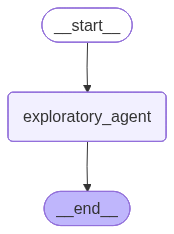

In [3]:
# Make a data loader agent
exploratory_agent = EDAToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)
exploratory_agent

## Usage

Here are several examples of how to use the agent:


#### What tools do you have access to? Return a table.

In [20]:
exploratory_agent.invoke_agent("What tools do you have access to? Return a table.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * No data_raw provided to EDA agent
    * POST-PROCESSING EDA RESULTS
    * No tool calls detected – check that data_raw was provided and instructions ask for EDA.


| Tool Name                  | Description                                                                                                 |
|----------------------------|-------------------------------------------------------------------------------------------------------------|
| explain_data               | Provides a detailed narrative summary of a DataFrame including its shape, column types, and sample rows.  |
| describe_dataset           | Computes summary statistics for the dataset using pandas' describe() method.                               |
| visualize_missing          | Generates a matrix plot, bar plot, and heatmap plot for missing value analysis.                            |
| generate_correlation_funnel| Conducts correlation analysis using the correlation funnel method based on specified parameters.            |
| generate_sweetviz_report   | Creates an Exploratory Data Analysis report using the Sweetviz library.                                    |
| generate_dtale_report      | Creates an interactive data exploration report using the dtale library.                                    |

#### Get information on one of the agent's tools.

In [5]:
exploratory_agent.invoke_agent("Give me information on the correlation funnel tool.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * No data_raw provided to EDA agent
    * POST-PROCESSING EDA RESULTS
    * No tool calls detected – check that data_raw was provided and instructions ask for EDA.


The correlation funnel tool is designed to analyze and visualize the correlation of features in a dataset with a specified target variable. It enables users to understand the relationship between multiple independent variables and a dependent variable (the target). Here's how it works:

### Key Features:
1. **Target Variable**: You specify a target column, and the tool looks for columns in the dataset that might be related to this target. The columns should follow a naming convention, typically including the target column's name followed by a suffix (e.g., `target__Category`).

2. **Binarization**: The tool can binarize the data, meaning it can convert continuous variables into categorical ones based on specified thresholds or categories. The number of bins can be adjusted based on user preference.

3. **Correlation Method**: You can choose the correlation analysis method to use, with options including:
   - Pearson
   - Kendall
   - Spearman

4. **Infrequent Levels**: The tool can handle categorical values that appear infrequently in the dataset by grouping them into an "other" category. You can set a threshold for what constitutes infrequent.

5. **Visualization**: It provides a visual representation of the correlations, making it easier to spot relationships and patterns in the data.

### Usage:
This tool is particularly useful in exploratory data analysis (EDA) when you want to identify relationships that may have predictive power regarding the target variable. It helps in feature selection and understanding the dynamics of the dataset.

### Parameters:
- **target**: Name of the target column.
- **target_bin_index**: Index or label of the target level to analyze.
- **corr_method**: Correlation method (default is "pearson").
- **n_bins**: Number of bins for binarization (default is 4).
- **thresh_infreq**: Threshold for infrequent levels (default is 0.01).
- **name_infreq**: Name to label infrequent categories (default is "-OTHER").

Overall, the correlation funnel tool helps researchers and data scientists to quickly assess the significance of input features and enhance their understanding of the relationships within their data.

## Tool Examples - How to use the agent's tools

#### Example 1: Explain data tool

In [6]:
exploratory_agent.invoke_agent(
    user_instructions="What are the first 5 rows of the data?",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * data_raw rows: 7043
    * Tool: explain_data
    * POST-PROCESSING EDA RESULTS
    * Tool: explain_data


Here are the first 5 rows of the dataset:

| customerID   | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines     | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies | Contract        | PaperlessBilling | PaymentMethod              | MonthlyCharges | TotalCharges | Churn |
|--------------|--------|---------------|---------|------------|--------|--------------|-------------------|-----------------|----------------|--------------|------------------|-------------|-------------|------------------|------------------|------------------|---------------------------|----------------|--------------|-------|
| 7590-VHVEG  | Female | 0             | Yes     | No         | 1      | No           | No phone service   | DSL             | No             | Yes          | No               | No          | No          | No               | Month-to-month | Yes              | Electronic check         | 29.85          | 29.85        | No    |
| 5575-GNVDE  | Male   | 0             | No      | No         | 34     | Yes          | No                | DSL             | Yes            | No           | Yes              | No          | No          | No               | One year       | No               | Mailed check              | 56.95          | 1889.50      | No    |
| 3668-QPYBK  | Male   | 0             | No      | No         | 2      | Yes          | No                | DSL             | Yes            | Yes          | No               | No          | No          | No               | Month-to-month | Yes              | Mailed check              | 53.85          | 108.15       | Yes   |
| 7795-CFOCW  | Male   | 0             | No      | No         | 45     | No           | No phone service   | DSL             | Yes            | No           | Yes              | Yes         | No          | No               | One year       | No               | Bank transfer (automatic)  | 42.30          | 1840.75      | No    |
| 9237-HQITU  | Female | 0             | No      | No         | 2      | Yes          | No                | Fiber optic     | No             | No           | No               | No          | No          | No               | Month-to-month | Yes              | Electronic check         | 70.70          | 151.65       | Yes   |

The dataset contains a total of 7043 rows and 21 columns with various information about customer demographics and service usage.

#### Example 2: Describe data set tool

In [21]:
exploratory_agent.invoke_agent(
    user_instructions="Describe the dataset with the describe_dataset tool.",
    data_raw=df,
)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * data_raw rows: 7043
    * Tool: describe_dataset
    * POST-PROCESSING EDA RESULTS
    * Tool: describe_dataset


In [30]:
from IPython.display import display, HTML
msg = exploratory_agent.get_ai_message(markdown=False)
display(HTML(f"<pre>{msg}</pre>"))

In [31]:
exploratory_agent.get_artifacts(as_dataframe=True)['describe_dataset']

,stat,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
1,unique,7043,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
2,top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
3,freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
4,mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
5,std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
6,min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
7,25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
8,50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
9,75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### Example 3: Missing data tool


In [34]:
exploratory_agent.invoke_agent(
    user_instructions="Visualize missing data in the dataset using the visualize_missing tool.",
    data_raw=df,
)

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * data_raw rows: 7043
    * Tool: visualize_missing


/Users/mdancho/Desktop/course_code/ai-data-science-team/ai_data_science_team/tools/eda.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


    * POST-PROCESSING EDA RESULTS
    * Tool: visualize_missing


The missing data visualizations, including a matrix plot, bar plot, and heatmap, have been generated successfully. If you need further analysis or insights from these visualizations, please let me know!

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [38]:
# These artifacts are stored in the agent
exploratory_agent.get_artifacts()['visualize_missing'].keys()

dict_keys(['matrix_plot', 'bar_plot', 'heatmap_plot'])

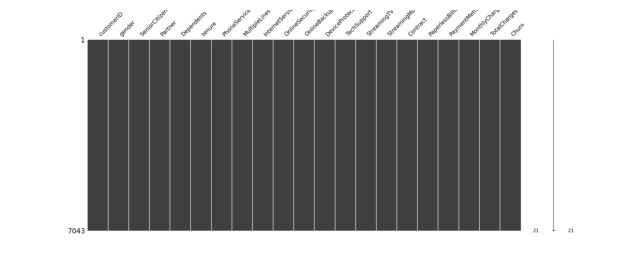

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [40]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['matrix_plot']
)

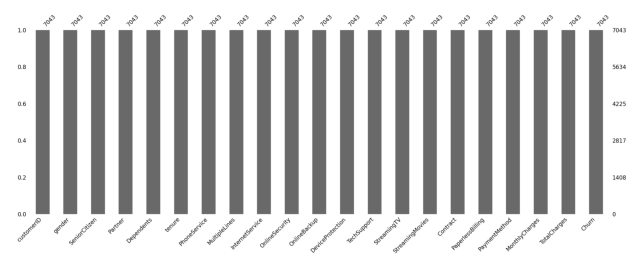

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [42]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['bar_plot'],
)

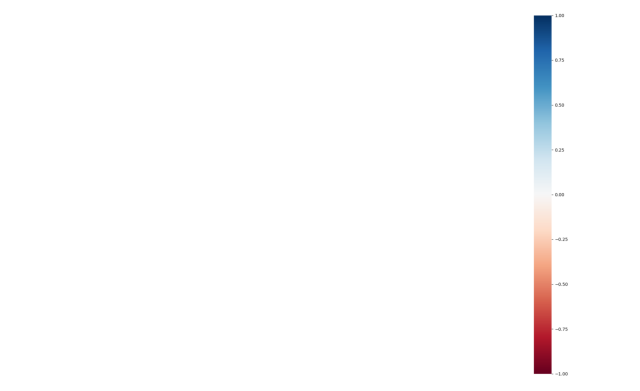

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [43]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['visualize_missing']['heatmap_plot'],
)

#### Example 4: Correlation Funnel Tool

In [5]:
exploratory_agent.invoke_agent(
    user_instructions="Use the correlation funnel tool to analyze the dataset. Use the Churn feature as the target. Use Churn=Yes as the bin index to compare against.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * data_raw rows: 7043
    * Tool: generate_correlation_funnel


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 7 x 6.0 in image.
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: <_io.BytesIO object at 0x33cf9e610>
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_text : Removed 2 rows containing missing values.
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


    * POST-PROCESSING EDA RESULTS
    * Tool: generate_correlation_funnel


The correlation funnel has been successfully computed using the Pearson method for the target level 'Churn__Yes'. This analysis will allow you to explore correlations between various features and the likelihood of churn. If you need further insights or specific visualizations, please let me know!

Artifact preview:
| correlation_data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | plot_image                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | plotly_figure                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ['Churn', 'Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'tenure', 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'StreamingMovies', 'StreamingTV', 'MonthlyCharges', 'PaperlessBilling', 'PaperlessBilling', 'Contract', 'OnlineSecurity', 'TechSupport', 'Dependents', 'Dependents', 'SeniorCitizen', 'SeniorCitizen', 'Partner', 'Partner', 'MonthlyCharges', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'InternetService', 'PaymentMethod', 'tenure', 'PaymentMethod', 'MonthlyCharges', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'MultipleLines', 'MonthlyCharges', 'tenure', 'PhoneService', 'PhoneService', 'MultipleLines', 'gender', 'gender', 'customerID', 'TotalCharges']                                                                                                                                                                                                                                                                 | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhKiotduxe7u7u5u7Fbs7u7uuLbotRMDu1FpAela9vz+QFf3BzahOJ/n8bl3Z8+Zec85sLxnds6MbMTkeVJEZBSCIAiCIAiCkBFpRkRGsWjaqPSOQxAEQRAEQRBShTy9AxAEQRAEQRCE1CQSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAiCIAhChiYSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmmZ6ByCkHR+/ANZvP8DlG7fxC3iHTCYji40V5UsVo1PLhpiaGKd3iGryV2hEtQqlmDvJ9Yf2e/T0Je4XrlK7ajmy2mcBYPS0hRw8doarR7eir6+XGuEmq9OAMdy4ff+r20we0Y+GtSqnUUQ/7/qte3QeOJaRA7rRunHtL2738Vz/Pz1dHbLaZ6FN0zrUr1EJmUwGJJ6jZy9fc/7gxh+Kx9s3gAPH3CnnUoT8uXP+2MEIgiAIfxWR8P4lzl68zrCJs1EoEqhcriSNalclNi6Oh09fsG7bfg6fPMfa+ZNwtLNN71B/2aNnL1m2fgd5c2VXJbz1qlckb64caGlrpUtMIwd0++J7BfJkzGStd6eWmBgbASBJEqFh4Zw6d4Ux0xbh4xdIr44tfql+H78Alq3fgamJsUh4BUEQhK8SCe9f4OkLL4ZOmI2RoQHLZ48jV/asau9fun6bviOnMmT8LHatnqvqeftZcXHxaCeTWH6pPC24FC2AS9EC6dI28NUe0Yyqfo1KZLGxUivr0roxDdr3Y8OOA3Rr2xRNTY10ik4QBEH4m4gxvH+BxWu2ERsXx/ihvZIkuwClixeifvWKPH72ijv3H6vK3/j44TppLuXrd6BoteY07jSQnQeOIUmSapv9R93JX6ER12/dY8y0RbjUas35qx5cv3WP/BUacfT0eeYsW0+Zuu3YceCYar99R07TrMtgilVrQcVGnRg/cwl+Ae++ehySJLHr4AladB9KiZqtKFO3He36jOTAMXfVNqOnLWTs9EUA9B3pRo0W3VXl+Ss0Iioq+oeOb+m67eSv0Aivtz5MnL2M8vU7ULx6Czr2H83TF17feQW+T/4KjRg8bmaS8oqNOtFpwBjV604DxtCoY3+ev3pDz2GTKFGzFaXrtGXElHmEhUeqnYsSNVvhF/COoRNmU7pOG0rUbEXfEVOTnOuY2FgWrt5CzZY9KVK1GXVa92bZ+h1Ex8Sm6DHq6GiTP09OIqOieR8a9sXtHj55Qd8RUyldpy3FqrWgdU9Xjp+5qHp/6brtdB44FoBpC1aRv0KjFI1TEARByFhED28GFxMby/mrN7GyNKdC6WJf3G78sN6MGdwTDY3Ee6DXb31p03s4MmQ0qlMFU2Mjrt26x+S5K7j/+DkTXfuo7T92xmKMjQzo1KoRzk4O+AcGAbBg1RY0NeS0blybYgXzJpat3MzqLXsoW7IINSqXwT8wiH9PnuPsxWtsWT4TO5vMyca4ZsteFqzaTLFCeenetilx8fEcPX2eMdMWkZCgpHGdqtSrXhFlgpLDJ/+jef0aFMybK9m6fvT4+gyfgqmJMe2b1+eNjx97/z1F/9HTOLJ12S/3iP+MoOBQ2vcdRenihejRvhlXbtzl35Pn0NTQZMrIfqrtFAoF7fuOIpujHZ1bN+bB4+ec/O8yUVNjWLtg8odtEug5bBJ37j+hfo2K2Gex5umL1yzfsJMLVz1Yv2gqWpop91Hh9dYHXR1tzM1Mkn3/9r1HdBs8HnMzE9o0qYOurg5nL15n6ITZvHrjQ4/2zSjnUoSw8Ai27PmX6hVLU/TDz5YgCIIgJEckvBmc1xsf4uMV5Mrh9NXETCaTqX29PGPxGiIioti7fgFODonjYDu1asTkOcvZefA4DWpWokiBPKrtTYwN2bxkGlpaiUMWPia88QoFu9csxNBAH0h8oGzN1r10bdOEAd3bqvZv2bAWzboOZvn6nWoJ2+dOnL1E3lw5WDt/supYWjaqRcWGnbhy8y6N61TFpWgB/ALecfjkf5QvVZQKpYsnW9ePHp+drTVLpo9GQyPxHCmVSvYfdefJ81fkyuH0xfP60Zd6rw0N9FXn5keEhIbRr2trurdrBkCH5g1o1LE/7heuAp/OX3y8gtLFCjLhswS+66BxXLt1j7DwSIyNDNi+/wg37zxg+axxlClRWLVdicL5mDBrKUdOnaNBzR9/qO5dcIjqBgogMCiYPYdO8vDJC5rXr4FcnvwXTBNnL0NHR5uty2diYWYKQKeWDek70o1l67dTt1oF8ufOSUxMHFv2/EvRgnn/yiEjgiAIwvcTCW8GFxUdA4CxkcF37xMRGcWFq7eoWLq4Khn8qFXj2uw8eJyzl26oJYRN6lZTJbufq1e9glpC9++p/5AkiQqli6klgQb6euTNlYNrtzy/GNecScPQ1dFWS9wjIqKQJAmFQpGqx9euWT1VsgtQIE8u9h91Jygk9LvarNYs+YfWenVsQe9OLb879o/kcjntm9dXvdbU1CB3zuwcPX0+yVjpDi0bqu2bP3dOrnp4Evz+PcZGBhw+cQ6rTBZkz2qvdk1cihZEU1OTax6eP5Xwtu09Itny0sULMbBHu2Tfe/rCi2cvX9O2WT1VsvvxeFs2rMn5Kze5cNWDFg1r/nA8giAIwt9LJLwZnJFhYqIb8wNjMb3e+KBUKvnHOWnPpb2tNfCpB/ejzJbmydZlZWmh9vqF11sA2vUZmez2Wlpf/pG0zZyJI6fOc+XmHbze+uLrH0jIV8aBfsnPHJ+lhVmyccbHx39Xm4unjUq23NH+52bFMDTQR1dHJ9mYFAqFWsKb6YuxJ94kvHj9lujomC8m5e+C3/9UjJNc+6gNW9DS0sLeNjP2WWy+uM/L194A5E6m19xOdW2+PtZbEARBEP6fSHgzODvbzGhra/Ho2auvbnfyv8ssXbeNvp1bY2FuCpDsjAofe4x/dkynQpEAwNxJrmgnk9x+adiFUqmk57DJXLvlSbUKpahSriQOWWwoXCA3FRp0/KEY4j/0Bv/I8cl/cZzul4ZWfI+PMX1OLv/+eL4Vu0KhwNHOhmF9OiX7/s/Oz1yiSIEkszR8y8ckPLlrE/3x2iTzTYIgCIIgfI1IeDM4XR0dXIoW4Nzlm1y+cYdSxQomu92OA8d4/uotOXNkVSV7H3tjP/fw6QsAsme1+6l4bDJnAsDJIQs5nBzU3jvmfhGQktkLPDwfcuXmHXp3aqk2f2tEZNQPx2BtZQmkzvH9CplMhlKpVCsLDApWJXqpxTZzJsIjoyhfqpjaDUe8QsHuQydU3xKkBZvM37422RzT/toIgiAIfzYxLdlfoFeHFmhoyJkwawlvff2TvL9lz79cvXmXetUrYG9rjbWVJbmds3Hy7CXe+Pipbbt9/1E0NORUrVDqp2KpXK6kqs3P3X3whJFT5uH58Gmy+4WGRQBgaa7+9fymXYeSbPsxZ5OSz51T9fh+hZmpMc9fvVH1ggNs23c01dutXLYkwSGhHDl1Xq18655/cZu/Sm2qs9SWP7czFuam7Pn3lNq0ZQkJCew6dAJDA33KliySWKi6zl+40IIgCILwgejh/Qvky+3MRNc+TJi1jMYdB1CtYmmcnRyIj1dw+cYdrt++R4nC+Rg9qIdqnxH9u9BtyATa9hpO7WoVyGxpzqXrt7l84w7d2zdTjXX9UeVdilK9Yml2HzqBX8A7ihbIg1/AO/YfdcfW2uqLD3AVzv8PxkaGzFuxEV//APR0dblw7RbBIe8xNzPh4dMXnD53hSrlXTAzTRw3un3/UUJCw2hUu0qS+lLr+H5FpTIl2HP4JN2HTKBUsYI8eeHFtVueZM5k8e2df0GXtk1wv3CVMdMWcv2WJ3ZZrLn38Cmnz1+lRqUyVCzz88MxfpSWlhYj+nXBddJcWnYfRvVKZTAxNuT0uSs8ePycCcN6Y/BhaWjzD9f535P/oVQqadesXprFKQiCIPxZRML7l2hQszL/OGdj444DXL15lyOnzqOnq0PO7I5MGNabBjUrq01LVqRAHtYtmMLiNVvZe/gkSqUSJwc7xg3pRbP61X8plhljB5PbORt7j5ziys27mJuZULdaefp3b6tKZv6fuakJS2eMYdaSdWzefRgjI0OqVyhFz44tOHDUncVrtnLm4nWqlHfBpUgBypQozPXb93gXHJJswpuax/ezhvbuiEKRwJmL13jw5DmF8v3D6rkTGT55Xqq2a2JkyKYl01m0Zgunz18lIjIK28yZ6NulNV1aN07VtpNTs3JZDPT1WLlpN9v2/otMLidX9qzMm+xK1fKfet6zZ7WnXvWKnDp3mWXrd4iEVxAEQfgiWd8RU6VFX3iCXBAEQRAEQRD+dGIMryAIgiAIgpChiYRXEARBEARByNBEwisIgiAIgiBkaCLhFQRBEARBEDI0kfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEARBEAQhQxMJryAIgiAIgpChiYRXEARBEARByNA00zsAIXWNnDKfiMioVG1DoVAAoKkpfpz+RuL6/70UMdHIX75C7pwDNLXSOxwhjYnf/b9bWl5/QwN9po0Z+Et1iJ/SDC4iMopF00albhsREQAYGhqmajvC70lc/79X5MOHGOTJA15e4OCQ3uEIaUz87v/d0vL69xvp9st1iCENgiAIgiAIQoYmEl5BEAThp0iZMxN16RJYW6d3KIIgCF8lEl5BEATh52hro8yfH7S10zsSQRCErxIJryAIgvBTZL6+6BcuDD4+6R2KIAjCV4mEVxAEQfg5CgXyZ8/gw9PagiAIvyuR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAjCz9HVRVG9OujqpnckgiAIXyUWnhAEQRB+ipQpEzF79oiFBwRB+O2JhDeVXLlyhV27dqGtrY2mpibdunVj5syZLF68OL1DSzFKpZINOw5w5PR5NDU0aN6gJg1rVUYmk6V3aIIgpIWoKDROnoRGjUBfP72jEQQhDSiVSjbuPMi/p86hqaFBs/o1aFS7ym//t18kvKnAz8+PvXv3MmnSJAwMDHj9+jVz5sz54XqUSiVy+e876mTm4nXs2H8URUICAA+eLCUyKoq2Teulc2SCIKQFWVAQem3biqWFBeEvMnvperbuPUKC6m//C8IjIunQokE6R/Z1IuFNBWfPnqVOnToYGBgA4ODgwMiRI5k0aRILFizgzZs3FCpUiLZt2zJq1ChGjBiBsbExkyZNokePHmzbto2EhARMTU3R09PD19eXsLAwIiMjGTt2LCYmJt8di0KhUK13nZKiomPYsuewWplSqWTJ2u00rFkpxdsTfl9RUVHpHYKQTmKiozEAIiMjkVLhc0b4vYnf/b9PTEwsm3YdUitTKpUsW7+DJnWqpFNU3+f37T78gwUFBZEpUya1Mmtra+Li4mjSpAmzZs3i4sWLX60jf/78dOnSBQBLS0smTpxI3rx5uXPnzlf3Cw4O5tmzZ6p/ilSaHzMiMvkPuqjoGCRJSpU2BUEQBEFIP5FR0cmWR0XHoFQq0ziaHyN6eFOBiYkJwcHBamVbt25FW1sbOzs7ADQ0NJLs93mi6OTkpPr/7NmzA2Bqakp8fPxX2zY3N8fc3Fz1WldXN1UeKNHT08PS3JSgkFBV3BoaGvyTwwkjI6MUb0/4/YkHl/4+Mj09gMRvs8T1/2uJ3/2/h76+PpkszQkKDkGp/PS3P1d2R4yNjdM5uq8TPbypoEyZMhw+fJiYmBgA7t27x927d5Mdj6unp0dMTAwJCQl4e3snW9/vOBBcQ0ODxdNGY2Sgj4ZcjlwmI5OFGbMmDEnv0ARBSCOSlRVRJ05A5szpHYogCGlALpezyG0UhgYGyOVy5HIZluamzBo/NL1D+ybRw5sKnJycqFu3LmPHjkVTUxNDQ0OGDBnCxIkTk2xbpUoVli5diomJCXofekv+FHn/ycG/W5dyzeMuGhoalCpWCH39P+sYBEH4BTo6KEuVAh2d9I5EEIQ0kjdXdo58+Nsvl8v/mL/9sr4jpkqLpo1K7ziEVNJvpBs/en29fQOo2bIHrRvXYeSArqry67fuMX7WEo5sXaa2/ceH4sTXWn8ncf3/XpHPnqHbrBkaR46AjU16hyOkMfG7/+davGYrx89eYu+6+Whpfur7HD1tIT5+AaxbMOWbdaTl9f+ZXOb/iSENQrJkMhl7Dp/kwZPn6R2KIAi/q/h4NG7fhm88WyAIwu+lW9umKBOUbP5sxoW7D55wzP0CYwf1SMfIUo9IeIVkyeUy2jary+Q5y5N98nLTrkPUbNmTMnXbMWnuCsLCI9MhSkEQBEEQfpSOjjajB3VnxcZdBAYFI0kS0xasokPz+mTLas+T51607zuSEjVb0bH/aF54vQUSZ2kYNHYGLrVa06jTIHYdOpnOR/L9RMIrfFHPDs15HxbOzgPH1cqPuV9k274jLJs5ln+3LEFSSsxetiGdohQEQRAE4UeVLl6Ici5Fmbd8E/uOnCYkNJzu7ZsRHRNLr+GTadu0Hmf3raNCqWIMHDMdgI07DyKXyzl3YANzJw5l+YadvHyd/AP3vxuR8ApfpKujw9jBPVm4egvvgt+ryvcfPU3HFg1wcsiCqYkxvTo25+zF66pVVwRB+Evo6JBQpox4aE0Q/lCufTtx9tI1Zi9dx+iB3dDV0eG/S9fJ7mhH9Yql0dfTpWPLhoSGhfP81RskSeLVGx/u3H+MfRZrDmxYgJ3tnzFLi5ilQfiq0sULUbZkEWYvXUeTOtUA8PELwMHOVrWNqYkR8QoFEZFRmBiLOXgF4W8hWVkRfeyYeGhJEP5QmSzMaVK3Gtdv3aecS1EAfPwCuXbLk6LVmqu2UyYoCQwKoWubJkiShNuCVfgFvKO8SxHGD+uj9uDb7+r3j1BId659O9OgfT/sbBLv4szNTPAPfKd6/423H/p6uiLZFYS/TXQ0GhcvQo0a8IdNqygIQiI9XV309D59S2NhbkKlMiWYN3m4quz+4+fkyGrPjTv3aVa/Bn06t+LFq9e4TprH/qPutG5cOz1C/yFiSIPwTZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZtXkvdaqWS+coBUFIa7J379Br1AgCA9M7FEEQUkjZkkW4fe8xtzwfEhcXz66DJxg4ZjoaGhocPvEf81dsIioqGrlcTrxCgbnp773C2keih1f4Lk3qVuPQ8bMEBofQpG41/AKDaN9nFFHR0ZQpUZge7Zuld4iCIAiCIPwiCzNTZo4bzJR5K3n91gfnbI4snjYKTU0N+nVtzbgZS6jcpAva2lrUrFSGGpXKpHfI30UkvEISWWysuO2+R61MJpOxYbGb6nX/rm3o37UN8GnyaUEQBEEQ/iy9O7VMUla8cD72rJ2XpNwmcyZWzZ0AfPrbL5PJUjW+lCKGNAiCIAiCIAgZmkh4BUEQhJ8iWVoSvW8fZMqU3qEIgiB8lUh4BUEQhJ+jp0dC1apihgZBEH57IuEVBEEQfoosIAC9mjXB3z+9QxEEQfgqkfAKgiAIPyc2NnEe3tjY9I5EEAThq0TCKwiCIAiCIGRoIuEVBEH4QJKkdG07PdsXMh7xMyUIn4h5eH/QlStX2LVrF9ra2mhqatKtWzccHBy+a19PT09MTEy+e/vPRUREcPPmTSpUqPDD+wqC8GWSJLF22z5Wb95DdEwsBfPmZMbYwVhbWaZJ+zGxsUyZu4Jj7hcAqFahNGOH9ERfTzdN2v8lWlokFCqEhpZWekcifCYyKprxMxbjfvEaGnI59WpUZES/rmhri+sk/L1ED+8P8PPzY+/evUyaNIlp06bRrVs35syZ8937e3p68ubNG7UypVL5XftGRkby33///VC8giB827Z9R1m0egsRkVEkJCRw9/4TugwaR1xcfJq0P37mUo6cOk9sXDyxcfEcP3ORsdMXpUnbv0qytib6/HmwsUnvUITPDJs4B/cL14iPVxATG8e+I+5MW7g6vcMShHQlenh/wNmzZ6lTpw4GBgYAODg4MHLkSM6cOcPRo0dRKpXUrl2bypUrM2rUKLJmzcrLly8xNzenc+fOuLu7o6OjQ4ECBRg6dCgODg7Url2bwMBATp48iVKppFSpUjRt2hQPDw+2bdtGQkICderU4eHDhzx+/Jj//vvvh3p5FQpFqq+EFhUVlar1C7+3P/3679h/lISETzeeioQEXr/15cZtTwrkyZmqbSsSEjh6+rza187xCgUnzl4iOCQE7d+85zQqJAStO3eIKFUKdHTSOxwBiIiM4vyVm2plCoWCA8fcGdyjbYquivWn/+4Lv+ZPu/4i4f0BQUFBFChQQK3MwMCAQ4cOMWPGDGQyGYMGDaJkyZIAFCtWjO7duzNkyBDkcjmVK1fG0dERIyMjQkNDGTBgAIaGhuzevZvp06ejUCgYPHgwTZo0Yc2aNcyaNQsNDQ1WrVpFs2bNCA4O/mayGxwcTHBwsOq1QqFI+RMhCBmIIiEhSZlMBgnf+e3Lr1AqlV8cY6lMUMLvne8iDwzErF49Ih88QLK3T+9wBCAhmZ9nAEmZOJ73T1kGVhBSmkh4f4CJiYlaMgkwd+5cHB0d0frQE2Nvb09QUBAA2bNnV+0XFxentp+lpSWGhoZA4jrUixcvRldXF6VSSWhoKKampujr6wPQt29f/L9znktzc3PMzc1Vr3V1dVXtpLa0akf4Pf2p179m5bKs3boXhSIxUZDL5ZiaGFGkQF4M9FN/QYWSRQtw884D1c2ppqYGBfPmwtLSItXb/lWyDwtOGBgYwB96/TMaAwMD8uTMzpMXr1Q/01qampQpWRhjY+NUafNP/d0XUsafcv3FGN4fUKZMGQ4fPkxMTAwA9+7dw8fHh7dv35KQkEB8fDw+Pj5kzpwZIMmddHJ31mFhYVy4cIEBAwZQr149FAoFRkZGhIWFER8fT0REBNOnTxd35YKQSnp1aEH9GpVUrzNZmLFy9vg0SXYBZo0bQv7cOVSv8+TMzpyJw9KkbSHjkclkLJo2CmcnR1VZkQJ5mDpyQDpGJQjpT/Tw/gAnJyfq1q3L2LFj0dTUxNDQkClTpnD16lWGDx+OhoYGjRs3RucLY9mcnJzYunUrhQoVUpUZGRmRKVMmRowYgbOzMxYWFnh4eNCsWTNGjhwJQIsWLTAzM8PX15fLly9TqlSptDhcQfgufUdN47bnI5BBQoISuVzOx/uzSa59qV+z0tcrSGeamhpMdO3D0N4diYyKJpOFGRoaGmnWvpmpMRsWuRH8PhQAc1MTcYMr/BIrS3N2rJpNUEgocrkMMxNj8TMlCH1HTJWEjCstrm94eLgUHh6e6u0Iv6fPr3/15t2kfUdOp3NEPyc+XpEu7SqVSmnb3iNSww79paJVm0tl6raV+o6cKj188iJd4vkR4f7+UtTmzZIUGZkq9b/18ZfylW8odR8yIcl7k2Yvk/KVbyhd8/D8qbqveXhKtVr1VLVTsFLj7943X/mGkq9/4E+1m5qqN+8m3bxzX5IkSerYf7R08PiZVG1PfPb/3dLy+qdELiOGNAiCkGqu3LxLlaZdVa/rtunN1PkrAXgX/J5StdugUCQQ8j6MIeNnUaZuO2q16snuQyeS1BUWHknhKs148erT1H79RrqxevMeALbuPULNlj0pXacNMxavJf7DmNg3Pn50GjCGEjVaUqVJF1Zs3KXav0aL7qzYuIvKjTtz4879VDkH37J47TZWbtpFv66tOXdgPTtXzSFzJgva9xvF81dvvl1BetLXJ7ZuXfjwvEFqkMvl3Hv0jPehYaoypVLJmYvX0mzYiSAIfz6R8AqCkGqK5M9NaGg4fgHvCHkfRkBQSOLwB8Dj7gOKFcyLpqYGo9wWYGZizPEdK5g70ZVlG3Zy8dottbqMjQwoUTgf/12+AUBsbBxXPe5SrWIpTp27zK6Dx1g9byIHNi7i/qOnbNx5EIBFq7dSOH9uLh7exPJZ41izdS8vvN6q6r10/Ta7187Dpaj6DCxpITAomPXb9+M2eiCVy5ZEX18PW2srxgzqQeF8/7Biw04AOg0Yw5K122jTazglarSkz4gpxMYmPgjrF/COnsMm4VKrNc27DuH2vUdJ2tm27wite7qqXoe8D6Nw5aYEvAsmNDyCYRPnULpOW+q168uZi9dU2x06fpaaLXtSvHoLmnf7VPf1W/do3GkgM2cvo3WD9hAQkGrnSCaD0sUL4X7hU1w37z7AJnMmzM1MAHj09CVte4+gZM1WtOw+DI+7D1RxNuk8iLnLNlCxUScqNerM6fNX8Q8Mouvg8bzx9qN2616qetds3UuZuu0oV789ew6fTDaeeu36AlCzZQ98/AK+62btoxoturN8w84PN2Zt2X3oBBNmLqFsvXY06zKYNz5+AETHxDJx9jIqNOhA1aZdWbFxl2o2jxoturN++34adxpIiRotGTt9EZIk0WPoRHz8Auk8cCzXb98D4OGTFzTs0J9i1VowYPT0NJtbWhB+RyLhFQQh1Whra1Eo/z/cvveY2/cfUb1CaXwDAomMisbj7gNKFs3Pu6AQrty8y6Ce7TE00Cd3zmy0aFCDE2cvJamvSnkXVcJ79ZYndrbWONrZsvvQSbq2aYqdTWYyWZjTtU0TTv13GYAe7ZvRtU0TomPiiIiMQlNDrtZb2KllQ8xNTdLmhPyfKzfvYmJkmGyyXatKOTw8H6pe/3vqHNPHDuLI1mU8ee7F6fNXkSSJfiPdKFuyMGf2raNDiwb0HTlVlQx/VKWcCw+ePOdd8HsAzl+5Sb7czlhZmjPGbSGZM1lwavdqRvbvyqipC/ALeEd0TCxT569kzsRhXDqyhSrlXJi1ZJ2qzmcvX2NnbsKBc4fgw4O8qaVahVJqPw8nz16mWoXEZxmioqPpMWwizepX58y+dXRq1ZBBY2eojvXJ81cYGRpwYsdK2jStw/wVG8mcyYLVcydin8WaI1uXAYnjz9/6+HNy50omuvZh5uK1qlkOPndo02IAjm1fga211XfdrH3u8vXbbFs+k5EDujJx9jJsrK1w37OWfLmdWfnh24c5S9fzLjiEAxsXsW7BZI6fucjuQ58S8JP/XWbV3AnsWDWHE2cvcef+Y1bMHo+tdSbWzp9M8UL5ADhz8RrzJg/n+M4VPH/1mtPnr/zCVRCEP5tIeAVBSFUuRQtw5/4jbt97RNGCecifOyd3Hzzh5p0HuBQtiI9/IBZmJmpfT5uaGBMcEpqkrsplS3L3wRPCwiM5d/mGKunx9Q9k7IxFFK3WnKLVmjNo3EyCPuz/8OkLmnQeSId+o9h18AQymfrHnrGRQSoe/df5BwRhkzlTsu9ZmJkQGhauet2qUW3sba2xtDCjaME8+PgH4PnwKdExMbRtWg89XR3qVCuPnY01V295qtVlZWlO3lw5VAsS/Hf5BlXLu/Au+D1XPe4yoHtb9PV0KV28EKWKFeTsxetoyOVsWOxGbmcngoLfI0kSIZ/dKJgYG9K6alm0vjCPcEoq51KUuw8eExoegSRJnL5wlaqqhDcGO5vMNKhZGX09XWpUKkPO7E5cvnFbFWeXNo3R1taieoXS+PgHfrGdvl1aoa+vR4VSxYiKjlG7MUrOj9ysfdS6SR3MTI0plO8fANo1q4e2thYF8+bCPzAISZI4cMydQT3aY2pijH0WGzq3bsTxsxdVdXRu3RgLM1OcHLKQK0dWfL9wTM3q1cDJIQsWZqbkz50Tb7/U64kXhN+dmKVBEIRU5VKkAG4LVqGlpUXjOlUJCn7PxWu3CA4NI4eTA299/XkfGk5sbBw6OtoAvH7ri621VZK6LM0T/3BfvObB+Ss3WeQ2GgALM1MG9WhPxTLFgcTxvgHvgoiOiWXcjMVsWzGLXNmzIkkSZeu1T7uD/wYjQwNVYv7/fP0D1c6BqYmR6v81NDRISFDi4xfIGx9/ilZrrnpPqZR4FxSSpL6q5V04f+Um9apX5PKNOwzu2QFf/wBiYuNwqdVabf9sjnYAbNx5kCs37pDFxgpLc7MksafVk/96ujq4FC2I+/mrZLW3xcLMBDubxOkfffwDcciivrSxmYkRwSGhWGeyxNjIELk88SYn8bwlvzCDXC7HwsxUtR0kLkoybsZiDh4/AySddeRLN2ueD55y/fY9ug0eD0CxgnlZPW8SgOo8ymVyNDTk6OvpqvZVShJBIaHExMapHZPZ/90Amv3fz0Jyi6dA4hR7quPTkKutKCgIfxuR8AqCkKry5MqOj38gutraONrZUqRAbvqMmEqF0sUAsLPJTK4cWVm8diu9OrTg5RsfDh47w7JZ45Ktr2p5F9Zt24+2lhY5syfONVqzSlk27z5Egbw5kSSJ0W4Lye2cjW5tm6BUKomOjiE0LJyte48QGRVFXPzvsQJhyaL5mTp/JfcePiVfbme19/49eY4KpYp9dX8LcxNy5cjKzlVzVGVPX3hhbWWZZNuqFUqxctNurnrcxc42M1lsrJDJEnu4LxzapNrO660Phgb6HDpxllevvTm2YwVampqcPn+VR89eqleqqYkyRw7kmqn/p6R6xdIcPH4WR3tbqlcorSo3NzXBPzBIbVsvb1+qVyr9/1V81Zdy90nD+zJpeN9k3zM3M/nizVrxQvm47b7nu9v5yNTYCE0NDQLeBalueLze+pIlmRvAbxIzkQmCihjSIAhCqpLL5RTKm4vcObMBkO8fZ+LjFZQs8mnc6qzxQ3jy3IuKjTszcMx0+nVtQ95c2ZOtr2p5Fx4+fUGNSmVUZU3qVKVgvn9o3Gkg9dr2xTqTBb06tkBfXw/Xvl3oM2IqDTr0R0tTk9aN6zB80pxk605rWe2z0Lx+DYZOmM2l67eJioomNCyc+Ss38dYvgM6tG311/wK5cxIWHsnpc1eIi4vn7MXrdOw/Jtmxp/a21mSxsWLBys2qhNHW2gpHO1u27j1CXFw8t+89om3vEYS8D0OhSCAhQUlsbBwvvN6yYcd+EhISUH625LJkY0PUrVtga5uyJyYZ5UsV4/a9hxx3v0C1ip/mItfT1eXRsxecOHuJmNhYDp04i39gEGVLFvlqfRoaciKjoomP//EHuTQ05LwPDVe7WYuKiub+4+ccPHbml+ae1tTUoGqFUsxfuZmw8Ehev/Vly+7DNKj17To1NDQICQ3/5naC8DcSPbyCIKSY4ztWJls+f8oI1f9ra2tx4+QOtfdtra1YMXv8d7WROZMFJsaG1K1eQVWmoaFBvy6t6deldZLtWzeuTevGtdXKXPt2/mq8aWnUwG5s3HmQaQtX4+3rj6G+PmVKFGbL0umYmnx9KVgdHW0WTB3B5DnLGTFlHna21syZOAwz0+T3q1LOhaXrtjNn4lBV2azxQ5g0ZznzV27C0tyUUQO6kcPJAVtrK/67fINKjTrh5GjH4J4dGDt9EfNWbKS8y4ee57g45I8fQ9GioK2dYuckOfp6upQonJ83Pv442n1KsC3MTFgwZSTTF61h5NT5ZHOwY94kV3S/sADQRzmcHDHQ16NJ50Esm5n8twlfUqlMCVr3cuXI1mXMGj+EibOXUbFxZ0yMDL96s/a9xgzqzqQ5y6nZsjtaWlq0bFiLquW/veBQhdLFGTZxNmvnT/6l9gUhI5L1HTFVWjRtVHrHIaSSfiPdSO3rGxERAfw562kLKSstr39cXDxnL11ny55/2bBoaqq3l9GcPn+Vddv2sXnp9BSpL/LhQwzy5AEvL3BwSJE6hT+H+Oz/u6Xl9U+JXEb08AqC8Mdwm7+Sc1duMneS67c3FtRERUVz8NgZmtSpmt6hCIIgpDmR8AqC8MeY4NonvUP4Y5Vr0IEi+fOoDQURBEH4W4iEVxAE4S9w8+TO9A5BEAQh3YhZGgRBEISfIpmZEbN8OZibp3cogiAIXyUSXkEQBOHnGBqiaNMGxENLgiD85kTCKwiCIPycd+/Q6dAB3r1L70gEQRC+KkMlvB4eHgwdOhRXV1cGDx7MsWPHkt3O39+fSZMSl3lcsGDBD7URERGBm5sbo0ePZujQoZw4ceKX4/7cqlWriIyMxNPTk9evX6do3YIgpA2/gHc8e/ma2Ni4H9ovKjqGJ8+9CAwKTqXIUpYsOhqtvXshKiq9Q8lwEhISePXGG6+3Pl9cDlkQhO+XYR5aCwwMZO3atUycOBELCwuioqKYNGkSmTNnpnDhwl/cb8CAAT/UzoEDByhXrhzlypUjLi6OQYMG4eLigrHx1yeI/x5KpZJu3boB4OnpiaOjIw5ibktB+GPExcUzfPJcTp27AoCJsRFLpo+mYN5c39z34rVbDB43k6joGACa1q3GmME90NDQSNWYhd+PX8A7eg6bxPNXbwDImd2RZTPHYWUpxkoLws/KMD28Z86coXbt2lhYWACgr69PixYtWLx4MePHj2fy5Mn07duXBw8eqO3Xt2/iGukDBgxg6dKlDB06lLVr1wLw/PlzRo8ezciRI9m589MTzp6envj7+6Otrc3MmTMxMDDAz8+P8ePHM3r0aFatWoVSqcTPz4+xY8fi6urKsmXL1Nr7/7bnzJnD2bNnGTVqFAEBAbi7u7N161bc3d3ZsGEDAE+fPmXGjBmpdAYFIWV5+waQv0Ijpi1YrVZ+/dY9arfu9UN1Xb99j3rt+n5zu6XrtjN+5pIfqvtX5K/QCL+AT1/nL1i1mf8u3VC9DguPoJfrZMLCI79aj1/AO/qPnqZKdgH2H3Vn8+7DSbY9eOwMPYZOTIHohd/VwDEz8Hrjo3r9wustQ8bPTMeIBOHPl2F6eN+9e0f27OrLOVpaWhIaGoqlpSXTpk3Dw8ODs2fP0qRJkyT7R0ZGUr9+fWxtbenevTudO3dm9erVuLq6YmZmxqRJk3jz5g1NmzZlz549zJw5k4iICMqVK0fbtm3ZsGEDHTt2xMnJieXLl3Pr1i1Onz5Nq1atyJMnD6tXryYsLCzZ2CMjI2ndujU2NjacOnUKXV1dKleujKOjI0WKFGH//v106NCBy5cvU65cuR86LwqFQrUaSmqJEl9n/tW+dP2joiKRyWTsPnyC6hVcyJUjKwDR0dEolcof+rnMnSMr25ZN/+Y+cXFxxMfH/1DdioQENH+hFzUqKkrV3pkLV4lXKFTvSZJERGQktz0fUKRA7i/WceXmHZRKZZK4Tp27TJM6VdTKK5ctTuWyxVP99/p7xMTFoWttTUxMDNJvEE9GEBUdw/3Hz9TKFIoEbt97TFBwMDqpvITzjxCf/X+3P+36Z5iE19zcnMDAQLUyb29vMmfOjJOTE3K5HBMTE+Likh9Tp6Ojg52dHQC6uroAvH79mlmzZgGJSem7d+/w9/enRYsWtG7dmoiICObOncutW7d48+YNq1atAiAmJobs2bPz5s0bcuVK/Cqza9euSdqUJEnVno2NTbJx6enpYWtry6tXr7h79y4tW7b86nkIDg4mOPjT+D/FZ398BSGtyWUyWjSowYwl61g9ZzxyedIvlbbvP8augycIj4yibMnCDOzWFmMjA7VtPO4+xG3hanavnsPqLXvx9gsgKjqGG7fvY21lyfTRA3jw9AVrt+0HEn+3Rg/shvuFa6zctIfAoGAqlC7GkJ7tMdDXY/LcFejp6XL3wVPKliiMf+A7DA0NePHqLfcfPyOHkwMzxg7EzMSYsPBIZi1dx9WbnpiZmdC3U0vKuRShRY/E1d4adxrEjlWzCHwXQnR0bJLjk6TE4QofE14Pz4fMX7mFN96+FCuYF9e+ndDR0iJBkXScpuKzMrcFq9HX08XZyYFjZy6xyG0ECoWCpet3csz9AjKZnFaNatK2aV0Adh06yfZ9RwmLiKRO1XL07dwSTc2U/chX2tgQdOcO+vr6KVrv30xLUxOZTKb6+/CRXC5HUyPD/MkWhDSXYX57KlasiJubGy4uLpiamhITE8O+ffuoWbMm3t7e39xfJpMlKbO3t2fMmDHo6+tz+PBhsmbNytKlS1EoFLi4uGBgYIChoSEaGhpYW1vTvXt3rKys+O+//3ByciJTpkz4+vpiZ2fHjBkz6N27t6odPz8/YmOT/nFMLp7y5cuza9cusmTJgvY37u7Nzc0x/2xOTF1d3TRb51ysp/53+//rrx8eBTLo360tjToO4Mjpi7RsVAs9PT3kcjmGhoYcc7/I3iOnWT57PGYmRsxYtJb5q7Ywc9xgtbo+30dbW5vT56+ydMZYZk8YhuukOew8dJLxQ3vhHxiMf2AQE1378ODJcxas3srS6aOxtrJk4uxlrNy0h7FDeqKppcXZSzdYMXs8ubJnZfS0hRw/c5FVcyZin8WaLoPGcfzMZbq2bcLIqQtxtLfl1J6B3L73iCHjZ7Fv/QIOb15CgYqNaVCrMrOXbqRw/n9o3aQOi9duU/XWamhoYGdrxf5jZ2jZuA76erqMmbaYOZOGkds5G4vXbGXG4nXMnTgMAwN9IiLVe0zsba0xNDREqVRy8fptFk8bxfNXb9HQ1MDQ0JDVW/bw4rU3h7csI/j9e1r1cKVcqeL4+gdw8PgZ1iyYjI62FkPGz2LPEXe6tG6cshc9Ph7ZmzcY5M4NWlopW/dfrEHNSvx78pzq2wJNTU0a1aqMicmvPyuSGsRn/9/tT7n+GSbhtba2pk2bNkyePFnVi9SoUSOMjIy+K+FNTvv27Zk8eTJKpZL8+fNjZmZGly5dWLZsGXv37gWgUKFCFChQAHNzcxYtWkR8fDz29vaULVuW9u3bs2jRIiRJokiRIhgZGVGkSBFmz56NtrY2BgYGX2zbycmJrVu3UqhQIYoVK8bChQsZOXLkTx2HIKQnXR0dxg7uydAJs6laoZTae/uPnqZjiwY4OWQBYGCPdtRq1ZOEhISvPqxVtmQRXIoWAKBi6eKc/O9ykm32HDpJywY1yZXDCYDenVrSZeBYxg7pCUCdquXJlT2ravt61SuSO2c2AMqUKIyPfwDvgt9z1eMucye7oqWpSaliBcmbKztjpy8CEm9Ka1Yqg0uxgqqbVBMTI+Yu20B0TCz5/snB3Mmu6OnooKurw8adB6lcriTFC+UDoF/XNpSt2w6lJFEwby48PB+iIZdjYmRIhdLFuOX5CIDb9x6hr6dL/tw5ef7qrSrmg8fOMHpQd4yNDDA2MmDOxGEY6Ouy+9BJurZpip1NZgC6tmnCsvU7Ujzhlfn5YVCwIHh5gXjANsWMHdwTA309/j11DplMRr3qFRnYvW16hyUIf7QMk/AClCxZkpIlSyYpz58/PwDOzs4MHDgQgHHjxgGwePFitf9+/v958uRh2rRpanVZW1szcWLSB0bs7OyYPHmyWlnWrFmTPGTWqVOnJPt+3rabmxsALi4uuLi4AInT0zg4OFCgQIEk+wrCn6B08UKULVmE2UvX0aRONVW5j18ADna2qtdmJsbExyuIiIzCxNjoi/WZfdbTpaGhgSKZaZt8/AMTe483fnrgVJmgVA0TMDZS75Uw/axOTQ0NEhKU+PoHEBMbh0ut1kiSpNq3Ue0qTBjWmwIVG+PkaKf2jUzz+jVoWLMyqzbv5tS5KzRs349KZUsyemB3fP0COXDUnUMnzqq17fXWl1dvfKhRsTSTR/QDICoqmoqNOuEfGIT7hWvUqlw2yTH6+geS5UNSC4nn+WP52BmLGDfz02eLhZlpsudSSDvevgHUbNmD1o3rMHLAp2Fu12/dY/ysJRzZmvhws7a2FiP6d2VE/6RD4QRB+DkZKuHNiMLDw5k8eTK1atVKdtiFIPwpXPt2pkH7fqpeRwBzMxP8Az/NcuD11gcDfb2vJrvfy8LMlKG9O9KmSR0AYmJjeeH1Fk3N739AzcLMFGMjAy4c2qQWo6GB/ld/H2/cuU+z+jXo07kV/oFB9Bvlxv6j7liYm9K6SR2G9Um88VUqldx79Iw9h05QonA+tTr19fUoW7II/12+wZkL15g3eXiSdkxNjHkXFKI6p7sPnSC3czYszEwZ1KM9FcsUByAsPJKAd0HffdxC6pHJZOw5fJIGtSqRJ2f2b+8gCEKKyDDTkmVURkZGzJw5k0qVKqV3KILwSyzNTRnUox1rt+1TldWuUo712/fzxseP0LBwlqzdRoOalX+6DQ0NDd6HhgNQq0pZdh86gY9fABGRUUydt5L12w/8UH221lY42tmyde8R4uLiuX3vEW17jyDkfdiH9uSq9j53+MR/zF+xiaioaORyGfHxCsxNjalWoRQnzl7i6QsvomNiWbJuO+NnLgYZWFtZJqmnesUybNp5EG1tTXJmd0zyfrUKpVizZS/hEZHcffCEucs3YGxsSM0qZdm8+xDB70MJCnmP66Q5/Hvy3A8du5A65HIZbZvVZfKc5Ulm5gDYtOsQNVv2pEzddox2W0BouJj9QhBSgkh4BUFIM03qViP/P85qryuVLUn7PqOo3rw72tra9O/W5qfrL1E4H9dvezJ5znLKlChMs/o16NBvNFWadCEyKprRA7v9cJ2zxg/h3OUblK3fnlFuCxg1oBs5nBLHq1YqU4LWvVzV5uIF6Ne1NYFBIVRu0oWmXQZTpkRhalQqQw4nB4b27sjAMTOo0KADt+89xtDAgAHdkh+fWaF0MfzfBVOzcvLTEfbt0hojQwNqtOiO66S5jB7YA3tba5rUqUrBfP/QuNNA6rXti3UmC3p1bPHDx/4tkqkpsXPmgJlZitedkfXs0Jz3YeHsPHBcrfyY+0W27TvCsplj+XfLEpRKianzVqZTlIKQscj6jpgqLZo2Kr3jEFJJv5FupPb1/Tgf6J/ypKaQssT1/3lrtu4lcyYL6larkN6h/BRx7X+Mt28Addr04rb7Hi5dv83QCbM5uGkxL73eMn7WEhyy2FC5bAmaN6gJgH9gELVa9eT68e2/5Yp74vr/3dLy+qdELiN6eAVBENLBW19/bt97RJ2q5dM7lJ8XFIRO794QJMYH/6jPH+T86GsPcQqC8GtEwisIgpDGJEli9pJ1DO3d8Y9+GFUWFYXWpk0Q+fWlk4XkufbtzPkrHlz1uAuk7kOcgvC3EwmvIAhCGjtx9hL/OGfD8bPePOHv8/8Pcqb0Q5yCIHwiEl5BEIQ0FB4Rya6Dx+ncqlF6hyL8Bj5/kDOlH+IUBOETMQ+vIAhCGlq0eis92jdHWzsDLMUrkyEZG//RwzLSUhYbK26771Erk8lkbFjspnrdv2sb+ncVSa4gpDSR8AqCIKSRew+fEhMbS/HC+dI7lBQh2dkR6e0tntIXBOG3J4Y0CIIgpAGFIoEFq7YwqEf79A4l5SQkIAsIgGSWdhYEQfidiIRXEAQhDWzd+y+1q5bDzNQ4vUNJMTIfHwyyZwdv7/QORRAE4atEwisIgpDKfP0DuXLzLg1riSfuBUEQ0oNIeAVBEFLZnGUbGNqrg3i4SxAEIZ2IhFcQBCEVnT5/FUd7W7JltU/vUARBEP5aIuEVBEFIJZFR0Wzdc5hubZukdyipQjIxIXbiRDA1Te9QBEEQvuqvmZZs3rx5BAYG8vbtWywsLNDT06NevXqUKlXqq/t5enpy8eJFevbsqVZ+9uxZjh07BoCBgQH9+vXDNJU/9K9cuYKzszMWFhap2o4gCD8vJjaWS9dvExkZzVWPu3Rp0wRdHZ3v3j8hIYErN+/yLjiEHE6O5M2VPRWj/UXGxsQPHoyOmJYsRd1/9Ixnr16TycKckkXyo6Ghkd4hCcIf769JeAcNGgTA/PnzqVOnDs7Ozj9dV2xsLAcPHmTWrFloaGhw+vRpdu3aRbdu3VIq3CSUSiVXrlzBwsJCJLyC8JsKfh9Kh76jeOPjh0wmR6FQ4FKs4HfvHxcXT89hk7h59wGamhrExyvo1bE5vTq2TMWof0FICNrTpsHUqWBmlt7RZAiL12xl5abdaGlpolAkULxQXpbNHIuWVgZYqEQQ0tFfPaTh1q1bjBgxghEjRnDq1CkAPDw8GDZsGIMHD+b06dMAeHl5MXbsWPr378/Tp08BCA0N5e7du8THx1OxYkVatWqFv78/kyZNAiAsLIxRo0bh7+/P4MGDmTRpEv369ePChQvJlgHs2bMHV1dXhg0bxs2bNwEYMGAAc+bMYceOHXh4eLBy5cq0Pk2C8FO8fQPIX6ER0xasViu/fusetVv3+qG6rt++R712fb+53dJ12xk/c8kP1f0r8ldohF/AO9XraQtW4+0bQEKCEoVCAcDYaYsIeBf8XfWt276f2/ceoVQqiYuLR5Iklq3fye17j1TbHDx2hh5DJ6bsgfwkWUQE2suWQXh4eoeSIXjcfcDKTbuRJIm4uHiUSiUedx+yYcfB9A5NEP54f00P7/+TJIlNmzbh5uaGlpYWrq6uuLi4sGbNGlXP7apVq7CysiIhIQE3Nzfu3LnDqVOn6NWrF4MGDeLIkSMsWbIEa2trunTpgr6+frJtBQcHM23aNBQKBUOGDGHixIlJyhwcHPD09GTGjBlER0czZMgQihYtSmRkJK1bt8bGxgZ/f3/q1KnzQ8epUCiIiIhIiVP2RVFRUalav/B7+9L1j4qKRCaTsfvwCapXcCFXjqwAREdHo1Qqf+jnMneOrGxbNv2b+8TFxREfH/9DdSsSEtD8ylfGKzft4fSFq2xZ4oam5qePzMlzVwCJx/+xvbv3HxP/IdH9KEGp5P6jp+gXyvvNWG57Pkyyv5aWJnfuPSJHVjsAKpctTuWyxVP99/p7xERHYwBERkYi/Qbx/Onu3HuElpYmcXHxqrJ4hYLb9x7+Ftf7/4nP/r/bn3b9/9qENzQ0FD8/P1WPbGxsLK9evcLU1FSVuPbt2xdPT0+cnJyQyWQYGBgQGxtLYGAgBgYGuLq6Aok9xcuWLWPIkCGq+pVKper/s2bNio6ODjo6OhgaGhIbG5uk7NmzZ+TJkweZTIa+vr6qLV1dXWxsbL77uIKDgwkO/tSbpPi/P56CkJbkMhktGtRgxpJ1rJ4zHrk86ZdK2/cfY9fBE4RHRlG2ZGEGdmuLsZGB2jYedx/itnA1u1fPYfWWvXj7BRAVHcON2/extrJk+ugBPHj6grXb9gOJN7SjB3bD/cI1Vm7aQ2BQMBVKF2NIz/YY6Osxee4K9PR0ufvgKWVLFMY/8B2Ghga8ePWW+4+fkcPJgRljB2JmYkzj2lXYvv8oVZt2J3NmS/p2aom5qTFHTid+M9O40yCWzRrL/UfPiI2LS3J8kiRx4/Y9in9IeD08HzJ/5RbeePtSrGBeXPt2IpOFGau37OXVm6QLOCQkKDE1McJtwWr09XRxdnLg2JlLLHIbgUKhYOn6nRxzv4BMJqdVo5q0bVoXgF2HTrJ931HCIiKpU7UcfTu3VEvYhd+PqYkRygSlWpmGhhwLc9P0CUgQMpC/9tPP2NgYW1tbJk+ejFwuZ8eOHeTKlYuwsDDi4+OJjY1l8eLF1KlTJ8ncmWFhYSxfvlzVO2xlZYWWlhZ6enrExsYC8Pr1a9X23t7eqjpjY2PR0dFJUmZvb8+VK1cAiIiIQKFQoPN/D7p8zxye5ubmmJubq17r6uqm2Tr3adWO8Hv6/+uvHx4FMujfrS2NOg7gyOmLtGxUCz09PeRyOYaGhhxzv8jeI6dZPns8ZiZGzFi0lvmrtjBz3GC1uj7fR1tbm9Pnr7J0xlhmTxiG66Q57Dx0kvFDe+EfGIx/YBATXfvw4MlzFqzeytLpo7G2smTi7GWs3LSHsUN6oqmlxdlLN1gxezy5smdl9LSFHD9zkVVzJmKfxZoug8Zx/MxlurZtwsipCylTsgiXrt+mb+dWTJy9DDubzLRuXIete/8ld87sjJg8n4ioKBztbAkKCVWLXUMuZ9Puw+jq6dG8fg3GTFvMnEnDyO2cjcVrtjJj8TqWzxqHtrY2gUEhaGpqoFQqUSol5DIZObLaU6NSWeau2MTiaaN4/uotGpoaGBoasnrLHl689ubwlmUEv39Pqx6ulCtVHF//AA4eP8OaBZPR0dZiyPhZ7DniTpfWjVP0msv09JDkcgwMDED8/v+y2lUrsGn3YV699iFeoUBDQ46OtjZd2zT5rT9ff+fYhNT3p1z/vzbhlcvlNG3alNGjRyNJEhUqVEBLS4tmzZoxcuRIAFq0aJHsvtmzZ6ds2bIMHz4cbW1ttLW16d69O8bGxpibmzN//ny1Bwx0dXWZPn06gYGBtG3bNtkyZ2dnsmTJgqurK3K5nM6dOyfb7po1a5g+fXoqnBFBSB26OjqMHdyToRNmU7WC+qwo+4+epmOLBjg5ZAFgYI921GrVk4SEhK8+mV62ZBFcihYAoGLp4pz873KSbfYcOknLBjXJlcMJgN6dWtJl4FjGDkmccaVO1fLkyp5VtX296hXJnTMbAGVKFMbHP4B3we+56nGXi/9uZtTUBZw8dwUjQwOee70hm2PiEANf/0BGD+pO2ZJF2LDjAP4B77AwN+WNjz+ZLc3ZsXoOXm986DZ4PDGxsVQuV5LihfIB0K9rG8rWbUdEZOJXg3lyZcfS3AxtbS0ePHlBaGg4Gxa78eDJc/T1dMmfOyfPX71VxXzw2BlGD+qOsZEBxkYGzJk4DAN9XXYfOknXNk2xs8kMQNc2TVi2fkeKJ7ySvT2RoaF/zB+8352OjjYbF09j2fodPHjyHOtMlvTs2Bz7LN//LZ8gCMn76xLegQMHqv7fxcUFFxcXtffLly9P+fLl1cry588PgLOzs2r/Bg0a0KBBgyT1fz6sAcDf359MmTIxduzYr5YBdOjQIUl9ixcvVv1/3bp1qVu37leOThB+T6WLF6JsySLMXrqOJnWqqcp9/AJwsLNVvTYzMSY+XkFEZBQmxkZfrM/MxFj1/xoaGigSEpJs4+MfmNh7vHGnqkyZoEShSNzW2Eg9STP9rE5NDQ0SEpT4+gcQExuHS63WKJWf9q1esTQzxw/hqPsFHO1tqV6xNAA9OzRn+74jzBw3hOmLVuP58CnVmnalSnkXDm1ewvL1Ozhw1J1DJ86qtR0cEkpEZBTevgGsmD0BPV0doqKiqdioExGRUbhfuEatymWTHKOvfyBZPiS1H8/zx/KxMxYxbuanzw8LM9Mvns+fplRCdDTo60Myw1V+1O5DJ1i9ZS8h70MpX6oYE4b1xkBfT22bR09fMm7mYl68ekvunNmYMrIfjp/9DCUnJjYWt/mrOHXuMpoampQvVYxRA7qir6/Hy9feTJi5hIfPXmJva83ogd0oUiBPkjri4+OZOHs5J/+7hJGhAb07taRxnarffWzevgHUbNmD1o3rMHJAV1X59Vv3GD9rCUe2LgPA0ECfYX06fXe9giB8n78u4RUEIX249u1Mg/b9VL2OAOZmJvgHfprlwOutDwb6el9Ndr+XhZkpQ3t3pE2TxAc9Y2JjeeH1Fk3N75/T1MLMFGMjAy4c2gTAnGXruXjtFqMGfpqC8Pa9RxSt1lz1Wpmg5OL1W0wZ2Z8DR905duYiR06dx+uNDy5FC9K6SR1VQqNUKrn36BnWVhacvXidQvn+QU83cSiTvr4eZUsW4b/LNzhz4RrzJg9PEp+piTHvgkJU53T3oRPkds6GhZkpg3q0p2KZ4gCEhUcS8C7oR07fd5F5e2OQJw94eYGDwy/VdffBExau2sLy2eNwtLNlwqylzF22QdUjD6BQJDBo3AzaNKlDo9pV2bz7MK6T5rJj5eyv1r1y025eeL1l/4ZFAPQdOZUl67YzpFcHBo+bQd3qFVkxZzznLt9k0LiZHN26DP3/S7RXbtqNj18AR7Ytwy8giO5DJpD3nxxq3xJ8i0wmY8/hkzSoVYk8OX/j+ZUFIQP6q6clSwuZM2dm3Lhx3ywThIzO0tyUQT3asXbbPlVZ7SrlWL99P298/AgNC2fJ2m00qFn5p9vQ0NDgfWjiFFm1qpRl96ET+PgFEBEZxdR5K1m//cAP1WdrbYWjnS1b9x4hLi6e0LAIXnh5E/I+DEhMYIoXysvNkztV/zYvm8GTZ6+YOGspdatVYO38SThksSb4fSggceLsJZ6+8CI6JpYl67Yzc/Fa5izbSN5/cmBooD7TS/WKZdi08yDa2prkzO6YJL5qFUqxZstewiMiufvgCXOXb8DY2JCaVcqyefchgt+HEhTyHtdJc/j35LmfO6lp5NS5K9SuWo48ObNjoK9H51aNOHbmotoDwLfuPURSSrRtWg8DfT26tG7Mq9fevHyd9GG/z12+fpuOLRtgZWmOlaU5DWtV4fKNO7x67Y1/YDCdWzVCV0eH6hVLY2luxuWbd5PUcej4WXp1aoGFmSl5c2WnRqXSHD19/oeOUS6X0bZZXSbPWa52XB9t2nWImi17UqZuO0a7LSA0/PebmUEQ/lQi4RUEIc00qVuN/P84q72uVLYk7fuMonrz7mhra9O/W5ufrr9E4Xxcv+3J5DnLKVOiMM3q16BDv9FUadKFyKhoRg/88cVhZo0fwrnLNyhbvz2nz1/B0c6GHE6JvZnlShbhqocnp85dIS4unl0HTzBwzHT6dW3Ns5dvaNihP006D6J44fzo6eqSM3tWhvbuyMAxM6jQoAN37z+hVpWy6Opqq8Yxf65C6WL4vwumZuVyycbWt0trjAwNqNGiO66T5jJ6YA/sba1pUqcqBfP9Q+NOA6nXti/WmSzo1TH5ZxJ+F/EKBVpan750lJAIC48g7LOk78lzL9WYbABNTQ2yOmTh9Vufr9Y9YVhvXIp+WgDk/uNnWFmaJ7apqaH2QLAkSbz18VPbPzIqGm+/AP75rO0cTo68fuv7w8fZs0Nz3oeFs/PAcbXyY+4X2bbvCMtmjuXfLUtQKiWmzhPzrgtCiuk7YqokZFxpcX3Dw8Ol8PDwVG9H+D39Tdd/ydptUsf+o9XKrnl4So07DZSKVWsuteoxTHr09IUkSZLk4xcgdR00XipZs5VUvkEHadaSdZJSqVTb9+kLL6nP8ClSfLwizY4hJUU8eCBJIEleXr9c17nLN6SqTbtKL7zeSuERkdLQCbOlfOUbSoFBIaptVmzcKY1yW6C2X6f+Y6TDJ/77vngjo6QJs5ZKJWq0lO49fCrFxcVJVZt2lXYdPC7FxsZJx9wvSAUqNpZWb9mjtp9fwDspX/mGatdv/9HTUrfB47/7+N76+EsFKzWWJEmSLl67JZWq3UYKDAqRrnl4SrVa9ZR6DJ0o7dh/VK3NwlWaSgrF7/uz8Tf97gtJpeX1T4lcRozhFQRB+E69OyVd4rd44XzsWTsvSblN5kysmjvhi3VFRkUzfeFqpo8d/EPjin8nkpERca6uaBsbf3vjbyjnUpTWjWvTfcgEJEmiTrXyaGlpYvrZeG5jQ0NiY9XnOo6OiUkyb3NyLl2/zdgZi8lqZ8OOVbPJap/Yoz5/ygimzF3OvBWbKJAnJ8UK5knygN/HBxxj4+LQ/TBdZHR0bJIHH79Xcg9x/uwDnIIgfB+R8AqCIKQxSZKYNGc5fTq3wvJPXlTA1JS4sWPRToFpyd74+FG6RGE6tWoEJCaoHncfqt0MODlmYfv+o6rXCkUCXm991YY5SJLEnfuP2XXwOH06t8LW2ooLVz0YOmE2owZ0o37NSqpt4+LieR8axtblM5HJZCiVSqo1707h/P+oxaanq4O1lSXPXrwmX+7EITnPXr1WG+Lwo/7/Ic7UfIBTEAQxhlcQhFTQb6QbRas1V/3rOijxIc3SddqolS9bvyPZ/Y+cOk+1Zt0oUbMVI6bMIyo65qvt+fgFqNVbtFpzilRtRt02vYHE5Klhh/4Uq9aCRh37c+Gqxxfr6dh/NMWrt6BJ50HcffDkF87Cl23efZh8/+SgcP7cqVJ/mnn/Hu2JE+H9+1+u6uGTFwweOxO/gHf4+AWwYNVmmtevobZNsYJ5iYqO4eCxM0THxLJozRby5MyGlaU5sbFxHDjmTs9hkzh76Tp9u7TG1toKgOUbdjK8b2e1ZBcS52MfNnEOJ85eUj1E6GRvm+w0Z/WqV2D5hp1ERkVz4859jp+5SI1KpX/6eP//Ic6UfoBTEIT/I8bwZmxiDK+Q2pK7/nXb9pEC3wWrlQW+C5bqtu3zzfpevfGWStVuLV3z8JRC3odKfUdMlWYtWfdDMSmVSqnH0InSgaPuUmhYhFSyZivp4LEzUnRMjLT70AmpePUWSeKTJEnq0G+UNHvpOik8IlLad+S0VKlRJykuPv6H2v6Wm3fuS66T5iYZz/snSskxvEqlUpq+cLVUtl47qUzdttLiNVslSZKka7c8VWNfJUmS7j18KjXqOEAqWrW51HnAGOnug8fSglWbpW6Dx0t7D5+UomNiktRdvEZLqWClxmr/arXqKUlS4tjhum37SMWqNZe6Dhov+QcGqfar1aqndOCouyRJkhQdEyONmDxPKl69hVS9eTfp6OkLP3R8n4/h/fyY2/cZKdVq1VNSKBTSglWbpYoNO0klarSUhk2cI0VERv1QG2lNfPb/3f60Mbwi4c3gRMIrpLb/v/4JCQlSuXrtk2zncffBd/08Ll23XRrttlD1+va9R1LFhp1+KKYdB45JvVwnS5IkSf9dviE16jhA7f2y9dpJJ/+7pFbm4xcgFavWXC1hqtu2j3ThqscPtf01gUEhUpeBY3/7ROZ7pWTC+yOUSqXqxmHYhNnSjdv3M8QNxJ9GfPb/3f60hFeM4RUEIUX5BwYhIdGqxzC83vqQJ1cOxgzqzhtvP974+FG7dS8iIqKoULoYI/p3TbKS1pPnryha8NNKV85ODrwLDiEqKjrJYgDJCY+IZMmaraycMwGAArmdmTX+0wqIb7x9CY+IxMrSQm2/x89ekdU+i+qhpI9te731pUyJwj9zKtQoFAlMmLkk2WMWvk9sbBxHTp/n6Onz5M2Vg0E92mFtZYmPXwCFqzRNdp+q5Usxe8LQNI5UEITfjUh4BUFIUSGhYWTPas/wvl3I6pCFVZt20W+kG+2bNyBXDieG9OqAXC5nzLSFTF+4mskj+qntHxEZjaHBp6fu9fX1kMlkRHxnwrvn8ElKFCmgepDJ1MRYtWzwlZt3GTNtIdUrlKZAnpzq7UZFYWiovvCDvp4ekZFRP3Ue/t/itVupVaWcag5f4fv5Bbxjx/5j3H/8jFpVyrHQbaTajYmttRW33fekY4SCIPzuRMIrCEKKypMzO+sXTlW97te1DVv3HqFw/n9oVr+6WnmvYZOS7G9sZKA29VR0TCySJH116qnrt++R1d4WCzNTtu87ysThfdTej4qOYdqCVZw6d4XenVqqlhtWb/dLU179+gwE7heuEh0dS51q5X+5rt+JlCULEQEBGFpYfHvjH61bkvC4+5AdB44B0LJhTfp3a6O2SIQgCML3EgmvIAgp6vKNO8TFxVGhdHEAFAkJKCWJk/9dRpIknLMlLpEbHx+Pvp5ukv2dHLLw9KWX6vXzl6/Jam+r1qP3/wICgzlw9AzPXr4mKOQ9L197Y2ZiQg4neyRJopfrZHS0tTi0aTGWFmbJ1uHkkIWXr71JSEhAQyNxKqznr97Qrlm9nz4XAK/f+rLzwHEWuY38pXp+S3I56Okl/jeFxMTGcvTUeY66XyDfPzkY3LM91laWKVa/IAh/J5HwCoKQomJiY5kydwVLMlniYGfDio07yZnNkfCISKYvXM2MsYORyWUsXruNWlWSLplbu2p5OvQbRdO61cmcyYL5qzZTp1qFr7ZZp1p56lQrz/yVm3C0syGThTmHTpzh+au3hIVH8OqNNzPGDv7qkAh7W2tyODmwesteOrZowN4jp1AoFEmGPvyI6JhYJs9dweQRfdHS0vrpen5XsjdvMMiTB7y8wOHXhmr4Bbxj+/6jPHj8nNpVy7PIbRQ6OtopFKkgCH87kfAKgpCiKpUpwQuvt/QZMYWY2DgK5/uH2ROGYmxkyNR5K6jfvi96urpULV+Knh2aA7Bs/Q5u3rnP6nmTyOZox9DeHekzYgoRkVHUqlyWLq0bfVfbN+88oH6NSlQpV5Iq5UoCsHrzHhasekwv18lIkgSATAYtGtSifo2KtOs7kiNbl2FrbYXb6AGMmrqAVZt2k93JnrmThiP/yd5LSZKYtmAVnVs3Ej2UXyBJEjfvPmDn/mPI5HJaNqzJgG5txbAFQRBSnKzviKnSommj0jsOIZX0G+lGal/fiIgIAAxTYLUl4c/zp11/SZJ4+dqb2/ceccvzIYFBIZiZGFMo3z8Uyv8PObLaq4Y0ACxes5XjZy+xd918tDQ/9RGMnrYQH78A1i2Ykmw7uw+dIPh9KN3bNUv1Y0ovkQ8f/lQPb0xsLEdOneeY+wXy5Xamef0a4qbgD/Sn/e4LKSstr39K5DKihzcF+fv78+bNG4oVK5beoQhChnPw2BnGzVyc7Hsj+nWlZaNa31WPTCYjm6Md2RztaFynKgDB70O5fe8R/574j2ev3qCpqUGenNkpnP8f2jSty9HTF9i865Bq2du7D55wzP0Cu1bNwf3CVa7fvo++ni4Na1XG3taa+4+ecfHaLeZMHJYyB/+DvN76cODDamSlihagfKm0+0x6HxrGroMneBf8nlw5stKgZiXVDYSvfyDb9x/l0dOX1K5a7q8ftnD+yk0u37iDro429WpUwskhS3qHJAgZlkh4U1BAQAA3btxIkYRXqVT+9FepgpAR1a9ZKcnSsCnF3NSEymVLUrls4jCI2Ng4Hjx5zi3PR+zYfwxDQ30Wrt6Kgb4+5UsVZdqCVXRoXp+j7hdYsWEn0od6Vm3azdRR/dl/5DSTR/ZnyPhZXL5xBxNjQzq0aEjrxrVTJf7P3X/8nA59R6FUKpEkiS27D9Ova2u6tU1+ntpfIRkaEtenD9pGRgAEhbynedchhISGoVQqkSHj7MXrtGtWj50Hj6OhIadlw1oM7N7urx+2sG7bPuat2ISGXI5MJmPDzoOsWzDll8aMC4LwZSLhTUE7d+7kzZs3WFtbc/36dZRKJYULF6Z58+bMnz8fuVxOYGAgAOPGjWPXrl04OjpSpkwZ9u3bh7Fx4lyhFy9eJC4ujilTprBq1SpevnyJlpYWvXr1wtra+odiUigUqq8dUktUVMrMUyr8mTLq9Xd2ssfZyZ7m9ashSRJDJsxh35FTHDh2mqcvXmNibMTFa7eS7Ddm2iLWzJ3ArgNHUSqVHNm6BG/fALoOnkDBPM442tmkatwTZy0hPj4epSSpyhau2kK18i5YmpumaFtROjpEjRuHvpYWRESwZM02gt+HolAkqLY5e+k6mhoa9OvaikwfZsiIjIxM0Tj+NCGhYcxbsQlJklAkJJ4rmUzGhFlL2Lho6jf2/n1k1N994fv8addfdCGmoObNm+Pi4sLVq1cZOnQo06ZN49GjR7x58waAnDlzMnnyZAwNDXn+/PkX6zE0NGTKlCncuHEDmUyGm5sbbdu2ZePGjd+MITg4mGfPnqn+KRSKFDs+QfhbyWQyRg3oyqs3Przw8mba6P40qFkxyXaSJKFUKtHR0UaS4LW3L/cePsM+izUHNiwgi3WmVI/Vxz9QLdn9yD8wKMXbkoWFob9gAYSGAvDGx08t2QXQ0tKkUP5cqmRXSJxGT/q/ayRJEn4B79IpIkHI+EQPbyp4/fo1s2bNAhJ7Mt69S/wQy549OwAmJibEx8er7aNUKlX/7+SUuEKUl5cXt27dYtSoxIHaOl+Zh/Qjc3NzzM3NVa91dXXT7IEC8eDC3y2jX39DQ0Oa1qvG9Vv3qVaxzBeTExkQGR1L706t0NLSYt7KzfgHvqNS2ZKMHtg92bmHU5KjnS33Hz0j4bPPFLlMRnYnxxS/RrL4eAzc3KBHDzA0xDmbIzfuPFC70VYoFORIhbb/ZNmdHJDL5Wqf+3K5HC1NLbbtO0aDWpWxsjT/Sg2/F3Ft/25/yvUXPbwp6OOYNHt7e8aMGYObmxvVqlUja9asyW6vp6dHTEwMkJgk/z8bGxvKlSuHm5sb/fv3p1SpUqkWuyAI36anq4ueXuKNp7WVJdUrJv5OamlpoaWliaGBPrMnDKVwvn+4cec+zerXYN/6Bexbv5CnL7zYf9Q91WMcN7QXOjraaGlpovlhVomhfTql+HCG5PRo34zMmczR0tJES0sTDQ05NSuXo1Sxgqne9p/E1MSY4f26IJPJ0P5wrnS0tVg6Ywx5/8nB7KXrGTxuJmcuXkvSYy4Iws8RPbwpyNbWFg8PDwYOHMjkyZNRKpXkz58fM7Pkv8orWbIkS5Ys4f79+wQFJf260cXFBQ8PD0aPHo1cLqdr166pfQiCIPyAUQO7c+WmJxVKF8PBzgYtDU1mLV1P5XIuHD7xHwBjBnVHLpcRH6/A3NQ41WPKlT0r+9Yv4Mip81y45kGtymVp0fD7ZrD4VSbGRuxeM4/9R08nztKQPSs1K5f96x9QS07rxrVxdnLgisdddLW1qVW1HHY2mQEoXbwQwe9DOXT8LL32TCbfPzloVLsKDqk8/lsQMjIxD28GJ+bhFVLb33T9l67bzvXb99Tm3r1+6x7TF63h9VsfnLM5Mn5oL3LlcMLXP5BxM5bg+fAJOjra1KtekSG9OqRp8nfhqgev3njTtumvLY/8JT87D6/w/SRJ4s79x+w7cpqg4PfUrFKWquVdvrrUdlr5m373haTEPLyCIAgZVO9OLZOUFS+cjz1r5yUpt8mciVVzJ6RBVF9WIE8uDhw7QyrMSAaAZGtLxIsXGGYR88emtCs37zJ1/kr8/AMpVigfk0f0Q1dHm2PuFxg4ZgYOWWwoUiA3a7ft48Wrt+TOmY0pI/vhaGf71Xojo6KZPHc55y7fRF9Pl+7tm9G8fo1kt9248yBrtu4lPj6e+jUqMaxPJ7VFWQThTyLG8AqCIGRQxkYGhEdEJpkRIMVoaECmTIn/FVJMWHgkQyfMom/nVrjvXYtt5ky4zV+JoYE+TetVZ/mscTSsVZmJs5cSExPLwB7tKFE4P66T5n6z7rnLNhATE8vxHStYOmMsy9bt4M79x0m2u+bhybpt+1k5ZwIHNy7m9r3H7DhwPDUOVxDShEh4BUEQ0tGhE2ep1aonJWq0pFWPYdx7+JT4+HimLVhNhQYdqNCgA8vW7/ji/kdOnadas26UqNmKEVPmERUdo/a+TeZMSWaUOHH2EoWrNKNoteaqf298/ABwm7+KIlU/vVe7da9k2/XxC6D3wHFUqtWaJu36cPfBk188E8JHZy5eJWe2rNSoVAYjQwN6dWzB2UvXiYyKVm0TGR2NiZERu1bPxcLMhMfPX/L42Sv+PXXuqzc4p85foUf75hgZGpAzuyM1KpXmmPuFJNsdPH6W5g1qkCt7ViwtzOjQoj7/nvwvVY5XENKCSHgFQRDSycvX3kyZu4Ixg3pw7uAGypYswoAx01m9ZS/3Hz9jz9r5bFsxi+NnLiablHi99WHKvOW4jRrAiR0riIyMZum67WrbFMqXi9v3HqmVvfb2pU/nltw8uVP1z97WWvXeugVTVOVHti5LNvZRbgvIk9WOM5eP0q5GRQaOmU68mPc7RTx57kUuZyfVa0sLMwz09fDxC1DfJocTOjra1KpSjsXTRuPkkIUzF67SbcgEXr72Trbu+HgFWlqfRjNKErzx9ksaw4tX5MqRVfU6h5MDr719U+DoBCF9iIRXEAQhnVy9eZcShfNTpkRhdHV06NSyIQHvglm5cRedWjbE0sIMW2srGtepypHT55Psf+TUeSqXdaF44XyYmhjTtW0T/j15Tm2bUsUKoaerPvfvW28/stonP9bzzVfe+8jXP5D7j57RrV5VDBMUNCxfEgMDfa55eP7gGRCSExkZhZGBvlqZgZ6eeg9vVBSGhurbmJkYU6lMSVbOHk9We9tke3pLFy/Ehh0HiIqO4clzL46fvaha7U09hmiMDAw+ta+vR0RkdJLtBOFPIRJeQRCEdFK5XElc+3ZSvb7/+DlyuZzMmSz+rxdOSr4X7vkr/nHOqnrt7OTAu+AQoj5LjKwszalYprjafm98/Ni08xDl63egTuveHDiWOD9wQkICgUHBDBo7k9J12tKm13A8HyYdqvD42Suy2mdBV1tLrW2vt6IHMCUYGxkSExunVhYdE4Ox4acE1NjQkNjktjEyQC6XI5PJkp0RZNTAboSFR1KtWTfGTF9ImeKFsEhmjmZjIwNiYmM/qzsWYyODJNsJwp9CzNIgCIKQTj5fTeuY+wUmz11Bp1YNUSoltu49QsF8/xAREcW+I6fVVuX6KCIyGsPPeuH09fWQyWREREWjr6/3xXZ1dXWoUKoYdatX5OGTF/Qb5YZtZiucHLKQw8mBnh2aUyBvTg4eO0Of4VM5tHkxJsZGn9r90Lso6esT36EDWgYG6OvpERkZlUJn5u/m5JCFk+euqF4HhbwnNi4e+yzWn7ZxzML2/UdVrxWKBLze+pIrhxNf89LLm4muvTE1SZwT2nXSXEoUzpdMDHY8e/maci5FAXj28jX/fKNuQfidiR5eQRCEdBT8PpQ+I6YwbeFqRvTvwsDu7ejZoTmZLMyo16YPvYdPpljBvF/shfu8ly86JhZJkr7ZE7dk+hiaN6iJvp4uRQvmoW61Cpy7cgNLCzO2Lp9JiSL50dXRoXmDmliYmyZ5it/Y6EPvooUFsYsXg4XFh95FMR9rSqhc3oU79x9z+cYdIiKjmL1kPdUrlkZL61OPerGCeYmKjuHgsTNEx8SyaM0W8uTM9s0liddu28uKjbuIjonF/cJVrt3ypEalMkm2q1u9Ajv2H8PbNwBf/0BWbNxF3WoVUvxYBSGtiIRXEAQhnURFx9C+z0iMDA34d8tS6lWvCMBLr7f06dyKcwc3cGDjIowMDSic758k+zs5ZOHpSy/V6+cvX5PV3varixKEvA9j5aZdauM74xUK9PX0uP/oGYdOnFXbXqFQoKenPgbYySELL197kxAaitby5RAezvNXb9QechJ+nomRIdPHDGTy3OVUatSJ6JgYhvXpxPXb9yhUuQkAGhoazJvkyvodByhXrz33Hj5lysj+36x7eN8uPHjyggoNOrBo9RbmTBiG0YehEuNmLGbcjMVA4ljfpvWr07LHUJp2GUzF0sWoW10kvMKfSwxpEARBSCf/njxHJktzpo0eqDbecv8xd4KC3zNlRD8ePXvJ3iOn2LxkWpL9a1ctT4d+o2hatzqZM1kwf9Vm6nyjF87I0IAte/5FX0+XJnWr8+Dxc46fucimJdOIj1fgNn8VmS0tKJA3J/uOnCYuPp5CeXOp1WFva00OJwc2bt9Pd9fhbDOzQaFQUCBPzpQ5MQLlXIqqhhN8VLxQPm6771G9zvtPDvaum/9D9TrY2bBh0dRk35s0vK/a665tmtC1TZMfql8Qflci4RUEQUgnT1684uadBxSuor4U2qq5E1m/fT+VGnfGzNSEsYN7YJ/FBoBl63dw8859Vs+bRDZHO4b27kifEVOIiIyiVuWydGnd6KttampqsMhtFNMWrGLhqi1ksbFi8vC+ZM9qD8Dwfl0YN3MJ70PDyJ0zG0umj0FLSwsfvwBqt+7Fka3LsLW2wm30AIaPnsaG0nXIfv4qcycNRy4XXxqmt4/XKTlVy5di9oShaRyRIPweZH1HTJV+dX1i4feVEutPf4tYT/3vJq7/3yvy4UMM8uQBLy9wcEjvcIQ0Jn73/25pef1TIpcRPbyCIAgZzMFjZxg3c3Gy743o15WWjWqlcUSCIAjpSyS8giAIGUz9mpWoX7NSqrcj2dgQ6emJge3XF6oQBEFIb2LAlSAIgvBzNDWRsmYFTdF3IgjC700kvIIgCMJPkfn4oO/sDN7e6R2KIAjCV/3xt+X+/v6sWLGCcePGJXnvypUrODs7Y2FhkWLteXp6YmJigoODA7du3WLHjh3IZDI0NTXp0aMHdnZ2P1xnSEgIBw8epEOHDikWpyAI6ePKzbus3bqXsIhIXIoWoHfHlmh/tgRvSomKimbh6q3cvvcQczPTxNXR0npasIQE5H5+kJCQtu3+4c5cvMbm3YeJjo6lQqmidGnTBE1NjfQOSxAytD8+4f2aK1euYGFh8c2EV6lUfvd0Op6enjg6OuLg4MCGDRuYPn06urq63Lt3j/Xr1zNmzJgfbsvMzEwku4KQAVy8doterpMBCUmCJ89e8fjpS5bOHKs2z+6vUigS6DZkAg+fvCBeoUAul3Hp+m02LnYTc+H+5o65X8B10lzVwh8Pnz7n5Rtvpo8ZlM6RCULGlmES3gEDBpArVy5evHhBnjx5KF++PB4eHnh7ezNr1iz27NnD9evX0dDQoGPHjjg7O9OjRw8cHByoXbs269evV9u/c+fOPH/+nLVr16JUKilcuDBVqlTB3d0dHR0dChQoQGxsLDdv3qRIkSLky5cPhw/T8pw5c4bjx48D0KxZM4oWLcqAAQNwcHDA1taWO3fuMH36dBISEujfvz+jR49m9erVjBs3jl27dnH9+nWUSiW9evXCysqKRYsWERkZiaWlJb1790bnK6so/T+FQqGaOiS1REVFpWr9wu9NXP9PFq7anGQFswvXbnHr7gNyZndMsXau3brHvYdPUX5oS6mUkMmULFu/nVnjBqdYO98SEx2NARAZGYmUyp8zGcX8lZvUfkYUigT+PXmObm0akzlTyn0bmRbE7/7f7U+7/hkm4Y2MjKR+/frY2trSvXt3OnfuTJEiRahTpw6vX7/myZMnTJ8+nZCQEKZNm8bMmTMJDQ1lwIABGBoasmTJkiT7r169GldXV8zMzJg0aRKlSpWicuXKODo6YmRkhKurKwcOHGDDhg2YmprSpk0bsmXLxvHjx5k6dSoKhYJhw4ZRpEgRIiMjad26NTY2Nty4cYP379/z8uVLChUqhIZG4ldZr1+/xtPTk5kzZ/L8+XM8PT0JCQmhcuXKuLi4sG/fPk6fPk3t2rW/eB6Cg4MJDg5WvVYoFKl+7gVBSBQaljTpk8lkhIanbDIYFhGJhoYGys9+vyVJIuR9WIq28y2Snh4xDRsi6emlabt/svCIyGTLQ8Mi/riEVxD+JBkm4dXR0VGNn9XVVV/3/fXr17x48YJRoxInLY6NjQXA0tJSNWFycvu/fv2aWbNmAYkJ9bt371R1hoWFERsby8CBAwF4/vw5s2bNYvDgwfj5+TF27FgA4uPjiY6ORldXFxubxJWSypUrx7Vr13j69Ck1atRQizN37twAZM+enezZszNx4kQePnzIwYMHiYuLo1ixYl89D+bm5pibm6te6+rqptmk4GLy8b+buP5QpEAeAt4FE/9ZIqqpoUH+3DlT9PwUzp+bBKX6uFktTU2KFcqXttfB3h7Fpk3i2v+AgnlycfnmHRSKT9dPX0+Xf5yzoa//Z944iOv/d/tTrn+GSXiTGx/3sczGxoZ8+fIxYMAAIiIiOHHixHftb29vz5gxY9DX1+fw4cNkzZqVR48eAYljcRcsWMCsWbMwNDQkU6ZMaGtrY2VlhaOjIxMnTkShULBr1y709fXV6i1XrhxLliwhNjaWHDly4O/vD0DmzJm5fPkyAPfu3ePevXvY2NhQunRp8uXLh4eHB9ra2r92ogRBSDXD+3fh8fOXPHvxGrmGBiAxY9xgLC3MUrQdRztbxg/tzcTZy9CQy1EkJJAvdw76dG6Vou18U0QEmvv3Q9u28If80UtvE1z70LH/aLx9A5DLZWhoaDBv8vA/NtkVhD9Fhkl4k5M9e3bWrFnD9OnTsbCwYOTIkchkMlq3bv1d+7dv357JkyejVCrJnz8/ZmZmODk5sXXrVqZNm0bLli0ZN24c2trayOVyunfvjqmpKSVLlmTEiBEA1KtXL0m9FhYWxMfHU7BgQbVyZ2dnzM3NVfsOHDgQHR0dFi1axJYtWzA3N6dPnz6/eFYEQUgtJkaGbF8xi+u37xMZFU3eXNmxtbZKlbYa16lKsYJ5efTsJabGRhQpkCfNn/SXhYSg26sX1K4tEt7vZGVpzp618/G4+4CYmFjy58mJlaX5t3cUBOGXyPqOmCr96vrEwu8rJdaf/haxnvrfLaNff2/fAGq27EHrxnUYOaCrqvz6rXuMn7WEI1uXpWN0kL9CI+RyOR+/pLK2ykTrxrVp37y+apvHz14ya+l6Hjx+hoaGBoXz52Zg93Zkc7TD2zeAOm16cdt9zw+3HfnwIQZ58oCXF3x4aDct5a/QCA2NpDPs3HbfQ+3WvZg6sj9WlhY/fXwp7f/PdaHKTTi+Y+UfO3Y3o//uC1+Xltc/JXKZDN3DKwiCkBJkMhl7Dp+kQa1K5MmZPb3DSWL13IkUL5yPmNhYbty+z2i3BWhoaNCmSR1iY+PoPXwKfTu3Ysm00URFx7B17790GzKBY9uXp3fov+zY9hVYW1kmKf94I+LtG/DLbSgUCanSe/47JOGC8LcQK60JgiB8g1wuo22zukyesxylUpnk/U27DlGzZU/K1G3HaLcFKT4rw/fS1dGhbMki9OvahlWbd6NQJPDqrQ/RMbE0qlMVHR1tzEyN6dO5FUUL5CEo+H26xJkWarTojsfdB6rXa7bupWKjTtRs2ZPjZy6qyq/fvkezLoMpUaMl/Ua6EfAucZabpeu2M3zyPDoNGMP4mYuT1P/o6Uva9h5ByZqtaNl9mKqt67fu0bBDf+at2IhLrdY07NBf9V799n1JSFBSqHITILGH2i8g8WHoC1c9aNC+HyVrtqLPiCm8D03bGTcEIaMTCa8gCMJ36NmhOe/Dwtl54Lha+TH3i2zbd4RlM8fy75YlKJUSU+etTKcoE5UtWYSg4Pf4BgRib5MZLU0NBo2dwalzlwl+HwrAzHGDk+0Z/RFS5sxEXbkC1tYpEXaqSUhQ4uMbwJEtSxk9sBtjpi3Exy8A/8AghoybhWu/zrjvXUsWGyvGzfiU3Lqfv0LvTi2ZMrK/Wn1RUdH0GDaRZvWrc2bfOjq1asigsTN49+EG4vmrN5gaG3H+0EY6t2rEoHEziYqK5uDGxWhoyJP07Pr6BzJiyjwmj+jH2f3r0dLUZOm6Hal+XgThbyISXkEQhO+gq6PD2ME9Wbh6iyqxAdh/9DQdWzTAySELpibGDOzRjlPnLpOQjsvtWpiZABAcEoq+vh6blkwncyYLlqzdRqVGnanXri87Dxz79Ya0tVHmzQvpOHtMnTa9KVqtuerfnsMnk91ucK8O6OvrUc6lKAXz5uLyjTscPvkflcuVpHihfBga6NOvaxuu3rxLRGTihPplSxaheKF8SWbx+e/yDexsMtOgZmX09XSpUakMObM7cfnGbQCMDPXp0KIBWpqa1K9ZCS1NTe4+fPrFYzhy+jzlXYpRIE9O9HR1GNanM2VKFEqR8yMIQiIxhlcQBOE7lS5eiLIlizB76Tqa1KkGgI9fAA52tqptzEyMiY9XEBEZhYmxUbrEGfxhAQoLc1OUSiV2tpkZ0T/xgbvQ8AjOXLjG9IWrcbCzxd7253tnZb6+6NWqBefOga3tt3dIBf9uWfrNnmpDA30MPpv2K5OFOaFhEfj6BXLgqDuHTpxV2z44JLEX3Ngo+YdxfPwDcchio1ZmZmJEcEgo1pkssbK0UFtC3tY6E8EhoV88175+gWSx+TSbRxYbK7XXgiD8OtHDKwiC8ANc+3bm/BUPrnrcBcDczAT/wE+L0ni99cFAXy/dkl2AS9dukcXaCjubzOw+dIKBY2eo3jMxMqRhrcqULl6Ix89e/lpDCgXy58/hN1/RMSo6hsioaNVrH/9AbDJbYmFuSusmdbh5cic3T+7k+vHtbFjshn2Wr98EmJua4B8YpFbm5e2rSlI/f0+SJPwCgrA0N/1ifaYmRmrfGjx+9pLt+47+wBEKgvAtIuEVBEH4AZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZsnYbDWpWTpfY4hUKrnrcZd6KTXRr1xSAci5FueX5kJ0HjxMaFk5kVDTnr9zk+u17FMr3j2pfv4B3av+iomPS5RhSg1KpZNn6HcTGxnH24nVeeL2hfKliVKtQihNnL/H0hRfRMbEsWbedmYvXJrsQ0efKlyrKo2cvOHH2EjGxsRw6cRb/wCDKliwCQERkFFv3HiEuLp7Nuw8TFx9Pwby50NCQo1RKhIaFq9VXrUIpTv53iQdPnhMWHsmspet5/3/bCILwa8SQBkEQhB/UpG41Dh0/S2BwCE3qVsMvMIj2fUYRFR1NhdLF6d+tTZrG03XweGQykCHDxjoTfTq3okndxCEXNpkzschtFItWb2H+ik2ARK4cTkwZ0Y+CeXPh7RtAQoKSas26qdU5ckA3WjeunabHkVqMDPXR1NSgXIMOmJsYM230QAz09cjh5MDQ3h0ZOGYGgUHBFMz7DzPHDf5mfRZmpiyYMpLpi9Ywcup8sjnYMW+SK7o6OgBksbbiybOXlK3XDvssNiyYMgIdHW0yWZiR758cVGnSlRsnPz2UliuHE0N7d2LQ2BmER0RSuawLnVs1SrXzIQh/I7HwRAYnFp4QUpu4/n+vyJcv0enVC82NG8FKjDmF32dBkrQgfvf/bmLhCUEQBOGvIGXKRMzu3SLhEQThtyfG8AqCIAg/JyoKjf37ISoqvSMRBEH4KpHwCoIgCD9FFhSEXrt28O7dtzf+SxQvnO+vGM4gCH8akfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEAThp0hWVkSdPAmZM6d3KIIgCF/1RyW8np6edOzYkVGjRuHq6srw4cPx9/dP0xiuXLlCUFAQ/v7+1K9fnytXrqjee/r0KfXr1+fp06fJ7uvv78+NGzcAGDVqFGFhYT/U9r59+zh9+vTPBy8Iwh8tISGBRau3UKp2G4pVb0H/UdPYvu8IFRt2okiVZrTqMYzXb30BiIuLZ9LsZZSs2YoSNVoyZvoiomNiUzYgHR2ULi7wYcEF4esePHlOww79KVKlGdWadePsxevpHZIg/DX+qIQXwMXFBTc3N2bOnEm9evU4fPhwmrZ/5coVgoODAcicOTOXLl1SvXfp0iUyf6WnIyAgQJXwCn8HpVLJum37qNe2D0WrNadmy57MWbaeqKjoX657/1F3Rk9bCEDt1r245fkQgBotuuNx98Ev1/+9StVp98X3Llz1YPGarT9dt7dvAIUqN/np/X/U5+eu66Bx/Hvy3Be3jY+Pp/uQCSgUCWkVHis27mLt1n1EREYRGxvHucs3mDp/FUEh74lXKHj49AUd+48mPCKSKXNXsO+oO1HRMUTHxHLk5DnGTV/0Xe14+waQv0IjegydmOS9yXOWk79CI67fuofMzw+9smXB1zfJdtdv36Neu75A4s9q18Hjf/h4a7TojrdvwA9tn1I/+5//fqUEv4B3dOo/hpevvYlXKPALeEf/0dO4fe9RirUhCMKX/dELT0RGRqJUKhk/fjzx8fEoFApcXV3Ztm0bpUuXpmjRouzduxddXV2ePHlCQkICfn5+WFtbA/D69Wvq1q1LtWrVOHPmDMePHwegWbNmFC1alAEDBpArVy5evHhBnjx5KF++PB4eHnh7ezN06FDs7e3x9fVFoVCgqanJw4cPyZ07NwDh4eEsWrSIyMhILC0t6d27Nzt37uTNmzeUKlUKgHXr1uHt7Y2trS0DBw7k+fPnrF69GkmSyJYtG927d+ft27csWLAAfX19FAoFlStX/qFzpFAoVKuhpJYoMQfnF81aup7LN+4wsn9XCuRx5l3Qe2Yv28CQ8bOYNV59CVNFQgKaGhrfXXdsTAyK+HgiIiLYuXIWkLjyjVIpER0dneLX/WvxJfczoFQqWbByM3MnDf3pWKKiIkEi1X+GP/r83M2f7Ap8ve2iBXKzaecBmtWvnkrxKImNiyMmNvHftr1HUCR8SrATlEq17RMSlAS/D+PMhascOH4G5WfvxysUHDtzkaF9OmCgp/fVdqOiIpHLZXg+fIq3jy8mxkaqeNwvXEVfT5fo6GiipTgM7twh8v17JCMjtTpy58jKtmXTiYiIIDYmhgRFwg9fR6VSIioq8rv3S8mf/c9/v1LCMffzxCsUatdEJoO9h0+SI6tdirSR1sRn/9/tT7v+f1zCe+XKFV6/fo1SqcTU1JSmTZsSEhJC8eLF2bp1K56enpQrV44LFy5QtGhRrl27xogRI3jy5An58+dnyJAhdOvWjYkTJ2JkZMTkyZNxcXHh+PHjTJ06FYVCwbBhwyhSpAiRkZHUr18fW1tbunfvTufOnSlSpAh16tRRxVOgQAHu3LlDpkyZyJIlCwkf/hjt3r2bypUr4+LiohqK0Lx5cy5evEjBggXZsWMH5cqVo0iRIgwfPpz379+zcuVKhgwZgpWVFQsWLODmzZucPHmS7t274+zszOzZs795foKDg1U90JCY8Arpw+utL/uOuLNi1ljy53YGIIuNFROG9WLohDkEvw/l1Wsf5q7YRIE8zly7dY/dq+fg4fmQ+Su38Mbbl2IF8+LatxOZLMyIjYtj6vzVnLtyEysLc4oUyK1qq1GnQUwY2pN12w/gF/COPiPcWOg2giL5c6vF9O/Jc6zbfoD3YeGULVGYUQO7oq2lxVH3C6zevJeg96FktbNlcM92FMiTE4+7D5PE9+/JcyzfuIvomFhaNqz5xeM/d/km9lmsMTMxBuDh0xfMWrKe515vsTQzpX3zejSoWQlf/0CadR3KhUMbAAh4F0yDDgO4/O8mWvYYToJSSdl6HbhwaAO+/oHMWLyOe4+eYWVpTs/2zShfqii+/oG07DGc7u2asGHHQQwN9RnUox07D5zg0bOXFC2Qh4muvdDR1v5iHAPHzlQ7d6u37KV+9YrUrFyGNz7+TF+4hodPX2CfxZrhfTuRzdGeciWL0GekG0UL5iFeoSAmNo7Y2FhiYj4mqbHExsZ9lrTGqpLX2NhYYmPjkSRJ7bxJfHotl8nR1dFGR0cbXR0dYuPivvlzJ5MlJrf/X+9H42cuRYZMrcxAXw9jIwNMjA0xNjJCqUwACXI7Z+XAsbM0rlMFA309bt9/TOZMFrwPC1fte8HMipkT5+MdFIJt5kz06tCc8qWK4nH3IW4LV7N79Ry1tmLj4li4aitnLl5DR1ubTq0aUr9GRQAu37jD7KUbCH4fSo1KZb54DP9/PUb060xu52wAXPHwZNKcFQS9D6VmpTKM6NcZgGev3jBryXqevvAiV46sDO/bmaz2tgBs2nWY3YdPEhMbR63KZRjQrY1ae6/e+NBv1DRc+3aiXMki37wGyYmPVyCTqZ93SYJrt+8xc8k6sjnakc3RjuyOdqobDEEQUs4fl/C6uLjQs2dP1WsfHx8OHjzI9evXefv2LZkzZyZ//vysWbOGoKAgdHR0MDU1BSBr1qwA6OjoYGtrS1xcHAqFAl9fX/z8/Bg7diyQ+FVldHQ0Ojo62Nkl3nnr6uomG0+pUqU4duwYmTJlolSpUly4cAFI7D1++PAhBw8eJC4ujmLFiiXZN1u2xA9oAwMDYmNjiYqKwurDevTOzs74+/vj7e2Ns3NispQ9e/Zvnh9zc3PMzc1Vr3V1ddNs2U+xvKg6z4eJSVmp4oXVyg0NDdm2IrFH1j8whBdeb2lUuwpjB/ck+H0YY6YtZs6kYeR2zsbiNVuZsXgdy2eNY9P6HQSFhHJs+wrCwiPo5TqJYoXyYWhoiFwuQ09Pj9XzJlGjRXemjR5IkQJ51Nq9++AJKzfvYc38SZibmtLLdRKHTpyjeYOazFm2kTXzJ5MzuyNrt+5jybodbFk2Az09PbX4/N8FM2/lZhZMHUH+f5yZvmgNAPr6+kmu/7mrtyhXsoiqfMGqrTStX4NGtatw+94jug0eT6M61dDXNwDZp5+fiKgY1Xk6uGkxddr04rb7HpRKJa6T51OrSlkWuo3i3sOnDJkwi5w5nNDXNyAuPp6Q0HCObF/OrMXrGDFlPhNd+zLA3pbRbgvYuPMwhfPnZtbSdRTMm4v6NSvzwustMxavw8f/HdmzOuD58CkF8uRk9+FTvPDyZsfB45y9fIPrt++RxdqK4oXz4e3rT//RMyjnUhQdbW0SlEo27zmCo50Nuro66OrooKerg66uLqamxujq6KCro63+no4Ouro66GhrIZd//8iy+IQEjpw8R/yHG1mZTKaWFMpkoKmhSdmSRSlROB837z5U3fRqamqQN1cOls9SH1ogSRKRUdG8DwsnNDSc0PAIXni9RQJMTUzYf+wMr338iIyM5ukLL3R0tAkKCWX11n1kMdLndO7iVMuRlTYtG/H81WumLlhF9myOxMTGg0yGoaEhOrq6aGhqYGhoyKIFqxOHWGxbjtdbX3oPn0zef5zJ4eTA+FnLGDekJ+VLFWPdtn34Bwahr2+g9rOlVCoZ5baAFg1qsXreRDbvPozbgjXsW78AuVzGzTsP2LhkGnHx8bTsPoxm9WuQM3tWhkyYw/C+nSlbsgg79h9llNtCDm5azNHT5znx32W2r5yFJEH7vqMoWbQgOrq6aGppER4ZzeDxsxncswO1qpT/7mv1/yqWKcHitduTlA/t1ZF8uZ15+sKLpy9ec8z9Eu/DwtGQy7HPYo2zkwM5sjmQPasD+nrJ/x1Kb+Kz/+/2p1z/Py7h/X+HDh2ibNmylChRgnnz5gGgoaFBvnz5WLt2LeXKlVNt+/931x9ZWVnh6OjIxIkTUSgU7Nq1C319/WS3//+yHDly8OrVK96+fUvjxo1VCa+NjQ2lS5cmX758eHh4oK2tnaSu//9Dp6WlRUhICGZmZjx+/Jjq1atjZWXF8+fPyZ49O0+ePEk2cRZ+T2EREWTOZPHN7UyMDWnfvD4ymYzDJ/+jcrmSFC+UD4B+XdtQtm47IiKj+Pfkf4wb0gtLc1MszU1p0aAWz73efHc8B46606h2FbLaZwFgwrDeqj+sGxa74ezkQMC7YCRJIiT00wOVn8d39NR5qpQrSckiBQAY0L0t+44k/yDl3QdPaN+sHpCYVA3v25kstpl55eXNG28/EhKUXLl5h+joWCRJ4viZi8TExhIQmPgNxfINOwkMCkGpVDJh5hJ8A97x+q0vdx88YfikuQDo6egwaNxM1Xl++dqbyXOWE/AuGFNjI569fM0bHz8M9PV59vI19lmsaVCjEo4OtqD81BNavlQx7Gwyc/rCFTq1akjJIgXoOng8jetUxdHOlsfPXrF33QIg8WGwwyf/o2GtysjlcsbPXIKDnQ1dWjf+7mvxs0YN6EbI+zDOXU58FiCLtRVFC+bhwLEzAGhra7N0xhgyZ7Jg5vgh9Bvpxt0HTwBwzubIvA/DND4nk8kwNNDH0EAfO5vEZxAc7WyZvXQdU0b2p0qTzowc0A1jQwOqNuvG6hlj6D5kAr07tsBeS0b5C2ewrlaetx96tcMjojjufoGnL14THBJKv5Fu+Aa8wz/wHX1HTuX8FQ9qVy3Hmi17MTUxIrdzNtZt24dzNkccslhTokh+tLW06NG+OZt3J31G496jZ0RERtOyUS0A2jSpi4mxkWqoQPvmDVQ/Dzmy2uPjF4CvfyDZHe2oXrE0AB1bNmT99v08f/WGA8fO0L5ZPTJZJHYUTB8zEC0tLZ6+8CI4JJTuQyZQq0pZ6n3ohf5ZztkcmTNxKCOnzCcmNg65TMbAHu2oWiFxiJu1lSXlXIqqtlcoEnjr68fTF6+5cPUW67cfICY2Fi1NTbI52pHDyRHnbA5ktbdFS0vrl2IThL/BH5/wuri4sHLlSk6cOEG2bNk4efIkVapUoXz58owbN44+ffp8sw5TU1NKlizJiBEjAKhXr94Xt82ePTtr1qxh0KBBqrLcuXMTHBys9qHTrFkzFi1axJYtWzA3N6dPnz7ExMTg4eHBw4cPk627c+fOTJ06FS0tLZydncmbNy9GRkYsXLgQAwMDDAwMvve0CL8BUxNjgt+HJvvemYvXyJ87JwBGhgaqGylfv0AOHHXn0ImzatsHh4TiFxCETWZLVZlVJvMfSnh9/APJ92FoBST+AYbEBG7jzoNcuXGHLDZWWJqbqe33eXx+Ae+wzpxJ9Z6FmSkaXxjXGxzynlWbd6NUJvZAevsF8MbHD11tbTJZJiYXtzwfoa2lhSQlxqH/P/buOiyK7Q3g+Hd3aaRNBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1WVATp7lh2fn+gqwgqKohxPs9zn+vOzpzzzsyyvJw5oatL1iyJ71WrWIbQ8Eh2HjjGoF4duXjtFtHRMbg6jVfXMX/5BqKjY+nSrgVNbPuzbHZi6+XeI6c5eOIcowZ0U8edK2cO2jRvwNqte5m9aC0mRoYUK5wfgNwWOcieNTMKuRwdbe0k5+Tl40/OHFnVr7W0NGndtJ76tZGhgTpJTwuuqzZz7Oxldq+Zj6bGh6/o8U4L8PLxY43LNAKDQ4iNjSNbFjMUCgV2g3oSGh6O47zl6ntsamzExsUz1H80ZMti9tk/+j9HV0ebyuVKcfrCNfJYmmNmYqROihUKBYZWublt8w+nFq4hW2ZT8ljmRC6XMaR3J27cfoCbuwcLnezV92Oy3UBq/a87x85cIrFhWkKSJIoVyk9MbBzRMbHMX7YBgCljBmFqbJQspq/djyxmHz6/coUcZUIC/gHBXL99n3L126nfUyWo8A8MxtvXn5w5Pgw2Ll28MADPX7pz8dotShYtyKXrtxnSq+NnP+upVa9GFaofKIdfQCCmJsbo632+L7WGhoI8ljlp3mkQCsWHxhFJkjhz6TrtWjbmv7sP2b7/GDWqlENfV5d8eXNRwCoXBfLmImeObF99erB4zVZ8/QOZbPf135Op5eDsiqV5dnp3bvND5dy4/YBJsxal2TLN3YdOYEC39lQoUzxNyhN+P79VwluiRAlKlCiRZFupUqVYtGiR+rWtrS0Aurq6VKtWDT09PQCGDRum3sfV1RVIbA2ZOzexpahJkyY0adIkSdnv9/v4382aNaNZs2YAODg4ANCzZ0/1fh/X8/799/T09Fi+fDkAjo6OyfbLli1bsn66uXLlSlXfXeHXU75UMabPW87TF68olD+veruHlw/DJzpzateqZMeYmRpja9OU0QO7A4mPbx88eYFlzuxkNjXGy9cfy5w5APDySf3odQATI0MCg0LUr6/fuk9gcAhR0TG8fvOWo9uWoamhwakL13jy4lWKZWQ2M8HjrY/6ta9/oLrf+qeUCQmM7N+NXBY5eOPpTZteIzi8eTFZzEwJC4/EulknOto0RZIkVm7aRbMGNZHJZDx4nDitX/EiBXjr7YdMJiOzqTHm2bLgF5A0sXzj6U2pYoWAxMf5X/PG05vFa7dxaNMidRw7Dxz/4jEmxgZJrltUdAyL12xlZP+uyGQyZDKQy78tkfyS3p3acOTURTbuOED3Dq2AxNbyo6cvsmNFYn9YMxPjJMcYGuhjaKBP/VpVOXXhKs3q1wQSW2+zZjblRzSoVZX9x86S29KcBjWrJnnvxvVbnD15nv3rFqBvZsqT5684fOrzM1sYGRigoaHB+X3ryKSf+N3s7euPTCbj2q177D50iiljEmd2iIuLxz8oOFkZX7ofieecvF4zUyNqW1dk3tQx6m0Pn7qRP48lxkaGBHxU3olzV9SJaC3rCsydPJoWXQazY/9xdavyj9DW1lL/DKfW0a3LyJ41c7Ltb7392HXoBItmTCAiMooXr97w4tUbNt06xFtvPxJUKkyNjRKTYKvc5M+biyxmJl/9w0epTEBD4/uS+/f3TxB+Nb/dtGSpce/ePVxdXWnVqlVGhyL8xaxyW9C8QS1GTZ7D7fuPiYmN5fGzlwyb4Ixt66bJkhaA+jWrcPzsZZ6/dCc6JpZFa7Yy03U1MpmMhnWsWbpuO4HBIbx87cHOAydSrFehUBAcGp5se/1aVdh58AQeXj74BwbhtGAlSmUCSmUCCQkqYmPjeOnuybpte0lISEgymvzj+M5cus6N2w+IjIpmwYqNn032cubIph7c9L4faXR0LAGBwcxfvh65XE58fDwmxoYoFHIePXsJJLbOfjgXOSqVRGhYOKWLF0YlSWzceYDomFgu37jD1f/u0rhu9eSVf8aX4vjctStdrDBR0TEcOHaW2Ng4lm/YwZPnL9VJQ1h4ZIr38ntpa2sxfngflq3fgX9gYhcTJ5cVdG3XAqs8ljxzc6fLoHFUbNSBbkPG89LdE4DIqGjOXLzOBKcFNPynD5t3H06TeGpUKc+dB485dvoi9WtVSfJeQlAwkr8/MV7eePn4sXTdNiQJdR/jT2loKKhfozLLN+wkOiaW5y/d6TZkPG6vPaheuRzPX77m+NnLiUns2q3ExiYfpPe1+5GSapXKcufBU27ff0xcXDw79h9n2IQZKBQKGtSswoYd+wkICuG1x1ucXFag/a4LmqFBJjQ1NRnetwuuqzcTEvptc6f/TJn09Xj07CUrN+1m/7EzWOTMjsv0sQzr2xnz7FmYtWgNDdv1oVKjDnToa0fvEf+yZO02dh86ydhp87hx+wGtuw9j6pyltOiSmLRe/e8ebXoOp3JjW3oMnYjb68QnSnuPnKbf6ClMm7+CBv/0o1H7furp1cY7LWDZ+h0ABAaHMNjekcqNbWneeRAXr91KMfa9R07TuEM/qjTpyNhp84iLS/x5lCQJ54WrqNSoA3Xb9OLc5Q/zFm/efZhG7ftRtWlHnF1Xqz9zqalz3bZ9/K/rkF/6fgpp749MeEuWLMns2bPJlStXRoci/OUmje5P6yZ1cXB2xbpZZ4Y7zKRh7arq1qhP5c+bi1EDujFsgjM1W3bl3sNnzHRInL6sf7d/yJk9G01tBzDy39m0alI3xTJqVq3A6Mmzk83vWdu6Im2a1afrIHtsug+nWqUyNGtQk+YNa2FqYkTtVt0ZO20eA7p3QKWSmLdsfYrxjR/eB3tHFxr+04eC+fKg95kprsqWKKJuKbbKY4lt6ya06z2SjgPGUKJIQepUq8joyXPR0dZm3JDejPp3Fm17jkjS7zmLmQnFC+enrk0vtLQ0Wehkz9HTl6jRoguO85czbdyQb2rB/FIcn7t22tpauEwby4YdB6jesiv3Hz3j348eAT9ze03pEoVTHUNqVK1QmuqVyzFv6Qb2HD5FcGg4fbq0JTomlv5jptKpTXPO7llDzSrlGTZhBgDrt+9HS0uTJnVrMGnUAFyWb+DVm7c/HIuerg4Vy5TAxNiI3BbmSd6rXLQAFUMDaDxiCv1GT6FVk7oULpBX3cc6JeOH98HLx486rXvQ3y7xXKwrlsHU2Ig5k+1YuHITdVr3QKlMoIBV8u/wr92PlJiZGDPTYQTT5i3Hulkn9hw+iauTPRoaCv75X2NKlyhCq25D6DF0Il3/aUm5UkkHfDaoVZV8uS1ZsHLTN1y5n+vk+Svs2H+UlfMms2/9Qh4+ec767fvJbGrMroMnqVm1PNeObmHKmMG89njLxJH9aFK3urpbz/zlG3j+0p2X7p70tG3NuSs3GT5xBkN7d+L07tXUrVGZQeOmq/8IuXT9NuVLFuXAhgVUq1SGJWu3JYtpvOMC8uWx5Py+dQzs3gG7KXOTzVt979EzFq7cxJKZEzm2bTkeb33YsifxjzVPL1+MDA04t28tPdr/j9lL1n3xXFNT555DJ9my+zDLZk/C+N0MMsJfYtDY6ZLw5/oZ9zc8PFwKDw9P93qEX9Pn7v/J81el4ROdMyCinyckLFxq0K63FBcfn+Zl+wUESlWa2EpVmthK56/clCRJko6cuiD1HjFJvY9KpZJqtOgivXj1Rlq0eovUuvswaf22/ZLrqs1SWHhEusT1sYhHjyQJJMndPV3r+ZsVr/E/qWy9tkn+q9a8syRJkuTp5SuVqt1akiRJ6jtqsnTw+Dn1cecu35Da9xkl+QcESWXrtZWiY2LU7+07clqKiIySFq3eIjk4u0qSJEnXb92XrJt1ktxevZGOnbkk9Rg2Uapr01MaMGaqNHyis7Rg5SapZstu0r6jp6WdB45LNj2GqX/2L9+4IzXrNFCSJEmyd3SRlq7b/sV6PzZl9hJp4cpN6tfP3F5L12/fl67fui9VaNheSkhIkCRJkt54ekll67X97nPtNmS8NH3ecql0bRvpxas3P3BHhPd+5u/+tMhlfqs+vIIg/D5qVS3P8g07CAwOSdNH/r+SvYdPYdu6aZLBZWkli5kpNs3qc+P2Q/XofS8f/88OvurV0QZJkth16ASvPd7y1sePCcP7pktsws91aNPiFPvwfszb15+JzgtxmPlh7ImZiTHefv6YmRij89Hyzy0a1U6xDEODTFjlscQqjyXX/rtH6eKFGdzTlpjYWF65v+XIyQucPH8Vb19/fP0DcZi5mOqVymBhniNZX/7U1vu5wbQ3bj/AzMRIPfBOLleo6/jecz108jwW5tm4eO0W+fJYfuFqCn8i8U0oCEK6UCgUjOzXlY07DjK0T6eMDifNxSuVnLt8k2WzHb6+83fS1dFBV/fDL+8vDb66efchbVs0ZGCPDsxZvJbTl66z98hpbFs3SanoNCFlzkz03r3oZsny9Z2FdGVmYszwvl2oZV0BSOxb7hcQiLa2FiFh4cQrleo/fuYtW09P2y8v2W1qYoS3bwAAOtraFMqfh8ioKPp1bcczN3cOnjiH3cBuREZFExSSfMyAsZHhZ+s1NPgw49DnBtNmNv384LrvPdcpdgPR09NlhMNMmtarQWYzkxTLF/5Mf2QfXkEQfg0Vy5b4I5NdAE0NDVa7TP2pc6B+Ovhq/fYDDBo7DYVCwcHj55i/bANRUdE0rGNNcEgYpsbp3EdRV5eEunXhK0sVC+mvUd1qbNx5gKCQUAKDQ7CbkrgqoqV5dvJYmrN2y15iYmPZuucIJ85dwdBAH4VCQUgKA1wBGta25tSFq9y4/YDomFhWb9lDZjNT9Yp2kDhQ7nNzjX+p3o99bjBtWp8rJLZgVylfirIli6Q4RkH4s4kWXkEQhN/Ex4Ov3nh6YZXbghzZsuDrH8jgXrY4OC+ijk1PtLW1MDY0oGqF0ukaj8zPD53OnWH3bsiW7esHCN+lUfu+ybaNHtCdWtYV1a9tmtbD1z+Q1t2HERcXT4OaVejf7R8AZk8axURnV1Zs2kW+3BbM/ncUABXLFGfdtr1MnbOURnWqJSk/f95cTBo1gClzliR2OyiUn1kOI75pLufP1fux2tYVcXvlQddB9iiVCbRsXJtmDWpy887Dz5b7Pef6sZH9u2HTYzhtWzRUz7ss/Plkg8ZOlxY62Wd0HEI6GTzOkfS+vxEREcDvs7ygkLbE/c9YXj5+ODi7MmfyaIwMDdTbD504T3RMDG2aN0i3uiMfP0a/aFFwdwcxK85fR/zs/91+5v1Pi1xGdGkQBEH4jZlnz8rI/t0YN91FPX8pQN0alTh14VoGRiYIgvDrEAmvIAjCb65IQSs6tGrMpJmL1AuG6GhrY54ti3phCkEQhL+ZSHgFQRD+ANUrl6N86WLMX75Rve1/TeokWbkuzWlpkVCmDLxbmUwQBOFXJRJeQRCEP4RNs/poamqwdc8RAIoXLsDjZy+/Our9e0nZshF9/jxkz54u5QuCIKQVkfAKgiD8QQb16MCDJy84c+k6MpkM64qluXzjdvpUFhOD/PJliIlJn/IFQRDSiEh4BUEQ/iAymYxJo/qx++BJHjx+TrP6NTl4/Fz61OXvj17DhuDnly7lC4IgpBWR8AqCIPxhNDU1cRw/lPkrNhIdG4syIYHgkLCMDksQBCHD/LELT9y6dYvNmzcjl8tRKpU0aNCARo0aJdvP19eXZcuW4eDggIuLC0OHDk11HfPnz8fd3R1dXV3i4uKoUqUKNjZfXq7xY4MGDcLV1fXrOwqC8FsJCAwmIiqKnNmz/tSV2D5mkEmfaWMHM97RhZaN67Dr4AnqVKtI9qyZ0dMTK6Olh4SEBLx8/NDQ0CB71szftEiDIAjp649MeP39/Vm9ejWTJ0/GzMyMqKgopkyZQrZs2ShTpsxnj/uWZPe9AQMGUKBAARISEhg8eDDNmjVDW1v7R8IXBOE3FR8fj73jAo6evgiAqbERi2aMp3iRAhkST/asmRk9sAdjp87Fzd0TlxUb0dLUZOrYwTSpVz1DYvpTeXj50G/0FN54egNQtmRRFjiOw8hALMogCL+CPzLhPXPmDE2aNMHMLHGNbz09Pf755x9cXV2xsLBAQ0MDX19fBgwYoN4HPrS4Dh06lEKFCvHy5UuKFi1Kjx49cHNzY/Xq1ahUKsqUKUO7du2S1BkdHY1CoUBTU5Pnz5+zYsUK5HI5RkZGjBkzBj8/PxYtWkRsbCx58+alf//+6mOXLl2Kubk5efPm5dKlS/Tr14/nz59z6NAh6taty7Zt25DJZISFhdG7d2+KFy/+cy6kIAjfZMHKzZw6f1X9Ojg0jL6jp3B061IMMulnSEye3j5J5uKNi49n3PR55M2VkyIFrX6obMnMjOiNG9HNnPlHw/ytqVQqBthN5a23r3rb/UfPmOi0kAWO4zIwMkEQ3vsjE96AgADy5cuXZFvmzJkJDQ0lc+bMODk5cevWLc6ePZtiF4TIyEhatGiBubk5ffr0oUePHqxcuRI7OztMTEyYMmUKHh4eACxevBhdXV1evXpF5cqVkcvleHt7M2zYMMzNzRk3bhyBgYGsX7+eDh06ULRoUVauXElYWGJ/upUrV5I5c2ZatGjB/fv3UzyfyMhI5syZQ2BgIDNmzGDOnDmpvhZKpVK9/F96iYqKStfyhV+buP8fnDp/hXilUv1akiTCIyK4ff8RZUsUyZCYTl+4BjIZSJJ6m4aGBueu3MDSPOsPlR0FUL8+CSoVpPP3zK/MLyCI1x5eSbbFK5VcunE73b9/M5L42f+7/W73/49MeE1NTfH390+y7e3bt2TLlo28efOqW17j4uJSPF5bWxsLCwsAdHR0AHjz5g2zZs0CEhPQgIAA4EOXBpVKxbRp03jy5Al6enps2bIFXV1dgoKCUKlUeHh4UKhQIQB69eoFgKenJzo6OlSsWDFZDNJHv5wKFCiAXC4nS5Ysn435vaCgIIKCgtSvlR/98hUEIX1paiT/SpUk0MqgfrwAWlqayGUyEj76TpEkCS3NH//6l/n7Yzh0KMoVK5CyZPnh8n5Xmp+5lhoKxU+ORBCEz/kjE95atWrh6OhI5cqVMTY2JiYmhj179tCoUSPevn371eNTGmhgaWnJhAkT0NPT4+DBg+TJk4dz5z5M9SOXy9HS0kKlUrF+/XqcnJzQ0NBg2LBhAGTJkgVvb28sLCxwdnZmwIAB5MyZEycnJ0aMGEGNGjXQ1dUlNjYWSEyw33N3d0eSJHx8fDAwMPhi7Kamppiamqpf6+jokCnTz+lD9rPqEX5Nf/P9T0hIYP/RM0jIkMlk6j9YNTQ0yGNpTrlSxTJs8Frb5g3Ze/jDamsymQwtTU2a1Kv5w/dMJpejfeoU2goF/MX3P1OmTFSvXI6rN++qW/g1NBS0/1/jv+Ln4m84R+Hzfpf7/0cmvNmzZ6djx45MnToVuTxx5rVWrVphYGCQqoQ3JV26dGHq1KmoVCpKlCiBiYkJ8KFLgyRJFChQgKJFi1KzZk3s7e2xsLCgaNGiHDt2jC5durBw4UIkSaJs2bIYGBggk8nQ1NSkS5cuLFmyhAkTJhAaGoqLiwtKpRLFu9YBSZL4999/CQkJYcCAAWlzkQRBSBM37z5k2bod1KlekV2r57HjwHFWbNhBVHQMZUsUYeq4IRmW7AIUK5yfxTMnMm3eMvz8A9HU1GSNyzSyZ/27+92mtdmTRjJt3nLOXLqOQiGnbfMGDOxhm9FhCYLwjmzQ2OnSQif7jI5D+Iz79++rB7J9j8HjHEnv+/u+j9rv8leekLb+1vvv6e3LghWbMDMxol/XdhgZfvnpy/dyXbWZY2cvs3vN/CRdJsY7LcDLx481LtO+qbyx0+YxvG8XsmUx+/rOXxH5+DH6RYuCuzvkyvXD5f2K3nr70ah9X2xbN2Xc0F7q7TduP2DSrEUc3rwkA6PLWH/rz76Q6Gfe/7TIZcTCE4IgCN8gMioal+UbmbN4Lf26tmPM4J7pluwC9O7UBlWCio07Dqi33Xv0jKOnLzJxeN9vLq9Fw9ocOH42bYLT0EBVoACk0Hf5TyKTydh18ASPnrlldCiCIHwnkfD+4kqUKPHdrbuCkN7eevtRpWln5i5dn2T7jdsPaGLb/zNHpezGnQc07zzoq/stXrOVSTMXfVPZ77319qNEzVaUrmOj/q9F50GcOHfls8eUqNkKH78AVCoVe4+cZuh4J8qVKsq8qWOwym2hjmnxmq1frb/70AmpSjb3Hz1D31GTAdDW1mL88D4sW78D/8AgJEnCyWUFXdu1wCqPJc/c3OkyaBwVG3Wg25Dx6inIHjx+TsWG7SlVuzUN/+nD5t2HAahUtgRX/7uXZGDs11y8dgvXVZuTbZdy5CDq1i0wN//i8W+9/ShdJ/WL8vyohv/04da9RwD0Gu7AoRPnP7tvfHw8fUb+i1KZ8Nl95HIZndo2Y+qcpahUqmTvb9hxgEbt+2HdrDPjHV0IDf9zZ2YQhN+VSHgFQfghMpmMfcfO/nDrV4XSxTmwIX1WHvw4mVEo5Nw5vYs7p3dx8/h22rdqgt3kOQQEBn/2+AePn9PfbiqRUdEsmeVAtUpl0zSmT5OtFo1qs2z2JPXrqhVKU71yOeYt3cCew6cIDg2nT5e2RMfE0n/MVDq1ac7ZPWuoWaU8wybMAGDFxl1oampy/ehWFjtPxGX5Bl69eYtCoaBk0YLcefDkizG9p1KpWLhqM7Y2TZOfRFwc8nv34Cuzx2SklfOm0LR+jc++r6mpSdUKpdm27+gXy+nXtR0hYeFs33csyfajpy+xZc9hlsycyKFNi1CpJKbPW54msQuCkHb+7OdQgiCkO7lMxj8tGzJ1zlI2LXFWDxT92IYdB9i06xDhEZHUqloeu8E9k61A9XGfyMVrtuLp5UtkVDTXbt0jR7YszJ82hgePX7B03XYgcTDnlDGDOH72Mq6rNuPrH0i9GpUZN7Q3mfT1GO+0AD1dHe7cf0LNquXx9gtInJ4rQUXFRh0olC8PLtPH0rJRbZxcVmDv6MKDJy/Q1dVBLpMRHBJGgioxARwxaSaTRg1g8+7D+PoFsP/4WZAgZ46suL32QCaTUbp4YQD+u/uIIfaOmBgb4RcQSKWyJZk4sh9L1m7j5p2H3LzzkOUbdiID3D29KZQvDwWscjFt3BBsug/jzVsfQEJHR4e96xZgZJiJtj1H4OHlQ1xcPAeOn8UqtwVR0THMW7qe4OBQRk+ejVwmp0hBKwKDQ9hz+BRnLl1HkiTa9R7JrtXzmTVpJKMnz+aNpzclihTkrbcvZUoUYfGarbh7euMXEIh5tixMt0+64uTpi9fIbWGOqbERAA+fvGDq3GW8ePUGM0N9el8+TZtr53mrqUPTjv25c3oXAD5+AdRv25v75/bQossgEhJUlK5jw53Tu3jr7ceUOUu49+gZ2bKYMaR3R+pUq8Rbbz9adBnE4J62LN+wE8NM+owd0ouNuw7y6OkLKpYpgfPEEWhrayWJI7OZCb06tqZN8wb0HTUZLx9/egybyIq5k1m8Ziutm9ajeYNavPH05t9Zi3nw9AV5LMyZNKo/xQrnp2WjOrTrPZJ/WjZCQyPlqcR0tLWZOKIfo/6dTb2aVdTb9x45Rbd/WpI3V04AhvXtTOMO/UhISFAPPBYEIeOJFl5BEH5Yjw6tUmz9gu9vATt65iIdWjfhzJ41WJhnY+3WfTStX4N+XdvRqkldpowZxKNnbji7rmbWpJEc376c6JhY5n3UveLEuStMsx/CoJ6Jo+VPXbiKXC7n9K5VxMXHs2P/cXYdPIGOthb58lhycudKYmNjCQ4No3XTuhS0yg3A8e0ryJUzB8/cXmOQSZ/j25ZTwCoXL1694fy+dTStX4Or/93l5PmrDJs4A5UkMWl0f07vXk3OHFlxcHZl0qj+mGfLgqaGAoeR/WhY2xqA/HkTk91L12/z8o0n86baMXpgD2Qy2LBjP+u27SM0PAIdbW1qW1dUT5s4c+FqLly9RbxSiUwmQ5mQwIMnLwgLjyRHtiw4jOxPzhxZkcvlVGveieETZzKsT2dO715NAatcvHL/MGPN6QtXGdC9PdPGDUl2H46fvUKVciXVr50WrKR1s3pcObKJCV1smFagFFExsV+8l/vXu6pb1lUqFYPGTadcqaKc2rUK+6G9mTRzES9eJU7FGBcXj69/IKd2raJKhdIMmziDnratObFjJZ7evhw7cylZHFPHDmLavGVERcewbPYkzLNnYfX8qVQo/WFVSpVKxdAJTjSoVZVLB9bTuG41JsxYCICJsSGmJkbcf/zsi+dRtUJpqlUqy+zFa9TbvHz8yGXxoUuHiZEh8fFKIiJ/r0n5BeFPJxJeQRB+mI62FhNH9GPByk0EBIUkee/jFjBjI0OG9e3MyfNXSEj4fJ9JgGqVylK5XEl0dbSpVbUC3r7+yfbZdeAE7Vs2olD+vBgZGjCge3tOnv/QH7dpvRoUypdH/bpu9cqoVCpq/q8bT5+/wnXVZmYtWoMyIYHh/bqgq6NN57Yt0NPRJjIqhn/+1zhJfUaGmejZsTVaWppY5bYgOiaGuw+fYmxoQG3rikyds5SyJYvSsLY1FUoXJ5O+HoN7deTaf/fUCVDBfHmoULo4MpmMogWtePHqTWLCqkwgi5kplcuVJCIqCpAREhrO/qNnKGiVmxYNa1G4QF7yW+WifOli3Lz7kDrVK6KjrUXbFg2ZPHoARQtasXLeFMoUL8xrj7dky2zGnrUudGjVFD09Hd689VHH9PyluzqmapXKqmP61L1HzyjwLvEHGD+sD62a1CUiIorYeCUqZIRFRX/xXn7s/uPnhIaF06ujDXq6OlQsW4K61Spx6sI19T69O7dBV0ebkkUKUKSAFVXKl0JfT5dC+fPi6x+YPI7YOFQqibAv9J198OQFEZHRtG/VGE1NTTraNKNz2+bqPrmF8+fl1v3HX43fblAPLly9xbVb9wAwNTHC1z9A/b67pxf6errpOpBREIRvJ7o0CIKQJj5u/bJpWl+9/UstYF9KCkyMDNX/VigUKFNIkL18/dl9+BRL129Xb1MlqNR9UQ0/6TZhaJAJhULOfye2s3jNVnz8AihbsggTZ7hSsWF7ZO+6PEiSxNX/7iYb2GVokEndZaNDqyZs2XMER5cVvPH0Ii5eSbFC+Xjy7CV+AUHJBqcFBYcCoPtu9UYAq9wWnDh3BV//QM5cuo5MJqNpx4Ho6+mq/yDw9vUnXx5LjI0MSUhIwMggE2YmxkRFR7P38GnilUq27T2KJEnIZTIGj3Pk8qGN3H3wBE9vX6KiovELCCQkNJxZrquZs2Rtspg+vU5J4w7ByPDD+9du3WPIeCdMjAwplN0MKYUkGfjsoDhvX38szbMn6fpibGyojkUul6u7T8jkcvT19ZIcr3pX7sdxFCuc/6uD8Lx8/MmZ48NSylpamrRuWk/92sjQAD//oJQOTSKzqTHD+3bG0WUF2bNmpknd6qzdupeyJYtimEmfRau30LJRna+WIwjCzyUSXkEQ0ozdoB607DIYixzZ1NvSswXMzMSYUQO60fHdgKqY2Fheunt+th/mp2QyGRXLlEBDQ0GbZg2oU70S/85axPxpY8ma2RT/gODPzqpw7/FzZDIZe9a6MNN1NQdPnKNezaosXbuVGlXL4zJtLJD4KP3BkxdY5syerAwNDQ2qVSrLuSs3OXr6InWqV8Jp/DD2HjnNotVbADA2MiQm9sOgMP/AIPwCgtDW0mbiiP64e3px4twVXr/xxMzUGG/fAI6cvkC9mlVYvmEndWx6olKpKFowH1uXz0Imk30xpk8pExJ4n0u+8fRm8dptHNq0iCxmpni7vWTvhRtgbIxcLkOSEhNdmUxG4Cct/e+ZGhupW2nfe+PpTalihd7dk6+GlCyOsPBIdh44/sVjTIwNksQUFR3D4jVbGdm/KzKZDJkscTaG1LBpVp8Dx87iHxSMTbP6+PgH0mWgPVHR0dSsWoEhvTumqhxBEH4e0aVBEIQ08771a/WWPept71vAPLx8CA0L/+EWMIVCQUhoOACN61Zj54HjePn4EREZxfR5y1m7dV+qy5IkCb+AxKm+omJiiImJJTY2jl7DHXj64jVL120DICAwJNmxpy9cRZJUREVFq7sCWOTISvtWTTh3+QaPnrkRHRPLojVbmem6OjGpksuJi49PUk6DWtZs2L4fuVyGvp4usbFxvHztQWBwCEqlkno1KvP8pTuxcXFUq1SWoOBQtLW1sDDPxvZ9R1i5cRfdO/yPcqWKU6JIQTLp63LszCVCwyIoUtCKq0c2s3npTIJCQnnx6k2ymL4mZ45shIQlXm/lu2Vzo6NjCQgMZvGOQ8jlMuI1NTExNkShkPPo2UsA9h75sJyxQiFHpZIIDQundPHCqCSJjTsPEB0Ty+Ubd7j6310a162e6vv2aRzzl69HLpcT/+7aKhQKgt99Rt4rXawwUdExHDh2ltjYOJZv2MGT5y/V1yAsPBIzE+MUzj+reiDeezKZjHWujhzevASFQsGQXh05s2c1145uYabDCPT1dFN9LoIg/Bwi4RUEIU3ZNKtPicIFkryuXa0SXQba06BdH7S0tH6oBaximeLcuHOfqXOWYl2xDG1bNKTr4PHUtelJZFQ044f1/uLx72cLWLpuO3uPnGbUv7Pp3LY5gUEh2E2dS3RMLNExscxYsJJWTepikEkf2/52BIWEJimn6z8tkSSoY9OT7fuPkStnDhrWtmZo744YGxrQZ+Rkarbsyr2Hz5jpMAKA3BY5ePDkBUdOXVCXU7NqeXwDgmjRsA637j2mWvPOXLl5lzy5cnLi/FVKFy+MpqYG67btw27KXMYP64uRQSby5spJ2VLF0NTSwH66C9du3cPttQez/x2N88QRnLpwjZh3g8ny583FqAHdGDbBOVlMX1O2RBGevHgFgFUeS2xbN6Fd75F0HDCGYuZZqaUhMXqiMzra2owb0ptR/86ibc8RSVZyy2JmQvHC+alr0wstLU0WOtlz9PQlarToguP85UwbN4SsmU1TFU9KcZQoUpA61SoyevLcd9e0AqMnz04y9Zq2thYu08ayYccBqrfsyv1Hz/jXbqD6/WduryldonCqYxAE4fcilhb+w4mlhYX0Ju7/r8kvIIhx0+Yxc9LIFFsuU+vUhWscOnGOuVPskr33pywtHBoeQbteIzi4aXGS5ZuFLxM/+383sbSwIAiCkOGyZjZl3NDejHdcQPRXpg37klpVy/PWx4/A4JC0C+4Xs/fwKWxbNxXJriD8wUTCKwiC8IfKnzcXPTq0YuKMhV+dBu5zFAoFI/t1ZeOOg2kc3a8hXqnk3OWb2LZuktGhCIKQjkTCKwiC8AerWLYEtawrMNN1zVen7vpSGUP7dEr+hkKBytwcfuMVxTQ1NFjtMhVNTc2MDkUQhHQkEl5BEIQ/XLP6Nclsasz67fvTtFzJ3Jyop08hZ840LVcQBCGtiYRXEAThL9Crkw1vPL3VS/Omifh4ZG5u8MlUa4IgCL+a36KH/v3795kzZw7m5ubExsair6/PkCFDyJw5c6qOd3FxYejQoana19fXlxEjRpA7d24SEhKIj49n4MCB5MuX76vHHj58mCZNUt8P7OrVqxQoUAC5XM7+/fvp2rVrqo8VBOHXFBsbx7Xb94mMjKJ44fxY5syR0SEBiXPHjhvam9GTZ5PFzARNTQ3cPb0xz5aFMiWKpGpO3mRl+vigX7r0bz9Lw/cKCArh1r1HKORyypcpjtEXVqwTBCFj/RYJL0DlypXp168fAP/99x/Lli1j/PjxqTo2tcnue4UKFcLBwQGA58+fs337dsaNG6d+//1KQp/6noTXzMyMAgUKiGRXEP4AIaFhdB0ygddv3r5bbEGF0/hh37SoQnrS0FAwbexg2vYeicdbH7Q0NYlXKmlUpxozJgxLstyv8GV3Hz6l76jJxMbFIUlgaKDPGpdp5MtjmdGhCYKQgt8m4f1YuXLlWLt2LU+fPmX9+vWoVCrKlClD06ZNGTlyJEuXLgVgxIgR/Pvvv9jb2+Pq6sqpU6c4evQoCQkJdOzYkZIlS7Jw4UICAwPR19dn0KBByeqKiIhAR0eH+/fvs3XrVgDs7OzYvn07bm5uAPTq1YuXL1/i6+vLmjVr6NSpU7JydXV1WbBgAf7+/mhqavLPP/9w69Yt3r59y6hRo1i2bBkODg7s2rWLa9euIUkS7du3p1y5cgwdOpRChQrx8uVLihYtSo8ePX7exRYEIdWcFqzEw9MblUqFSqUCwN7RhfKli5HFLPULK6Sn63ce8NbbD0C96tuJs5epUq4krZrWy8jQfhsqlYoh452Iio5RDwQMC4tg1L+z2LN2QQZHJwhCSn7LhBfAxMSE+fPn4+joiImJCVOmTKFKlSrkzp2b58+fo6+vj5mZGYaGhgCEh4dz4MAB5syZQ0hICAcOHMDX15f8+fMzYsQILl26xO7du2ncuDFPnz7F3t4elUqFrq4uffv2xd/fH5VKhaOjI7du3SIuLo4ZM2bg5+fHrFmzmDVrFvv376d79+4cPnw4WblZs2bF0tKSkSNHcurUKRISEihbtixNmzZVn9ObN2+4f/8+zs7OREdHM3LkSMqVK0dkZCQtWrTA3NycPn36fFPCq1Qq1ZNDp5eoqKh0LV/4tYn7/8Gd+0+If7fs7XsJCSoePH5OhdLFMiiqpG7fe4yGQk7cu4QcQCVJ3HnwhPo1K39TWTHR0egDkZGRSOn8PfMrCQwKISg46cp7CSoVL155EBoahkLxd7SUi5/9v9vvdv9/24Q3ODiYsLAwZs2aBSR+4QYEBFCzZk2uXbuGtrY2tWvXVu/v7e1N3rx5USgUmJmZ0a1bN5YsWcLTp0+5evUqCQkJWFomPor6uEvDe/7+/uTOnRuZTMbr168pVizxl1fWrFmJiYlJsq+7u3uycqOjo6lePfGxZt26dQE4c+ZMkuPevHlD0aJFkclk6Onpoa+vT2xsLNra2lhYWACgo6PzxesSFBREUFCQ+rXyk1++giCkH0ODTHj5+ifZJkkSxoa/Tt9OY6NMfDo7mUIux8jQ4JvLkoyNCZ8xA5mxcdoE95vIlEkPmUyWbJo3fT3dvybZFYTfzW+Z8N68eZNcuXKhr6/PhAkT0NPT4+DBg+TJk4dMmTKxd+9etLW1+d///qc+JnPmzHh7eyNJEt7e3uzduxdzc3MKFSpEnTp1eP78OQEBAamqP3v27Dx58oRatWrh5eWF8Sdf9jly5EhWrre3Nx4eHhQvXpzdu3eTJ0+eZP2As2XLxvnz54HErhRKpRJtbe1vGkxiamqKqemHR6c6Ojo/bdlHsbzk3+1vvv8qlYo9h0+p+8C+T4Y0NBRUq1iW0iWKftegsPTQpnkjtuw5SkBQMEplAhoKBXq6OnRq2/z77uHAgX/dvc8E9O5kw6pNu0l411Iul8kY2qfTX3ct4O/+2Rd+n/v/2yS8V69e5c2bN8THx6Ovr8+wYcPw8vJi6tSpqFQqSpQogYmJCQAWFhYoFIokE4mbmppSuXJl7OzskMlk9OrVi1y5cuHi4sLJkyfR1dVlwIABqWoRrVy5Mjdu3GDs2LHI5XJ69+4NgKWlJRs2bKBt27bJyi1VqhRz587l/PnzGBoa0rx5c7y8vFi1ahXDhw8HoECBAuTMmRM7OzvkcrnoqysIv4GXrz2YvWQdVSuUYvNSZ24/eMLarXsJC4+kcrmS9O5k88sku5A4uGrLslksXLkJt9ceWJpnZ0jvjmTN/B19jAMD0Z4wAebPBzOzNI/1Vzaopy3Zsmbm2OmLyOUKWjet+8sMThQEITnZoLHTpYVO9hkdh5BOBo9zJL3v7/s+wr/LX3lC2vpb739sbBwrNu7k1Zu3jB7YnexZUzdN4p8k8vFj9IsW/aOmJXvr7Uej9n2xbd2UcUN7qbffuP2ASbMWcXjzkgyM7tfyt/7sC4l+5v1Pi1xGdDYSBEH4Rtdu3WPAmKkUKWDFnMmj/8pk908mk8nYdfAEj565ZXQogiCkEZHwCoLww7x9/SlRsxVOLiuTbL9x+wFNbPt/U1k37jygeefkUwR+avGarUyaueibyv4RJWq24umLVzg4u3L6wnVcpo+jbo1vm9XgW+0/eoa+oyanax1CcnK5jE5tmzF1zlL19HIf27DjAI3a98O6WWfGO7oQGv73zFAhCL8rkfAKgpAm0qpVrELp4hzY4JpGUSWlVCZ813HvR+M7zl9B2xYNGDe0F5n09dI9phaNarNs9qQ0qSddyGRIRkbwC/VRTiv9urYjJCyc7fuOJdl+9PQltuw5zJKZEzm0aREqlcT0ecszKEpBEFLrtxm0JgjCr+3jVrFNS5xTXLVrw44DbNp1iPCISGpVLY/d4J7JlmP9uK/k4jVb8fTyJTIqmmu37pEjWxbmTxvDg8cvWLpuO5CYjE4ZM4jjZy/jumozvv6B1KtRmXFDe5NJX4/xTgvQ09Xhzv0n1KxaHm+/AAwz6fP81RvuPXpGoXx5cJk+FlNjI0LDI5g2dxmXrt/GzNSYEf26kDdXTtr1HgXAnYdPMDMxThJvZFQ0E5wWcOXmXYwMM9H1n/9h2zpxxcUbdx4wc+Fq3D29qFS2JBNH9iNrZlMWr9mKu6c3fgGBGBsacOHqLdYumEbxIgUAmDRzEXp6uhTKl4eDJ86xcu5k4pVK5i/bwMHjZ5HJ5XRp24Ietq0A2Lz7MOu37ycsPJyWjesyol8XNDXS/+tdsrAg0tPzj+zDqaOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkICCoUio8IVBOErRAuvIAhp5nOtYvD9LWNHz1ykQ+smnNmzBgvzbKzduo+m9WvQr2s7WjWpy5Qxg3j0zA1n19XMmjSS49uXEx0Ty7yl69VlnDh3hWn2QxjU0xaAA8fPMrJfV07vWkVcfDy7D54EYILjArJlMePkzpWMGtCNUZNmM3PhavascQHg2LblmGfPmiS+9dv3I5fLOb9vHYudJ+KyfAOv3rzF1z+QkQ6zsBvcg9O7V5MzR1YcnD+0XJ++cJUB3dszd4od1hXLcPbyDSBxirOzl2/QpG61JPWs27aPp26vObBxMWsXTGPFxp08fOrGyfNX2LH/KCvnTWbf+oU8fPKc9dv3p+Z2/biEBGS+vpDwfS3nv7qqFUpTrVJZZi9eo97m5eNHLgtz9WsTI0Pi45VERP5ek/ALwt9GJLyCIKSZ961iC1ZuIiAoJMl7H7eMGRsZMqxvZ06ev0LCV5KlapXKUrlcSXR1tKlVtQLenyzsALDrwAnat2xEofx5MTI0YED39pw8f0X9ftN6NSiUL4/6dfMGtShS0IpM+npYVyyDl68fAUEhXLt1j6F9OhEbG8eGHQcoXCAv1SuXI2eOrMnqfE+SJF57eHH34VNyW5hzcudKLMyzcfDEOepUr0SF0sXJpK/H4F4dufbfPXViVK1SWSqULo5MJqNhbWvOX/kPgDsPnqCnq0OJIgWT1LP/6Bl6d7LB0ECfPJY5mTN5NPp6Ouw8cIJeHdtgkSMbWcxM6dXRhpPnriSLMz3IvLzQz58f3r79KfVlBLtBPbhw9RbXbt0DwNTECF//D3O2u3t6oa+n+10LdwiC8POILg2CIKSpj1vFbJrWV2//UsvYl5IFEyND9b8VCgXKFBJkL19/dh8+xdL129XbVAkqdf9Yw0+6TRh/VKaGQkFCggpvXz9iYuOo3NhW3WdXkqBK+VJfPN9eHW2QJAlHlxX4+gdQu1olxg/rg7ePP/uOnObA8bNJ9n+/JO3HMdWqWp5/Zy3C1z+Q0xev07hO0tZdSBwYmDNHNvXrqhVKq7dPdF6Iw8wPrcefdrsQvl9mU2OG9+2Mo8sKsmfNTJO61Vm7dS9lSxbFMJM+i1ZvoWWjOhkdpiAIXyESXkEQ0pzdoB607DIYi48StPRsGTMzMWbUgG50tGkKQExsLC/dPdHQSH2fSjMTYwwN9Ll4YEOSGL82OO3m3Ye0bdGQgT064OsfyGB7R/YeOY2ZqTG2Nk0ZPbA7kNhV4cGTF1jmzJ6sDD09XapVKsu5Kzc5c/E686aOSbaPsZEhAYHB6mu688BxihSwwszEmOF9u1DLugIAYeGR+AUEpvq8ha+zaVafA8fO4h8UjE2z+vj4B9JloD1R0dHUrFqBIb07ZnSIgiB8hejSIAhCmnvfKrZ6yx71tvctYx5ePoSGhf9wy5hCoSAkNByAxnWrsfPAcbx8/IiIjGL6vOWs3brvm8ozz56V3BbmbN59mLi4eO48eEKnAWMJDgl7V59cXd/HDh4/x/xlG4iKikYulxEfr8TU2JD6Natw/Oxlnr90JzomlkVrtjLTdfVnV11rUMuaDdv3o6WlQcF8uZO9X79mFVZt2k14RCT3Hj1j7tJ1GBpmolHdamzceYCgkFACg0OwmzKHQyfOf9O5Cx/kzJGVO6d3Jdkmk8lY5+rI4c1LUCgUDOnVkTN7VnPt6BZmOoxAX083g6IVBCG1RMIrCEK6sGlWnxKFCyR5XbtaJboMtKdBuz5oaWn9UMtYxTLFuXHnPlPnLMW6YhnatmhI18HjqWvTk8ioaMYP6/3NZc6aNJLzV25SrUUX7B1dsB/am/x5E1cQq21dEdv+dvj4BSQ5ZnAvW/wDg6lj05M2PUdgXbEMDWtbkz9vLkYN6MawCc7UbNmVew+fMdNhxGfrrlm1PL4BQTSqk/LytIN62mKQSZ+G//TBbspcxg/ri6V5dmya1qNU8cK07j6M5p0GkT2LGf27/fPN5/49JCMjYqdMAWPjn1KfIAjC9xJLC//hxNLCQnoT9//vJe79303c/7+bWFpYEARB+DsEBaE1ejQEBWV0JIIgCF8kEl5BEAThu8giI9FauhQixNK6giD82kTCKwiCIAiCIPzRRMIrCIIgCIIg/NFEwisIgiB8N0mR+rmOBUEQMsovn/CuWrWKcePGYWdnx/Lly/Hx8eHmzZvpVt+KFSuIjIxM9f6nTp3if//7H2FhYeptu3fvpl27dt9Ur4uLyzftLwjCr8nHL4Bl63cwZ8lazly6ntHhpCvJ0pLIkBDIleubj33t8ZbFa7Yyd+l6rv5377tjuHbrHnOXrmfR6i289vhzlzgWBOHH/NIrrd29e5fY2FicnJyAxKTw1atX3L17l/Lly6v3U6lUyOVpk7v37v3tc3dmyZKFq1ev0qBBAwBu376N8TfOSzl06NBvrlcQhF/Lqzdvse1nR2xcHJIE67ftp1cnGwb3+kNX4lKpICoK9PTgG76D7z16RvehExKXcJZg7da9jB3SC9vWTb6p+s27DzNjwUo0FAqQwZote1ntMpWSRQt+65kIgvCH+6UTXgB3d3fc3NywsrKiX79+TJs2DQ8PD6pUqcK2bdvIkSMH5ubmWFtbs2TJEpRKJXny5KFnz574+fkxf/58ZDIZGhoajBs3jitXrnDhwgWUSiUxMTEULVqUp0+fYmlpyaBBg7C3t2fs2LGsXr0auVyOv78/AA4ODvj7++Pi4oJcLkdbW5vq1RMniK9cuTLXrl2jQYMGBAYGoq+vj5aWFpCY/G7ZsgWAihUr0rhxY0aOHMnSpUsBGDFiBP/++y/29va4urpy+/Zttm3bBkC9evWoV68emzZt4u7duwD06NGDwoULp/r6KZVK9Vx56SUqKipdyxd+beL+fzBt7lKio2NIUKnU25Zv2Em9GpWxNM/2hSN/TzEvXpC5XDkiHz1CsrRM9XEOzq7ExysTE953nBeuolaVchga6KeqjPCISJwXrkKSJOKVSiBxRTQH54VsXOT0bScifBfxs/93+93u/y+d8JYqVQo/Pz/WrVuHp6cnxYoVo0mTJty9e5dSpUqxbds2atSoQalSpXB2dqZbt27kzZuXpUuXcvv2bRQKBd27d6dQoULMmzePV69eAWBoaMiIESNwcXHBwsKCHj16MGTIEOLj45PUX7BgQYYMGYKzszNubm7s3buXHj16UKhQIVxdXdX7mZqa8vLlS6Kiorh27RqVKlXC09MTSZJYvXo1zs7O6OnpMWHCBCpVqkTu3Ll5/vw5+vr6mJmZYWhoCIAkSWzYsAFHR0c0NTWxs7OjcuXKXLx4kTlz5hAZGcnz58+/eM2CgoII+mhOTOW7XwSCIKQvpVLJa4+3SZJdSEzCvH39/8iE93t5+/onSXYh8UmdX2BQqhNe34AgVJ9ca0mS8PYN+MwRgiD8zX7phPf58+eUL1+e+vXro1Qq2b59O3v27MHKykq9T968eQHw8PBgxYoVAMTExJAvXz5y587N/v37OXXqFG/evFF/OebOnbhOvba2Njly5ABAS0srWXKYL18+AIyMjIiPj+ft27cUKJC4VOrHMQCUL1+eGzducOPGDUaOHMmuXbsIDQ3F2NgYPT09APLnz4+vry81a9bk2rVraGtrU7t2bXUZoaGh+Pj4MGXKFABiY2MJCgqib9++LFmyhLi4OBo3bvzFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf3RMLPcfPeO/e4949NQNSZLQ19NDoQglIeFDIiZJEvnz5v4jr49MVxcAfX19+Ibzs8iRjRev36BSfUh65XI5eXNbpvo6WeXOhVwuT5L0ymQycubISmh4FI3a98W2dVPGDe2lfv/G7QdMmrWIw5uXpDpW4ev+xM+2kHq/y/1Pt0Frp06dok2bNpQsWZLXr18za9Ys7t37toEJjx49YteuXQBoaGhgZmaGpqZmivtmz56dYcOG4ejoSMuWLSlUqBDbtm2jTZs29O3bV510At/d39fY2BgfHx8A7t+/n+S9qlWrcvz4cWQymfrmGxgYEBQURGxsLJIk8fz5cywtLalQoQL37t3j3r17VKhQQV2GoaEh5ubmTJ06lenTp1OtWjXMzMy4ffs2I0eOpF+/fmzevPm7YhcE4ceEhkdw7vIN5i5dT3+7qYybNo/7T55TpXwp5kwejeuM8bhMH4eujg6amhpoamggl8no06UtuSxyZHT4v5RJowegoaGhvk4yGYwZ3BMjg9T/4jQ00GfskJ7IZKD5riwtTU3+HT0QSEx+dx08waNnbul1GoIg/EbSpYV3z549tG/fnnr16vHkyRPi4uJ4/PgxDg4OHDlyhFq1aqWqnCZNmrB48WJGjRqFhoYGmTNnZujQoUyYMIHHjx8n2bdbt24sXLiQ+Ph4LC0tqVatGtWrV2f27NmYm5uTL18+jh8/TunSpb/7vLp06cLcuXPR1NREW1s7SetCtmzZiIqKolq1aur9FQoFtra22Nvbo6mpSeXKlcmWLfGxpoWFBQqFIkkCL5fLadOmDePHj0eSJGrWrIm+vj4qlQo7Ozvi4uJo27btd8cvCELq+QUEceveI/679wiPtz4YZtKndIkiNK1Xnfx5O6JIYTquvLlysmetC/uOniEyMoqyJYtSy7pCCqX/GSQDA+LGjEHrXbes1CpZtCC7Vs/jyKmLxMTGUqV8aSqXK/nN9Xdo1QSr3BZcuXkXLU1NmtSrTh7LnLz19kMul9GpbTOmzlnKpiXOyRo6Nuw4wKZdhwiPiKRW1fLYfWPCLQjCb2bQ2OlSWitfvrw0fXpiuTo6OtLTp08lSZKkoUOHStbW1mle389y+fJlKSAgQJIkSXJ1dZXu37+fwRF9XXrc30+Fh4dL4eHh6V6PkHY8vXyl4jX+JznOX5Fk+/Vb96XGHfp9U1nnLl+Xmtj2/+p+i1ZvkRycXb+p7B9RvMb/JG9f/1Ttq1KpJHcPL2n3oZPSeMcFUt9Rk6UJTguk3YdOSu4eXpJKpUpVOfuOnJb6jPz3R8L+bSxcuUlqYttfCg4OTrLd3tFF6jZkfMYE9Y6nl69UqnZrKTomRmrUvq+0ZfdhSZI+fL6PnLooNe7QT3rp7ikFh4RKY6fOk0ZPnpOhMf+OxHf/3+1n3v+0yGXSpYX3wYMH6v60H+vSpQurVq1Kjyp/Cj09PWbMmIEkSeTJk4dixYpldEiC8N3eP/Jt2bg2RQvm++5yypYowrZlM9Mwsg+UygQ0NNJ+YYOEhARevHrDf/cec/v+Y8IjIrHMmZ1yJYsxtE9HspiZfvbYL8XUolFtWjSqneJ7f5rendpw6NhZdg4cSa9Fc8DYmHuPnnH09EV2rJiT0eEBoKOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkJCii33giD8/tIl4c2SJQt+fn7Jtvv6+ibpS/u7KVWqFKVKlcroMAQhTXztkS+k7rHvrXuPcVywkqNbl7F4zVY8vXyJjIrm2q175MiWhfnTxvDg8QuWrtsOJA7imjJmEMfPXsZ11WZ8/QOpV6My44b2JpO+HuOdFqCnq8Od+0+oWbU83n4BGGbS5/mrN9x79IxC+fLgMn0spsZGhIZHMG3uMi5dv42ZqTEj+nWhtnVFmnceBECj9n05vHkJWcxMePjUjf/uPeL2vcc8ePqCsLAIDDLp0bX9/+jRoRUAN+48YIDdNNw9vahUtiQTR/Yja2ZTFq/ZirunN34BgRgbGnDh6i3WLphG8SKJg1gnzVyEnp4uhfLl4eCJc6ycO5l4pZL5yzZw8PhZZHI5Xdq2oIdtYj2bdx9m/fb9hIWH07JxXUb064Kmxi89hjgZbW0tRv/TDPu5y2n5xoPMRkY4uayga7sWWOWx5JmbO9PmLeXJi9cULWiFw8j+WOW2IDIqmglOC7hy8y5Ghpno+s//vnn+3W9RtUJpqlUqy+zFa7BpWh8ALx8/clmYq/cxMTIkPl5JRGQURoYG6RaLIAgZJ10GrXXv3p0xY8bw8OFDZDIZERERnD59mmHDhtGhQ4f0qFIQhO/Qr2s7QsLC2b7vWLL3jp6+xJY9h1kycyKHNi1CpZKYPm/5V8s8euYiHVo34cyeNViYZ2Pt1n00rV+Dfl3b0apJXaaMGcSjZ244u65m1qSRHN++nOiYWOYtXa8u48S5K0yzH8KgnrYAHDh+lpH9unJ61yri4uPZffAkABMcF5Atixknd65k3JBe2E93wccvgG3LZgHQ/n9NcJy/ghGTZnHl5l1KFilIwfx5KFeyKFePbGa1yzSWrdvOqzdv8fUPZKTDLOwG9+D07tXkzJEVB+cP0w+evnCVAd3bM3eKHdYVy3D28g0gcTqts5dv0KTuh/77AOu27eOp22sObFzM2gXTWLFxJw+funHy/BV27D/KynmT2bd+IQ+fPGf99v3feOd+DZWKFqB6kC/zth5gz+FTBIeG06dLW6JjYuk/Ziqd2jTn7J411KxSnmETZgCwfvt+5HI55/etY7HzRFyWb+DVm/RdIc1uUA8uXL3FtVuJA6dNTYzw9f8wfZm7pxf6eroi2RWEP1i6JLyTJk2iUqVKlCpVipiYGCpUqED9+vUpUqQIM2bMSI8qBUH4Du8f+S5YuYmAoJAk73382NfYyJBhfTtz8vwVEhISvlhmtUplqVyuJLo62tSqWgFvX/9k++w6cIL2LRtRKH9ejAwNGNC9PSfPX1G/37ReDQrly6N+3bxBLYoUtCKTvh7WFcvg5etHQFAI127dY2ifTujqaBMfH4+piRH9Rk9hwoyFAFQpX5J508aw0NGe/t3+oUKZ4mgoFLz28OLuw6fktjDn5M6VWJhn4+CJc9SpXokKpYuTSV+Pwb06cu2/e0RERqnPq0Lp4shkMhrWtub8lf8AuPPgCXq6OpQoknR1r/1Hz9C7kw2GBvrksczJnMmj0dfTYeeBE/Tq2AaLHNnIYmZKr442nDx3hd+V3cv7nL39gNmL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9toDSZJSvP7pKbOpMcP7dmb1lj0ANKlbnbVb9+Lh5UNoWDiLVm+hZaM66RqDIAgZK12eocnlcpYuXcr48eO5fv06SqWSEiVKULRo0fSoThCEH5DSI1/4/se+JkYfRuwrFAqUKSTIXr7+7D58iqXrt6u3qRJUKJWJ+xp+0m3C+KMyNRQKEhJUePv6ERMbR+XGtkiSpJ7TtadtKwb36kiJmq0olD9vsq4CvTraIEkSji4r8PUPoHa1Sowf1gdvH3/2HTnNgeNnk+wfFByaLKZaVcvz76xF+PoHcvridRrXSdq6C4mLK+TM8SGRq1qhtHr7ROeFOMz80HpsZmKc7PjfRZa4WGxqVeGG2xuqVy4HgJePP9dv36dc/Xbq/VQJKvwDgz97/dO7S4dNs/ocOHYW/6BgbJrVx8c/kC4D7YmKjqZm1QoM6f2HLv8sCAKQDgmvUqnEwsKCc+fOUahQISy/YblJQRAyht2gHrTsMhiLjxK09Hzsa2ZizKgB3eho0xSAmNhYXrp7ftMANTMTYwwN9Ll4YEOSGDPpf3mcwM27D2nboiEDe3TA1z+QwfaO7D1yGjNTY2xtmjJ6YHcgsavCgycvsMyZPVkZenq6VKtUlnNXbnLm4nXmTR2TbB9jI0MCAoPV13TngeMUKWCFmYkxw/t2UU9XFhYeiV9AYKrP+1ciWVgQ4e+P7v4T6Hr5qrebmRpR27pikuvy8Kkb+fNYfvb6p2U/3pw5snLn9K4k22QyGetcHdWvh/TqyJBeIskVhL9Fmndp0NDQoGTJkpw6dSqtixYEIZ18+sgX0v6xr0KhICQ0HIDGdaux88BxvHz8iIiMYvq85azduu+byjPPnpXcFuZs3n2YuLh47jx4QqcBYwkOCXtXn1xd38cOHj/H/GUbiIqKRi6XER+vxNTYkPo1q3D87GWev3QnOiaWRWu2MtN1NTKZLMX6G9SyZsP2/WhpaVAwX+5k79evWYVVm3YTHhHJvUfPmLt0HYaGmWhUtxobdx4gKCSUwOAQ7KbM4dCJ89907r8MmQx0dBL//5Fqlcpy58FTbt9/TFxcPDv2H2fYhBkoFIrPXn9BEIT0lC7PkFq2bMn48eN58uQJJUuWTDb6u0ePHulRrSAIP+DjR77vX6flY9+KZYqzbtteps5ZysSR/XD39Kbr4PGEhUdgXbEMk0b1/+YyZ00ayZQ5S5m/fAOZTY2xH9qb/HlzAVDbuiK2/e04vHkJ2bNmVh8zuJctDs6LqGPTE21tLZo3qEXD2tbIZDJGDejGsAnO+AcGUapYYWY6jPhs3TWrlsdhpis9bVun+P6gnrZMm7uMhv/0wdDAgPHD+mJpnh3zplnw9Q+kdfdhxMXF06BmFfp3++ebz/1XIPPwQL9oUZi3NMl2MxNjZjqMYNq85bzx9KKAVW5cnezR0FB89voLgiCkJ9mgsdOlhU72aVrol5bulclkXx30IqSdweMcSev7+6mIiAjg91lPW0hb4v7/vSIfP05MeN3dIVeujA5H+MnEz/7f7Wfe/7TIZdKlhff9cruCIAiCIAiCkNHSZVoyQRAEQRAEQfhVpEsLr6Wl5WcHegC8efMmPaoVBEEQfiIpUybiBg5Ey0As2CAIwq8tXRLenj17Jkl4o6OjuXfvHidPnsTePn37kwqCIAg/iYkJcTNmoCX6cAqC8ItLl4T333//TXH7zp072bp1a3pUKQiCIPxsoaFoLl8OI0aAkVFGRyMIgvBZP7UPb5s2bbhw4cLPrFIQBEFIJ7KwMLSnTIHQ0IwORRAE4Yt+asJ769Yt4uLifmaVgiAIgiAIwl8uXbo01KhRI9m2qKgoHj16hK2tbXpU+UWrVq3ixYsXJCQkkD9/flq0aIGnpyfly5dPl/pWrFiBra0t+vr6qdp/3rx5+Pv74+npiZmZGbq6ujRo0IDNmzezfPly9X7Tp0+nQYMGVKhQIV3iFgThx92484C1W/cSFh5JpbIl6NulLZqamhkd1i8nNCwclxWbePriFTmyZWFQzw7kscz5TWW8dPdk0eot+PgFUKRgPob06oihQeq+dwVB+LukS8JrZWWVbJYGLS0tevToQe/evdOjys+6e/cusbGxODk5AeDi4sKrV6+4e/dukoRXpVJ9ccGMb/Gt5zh8+HAA5s+fT9OmTSlQoAAAx44dw83NjXz58hEbG4ubmxtlypRJkxgFQUh7V/+7R5+R/wIgSRIPnrzgyYtXLHS0/+LMNX+bqOgYOvYfi5ePH/FKJQ+fvuDC1f/YuXoelubZU1WGu6cX7fuMIi4ungSVisfPXnLj9n22rZiNjrZ2Op+BIAi/m3RJeNeuXZsexX43d3d33NzcsLKyol+/fkybNg0PDw+qVKnCtm3byJEjB+bm5lhbW7NkyRKUSiV58uShZ8+e+Pn5MX/+fGQyGRoaGowbN44rV65w4cIFlEolMTExFC1alKdPn2JpacmgQYOwt7dn7NixrF69Grlcjr+/PwAODg74+/vj4uKCXC5HW1ub6tWrU7du3RTjrl69OlevXiVfvnzcvn2bsmXLoqHxbbdMqVSqV0NJL1FRUelavvBrE/f/g/nL1oMkIb17rVQqOXf5JnfuP6KAVe4MjS09RBkbE/XoEbpGRvAN3zOHTl7grY8vSmXiqpsJCSpi4+JYu2UPw/t2TlUZqzbtUie7APFKJW88vTl84jwNalX59pMRvpn42f+7/W73P1368CoUCl69epVs++PHjzE0NEyPKj+rVKlS1KtXj3Xr1tGzZ09cXV1p0qQJlStXplSpUkBiFwwbGxvWrVtHt27dmD59OgkJCdy+fRsfHx+6d++Ok5MTpqam6vMyNDRk2rRpWFpaYmFhgbOzM8+ePSM+Pj5J/QULFmTq1KlkypQJNzc31q9fT48ePXByciJz5sxfjN3a2prr168DcO3aNapXr/7V8w0KCuLFixfq/5RK5fdcNkEQvpG3rz8+fgHqZPc9mUxGSFj6/tGZYRQKJDMzUCi+6bDQsPBkT9QSElQEhYSluoyg4DB1svueXCEnNCz8m2IRBOHvkKYtvHXq1AESH+XZ2tqiq6ub5H0vL69k29Lb8+fPKV++PPXr10epVLJ9+3b27NmDlZWVep+8efMC4OHhwYoVKwCIiYkhX7585M6dm/3793Pq1CnevHmjXjY5d+7E1hptbW1y5MgBJHbb+DTBzJcvHwBGRkbEx8fz9u1bdZeFj2NIiZGREUZGRnh6evL8+XMGDRr01fM1NTXF1NRU/VpHR+enrXMu1lP/u/1t99/Lx4/rtx9w484DAoNCMM+ehby5LQgLjyT+o+8BhUJO8SIF/sjrI/P0RK98eWSPH4OlZaqPK1OyKPHxSb8rNTQ0KF28cKqvU9mSRbl0406S79z4eCVlShb9I6/1r0xc77/b73L/0zThzZnzw4CD7NmzJ7sI+fLlo3379mlZ5Vc9evQIf39/evXqhYaGBmZmZp8dQJI9e3b69OlD1qxZOXfuHHnz5mXdunV07twZS0tLHBwc1Pt+b39fY2NjfHx8MDc35/79+18dOFetWjVWr15NiRIlUHxjK4ogCGnH29ef67fvc+P2QwKCgjHPnoUKpYszrE8nspgl/pEZEhpGtyETePXmLQqFHJVKhdP4Yer3/ziShCwyEqRP27W/rELp4vTp3IblG3aioaFAqUzAukJpOto0S3UZnds15/rt+1y5cQfFuzIGdG9P6eKFv/UsBEH4C6RpwrthwwYAPD09Wbx4sbrlMyM1adKExYsXM2rUKDQ0NMicOTNDhw5lwoQJPH78OMm+3bp1Y+HChcTHx2NpaUm1atWoXr06s2fPxtzcnHz58nH8+HFKly793fF06dKFuXPnoqmpiba29lcT56pVq7J06VKmTZv23XUKgvDtvH39ufGuBdc/MJgc2RIT3CG9O5I1c8oJrLGRIduWz+ba7ftERkZRvHB+LHNm/Pfgr2hQT1vqVq/MS3dPsmY2pXzpYt80sE9TQ4PFzhO4eech/oHB5M9rSaH8edMxYkEQfmuDxk6XfpYXL15I1apV+2n1/YouX74sBQQESJIkSa6urtL9+/fTtb6fcX/Dw8Ol8PDwdK9HSHueXr5S8Rr/kxznr0iy/fqt+1LjDv1SVcb7+3/99n2pWaeBX91/0eotkoOz63fF+z2K1/if5O3r/9X9vH39pf1Hz0gTZyyU+o6aLE2auUg6ePyc5Osf+M117jtyWuoz8t/vCfe3sXDlJqlp215SnEwmSe7u6u32ji5StyHjMzCytPlcC18nvvv/bj/z/qdFLpMuszR4enrSu3dvnj17hvTRo66IiIi/fj5KPT09ZsyYgSRJ5MmTh2LFimV0SMJfTiaTsevgCVo2rk3Rgvm+u5wKpYtzYINrGkb2gVKZgIZG2nbp8fEL4MadB9y88xBf/0CyZzGjfJniDOzRgWxZzH4ophaNatOiUe00jfdX07tTGw4dO8O6lv/Q692c4/cePePo6YvsWDEng6NLu8+1IAh/hnRJeIcPH05AQAB9+vTBycmJgQMH8vLlS44fP86ZM2fSo8rfRqlSpdSzQwjCr0Aul9GpbTOmzlnKpiXOKXaz2bDjAJt2HSI8IpJaVctjN7gnRgZJ++jfuP2ASbMWcXjzEhav2Yqnly+RUdFcu3WPHNmyMH/aGB48fsHSdduBxMGtU8YM4vjZy7iu2oyvfyD1alRm3NDeZNLXY7zTAvR0dbhz/wk1q5bH2y8Aw0z6PH/1hnuPnlEoXx5cpo/F1NiI0PAIps1dxqXrtzEzNWZEvy7Utq5I886JAz0bte/LeldH3rz14ebtB/gGBGFqYoTbKw9euntiYmxAjSrlaVa/ZuK53HnAzIWrcff0olLZkkwc2Y+smU1ZvGYr7p7e+AUEYmxowIWrt1i7YBrFiyQORJ00cxF6eroUypeHgyfOsXLuZOKVSuYv28DB42eRyeV0aduCHratANi8+zDrt+8nLDyclo3rMqJfFzS/cerBjKKtrcWoQT2wd1xAS2RkliScXFbQtV0LrPJY8szNnWnzlvLkxWuKFrTCYWR/rHJbEBkVzQSnBVy5eRcjw0x0/ed/2LZukubxfe1znZrPtCAIf450mZbs3LlzzJkzhzFjxlCmTBnatWvHli1b6NmzJ9u2bUuPKgVB+AH9urYjJCyc7fuOJXvv6OlLbNlzmCUzJ3Jo0yJUKonp85anUMonx525SIfWTTizZw0W5tlYu3UfTevXoF/XdrRqUpcpYwbx6Jkbzq6rmTVpJMe3Lyc6JpZ5S9eryzhx7grT7IcwqGfiCo0Hjp9lZL+unN61irj4eHYfPAnABMcFZMtixsmdKxk3pBf201148OQF/bq0A6BsiaLsOngSSZLo1+0flsyciEWObOTMkZWLB9az2HkiLss38OrNW3z9AxnpMAu7wT04vXs1OXNkxcH5Q8v16QtXGdC9PXOn2GFdsQxnL98AEhevOXv5Bk3qVktyHdZt28dTt9cc2LiYtQumsWLjTh4+dePk+Svs2H+UlfMms2/9Qh4+ec767fu/8c5lrEoF8mBtos+8havZc/gUwaHh9OnSluiYWPqPmUqnNs05u2cNNauUZ9iEGQCs374fuVzO+X3rklz39PC5z/X3fqYFQfh9pUvCGxkZiZlZ4iPBXLlyqQeHtW/fnjVr1qRHlYIg/AAdbW0mjujHgpWbCAgKSfLe3iOn6PZPS/LmyomxkSHD+nbm5PkrJCQkfLHMapXKUrlcSXR1tKlVtQLevv7J9tl14ATtWzaiUP68GBkaMKB7e06ev6J+v2m9GhTKl0f9unmDWhQpaEUmfT2sK5bBy9ePgKAQrt26x9A+nQiPiOTEuStoa2kxY8FK9TSCjuOHMtluIM0b1CJ71sT5ryVJ4rWHF3cfPiW3hTknd67EwjwbB0+co071SlQoXZxM+noM7tWRa//dIyIySn1eFUoXRyaT0bC2Neev/AfAnQdP0NPVoUSRgknOcf/RM/TuZIOhgT55LHMyZ/Jo9PV02HngBL06tsEiRzaymJnSq6MNJ89d4XciCwlh3O6NnL12i9mL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9trjs9c9PXzuc/29n2lBEH5f6fLsrFixYuzatYtixYpRuHBhLl68SPv27QkODiY0NDQ9qhQE4QdVrVCaapXKMnvxGmya1ldv9/LxI5eFufq1iZEh8fFKIiKjMDI0+Gx5JkYfFplRKBQoU0gmvHz92X34FEvXb1dvUyWo1CtwGX7yiNn4ozI1FAoSElR4+/oRExtH5ca26jEDkgRtytWnecNa2Du6pBhfr442SJKEo8sKfP0DqF2tEuOH9cHbx599R05z4PjZJPsHBYcmi6lW1fL8O2sRvv6BnL54ncZ1krbuQuJsDzlzfEjoqlYord4+0XkhDjM/tB6bmRinGOuvLEtcLDa1qnDD7Q3VK5cDwMsncQq3cvXbqfdTJajwDwz+7HVPr64cKX2uv/czLQjC7ytdvmEcHBywsbFBoVBgY2NDqVKleP36Nbdu3aJevXrpUaUgCGnAblAPWnYZjMVHCZqpiRG+/gHq1+6eXujr6aZJYmBmYsyoAd3oaNMUgJjYWF66e37TADUzE2MMDfS5eGBDkhgz6et98bibdx/StkVDBvbogK9/IIPtHdl75DRmpsbY2jRl9MDuQGJXhQdPXmCZM3uyMvT0dKlWqSznrtzkzMXrzJs6Jtk+xkaGBAQGq6/pzgPHKVLACjMTY4b37UIt6woAhIVH4hcQmOrz/pXoamuhq6utfm1makRt64pJrsfDp27kz2P52eueHv143/v0c52en2lBEH5N6dKloVmzZri5udG+fXsKFy7Mjh070NTUxMbGhpUrV6ZHlYIgpIHMpsYM79uZ1Vv2qLc1qVudtVv34uHlQ2hYOItWb6FlozrfXYdCoSAkNHH518Z1q7HzwHG8fPyIiIxi+rzlrN2675vKM8+eldwW5mzefZi4uHjuPHhCpwFjCX63TK1CIVfX97GDx88xf9kGoqKikctlxMcrMTU2pH7NKhw/e5nnL92Jjoll0ZqtzHRd/dk5YhvUsmbD9v1oaWlQMF/uZO/Xr1mFVZt2Ex4Ryb1Hz5i7dB2GhploVLcaG3ceICgklMDgEOymzOHQifPfdO6/qmqVynLnwVNu339MXFw8O/YfZ9iEGSgUis9e9/T06ec6rT/TgiD8+tJtOLCFhYX63y1atKBFixbpVZUgCGnIpll9Dhw7i39QsPq1j38gXQbaExUdTc2qFRjSu+N3l1+xTHHWbdvL1DlLmTiyH+6e3nQdPJ6w8AisK5Zh0qj+31zmrEkjmTJnKfOXbyCzqTH2Q3uTP28uAGpbV8S2vx2HNy9R998FGNzLFgfnRdSx6Ym2thbNG9SiYW1rZDIZowZ0Y9gEZ/wDgyhVrDAzHUZ8tu6aVcvjMNOVnratU3x/UE9bps1dRsN/+mBoYMD4YX2xNM+OedMs+PoH0rr7MOLi4mlQswr9u/3zzeeekaQcOYh88ACu3k2y3czEmJkOI5g2bzlvPL0oYJUbVyd7NDQUn73u6e3jz3Vaf6YFQfj1yQaNnS4tdLJP84JXrVrFkiVLePbsGf/99x9LliyhQYMGNGrUKM3rEj5v8DhH0uP+fiwiIgL4fdbTFtKWuP9/L3Hv/27i/v/dfub9T4tcJl26NCxfvpxhw4ZRqVIlYmNjkSQJXV1dWrRowc6dO9OjSkEQBOEnk719i16+fODpmdGhCIIgfFG6JLwLFixg5syZLFq0SD3Z9/Tp03FwcMDJySk9qhQEQRB+NpUKuZ8fvJv+TRAE4VeVLgnvixcvqFYt+fQ8zZs358mTJ+lRpSAIgiAIgiCkKF0SXktLS9zc3JJtf/bsGaampulRpSAIgiAIgiCkKF1maRgyZAjDhw9HU1MTgKdPn3Lx4kXGjx/PgAED0qNKQRAE4SeTdHWJb9sWTb0vz3ksCIKQ0dIl4R08eDCRkZF06NCB2NhYWrZsiYaGBgMGDGDChAnpUaUgCILws2XOTOzq1WiKUfqCIPzi0izhtbKy4ty5c1haWgIwduxYbG1t8fPzIyEhgcKFC2NkZJRW1QmCIAgZLSICjT17oHNnEEmvIAi/sDRLeF+/fk18fHySbYULF+bOnTsULFgwTeo4deoUCxcuZP369RgaJq7Ms3v3brZu3cr27dtTVcbLly+JjY2lSJEiDBo0CFdX1yTv29vbM3bsWHX5HwsMDGTJkiWEhoYik8moU6cOjRo1YvPmzeTOnRtr6/SfPF0QhN/XgeNnmb9sA2HhERQpaIXj+GFJlnH+1YRHRDJp5iIuXb+NlqYmtjZN6dulrXr2HVlwMDoDBkDTpmmS8L549QZ7RxdeuXtiamLMuCG91Esvf028Usm8pevZd+Q0Kkmifo0qjBvWG10d7c8es2z9DpZv2JFkm0ol0b9bO3S0tVm1eTfx8fG0aFib0QO7o1AkXfJakiTmLFnH7kMnkctlVKtUFocR/dDT0/1irA+fvMDRZQXPX7pjYJCJ9i0b0btzGwDOXrrB3KXr8PEPpEzxwkwbN5gsZsnHvly+cYc5S9bxxtOLzGYm9O7UhtZN66XqWgnC3yhdBq29J0lSmpeZJUsWrl69qn59+/ZtjI2NU338q1evvnumiAULFvC///2PWbNm4ejoyMWLF3n69Ol3lZUe10YQhF/X6YvXGO+4AL+AIGJi47j/6DndBo8nMio6o0NLkSRJDLF34uylG0RFxxASFs7y9TtYsSF95lIPCAqh62B7nr54TUxsHF4+fgwZ78Ste49Sdfws19Vs2XOEsIhIIiKjOHjiHOMdXb54TN8ubfnvxHb1f7vXzCdHtszkypmDNVv2snzOv+xf78qdB0/Ztu9YsuOPnbnM6YvX2LzUmYMbF+HnH8TKTbu+GqvdlLm0bFSby4c2sXz2JDbuOsi1W/fw9vVn7LR52A/rw/l9a8mfNxcTZ7gmOz4uLp5hE50Z2qcTV49sxmn8MBznr8DjrXeqrpUg/I3SbWnh9FK5cmWuXbtGgwYNCAwMRF9fHy0tLW7fvs2WLVsAqFixIm3atGH+/PnI5XL8/f0BcHBwYOfOnSQkJFCuXDkkScLFxQUPDw9Kly5Np06dAIiNjaV///4sXrwYmUzG0KFDmTBhApIkUbx4cQA0NDQYM2YMMpmM//77j3PnznH48GESEhLU/ZRnzZpFfHw8SqUSOzs7vL292bp1KwB2dnZs2LABd3d3LCws8PX1xdHRkTNnznDsWOIXa9u2bSlXrhyurq54eHggl8sZPHgw5ubmqb5eSqVSvRpKeomKikrX8oVf25fuf3+7afTr2pZSxQoRExvHnCXruHjtNvFKJWWKF2bM4B5kNjVOdtymXYfYtu8YkVHRFCmQlzGDe2Jp/uWW0Kdur5k+fyXunl6YZ8vCgO7/UL1SWQDmLFnPvqNnkMlkAGTJbMLOlXOSlbF592GWrtuh3g/g9K6VKBQ/3jawaeeBJH/oKhMSCAgK5vzlG1SvXPaHy09rXj5+3Lz7MMk2ZUICm3YfoqNNEwBioqPRByIjI5F+8Hvm2OkLRMfEovpkTt8d+49R0CrXF4+VJImdB0+gVCrV2+KVSk6cu4LHWy9MjJI/sUupjHHT5tO3cxvOXrrO/xrXIme2xKWo/2nZgO37j9OiQY0kx1y8epPm9WuS2SSxu171ymW5fuv+V79zFQo5UdHRRERGEB0VhSRJaCjknDh7ibIlilC8kBXK+Hg6tm5CY9v+vPX2wcjgQwt6XHw8GgoFkRGRREREEh0djYaGAlVCQrp/339MfPf/3X63+//bJbympqa8fPmSqKgorl27RqVKlfDw8GD16tU4Ozujp6fHhAkTqFSpEgAFCxZkyJAhODs74+bmRps2bQgLCyNXrlzExsZiY2NDzpw5GTBggDrh1dbWJn/+/Dx+/BhjY2OyZMlCYGAgWbNmTRKLgYGB+t85c+aka9eubNy4kTt37pAjRw6aNWtGhQoV2Lx5M/fv3ydz5syoVCocHR25efMmcrmcWbNm8ejRIzZu3Eh4eDjHjh1j+vTpKJVKRo8eTaFChXjx4gUzZ87k7du3+Pv7fzHhDQoKIigoSP36418AgvCznL18k3NXbnLn4YcnIFv3HMHXP5DtK2Yhl8txdl3DojVbmTSyX5Jjr99+wMadh5gzeRR5c5kzd+kGJs5wZe2CqV+s899ZS2hUx5p2LRpw7dYDJs1czP71C8ikr4eHlw+LncdTvHD+L5bh4eXLxBF9qF+zymf3UalURERGExoeQVhYOKHhEYSERRAaFk5YeASh4RGEhkUQGxeHjA+Js7tn8tY3mUxG3CddwX4VcfEpf3ek13dKXLwyyR8akJiExsV9/fqoVBIJCSkvfuE4fyUSyZ+o6enokCmTHpn09TDQ18fd05vAoBD09XS5//gFRQpYERQSSiZ9PaxyW+Dh5ZOsjBH9u6i7d/gHBnP64jUqlS351XjtBnZnkL0Tc5asB6Bp/RoUypeHOw+eoqHxoduEhIRKJeHt458k4dXS1GRU/67YTZ2n3tarY2vMUvjjURCERGma8H76ZfW5bT+qfPny3Lhxgxs3bjBy5Eh27tyJsbExeu+mxsmfPz++vr4A5MuXDwAjI6NkfYy1tbWxsLAASNY3q0aNGly5cgVjY2OqV6+OkZFRkkQS4NatW+qp197Xo6+vT2xsLLq6uly4cIEbN27g6elJtmyJrVO5c+dGJpPx5s0bihQpkuRYb29vfHx8mDhxIgDx8fHI5XJ1azWAjY3NF6+NqalpkrmOdXR0fto652I99b/bx/f/xWsPDDLpo6erg66uLpkyZUJfXw+5QoGuri5amppoaGhgZmKU7HNz58FTmtSrQcV3iUMP29a07j6MBJWEkaEBKfELCMI3IIj+3dojl8tp1qAWzq6rCQoNJ3u2rHj7BlCkYL5kdcXHxxMSFk5wSDihYeE8fOpGlsymbN17jJCwcEJCwwmLiED1LpmSyWQgAwN9fYyMDDA2TPzPyNCAXBbmia+NEl9/2nd0/fb9zF26noSEBPU2hUJB5fKlf7mfHW9ff3YdOolBJn2ioqJJeNfqqqmhQY0qFT7EmycPUdeuoZ8vH2hp/VCdNaqUx2XFxiTbZDIZNatWSNX1qVS2BDfuPFQn5BoKBfnyWrJ45sQUE+no6BjCIiIJf/ffniOnaVi7Kn6BIYSGhXP/yQvc3D2JiIwiPCKSsPBIxk770EVCT08Xw0z6GGTS5/b9x/x37xH6urq0alqPVx5eGGTSxzxbVrS0NJPUrVQmMG3+CgZ2b0/nds158vwVA8ZM5Va9GtSsWoFVm3fz2sOb/Fa52LTrMABa2tpJrkFIaBizl6xj+rghNKxtzZWbdxkxaSZN6tWggFXub7vwaeBX+/wKP9fvcv/TNOG1tbVFV/dDZ/24uDg6d+6sTkQh8Qvs1KlTP1RP1apVWbBgAdrvvgQkSSIoKIjY2Fi0tLR4/vw5jRs3/mo5X0rGy5Qpw5YtW9DV1WXChAno6uoSHh7O8+fPKVCgANHR0WzcuJHhw4enWNaBAweoVq0aFStWZN68ecnKNzMzw8PDA4B79+4BkDVrVnLnzs3kyZNRKpXs2LGDsLAw/P39sbOz48mTJ+zdu5eRI0em+loJQkYY1qczAJeu31Zvs23dlEMnz1O9RVcATE2M2LM2eR/Ldv9rhMZHf4A+fOqGnq4OmfQ/P9drZlNjDm1ajJevP4GBwZy9fJPYuDiu/nePUxeu8dbHlxadBxMaHoGerg4FrHJhmCkTGhoKjN4lqcaGBvgHBnP20nXeevuTxcyEAd3/oUEt6yStbt+rU5tmeHj5sHXPEQAy6esxb+oYsmUx++Gy04qPXwArN+4iODSMnh1b06VdS/qNnoKXjx8A5UsXY+KIvh8O0NJCVbToDye7APnyWDL731GMnTr/Xes4NKpjzZlL16lfq+oXB58BOE8cwaBxjtx7lPhUIbelOa5O4z/bEKOnp4ueni7Zs2bm2q17yGQwol9XZDIZB46doWWj2lSvXA4At9ce9Bg2EdcZ44HEhDkqOkadCFerVBa/gED2HjnN4tVbadO8AeERkdSyrkCF0sWT1P3U7TVh4RH06mSDTCajdPHCNKlXg6s372I3qAfjhvbGbupcoqJjqF+zCqbGhpiZGCcp48adh5hnz0KLRrUBqGVdgcrlSnH91v0MSXgF4XeQZglvjRo1kMlkSfqo1aiR2N/p421pMVgrW7ZsREVFqZcvlsvldOjQAXt7ezQ1NalcubK6RfVTuXPnZs6cOeouD5+joaGBlZUVcXFx6iR+9OjRLF++nIiICCRJom3btupp2D5VuXJlli9fzvHjx7GysuLEiRN07NhR/b61tTWzZ89m3LhxZMuWDblcjrGxMZUqVWLs2LFA4lLMWbNmxc3NjbFjxxIXF0ePHj2++XoJwq9g+cad6Ghrc2rXKjQ0FIx3XMD0ecuZM3l0kv3ez1qgUqnYuvco85auS3GEfJKyN+zk1Zu36OnqsOvgCSRJwrpiaQrnz4skSZzLk4shvTtSoUxxDhw7i+uqLRzY6JqkxVilUnHszCV62LameuWyXLp+B/vp8ylaKB95LHP+8PnL5XLGD+vDgG7tCQkLxzxbFrS1fzxRTAs+fgGs3LSL4JDERLdowXzq9w5tWoy3rx+amppky2KWJIGUeXuj27gxnD8P3zC24HPq1ajChQNl8fb1x8zUGCODTFy/dZ8RDjOZMXF4ksf6nzIxNmTjYie8ff1RSRI5smb+4mfmY7sPnaJJ3Rrqc8uby4IXr96oE94Xr95QOH9e9f4ymQx9PV0cXVbQtnkDypUqCkC+PLnoNmQ8/bq2+2xdutpa6t+V7+vTUCjQ09XBPzCI3BbmHN68BIDXHm85feEaOXMk7U6nk8LnRqGQo6erk6rzFYS/0qCx0yUhZStXrpTu37+fLmV7e3tLN2/elCRJkh4/fizNnz8/Xer5Gfc3PDxcCg8PT/d6hF/Tl+5/g3a9pf/uPpQkSZL+13WIdPL8VfV79x89k6o27ZTicW/eeku2/eykRu37Sheu/vdN8SiVSunB4+dSzf91k85cvJ7iPv/rOkQ6d/nGV8saOGaatHn3oW+qP7XWbt0r1WjZVarUqIM0cMw0yS8gUJIkSarSxFYqW6+t+r/Fa7ameHyrbkOT7DfBacEX63vr7Ztk/7L12kql69hIVRrbSsMnOksHj5+T2vYaIZWr107qNGCs9NrjbYrlXLp+W2rWcYBUvn47qU2ngdJtQ1NJcnf/sYvxFY+eukk9hztIPn4B6VJ+7VbdpZt3HqpfX7p+W2rYro/k6eUrefn4Sa26DZX2Hz2T7Lhp85ZJ/UZPkQKDQ6Sw8Ahp4oyF0vCJzl+sS6lUSi06D5KWrtsuRcfESA+fvpBqtOwqPX72Unrw+Llk3ayT5PbqjRQUHCr1HTVZWrJ2W7IyQsMipBotu0p7Dp+SYmPjpMs37kjVmndWf4Z+FvHd/3f7mfc/LXKZ327Q2s+ybt06/P391bMypDUjIyOWL1/Ojh07Eqf/GTIkXeoRhF/Fp4+kFe9atT7lFxBEx35jaNm4NoN7dkzWBzIlN+8+5MCxs0y2G4hCoaBY4fyUKV4YT28fHj55wcs3njRvUEu9v1KpRPeTut94enPx+m1sWzdRb4tXKtOl1ezeo2es2rSbxc4TsMptwb+zlzB78TpGD+iGmakJBzYkn4rqY5Ik4RcQyM3j21I9TsI8e1b+O5E4X7mvfyCrNu3i+NkrtGvZkD6d29K880A62jSlVZN6bNx5ELspc9m2fHaSMmJj47CbMocxg3pSv1YVNq/cyMjnL/ixTmpfV6SgFQ4j+mE/fT4TR/ZLkxb399w9vQgKCaVooQ+t2lUrlKZNiwa07zsKlUrin5YNadagJgBL1m7jv7sPWTlvCoN62jJ97jKadxqEQi6nSoXSTBzR73NVAYmfe5fpY3FyWcmaLXvIbGrMmEE9KVwgsQW5e4dW9Bw+iZjYWBrXrUavjonjNrx8/Ghi25/Dm5dgnj0ri5zG4+y6GkeXFVjkyMasSaNSnK9XEIREIuH9jK5du6Zr+bq6ujg4OKRrHYLwK6ltXZHVm3dTrFA+9HR1WbZ+Ow1qVU2235bdh6lWqSwj+3dLddmW5tk5cvoidatXokr5Ujx48oKbdx/Sr2s7JAkc568gW2YzShYryJ7Dp4iLj6d0sUJJytDT02X+svVkNjWmRpVyXLp2m/uPnzNjwvAfPfVkrv13j/o1q1C8SAEAmtarjsuKTXh4+ZDH4utdA/wCgsia2eybBwX7+geyevMe/AODyGWRg6KF8jGge3tu3HmApJLo1KY5AD1tW7N6825evXlL3lwfksvHz19iamxE84a1AGhetRzzth8kNCKS9F5HM5dFDmZMHI799AUM69OJYl+ZcSO1cluYc+d08rlze3W0USebH+vf7R/1v40MMjFz0rePqchjmZNlsyel+F5P29b0tG2dbLt59qxJ4ixepAAbFjl9c92C8LcSCa8gCD9Ftw7/IyIqCtt+diiVCdSpVpFBPW2BpK1mz16+5uK12xw+dT7J8e9btlKSLYsZjvZDmLV4LT6+/uTMkY0Jw/tS6F2/yzGDe+IwcxEhoWEUKWjFohkT0NTUTNZqNnvyaOYuWceEGQuxymWBq5M9JsZfn8P1m69F+5bqf4eEhnHwxHlKFi2Ix1sfPLx8aGLbn4iIKGpWLc/YIb3Q/2TlLg8vH6KiomnVbQh+AcFUKF2MCcP7ktnMJMX6QkLDWLpuO34BQfTo0IrcluY06ziA5XP+BeCZm7v6WgFoaCjIkysnbzy9kiS8JYoUYPu7+YtjYmPZe/U2uWUqDDP/nIF3WcxMmTN5NGOnzaNLuxZULvf1KcAywv6jZ3CYmXIr/djBvWjf6uuDqgVBSFsi4RUEId0c27Zc/W9NDQ2G9+3C8L5dku33cavZohkTvquuejWqUK9GyvPn/q9xHf7XuE6y7Z+2mtWoXI4a7wYqpaf30xlu2nWIGQtWoq2lxcp5k3n+8g2F8udlZP+uyOVyJjgtYMaClUwdOzjJ8ZGRUeTLa4ndoB6YGhvhvHA1Y6bOZdX8lOcqDgkLp1n9muoW5bVb91KxbEl1khsZFUWmTElnwdDX1SUiMukqcAqFAoVCwdMXr2jXexQqlYohvTohy5ryHyLpwdBAn7lTRmM/3YXQsHAa1v71lnRv0ai2egYFQRB+DSLhFQTht/Antpp1tGlK66b12LrnMEMnzODUzlW0bdFA/f7gXh3pP3pKsuNqVq1AzaoV1K9HDehKjZbdiIyKTtYaDCTp86pSqdi65wiTxwxUbzPMlInY2Lgkx0THxGBooJ9i3IXy5+W/E9s5f/YiY5wWUqNsCQoVK5z6E/9BOtrazHQYydS5SwkJDeef/zX6aXULgvB7+vH1MgVBEH6CFo1qc+f0rhT/+92S3fnLN3Di3BUgcTBfu5aNCAoOZevewzx/6a7eLz4+PsVBc8fPXubWvUcf9lMqUcjlaKdiPtyr/90jPiEhyfyweXPn5MWrN+rXSmUC7p7eSbo5ABw9fYkFKzcBid0eKuXMSt7gQN4+c0vlmacdDQ0F/44ewFsfP5as3ZYmU14KgvDnEgmvIAjCT2ZsaMDKTbvw9vUnOiaW1Vv2UKxQfrx8/JmxYCUBgcEEBofgunoLjetWT3a8f0AQU+cuw+OtN+ERkcxdsp76taqmaoGM67fvY12htHpJXIDypYoRFR3D/qNniI6JZeGqTRQtaEXWzElH/VvkyMrWPUe48+AJ8fHxnL/zCC8dPUrmy5jFDmQyGSP6dUFXRxsnl5WoVCkvLywIgiASXkEQhJ/MtnVTShQuQPu+o6lr05Onz18xe/IoBvW0JXvWzLToMoh2vUaSL7elehGDJWu30Wt44swu7Vs1pkr5UnTsP5ZmHQcgITFheN8vVan2391HlChSMMk2hULBvCl2rN22j+rNu/Dg8XOmjUucKtHLx4/SdWzw8vGjeJECDOnVkbHT5mPdrDNrjpxh7qPrZE6HgX3folv7/1GscD7sHV2SLSEvCIIAIBs0drq00Mk+o+MQ0sngcY6k9/2NiIgAfp/1tIW0Je7/3yvy8WP0ixYFd3fIlSujw+Hc5RvsOnSSGeOHoZdCX2YhbYmf/b/bz7z/aZHLiEFrgiAIf4ifPbBPypqVqJMn0fvMUu4/W82qFTDIpM9wh5nMmDA8XaaUEwTh9yQSXkEQhD/ET58OS1sbVaVKoK399X1/krIlizKyfzdGT57N1LGDyZEtS0aHJAjCL0D04RUEQRC+i8zHB11ra/D2zuhQkiiYLzeT7QYxccZC3F57ZHQ4giD8AkTCKwiCIHyf+HgU9+7BLzhQLGeOrDg7jMB54SruPnya0eEIgpDBRMIrCIIg/JHMTIyZO8WOlRt3cfHarYwORxCEDCQSXkEQBOGPlUlfj9n/jmL/0TMcOnE+o8MRBCGD/JaD1u7fv8+cOXMwNzdHqVQmTj4+YgTZ0mik8KBBg3B1TXmkc2rY29ujVCrR0NAgJiaG5s2bU7t2bVasWIGtrS0rVqygadOm3Lhxg9y5c6Ojo0NUVBTVqyefYF4QhD9TZFQ0gUEhZM1iis4vNOjrm2hro6xeHY1fPH5tbS2cJgzDcf4KQkLD6Nimmfq9qKhoAn73+yAIwlf9lgkvQOXKlenXrx8AFy9e5ODBg/Ts2fOHy02rlXomTJiAoaEhsbGxDBs2jNq1a9O7d+8U9y1Xrlya1CkIwu9h3bZ9zF26HpVKhZaWJtPHDaVRHeuMDuubSVmzEnP48G8xD6tCoWDCiL4sWr2FBSs3MbinLZt3H2aW62oSVCq0NDWZPGYgzerXzOhQBUFIB79twvuxyMhIVCoVkyZNIj4+HqVSiZ2dHXfv3uXy5cvExMQQExPD0KFDyZUrFytWrODVq1doamrSv39/ZDIZzs7OGBgY0K1bN3W5t2/fZtu2bQDUq1ePevXqsWnTJu7evQtAjx49MDQ0ZMGCBchkMnLkyMGQIUOSxBYWFoa+vj6Q2PI7duzYZPGfOnWKsLAw8ufPz86dO9HQ0MDX15cBAwZQpEgRFi1ahLu7OxYWFvj6+uLo6JhOV1IQhPR25tJ15ixZhyRJAMTFxTNm6hzyWJpTuEDeDI7uG0VHo7hwARo3Bt1ff6EHmUzGoJ62bNp1iIFjpnHho369cfHx2E93IY+FOcWLFMjAKAVBSA+/bcJ79epV3rx5g0qlwtjYmDZt2hAcHEyFChXYvHkz9+/fBxL/qp8+fTqPHj1i8+bN1KtXD5lMhqOjI8+fP2f9+vV07dqViIgInJ2d0dTUBECSJDZs2ICjoyOamprY2dlRuXJlLl68yJw5c4iMjOT58+c8ffqUChUqYGNjw6lTp9Qrj0ybNg25XI6bmxs2NjapPq+YmBicnJy4desWZ8+eJTIyErlczqxZs3j06BEbN278puukVCrVMaWXqKiodC1f+LWJ+/9tTp2/ikwG7/JdADQUGpy9fB2LHL/XnLExHh5ktrEh8tEjJEvLjA4n1Vo2rMmZi1eRAR/dBjQ1FJy9dJ08ljkyKrTfivjZ/7v9bvf/t014P+7SAODl5cX+/fu5ceMGnp6e6v68hQoVAiBfvnwEBATg7u7O7du3sbdPXKJO+12fLQsLC3WyCxAaGoqPjw9TpkwBIDY2lqCgIPr27cuSJUuIi4ujcePG1K9fn127duHo6EiWLFnU/XDfd2mIi4tj7Nix1K9fP1XnlTdvXuRyOUZGRsTFxfHmzRuKFCmiPoevCQoKIigoSP1aqVSmql5BEH4OTQ0NZJ+kWhISGgpFxgX1C9uy5wjb9h0jJCwcq9wWDOvdkSIFrFi4ajMnz18FwKZZPXratk52rEqlYsna7Rw+dZHomBiKFLBi9MBu5LE0xyq3JTfuPEL6qBubBGhofLgPB46f4/7j59gP7ZWs7MlzllKpTAl1V5Qv1ZWacypZtOCPXipBEL7gt014P3XgwAGqVatGxYoVmTdvnnr769evAXj27Bnm5ubkyJGD6tWr0759e3x8fLh3716K5RkaGmJubs7UqVORy+Vs27YNMzMzTp06xciRIwkODsbJyYk6depgbW2NlZUVixcv5uHDh0nK0dDQQKFQfHffYDMzMzw8EidO/1ysHzM1NcXU1FT9WkdH56f1r/sd+vEJ6Ufc/9Rp3aweuw+fUr+Wy2VoaGjQpF6N3+4ayt51Y9DX14d0iP3Ogyds2n2Y9QsdyZE9C9v3HmXSrCW0b9WYZy/fsHuNC3Hx8QwYM41C+a1oVKdakuMPnjjH1Vv32bl6LoaZMuG6ejOzFq9j3cLptGpSj+37jyXZXy6X07RBLXwDgjl14Srrt++nbvXKSe7L1f/ucfbSdY6duUyNKuXV732prtSc04kdK9L8+v0sv9vnVkhbv8v9/2MS3sqVK7N8+XKOHz+OlZUVJ06coH79+gQHB+Pg4EBERASjR48mW7Zs3Lp1i/HjxyOXy+nVK/lf7pD4xdemTRvGjx+PJEnUrFkTfX19VCoVdnZ2xMXF0bZtWywsLFi0aBEABgYGFC1aFEjs0qCpqUlCQgLW1tZkyfJ9jyqtra2ZPXs248aNI1u2bMjlYiY5QfidlShSEFcne6bNXYZ/YDC5LHIwfdwQzLNnzejQfjkKhRwZMpQJCciQISFhZJiJU+ev0tO2NZnNTABo3bQeh09dSJbwampoABIJCSpkMhmSBEaGib+cixS0YrHzRKbMWYKvXyAaGgqcJgzH0jw7Zy5dx8cvgJw5ks/88+T5S+Li48lsapzqulJzToIgpC/ZoLHTpYVO9hkdR7p4PxisVatWGR3Kd/Px8eHt27eUK1eOJ0+ecOzYMYYOHZrq4wePcyS97+/7PsK/y195QtoS9z/RW28/GrXvi23rpoz76BH4jdsPmDRrEYc3L8nA6NJHhL8/iitX0K1fP90GrU2Zs4Qd+48DiYPOVs2bwkzX1QzuZcu9R884dvYyrZvUZf+xs+xZ6wLAeKcFePn4sXr+VPrbTeXS9dsA6GhrsX3lXPLmypmsHh+/AAKDQylW6EPXscVrtuLrH8hku4HJ9u8+dAKtm9ajeYNaQOK4j9TWldI5VShT/AeuUsYQP/t/t595/9MilxHNhb84IyMjDh06xNixY1mzZg1t2rTJ6JAEQfgMmUzGroMnePTMLaND+Tl0dUmoUyfdkt2r/93j5LmrbFk6k+vHttKncxvGTZ9P+TLF2bz7MP+0bERcbBzrtu0jISEBgHuPnnH09EUmDu/LnsOn8PTy4cBGV64c3kTjutWxnz4/xbqyZ82cJNn9Vqmt63PnFP8LLs8sCH+SPzrhrVu37m/dugugq6uLg4MDM2bMwNnZmZw5k7cWCILwa5DLZXRq24ypc5am2G9/w44DNGrfD+tmnRnv6EJoePrOoJLeZH5+6DZoAL6+6VL+6QvXaFq/BsWLFEBXR5sB3dsTHhHJ/xrVJouZCTY9hiNJEqHhERgaZEKSJJxcVtC1XQus8liy/9hZlAkJtOs9ikHjptOqSV0ePHmBn38gwyc6U7mxLQ3/6cPm3YfTJNZ//teYPJY5yaSvx7C+nXnw5AURkVHJ9kvpnF6+efvDMQiC8Hl/dMIrCILws/Xr2o6QsHC270s6IOro6Uts2XOYJTMncmjTIlQqienzlmdQlGkkNhbFlSsQG5suxevoJF35TC6XI5fLiYuPZ2CPDpzfv47jO1aQK2cOIqOi2XP4FMGh4fTp0pbomFgePHlO+VLFOLtnDTWrlGfCjIUoFHK27z+GXC7n/FE6h4AAAFRuSURBVL51LHaeiMvyDbz6wYTz01gVCgUKhRxtLc0v7vf+nPR0dX6ofkEQvkwkvIIgCGlIR1ubiSP6sWDlJgKCQtTb9x45Rbd/WpI3V06MjQwZ1rczJ89fUT+KF5KrVbU8h06c596jZ8TGxrFy0y5yWeRg39EzzHRdTVRUNLfuPSI4JAxvXz9mL17D+GG90dHW5tzlG1iaZ+fW/cf4+PrTrmUjfP0CqFCmBHK5nNceXtx9+JTcFuac3LkSC/MfW5q+tnVFtuw5zMvXHkRFx+C6ajO1rSsmme7yS+dkkcIAOUEQ0s4fM0uD8P/27js8iupt4/h3Nz2BVFpCb4II0iHSQTrSq4hSRDpI0QBBUCmhN2kC0kRRQASBF0WKoCAgXVCECBJaAilASM9m9/2Dn6uRKiZsyv25Li8zZ9ozc5jdJydnzhGRjKJG1QrUql6JGQtX0L7F3TG4r4XdoFCBv8Zk9fJwJznZRExsHB7uOW0VaoZW6fkyvD2wJ2OC5nIjIorny5Ri5vtv4+rizNgp86jfrhdenh6Me6sfJ385y+Hjv3D6t99ZtfYralStyB+XrgDQuvvdGTANQKdWTaj7QhUsFgtBc5dyPTyC+rWqM2Zon/+NtPBkWjSqQ3hkFP1HTuBOTCz+lcszbkR/ADZ/8x0ffryObWsWPfCaDAbDf75fIvJgSnhFRNJBwKBetH5tsLXlztvLg+vhEdb1IVeu4ebqkrmTXUdHUipVws7RMd1O0bJJPVo2qXdP+YIp76RaPnc+BBcXJ/r36AzAV9/spn7NasyeMNK6zS9nz1OiSEGOnPyFjq2aMLDXy1wPj2RwYBCbvt5N13bNUx1zQM8uD4xrxdyJ95T16NKGHl3a3FPeqml9WjWt/8hrEpH0oy4NIiLpIJe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDWwc5X9jyZuX+L17IV8+W4dyj1rVK3Hi9FmOnzpDUlIy6zd/y9B3pmBnZ8eilWtp2OF1KtRvT+NOfThz7gJTP/iICg3a8/nGr20duoikA7Xwioikk/YvNWLL9j2ER92k/UuNCAuP5LWBgcTFx1O3RlWGvPGKrUP8bxISMB49CnXrgnPGeunKx8uTaeOGM3H2Ei5duUbJYoWZPzkQe3s7po0bzripCzh15hxOTo60bFyPEf27q1uBSBamhFdEJA3k983Did0bUpUZDAZWzQ+yLg/p/QpDemfyJPdvDOHhuDZtCiEhUKiQTWO5X/eDqhXLsmH57HvKffPmZums955CVCKSUahLg4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4REXkiFh8f4j/9FHLlsnUoIiIPpYRXRESejKsrKa1agaurrSMREXkoJbwiIvJEDOHhOLdrBzdu2DoUEZGHUsIrIiJPJiEB+x07ICHB1pGIiDxUthyH99SpU8ycORM/Pz8SExNxc3NjyJAh5ErHfmj79+8nJCSErl27PvY+27Zto3nz5o/eUESylNNngrkSeoOC+fPxXKnitg4nU7NYLJw4/RvXw6MoVrgAzxQvbOuQRMQGsmXCC+Dv70+/fv0AOHr0KIsXL2bMmDE2jio1Jbwi2YvFYuH9GYvYsHUHDvb2JJtMdG3XnFFDemsWsCeQkpLCiPdmsPuHQ9jb2ZFsMjGwZxf69ehs69BE5CnLtgnv31WuXJmVK1dy9uxZPv74Y8xmMxUrVqRTp04EBgZSoEABLly4gJ+fH0OHDuXGjRssWrQIk8lEkSJFeP311/n8888JDQ0lOjqa2NhYxo4di9lsZsaMGdjb22M0GilZsiQAS5cu5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dOxMXF8f169dZsWIFL7zwAsuXL8dgMFCuXDm6detm4zsmIulh284f2LRtFwDJJhMAn2/6hmoVy/FiHX9bhnZ/9vaYn3kGo33G/Cr5bOM29v54GIvFYr2fC1eupUrFslQp/5yNoxORpyljfkrZgJeXF3PmzCEoKAgvLy/Gjx/P5cuXAahUqRIDBgxg3rx5HD16lN27d9OjRw+KFi3Khx9+yPHjxwHIlSsXI0aMYMWKFZw8eZLff/+d5s2bU7NmTT7++GMAjhw5gsFgICgoiODgYD7++GO6d+/OzZs3mTRpEmFhYSxbtoz333+fzZs307NnT5YuXUrLli2pXbs2mzdvxmKxPHZrj8lkIiYmJn1u2v/ExcWl6/ElY1P9p53jp36FfzzbdkYjR3/+heqVytooqgeL8/Ag9ocfcHV1hXT+nHkSx37+FZMpJVWZg4M9x07+Qml1bfjP9Oxnb5mt/pXw/s/NmzeJjo5m+vTpAMTGxhIREQFAqVKlAChevDjh4eFcvnyZpUuXApCQkEDx4sWt6wE8PT1JTk7m0qVLtG7d2rouJCSEkJAQjh8/TmBgIABOTk4AFCpUCEdHR+u+f9ehQwe++OILfvjhB4oUKfLQhDcqKoqoqCjrsul/rRoikvG558yB0WAgVYpmAI+cOWwV0sMlJWF/9ixUrAiOjraO5h6e7jmxs7MjJeWvO2o2WzLu/RSRdKOEl7utroUKFcLNzY133nkHV1dXtm7dSpEiRQC4ePEiXl5enDt3jvr165MvXz769OlDnjx52Lt3L0WLFiU8PPyeJNTX15ezZ89So0YNzp07h5OTE76+vtSuXZsuXboQFhbGzz///Mj4vv32W9q3b4+3tzfvvvsuYWFh+Pn53Xdbb29vvL29rcvOzs7kyPF0Ptyf1nkkY1L9/3dd27Vg3eZviY2Nw5SSgr29He45ctCpdbMMeX8Nly/j1rAhhIRAoUK2DucePbq0ZeuO70myWEgxm3Gwtydfnly0bFIfV1cXW4eXZWTEf5vy9GSW+s+2Ce/Bgwe5dOkSycnJuLm5MXToUK5du8aECRMwm82UK1cOLy8vAPbs2cPnn3+On58f5cuXx8fHh3nz5pGcnEzBggWpVavWfc/RoUMHZsyYwfbt2/H09CRv3rz4+/tz7NgxxowZg9FopHfv3g+MsWDBgqxevZoKFSowadIkjEYjfn5+5MuXL13uiYjYVi4fL9YtncGcJau5dCWUIoXyM6zva3h5uts6tEypUAFfPl8yg3kffUro9XBKlSjK0D6vKtkVyYYMg0ZNssybHGjrODKswMBARo0ahbt75vzCGTw6iPSu3z/7CGeW3/Ikban+U5u/bA3b9/zIlyvm4PC3l7nGTP6Aa2E3WDF3og2jS1uxZ87gVqbMU2/hvRp6g6Zd+tK1XQtGv/lXo8Hh46d5d/oCtq1Z9NRiyc707GdvT7P+0yKX0cQTIiJp6I1uHTCnmPlk/RZr2c+/nuOb3fsYO6yvDSPLWgwGAxu27uDXc+dtHYqIZAJKeB8hKCgo07buisjT5+TkyJhhfVj88XrCI6OwWCxMnruU7p1aUaxIQc6dD+G1QaOp1vRlegwZw4WQKwDExsUzbOxU/Jt1pUnnPqz5cpuNr+TRLN7eJCxZAj4+T/3cRqOBbh1fYsLMDzGbzfesX71+C0279KPmS68yJmgut+9kvFEkROTpUcIrIpLGalStQG3/ysz+cDUbt+3i5u079HmtI/EJifQfOYFuHVqyZ+MK6r5QhaHvTAHg43WbMRqNfP/VKhZOHcvcJav549JVG1/JI7i5YXr5ZXBzs8np+3XvxK3oO6z7anuq8m927+ezjdtYNG0s//fpAsxmC5NmL7FJjCKSMSjhFRFJBwGDerLnx5+YsXAFY4a+gbOTE3t/PEzxwgVoXK8Gri7O9OjShtvRdzh/8TIWi4WLl69x8pezFC7gx84vPqKAX15bX8bDhYfj/OqrEB5uk9M7Ozkxdng/PvjoUyKiblnLN329ix6dW1O0UH48PdwZ2vdVdn5/INXwZCKSvWTbURpERNJTbh9v2r/UiMPHf6G2f2UAroWF89PxU1Ru1Mm6nTnFTHjkTXq/0h6LxULQ3KVcD4+gfq3qjBnaJ9WLbxmNISEB+02bYO5cm8VQo2oFalWvxIyFK2jfohEA18JuUKjAX0M3enm4k5xsIiY2Dg/3nLYKVURsKON+koqIZHIuzs64uDhZl328PahfsxqzJ4y0lv1y9jwlihTkyMlf6NiqCQN7vcz18EgGBwax6evddG3X3BahZyoBg3rR+rXBFPC92yLu7eXB9fAI6/qQK9dwc3VRsiuSjalLg4jIU1KreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE94af/ex5PL2ZFjfV1n+2UYAmr9Ym5Wfb+LytTBuR99hwfLPaN20gY2jFBFbUguviMhT4uPlybRxw5k4ewmXrlyjZLHCzJ8ciL29HYN7d2Xc1AU0aP86Tk6OtGxcjyb1a9o65Iezs8OcPz9GOztbR0L7lxqxZfsewqNu0v6lRoSFR/LawEDi4uOpW6MqQ954xdYhiogNaeKJLE4TT0h6U/1nX6r77E31n71p4gkREckekpMx/P47JCfbOhIRkYdSwisiIk/EEBaGW8WKEBpq61BERB5KCa+IiIiIZGlKeEVEREQkS1PCKyIiIiJZmhJeERF5IhZPTxJmzwYvL1uHIiLyUBqHV0REnkzOnJh69wYNSyUiGVyWT3iXLVvG77//TkpKCiVKlKB3794YjY9u2L558yabN2+me/fuj9zWZDKxbNkyzp07h4ODA0WKFOGNN94gJCSE06dP06pVK7Zt20bz5s3ZtWsXefPmpWzZsmlxeSKSxR37+Vf2Hz6Bo4MDzRrUolABX1uH9JfISJzGjIG5c8HHx9bRWP0W/Aff7f8JgPo1q1G6ZFEbRyQitpaluzScPHmSxMREJk+ezLRp04iPj+fQoUOPta+Xl9djJbtms5kNGzbg5eXFzJkzmTJlCjly5GDTpk0UK1aMVq1aAbBt2zYAXnzxRSW7IvJYNmzdQY8h77Dis40s+Xgd7XoO5edfz9k6LCtDXBwOn34KsbG2DsVqz/7DdO7zFh99soGPPvmCLn3fYu+Ph20dlojYWJZv4Q0JCeH8+fMUK1aMfv36YTKZmDVrFpGRkbi5uTFo0CBCQkL44osvsLe35/r16wwYMAAfHx8WL17MuHHj2LBhA4cOHcJisdClSxcqV67Mm2++SaFChahYsSL79u1j9uzZ1nN26tSJO3fucOrUKfbv34+3tzfXr19n06ZNxMXFUbhwYe7cucP333+PxWLhzJkzLFiwgISEBJYvX47ZbKZixYp06tSJOXPmYDQaCQ8PB2DcuHE4ODjY6naKyFMSGxfPhFmLsVgsJCebADAYDIybOp9Nqz6wcXQZk8ViITBoLmazmSSz2Vo+JugDftjyMQaDwYbRiYgtZemEt3z58ty4cYNVq1Zx5coVnnvuOQoWLEiJEiUYPnw4+/fv58svv6Ry5cokJCQwefJkjh07xp49e2jfvj0Aly5d4tSpU0ydOpX4+HhGjBhB5cqViY2NpWvXrvj6+rJhwwbs7f+6lY6Ojvj4+HDt2jXgbgL8/fff06ZNG9asWQNA06ZNadq0KZ9//jnPPPMM+fPnZ/To0QQEBODl5cX48eO5fPkyAM888wxDhgxh6tSpnD9/ntKlSz/2PTCZTNbp/9JLXFxcuh5fMjbVf/q4eOkqKSkpqcosFgtXQq+n+zP9uBLi43EDYmNjsWSAmGLj4rkTc29r8+07MYRHROLq4myDqLIuPfvZW2ar/yyd8AYHB1OlShUaNWqEyWRi3bp1REZGcvbsWQ4ePEhKSgoFCxYEoGjRohiNRjw8PEhKSrIe49KlS5QpUwaDwYCrqytubm4kJibi7OyMr+9ffelSUlKws7MDICwsjBMnTpA/f/6HxnfkyBF+/fVX3n33Xeu5pk+fDtz9AomIiACgePHiAHh4eJD8iCk8o6KiiIqKsi6bTKbHulcikrHkzuWN0WjE/LeWSoPBQL7cGaevLAYDZg8PyCAtp64uzri5uBAbH5+qPIebKy7OTjaKSkQygiyd8P7666+Eh4fTu3dv7O3t8fHx4auvvqJv3740aNCA4OBga1L5IHnz5uX7778HICYmBpPJhJNT6g/OypUrs3XrVlq3bg3AunXrHtkKe+3aNVavXs2ECROsiXLBggV55513cHV1ZevWrRQpUoS9e/f+q2v29vbG29vbuuzs7EyOp/QG9dM6j2RMqv+0lSNHDkYOfp0pH3yEnZ0RMGAA3g8YlHHudcmSxF25knHiAcaPGsRb78343z27+57F+JGDyJkzp40jy7oyUv3L05dZ6j9LJ7zNmzdn4cKFvPXWW9jb25MrVy6WL1/O/Pnz2blzJy4uLgwYMMDa9eB+SpYsSf78+QkICMBoNNKrV697tunWrRsfffSRdZvnn3+eRo0acfr0aes2rq6u1hfX4O7oEfHx8UyZMgWAXr168dprrzFhwgTMZjPlypXDS2NbimQrB4/+zKQ5Swi7Hk6VCmWZMGowRQr68ePhEzg62NO8YR1KFC1k6zD/kpKCITwcihaF//3ibgvdB4/hzTdeodLzZWhcrwarF0xm1w93X1BuWMef58s8Y7PYRCRjMAwaNckyb3KgreOQdDJ4dBDpXb9/9ifMLL/lSdpS/aeN6DuxNO/aj7HD+1GjagXmLF7NzdvRzBofYOvQHij2zBncypSBkBAo9PQT8V3fH2TXD4fY8u0eVs2bRKXnyzz1GLIzPfvZ29Os/7TIZbL0sGQiIpnFd/sP8UyxIjSpX5OcOdzo36Mze348TGxc/KN3zqZO/RaMs7OjXkYTkUfK0l0aREQyi3PnQyj1twkScvl44ebqwrWwG5QsVtiGkWVcQ/u8CsD+n47bOBIRyejUwisikgHExsaR0801VZmbi4taeEVE0oASXhGRDMA9Zw4SEpNSlcUnJOCew81GET2axcODxAkTwNPT1qGIiDyUEl4RkQygaKH8/P7HJety5M1bJCYlUzB/PhtG9Qju7iQPHQru7raORETkoZTwiohkAA3q+HPyl7McOHKSmNg4ZixYSeN6NTL2VOJRUTi+9Rb8bbIbEZGMSAmviEgG4JEzB1PeGcqEWR9Sv21P4hMSeHtgT1uH9VCG2FgcFy+GDDCtsIjIw2iUBhGRDKK2f2Vq+1e2dRiZzva1S2wdgohkcGrhFREREZEsTQmviIg8MYu9/lAoIhmfPqlEROSJWAoWJPbmTU0tKyIZnlp4RUTkyZjNcOfO3f+LiGRgSnhFROSJGK5eJYefH1y5YutQREQeSgmviIiIiGRpSnhFREREJEtTwisiIiIiWZpGafiPTp06xcyZM/Hz88NkMmEwGBg+fDh58+Z96H7btm2jefPmTylKEcmstu7Yy9Zv9wLQolEdWjauZ9uA/saSMydJo0bh6O5u61CszGYzn238mj37f8LJyZHOrZtqMg8RUcKbFvz9/enXrx8A+/btY+vWrbz++usP3N5isfynhNdisWAwGJ5oXxHJPFat/YpZH67CbLYAcODICSKjbtGjSxvbBvYnT0+SxozBMQMNSzZl3jLWfbWdlJQUAL4/cJRp44bTtEEtG0cmIrakhDeNxcbGYjabeffdd0lOTsZkMhEQEEBoaCiff/45AGXLluX69ets2rSJuLg4QkNDiY6OJjY2lrFjx+Lq6sq8efOIjIzEzc2NQYMGERISYt0/ICAADw+Px4rHZDIRk87z3MfFxaXr8SVjU/2nD7PZzAdLP7Umu3fLLHyw9FPaNW+A0Wj7HmnxoaG4zptHTEAAeHraOhyibt3msy+3pSqzWCzMXLSSWtUq2CaoLEzPfvaW2epfCW8aOHjwIJcuXcJsNuPp6UmHDh24efMmVatWZc2aNZw6dYpcuXJhNpsJCgrCYDCwf/9+2rRpw5o1a8iVKxcjRoxgxYoVnDx5kpiYGEqUKMHw4cPZv38/X375JZUrV061/4NERUURFRVlXTaZTE/jFohIGktMSiIpOfme8mSTiYTEJFxdnG0QVWqGO3dwmzeP2P79sWSAhPd29P1/uX9QuYhkH0p408DfuzQAXLt2jc2bN3P48GGuXLli7c9buHDh+yarxYsXB8DT05Pk5GRCQkI4e/YsBw8eJCUlhYIFCz50/7/z9vbG29vbuuzs7PzUZkHSbEvZm+o/beXIkQO/fHkIuxFubeU1Gg3kzeVDnty5bBzdXQYXFwDc3NwgA9R/iWJFcHVxJi4+wVpmb2dH6ZJF9e8zHeneZm+Zpf5t/zexLGjLli3UqlWLAQMGkDt37kdu/88k1tfXl1atWhEUFETv3r2pXFkvXIhkR7PGB+Dq4oK9vT0O9va4urgwe8JIW4eVYbk4OzFrfACODg44ONhjb2eHl5cHQWOG2jo0EbExtfCmA39/f5YsWcK3335LsWLF2LFjB6+88kqqbVxdXdm2bdt992/atClz585l586duLi4MGDAAK5du/Y0QheRDOS5UsXZ+ukCDh8/DUCVCmXJ5e35r45xNfQGTbv0pWu7Fox+s7e1/PDx07w7fQHb1ixKy5Btrma1imz5ZD7HT/2Go6MD/pWfJ2cON1uHJSI2poT3PypXrhzlypVLVVa+fHkWLFhgXe7atat12z9NmzbtnmO1bdvW+vPIkalbcXx8fO45j4hkfPOXrWH7nh/5csUcHOz/+sgdM/kDroXdYMXciQ/d38fL8z+PMGAwGNiwdQetm9WnzDPF/9Ox/s5SoAAxERHk+Fs3qvTybxJ3v3x58MuXJ91jEpHMQ10aRETS0RvdOmBOMfPJ+i3Wsp9/Pcc3u/cxdljfpxKD0WigW8eXmDDzQ8xm8z3rV6/fQtMu/aj50quMCZrL7Tv/4iUvR8c0jPTh/kzcfz13/qmdU0SyBiW8IiLpyMnJkTHD+rD44/WER0ZhsViYPHcp3Tu1oliRgpw7H8Jrg0ZTrenL9BgyhgshVwCIjYtn2Nip+DfrSpPOfVjz5f27QD2uft07cSv6Duu+2p6q/Jvd+/ls4zYWTRvL/326ALPZwqTZSx7rmIYrV8jh7g6XL/+n2B5XuibuIpKlKeEVEUlnNapWoLZ/ZWZ/uJqN23Zx8/Yd+rzWkfiERPqPnEC3Di3Zs3EFdV+owtB3pgDw8brNGI1Gvv9qFQunjmXuktX8cenqE8fg7OTE2OH9+OCjT4mIumUt3/T1Lnp0bk3RQvnx9HBnaN9X2fn9AevEDRlNeiTuIpL1KeEVEXkKAgb1ZM+PPzFj4QrGDH0DZycn9v54mOKFC9C4Xg1cXZzp0aUNt6PvcP7iZSwWCxcvX+PkL2cpXMCPnV98RAG/h09Z/ig1qlagVvVKzFi4wlp2LewGhQr4WZe9PNxJTjYRE5sxB5XPKom7iDxdemlNROQpyO3jTfuXGnH4+C/U9r871OC1sHB+On6Kyo06Wbczp5gJj7xJ71faY7FYCJq7lOvhEdSvVZ0xQ/ukevHtSQQM6kXr1wZTwPdu8uzt5cH18Ajr+pAr13BzdcHDPed/Ok96+nvi3r5FI+DhiXtGvhYReTrUwisi8pS4ODvj4uJkXfbx9qB+zWoc3bHO+t8ni6ZSsWxpjpz8hY6tmrBx5Vw2rvyA4AshbPp693+OIZe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDR7rWJYcOUgaNAhyPv2EMmBQL344eIxDx34GMmfiLiJPjxJeEREbqVW9EidOn+X4qTMkJSWzfvO3DH1nCnZ2dmz9di9zFq8mLi4eo9FAcrIJb0/3NDlv+5caUa50SRITk7AA9WtV57WBgTTu1AdHR0eGvPHKI48BgJcXSZMng5dXmsT1b6Rl4i4iWZ+6NIiI2IiPlyfTxg1n4uwlXLpyjZLFCjN/ciD29nYM7t2VcVMX0KD96zg5OdKycT2a1K/5r8+R3zcPJ3ZvSFVmMBhYNT8Is9nMoNFBjB3elyG9HzPJ/bvbt3FYsgSGDwcPj3+//3/U/qVGbNm+h/Com7R/qRFh4ZG8NjCQuPh46tao+viJu4hkeYZBoyZZ5k0OtHUckk4Gjw4ives3Jubu0D+ZZT5tSVuq/8ztj0tX+WDpJ8waH3DPNOePEnvmDG5lykBICBQqlE4RSkalZz97e5r1nxa5jLo0iIhkY0UL5efZZ4qxbecPtg5FRCTdKOEVEcnmer7clo1f7+LmrWhbhyIiki6U8IqIZHMO9vYMfaMbMxattHUoIiLpQgmviIhQ9tmSeOTMwb5Dxx57H4ufHzEXL0L+/OkXmIhIGlDCKyIiAAx6vSsrPttIXFz84+1gZwc+Pnf/LyKSgSnhFRERAFxdnHn9lfbMW/7ZY21vuHIFt7x54fLldI5MROS/UcIrIiJWNapWIDY2jp9/PffojS0WDHFxYLGkf2AiIv9Blk94d+3aRZs2bYiO/uvt4y+//JJOnTrdd/s5c+YQHBzMhQsXOHPmDABz58594PEDAwNTHfuf5964cWOqsqNHj/LDDxr+R0QyrmF9X2VM0Fzqte1JzRbdGDl+FjGxcew7dIwWrwzAv1lXuvYbycWwG488Vuj1cHoNHYt/s6406dyHb3bvfwpXICKSWraYaS137twcPHiQxo0bA3D8+HE8PT0fus8ff/xBdHQ0zz77LG+++WaaxVK5cuU0O5aISHr4YusOLl0Nw2w2A7Bj7wH+uHyVs79ftJb9eu53+kxbzGYHR3wecJzYuHheGxRIRORNTCkpxMbFEzB+Jq4uTtR5ocpTuhoRkWyS8Pr7+3Po0CEaN25MZGQkbm5uODo6EhgYyKhRo3B3d2f8+PH07dsXALPZzBdffEFKSgqVK1dm2rRpzJ8/n8GDB1OyZEkuXrxIuXLl6Nmzp/UcYWFhLFq0CJPJRJEiRXj99dfvG8uuXbuIjo6mRIkSfPHFF9jb23P9+nUGDBhAmTJl2LBhA4cPH8bOzo4ePXpQpEgRpk+fTnR0NE5OTgwfPhyPfzGFp8lkss6Gkl7i4uLS9fiSsan+s57V67dYE1uAZJOJM+cupJqJLSXFTHxSEt+2aEtLgPt8znx/4CjhkVGkpPx1LIvFwidfbKVSudLpeQnyFOjZz94yW/1ni4TX29ubCxcuEBcXx6FDh6hevTpXrlx54PZGo5EOHToQHR1Nob9NlxkfH0/Lli0pWrQoY8eOJSQkxLpu1apV9OjRg6JFi/Lhhx9y/PjxR8aVkJDA5MmTOXbsGHv27CFHjhycO3eOKVOmcPPmTSZPnky/fv1ISUlh0qRJnDlzhoiIiIcmvFFRUURFRVmXTSbTI+MQEfm75OT7f25Y/tFX12AwcqdNW/D2vu/2iUlJGAxGwJy6PDEpTeIUEXlc2SLhBahSpQqHDx/m8OHDjBgxgg0bNqRa/88P8vtxcnKiaNGiABQvXpyIiAjrusuXL7N06VLgbiJbvHhxjMaHd5EuWrQoRqMRDw8PkpKSuHTpEhcuXCAw8O580YmJiRQrVowqVaowffp0HB0d6dq160OP6e3tjfffvnycnZ2f2jznmk89e1P9Zx21/Suxc+9Bkv/3C7PRaCSnmyt3YuNStfyaUlKo+fsZcpibgbv7Pcd5oWpFjEZDqjI7Ozsa1K6ufy9ZiOoye8ss9Z/lX1r7U40aNfj2228xGAzWynFxcSEhIYGUlBSuXr36yGMkJiZy9epVLBYLwcHB+Pr6Wtfly5ePoUOHEhQUROvWrSlVqtS/jtHX15eyZcsSFBREYGAgdevW5bfffsPZ2ZlRo0ZRpUoVduzY8a+PKyLyb4wb0Z8Kf+tykCeXNyvnTeL1rm2tZY4ODrzfqxPPTXwfbt2673Hy5cnFzPffxsH+r7aVds1f5NWOLdMtdhGR+8k2Lbx58+YlLi6OWrVqWctefPFFFi5ciIeHBy4uLqm2L1y4MDNnzqR69erWMkdHR9atW8fly5epXLkyfn5+1nU9evRg3rx5JCcnU7BgQWrVqkVwcDBbtmyxjspQuHBhypYt+8AYixcvjo+PD6NHj8ZgMNC1a1eKFCnC559/zvbt20lJSWHIkCFpdUtEJIO5GnqDpl360rVdC0a/2dtafvj4ad6dvoBtaxalyXk2fb2brTv28tGs9++7PoebK8tmj+dq2A2SkpIpmD8fDvb2DHmjG906tiQi8hb5ffNAyMVHnivsegSBQ9+g/HOl8PTISW6f+3d/SAvNu/Zn0ughVCz3bLqdQ0Qypyyf8L744ovWn2fPnm39ef78+cDdlt+/Gzp0qPXnRYsWpdrWaDQybNiwVNsHBQUB4O7uzoQJE+4599/P/0/lypUDoGTJktbzduvW7Z7t3nvvvQceQ0SyFoPBwIatO2jdrD5lnilu0zgK+Oa9p9zb0wNvz7vvEcQ+4hiJiUns2Psji2e8h7192szGlpKSgt0DZnZLq18IRCTryTZdGkREMgOj0UC3ji8xYeaHqfrL/t3q9Vto2qUfNV+6O17u7Tv3jpBw+Php2nQfwuzFH+PfrCttug/h2M+/WtcnJyUTMH4WVRt3pnnX/pw6c3eiCZMphblLPuHFDr2p26YHU+cts75k1vPNd1iw/DNe6T+Sak26MGLBKhINd79Gwm5E0O/t8fg360qn3iM4cfo3vtjyLe1aNEqV7O7Ye4BmL/fDv1lX+r71PmE37r4LkZiYxMRZi6nbujuNO/Vhw9a/um+Vq9uWVWu/okaLbgQGfcCAkROt68JuRFDxxY7cvBVNk859rNd4+kwwnfu8RbWmL9N98BguXwt7YJwikvUp4f0X/mzpFRFJT/26d+JW9B3WfbX9nnXf7N7PZxu3sWjaWP7v0wWYzRYmzV5y3+Ocv3gZT/ec/LDlY3q93JZh46YRFxcPwLFTZ6hRtQI/bPmYF2tXZ8HyzwH4eN1mfjp+ijWLpvLFslkE/3GJD1etsx7z/3Z+z5Sxw9i2ZhG/h4azbcUnWHx9GTw6iFrVK/LdxhV079yagaMmsuuHQzRtUNO6b2JiEoGT5jDr/QD2blpJQb98zFq0CoBZH35M9J0Y/m/NImZPGMkHH33KyV/OWvf9+ddz7Fi/lF4vt+GnY6eIT0gEYPe+n/Cv/Dxenn+9NBcXF8+gwCD6d+/Mvs0fU7pEUaZ+sAyLxXJPnINGT9KoESLZgBJeEZEMxtnJibHD+/HBR58SEXUr1bpNX++iR+fWFC2UH08Pd4b2fZWd3x8gJSXlnuPkzOFK986tcbC3p1XT+jjY2/PzmWAAihUuQJtmDXB2cqJmtUpc/d+saRu/3kX/Hp3Jm9uH3D7eDOzZhe17/pod7eW2zSnol49cPl5UKFua0BQ4FfwH8QkJdOvQEhdnJ1o0qoOLszPlyjyTqvuB+X+j4Xx/8Ci378QwcsjrjB3RD4vFwsZtO3lrYE9yuLnyXKnitGpSj13fH7Tu2/e1Tri5ulCqRFF88+Xm4NGTAOzed4hmDf56N+PP4xcu4Ee9mlVxdHSgf49OtGhUh1Nngu+Js4BvPg4dP/UfaktEMoMs34dXRCQzqlG1ArWqV2LGwhW0b9HIWn4t7AaFCvz1wqyXhzvJySZiYuPwcM+Z6hh5cvmkGh7RL19uom7eBiC3j5e13M5otCbMoWHhFC7w1wg0nh7u1n3uLv91DrvEBIzTp3Ntwntcvnadyo3uTtlusVgwmVIomD9fqnhcnJ1YMvM9Vn7+FavWbsIvXx4G9epKuTIliU9IpNnL/azbWiwWmtb/K5F1z+lm/blJvRrs3X+Yys8/x+kzwcyZMDLVea6FhVPAN0+qa2j2Ym2+2b0/VZwAZrOFiMibiEjWpoRXRCSDChjUi9avDU718pi3lwfXw/8aAzzkyjXcXF3uSXYBrodHWn+2WCyE3Ygkl7cn166Hg8Fwz/Z/Hj8sPJKC+e8mvZeuXMMvX577bosFDHGx+OTMQakSRVi3dCYAKz7biL2dHU3qpX4pODwyiviEROZOGoXJlMJX3+xm7NR5fPflCuzt7dm7aSU53FwBCL0enmpmt79rUr8mfd96n8rln+OFKuWt+/zJyyNnqpbxsBsRfPXNd1R6/tlUcQIEXwghX55c978+Ecky1KVBRCSDyuXtybC+r7L8s43WsuYv1mbl55u4fC2M29F3WLD8M1o3bXDf/WNi41jz5TaSkpL55IutJCUnU/65h48R3uzFWixasZaIqFuER0axZPUXtG5a/6H7PF+8MNF3Ytn1/UFu3opm284fWLRqHSZT6m4W8fGJDH1nCqfPBGPhbiuwl4c79vZ2NKrjz5LVXxCfkEjwhRB6DBnD+YuX73u+ksUK454zB0tWr6fZi7XvWV/bvzI//3qOA0dO3k2wl3zC1dDrPP/sM9Y4k5KS2bP/MD2GvHNPnCKS9aiFV0QkA2v/UiO2bN9DeNRN63JYeCSvDQwkLj6eujWqMuSNV+67b/58eTj3+x/UavkqBfP7MnfiKJycHB96vv49OjNt/nLa9hiC2WyhRcM6vNL+pYfu4+TowNxJo5gw80Peem8GuX28mDU+INWLZACFCvjyZp9XGTZuGrduR1OiaCEmjxkKwJhhfZgwazEN2vXCzdWF7p1bU7NaxQees0n9mqz8fBN1Xqh8z7pcPl5MGzecoLlLuREeSfXKzzNhyCCcnBytcY6aOJsCfvmY+f7b98QpIlmPYdCoSZZ5kwNtHYekk8Gjg0jv+o2JuTskUmaZXlDSluo/Y0rrySruJ+biRZxGjsRhwQLIlYuY2DhGvDudD6ePe2B3BMk69Oxnb0+z/tMil1ELr4iIPJlcuUhctgyH/33hffLFVl7p8JKSXRHJcNSHV0REnkxMDParVkFMDNF3Yjlx+jdqV69k66hERO6hhFdEJAuqWrFsuk+1a7h5E+dBgyAqitXrN/Nap1Zq3RWRDEkJr4iI/Ce3Y2L55ex5XqhS3tahiIjclxJeERH5T1Z9/Z1ad0UkQ1PCKyIiT+ymvSPnLl2jeqVytg5FROSBNEqDiIg8EUvevCwNHE/3l5qodVdEMrQsmfCeOnWKmTNn4ufnh8lkwmAw0LhxY6Kjo2nbtm2anef8+fMsX74ci8WCxWKhe/fulC5d+omONXfuXN588800i01EJD3EJyRy63Y0uXy8iIqN52J8ElWrViApKZmIqJvk8vbC0dHB1mGKiKSSJRNeAH9/f/r16wfAvn37WLRoER06dEjTcyxfvpwRI0bg7e1NWFgYU6ZMYc6cOQ/dx2w2YzTe25NEya6IZHTL1nzJB0s/xWw24+riTNXSxXl9+1dsqliG8cs+JznZhIODPe+9NYBWj5iOWETkacqyCe/fxcbG4uzszMmTJzly5Ajx8fEEBATg4+PDvHnzCA8Px97enoEDB2IwGJgxYwbe3t5cu3aNzp07U6tWLb777ju2b98OQMeOHalcuTIpKSn89NNP1KpVi3z58jF+/HgAjh8/ztq1awFo2LAhDRs2JDAwEF9fX3LlysXevXv58MMPARg+fDjvvfcegYGBzJ8/n127dvHNN9+QkpLCK6+8wvPPP8+8efOIjIzEzc2NQYMG4e6uaTBF5Ona/t1+PljyCWaLBYC4+AS+P/4LTSNvMW7xp1j+V56cbOKdKfMomD8fFcs9a8uQRUSssmzCe/DgQS5duoTZbMbT05OWLVsSHBzM22+/zbfffsv+/ftxcXGhYMGCDB8+nNOnT7N69Wpee+01bt68yaRJkwgLC2PZsmWUL1+e7du3M2nSJEwmE2+//TaVKlVi2LBhbNiwgc2bN+Pg4EDHjh2pWbMmq1evJigoCAcHBwICAvD39wegTp06lC9fnosXLxIcHIybmxs+Pj7WBPbOnTts2bKFmTNncuvWLbZs2cL169cpUaIEw4cPZ//+/Xz55Zf06NHjse+DyWSyTv+XXuLi4tL1+JKxqf6zhx17frQmu3+yszPyVd6C2BmNmFJSrOX2dnbs+v4gJYsWfNphylOkZz97y2z1n2UT3r93aQDYtWsXxYoVA8DNzY2IiAhu3LhB3bp1AShZsiQrVqwAoFChQjg6OuLp6UlycjKhoaGEhYUxduxYAJKTk4mPjyc0NJQBAwYAEBoayrvvvsszzzxDWFiYtbU3MTGRqKgoAIoWLQpA3bp1OXToEE5OTtSv/9ef/UJDQylatCh2dnb4+PjQo0cPFi1axNmzZzl48CApKSkULPjwL5CoqCjr+eBuwisi8l/Z29tjMBisLbkABoMBe4uF+72uZmenQYBEJOPIsgnv/fyz72y+fPk4f/48ZcqU4bfffqNw4cL33S9PnjwULlyY999/H5PJxPr163FycmLevHlMnTqVXLly4eXlhZOTE15eXvj5+TFhwgSMRiNr167F19c31fGqVq3Kpk2bcHJyok2bNtbyXLlyERoaisViITQ0lE2bNuHn50epUqVo0KABwcHBREREPPQavb298fb2ti47OzuT43/z3Ke3p3UeyZhU/1lbuxYN2bbrB+uywWDAwd6ebvl9OJgMBgNYLHf/b7aY+fnXYK5ej6BU8SK2C1qeCj372Vtmqf9slfD+U9OmTZk1axY//vgjjo6ODBo0CLPZfM92np6eVK9enVGjRgHQsmVL7OzsGDx4MFOnTsXOzg6LxUKXLl1wcHCgQ4cOjBkzBovFQt26dXFwSP3GsoODAwUKFMDOzi7VOm9vb/z9/QkICMBgMNC7d28KFSrE3Llz2blzJy4uLtYWZRGRp6lapXLMeO8tJsxazK3b0RQtlJ9xw/tSqkQRPjx3gXFT5hMWHkm+3D5MGDWYQgV8GThyIqE3Itj08Qfk8fnrF/Exkz/gWtgNVsydaMMrEpHsxDBo1CTLvMmBto5D0sng0UGkd/3+2Uc4s/yWJ2lL9Z+5XA29QdMufenargWj3+xtLT98/DTvTl/AtjWLHrr/+JmL6NiyCc8+U4yY69ex374d5/btwc0Ni8WSajzexMQkWnQdgLOzI53bNKNL22acOXeBnm++w/qlMylWRH18MzM9+9nb06z/tMhl1MlKRCSbMRgMbNi6g1/Pnf9X+10NvUFMTBzPPnP3fQhDVBTO3btDZKT1uH/n5OTI+FGDCI+8idFgoN/b4wmcNIfunVpRrEhBzp0P4bVBo6nW9GV6DBnDhZArAMTGxTNs7FT8m3WlSec+rPlyWxpctYhkZ0p4RUSyGaPRQLeOLzFo1CRadhtI8j9ebn2579tUbtSJmi+9ypigudy+c7clZ+knX/DGq/9uPPMaVStQ54Uq/HL2PA3r+BN5M5rfL17mt+A/6D9yAt06tGTPxhXUfaEKQ9+ZAsDH6zZjNBr5/qtVLJw6lrlLVvPHpatpc/Eiki0p4RURyYb6de+Eo6MDt+/E8Mn6LdbyJR9/wenffmf2+JH836cLMJstTJq9hMtXQ0lITKRksfu/3PswAYN6sufHn5j30adMGzeMgEG9mDRnMT6eHjSuVwNXF2d6dGnD7eg7nL94GYvFwsXL1zj5y1kKF/Bj5xcfUcAvb1pevohkM0p4RUSyIWcnJ8aN6E9CQiIfrlrHrdt3sFgsrPh8IzWrVaTOC5W5EXGTPy5f5etdP/DqwECaNagN/NXloMHQ92lSrTFrdnz/0HPl9vGm/UuNKJTfj9r+lSngm5f6Natz7sJFKjfqROVGnajSuDPRd2IJj7xJ71fa06BWNYLmLqVO69eYMm8ZyckaYlFEnpwSXhGRbKpG1QrUq1kND/ecrN+yndi4eBISEunargXxCYn0HzmB1zq2AuDZZ4oyc9FK4K8uB1+vmsPM4W8wd/3/PbLLgYuzMy4uTtZlH28P6tesxtEd66z/fbJoKhXLlubIyV/o2KoJG1fOZePKDwi+EMKmr3en230QkaxPCa+ISDYWMKgXd2JiOXryV27dvkORQn7cvH2bvT8epnjhApQsVgg3VxcWTh17T5eD0xcuU6BpoyfqclCreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE96emlJdRJ5cth6HV0Qku8vl7cmI/t2ZMOtD7O3teLltc1Z+vona/lX46dgpOvQaBgYDVRp3xpxitnY5sFgszJq/nOuXr9KgXk3GBL6Jg/3jf6X4eHkybdxwJs5ewqUr1yhZrDDzJwdib2/H4N5dGTd1AQ3av46TkyMtG9ejSf2a6XgXRCSrU8IrIpLNtX+pEYs/Xs/NW7dp/1IjwsIj+ex/Q4E1aVCLd9/qj5urC7+cPU+JIgWtXQ56vFCBmAqVGFysMJu+3k3Xds0feI4BPbvcU1a1Ylk2LJ99T7lv3twsnfVeml2fiIi6NIiIZCP5ffNwYveGVGUGg4G2zV+kXJlnsLOzY0jvV9j66QK8PD14uW0zHOzt79/lICERIxaSTSnqciAiGZpaeEVE5B6P0+XgpVFTcK5Un5blSqvLgYhkaEp4RUTkibocxF64gFPPntj37Az/mGVNRCQjUcIrIiJPxJInDwn/93/kyJHD1qGIiDyU+vCKiMiTiY/Hbvt2iI+3dSQiIg+lhFdERJ6IISIClw4dIDzc1qGIiDyUEl4RERERydKU8IqIiIhIlqaENwMZNGiQrUMQEXkokymFwydO893+nwiLugVASNgNdv1wiBOnf8Nisdg2QBGR+9AoDZmM2WzGaNTvKSLy9MXGxfPG8Hc5/dvv2P3vc6hp/7f4v4Ag7IxGUlJSqPNCFWZPHPmvphkWEUlv+kRKA7dv32bmzJkkJSXh7u5OkSJFiI2N5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dO1OrVi1WrVrFL7/8gp+fH2azGYDjx4+zdu1aABo2bEjDhg0JDAzE19cXPz8/2rdvb8vLFZFsaubClfwW/AcWiwVTSgoAW3/5HcC6vP/wcVat/Yrer+hzSkQyDiW8aWDDhg00atSI2rVrs27dOg4dOsSzzz5LUFAQwcHBfPzxx3Tv3p2bN28yadIkwsLCWLZsGQULFuTSpUtMmzaNK1eu8N5772GxWFi9ejVBQUE4ODgQEBCAv78/AHXq1KF8+fL/KjaTyURMTEx6XLZVXFxcuh5fMjbVf/Zx+MRpkk2m1IUWS6pJJ0ymFA4fP0WX1k2ecnTytOnZz94yW/0r4U0Dly5domXLlgAUK1aMdevWkZCQQGBgIABOTk4AFCpUCEdHRzw9PUlOTubSpUuUKlUKgAIFCuDs7Mzt27cJCwtj/PjxACQmJhIVFQVA0aJFHxlLVFSUdXu4m/CKiPxXd7tTPXo2NYPBQHjETS5fDaNg/nxPITIRkUdTwpsGcuXKxZUrV8idOzenTp3C19eXmjVr0qVLF8LCwvj555/vu5+vry979+4F7ibNCQkJuLu74+fnx4QJEzAajaxduxZfX9/HjsXb2xtvb2/rsrOz81ObBUmzLWVvqv+syWRK4Zvv9rHp691ULl+WCyFXMRjuNuzaG43YJydhcnTClJKC0WjAzs6Onl3bsfar7YRH3aRJvZo0qlcDF2cnW1+KpBM9+9lbZql/JbxpoEOHDsyZM4f169fj5uZGjRo1iIiIYMyYMRiNRnr37n3f/UqUKIGfnx8BAQEUKVIEd3d3jEYjHTp0YMyYMVgsFurWrYuDg8NTviIRyUyuht6gaZe+1KhagcUz3k21bsLMD1m3eTvL50ygasWyD9y/xSv9ObF7g7UsOTmZrd/u5f92fs+LdfyZPzkQZycnmtSvwdJPNnD79h0qFPbj9UljWTTyPU5fCSNvbm8Gvd6VMs8Up2XjusTFxbP9u/0MHzcNv7y5afdSI8o8UwyD4dEtxSIiaUkJbxq4ceMGAwcOpGDBgqxfvx4fHx9efvnle7YbN24cAO7u7gQFBQHQq1eve7bz9/e39tv905/bi4jcj9Fo5PRvv3PrdjSeHu7A3W4I3+3/CTdXl8c+TmJiEhu37WLn9wdo3rAOi6aNTfVLd/VKz1O90vMAxJ4/j/Pmz3l/QHfId2/3BVdXF9q2aEjbFg05f/EyG7ftYu6S1dSrWY0WjergkTNztAyJSOanhDcNeHh4MG/ePAC8vLxo1aqVjSMSkezGYIAaVSuwe99PtGvREICjP/+Kb97c3LwdDcC+Q8eYsXAlV65dJ79vHt7s040GtaoDYLFYWLX2K344eJQ8uX24fO06MxauIPiPSwzv99p9hxmz5M1L/J49j/UnzTbdh2BnZ8RisXDo2M9MnrsUgwGWznqfqhXKpttwi/drvRaR7EcJbxooXLgw06ZNs3UYIpLNNar7Al/+305rwrtjzwEa1X2BdZu3AzBu6nzeDxjIC1UqsG3n94yf+SHVKpbj801fYzZb8M2bm06tm7Bo5VqWzRmPk6MDI96dzsfrNvN613b3njAhAeORI1CvHjg7PzK+bz5fTL48uazLodfD2fT1bpau/oJqlcrRumkD8ub2SZN7ISLyd5rBQEQki6jtX5mffz3L7TsxWCwWdu07RMO6L1jXfzBpNLWqV+LW7WhMKSncvHWbt9+fSZGCfhiNBhrXq8GX/7eL3q90oIBvXnL7eNP7lfbs3HvgvuczhIfj2qwZ3LjxRPH65s1N/x6dmf7eWxw4cpKmXfpSvenLzFmymmSTicPHT9Oy20CmL1hB9aYv07bHEH44eJRX+o+kRotuvD9jkXX88n2HjtGm+xCqNOpM69cGs3vfofuec82X22japR81WrzC1PnL7x1mTUSyJLXwiohkES7OTvhXLs/uHw5RpKAfPl4eFPDNC9ztsvDNd/sZ8s4U8ubypmihAhgMBhZNG8vV0BvWF8lCr4czduo8xk2bbz2uj5dnusY9bsp8nitVggVT3mHfoWOMnjSH4z+fIU9uHy5evkb7l7zYs2klw8dNI2D8LFbMnUie3N607zmMFo3qUKX8c/dtvf6zu8afdn5/gPWbv+Gj2e8/uvVaRLIUJbwiIllI43o12Lx9D4UL+tG4bg1reYrZzI69P7L543nkcHPlt+A/2Lbr+3v29/HyZFjf16hXsyoA0XdiuRERmSaxtXhlQKrlwDffoG6Nqhw69jOzJgTgYG9P43o1+Gb3Pmu/3p17D/DT8VN4erjzbMliuLo4U7rk3THJixTy4/qNu7F9MGk0z5UuQWTULUwpKdz6X7/lv/tiyw5r6zVA71fas2jlWiW8ItmAEl4RkSykzgtVGD9zEb8FX2DFBxOt5SaTCbPZQmJSEtF3Yvhw1VosFu75k37TF2vxyRdbeP65Z7BYLIwJ+oBnSxbjzT7d/nNs//fpwlR9eAFOnTlHQmIS/s26WsvMZgvFChegeqXnyZc3FzPee5vd+w6RYk4hh5trqv3NFrO19frNsVPJm8ubIgXz3/f8tmi9FpGMQQmviEgW4uriTLWK5bh87TqFC/hZyx0dHahWsSzNuvQjX55cjOjfndAbEYwcP4sR/XtYt2vfoiHXwyNp13MoSUnJNK77Av17dL7vuSw+PsSvWYNLrlz3Xf84fLw8cc/pxr4tq61lIVeukcPNlQsXr2AwGHB1cealRnVZuOLz+x7j4NGfra3Xbq4uNmm9FpGMTQmviEgml983T6pht+ZMHJVq/bY1i4C7Y+hOCnzTWl63RlXrz3/ub2dnx+DXuzL49a48kqsrKS1bgqvro7d9AL98eShcwI81X26jw0uN+PXceQYHBrFi7sRH7/w/f7ZeJyQmcjv6jk1ar0UkY9MoDSIi8kQM4eE4t237xKM0/Gn6uyP4/sARarV6jcCguQS++QYlihZ67P1rVqtobb3u9/Z42jZ/kdIlizJy/KxU27Vv0ZDyZUvTrudQWnYbRL7cPg9svRaRrMUwaNQky7zJgbaOQ9LJ4NFBpHf9xsTEAJlnPm1JW6r/7Cv2zBncypSBkBAo9PgJqmQNevazt6dZ/2mRy6iFV0RERESyNCW8IiIiIpKlKeEVEZEnY2+PuVQpsNf7zyKSselTSkREnojF15e4I0fUh1NEMjy18IqIyJNJSsJ44gQkJdk6EhGRh1LCKyIiT8Rw/TqutWtDWJitQxEReSh1afiXYmJiOHr0KHXr1k2X4+/atYvo6Gjatm1Lx44dKVmyJCaTCZPJRK9evShbtmy6nFdEREQkq1LC+y/Fxsayd+/edEl4zWZzquW8efMSFBQEQHh4OO+//z6zZs3C0dExzc8tIiIiklVl64T3zp07zJ07l5iYGDw8PLhy5QoLFiwAYNCgQcyfP59PP/2UkydPAtCrVy927tzJ2bNn2bt3LwUKFOCjjz7CYrFQrFgx+vTpw5o1a7h48SIxMTE4ODiQN29ezp8/T9WqVenSpQvHjx9n7dq1ADRs2JCGDRsSGBiIr68vfn5+eHp63jfW3LlzU7ZsWc6cOUP58uWfyv0RERERyQqydcK7YcMGatWqRb169diwYQOHDh26Z5t9+/Yxc+ZMYmNjCQ4OpmPHjkRFRVG3bl1GjhzJiBEjyJMnD3PnzuXo0aMAFCpUiG7dujFmzBhq1KhBv379GDx4MJ07d2b16tUEBQXh4OBAQEAA/v7+ANSpU4fy5cuza9euB8br7e3N7du3/9U1mkwm62wo6SUuLi5djy8Zm+o/+4pzdsa0YAF2Tk6Qzp8zkvHo2c/eMlv9Z+uENyQkhObNmwPQvn17vvvuO+s6i8UCQN++fVm0aBFJSUk0a9Ys1f5xcXHkyZMHgJIlS3L9+nUAihQpAoCTkxO+vr4YjUYMBgO3b98mLCyM8ePHA5CYmEhUVBQARYsWfWS8N27c4LnnnnvoNlFRUdZjwt2EV0QkXbi5kdihA66urraORETkobJ1wps3b14uX75Mnjx5WLp0KVFRUZhMJpKSkoiIiCA+Pp7jx48zYsQIbt68yeTJk3nrrbes+zs4OHDz5k28vLw4e/YsjRs35tatWxgMhvuez93dHT8/PyZMmIDRaGTt2rX4+vo+VqwREREEBwfTr1+/h27n7e2Nt7e3ddnZ2fmpjZGpsTizN9V/NhQejvOwYdgvXQq5c9s6GrERPfvZW2ap/2yd8Hbo0IG5c+eyfv16ChYsSJcuXZg2bRouLi64u7vj4uKC2WwmICCApKQkOnbsiJeXF6GhoRw4cIBevXoxadIkHBwcKFmyJM8995y1v+/9GI1GOnTowJgxY7BYLNStWxcHB4cHbn/9+nUCAwMxm82YTCb69++PvWY0EpEMwpCQgP1XX8EHH9g6FBGRhzIMGjXJMm9yoK3jkHQyeHQQ6V2/f/YRziy/5UnaUv1nX7FnzuBWpgyEhEChQrYOR54yPfvZ29Os/7TIZTTxhIiIiIhkaUp4RUTkydjZYS5QAOzsbB2JiMhDqUOoiIg8EYufH3FnzuhP2iKS4amFV0REnkxyMobgYEhOtnUkIiIPpYRXRESeiCEsDLdKlSA01NahiIg8lBJeEREREcnSlPCKiIiISJamhFdEREREsjQlvCIi8kQsnp4kzJkDXl62DkVE5KE0LJmIiDyZnDkxvf46aFgyEcng1MIrIiJPJjISp759ITLS1pGIiDyUEl4REXkihrg4HNasgdhYW4ciIvJQSnhFREREJEtTwisiIiIiWZoSXhEReTJGIxYvLzDqq0REMjaN0iAiIk/Ekj8/sZcukUOjNIhIBpelE97Zs2cTHh7OlStX8PHxwcXFhZYtW/LCCy+k2u7gwYOULFkSHx+f+x5n0KBBzJ8/n7i4OBYtWkRoaChGo5GKFSvy8ssvs2vXLqKjo2nbtu3TuCwRkYzBZMIQHg5Fi4J9lv46EZFMLkt/Qg0bNgyAOXPm0KJFC0qWLHnf7Q4ePIiPj88DE94/LVu2jMqVK1OvXj0sFgtz5sxh3759TxSb2WzGqD8DikgmZggNxa1MGQgJgUKFbB2OiMgDZemE936+++47vv76a8xmM82bN6dQoUIcO3aMq1evMn36dBYuXMilS5dISkri1VdfpWLFigCkpKRw7tw5Bg8eDIDBYKBv374kJydz5MgRTp48yZEjR4iPjycgIAAfHx9mzpxJdHQ0CQkJDB48GFdXV6ZOnUrOnDnp0aMHBw4c4NixY/j4+BAZGcmMGTM4fvw4a9euBaBhw4Y0bNiQTz/9lJMnTwLQq1cvSpcu/djXazKZiImJSeO7mFpcXFy6Hl8yNtV/9pUQH48bEBsbiyWdP2ck49Gzn71ltvrPVgnvnTt32LJlC1OnTsVgMDBs2DCmTJlCpUqVaNGiBYmJifj5+TFgwAB+/vln9uzZY014b9++jaenZ6rjubq6Wn92c3Pj7bff5ttvv2X//v3UqVOHatWq0aBBA3bu3MmhQ4eoX78+MTExTJ06latXrxIcHMyMGTO4ceMG77zzDhaLhdWrVxMUFISDgwMBAQH4+/uzb98+Zs6cSWxsLMHBwQ+9xqioKKKioqzLJpMp7W6giIiISCaUrRLe0NBQihUrhoODAwAFCxYk8h8zBIWGhjJv3jwSExOx/1uftBw5chAdHZ1q2+DgYMLDwwEoVqwYcDfxjYiIwMHBgVOnTvHrr79y8+ZNihcvDkCBAgVwcHDg8uXLlCpVCoA8efKQM2dObt++TVhYGOPHjwcgMTGRqKgo+vbty6JFi0hKSqJZs2YPvUZvb2+8vb2ty87Ozk/thRK9uJK9qf6zH4OLC3D3c0/TC2dfevazt8xS/9mqE2nu3LkJCQkhJSWF5ORkrl27Rt68eTEYDAAcPXoUR0dHBg8eTPny5VPt6+joiK+vLwcOHADutpx+8skn1lbef/bH/e677yhevDiDBg2yJsN/5+Pjw9WrVwG4dOkSt2/fxt3dHT8/PyZMmMCkSZOoVasWPj4+HD9+nBEjRtCvXz/WrFmT5vdFRORJWDw8SJw4Ef7x1y8RkYwmW7Xwenl5UbduXUaOHImdnR3t2rXDycmJ4sWLs2zZMgICAli/fj3vvvsuZcuW5cyZM0RERFj3HzhwIIsXL2bTpk0A1K1blwoVKrBr1657zlWpUiVmzJjBsWPHKF26NN999x316tWzri9Tpgx79uxh5MiR5MqVixw5cmA0GunQoQNjxozBYrFQt25d3NzcMJvNBAQEkJSURMeOHdP7NomIPB53d5LffBOnTNLCIyLZl2HQqEmWeZMDbR1HthMdHc2JEyeoU6cOERERzJ07lwkTJqT5eQaPDiK96/fPl+Iyy581JG2p/rOvmEuXcJw0CcfJk+FvXakke9Czn709zfpPi1wmW7XwZiRubm4cPnyYbdu2kZyczBtvvGHrkERE/hVDbCyOS5bAmDFKeEUkQ1PCayN2dnaMGDHC1mGIiIiIZHnZ6qU1EREREcl+lPCKiMgTs/xvmEcRkYxMXRpEROSJWAoWJDYqSi8tiUiGpxZeERF5MmYzREff/b+ISAamhFdERJ6I4epVcuTPD1eu2DoUEZGHUsIrIiIiIlmaEl4RERERydKU8IqIiIhIlqZRGrK4HG6uDB4dlO7nSUpOwtHBMd3Pk1Hp+nX92fX6k0a8i+OiT2wdhs1k57oHXb+u/+lcfw431/98DCW8Wdzkd4Y+lfP8/vvvlChR4qmcKyPS9ev6s+v1Z+drB12/rl/Xn1muX10aRNKAt7e3rUMQG1L9Z1+q++xN9Z95KOEVSQP60MveVP/Zl+o+e1P9Zx5KeCVN6KHP3lT/2ZfqPntT/Wdvman+lfBKmshM/+gl7an+sy/Vffam+s/eMlP9K+EVERERkSxNozTIE1m4cCGNGjWiZMmSqcrPnDnDkiVLMBgMtGrVinr16tkmQEkXiYmJTJ8+nZs3b+Lr68uwYcOws7Ozrj9w4AAbNmzA0dERo9HIxIkTbRitpKWH1b2e+6zvYfWv5z77uN93f2Z5/pXwyr9y+/ZtJk2axNmzZ2nUqNE961esWME777xDzpw5GTFiBLVq1cLeXv/MsoqdO3fy3HPP0bZtW1asWMGBAweoVauWdf3ly5d54403KFWqlA2jlPTwsLrXc5/1Paz+9dxnfQ/77s8sz7+6NMi/4u7uzsSJE6lbt+496xISEjCbzfj4+ODo6EjhwoW5evWqDaKU9HL69GmqVKkCQIUKFTh37lyq9REREZmqT5c8vgfVvZ777OFhz76e+6zvQd/9men5z3gpuGRoBoPB+merf4qNjSVHjhzWZVdXV+Li4p5meJLOYmJirHV8v/oNDw9n8eLFxMTEUK1aNdq1a2eLMCUdPKju9dxnDw979vXcZ30P+u7PTM+/El55LF988QXHjh2jUqVKdOjQ4b7b5MiRI9U/9Pj4eHLmzPm0QpR09Gf9//bbb8TFxeHl5XXf+m3ZsiWlSpXC2dmZSZMmUaZMGUqXLm2jqCUt/fl8/7Pu9dxnDw+qf9Bzn51lpudfCa88lg4dOjww0f2Tk5MTBoOByMhI3NzcCAsLI3/+/E8pQklPf9b/1q1bOXLkCPnz5+fYsWNUqFDBuo3FYuHIkSOUL18eOzs7nJ2dU73QJpnbc889d9+613OfPTyo/vXcZ2+Z6flXH175z+7cucPs2bMBePXVVxk/fjyjR4+mQ4cOGAwGG0cnaalhw4YcP36cESNGEBsbS8WKFa31bzAYKFCgAG+//TajR4/G19f3nlE8JPP6Z92XKFFCz3028qD613OfPWXG733DoFGTLPMmB9o6DhERERGRdKEWXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RkUzo5s2bjBw5kpIlS+Lk5ISnpycvvvgi27dvt0k8RYoU4Z133nni/evVq0e3bt3SMCIRkb/Y2zoAERH5d8LCwqhTpw4Wi4V3332XihUrEhUVxapVq2jatCnr1q2jY8eOtg7zoWrVqkWJEiVYuXIlAJ9++in29vpKEpH0oU8XEZFMZsCAAcTHx3PixAl8fHys5bVr18ZsNtO3b1/atGmDg4PDvzpucnLyPfvcryw95M+fP93PISLZl7o0iIhkIteuXWPTpk0MGzYsVbL7p/HjxzNr1ixiY2O5c+cO/fr1I0+ePLi7u1O3bl327dtn3fa9996jQoUKLFy4kHz58rFgwQJWrlyJp6cnGzZsoGjRogQEBABw4cIF2rRpQ86cOfH09KRLly5cvHjxgXGuXLmSsmXL4uzsjK+vLz179uTWrVvA3e4P+/fvZ9WqVRQpUgS4t0vDoUOHqFu3Li4uLhQsWJC+ffsSGRlpXV+kSBEmTpxInz598PLyImfOnHTv3p2kpKT/cHdFJKtSwisikokcOXIEi8VCzZo177u+QIEC9OjRA09PT9q0acOOHTtYvnw5+/bto0aNGtSrV489e/ZYt//tt99Yu3YtGzZsoHv37gDExMQwYcIEli5dyujRo4mMjKR27dr4+fmxZ88eNm3aRGRkJPXq1cNkMt0Tw8GDB+nduzf9+/fnyJEjrFixgj179jBy5EgA9u7dS+XKlWnXrh179+69Z//ffvuNBg0aUKRIEfbs2cMnn3zCzz//TO3atVMltJMmTcLb25u9e/cyffp0PvnkEz766KP/cntFJItSlwYRkUzkzp07APdt3f27H374gd27d7N//35q1KgBwPPPP8+hQ4eYPn069erVA+52WVi3bh158+a17puSksLSpUupWrUqABMnTiRfvnwsXLjQuk3p0qXJnz8/27Zto1WrVqnObWdnx+zZsxk4cCAAZcuWpUmTJpw9exaAwoUL4+zsTM6cOSlcuPA9sU+fPp0CBQqwcuVKDAYDAJ999hnFihXjq6++svZPrlWrFlOmTLFe2+LFizlx4sSjb6KIZDtKeEVEMhEvLy/g7otrJUqUuGe9xWLh9u3b/Pjjj7i6ulqT3T9VrVqVDRs2WJfz5s2bKtn9U/ny5a0/Hzx4kBMnTuDs7JxqG7PZbE1i/3kOgHfffZfg4GBCQkI4fvw41apVe6xr/Omnn3jxxRetyS7c7cKQO3fuVOerUqVKqv08PDyIi4t7rHOISPaiLg0iIplIpUqVgLtdG+5n+/bteHl5YTKZ7jvqQVxcHN7e3tZlo/H+XwN/LzeZTNSvX58TJ06k+u/MmTP06tXrnn0XLFhA7dq1SUhIoE2bNnz00Ue0a9fusa/RaDTi6Oj4yNjt7Owe+5gikr0p4RURyUTy5ctHs2bNmDlzJjExManWmc1mpk+fTtmyZalSpQrR0dGcPn061Ta7du2yJs2Pq1y5cgQHB1OyZElKly5N6dKlcXR0pGfPnoSGht6z/dKlS+nVqxdTp06lU6dOPPvss5w/f/6xz1emTJlUL9fB3ZfYYmJi/nXsIiKghFdEJNNZsGABJpOJ2rVrs2HDBn799Vf27NlDu3btOHz4MKtXr6ZRo0ZUqlSJl19+me3bt/PTTz/Rp08fLly4YB154XENHDiQW7du8frrr3P48GF27NhB+/btgbvJ6T8VKFCA7777jh9//JEDBw7Qs2dPfvvtNyIjI7l06RIAzs7O/PHHH/dNhN9++22OHz/OwIEDOXLkCN988w3du3enYcOG+Pv7P8EdE5HsTgmviEgmU7RoUY4ePUq1atV48803KV++PF26dMHNzY3Dhw9ToUIFjEYjmzdvplSpUnTs2JF69erxyy+/sH37dooVK/avzlekSBH27t3LpUuXqF27Nq+88grPP/88mzdvvm+XiHnz5pEvXz4aNmxIt27dKFu2LF999RWXL19m9OjRAHTv3p0TJ07QunXre/avVKkSGzdutL5w9+qrr/LCCy+wdu3aJ7thIpLtGQaNmmSZNznQ1nGIiIiIiKQLtfCKiIiISJamhFdEREREsjQlvCIiIiKSpSnhFREREZEsTQmviIiIiGRpSnhFREREJEtTwisiIiIiWZoSXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RERERydKU8IqIiIhIlqaEV0RERESyNCW8IiIiIpKl/T8bD+VxoCpYTQAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ['Yes', 'No', 'Month-to-month', 'No', 'No', '0.0_9.0', 'Fiber optic', 'Two year', 'Electronic check', 'No', 'No', '55.0_72.0', 'No internet service', 'No internet service', 'No internet service', 'No', 'No internet service', 'No internet service', 'No internet service', '18.2_35.5', 'Yes', 'No', 'One year', 'Yes', 'Yes', 'No', 'Yes', '1', '0', 'Yes', 'No', '70.3_89.8', 'Credit card (automatic)', 'No', 'No', 'DSL', 'Bank transfer (automatic)', '29.0_55.0', 'Mailed check', '89.8_118.8', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', '35.5_70.3', '9.0_29.0', 'Yes', 'No', 'No phone service', 'Male', 'Female', '-OTHER', '-OTHER']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhKiotduxe7u7u5u7Fbs7u7uuLbotRMDu1FpAela9vz+QFf3BzahOJ/n8bl3Z8+Zec85sLxnds6MbMTkeVJEZBSCIAiCIAiCkBFpRkRGsWjaqPSOQxAEQRAEQRBShTy9AxAEQRAEQRCE1CQSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAiCIAhChiYSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmmZ6ByCkHR+/ANZvP8DlG7fxC3iHTCYji40V5UsVo1PLhpiaGKd3iGryV2hEtQqlmDvJ9Yf2e/T0Je4XrlK7ajmy2mcBYPS0hRw8doarR7eir6+XGuEmq9OAMdy4ff+r20we0Y+GtSqnUUQ/7/qte3QeOJaRA7rRunHtL2738Vz/Pz1dHbLaZ6FN0zrUr1EJmUwGJJ6jZy9fc/7gxh+Kx9s3gAPH3CnnUoT8uXP+2MEIgiAIfxWR8P4lzl68zrCJs1EoEqhcriSNalclNi6Oh09fsG7bfg6fPMfa+ZNwtLNN71B/2aNnL1m2fgd5c2VXJbz1qlckb64caGlrpUtMIwd0++J7BfJkzGStd6eWmBgbASBJEqFh4Zw6d4Ux0xbh4xdIr44tfql+H78Alq3fgamJsUh4BUEQhK8SCe9f4OkLL4ZOmI2RoQHLZ48jV/asau9fun6bviOnMmT8LHatnqvqeftZcXHxaCeTWH6pPC24FC2AS9EC6dI28NUe0Yyqfo1KZLGxUivr0roxDdr3Y8OOA3Rr2xRNTY10ik4QBEH4m4gxvH+BxWu2ERsXx/ihvZIkuwClixeifvWKPH72ijv3H6vK3/j44TppLuXrd6BoteY07jSQnQeOIUmSapv9R93JX6ER12/dY8y0RbjUas35qx5cv3WP/BUacfT0eeYsW0+Zuu3YceCYar99R07TrMtgilVrQcVGnRg/cwl+Ae++ehySJLHr4AladB9KiZqtKFO3He36jOTAMXfVNqOnLWTs9EUA9B3pRo0W3VXl+Ss0Iioq+oeOb+m67eSv0Aivtz5MnL2M8vU7ULx6Czr2H83TF17feQW+T/4KjRg8bmaS8oqNOtFpwBjV604DxtCoY3+ev3pDz2GTKFGzFaXrtGXElHmEhUeqnYsSNVvhF/COoRNmU7pOG0rUbEXfEVOTnOuY2FgWrt5CzZY9KVK1GXVa92bZ+h1Ex8Sm6DHq6GiTP09OIqOieR8a9sXtHj55Qd8RUyldpy3FqrWgdU9Xjp+5qHp/6brtdB44FoBpC1aRv0KjFI1TEARByFhED28GFxMby/mrN7GyNKdC6WJf3G78sN6MGdwTDY3Ee6DXb31p03s4MmQ0qlMFU2Mjrt26x+S5K7j/+DkTXfuo7T92xmKMjQzo1KoRzk4O+AcGAbBg1RY0NeS0blybYgXzJpat3MzqLXsoW7IINSqXwT8wiH9PnuPsxWtsWT4TO5vMyca4ZsteFqzaTLFCeenetilx8fEcPX2eMdMWkZCgpHGdqtSrXhFlgpLDJ/+jef0aFMybK9m6fvT4+gyfgqmJMe2b1+eNjx97/z1F/9HTOLJ12S/3iP+MoOBQ2vcdRenihejRvhlXbtzl35Pn0NTQZMrIfqrtFAoF7fuOIpujHZ1bN+bB4+ec/O8yUVNjWLtg8odtEug5bBJ37j+hfo2K2Gex5umL1yzfsJMLVz1Yv2gqWpop91Hh9dYHXR1tzM1Mkn3/9r1HdBs8HnMzE9o0qYOurg5nL15n6ITZvHrjQ4/2zSjnUoSw8Ai27PmX6hVLU/TDz5YgCIIgJEckvBmc1xsf4uMV5Mrh9NXETCaTqX29PGPxGiIioti7fgFODonjYDu1asTkOcvZefA4DWpWokiBPKrtTYwN2bxkGlpaiUMWPia88QoFu9csxNBAH0h8oGzN1r10bdOEAd3bqvZv2bAWzboOZvn6nWoJ2+dOnL1E3lw5WDt/supYWjaqRcWGnbhy8y6N61TFpWgB/ALecfjkf5QvVZQKpYsnW9ePHp+drTVLpo9GQyPxHCmVSvYfdefJ81fkyuH0xfP60Zd6rw0N9FXn5keEhIbRr2trurdrBkCH5g1o1LE/7heuAp/OX3y8gtLFCjLhswS+66BxXLt1j7DwSIyNDNi+/wg37zxg+axxlClRWLVdicL5mDBrKUdOnaNBzR9/qO5dcIjqBgogMCiYPYdO8vDJC5rXr4FcnvwXTBNnL0NHR5uty2diYWYKQKeWDek70o1l67dTt1oF8ufOSUxMHFv2/EvRgnn/yiEjgiAIwvcTCW8GFxUdA4CxkcF37xMRGcWFq7eoWLq4Khn8qFXj2uw8eJyzl26oJYRN6lZTJbufq1e9glpC9++p/5AkiQqli6klgQb6euTNlYNrtzy/GNecScPQ1dFWS9wjIqKQJAmFQpGqx9euWT1VsgtQIE8u9h91Jygk9LvarNYs+YfWenVsQe9OLb879o/kcjntm9dXvdbU1CB3zuwcPX0+yVjpDi0bqu2bP3dOrnp4Evz+PcZGBhw+cQ6rTBZkz2qvdk1cihZEU1OTax6eP5Xwtu09Itny0sULMbBHu2Tfe/rCi2cvX9O2WT1VsvvxeFs2rMn5Kze5cNWDFg1r/nA8giAIwt9LJLwZnJFhYqIb8wNjMb3e+KBUKvnHOWnPpb2tNfCpB/ejzJbmydZlZWmh9vqF11sA2vUZmez2Wlpf/pG0zZyJI6fOc+XmHbze+uLrH0jIV8aBfsnPHJ+lhVmyccbHx39Xm4unjUq23NH+52bFMDTQR1dHJ9mYFAqFWsKb6YuxJ94kvHj9lujomC8m5e+C3/9UjJNc+6gNW9DS0sLeNjP2WWy+uM/L194A5E6m19xOdW2+PtZbEARBEP6fSHgzODvbzGhra/Ho2auvbnfyv8ssXbeNvp1bY2FuCpDsjAofe4x/dkynQpEAwNxJrmgnk9x+adiFUqmk57DJXLvlSbUKpahSriQOWWwoXCA3FRp0/KEY4j/0Bv/I8cl/cZzul4ZWfI+PMX1OLv/+eL4Vu0KhwNHOhmF9OiX7/s/Oz1yiSIEkszR8y8ckPLlrE/3x2iTzTYIgCIIgfI1IeDM4XR0dXIoW4Nzlm1y+cYdSxQomu92OA8d4/uotOXNkVSV7H3tjP/fw6QsAsme1+6l4bDJnAsDJIQs5nBzU3jvmfhGQktkLPDwfcuXmHXp3aqk2f2tEZNQPx2BtZQmkzvH9CplMhlKpVCsLDApWJXqpxTZzJsIjoyhfqpjaDUe8QsHuQydU3xKkBZvM37422RzT/toIgiAIfzYxLdlfoFeHFmhoyJkwawlvff2TvL9lz79cvXmXetUrYG9rjbWVJbmds3Hy7CXe+Pipbbt9/1E0NORUrVDqp2KpXK6kqs3P3X3whJFT5uH58Gmy+4WGRQBgaa7+9fymXYeSbPsxZ5OSz51T9fh+hZmpMc9fvVH1ggNs23c01dutXLYkwSGhHDl1Xq18655/cZu/Sm2qs9SWP7czFuam7Pn3lNq0ZQkJCew6dAJDA33KliySWKi6zl+40IIgCILwgejh/Qvky+3MRNc+TJi1jMYdB1CtYmmcnRyIj1dw+cYdrt++R4nC+Rg9qIdqnxH9u9BtyATa9hpO7WoVyGxpzqXrt7l84w7d2zdTjXX9UeVdilK9Yml2HzqBX8A7ihbIg1/AO/YfdcfW2uqLD3AVzv8PxkaGzFuxEV//APR0dblw7RbBIe8xNzPh4dMXnD53hSrlXTAzTRw3un3/UUJCw2hUu0qS+lLr+H5FpTIl2HP4JN2HTKBUsYI8eeHFtVueZM5k8e2df0GXtk1wv3CVMdMWcv2WJ3ZZrLn38Cmnz1+lRqUyVCzz88MxfpSWlhYj+nXBddJcWnYfRvVKZTAxNuT0uSs8ePycCcN6Y/BhaWjzD9f535P/oVQqadesXprFKQiCIPxZRML7l2hQszL/OGdj444DXL15lyOnzqOnq0PO7I5MGNabBjUrq01LVqRAHtYtmMLiNVvZe/gkSqUSJwc7xg3pRbP61X8plhljB5PbORt7j5ziys27mJuZULdaefp3b6tKZv6fuakJS2eMYdaSdWzefRgjI0OqVyhFz44tOHDUncVrtnLm4nWqlHfBpUgBypQozPXb93gXHJJswpuax/ezhvbuiEKRwJmL13jw5DmF8v3D6rkTGT55Xqq2a2JkyKYl01m0Zgunz18lIjIK28yZ6NulNV1aN07VtpNTs3JZDPT1WLlpN9v2/otMLidX9qzMm+xK1fKfet6zZ7WnXvWKnDp3mWXrd4iEVxAEQfgiWd8RU6VFX3iCXBAEQRAEQRD+dGIMryAIgiAIgpChiYRXEARBEARByNBEwisIgiAIgiBkaCLhFQRBEARBEDI0kfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEARBEAQhQxMJryAIgiAIgpChiYRXEARBEARByNA00zsAIXWNnDKfiMioVG1DoVAAoKkpfpz+RuL6/70UMdHIX75C7pwDNLXSOxwhjYnf/b9bWl5/QwN9po0Z+Et1iJ/SDC4iMopF00albhsREQAYGhqmajvC70lc/79X5MOHGOTJA15e4OCQ3uEIaUz87v/d0vL69xvp9st1iCENgiAIgiAIQoYmEl5BEAThp0iZMxN16RJYW6d3KIIgCF8lEl5BEATh52hro8yfH7S10zsSQRCErxIJryAIgvBTZL6+6BcuDD4+6R2KIAjCV4mEVxAEQfg5CgXyZ8/gw9PagiAIvyuR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAjCz9HVRVG9OujqpnckgiAIXyUWnhAEQRB+ipQpEzF79oiFBwRB+O2JhDeVXLlyhV27dqGtrY2mpibdunVj5syZLF68OL1DSzFKpZINOw5w5PR5NDU0aN6gJg1rVUYmk6V3aIIgpIWoKDROnoRGjUBfP72jEQQhDSiVSjbuPMi/p86hqaFBs/o1aFS7ym//t18kvKnAz8+PvXv3MmnSJAwMDHj9+jVz5sz54XqUSiVy+e876mTm4nXs2H8URUICAA+eLCUyKoq2Teulc2SCIKQFWVAQem3biqWFBeEvMnvperbuPUKC6m//C8IjIunQokE6R/Z1IuFNBWfPnqVOnToYGBgA4ODgwMiRI5k0aRILFizgzZs3FCpUiLZt2zJq1ChGjBiBsbExkyZNokePHmzbto2EhARMTU3R09PD19eXsLAwIiMjGTt2LCYmJt8di0KhUK13nZKiomPYsuewWplSqWTJ2u00rFkpxdsTfl9RUVHpHYKQTmKiozEAIiMjkVLhc0b4vYnf/b9PTEwsm3YdUitTKpUsW7+DJnWqpFNU3+f37T78gwUFBZEpUya1Mmtra+Li4mjSpAmzZs3i4sWLX60jf/78dOnSBQBLS0smTpxI3rx5uXPnzlf3Cw4O5tmzZ6p/ilSaHzMiMvkPuqjoGCRJSpU2BUEQBEFIP5FR0cmWR0XHoFQq0ziaHyN6eFOBiYkJwcHBamVbt25FW1sbOzs7ADQ0NJLs93mi6OTkpPr/7NmzA2Bqakp8fPxX2zY3N8fc3Fz1WldXN1UeKNHT08PS3JSgkFBV3BoaGvyTwwkjI6MUb0/4/YkHl/4+Mj09gMRvs8T1/2uJ3/2/h76+PpkszQkKDkGp/PS3P1d2R4yNjdM5uq8TPbypoEyZMhw+fJiYmBgA7t27x927d5Mdj6unp0dMTAwJCQl4e3snW9/vOBBcQ0ODxdNGY2Sgj4ZcjlwmI5OFGbMmDEnv0ARBSCOSlRVRJ05A5szpHYogCGlALpezyG0UhgYGyOVy5HIZluamzBo/NL1D+ybRw5sKnJycqFu3LmPHjkVTUxNDQ0OGDBnCxIkTk2xbpUoVli5diomJCXofekv+FHn/ycG/W5dyzeMuGhoalCpWCH39P+sYBEH4BTo6KEuVAh2d9I5EEIQ0kjdXdo58+Nsvl8v/mL/9sr4jpkqLpo1K7ziEVNJvpBs/en29fQOo2bIHrRvXYeSArqry67fuMX7WEo5sXaa2/ceH4sTXWn8ncf3/XpHPnqHbrBkaR46AjU16hyOkMfG7/+davGYrx89eYu+6+Whpfur7HD1tIT5+AaxbMOWbdaTl9f+ZXOb/iSENQrJkMhl7Dp/kwZPn6R2KIAi/q/h4NG7fhm88WyAIwu+lW9umKBOUbP5sxoW7D55wzP0CYwf1SMfIUo9IeIVkyeUy2jary+Q5y5N98nLTrkPUbNmTMnXbMWnuCsLCI9MhSkEQBEEQfpSOjjajB3VnxcZdBAYFI0kS0xasokPz+mTLas+T51607zuSEjVb0bH/aF54vQUSZ2kYNHYGLrVa06jTIHYdOpnOR/L9RMIrfFHPDs15HxbOzgPH1cqPuV9k274jLJs5ln+3LEFSSsxetiGdohQEQRAE4UeVLl6Ici5Fmbd8E/uOnCYkNJzu7ZsRHRNLr+GTadu0Hmf3raNCqWIMHDMdgI07DyKXyzl3YANzJw5l+YadvHyd/AP3vxuR8ApfpKujw9jBPVm4egvvgt+ryvcfPU3HFg1wcsiCqYkxvTo25+zF66pVVwRB+Evo6JBQpox4aE0Q/lCufTtx9tI1Zi9dx+iB3dDV0eG/S9fJ7mhH9Yql0dfTpWPLhoSGhfP81RskSeLVGx/u3H+MfRZrDmxYgJ3tnzFLi5ilQfiq0sULUbZkEWYvXUeTOtUA8PELwMHOVrWNqYkR8QoFEZFRmBiLOXgF4W8hWVkRfeyYeGhJEP5QmSzMaVK3Gtdv3aecS1EAfPwCuXbLk6LVmqu2UyYoCQwKoWubJkiShNuCVfgFvKO8SxHGD+uj9uDb7+r3j1BId659O9OgfT/sbBLv4szNTPAPfKd6/423H/p6uiLZFYS/TXQ0GhcvQo0a8IdNqygIQiI9XV309D59S2NhbkKlMiWYN3m4quz+4+fkyGrPjTv3aVa/Bn06t+LFq9e4TprH/qPutG5cOz1C/yFiSIPwTZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZtXkvdaqWS+coBUFIa7J379Br1AgCA9M7FEEQUkjZkkW4fe8xtzwfEhcXz66DJxg4ZjoaGhocPvEf81dsIioqGrlcTrxCgbnp773C2keih1f4Lk3qVuPQ8bMEBofQpG41/AKDaN9nFFHR0ZQpUZge7Zuld4iCIAiCIPwiCzNTZo4bzJR5K3n91gfnbI4snjYKTU0N+nVtzbgZS6jcpAva2lrUrFSGGpXKpHfI30UkvEISWWysuO2+R61MJpOxYbGb6nX/rm3o37UN8GnyaUEQBEEQ/iy9O7VMUla8cD72rJ2XpNwmcyZWzZ0AfPrbL5PJUjW+lCKGNAiCIAiCIAgZmkh4BUEQhJ8iWVoSvW8fZMqU3qEIgiB8lUh4BUEQhJ+jp0dC1apihgZBEH57IuEVBEEQfoosIAC9mjXB3z+9QxEEQfgqkfAKgiAIPyc2NnEe3tjY9I5EEAThq0TCKwiCIAiCIGRoIuEVBEH4QJKkdG07PdsXMh7xMyUIn4h5eH/QlStX2LVrF9ra2mhqatKtWzccHBy+a19PT09MTEy+e/vPRUREcPPmTSpUqPDD+wqC8GWSJLF22z5Wb95DdEwsBfPmZMbYwVhbWaZJ+zGxsUyZu4Jj7hcAqFahNGOH9ERfTzdN2v8lWlokFCqEhpZWekcifCYyKprxMxbjfvEaGnI59WpUZES/rmhri+sk/L1ED+8P8PPzY+/evUyaNIlp06bRrVs35syZ8937e3p68ubNG7UypVL5XftGRkby33///VC8giB827Z9R1m0egsRkVEkJCRw9/4TugwaR1xcfJq0P37mUo6cOk9sXDyxcfEcP3ORsdMXpUnbv0qytib6/HmwsUnvUITPDJs4B/cL14iPVxATG8e+I+5MW7g6vcMShHQlenh/wNmzZ6lTpw4GBgYAODg4MHLkSM6cOcPRo0dRKpXUrl2bypUrM2rUKLJmzcrLly8xNzenc+fOuLu7o6OjQ4ECBRg6dCgODg7Url2bwMBATp48iVKppFSpUjRt2hQPDw+2bdtGQkICderU4eHDhzx+/Jj//vvvh3p5FQpFqq+EFhUVlar1C7+3P/3679h/lISETzeeioQEXr/15cZtTwrkyZmqbSsSEjh6+rza187xCgUnzl4iOCQE7d+85zQqJAStO3eIKFUKdHTSOxwBiIiM4vyVm2plCoWCA8fcGdyjbYquivWn/+4Lv+ZPu/4i4f0BQUFBFChQQK3MwMCAQ4cOMWPGDGQyGYMGDaJkyZIAFCtWjO7duzNkyBDkcjmVK1fG0dERIyMjQkNDGTBgAIaGhuzevZvp06ejUCgYPHgwTZo0Yc2aNcyaNQsNDQ1WrVpFs2bNCA4O/mayGxwcTHBwsOq1QqFI+RMhCBmIIiEhSZlMBgnf+e3Lr1AqlV8cY6lMUMLvne8iDwzErF49Ih88QLK3T+9wBCAhmZ9nAEmZOJ73T1kGVhBSmkh4f4CJiYlaMgkwd+5cHB0d0frQE2Nvb09QUBAA2bNnV+0XFxentp+lpSWGhoZA4jrUixcvRldXF6VSSWhoKKampujr6wPQt29f/L9znktzc3PMzc1Vr3V1dVXtpLa0akf4Pf2p179m5bKs3boXhSIxUZDL5ZiaGFGkQF4M9FN/QYWSRQtw884D1c2ppqYGBfPmwtLSItXb/lWyDwtOGBgYwB96/TMaAwMD8uTMzpMXr1Q/01qampQpWRhjY+NUafNP/d0XUsafcv3FGN4fUKZMGQ4fPkxMTAwA9+7dw8fHh7dv35KQkEB8fDw+Pj5kzpwZIMmddHJ31mFhYVy4cIEBAwZQr149FAoFRkZGhIWFER8fT0REBNOnTxd35YKQSnp1aEH9GpVUrzNZmLFy9vg0SXYBZo0bQv7cOVSv8+TMzpyJw9KkbSHjkclkLJo2CmcnR1VZkQJ5mDpyQDpGJQjpT/Tw/gAnJyfq1q3L2LFj0dTUxNDQkClTpnD16lWGDx+OhoYGjRs3RucLY9mcnJzYunUrhQoVUpUZGRmRKVMmRowYgbOzMxYWFnh4eNCsWTNGjhwJQIsWLTAzM8PX15fLly9TqlSptDhcQfgufUdN47bnI5BBQoISuVzOx/uzSa59qV+z0tcrSGeamhpMdO3D0N4diYyKJpOFGRoaGmnWvpmpMRsWuRH8PhQAc1MTcYMr/BIrS3N2rJpNUEgocrkMMxNj8TMlCH1HTJWEjCstrm94eLgUHh6e6u0Iv6fPr3/15t2kfUdOp3NEPyc+XpEu7SqVSmnb3iNSww79paJVm0tl6raV+o6cKj188iJd4vkR4f7+UtTmzZIUGZkq9b/18ZfylW8odR8yIcl7k2Yvk/KVbyhd8/D8qbqveXhKtVr1VLVTsFLj7943X/mGkq9/4E+1m5qqN+8m3bxzX5IkSerYf7R08PiZVG1PfPb/3dLy+qdELiOGNAiCkGqu3LxLlaZdVa/rtunN1PkrAXgX/J5StdugUCQQ8j6MIeNnUaZuO2q16snuQyeS1BUWHknhKs148erT1H79RrqxevMeALbuPULNlj0pXacNMxavJf7DmNg3Pn50GjCGEjVaUqVJF1Zs3KXav0aL7qzYuIvKjTtz4879VDkH37J47TZWbtpFv66tOXdgPTtXzSFzJgva9xvF81dvvl1BetLXJ7ZuXfjwvEFqkMvl3Hv0jPehYaoypVLJmYvX0mzYiSAIfz6R8AqCkGqK5M9NaGg4fgHvCHkfRkBQSOLwB8Dj7gOKFcyLpqYGo9wWYGZizPEdK5g70ZVlG3Zy8dottbqMjQwoUTgf/12+AUBsbBxXPe5SrWIpTp27zK6Dx1g9byIHNi7i/qOnbNx5EIBFq7dSOH9uLh7exPJZ41izdS8vvN6q6r10/Ta7187Dpaj6DCxpITAomPXb9+M2eiCVy5ZEX18PW2srxgzqQeF8/7Biw04AOg0Yw5K122jTazglarSkz4gpxMYmPgjrF/COnsMm4VKrNc27DuH2vUdJ2tm27wite7qqXoe8D6Nw5aYEvAsmNDyCYRPnULpOW+q168uZi9dU2x06fpaaLXtSvHoLmnf7VPf1W/do3GkgM2cvo3WD9hAQkGrnSCaD0sUL4X7hU1w37z7AJnMmzM1MAHj09CVte4+gZM1WtOw+DI+7D1RxNuk8iLnLNlCxUScqNerM6fNX8Q8Mouvg8bzx9qN2616qetds3UuZuu0oV789ew6fTDaeeu36AlCzZQ98/AK+62btoxoturN8w84PN2Zt2X3oBBNmLqFsvXY06zKYNz5+AETHxDJx9jIqNOhA1aZdWbFxl2o2jxoturN++34adxpIiRotGTt9EZIk0WPoRHz8Auk8cCzXb98D4OGTFzTs0J9i1VowYPT0NJtbWhB+RyLhFQQh1Whra1Eo/z/cvveY2/cfUb1CaXwDAomMisbj7gNKFs3Pu6AQrty8y6Ce7TE00Cd3zmy0aFCDE2cvJamvSnkXVcJ79ZYndrbWONrZsvvQSbq2aYqdTWYyWZjTtU0TTv13GYAe7ZvRtU0TomPiiIiMQlNDrtZb2KllQ8xNTdLmhPyfKzfvYmJkmGyyXatKOTw8H6pe/3vqHNPHDuLI1mU8ee7F6fNXkSSJfiPdKFuyMGf2raNDiwb0HTlVlQx/VKWcCw+ePOdd8HsAzl+5Sb7czlhZmjPGbSGZM1lwavdqRvbvyqipC/ALeEd0TCxT569kzsRhXDqyhSrlXJi1ZJ2qzmcvX2NnbsKBc4fgw4O8qaVahVJqPw8nz16mWoXEZxmioqPpMWwizepX58y+dXRq1ZBBY2eojvXJ81cYGRpwYsdK2jStw/wVG8mcyYLVcydin8WaI1uXAYnjz9/6+HNy50omuvZh5uK1qlkOPndo02IAjm1fga211XfdrH3u8vXbbFs+k5EDujJx9jJsrK1w37OWfLmdWfnh24c5S9fzLjiEAxsXsW7BZI6fucjuQ58S8JP/XWbV3AnsWDWHE2cvcef+Y1bMHo+tdSbWzp9M8UL5ADhz8RrzJg/n+M4VPH/1mtPnr/zCVRCEP5tIeAVBSFUuRQtw5/4jbt97RNGCecifOyd3Hzzh5p0HuBQtiI9/IBZmJmpfT5uaGBMcEpqkrsplS3L3wRPCwiM5d/mGKunx9Q9k7IxFFK3WnKLVmjNo3EyCPuz/8OkLmnQeSId+o9h18AQymfrHnrGRQSoe/df5BwRhkzlTsu9ZmJkQGhauet2qUW3sba2xtDCjaME8+PgH4PnwKdExMbRtWg89XR3qVCuPnY01V295qtVlZWlO3lw5VAsS/Hf5BlXLu/Au+D1XPe4yoHtb9PV0KV28EKWKFeTsxetoyOVsWOxGbmcngoLfI0kSIZ/dKJgYG9K6alm0vjCPcEoq51KUuw8eExoegSRJnL5wlaqqhDcGO5vMNKhZGX09XWpUKkPO7E5cvnFbFWeXNo3R1taieoXS+PgHfrGdvl1aoa+vR4VSxYiKjlG7MUrOj9ysfdS6SR3MTI0plO8fANo1q4e2thYF8+bCPzAISZI4cMydQT3aY2pijH0WGzq3bsTxsxdVdXRu3RgLM1OcHLKQK0dWfL9wTM3q1cDJIQsWZqbkz50Tb7/U64kXhN+dmKVBEIRU5VKkAG4LVqGlpUXjOlUJCn7PxWu3CA4NI4eTA299/XkfGk5sbBw6OtoAvH7ri621VZK6LM0T/3BfvObB+Ss3WeQ2GgALM1MG9WhPxTLFgcTxvgHvgoiOiWXcjMVsWzGLXNmzIkkSZeu1T7uD/wYjQwNVYv7/fP0D1c6BqYmR6v81NDRISFDi4xfIGx9/ilZrrnpPqZR4FxSSpL6q5V04f+Um9apX5PKNOwzu2QFf/wBiYuNwqdVabf9sjnYAbNx5kCs37pDFxgpLc7MksafVk/96ujq4FC2I+/mrZLW3xcLMBDubxOkfffwDcciivrSxmYkRwSGhWGeyxNjIELk88SYn8bwlvzCDXC7HwsxUtR0kLkoybsZiDh4/AySddeRLN2ueD55y/fY9ug0eD0CxgnlZPW8SgOo8ymVyNDTk6OvpqvZVShJBIaHExMapHZPZ/90Amv3fz0Jyi6dA4hR7quPTkKutKCgIfxuR8AqCkKry5MqOj38gutraONrZUqRAbvqMmEqF0sUAsLPJTK4cWVm8diu9OrTg5RsfDh47w7JZ45Ktr2p5F9Zt24+2lhY5syfONVqzSlk27z5Egbw5kSSJ0W4Lye2cjW5tm6BUKomOjiE0LJyte48QGRVFXPzvsQJhyaL5mTp/JfcePiVfbme19/49eY4KpYp9dX8LcxNy5cjKzlVzVGVPX3hhbWWZZNuqFUqxctNurnrcxc42M1lsrJDJEnu4LxzapNrO660Phgb6HDpxllevvTm2YwVampqcPn+VR89eqleqqYkyRw7kmqn/p6R6xdIcPH4WR3tbqlcorSo3NzXBPzBIbVsvb1+qVyr9/1V81Zdy90nD+zJpeN9k3zM3M/nizVrxQvm47b7nu9v5yNTYCE0NDQLeBalueLze+pIlmRvAbxIzkQmCihjSIAhCqpLL5RTKm4vcObMBkO8fZ+LjFZQs8mnc6qzxQ3jy3IuKjTszcMx0+nVtQ95c2ZOtr2p5Fx4+fUGNSmVUZU3qVKVgvn9o3Gkg9dr2xTqTBb06tkBfXw/Xvl3oM2IqDTr0R0tTk9aN6zB80pxk605rWe2z0Lx+DYZOmM2l67eJioomNCyc+Ss38dYvgM6tG311/wK5cxIWHsnpc1eIi4vn7MXrdOw/Jtmxp/a21mSxsWLBys2qhNHW2gpHO1u27j1CXFw8t+89om3vEYS8D0OhSCAhQUlsbBwvvN6yYcd+EhISUH625LJkY0PUrVtga5uyJyYZ5UsV4/a9hxx3v0C1ip/mItfT1eXRsxecOHuJmNhYDp04i39gEGVLFvlqfRoaciKjoomP//EHuTQ05LwPDVe7WYuKiub+4+ccPHbml+ae1tTUoGqFUsxfuZmw8Ehev/Vly+7DNKj17To1NDQICQ3/5naC8DcSPbyCIKSY4ztWJls+f8oI1f9ra2tx4+QOtfdtra1YMXv8d7WROZMFJsaG1K1eQVWmoaFBvy6t6deldZLtWzeuTevGtdXKXPt2/mq8aWnUwG5s3HmQaQtX4+3rj6G+PmVKFGbL0umYmnx9KVgdHW0WTB3B5DnLGTFlHna21syZOAwz0+T3q1LOhaXrtjNn4lBV2azxQ5g0ZznzV27C0tyUUQO6kcPJAVtrK/67fINKjTrh5GjH4J4dGDt9EfNWbKS8y4ee57g45I8fQ9GioK2dYuckOfp6upQonJ83Pv442n1KsC3MTFgwZSTTF61h5NT5ZHOwY94kV3S/sADQRzmcHDHQ16NJ50Esm5n8twlfUqlMCVr3cuXI1mXMGj+EibOXUbFxZ0yMDL96s/a9xgzqzqQ5y6nZsjtaWlq0bFiLquW/veBQhdLFGTZxNmvnT/6l9gUhI5L1HTFVWjRtVHrHIaSSfiPdSO3rGxERAfw562kLKSstr39cXDxnL11ny55/2bBoaqq3l9GcPn+Vddv2sXnp9BSpL/LhQwzy5AEvL3BwSJE6hT+H+Oz/u6Xl9U+JXEb08AqC8Mdwm7+Sc1duMneS67c3FtRERUVz8NgZmtSpmt6hCIIgpDmR8AqC8MeY4NonvUP4Y5Vr0IEi+fOoDQURBEH4W4iEVxAE4S9w8+TO9A5BEAQh3YhZGgRBEISfIpmZEbN8OZibp3cogiAIXyUSXkEQBOHnGBqiaNMGxENLgiD85kTCKwiCIPycd+/Q6dAB3r1L70gEQRC+KkMlvB4eHgwdOhRXV1cGDx7MsWPHkt3O39+fSZMSl3lcsGDBD7URERGBm5sbo0ePZujQoZw4ceKX4/7cqlWriIyMxNPTk9evX6do3YIgpA2/gHc8e/ma2Ni4H9ovKjqGJ8+9CAwKTqXIUpYsOhqtvXshKiq9Q8lwEhISePXGG6+3Pl9cDlkQhO+XYR5aCwwMZO3atUycOBELCwuioqKYNGkSmTNnpnDhwl/cb8CAAT/UzoEDByhXrhzlypUjLi6OQYMG4eLigrHx1yeI/x5KpZJu3boB4OnpiaOjIw5ibktB+GPExcUzfPJcTp27AoCJsRFLpo+mYN5c39z34rVbDB43k6joGACa1q3GmME90NDQSNWYhd+PX8A7eg6bxPNXbwDImd2RZTPHYWUpxkoLws/KMD28Z86coXbt2lhYWACgr69PixYtWLx4MePHj2fy5Mn07duXBw8eqO3Xt2/iGukDBgxg6dKlDB06lLVr1wLw/PlzRo8ezciRI9m589MTzp6envj7+6Otrc3MmTMxMDDAz8+P8ePHM3r0aFatWoVSqcTPz4+xY8fi6urKsmXL1Nr7/7bnzJnD2bNnGTVqFAEBAbi7u7N161bc3d3ZsGEDAE+fPmXGjBmpdAYFIWV5+waQv0Ijpi1YrVZ+/dY9arfu9UN1Xb99j3rt+n5zu6XrtjN+5pIfqvtX5K/QCL+AT1/nL1i1mf8u3VC9DguPoJfrZMLCI79aj1/AO/qPnqZKdgH2H3Vn8+7DSbY9eOwMPYZOTIHohd/VwDEz8Hrjo3r9wustQ8bPTMeIBOHPl2F6eN+9e0f27OrLOVpaWhIaGoqlpSXTpk3Dw8ODs2fP0qRJkyT7R0ZGUr9+fWxtbenevTudO3dm9erVuLq6YmZmxqRJk3jz5g1NmzZlz549zJw5k4iICMqVK0fbtm3ZsGEDHTt2xMnJieXLl3Pr1i1Onz5Nq1atyJMnD6tXryYsLCzZ2CMjI2ndujU2NjacOnUKXV1dKleujKOjI0WKFGH//v106NCBy5cvU65cuR86LwqFQrUaSmqJEl9n/tW+dP2joiKRyWTsPnyC6hVcyJUjKwDR0dEolcof+rnMnSMr25ZN/+Y+cXFxxMfH/1DdioQENH+hFzUqKkrV3pkLV4lXKFTvSZJERGQktz0fUKRA7i/WceXmHZRKZZK4Tp27TJM6VdTKK5ctTuWyxVP99/p7xMTFoWttTUxMDNJvEE9GEBUdw/3Hz9TKFIoEbt97TFBwMDqpvITzjxCf/X+3P+36Z5iE19zcnMDAQLUyb29vMmfOjJOTE3K5HBMTE+Likh9Tp6Ojg52dHQC6uroAvH79mlmzZgGJSem7d+/w9/enRYsWtG7dmoiICObOncutW7d48+YNq1atAiAmJobs2bPz5s0bcuVK/Cqza9euSdqUJEnVno2NTbJx6enpYWtry6tXr7h79y4tW7b86nkIDg4mOPjT+D/FZ398BSGtyWUyWjSowYwl61g9ZzxyedIvlbbvP8augycIj4yibMnCDOzWFmMjA7VtPO4+xG3hanavnsPqLXvx9gsgKjqGG7fvY21lyfTRA3jw9AVrt+0HEn+3Rg/shvuFa6zctIfAoGAqlC7GkJ7tMdDXY/LcFejp6XL3wVPKliiMf+A7DA0NePHqLfcfPyOHkwMzxg7EzMSYsPBIZi1dx9WbnpiZmdC3U0vKuRShRY/E1d4adxrEjlWzCHwXQnR0bJLjk6TE4QofE14Pz4fMX7mFN96+FCuYF9e+ndDR0iJBkXScpuKzMrcFq9HX08XZyYFjZy6xyG0ECoWCpet3csz9AjKZnFaNatK2aV0Adh06yfZ9RwmLiKRO1XL07dwSTc2U/chX2tgQdOcO+vr6KVrv30xLUxOZTKb6+/CRXC5HUyPD/MkWhDSXYX57KlasiJubGy4uLpiamhITE8O+ffuoWbMm3t7e39xfJpMlKbO3t2fMmDHo6+tz+PBhsmbNytKlS1EoFLi4uGBgYIChoSEaGhpYW1vTvXt3rKys+O+//3ByciJTpkz4+vpiZ2fHjBkz6N27t6odPz8/YmOT/nFMLp7y5cuza9cusmTJgvY37u7Nzc0x/2xOTF1d3TRb51ysp/53+//rrx8eBTLo360tjToO4Mjpi7RsVAs9PT3kcjmGhoYcc7/I3iOnWT57PGYmRsxYtJb5q7Ywc9xgtbo+30dbW5vT56+ydMZYZk8YhuukOew8dJLxQ3vhHxiMf2AQE1378ODJcxas3srS6aOxtrJk4uxlrNy0h7FDeqKppcXZSzdYMXs8ubJnZfS0hRw/c5FVcyZin8WaLoPGcfzMZbq2bcLIqQtxtLfl1J6B3L73iCHjZ7Fv/QIOb15CgYqNaVCrMrOXbqRw/n9o3aQOi9duU/XWamhoYGdrxf5jZ2jZuA76erqMmbaYOZOGkds5G4vXbGXG4nXMnTgMAwN9IiLVe0zsba0xNDREqVRy8fptFk8bxfNXb9HQ1MDQ0JDVW/bw4rU3h7csI/j9e1r1cKVcqeL4+gdw8PgZ1iyYjI62FkPGz2LPEXe6tG6cshc9Ph7ZmzcY5M4NWlopW/dfrEHNSvx78pzq2wJNTU0a1aqMicmvPyuSGsRn/9/tT7n+GSbhtba2pk2bNkyePFnVi9SoUSOMjIy+K+FNTvv27Zk8eTJKpZL8+fNjZmZGly5dWLZsGXv37gWgUKFCFChQAHNzcxYtWkR8fDz29vaULVuW9u3bs2jRIiRJokiRIhgZGVGkSBFmz56NtrY2BgYGX2zbycmJrVu3UqhQIYoVK8bChQsZOXLkTx2HIKQnXR0dxg7uydAJs6laoZTae/uPnqZjiwY4OWQBYGCPdtRq1ZOEhISvPqxVtmQRXIoWAKBi6eKc/O9ykm32HDpJywY1yZXDCYDenVrSZeBYxg7pCUCdquXJlT2ravt61SuSO2c2AMqUKIyPfwDvgt9z1eMucye7oqWpSaliBcmbKztjpy8CEm9Ka1Yqg0uxgqqbVBMTI+Yu20B0TCz5/snB3Mmu6OnooKurw8adB6lcriTFC+UDoF/XNpSt2w6lJFEwby48PB+iIZdjYmRIhdLFuOX5CIDb9x6hr6dL/tw5ef7qrSrmg8fOMHpQd4yNDDA2MmDOxGEY6Ouy+9BJurZpip1NZgC6tmnCsvU7Ujzhlfn5YVCwIHh5gXjANsWMHdwTA309/j11DplMRr3qFRnYvW16hyUIf7QMk/AClCxZkpIlSyYpz58/PwDOzs4MHDgQgHHjxgGwePFitf9+/v958uRh2rRpanVZW1szcWLSB0bs7OyYPHmyWlnWrFmTPGTWqVOnJPt+3rabmxsALi4uuLi4AInT0zg4OFCgQIEk+wrCn6B08UKULVmE2UvX0aRONVW5j18ADna2qtdmJsbExyuIiIzCxNjoi/WZfdbTpaGhgSKZaZt8/AMTe483fnrgVJmgVA0TMDZS75Uw/axOTQ0NEhKU+PoHEBMbh0ut1kiSpNq3Ue0qTBjWmwIVG+PkaKf2jUzz+jVoWLMyqzbv5tS5KzRs349KZUsyemB3fP0COXDUnUMnzqq17fXWl1dvfKhRsTSTR/QDICoqmoqNOuEfGIT7hWvUqlw2yTH6+geS5UNSC4nn+WP52BmLGDfz02eLhZlpsudSSDvevgHUbNmD1o3rMHLAp2Fu12/dY/ysJRzZmvhws7a2FiP6d2VE/6RD4QRB+DkZKuHNiMLDw5k8eTK1atVKdtiFIPwpXPt2pkH7fqpeRwBzMxP8Az/NcuD11gcDfb2vJrvfy8LMlKG9O9KmSR0AYmJjeeH1Fk3N739AzcLMFGMjAy4c2qQWo6GB/ld/H2/cuU+z+jXo07kV/oFB9Bvlxv6j7liYm9K6SR2G9Um88VUqldx79Iw9h05QonA+tTr19fUoW7II/12+wZkL15g3eXiSdkxNjHkXFKI6p7sPnSC3czYszEwZ1KM9FcsUByAsPJKAd0HffdxC6pHJZOw5fJIGtSqRJ2f2b+8gCEKKyDDTkmVURkZGzJw5k0qVKqV3KILwSyzNTRnUox1rt+1TldWuUo712/fzxseP0LBwlqzdRoOalX+6DQ0NDd6HhgNQq0pZdh86gY9fABGRUUydt5L12w/8UH221lY42tmyde8R4uLiuX3vEW17jyDkfdiH9uSq9j53+MR/zF+xiaioaORyGfHxCsxNjalWoRQnzl7i6QsvomNiWbJuO+NnLgYZWFtZJqmnesUybNp5EG1tTXJmd0zyfrUKpVizZS/hEZHcffCEucs3YGxsSM0qZdm8+xDB70MJCnmP66Q5/Hvy3A8du5A65HIZbZvVZfKc5Ulm5gDYtOsQNVv2pEzddox2W0BouJj9QhBSgkh4BUFIM03qViP/P85qryuVLUn7PqOo3rw72tra9O/W5qfrL1E4H9dvezJ5znLKlChMs/o16NBvNFWadCEyKprRA7v9cJ2zxg/h3OUblK3fnlFuCxg1oBs5nBLHq1YqU4LWvVzV5uIF6Ne1NYFBIVRu0oWmXQZTpkRhalQqQw4nB4b27sjAMTOo0KADt+89xtDAgAHdkh+fWaF0MfzfBVOzcvLTEfbt0hojQwNqtOiO66S5jB7YA3tba5rUqUrBfP/QuNNA6rXti3UmC3p1bPHDx/4tkqkpsXPmgJlZitedkfXs0Jz3YeHsPHBcrfyY+0W27TvCsplj+XfLEpRKianzVqZTlIKQscj6jpgqLZo2Kr3jEFJJv5FupPb1/Tgf6J/ypKaQssT1/3lrtu4lcyYL6larkN6h/BRx7X+Mt28Addr04rb7Hi5dv83QCbM5uGkxL73eMn7WEhyy2FC5bAmaN6gJgH9gELVa9eT68e2/5Yp74vr/3dLy+qdELiN6eAVBENLBW19/bt97RJ2q5dM7lJ8XFIRO794QJMYH/6jPH+T86GsPcQqC8GtEwisIgpDGJEli9pJ1DO3d8Y9+GFUWFYXWpk0Q+fWlk4XkufbtzPkrHlz1uAuk7kOcgvC3EwmvIAhCGjtx9hL/OGfD8bPePOHv8/8Pcqb0Q5yCIHwiEl5BEIQ0FB4Rya6Dx+ncqlF6hyL8Bj5/kDOlH+IUBOETMQ+vIAhCGlq0eis92jdHWzsDLMUrkyEZG//RwzLSUhYbK26771Erk8lkbFjspnrdv2sb+ncVSa4gpDSR8AqCIKSRew+fEhMbS/HC+dI7lBQh2dkR6e0tntIXBOG3J4Y0CIIgpAGFIoEFq7YwqEf79A4l5SQkIAsIgGSWdhYEQfidiIRXEAQhDWzd+y+1q5bDzNQ4vUNJMTIfHwyyZwdv7/QORRAE4atEwisIgpDKfP0DuXLzLg1riSfuBUEQ0oNIeAVBEFLZnGUbGNqrg3i4SxAEIZ2IhFcQBCEVnT5/FUd7W7JltU/vUARBEP5aIuEVBEFIJZFR0Wzdc5hubZukdyipQjIxIXbiRDA1Te9QBEEQvuqvmZZs3rx5BAYG8vbtWywsLNDT06NevXqUKlXqq/t5enpy8eJFevbsqVZ+9uxZjh07BoCBgQH9+vXDNJU/9K9cuYKzszMWFhap2o4gCD8vJjaWS9dvExkZzVWPu3Rp0wRdHZ3v3j8hIYErN+/yLjiEHE6O5M2VPRWj/UXGxsQPHoyOmJYsRd1/9Ixnr16TycKckkXyo6Ghkd4hCcIf769JeAcNGgTA/PnzqVOnDs7Ozj9dV2xsLAcPHmTWrFloaGhw+vRpdu3aRbdu3VIq3CSUSiVXrlzBwsJCJLyC8JsKfh9Kh76jeOPjh0wmR6FQ4FKs4HfvHxcXT89hk7h59wGamhrExyvo1bE5vTq2TMWof0FICNrTpsHUqWBmlt7RZAiL12xl5abdaGlpolAkULxQXpbNHIuWVgZYqEQQ0tFfPaTh1q1bjBgxghEjRnDq1CkAPDw8GDZsGIMHD+b06dMAeHl5MXbsWPr378/Tp08BCA0N5e7du8THx1OxYkVatWqFv78/kyZNAiAsLIxRo0bh7+/P4MGDmTRpEv369ePChQvJlgHs2bMHV1dXhg0bxs2bNwEYMGAAc+bMYceOHXh4eLBy5cq0Pk2C8FO8fQPIX6ER0xasViu/fusetVv3+qG6rt++R712fb+53dJ12xk/c8kP1f0r8ldohF/AO9XraQtW4+0bQEKCEoVCAcDYaYsIeBf8XfWt276f2/ceoVQqiYuLR5Iklq3fye17j1TbHDx2hh5DJ6bsgfwkWUQE2suWQXh4eoeSIXjcfcDKTbuRJIm4uHiUSiUedx+yYcfB9A5NEP54f00P7/+TJIlNmzbh5uaGlpYWrq6uuLi4sGbNGlXP7apVq7CysiIhIQE3Nzfu3LnDqVOn6NWrF4MGDeLIkSMsWbIEa2trunTpgr6+frJtBQcHM23aNBQKBUOGDGHixIlJyhwcHPD09GTGjBlER0czZMgQihYtSmRkJK1bt8bGxgZ/f3/q1KnzQ8epUCiIiIhIiVP2RVFRUalav/B7+9L1j4qKRCaTsfvwCapXcCFXjqwAREdHo1Qqf+jnMneOrGxbNv2b+8TFxREfH/9DdSsSEtD8ylfGKzft4fSFq2xZ4oam5qePzMlzVwCJx/+xvbv3HxP/IdH9KEGp5P6jp+gXyvvNWG57Pkyyv5aWJnfuPSJHVjsAKpctTuWyxVP99/p7xERHYwBERkYi/Qbx/Onu3HuElpYmcXHxqrJ4hYLb9x7+Ftf7/4nP/r/bn3b9/9qENzQ0FD8/P1WPbGxsLK9evcLU1FSVuPbt2xdPT0+cnJyQyWQYGBgQGxtLYGAgBgYGuLq6Aok9xcuWLWPIkCGq+pVKper/s2bNio6ODjo6OhgaGhIbG5uk7NmzZ+TJkweZTIa+vr6qLV1dXWxsbL77uIKDgwkO/tSbpPi/P56CkJbkMhktGtRgxpJ1rJ4zHrk86ZdK2/cfY9fBE4RHRlG2ZGEGdmuLsZGB2jYedx/itnA1u1fPYfWWvXj7BRAVHcON2/extrJk+ugBPHj6grXb9gOJN7SjB3bD/cI1Vm7aQ2BQMBVKF2NIz/YY6Osxee4K9PR0ufvgKWVLFMY/8B2Ghga8ePWW+4+fkcPJgRljB2JmYkzj2lXYvv8oVZt2J3NmS/p2aom5qTFHTid+M9O40yCWzRrL/UfPiI2LS3J8kiRx4/Y9in9IeD08HzJ/5RbeePtSrGBeXPt2IpOFGau37OXVm6QLOCQkKDE1McJtwWr09XRxdnLg2JlLLHIbgUKhYOn6nRxzv4BMJqdVo5q0bVoXgF2HTrJ931HCIiKpU7UcfTu3VEvYhd+PqYkRygSlWpmGhhwLc9P0CUgQMpC/9tPP2NgYW1tbJk+ejFwuZ8eOHeTKlYuwsDDi4+OJjY1l8eLF1KlTJ8ncmWFhYSxfvlzVO2xlZYWWlhZ6enrExsYC8Pr1a9X23t7eqjpjY2PR0dFJUmZvb8+VK1cAiIiIQKFQoPN/D7p8zxye5ubmmJubq17r6uqm2Tr3adWO8Hv6/+uvHx4FMujfrS2NOg7gyOmLtGxUCz09PeRyOYaGhhxzv8jeI6dZPns8ZiZGzFi0lvmrtjBz3GC1uj7fR1tbm9Pnr7J0xlhmTxiG66Q57Dx0kvFDe+EfGIx/YBATXfvw4MlzFqzeytLpo7G2smTi7GWs3LSHsUN6oqmlxdlLN1gxezy5smdl9LSFHD9zkVVzJmKfxZoug8Zx/MxlurZtwsipCylTsgiXrt+mb+dWTJy9DDubzLRuXIete/8ld87sjJg8n4ioKBztbAkKCVWLXUMuZ9Puw+jq6dG8fg3GTFvMnEnDyO2cjcVrtjJj8TqWzxqHtrY2gUEhaGpqoFQqUSol5DIZObLaU6NSWeau2MTiaaN4/uotGpoaGBoasnrLHl689ubwlmUEv39Pqx6ulCtVHF//AA4eP8OaBZPR0dZiyPhZ7DniTpfWjVP0msv09JDkcgwMDED8/v+y2lUrsGn3YV699iFeoUBDQ46OtjZd2zT5rT9ff+fYhNT3p1z/vzbhlcvlNG3alNGjRyNJEhUqVEBLS4tmzZoxcuRIAFq0aJHsvtmzZ6ds2bIMHz4cbW1ttLW16d69O8bGxpibmzN//ny1Bwx0dXWZPn06gYGBtG3bNtkyZ2dnsmTJgqurK3K5nM6dOyfb7po1a5g+fXoqnBFBSB26OjqMHdyToRNmU7WC+qwo+4+epmOLBjg5ZAFgYI921GrVk4SEhK8+mV62ZBFcihYAoGLp4pz873KSbfYcOknLBjXJlcMJgN6dWtJl4FjGDkmccaVO1fLkyp5VtX296hXJnTMbAGVKFMbHP4B3we+56nGXi/9uZtTUBZw8dwUjQwOee70hm2PiEANf/0BGD+pO2ZJF2LDjAP4B77AwN+WNjz+ZLc3ZsXoOXm986DZ4PDGxsVQuV5LihfIB0K9rG8rWbUdEZOJXg3lyZcfS3AxtbS0ePHlBaGg4Gxa78eDJc/T1dMmfOyfPX71VxXzw2BlGD+qOsZEBxkYGzJk4DAN9XXYfOknXNk2xs8kMQNc2TVi2fkeKJ7ySvT2RoaF/zB+8352OjjYbF09j2fodPHjyHOtMlvTs2Bz7LN//LZ8gCMn76xLegQMHqv7fxcUFFxcXtffLly9P+fLl1cry588PgLOzs2r/Bg0a0KBBgyT1fz6sAcDf359MmTIxduzYr5YBdOjQIUl9ixcvVv1/3bp1qVu37leOThB+T6WLF6JsySLMXrqOJnWqqcp9/AJwsLNVvTYzMSY+XkFEZBQmxkZfrM/MxFj1/xoaGigSEpJs4+MfmNh7vHGnqkyZoEShSNzW2Eg9STP9rE5NDQ0SEpT4+gcQExuHS63WKJWf9q1esTQzxw/hqPsFHO1tqV6xNAA9OzRn+74jzBw3hOmLVuP58CnVmnalSnkXDm1ewvL1Ozhw1J1DJ86qtR0cEkpEZBTevgGsmD0BPV0doqKiqdioExGRUbhfuEatymWTHKOvfyBZPiS1H8/zx/KxMxYxbuanzw8LM9Mvns+fplRCdDTo60Myw1V+1O5DJ1i9ZS8h70MpX6oYE4b1xkBfT22bR09fMm7mYl68ekvunNmYMrIfjp/9DCUnJjYWt/mrOHXuMpoampQvVYxRA7qir6/Hy9feTJi5hIfPXmJva83ogd0oUiBPkjri4+OZOHs5J/+7hJGhAb07taRxnarffWzevgHUbNmD1o3rMHJAV1X59Vv3GD9rCUe2LgPA0ECfYX06fXe9giB8n78u4RUEIX249u1Mg/b9VL2OAOZmJvgHfprlwOutDwb6el9Ndr+XhZkpQ3t3pE2TxAc9Y2JjeeH1Fk3N75/T1MLMFGMjAy4c2gTAnGXruXjtFqMGfpqC8Pa9RxSt1lz1Wpmg5OL1W0wZ2Z8DR905duYiR06dx+uNDy5FC9K6SR1VQqNUKrn36BnWVhacvXidQvn+QU83cSiTvr4eZUsW4b/LNzhz4RrzJg9PEp+piTHvgkJU53T3oRPkds6GhZkpg3q0p2KZ4gCEhUcS8C7oR07fd5F5e2OQJw94eYGDwy/VdffBExau2sLy2eNwtLNlwqylzF22QdUjD6BQJDBo3AzaNKlDo9pV2bz7MK6T5rJj5eyv1r1y025eeL1l/4ZFAPQdOZUl67YzpFcHBo+bQd3qFVkxZzznLt9k0LiZHN26DP3/S7RXbtqNj18AR7Ytwy8giO5DJpD3nxxq3xJ8i0wmY8/hkzSoVYk8OX/j+ZUFIQP6q6clSwuZM2dm3Lhx3ywThIzO0tyUQT3asXbbPlVZ7SrlWL99P298/AgNC2fJ2m00qFn5p9vQ0NDgfWjiFFm1qpRl96ET+PgFEBEZxdR5K1m//cAP1WdrbYWjnS1b9x4hLi6e0LAIXnh5E/I+DEhMYIoXysvNkztV/zYvm8GTZ6+YOGspdatVYO38SThksSb4fSggceLsJZ6+8CI6JpYl67Yzc/Fa5izbSN5/cmBooD7TS/WKZdi08yDa2prkzO6YJL5qFUqxZstewiMiufvgCXOXb8DY2JCaVcqyefchgt+HEhTyHtdJc/j35LmfO6lp5NS5K9SuWo48ObNjoK9H51aNOHbmotoDwLfuPURSSrRtWg8DfT26tG7Mq9fevHyd9GG/z12+fpuOLRtgZWmOlaU5DWtV4fKNO7x67Y1/YDCdWzVCV0eH6hVLY2luxuWbd5PUcej4WXp1aoGFmSl5c2WnRqXSHD19/oeOUS6X0bZZXSbPWa52XB9t2nWImi17UqZuO0a7LSA0/PebmUEQ/lQi4RUEIc00qVuN/P84q72uVLYk7fuMonrz7mhra9O/W5ufrr9E4Xxcv+3J5DnLKVOiMM3q16BDv9FUadKFyKhoRg/88cVhZo0fwrnLNyhbvz2nz1/B0c6GHE6JvZnlShbhqocnp85dIS4unl0HTzBwzHT6dW3Ns5dvaNihP006D6J44fzo6eqSM3tWhvbuyMAxM6jQoAN37z+hVpWy6Opqq8Yxf65C6WL4vwumZuVyycbWt0trjAwNqNGiO66T5jJ6YA/sba1pUqcqBfP9Q+NOA6nXti/WmSzo1TH5ZxJ+F/EKBVpan750lJAIC48g7LOk78lzL9WYbABNTQ2yOmTh9Vufr9Y9YVhvXIp+WgDk/uNnWFmaJ7apqaH2QLAkSbz18VPbPzIqGm+/AP75rO0cTo68fuv7w8fZs0Nz3oeFs/PAcbXyY+4X2bbvCMtmjuXfLUtQKiWmzhPzrgtCiuk7YqokZFxpcX3Dw8Ol8PDwVG9H+D39Tdd/ydptUsf+o9XKrnl4So07DZSKVWsuteoxTHr09IUkSZLk4xcgdR00XipZs5VUvkEHadaSdZJSqVTb9+kLL6nP8ClSfLwizY4hJUU8eCBJIEleXr9c17nLN6SqTbtKL7zeSuERkdLQCbOlfOUbSoFBIaptVmzcKY1yW6C2X6f+Y6TDJ/77vngjo6QJs5ZKJWq0lO49fCrFxcVJVZt2lXYdPC7FxsZJx9wvSAUqNpZWb9mjtp9fwDspX/mGatdv/9HTUrfB47/7+N76+EsFKzWWJEmSLl67JZWq3UYKDAqRrnl4SrVa9ZR6DJ0o7dh/VK3NwlWaSgrF7/uz8Tf97gtJpeX1T4lcRozhFQRB+E69OyVd4rd44XzsWTsvSblN5kysmjvhi3VFRkUzfeFqpo8d/EPjin8nkpERca6uaBsbf3vjbyjnUpTWjWvTfcgEJEmiTrXyaGlpYvrZeG5jQ0NiY9XnOo6OiUkyb3NyLl2/zdgZi8lqZ8OOVbPJap/Yoz5/ygimzF3OvBWbKJAnJ8UK5knygN/HBxxj4+LQ/TBdZHR0bJIHH79Xcg9x/uwDnIIgfB+R8AqCIKQxSZKYNGc5fTq3wvJPXlTA1JS4sWPRToFpyd74+FG6RGE6tWoEJCaoHncfqt0MODlmYfv+o6rXCkUCXm991YY5SJLEnfuP2XXwOH06t8LW2ooLVz0YOmE2owZ0o37NSqpt4+LieR8axtblM5HJZCiVSqo1707h/P+oxaanq4O1lSXPXrwmX+7EITnPXr1WG+Lwo/7/Ic7UfIBTEAQxhlcQhFTQb6QbRas1V/3rOijxIc3SddqolS9bvyPZ/Y+cOk+1Zt0oUbMVI6bMIyo65qvt+fgFqNVbtFpzilRtRt02vYHE5Klhh/4Uq9aCRh37c+Gqxxfr6dh/NMWrt6BJ50HcffDkF87Cl23efZh8/+SgcP7cqVJ/mnn/Hu2JE+H9+1+u6uGTFwweOxO/gHf4+AWwYNVmmtevobZNsYJ5iYqO4eCxM0THxLJozRby5MyGlaU5sbFxHDjmTs9hkzh76Tp9u7TG1toKgOUbdjK8b2e1ZBcS52MfNnEOJ85eUj1E6GRvm+w0Z/WqV2D5hp1ERkVz4859jp+5SI1KpX/6eP//Ic6UfoBTEIT/I8bwZmxiDK+Q2pK7/nXb9pEC3wWrlQW+C5bqtu3zzfpevfGWStVuLV3z8JRC3odKfUdMlWYtWfdDMSmVSqnH0InSgaPuUmhYhFSyZivp4LEzUnRMjLT70AmpePUWSeKTJEnq0G+UNHvpOik8IlLad+S0VKlRJykuPv6H2v6Wm3fuS66T5iYZz/snSskxvEqlUpq+cLVUtl47qUzdttLiNVslSZKka7c8VWNfJUmS7j18KjXqOEAqWrW51HnAGOnug8fSglWbpW6Dx0t7D5+UomNiktRdvEZLqWClxmr/arXqKUlS4tjhum37SMWqNZe6Dhov+QcGqfar1aqndOCouyRJkhQdEyONmDxPKl69hVS9eTfp6OkLP3R8n4/h/fyY2/cZKdVq1VNSKBTSglWbpYoNO0klarSUhk2cI0VERv1QG2lNfPb/3f60Mbwi4c3gRMIrpLb/v/4JCQlSuXrtk2zncffBd/08Ll23XRrttlD1+va9R1LFhp1+KKYdB45JvVwnS5IkSf9dviE16jhA7f2y9dpJJ/+7pFbm4xcgFavWXC1hqtu2j3ThqscPtf01gUEhUpeBY3/7ROZ7pWTC+yOUSqXqxmHYhNnSjdv3M8QNxJ9GfPb/3f60hFeM4RUEIUX5BwYhIdGqxzC83vqQJ1cOxgzqzhtvP974+FG7dS8iIqKoULoYI/p3TbKS1pPnryha8NNKV85ODrwLDiEqKjrJYgDJCY+IZMmaraycMwGAArmdmTX+0wqIb7x9CY+IxMrSQm2/x89ekdU+i+qhpI9te731pUyJwj9zKtQoFAlMmLkk2WMWvk9sbBxHTp/n6Onz5M2Vg0E92mFtZYmPXwCFqzRNdp+q5Usxe8LQNI5UEITfjUh4BUFIUSGhYWTPas/wvl3I6pCFVZt20W+kG+2bNyBXDieG9OqAXC5nzLSFTF+4mskj+qntHxEZjaHBp6fu9fX1kMlkRHxnwrvn8ElKFCmgepDJ1MRYtWzwlZt3GTNtIdUrlKZAnpzq7UZFYWiovvCDvp4ekZFRP3Ue/t/itVupVaWcag5f4fv5Bbxjx/5j3H/8jFpVyrHQbaTajYmttRW33fekY4SCIPzuRMIrCEKKypMzO+sXTlW97te1DVv3HqFw/n9oVr+6WnmvYZOS7G9sZKA29VR0TCySJH116qnrt++R1d4WCzNTtu87ysThfdTej4qOYdqCVZw6d4XenVqqlhtWb/dLU179+gwE7heuEh0dS51q5X+5rt+JlCULEQEBGFpYfHvjH61bkvC4+5AdB44B0LJhTfp3a6O2SIQgCML3EgmvIAgp6vKNO8TFxVGhdHEAFAkJKCWJk/9dRpIknLMlLpEbHx+Pvp5ukv2dHLLw9KWX6vXzl6/Jam+r1qP3/wICgzlw9AzPXr4mKOQ9L197Y2ZiQg4neyRJopfrZHS0tTi0aTGWFmbJ1uHkkIWXr71JSEhAQyNxKqznr97Qrlm9nz4XAK/f+rLzwHEWuY38pXp+S3I56Okl/jeFxMTGcvTUeY66XyDfPzkY3LM91laWKVa/IAh/J5HwCoKQomJiY5kydwVLMlniYGfDio07yZnNkfCISKYvXM2MsYORyWUsXruNWlWSLplbu2p5OvQbRdO61cmcyYL5qzZTp1qFr7ZZp1p56lQrz/yVm3C0syGThTmHTpzh+au3hIVH8OqNNzPGDv7qkAh7W2tyODmwesteOrZowN4jp1AoFEmGPvyI6JhYJs9dweQRfdHS0vrpen5XsjdvMMiTB7y8wOHXhmr4Bbxj+/6jPHj8nNpVy7PIbRQ6OtopFKkgCH87kfAKgpCiKpUpwQuvt/QZMYWY2DgK5/uH2ROGYmxkyNR5K6jfvi96urpULV+Knh2aA7Bs/Q5u3rnP6nmTyOZox9DeHekzYgoRkVHUqlyWLq0bfVfbN+88oH6NSlQpV5Iq5UoCsHrzHhasekwv18lIkgSATAYtGtSifo2KtOs7kiNbl2FrbYXb6AGMmrqAVZt2k93JnrmThiP/yd5LSZKYtmAVnVs3Ej2UXyBJEjfvPmDn/mPI5HJaNqzJgG5txbAFQRBSnKzviKnSommj0jsOIZX0G+lGal/fiIgIAAxTYLUl4c/zp11/SZJ4+dqb2/ceccvzIYFBIZiZGFMo3z8Uyv8PObLaq4Y0ACxes5XjZy+xd918tDQ/9RGMnrYQH78A1i2Ykmw7uw+dIPh9KN3bNUv1Y0ovkQ8f/lQPb0xsLEdOneeY+wXy5Xamef0a4qbgD/Sn/e4LKSstr39K5DKihzcF+fv78+bNG4oVK5beoQhChnPw2BnGzVyc7Hsj+nWlZaNa31WPTCYjm6Md2RztaFynKgDB70O5fe8R/574j2ev3qCpqUGenNkpnP8f2jSty9HTF9i865Bq2du7D55wzP0Cu1bNwf3CVa7fvo++ni4Na1XG3taa+4+ecfHaLeZMHJYyB/+DvN76cODDamSlihagfKm0+0x6HxrGroMneBf8nlw5stKgZiXVDYSvfyDb9x/l0dOX1K5a7q8ftnD+yk0u37iDro429WpUwskhS3qHJAgZlkh4U1BAQAA3btxIkYRXqVT+9FepgpAR1a9ZKcnSsCnF3NSEymVLUrls4jCI2Ng4Hjx5zi3PR+zYfwxDQ30Wrt6Kgb4+5UsVZdqCVXRoXp+j7hdYsWEn0od6Vm3azdRR/dl/5DSTR/ZnyPhZXL5xBxNjQzq0aEjrxrVTJf7P3X/8nA59R6FUKpEkiS27D9Ova2u6tU1+ntpfIRkaEtenD9pGRgAEhbynedchhISGoVQqkSHj7MXrtGtWj50Hj6OhIadlw1oM7N7urx+2sG7bPuat2ISGXI5MJmPDzoOsWzDll8aMC4LwZSLhTUE7d+7kzZs3WFtbc/36dZRKJYULF6Z58+bMnz8fuVxOYGAgAOPGjWPXrl04OjpSpkwZ9u3bh7Fx4lyhFy9eJC4ujilTprBq1SpevnyJlpYWvXr1wtra+odiUigUqq8dUktUVMrMUyr8mTLq9Xd2ssfZyZ7m9ashSRJDJsxh35FTHDh2mqcvXmNibMTFa7eS7Ddm2iLWzJ3ArgNHUSqVHNm6BG/fALoOnkDBPM442tmkatwTZy0hPj4epSSpyhau2kK18i5YmpumaFtROjpEjRuHvpYWRESwZM02gt+HolAkqLY5e+k6mhoa9OvaikwfZsiIjIxM0Tj+NCGhYcxbsQlJklAkJJ4rmUzGhFlL2Lho6jf2/n1k1N994fv8addfdCGmoObNm+Pi4sLVq1cZOnQo06ZN49GjR7x58waAnDlzMnnyZAwNDXn+/PkX6zE0NGTKlCncuHEDmUyGm5sbbdu2ZePGjd+MITg4mGfPnqn+KRSKFDs+QfhbyWQyRg3oyqs3Przw8mba6P40qFkxyXaSJKFUKtHR0UaS4LW3L/cePsM+izUHNiwgi3WmVI/Vxz9QLdn9yD8wKMXbkoWFob9gAYSGAvDGx08t2QXQ0tKkUP5cqmRXSJxGT/q/ayRJEn4B79IpIkHI+EQPbyp4/fo1s2bNAhJ7Mt69S/wQy549OwAmJibEx8er7aNUKlX/7+SUuEKUl5cXt27dYtSoxIHaOl+Zh/Qjc3NzzM3NVa91dXXT7IEC8eDC3y2jX39DQ0Oa1qvG9Vv3qVaxzBeTExkQGR1L706t0NLSYt7KzfgHvqNS2ZKMHtg92bmHU5KjnS33Hz0j4bPPFLlMRnYnxxS/RrL4eAzc3KBHDzA0xDmbIzfuPFC70VYoFORIhbb/ZNmdHJDL5Wqf+3K5HC1NLbbtO0aDWpWxsjT/Sg2/F3Ft/25/yvUXPbwp6OOYNHt7e8aMGYObmxvVqlUja9asyW6vp6dHTEwMkJgk/z8bGxvKlSuHm5sb/fv3p1SpUqkWuyAI36anq4ueXuKNp7WVJdUrJv5OamlpoaWliaGBPrMnDKVwvn+4cec+zerXYN/6Bexbv5CnL7zYf9Q91WMcN7QXOjraaGlpovlhVomhfTql+HCG5PRo34zMmczR0tJES0sTDQ05NSuXo1Sxgqne9p/E1MSY4f26IJPJ0P5wrnS0tVg6Ywx5/8nB7KXrGTxuJmcuXkvSYy4Iws8RPbwpyNbWFg8PDwYOHMjkyZNRKpXkz58fM7Pkv8orWbIkS5Ys4f79+wQFJf260cXFBQ8PD0aPHo1cLqdr166pfQiCIPyAUQO7c+WmJxVKF8PBzgYtDU1mLV1P5XIuHD7xHwBjBnVHLpcRH6/A3NQ41WPKlT0r+9Yv4Mip81y45kGtymVp0fD7ZrD4VSbGRuxeM4/9R08nztKQPSs1K5f96x9QS07rxrVxdnLgisdddLW1qVW1HHY2mQEoXbwQwe9DOXT8LL32TCbfPzloVLsKDqk8/lsQMjIxD28GJ+bhFVLb33T9l67bzvXb99Tm3r1+6x7TF63h9VsfnLM5Mn5oL3LlcMLXP5BxM5bg+fAJOjra1KtekSG9OqRp8nfhqgev3njTtumvLY/8JT87D6/w/SRJ4s79x+w7cpqg4PfUrFKWquVdvrrUdlr5m373haTEPLyCIAgZVO9OLZOUFS+cjz1r5yUpt8mciVVzJ6RBVF9WIE8uDhw7QyrMSAaAZGtLxIsXGGYR88emtCs37zJ1/kr8/AMpVigfk0f0Q1dHm2PuFxg4ZgYOWWwoUiA3a7ft48Wrt+TOmY0pI/vhaGf71Xojo6KZPHc55y7fRF9Pl+7tm9G8fo1kt9248yBrtu4lPj6e+jUqMaxPJ7VFWQThTyLG8AqCIGRQxkYGhEdEJpkRIMVoaECmTIn/FVJMWHgkQyfMom/nVrjvXYtt5ky4zV+JoYE+TetVZ/mscTSsVZmJs5cSExPLwB7tKFE4P66T5n6z7rnLNhATE8vxHStYOmMsy9bt4M79x0m2u+bhybpt+1k5ZwIHNy7m9r3H7DhwPDUOVxDShEh4BUEQ0tGhE2ep1aonJWq0pFWPYdx7+JT4+HimLVhNhQYdqNCgA8vW7/ji/kdOnadas26UqNmKEVPmERUdo/a+TeZMSWaUOHH2EoWrNKNoteaqf298/ABwm7+KIlU/vVe7da9k2/XxC6D3wHFUqtWaJu36cPfBk188E8JHZy5eJWe2rNSoVAYjQwN6dWzB2UvXiYyKVm0TGR2NiZERu1bPxcLMhMfPX/L42Sv+PXXuqzc4p85foUf75hgZGpAzuyM1KpXmmPuFJNsdPH6W5g1qkCt7ViwtzOjQoj7/nvwvVY5XENKCSHgFQRDSycvX3kyZu4Ixg3pw7uAGypYswoAx01m9ZS/3Hz9jz9r5bFsxi+NnLiablHi99WHKvOW4jRrAiR0riIyMZum67WrbFMqXi9v3HqmVvfb2pU/nltw8uVP1z97WWvXeugVTVOVHti5LNvZRbgvIk9WOM5eP0q5GRQaOmU68mPc7RTx57kUuZyfVa0sLMwz09fDxC1DfJocTOjra1KpSjsXTRuPkkIUzF67SbcgEXr72Trbu+HgFWlqfRjNKErzx9ksaw4tX5MqRVfU6h5MDr719U+DoBCF9iIRXEAQhnVy9eZcShfNTpkRhdHV06NSyIQHvglm5cRedWjbE0sIMW2srGtepypHT55Psf+TUeSqXdaF44XyYmhjTtW0T/j15Tm2bUsUKoaerPvfvW28/stonP9bzzVfe+8jXP5D7j57RrV5VDBMUNCxfEgMDfa55eP7gGRCSExkZhZGBvlqZgZ6eeg9vVBSGhurbmJkYU6lMSVbOHk9We9tke3pLFy/Ehh0HiIqO4clzL46fvaha7U09hmiMDAw+ta+vR0RkdJLtBOFPIRJeQRCEdFK5XElc+3ZSvb7/+DlyuZzMmSz+rxdOSr4X7vkr/nHOqnrt7OTAu+AQoj5LjKwszalYprjafm98/Ni08xDl63egTuveHDiWOD9wQkICgUHBDBo7k9J12tKm13A8HyYdqvD42Suy2mdBV1tLrW2vt6IHMCUYGxkSExunVhYdE4Ox4acE1NjQkNjktjEyQC6XI5PJkp0RZNTAboSFR1KtWTfGTF9ImeKFsEhmjmZjIwNiYmM/qzsWYyODJNsJwp9CzNIgCIKQTj5fTeuY+wUmz11Bp1YNUSoltu49QsF8/xAREcW+I6fVVuX6KCIyGsPPeuH09fWQyWREREWjr6/3xXZ1dXWoUKoYdatX5OGTF/Qb5YZtZiucHLKQw8mBnh2aUyBvTg4eO0Of4VM5tHkxJsZGn9r90Lso6esT36EDWgYG6OvpERkZlUJn5u/m5JCFk+euqF4HhbwnNi4e+yzWn7ZxzML2/UdVrxWKBLze+pIrhxNf89LLm4muvTE1SZwT2nXSXEoUzpdMDHY8e/maci5FAXj28jX/fKNuQfidiR5eQRCEdBT8PpQ+I6YwbeFqRvTvwsDu7ejZoTmZLMyo16YPvYdPpljBvF/shfu8ly86JhZJkr7ZE7dk+hiaN6iJvp4uRQvmoW61Cpy7cgNLCzO2Lp9JiSL50dXRoXmDmliYmyZ5it/Y6EPvooUFsYsXg4XFh95FMR9rSqhc3oU79x9z+cYdIiKjmL1kPdUrlkZL61OPerGCeYmKjuHgsTNEx8SyaM0W8uTM9s0liddu28uKjbuIjonF/cJVrt3ypEalMkm2q1u9Ajv2H8PbNwBf/0BWbNxF3WoVUvxYBSGtiIRXEAQhnURFx9C+z0iMDA34d8tS6lWvCMBLr7f06dyKcwc3cGDjIowMDSic758k+zs5ZOHpSy/V6+cvX5PV3varixKEvA9j5aZdauM74xUK9PX0uP/oGYdOnFXbXqFQoKenPgbYySELL197kxAaitby5RAezvNXb9QechJ+nomRIdPHDGTy3OVUatSJ6JgYhvXpxPXb9yhUuQkAGhoazJvkyvodByhXrz33Hj5lysj+36x7eN8uPHjyggoNOrBo9RbmTBiG0YehEuNmLGbcjMVA4ljfpvWr07LHUJp2GUzF0sWoW10kvMKfSwxpEARBSCf/njxHJktzpo0eqDbecv8xd4KC3zNlRD8ePXvJ3iOn2LxkWpL9a1ctT4d+o2hatzqZM1kwf9Vm6nyjF87I0IAte/5FX0+XJnWr8+Dxc46fucimJdOIj1fgNn8VmS0tKJA3J/uOnCYuPp5CeXOp1WFva00OJwc2bt9Pd9fhbDOzQaFQUCBPzpQ5MQLlXIqqhhN8VLxQPm6771G9zvtPDvaum/9D9TrY2bBh0dRk35s0vK/a665tmtC1TZMfql8Qflci4RUEQUgnT1684uadBxSuor4U2qq5E1m/fT+VGnfGzNSEsYN7YJ/FBoBl63dw8859Vs+bRDZHO4b27kifEVOIiIyiVuWydGnd6KttampqsMhtFNMWrGLhqi1ksbFi8vC+ZM9qD8Dwfl0YN3MJ70PDyJ0zG0umj0FLSwsfvwBqt+7Fka3LsLW2wm30AIaPnsaG0nXIfv4qcycNRy4XXxqmt4/XKTlVy5di9oShaRyRIPweZH1HTJV+dX1i4feVEutPf4tYT/3vJq7/3yvy4UMM8uQBLy9wcEjvcIQ0Jn73/25pef1TIpcRPbyCIAgZzMFjZxg3c3Gy743o15WWjWqlcUSCIAjpSyS8giAIGUz9mpWoX7NSqrcj2dgQ6emJge3XF6oQBEFIb2LAlSAIgvBzNDWRsmYFTdF3IgjC700kvIIgCMJPkfn4oO/sDN7e6R2KIAjCV/3xt+X+/v6sWLGCcePGJXnvypUrODs7Y2FhkWLteXp6YmJigoODA7du3WLHjh3IZDI0NTXp0aMHdnZ2P1xnSEgIBw8epEOHDikWpyAI6ePKzbus3bqXsIhIXIoWoHfHlmh/tgRvSomKimbh6q3cvvcQczPTxNXR0npasIQE5H5+kJCQtu3+4c5cvMbm3YeJjo6lQqmidGnTBE1NjfQOSxAytD8+4f2aK1euYGFh8c2EV6lUfvd0Op6enjg6OuLg4MCGDRuYPn06urq63Lt3j/Xr1zNmzJgfbsvMzEwku4KQAVy8doterpMBCUmCJ89e8fjpS5bOHKs2z+6vUigS6DZkAg+fvCBeoUAul3Hp+m02LnYTc+H+5o65X8B10lzVwh8Pnz7n5Rtvpo8ZlM6RCULGlmES3gEDBpArVy5evHhBnjx5KF++PB4eHnh7ezNr1iz27NnD9evX0dDQoGPHjjg7O9OjRw8cHByoXbs269evV9u/c+fOPH/+nLVr16JUKilcuDBVqlTB3d0dHR0dChQoQGxsLDdv3qRIkSLky5cPhw/T8pw5c4bjx48D0KxZM4oWLcqAAQNwcHDA1taWO3fuMH36dBISEujfvz+jR49m9erVjBs3jl27dnH9+nWUSiW9evXCysqKRYsWERkZiaWlJb1790bnK6so/T+FQqGaOiS1REVFpWr9wu9NXP9PFq7anGQFswvXbnHr7gNyZndMsXau3brHvYdPUX5oS6mUkMmULFu/nVnjBqdYO98SEx2NARAZGYmUyp8zGcX8lZvUfkYUigT+PXmObm0akzlTyn0bmRbE7/7f7U+7/hkm4Y2MjKR+/frY2trSvXt3OnfuTJEiRahTpw6vX7/myZMnTJ8+nZCQEKZNm8bMmTMJDQ1lwIABGBoasmTJkiT7r169GldXV8zMzJg0aRKlSpWicuXKODo6YmRkhKurKwcOHGDDhg2YmprSpk0bsmXLxvHjx5k6dSoKhYJhw4ZRpEgRIiMjad26NTY2Nty4cYP379/z8uVLChUqhIZG4ldZr1+/xtPTk5kzZ/L8+XM8PT0JCQmhcuXKuLi4sG/fPk6fPk3t2rW/eB6Cg4MJDg5WvVYoFKl+7gVBSBQaljTpk8lkhIanbDIYFhGJhoYGys9+vyVJIuR9WIq28y2Snh4xDRsi6emlabt/svCIyGTLQ8Mi/riEVxD+JBkm4dXR0VGNn9XVVV/3/fXr17x48YJRoxInLY6NjQXA0tJSNWFycvu/fv2aWbNmAYkJ9bt371R1hoWFERsby8CBAwF4/vw5s2bNYvDgwfj5+TF27FgA4uPjiY6ORldXFxubxJWSypUrx7Vr13j69Ck1atRQizN37twAZM+enezZszNx4kQePnzIwYMHiYuLo1ixYl89D+bm5pibm6te6+rqptmk4GLy8b+buP5QpEAeAt4FE/9ZIqqpoUH+3DlT9PwUzp+bBKX6uFktTU2KFcqXttfB3h7Fpk3i2v+AgnlycfnmHRSKT9dPX0+Xf5yzoa//Z944iOv/d/tTrn+GSXiTGx/3sczGxoZ8+fIxYMAAIiIiOHHixHftb29vz5gxY9DX1+fw4cNkzZqVR48eAYljcRcsWMCsWbMwNDQkU6ZMaGtrY2VlhaOjIxMnTkShULBr1y709fXV6i1XrhxLliwhNjaWHDly4O/vD0DmzJm5fPkyAPfu3ePevXvY2NhQunRp8uXLh4eHB9ra2r92ogRBSDXD+3fh8fOXPHvxGrmGBiAxY9xgLC3MUrQdRztbxg/tzcTZy9CQy1EkJJAvdw76dG6Vou18U0QEmvv3Q9u28If80UtvE1z70LH/aLx9A5DLZWhoaDBv8vA/NtkVhD9Fhkl4k5M9e3bWrFnD9OnTsbCwYOTIkchkMlq3bv1d+7dv357JkyejVCrJnz8/ZmZmODk5sXXrVqZNm0bLli0ZN24c2trayOVyunfvjqmpKSVLlmTEiBEA1KtXL0m9FhYWxMfHU7BgQbVyZ2dnzM3NVfsOHDgQHR0dFi1axJYtWzA3N6dPnz6/eFYEQUgtJkaGbF8xi+u37xMZFU3eXNmxtbZKlbYa16lKsYJ5efTsJabGRhQpkCfNn/SXhYSg26sX1K4tEt7vZGVpzp618/G4+4CYmFjy58mJlaX5t3cUBOGXyPqOmCr96vrEwu8rJdaf/haxnvrfLaNff2/fAGq27EHrxnUYOaCrqvz6rXuMn7WEI1uXpWN0kL9CI+RyOR+/pLK2ykTrxrVp37y+apvHz14ya+l6Hjx+hoaGBoXz52Zg93Zkc7TD2zeAOm16cdt9zw+3HfnwIQZ58oCXF3x4aDct5a/QCA2NpDPs3HbfQ+3WvZg6sj9WlhY/fXwp7f/PdaHKTTi+Y+UfO3Y3o//uC1+Xltc/JXKZDN3DKwiCkBJkMhl7Dp+kQa1K5MmZPb3DSWL13IkUL5yPmNhYbty+z2i3BWhoaNCmSR1iY+PoPXwKfTu3Ysm00URFx7B17790GzKBY9uXp3fov+zY9hVYW1kmKf94I+LtG/DLbSgUCanSe/47JOGC8LcQK60JgiB8g1wuo22zukyesxylUpnk/U27DlGzZU/K1G3HaLcFKT4rw/fS1dGhbMki9OvahlWbd6NQJPDqrQ/RMbE0qlMVHR1tzEyN6dO5FUUL5CEo+H26xJkWarTojsfdB6rXa7bupWKjTtRs2ZPjZy6qyq/fvkezLoMpUaMl/Ua6EfAucZabpeu2M3zyPDoNGMP4mYuT1P/o6Uva9h5ByZqtaNl9mKqt67fu0bBDf+at2IhLrdY07NBf9V799n1JSFBSqHITILGH2i8g8WHoC1c9aNC+HyVrtqLPiCm8D03bGTcEIaMTCa8gCMJ36NmhOe/Dwtl54Lha+TH3i2zbd4RlM8fy75YlKJUSU+etTKcoE5UtWYSg4Pf4BgRib5MZLU0NBo2dwalzlwl+HwrAzHGDk+0Z/RFS5sxEXbkC1tYpEXaqSUhQ4uMbwJEtSxk9sBtjpi3Exy8A/8AghoybhWu/zrjvXUsWGyvGzfiU3Lqfv0LvTi2ZMrK/Wn1RUdH0GDaRZvWrc2bfOjq1asigsTN49+EG4vmrN5gaG3H+0EY6t2rEoHEziYqK5uDGxWhoyJP07Pr6BzJiyjwmj+jH2f3r0dLUZOm6Hal+XgThbyISXkEQhO+gq6PD2ME9Wbh6iyqxAdh/9DQdWzTAySELpibGDOzRjlPnLpOQjsvtWpiZABAcEoq+vh6blkwncyYLlqzdRqVGnanXri87Dxz79Ya0tVHmzQvpOHtMnTa9KVqtuerfnsMnk91ucK8O6OvrUc6lKAXz5uLyjTscPvkflcuVpHihfBga6NOvaxuu3rxLRGTihPplSxaheKF8SWbx+e/yDexsMtOgZmX09XSpUakMObM7cfnGbQCMDPXp0KIBWpqa1K9ZCS1NTe4+fPrFYzhy+jzlXYpRIE9O9HR1GNanM2VKFEqR8yMIQiIxhlcQBOE7lS5eiLIlizB76Tqa1KkGgI9fAA52tqptzEyMiY9XEBEZhYmxUbrEGfxhAQoLc1OUSiV2tpkZ0T/xgbvQ8AjOXLjG9IWrcbCzxd7253tnZb6+6NWqBefOga3tt3dIBf9uWfrNnmpDA30MPpv2K5OFOaFhEfj6BXLgqDuHTpxV2z44JLEX3Ngo+YdxfPwDcchio1ZmZmJEcEgo1pkssbK0UFtC3tY6E8EhoV88175+gWSx+TSbRxYbK7XXgiD8OtHDKwiC8ANc+3bm/BUPrnrcBcDczAT/wE+L0ni99cFAXy/dkl2AS9dukcXaCjubzOw+dIKBY2eo3jMxMqRhrcqULl6Ix89e/lpDCgXy58/hN1/RMSo6hsioaNVrH/9AbDJbYmFuSusmdbh5cic3T+7k+vHtbFjshn2Wr98EmJua4B8YpFbm5e2rSlI/f0+SJPwCgrA0N/1ifaYmRmrfGjx+9pLt+47+wBEKgvAtIuEVBEH4AZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZsnYbDWpWTpfY4hUKrnrcZd6KTXRr1xSAci5FueX5kJ0HjxMaFk5kVDTnr9zk+u17FMr3j2pfv4B3av+iomPS5RhSg1KpZNn6HcTGxnH24nVeeL2hfKliVKtQihNnL/H0hRfRMbEsWbedmYvXJrsQ0efKlyrKo2cvOHH2EjGxsRw6cRb/wCDKliwCQERkFFv3HiEuLp7Nuw8TFx9Pwby50NCQo1RKhIaFq9VXrUIpTv53iQdPnhMWHsmspet5/3/bCILwa8SQBkEQhB/UpG41Dh0/S2BwCE3qVsMvMIj2fUYRFR1NhdLF6d+tTZrG03XweGQykCHDxjoTfTq3okndxCEXNpkzschtFItWb2H+ik2ARK4cTkwZ0Y+CeXPh7RtAQoKSas26qdU5ckA3WjeunabHkVqMDPXR1NSgXIMOmJsYM230QAz09cjh5MDQ3h0ZOGYGgUHBFMz7DzPHDf5mfRZmpiyYMpLpi9Ywcup8sjnYMW+SK7o6OgBksbbiybOXlK3XDvssNiyYMgIdHW0yWZiR758cVGnSlRsnPz2UliuHE0N7d2LQ2BmER0RSuawLnVs1SrXzIQh/I7HwRAYnFp4QUpu4/n+vyJcv0enVC82NG8FKjDmF32dBkrQgfvf/bmLhCUEQBOGvIGXKRMzu3SLhEQThtyfG8AqCIAg/JyoKjf37ISoqvSMRBEH4KpHwCoIgCD9FFhSEXrt28O7dtzf+SxQvnO+vGM4gCH8akfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEAThp0hWVkSdPAmZM6d3KIIgCF/1RyW8np6edOzYkVGjRuHq6srw4cPx9/dP0xiuXLlCUFAQ/v7+1K9fnytXrqjee/r0KfXr1+fp06fJ7uvv78+NGzcAGDVqFGFhYT/U9r59+zh9+vTPBy8Iwh8tISGBRau3UKp2G4pVb0H/UdPYvu8IFRt2okiVZrTqMYzXb30BiIuLZ9LsZZSs2YoSNVoyZvoiomNiUzYgHR2ULi7wYcEF4esePHlOww79KVKlGdWadePsxevpHZIg/DX+qIQXwMXFBTc3N2bOnEm9evU4fPhwmrZ/5coVgoODAcicOTOXLl1SvXfp0iUyf6WnIyAgQJXwCn8HpVLJum37qNe2D0WrNadmy57MWbaeqKjoX657/1F3Rk9bCEDt1r245fkQgBotuuNx98Ev1/+9StVp98X3Llz1YPGarT9dt7dvAIUqN/np/X/U5+eu66Bx/Hvy3Be3jY+Pp/uQCSgUCWkVHis27mLt1n1EREYRGxvHucs3mDp/FUEh74lXKHj49AUd+48mPCKSKXNXsO+oO1HRMUTHxHLk5DnGTV/0Xe14+waQv0IjegydmOS9yXOWk79CI67fuofMzw+9smXB1zfJdtdv36Neu75A4s9q18Hjf/h4a7TojrdvwA9tn1I/+5//fqUEv4B3dOo/hpevvYlXKPALeEf/0dO4fe9RirUhCMKX/dELT0RGRqJUKhk/fjzx8fEoFApcXV3Ztm0bpUuXpmjRouzduxddXV2ePHlCQkICfn5+WFtbA/D69Wvq1q1LtWrVOHPmDMePHwegWbNmFC1alAEDBpArVy5evHhBnjx5KF++PB4eHnh7ezN06FDs7e3x9fVFoVCgqanJw4cPyZ07NwDh4eEsWrSIyMhILC0t6d27Nzt37uTNmzeUKlUKgHXr1uHt7Y2trS0DBw7k+fPnrF69GkmSyJYtG927d+ft27csWLAAfX19FAoFlStX/qFzpFAoVKuhpJYoMQfnF81aup7LN+4wsn9XCuRx5l3Qe2Yv28CQ8bOYNV59CVNFQgKaGhrfXXdsTAyK+HgiIiLYuXIWkLjyjVIpER0dneLX/WvxJfczoFQqWbByM3MnDf3pWKKiIkEi1X+GP/r83M2f7Ap8ve2iBXKzaecBmtWvnkrxKImNiyMmNvHftr1HUCR8SrATlEq17RMSlAS/D+PMhascOH4G5WfvxysUHDtzkaF9OmCgp/fVdqOiIpHLZXg+fIq3jy8mxkaqeNwvXEVfT5fo6GiipTgM7twh8v17JCMjtTpy58jKtmXTiYiIIDYmhgRFwg9fR6VSIioq8rv3S8mf/c9/v1LCMffzxCsUatdEJoO9h0+SI6tdirSR1sRn/9/tT7v+f1zCe+XKFV6/fo1SqcTU1JSmTZsSEhJC8eLF2bp1K56enpQrV44LFy5QtGhRrl27xogRI3jy5An58+dnyJAhdOvWjYkTJ2JkZMTkyZNxcXHh+PHjTJ06FYVCwbBhwyhSpAiRkZHUr18fW1tbunfvTufOnSlSpAh16tRRxVOgQAHu3LlDpkyZyJIlCwkf/hjt3r2bypUr4+LiohqK0Lx5cy5evEjBggXZsWMH5cqVo0iRIgwfPpz379+zcuVKhgwZgpWVFQsWLODmzZucPHmS7t274+zszOzZs795foKDg1U90JCY8Arpw+utL/uOuLNi1ljy53YGIIuNFROG9WLohDkEvw/l1Wsf5q7YRIE8zly7dY/dq+fg4fmQ+Su38Mbbl2IF8+LatxOZLMyIjYtj6vzVnLtyEysLc4oUyK1qq1GnQUwY2pN12w/gF/COPiPcWOg2giL5c6vF9O/Jc6zbfoD3YeGULVGYUQO7oq2lxVH3C6zevJeg96FktbNlcM92FMiTE4+7D5PE9+/JcyzfuIvomFhaNqz5xeM/d/km9lmsMTMxBuDh0xfMWrKe515vsTQzpX3zejSoWQlf/0CadR3KhUMbAAh4F0yDDgO4/O8mWvYYToJSSdl6HbhwaAO+/oHMWLyOe4+eYWVpTs/2zShfqii+/oG07DGc7u2asGHHQQwN9RnUox07D5zg0bOXFC2Qh4muvdDR1v5iHAPHzlQ7d6u37KV+9YrUrFyGNz7+TF+4hodPX2CfxZrhfTuRzdGeciWL0GekG0UL5iFeoSAmNo7Y2FhiYj4mqbHExsZ9lrTGqpLX2NhYYmPjkSRJ7bxJfHotl8nR1dFGR0cbXR0dYuPivvlzJ5MlJrf/X+9H42cuRYZMrcxAXw9jIwNMjA0xNjJCqUwACXI7Z+XAsbM0rlMFA309bt9/TOZMFrwPC1fte8HMipkT5+MdFIJt5kz06tCc8qWK4nH3IW4LV7N79Ry1tmLj4li4aitnLl5DR1ubTq0aUr9GRQAu37jD7KUbCH4fSo1KZb54DP9/PUb060xu52wAXPHwZNKcFQS9D6VmpTKM6NcZgGev3jBryXqevvAiV46sDO/bmaz2tgBs2nWY3YdPEhMbR63KZRjQrY1ae6/e+NBv1DRc+3aiXMki37wGyYmPVyCTqZ93SYJrt+8xc8k6sjnakc3RjuyOdqobDEEQUs4fl/C6uLjQs2dP1WsfHx8OHjzI9evXefv2LZkzZyZ//vysWbOGoKAgdHR0MDU1BSBr1qwA6OjoYGtrS1xcHAqFAl9fX/z8/Bg7diyQ+FVldHQ0Ojo62Nkl3nnr6uomG0+pUqU4duwYmTJlolSpUly4cAFI7D1++PAhBw8eJC4ujmLFiiXZN1u2xA9oAwMDYmNjiYqKwurDevTOzs74+/vj7e2Ns3NispQ9e/Zvnh9zc3PMzc1Vr3V1ddNs2U+xvKg6z4eJSVmp4oXVyg0NDdm2IrFH1j8whBdeb2lUuwpjB/ck+H0YY6YtZs6kYeR2zsbiNVuZsXgdy2eNY9P6HQSFhHJs+wrCwiPo5TqJYoXyYWhoiFwuQ09Pj9XzJlGjRXemjR5IkQJ51Nq9++AJKzfvYc38SZibmtLLdRKHTpyjeYOazFm2kTXzJ5MzuyNrt+5jybodbFk2Az09PbX4/N8FM2/lZhZMHUH+f5yZvmgNAPr6+kmu/7mrtyhXsoiqfMGqrTStX4NGtatw+94jug0eT6M61dDXNwDZp5+fiKgY1Xk6uGkxddr04rb7HpRKJa6T51OrSlkWuo3i3sOnDJkwi5w5nNDXNyAuPp6Q0HCObF/OrMXrGDFlPhNd+zLA3pbRbgvYuPMwhfPnZtbSdRTMm4v6NSvzwustMxavw8f/HdmzOuD58CkF8uRk9+FTvPDyZsfB45y9fIPrt++RxdqK4oXz4e3rT//RMyjnUhQdbW0SlEo27zmCo50Nuro66OrooKerg66uLqamxujq6KCro63+no4Ouro66GhrIZd//8iy+IQEjpw8R/yHG1mZTKaWFMpkoKmhSdmSRSlROB837z5U3fRqamqQN1cOls9SH1ogSRKRUdG8DwsnNDSc0PAIXni9RQJMTUzYf+wMr338iIyM5ukLL3R0tAkKCWX11n1kMdLndO7iVMuRlTYtG/H81WumLlhF9myOxMTGg0yGoaEhOrq6aGhqYGhoyKIFqxOHWGxbjtdbX3oPn0zef5zJ4eTA+FnLGDekJ+VLFWPdtn34Bwahr2+g9rOlVCoZ5baAFg1qsXreRDbvPozbgjXsW78AuVzGzTsP2LhkGnHx8bTsPoxm9WuQM3tWhkyYw/C+nSlbsgg79h9llNtCDm5azNHT5znx32W2r5yFJEH7vqMoWbQgOrq6aGppER4ZzeDxsxncswO1qpT/7mv1/yqWKcHitduTlA/t1ZF8uZ15+sKLpy9ec8z9Eu/DwtGQy7HPYo2zkwM5sjmQPasD+nrJ/x1Kb+Kz/+/2p1z/Py7h/X+HDh2ibNmylChRgnnz5gGgoaFBvnz5WLt2LeXKlVNt+/931x9ZWVnh6OjIxIkTUSgU7Nq1C319/WS3//+yHDly8OrVK96+fUvjxo1VCa+NjQ2lS5cmX758eHh4oK2tnaSu//9Dp6WlRUhICGZmZjx+/Jjq1atjZWXF8+fPyZ49O0+ePEk2cRZ+T2EREWTOZPHN7UyMDWnfvD4ymYzDJ/+jcrmSFC+UD4B+XdtQtm47IiKj+Pfkf4wb0gtLc1MszU1p0aAWz73efHc8B46606h2FbLaZwFgwrDeqj+sGxa74ezkQMC7YCRJIiT00wOVn8d39NR5qpQrSckiBQAY0L0t+44k/yDl3QdPaN+sHpCYVA3v25kstpl55eXNG28/EhKUXLl5h+joWCRJ4viZi8TExhIQmPgNxfINOwkMCkGpVDJh5hJ8A97x+q0vdx88YfikuQDo6egwaNxM1Xl++dqbyXOWE/AuGFNjI569fM0bHz8M9PV59vI19lmsaVCjEo4OtqD81BNavlQx7Gwyc/rCFTq1akjJIgXoOng8jetUxdHOlsfPXrF33QIg8WGwwyf/o2GtysjlcsbPXIKDnQ1dWjf+7mvxs0YN6EbI+zDOXU58FiCLtRVFC+bhwLEzAGhra7N0xhgyZ7Jg5vgh9Bvpxt0HTwBwzubIvA/DND4nk8kwNNDH0EAfO5vEZxAc7WyZvXQdU0b2p0qTzowc0A1jQwOqNuvG6hlj6D5kAr07tsBeS0b5C2ewrlaetx96tcMjojjufoGnL14THBJKv5Fu+Aa8wz/wHX1HTuX8FQ9qVy3Hmi17MTUxIrdzNtZt24dzNkccslhTokh+tLW06NG+OZt3J31G496jZ0RERtOyUS0A2jSpi4mxkWqoQPvmDVQ/Dzmy2uPjF4CvfyDZHe2oXrE0AB1bNmT99v08f/WGA8fO0L5ZPTJZJHYUTB8zEC0tLZ6+8CI4JJTuQyZQq0pZ6n3ohf5ZztkcmTNxKCOnzCcmNg65TMbAHu2oWiFxiJu1lSXlXIqqtlcoEnjr68fTF6+5cPUW67cfICY2Fi1NTbI52pHDyRHnbA5ktbdFS0vrl2IThL/BH5/wuri4sHLlSk6cOEG2bNk4efIkVapUoXz58owbN44+ffp8sw5TU1NKlizJiBEjAKhXr94Xt82ePTtr1qxh0KBBqrLcuXMTHBys9qHTrFkzFi1axJYtWzA3N6dPnz7ExMTg4eHBw4cPk627c+fOTJ06FS0tLZydncmbNy9GRkYsXLgQAwMDDAwMvve0CL8BUxNjgt+HJvvemYvXyJ87JwBGhgaqGylfv0AOHHXn0ImzatsHh4TiFxCETWZLVZlVJvMfSnh9/APJ92FoBST+AYbEBG7jzoNcuXGHLDZWWJqbqe33eXx+Ae+wzpxJ9Z6FmSkaXxjXGxzynlWbd6NUJvZAevsF8MbHD11tbTJZJiYXtzwfoa2lhSQlxqH/P/buOiyK7Q3g+Hd3aaRNBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1WVATp7lh2fn+gqwgqKohxPs9zn+vOzpzzzsyyvJw5oatL1iyJ71WrWIbQ8Eh2HjjGoF4duXjtFtHRMbg6jVfXMX/5BqKjY+nSrgVNbPuzbHZi6+XeI6c5eOIcowZ0U8edK2cO2jRvwNqte5m9aC0mRoYUK5wfgNwWOcieNTMKuRwdbe0k5+Tl40/OHFnVr7W0NGndtJ76tZGhgTpJTwuuqzZz7Oxldq+Zj6bGh6/o8U4L8PLxY43LNAKDQ4iNjSNbFjMUCgV2g3oSGh6O47zl6ntsamzExsUz1H80ZMti9tk/+j9HV0ebyuVKcfrCNfJYmmNmYqROihUKBYZWublt8w+nFq4hW2ZT8ljmRC6XMaR3J27cfoCbuwcLnezV92Oy3UBq/a87x85cIrFhWkKSJIoVyk9MbBzRMbHMX7YBgCljBmFqbJQspq/djyxmHz6/coUcZUIC/gHBXL99n3L126nfUyWo8A8MxtvXn5w5Pgw2Ll28MADPX7pz8dotShYtyKXrtxnSq+NnP+upVa9GFaofKIdfQCCmJsbo632+L7WGhoI8ljlp3mkQCsWHxhFJkjhz6TrtWjbmv7sP2b7/GDWqlENfV5d8eXNRwCoXBfLmImeObF99erB4zVZ8/QOZbPf135Op5eDsiqV5dnp3bvND5dy4/YBJsxal2TLN3YdOYEC39lQoUzxNyhN+P79VwluiRAlKlCiRZFupUqVYtGiR+rWtrS0Aurq6VKtWDT09PQCGDRum3sfV1RVIbA2ZOzexpahJkyY0adIkSdnv9/v4382aNaNZs2YAODg4ANCzZ0/1fh/X8/799/T09Fi+fDkAjo6OyfbLli1bsn66uXLlSlXfXeHXU75UMabPW87TF68olD+veruHlw/DJzpzateqZMeYmRpja9OU0QO7A4mPbx88eYFlzuxkNjXGy9cfy5w5APDySf3odQATI0MCg0LUr6/fuk9gcAhR0TG8fvOWo9uWoamhwakL13jy4lWKZWQ2M8HjrY/6ta9/oLrf+qeUCQmM7N+NXBY5eOPpTZteIzi8eTFZzEwJC4/EulknOto0RZIkVm7aRbMGNZHJZDx4nDitX/EiBXjr7YdMJiOzqTHm2bLgF5A0sXzj6U2pYoWAxMf5X/PG05vFa7dxaNMidRw7Dxz/4jEmxgZJrltUdAyL12xlZP+uyGQyZDKQy78tkfyS3p3acOTURTbuOED3Dq2AxNbyo6cvsmNFYn9YMxPjJMcYGuhjaKBP/VpVOXXhKs3q1wQSW2+zZjblRzSoVZX9x86S29KcBjWrJnnvxvVbnD15nv3rFqBvZsqT5684fOrzM1sYGRigoaHB+X3ryKSf+N3s7euPTCbj2q177D50iiljEmd2iIuLxz8oOFkZX7ofieecvF4zUyNqW1dk3tQx6m0Pn7qRP48lxkaGBHxU3olzV9SJaC3rCsydPJoWXQazY/9xdavyj9DW1lL/DKfW0a3LyJ41c7Ltb7392HXoBItmTCAiMooXr97w4tUbNt06xFtvPxJUKkyNjRKTYKvc5M+biyxmJl/9w0epTEBD4/uS+/f3TxB+Nb/dtGSpce/ePVxdXWnVqlVGhyL8xaxyW9C8QS1GTZ7D7fuPiYmN5fGzlwyb4Ixt66bJkhaA+jWrcPzsZZ6/dCc6JpZFa7Yy03U1MpmMhnWsWbpuO4HBIbx87cHOAydSrFehUBAcGp5se/1aVdh58AQeXj74BwbhtGAlSmUCSmUCCQkqYmPjeOnuybpte0lISEgymvzj+M5cus6N2w+IjIpmwYqNn032cubIph7c9L4faXR0LAGBwcxfvh65XE58fDwmxoYoFHIePXsJJLbOfjgXOSqVRGhYOKWLF0YlSWzceYDomFgu37jD1f/u0rhu9eSVf8aX4vjctStdrDBR0TEcOHaW2Ng4lm/YwZPnL9VJQ1h4ZIr38ntpa2sxfngflq3fgX9gYhcTJ5cVdG3XAqs8ljxzc6fLoHFUbNSBbkPG89LdE4DIqGjOXLzOBKcFNPynD5t3H06TeGpUKc+dB485dvoi9WtVSfJeQlAwkr8/MV7eePn4sXTdNiQJdR/jT2loKKhfozLLN+wkOiaW5y/d6TZkPG6vPaheuRzPX77m+NnLiUns2q3ExiYfpPe1+5GSapXKcufBU27ff0xcXDw79h9n2IQZKBQKGtSswoYd+wkICuG1x1ucXFag/a4LmqFBJjQ1NRnetwuuqzcTEvptc6f/TJn09Xj07CUrN+1m/7EzWOTMjsv0sQzr2xnz7FmYtWgNDdv1oVKjDnToa0fvEf+yZO02dh86ydhp87hx+wGtuw9j6pyltOiSmLRe/e8ebXoOp3JjW3oMnYjb68QnSnuPnKbf6ClMm7+CBv/0o1H7furp1cY7LWDZ+h0ABAaHMNjekcqNbWneeRAXr91KMfa9R07TuEM/qjTpyNhp84iLS/x5lCQJ54WrqNSoA3Xb9OLc5Q/zFm/efZhG7ftRtWlHnF1Xqz9zqalz3bZ9/K/rkF/6fgpp749MeEuWLMns2bPJlStXRoci/OUmje5P6yZ1cXB2xbpZZ4Y7zKRh7arq1qhP5c+bi1EDujFsgjM1W3bl3sNnzHRInL6sf7d/yJk9G01tBzDy39m0alI3xTJqVq3A6Mmzk83vWdu6Im2a1afrIHtsug+nWqUyNGtQk+YNa2FqYkTtVt0ZO20eA7p3QKWSmLdsfYrxjR/eB3tHFxr+04eC+fKg95kprsqWKKJuKbbKY4lt6ya06z2SjgPGUKJIQepUq8joyXPR0dZm3JDejPp3Fm17jkjS7zmLmQnFC+enrk0vtLQ0Wehkz9HTl6jRoguO85czbdyQb2rB/FIcn7t22tpauEwby4YdB6jesiv3Hz3j348eAT9ze03pEoVTHUNqVK1QmuqVyzFv6Qb2HD5FcGg4fbq0JTomlv5jptKpTXPO7llDzSrlGTZhBgDrt+9HS0uTJnVrMGnUAFyWb+DVm7c/HIuerg4Vy5TAxNiI3BbmSd6rXLQAFUMDaDxiCv1GT6FVk7oULpBX3cc6JeOH98HLx486rXvQ3y7xXKwrlsHU2Ig5k+1YuHITdVr3QKlMoIBV8u/wr92PlJiZGDPTYQTT5i3Hulkn9hw+iauTPRoaCv75X2NKlyhCq25D6DF0Il3/aUm5UkkHfDaoVZV8uS1ZsHLTN1y5n+vk+Svs2H+UlfMms2/9Qh4+ec767fvJbGrMroMnqVm1PNeObmHKmMG89njLxJH9aFK3urpbz/zlG3j+0p2X7p70tG3NuSs3GT5xBkN7d+L07tXUrVGZQeOmq/8IuXT9NuVLFuXAhgVUq1SGJWu3JYtpvOMC8uWx5Py+dQzs3gG7KXOTzVt979EzFq7cxJKZEzm2bTkeb33YsifxjzVPL1+MDA04t28tPdr/j9lL1n3xXFNT555DJ9my+zDLZk/C+N0MMsJfYtDY6ZLw5/oZ9zc8PFwKDw9P93qEX9Pn7v/J81el4ROdMyCinyckLFxq0K63FBcfn+Zl+wUESlWa2EpVmthK56/clCRJko6cuiD1HjFJvY9KpZJqtOgivXj1Rlq0eovUuvswaf22/ZLrqs1SWHhEusT1sYhHjyQJJMndPV3r+ZsVr/E/qWy9tkn+q9a8syRJkuTp5SuVqt1akiRJ6jtqsnTw+Dn1cecu35Da9xkl+QcESWXrtZWiY2LU7+07clqKiIySFq3eIjk4u0qSJEnXb92XrJt1ktxevZGOnbkk9Rg2Uapr01MaMGaqNHyis7Rg5SapZstu0r6jp6WdB45LNj2GqX/2L9+4IzXrNFCSJEmyd3SRlq7b/sV6PzZl9hJp4cpN6tfP3F5L12/fl67fui9VaNheSkhIkCRJkt54ekll67X97nPtNmS8NH3ecql0bRvpxas3P3BHhPd+5u/+tMhlfqs+vIIg/D5qVS3P8g07CAwOSdNH/r+SvYdPYdu6aZLBZWkli5kpNs3qc+P2Q/XofS8f/88OvurV0QZJkth16ASvPd7y1sePCcP7pktsws91aNPiFPvwfszb15+JzgtxmPlh7ImZiTHefv6YmRij89Hyzy0a1U6xDEODTFjlscQqjyXX/rtH6eKFGdzTlpjYWF65v+XIyQucPH8Vb19/fP0DcZi5mOqVymBhniNZX/7U1vu5wbQ3bj/AzMRIPfBOLleo6/jecz108jwW5tm4eO0W+fJYfuFqCn8i8U0oCEK6UCgUjOzXlY07DjK0T6eMDifNxSuVnLt8k2WzHb6+83fS1dFBV/fDL+8vDb66efchbVs0ZGCPDsxZvJbTl66z98hpbFs3SanoNCFlzkz03r3oZsny9Z2FdGVmYszwvl2oZV0BSOxb7hcQiLa2FiFh4cQrleo/fuYtW09P2y8v2W1qYoS3bwAAOtraFMqfh8ioKPp1bcczN3cOnjiH3cBuREZFExSSfMyAsZHhZ+s1NPgw49DnBtNmNv384LrvPdcpdgPR09NlhMNMmtarQWYzkxTLF/5Mf2QfXkEQfg0Vy5b4I5NdAE0NDVa7TP2pc6B+Ovhq/fYDDBo7DYVCwcHj55i/bANRUdE0rGNNcEgYpsbp3EdRV5eEunXhK0sVC+mvUd1qbNx5gKCQUAKDQ7CbkrgqoqV5dvJYmrN2y15iYmPZuucIJ85dwdBAH4VCQUgKA1wBGta25tSFq9y4/YDomFhWb9lDZjNT9Yp2kDhQ7nNzjX+p3o99bjBtWp8rJLZgVylfirIli6Q4RkH4s4kWXkEQhN/Ex4Ov3nh6YZXbghzZsuDrH8jgXrY4OC+ijk1PtLW1MDY0oGqF0ukaj8zPD53OnWH3bsiW7esHCN+lUfu+ybaNHtCdWtYV1a9tmtbD1z+Q1t2HERcXT4OaVejf7R8AZk8axURnV1Zs2kW+3BbM/ncUABXLFGfdtr1MnbOURnWqJSk/f95cTBo1gClzliR2OyiUn1kOI75pLufP1fux2tYVcXvlQddB9iiVCbRsXJtmDWpy887Dz5b7Pef6sZH9u2HTYzhtWzRUz7ss/Plkg8ZOlxY62Wd0HEI6GTzOkfS+vxEREcDvs7ygkLbE/c9YXj5+ODi7MmfyaIwMDdTbD504T3RMDG2aN0i3uiMfP0a/aFFwdwcxK85fR/zs/91+5v1Pi1xGdGkQBEH4jZlnz8rI/t0YN91FPX8pQN0alTh14VoGRiYIgvDrEAmvIAjCb65IQSs6tGrMpJmL1AuG6GhrY54ti3phCkEQhL+ZSHgFQRD+ANUrl6N86WLMX75Rve1/TeokWbkuzWlpkVCmDLxbmUwQBOFXJRJeQRCEP4RNs/poamqwdc8RAIoXLsDjZy+/Our9e0nZshF9/jxkz54u5QuCIKQVkfAKgiD8QQb16MCDJy84c+k6MpkM64qluXzjdvpUFhOD/PJliIlJn/IFQRDSiEh4BUEQ/iAymYxJo/qx++BJHjx+TrP6NTl4/Fz61OXvj17DhuDnly7lC4IgpBWR8AqCIPxhNDU1cRw/lPkrNhIdG4syIYHgkLCMDksQBCHD/LELT9y6dYvNmzcjl8tRKpU0aNCARo0aJdvP19eXZcuW4eDggIuLC0OHDk11HfPnz8fd3R1dXV3i4uKoUqUKNjZfXq7xY4MGDcLV1fXrOwqC8FsJCAwmIiqKnNmz/tSV2D5mkEmfaWMHM97RhZaN67Dr4AnqVKtI9qyZ0dMTK6Olh4SEBLx8/NDQ0CB71szftEiDIAjp649MeP39/Vm9ejWTJ0/GzMyMqKgopkyZQrZs2ShTpsxnj/uWZPe9AQMGUKBAARISEhg8eDDNmjVDW1v7R8IXBOE3FR8fj73jAo6evgiAqbERi2aMp3iRAhkST/asmRk9sAdjp87Fzd0TlxUb0dLUZOrYwTSpVz1DYvpTeXj50G/0FN54egNQtmRRFjiOw8hALMogCL+CPzLhPXPmDE2aNMHMLHGNbz09Pf755x9cXV2xsLBAQ0MDX19fBgwYoN4HPrS4Dh06lEKFCvHy5UuKFi1Kjx49cHNzY/Xq1ahUKsqUKUO7du2S1BkdHY1CoUBTU5Pnz5+zYsUK5HI5RkZGjBkzBj8/PxYtWkRsbCx58+alf//+6mOXLl2Kubk5efPm5dKlS/Tr14/nz59z6NAh6taty7Zt25DJZISFhdG7d2+KFy/+cy6kIAjfZMHKzZw6f1X9Ojg0jL6jp3B061IMMulnSEye3j5J5uKNi49n3PR55M2VkyIFrX6obMnMjOiNG9HNnPlHw/ytqVQqBthN5a23r3rb/UfPmOi0kAWO4zIwMkEQ3vsjE96AgADy5cuXZFvmzJkJDQ0lc+bMODk5cevWLc6ePZtiF4TIyEhatGiBubk5ffr0oUePHqxcuRI7OztMTEyYMmUKHh4eACxevBhdXV1evXpF5cqVkcvleHt7M2zYMMzNzRk3bhyBgYGsX7+eDh06ULRoUVauXElYWGJ/upUrV5I5c2ZatGjB/fv3UzyfyMhI5syZQ2BgIDNmzGDOnDmpvhZKpVK9/F96iYqKStfyhV+buP8fnDp/hXilUv1akiTCIyK4ff8RZUsUyZCYTl+4BjIZSJJ6m4aGBueu3MDSPOsPlR0FUL8+CSoVpPP3zK/MLyCI1x5eSbbFK5VcunE73b9/M5L42f+7/W73/49MeE1NTfH390+y7e3bt2TLlo28efOqW17j4uJSPF5bWxsLCwsAdHR0AHjz5g2zZs0CEhPQgIAA4EOXBpVKxbRp03jy5Al6enps2bIFXV1dgoKCUKlUeHh4UKhQIQB69eoFgKenJzo6OlSsWDFZDNJHv5wKFCiAXC4nS5Ysn435vaCgIIKCgtSvlR/98hUEIX1paiT/SpUk0MqgfrwAWlqayGUyEj76TpEkCS3NH//6l/n7Yzh0KMoVK5CyZPnh8n5Xmp+5lhoKxU+ORBCEz/kjE95atWrh6OhI5cqVMTY2JiYmhj179tCoUSPevn371eNTGmhgaWnJhAkT0NPT4+DBg+TJk4dz5z5M9SOXy9HS0kKlUrF+/XqcnJzQ0NBg2LBhAGTJkgVvb28sLCxwdnZmwIAB5MyZEycnJ0aMGEGNGjXQ1dUlNjYWSEyw33N3d0eSJHx8fDAwMPhi7Kamppiamqpf6+jokCnTz+lD9rPqEX5Nf/P9T0hIYP/RM0jIkMlk6j9YNTQ0yGNpTrlSxTJs8Frb5g3Ze/jDamsymQwtTU2a1Kv5w/dMJpejfeoU2goF/MX3P1OmTFSvXI6rN++qW/g1NBS0/1/jv+Ln4m84R+Hzfpf7/0cmvNmzZ6djx45MnToVuTxx5rVWrVphYGCQqoQ3JV26dGHq1KmoVCpKlCiBiYkJ8KFLgyRJFChQgKJFi1KzZk3s7e2xsLCgaNGiHDt2jC5durBw4UIkSaJs2bIYGBggk8nQ1NSkS5cuLFmyhAkTJhAaGoqLiwtKpRLFu9YBSZL4999/CQkJYcCAAWlzkQRBSBM37z5k2bod1KlekV2r57HjwHFWbNhBVHQMZUsUYeq4IRmW7AIUK5yfxTMnMm3eMvz8A9HU1GSNyzSyZ/27+92mtdmTRjJt3nLOXLqOQiGnbfMGDOxhm9FhCYLwjmzQ2OnSQif7jI5D+Iz79++rB7J9j8HjHEnv+/u+j9rv8leekLb+1vvv6e3LghWbMDMxol/XdhgZfvnpy/dyXbWZY2cvs3vN/CRdJsY7LcDLx481LtO+qbyx0+YxvG8XsmUx+/rOXxH5+DH6RYuCuzvkyvXD5f2K3nr70ah9X2xbN2Xc0F7q7TduP2DSrEUc3rwkA6PLWH/rz76Q6Gfe/7TIZcTCE4IgCN8gMioal+UbmbN4Lf26tmPM4J7pluwC9O7UBlWCio07Dqi33Xv0jKOnLzJxeN9vLq9Fw9ocOH42bYLT0EBVoACk0Hf5TyKTydh18ASPnrlldCiCIHwnkfD+4kqUKPHdrbuCkN7eevtRpWln5i5dn2T7jdsPaGLb/zNHpezGnQc07zzoq/stXrOVSTMXfVPZ77319qNEzVaUrmOj/q9F50GcOHfls8eUqNkKH78AVCoVe4+cZuh4J8qVKsq8qWOwym2hjmnxmq1frb/70AmpSjb3Hz1D31GTAdDW1mL88D4sW78D/8AgJEnCyWUFXdu1wCqPJc/c3OkyaBwVG3Wg25Dx6inIHjx+TsWG7SlVuzUN/+nD5t2HAahUtgRX/7uXZGDs11y8dgvXVZuTbZdy5CDq1i0wN//i8W+9/ShdJ/WL8vyohv/04da9RwD0Gu7AoRPnP7tvfHw8fUb+i1KZ8Nl95HIZndo2Y+qcpahUqmTvb9hxgEbt+2HdrDPjHV0IDf9zZ2YQhN+VSHgFQfghMpmMfcfO/nDrV4XSxTmwIX1WHvw4mVEo5Nw5vYs7p3dx8/h22rdqgt3kOQQEBn/2+AePn9PfbiqRUdEsmeVAtUpl0zSmT5OtFo1qs2z2JPXrqhVKU71yOeYt3cCew6cIDg2nT5e2RMfE0n/MVDq1ac7ZPWuoWaU8wybMAGDFxl1oampy/ehWFjtPxGX5Bl69eYtCoaBk0YLcefDkizG9p1KpWLhqM7Y2TZOfRFwc8nv34Cuzx2SklfOm0LR+jc++r6mpSdUKpdm27+gXy+nXtR0hYeFs33csyfajpy+xZc9hlsycyKFNi1CpJKbPW54msQuCkHb+7OdQgiCkO7lMxj8tGzJ1zlI2LXFWDxT92IYdB9i06xDhEZHUqloeu8E9k61A9XGfyMVrtuLp5UtkVDTXbt0jR7YszJ82hgePX7B03XYgcTDnlDGDOH72Mq6rNuPrH0i9GpUZN7Q3mfT1GO+0AD1dHe7cf0LNquXx9gtInJ4rQUXFRh0olC8PLtPH0rJRbZxcVmDv6MKDJy/Q1dVBLpMRHBJGgioxARwxaSaTRg1g8+7D+PoFsP/4WZAgZ46suL32QCaTUbp4YQD+u/uIIfaOmBgb4RcQSKWyJZk4sh9L1m7j5p2H3LzzkOUbdiID3D29KZQvDwWscjFt3BBsug/jzVsfQEJHR4e96xZgZJiJtj1H4OHlQ1xcPAeOn8UqtwVR0THMW7qe4OBQRk+ejVwmp0hBKwKDQ9hz+BRnLl1HkiTa9R7JrtXzmTVpJKMnz+aNpzclihTkrbcvZUoUYfGarbh7euMXEIh5tixMt0+64uTpi9fIbWGOqbERAA+fvGDq3GW8ePUGM0N9el8+TZtr53mrqUPTjv25c3oXAD5+AdRv25v75/bQossgEhJUlK5jw53Tu3jr7ceUOUu49+gZ2bKYMaR3R+pUq8Rbbz9adBnE4J62LN+wE8NM+owd0ouNuw7y6OkLKpYpgfPEEWhrayWJI7OZCb06tqZN8wb0HTUZLx9/egybyIq5k1m8Ziutm9ajeYNavPH05t9Zi3nw9AV5LMyZNKo/xQrnp2WjOrTrPZJ/WjZCQyPlqcR0tLWZOKIfo/6dTb2aVdTb9x45Rbd/WpI3V04AhvXtTOMO/UhISFAPPBYEIeOJFl5BEH5Yjw6tUmz9gu9vATt65iIdWjfhzJ41WJhnY+3WfTStX4N+XdvRqkldpowZxKNnbji7rmbWpJEc376c6JhY5n3UveLEuStMsx/CoJ6Jo+VPXbiKXC7n9K5VxMXHs2P/cXYdPIGOthb58lhycudKYmNjCQ4No3XTuhS0yg3A8e0ryJUzB8/cXmOQSZ/j25ZTwCoXL1694fy+dTStX4Or/93l5PmrDJs4A5UkMWl0f07vXk3OHFlxcHZl0qj+mGfLgqaGAoeR/WhY2xqA/HkTk91L12/z8o0n86baMXpgD2Qy2LBjP+u27SM0PAIdbW1qW1dUT5s4c+FqLly9RbxSiUwmQ5mQwIMnLwgLjyRHtiw4jOxPzhxZkcvlVGveieETZzKsT2dO715NAatcvHL/MGPN6QtXGdC9PdPGDUl2H46fvUKVciXVr50WrKR1s3pcObKJCV1smFagFFExsV+8l/vXu6pb1lUqFYPGTadcqaKc2rUK+6G9mTRzES9eJU7FGBcXj69/IKd2raJKhdIMmziDnratObFjJZ7evhw7cylZHFPHDmLavGVERcewbPYkzLNnYfX8qVQo/WFVSpVKxdAJTjSoVZVLB9bTuG41JsxYCICJsSGmJkbcf/zsi+dRtUJpqlUqy+zFa9TbvHz8yGXxoUuHiZEh8fFKIiJ/r0n5BeFPJxJeQRB+mI62FhNH9GPByk0EBIUkee/jFjBjI0OG9e3MyfNXSEj4fJ9JgGqVylK5XEl0dbSpVbUC3r7+yfbZdeAE7Vs2olD+vBgZGjCge3tOnv/QH7dpvRoUypdH/bpu9cqoVCpq/q8bT5+/wnXVZmYtWoMyIYHh/bqgq6NN57Yt0NPRJjIqhn/+1zhJfUaGmejZsTVaWppY5bYgOiaGuw+fYmxoQG3rikyds5SyJYvSsLY1FUoXJ5O+HoN7deTaf/fUCVDBfHmoULo4MpmMogWtePHqTWLCqkwgi5kplcuVJCIqCpAREhrO/qNnKGiVmxYNa1G4QF7yW+WifOli3Lz7kDrVK6KjrUXbFg2ZPHoARQtasXLeFMoUL8xrj7dky2zGnrUudGjVFD09Hd689VHH9PyluzqmapXKqmP61L1HzyjwLvEHGD+sD62a1CUiIorYeCUqZIRFRX/xXn7s/uPnhIaF06ujDXq6OlQsW4K61Spx6sI19T69O7dBV0ebkkUKUKSAFVXKl0JfT5dC+fPi6x+YPI7YOFQqibAv9J198OQFEZHRtG/VGE1NTTraNKNz2+bqPrmF8+fl1v3HX43fblAPLly9xbVb9wAwNTHC1z9A/b67pxf6errpOpBREIRvJ7o0CIKQJj5u/bJpWl+9/UstYF9KCkyMDNX/VigUKFNIkL18/dl9+BRL129Xb1MlqNR9UQ0/6TZhaJAJhULOfye2s3jNVnz8AihbsggTZ7hSsWF7ZO+6PEiSxNX/7iYb2GVokEndZaNDqyZs2XMER5cVvPH0Ii5eSbFC+Xjy7CV+AUHJBqcFBYcCoPtu9UYAq9wWnDh3BV//QM5cuo5MJqNpx4Ho6+mq/yDw9vUnXx5LjI0MSUhIwMggE2YmxkRFR7P38GnilUq27T2KJEnIZTIGj3Pk8qGN3H3wBE9vX6KiovELCCQkNJxZrquZs2Rtspg+vU5J4w7ByPDD+9du3WPIeCdMjAwplN0MKYUkGfjsoDhvX38szbMn6fpibGyojkUul6u7T8jkcvT19ZIcr3pX7sdxFCuc/6uD8Lx8/MmZ48NSylpamrRuWk/92sjQAD//oJQOTSKzqTHD+3bG0WUF2bNmpknd6qzdupeyJYtimEmfRau30LJRna+WIwjCzyUSXkEQ0ozdoB607DIYixzZ1NvSswXMzMSYUQO60fHdgKqY2Fheunt+th/mp2QyGRXLlEBDQ0GbZg2oU70S/85axPxpY8ma2RT/gODPzqpw7/FzZDIZe9a6MNN1NQdPnKNezaosXbuVGlXL4zJtLJD4KP3BkxdY5syerAwNDQ2qVSrLuSs3OXr6InWqV8Jp/DD2HjnNotVbADA2MiQm9sOgMP/AIPwCgtDW0mbiiP64e3px4twVXr/xxMzUGG/fAI6cvkC9mlVYvmEndWx6olKpKFowH1uXz0Imk30xpk8pExJ4n0u+8fRm8dptHNq0iCxmpni7vWTvhRtgbIxcLkOSEhNdmUxG4Cct/e+ZGhupW2nfe+PpTalihd7dk6+GlCyOsPBIdh44/sVjTIwNksQUFR3D4jVbGdm/KzKZDJkscTaG1LBpVp8Dx87iHxSMTbP6+PgH0mWgPVHR0dSsWoEhvTumqhxBEH4e0aVBEIQ08771a/WWPept71vAPLx8CA0L/+EWMIVCQUhoOACN61Zj54HjePn4EREZxfR5y1m7dV+qy5IkCb+AxKm+omJiiImJJTY2jl7DHXj64jVL120DICAwJNmxpy9cRZJUREVFq7sCWOTISvtWTTh3+QaPnrkRHRPLojVbmem6OjGpksuJi49PUk6DWtZs2L4fuVyGvp4usbFxvHztQWBwCEqlkno1KvP8pTuxcXFUq1SWoOBQtLW1sDDPxvZ9R1i5cRfdO/yPcqWKU6JIQTLp63LszCVCwyIoUtCKq0c2s3npTIJCQnnx6k2ymL4mZ45shIQlXm/lu2Vzo6NjCQgMZvGOQ8jlMuI1NTExNkShkPPo2UsA9h75sJyxQiFHpZIIDQundPHCqCSJjTsPEB0Ty+Ubd7j6310a162e6vv2aRzzl69HLpcT/+7aKhQKgt99Rt4rXawwUdExHDh2ltjYOJZv2MGT5y/V1yAsPBIzE+MUzj+reiDeezKZjHWujhzevASFQsGQXh05s2c1145uYabDCPT1dFN9LoIg/Bwi4RUEIU3ZNKtPicIFkryuXa0SXQba06BdH7S0tH6oBaximeLcuHOfqXOWYl2xDG1bNKTr4PHUtelJZFQ044f1/uLx72cLWLpuO3uPnGbUv7Pp3LY5gUEh2E2dS3RMLNExscxYsJJWTepikEkf2/52BIWEJimn6z8tkSSoY9OT7fuPkStnDhrWtmZo744YGxrQZ+Rkarbsyr2Hz5jpMAKA3BY5ePDkBUdOXVCXU7NqeXwDgmjRsA637j2mWvPOXLl5lzy5cnLi/FVKFy+MpqYG67btw27KXMYP64uRQSby5spJ2VLF0NTSwH66C9du3cPttQez/x2N88QRnLpwjZh3g8ny583FqAHdGDbBOVlMX1O2RBGevHgFgFUeS2xbN6Fd75F0HDCGYuZZqaUhMXqiMzra2owb0ptR/86ibc8RSVZyy2JmQvHC+alr0wstLU0WOtlz9PQlarToguP85UwbN4SsmU1TFU9KcZQoUpA61SoyevLcd9e0AqMnz04y9Zq2thYu08ayYccBqrfsyv1Hz/jXbqD6/WduryldonCqYxAE4fcilhb+w4mlhYX0Ju7/r8kvIIhx0+Yxc9LIFFsuU+vUhWscOnGOuVPskr33pywtHBoeQbteIzi4aXGS5ZuFLxM/+383sbSwIAiCkOGyZjZl3NDejHdcQPRXpg37klpVy/PWx4/A4JC0C+4Xs/fwKWxbNxXJriD8wUTCKwiC8IfKnzcXPTq0YuKMhV+dBu5zFAoFI/t1ZeOOg2kc3a8hXqnk3OWb2LZuktGhCIKQjkTCKwiC8AerWLYEtawrMNN1zVen7vpSGUP7dEr+hkKBytwcfuMVxTQ1NFjtMhVNTc2MDkUQhHQkEl5BEIQ/XLP6Nclsasz67fvTtFzJ3Jyop08hZ840LVcQBCGtiYRXEAThL9Crkw1vPL3VS/Omifh4ZG5u8MlUa4IgCL+a36KH/v3795kzZw7m5ubExsair6/PkCFDyJw5c6qOd3FxYejQoana19fXlxEjRpA7d24SEhKIj49n4MCB5MuX76vHHj58mCZNUt8P7OrVqxQoUAC5XM7+/fvp2rVrqo8VBOHXFBsbx7Xb94mMjKJ44fxY5syR0SEBiXPHjhvam9GTZ5PFzARNTQ3cPb0xz5aFMiWKpGpO3mRl+vigX7r0bz9Lw/cKCArh1r1HKORyypcpjtEXVqwTBCFj/RYJL0DlypXp168fAP/99x/Lli1j/PjxqTo2tcnue4UKFcLBwQGA58+fs337dsaNG6d+//1KQp/6noTXzMyMAgUKiGRXEP4AIaFhdB0ygddv3r5bbEGF0/hh37SoQnrS0FAwbexg2vYeicdbH7Q0NYlXKmlUpxozJgxLstyv8GV3Hz6l76jJxMbFIUlgaKDPGpdp5MtjmdGhCYKQgt8m4f1YuXLlWLt2LU+fPmX9+vWoVCrKlClD06ZNGTlyJEuXLgVgxIgR/Pvvv9jb2+Pq6sqpU6c4evQoCQkJdOzYkZIlS7Jw4UICAwPR19dn0KBByeqKiIhAR0eH+/fvs3XrVgDs7OzYvn07bm5uAPTq1YuXL1/i6+vLmjVr6NSpU7JydXV1WbBgAf7+/mhqavLPP/9w69Yt3r59y6hRo1i2bBkODg7s2rWLa9euIUkS7du3p1y5cgwdOpRChQrx8uVLihYtSo8ePX7exRYEIdWcFqzEw9MblUqFSqUCwN7RhfKli5HFLPULK6Sn63ce8NbbD0C96tuJs5epUq4krZrWy8jQfhsqlYoh452Iio5RDwQMC4tg1L+z2LN2QQZHJwhCSn7LhBfAxMSE+fPn4+joiImJCVOmTKFKlSrkzp2b58+fo6+vj5mZGYaGhgCEh4dz4MAB5syZQ0hICAcOHMDX15f8+fMzYsQILl26xO7du2ncuDFPnz7F3t4elUqFrq4uffv2xd/fH5VKhaOjI7du3SIuLo4ZM2bg5+fHrFmzmDVrFvv376d79+4cPnw4WblZs2bF0tKSkSNHcurUKRISEihbtixNmzZVn9ObN2+4f/8+zs7OREdHM3LkSMqVK0dkZCQtWrTA3NycPn36fFPCq1Qq1ZNDp5eoqKh0LV/4tYn7/8Gd+0+If7fs7XsJCSoePH5OhdLFMiiqpG7fe4yGQk7cu4QcQCVJ3HnwhPo1K39TWTHR0egDkZGRSOn8PfMrCQwKISg46cp7CSoVL155EBoahkLxd7SUi5/9v9vvdv9/24Q3ODiYsLAwZs2aBSR+4QYEBFCzZk2uXbuGtrY2tWvXVu/v7e1N3rx5USgUmJmZ0a1bN5YsWcLTp0+5evUqCQkJWFomPor6uEvDe/7+/uTOnRuZTMbr168pVizxl1fWrFmJiYlJsq+7u3uycqOjo6lePfGxZt26dQE4c+ZMkuPevHlD0aJFkclk6Onpoa+vT2xsLNra2lhYWACgo6PzxesSFBREUFCQ+rXyk1++giCkH0ODTHj5+ifZJkkSxoa/Tt9OY6NMfDo7mUIux8jQ4JvLkoyNCZ8xA5mxcdoE95vIlEkPmUyWbJo3fT3dvybZFYTfzW+Z8N68eZNcuXKhr6/PhAkT0NPT4+DBg+TJk4dMmTKxd+9etLW1+d///qc+JnPmzHh7eyNJEt7e3uzduxdzc3MKFSpEnTp1eP78OQEBAamqP3v27Dx58oRatWrh5eWF8Sdf9jly5EhWrre3Nx4eHhQvXpzdu3eTJ0+eZP2As2XLxvnz54HErhRKpRJtbe1vGkxiamqKqemHR6c6Ojo/bdlHsbzk3+1vvv8qlYo9h0+p+8C+T4Y0NBRUq1iW0iWKftegsPTQpnkjtuw5SkBQMEplAhoKBXq6OnRq2/z77uHAgX/dvc8E9O5kw6pNu0l411Iul8kY2qfTX3ct4O/+2Rd+n/v/2yS8V69e5c2bN8THx6Ovr8+wYcPw8vJi6tSpqFQqSpQogYmJCQAWFhYoFIokE4mbmppSuXJl7OzskMlk9OrVi1y5cuHi4sLJkyfR1dVlwIABqWoRrVy5Mjdu3GDs2LHI5XJ69+4NgKWlJRs2bKBt27bJyi1VqhRz587l/PnzGBoa0rx5c7y8vFi1ahXDhw8HoECBAuTMmRM7OzvkcrnoqysIv4GXrz2YvWQdVSuUYvNSZ24/eMLarXsJC4+kcrmS9O5k88sku5A4uGrLslksXLkJt9ceWJpnZ0jvjmTN/B19jAMD0Z4wAebPBzOzNI/1Vzaopy3Zsmbm2OmLyOUKWjet+8sMThQEITnZoLHTpYVO9hkdh5BOBo9zJL3v7/s+wr/LX3lC2vpb739sbBwrNu7k1Zu3jB7YnexZUzdN4p8k8vFj9IsW/aOmJXvr7Uej9n2xbd2UcUN7qbffuP2ASbMWcXjzkgyM7tfyt/7sC4l+5v1Pi1xGdDYSBEH4Rtdu3WPAmKkUKWDFnMmj/8pk908mk8nYdfAEj565ZXQogiCkEZHwCoLww7x9/SlRsxVOLiuTbL9x+wFNbPt/U1k37jygeefkUwR+avGarUyaueibyv4RJWq24umLVzg4u3L6wnVcpo+jbo1vm9XgW+0/eoa+oyanax1CcnK5jE5tmzF1zlL19HIf27DjAI3a98O6WWfGO7oQGv73zFAhCL8rkfAKgpAm0qpVrELp4hzY4JpGUSWlVCZ813HvR+M7zl9B2xYNGDe0F5n09dI9phaNarNs9qQ0qSddyGRIRkbwC/VRTiv9urYjJCyc7fuOJdl+9PQltuw5zJKZEzm0aREqlcT0ecszKEpBEFLrtxm0JgjCr+3jVrFNS5xTXLVrw44DbNp1iPCISGpVLY/d4J7JlmP9uK/k4jVb8fTyJTIqmmu37pEjWxbmTxvDg8cvWLpuO5CYjE4ZM4jjZy/jumozvv6B1KtRmXFDe5NJX4/xTgvQ09Xhzv0n1KxaHm+/AAwz6fP81RvuPXpGoXx5cJk+FlNjI0LDI5g2dxmXrt/GzNSYEf26kDdXTtr1HgXAnYdPMDMxThJvZFQ0E5wWcOXmXYwMM9H1n/9h2zpxxcUbdx4wc+Fq3D29qFS2JBNH9iNrZlMWr9mKu6c3fgGBGBsacOHqLdYumEbxIgUAmDRzEXp6uhTKl4eDJ86xcu5k4pVK5i/bwMHjZ5HJ5XRp24Ietq0A2Lz7MOu37ycsPJyWjesyol8XNDXS/+tdsrAg0tPzj+zDqaOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkICCoUio8IVBOErRAuvIAhp5nOtYvD9LWNHz1ykQ+smnNmzBgvzbKzduo+m9WvQr2s7WjWpy5Qxg3j0zA1n19XMmjSS49uXEx0Ty7yl69VlnDh3hWn2QxjU0xaAA8fPMrJfV07vWkVcfDy7D54EYILjArJlMePkzpWMGtCNUZNmM3PhavascQHg2LblmGfPmiS+9dv3I5fLOb9vHYudJ+KyfAOv3rzF1z+QkQ6zsBvcg9O7V5MzR1YcnD+0XJ++cJUB3dszd4od1hXLcPbyDSBxirOzl2/QpG61JPWs27aPp26vObBxMWsXTGPFxp08fOrGyfNX2LH/KCvnTWbf+oU8fPKc9dv3p+Z2/biEBGS+vpDwfS3nv7qqFUpTrVJZZi9eo97m5eNHLgtz9WsTI0Pi45VERP5ek/ALwt9GJLyCIKSZ961iC1ZuIiAoJMl7H7eMGRsZMqxvZ06ev0LCV5KlapXKUrlcSXR1tKlVtQLenyzsALDrwAnat2xEofx5MTI0YED39pw8f0X9ftN6NSiUL4/6dfMGtShS0IpM+npYVyyDl68fAUEhXLt1j6F9OhEbG8eGHQcoXCAv1SuXI2eOrMnqfE+SJF57eHH34VNyW5hzcudKLMyzcfDEOepUr0SF0sXJpK/H4F4dufbfPXViVK1SWSqULo5MJqNhbWvOX/kPgDsPnqCnq0OJIgWT1LP/6Bl6d7LB0ECfPJY5mTN5NPp6Ouw8cIJeHdtgkSMbWcxM6dXRhpPnriSLMz3IvLzQz58f3r79KfVlBLtBPbhw9RbXbt0DwNTECF//D3O2u3t6oa+n+10LdwiC8POILg2CIKSpj1vFbJrWV2//UsvYl5IFEyND9b8VCgXKFBJkL19/dh8+xdL129XbVAkqdf9Yw0+6TRh/VKaGQkFCggpvXz9iYuOo3NhW3WdXkqBK+VJfPN9eHW2QJAlHlxX4+gdQu1olxg/rg7ePP/uOnObA8bNJ9n+/JO3HMdWqWp5/Zy3C1z+Q0xev07hO0tZdSBwYmDNHNvXrqhVKq7dPdF6Iw8wPrcefdrsQvl9mU2OG9+2Mo8sKsmfNTJO61Vm7dS9lSxbFMJM+i1ZvoWWjOhkdpiAIXyESXkEQ0pzdoB607DIYi48StPRsGTMzMWbUgG50tGkKQExsLC/dPdHQSH2fSjMTYwwN9Ll4YEOSGL82OO3m3Ye0bdGQgT064OsfyGB7R/YeOY2ZqTG2Nk0ZPbA7kNhV4cGTF1jmzJ6sDD09XapVKsu5Kzc5c/E686aOSbaPsZEhAYHB6mu688BxihSwwszEmOF9u1DLugIAYeGR+AUEpvq8ha+zaVafA8fO4h8UjE2z+vj4B9JloD1R0dHUrFqBIb07ZnSIgiB8hejSIAhCmnvfKrZ6yx71tvctYx5ePoSGhf9wy5hCoSAkNByAxnWrsfPAcbx8/IiIjGL6vOWs3brvm8ozz56V3BbmbN59mLi4eO48eEKnAWMJDgl7V59cXd/HDh4/x/xlG4iKikYulxEfr8TU2JD6Natw/Oxlnr90JzomlkVrtjLTdfVnV11rUMuaDdv3o6WlQcF8uZO9X79mFVZt2k14RCT3Hj1j7tJ1GBpmolHdamzceYCgkFACg0OwmzKHQyfOf9O5Cx/kzJGVO6d3Jdkmk8lY5+rI4c1LUCgUDOnVkTN7VnPt6BZmOoxAX083g6IVBCG1RMIrCEK6sGlWnxKFCyR5XbtaJboMtKdBuz5oaWn9UMtYxTLFuXHnPlPnLMW6YhnatmhI18HjqWvTk8ioaMYP6/3NZc6aNJLzV25SrUUX7B1dsB/am/x5E1cQq21dEdv+dvj4BSQ5ZnAvW/wDg6lj05M2PUdgXbEMDWtbkz9vLkYN6MawCc7UbNmVew+fMdNhxGfrrlm1PL4BQTSqk/LytIN62mKQSZ+G//TBbspcxg/ri6V5dmya1qNU8cK07j6M5p0GkT2LGf27/fPN5/49JCMjYqdMAWPjn1KfIAjC9xJLC//hxNLCQnoT9//vJe79303c/7+bWFpYEARB+DsEBaE1ejQEBWV0JIIgCF8kEl5BEAThu8giI9FauhQixNK6giD82kTCKwiCIAiCIPzRRMIrCIIgCIIg/NFEwisIgiB8N0mR+rmOBUEQMsovn/CuWrWKcePGYWdnx/Lly/Hx8eHmzZvpVt+KFSuIjIxM9f6nTp3if//7H2FhYeptu3fvpl27dt9Ur4uLyzftLwjCr8nHL4Bl63cwZ8lazly6ntHhpCvJ0pLIkBDIleubj33t8ZbFa7Yyd+l6rv5377tjuHbrHnOXrmfR6i289vhzlzgWBOHH/NIrrd29e5fY2FicnJyAxKTw1atX3L17l/Lly6v3U6lUyOVpk7v37v3tc3dmyZKFq1ev0qBBAwBu376N8TfOSzl06NBvrlcQhF/Lqzdvse1nR2xcHJIE67ftp1cnGwb3+kNX4lKpICoK9PTgG76D7z16RvehExKXcJZg7da9jB3SC9vWTb6p+s27DzNjwUo0FAqQwZote1ntMpWSRQt+65kIgvCH+6UTXgB3d3fc3NywsrKiX79+TJs2DQ8PD6pUqcK2bdvIkSMH5ubmWFtbs2TJEpRKJXny5KFnz574+fkxf/58ZDIZGhoajBs3jitXrnDhwgWUSiUxMTEULVqUp0+fYmlpyaBBg7C3t2fs2LGsXr0auVyOv78/AA4ODvj7++Pi4oJcLkdbW5vq1RMniK9cuTLXrl2jQYMGBAYGoq+vj5aWFpCY/G7ZsgWAihUr0rhxY0aOHMnSpUsBGDFiBP/++y/29va4urpy+/Zttm3bBkC9evWoV68emzZt4u7duwD06NGDwoULp/r6KZVK9Vx56SUqKipdyxd+beL+fzBt7lKio2NIUKnU25Zv2Em9GpWxNM/2hSN/TzEvXpC5XDkiHz1CsrRM9XEOzq7ExysTE953nBeuolaVchga6KeqjPCISJwXrkKSJOKVSiBxRTQH54VsXOT0bScifBfxs/93+93u/y+d8JYqVQo/Pz/WrVuHp6cnxYoVo0mTJty9e5dSpUqxbds2atSoQalSpXB2dqZbt27kzZuXpUuXcvv2bRQKBd27d6dQoULMmzePV69eAWBoaMiIESNwcXHBwsKCHj16MGTIEOLj45PUX7BgQYYMGYKzszNubm7s3buXHj16UKhQIVxdXdX7mZqa8vLlS6Kiorh27RqVKlXC09MTSZJYvXo1zs7O6OnpMWHCBCpVqkTu3Ll5/vw5+vr6mJmZYWhoCIAkSWzYsAFHR0c0NTWxs7OjcuXKXLx4kTlz5hAZGcnz58+/eM2CgoII+mhOTOW7XwSCIKQvpVLJa4+3SZJdSEzCvH39/8iE93t5+/onSXYh8UmdX2BQqhNe34AgVJ9ca0mS8PYN+MwRgiD8zX7phPf58+eUL1+e+vXro1Qq2b59O3v27MHKykq9T968eQHw8PBgxYoVAMTExJAvXz5y587N/v37OXXqFG/evFF/OebOnbhOvba2Njly5ABAS0srWXKYL18+AIyMjIiPj+ft27cUKJC4VOrHMQCUL1+eGzducOPGDUaOHMmuXbsIDQ3F2NgYPT09APLnz4+vry81a9bk2rVraGtrU7t2bXUZoaGh+Pj4MGXKFABiY2MJCgqib9++LFmyhLi4OBo3bvzFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf3RMLPcfPeO/e4949NQNSZLQ19NDoQglIeFDIiZJEvnz5v4jr49MVxcAfX19+Ibzs8iRjRev36BSfUh65XI5eXNbpvo6WeXOhVwuT5L0ymQycubISmh4FI3a98W2dVPGDe2lfv/G7QdMmrWIw5uXpDpW4ev+xM+2kHq/y/1Pt0Frp06dok2bNpQsWZLXr18za9Ys7t37toEJjx49YteuXQBoaGhgZmaGpqZmivtmz56dYcOG4ejoSMuWLSlUqBDbtm2jTZs29O3bV510At/d39fY2BgfHx8A7t+/n+S9qlWrcvz4cWQymfrmGxgYEBQURGxsLJIk8fz5cywtLalQoQL37t3j3r17VKhQQV2GoaEh5ubmTJ06lenTp1OtWjXMzMy4ffs2I0eOpF+/fmzevPm7YhcE4ceEhkdw7vIN5i5dT3+7qYybNo/7T55TpXwp5kwejeuM8bhMH4eujg6amhpoamggl8no06UtuSxyZHT4v5RJowegoaGhvk4yGYwZ3BMjg9T/4jQ00GfskJ7IZKD5riwtTU3+HT0QSEx+dx08waNnbul1GoIg/EbSpYV3z549tG/fnnr16vHkyRPi4uJ4/PgxDg4OHDlyhFq1aqWqnCZNmrB48WJGjRqFhoYGmTNnZujQoUyYMIHHjx8n2bdbt24sXLiQ+Ph4LC0tqVatGtWrV2f27NmYm5uTL18+jh8/TunSpb/7vLp06cLcuXPR1NREW1s7SetCtmzZiIqKolq1aur9FQoFtra22Nvbo6mpSeXKlcmWLfGxpoWFBQqFIkkCL5fLadOmDePHj0eSJGrWrIm+vj4qlQo7Ozvi4uJo27btd8cvCELq+QUEceveI/679wiPtz4YZtKndIkiNK1Xnfx5O6JIYTquvLlysmetC/uOniEyMoqyJYtSy7pCCqX/GSQDA+LGjEHrXbes1CpZtCC7Vs/jyKmLxMTGUqV8aSqXK/nN9Xdo1QSr3BZcuXkXLU1NmtSrTh7LnLz19kMul9GpbTOmzlnKpiXOyRo6Nuw4wKZdhwiPiKRW1fLYfWPCLQjCb2bQ2OlSWitfvrw0fXpiuTo6OtLTp08lSZKkoUOHStbW1mle389y+fJlKSAgQJIkSXJ1dZXu37+fwRF9XXrc30+Fh4dL4eHh6V6PkHY8vXyl4jX+JznOX5Fk+/Vb96XGHfp9U1nnLl+Xmtj2/+p+i1ZvkRycXb+p7B9RvMb/JG9f/1Ttq1KpJHcPL2n3oZPSeMcFUt9Rk6UJTguk3YdOSu4eXpJKpUpVOfuOnJb6jPz3R8L+bSxcuUlqYttfCg4OTrLd3tFF6jZkfMYE9Y6nl69UqnZrKTomRmrUvq+0ZfdhSZI+fL6PnLooNe7QT3rp7ikFh4RKY6fOk0ZPnpOhMf+OxHf/3+1n3v+0yGXSpYX3wYMH6v60H+vSpQurVq1Kjyp/Cj09PWbMmIEkSeTJk4dixYpldEiC8N3eP/Jt2bg2RQvm++5yypYowrZlM9Mwsg+UygQ0NNJ+YYOEhARevHrDf/cec/v+Y8IjIrHMmZ1yJYsxtE9HspiZfvbYL8XUolFtWjSqneJ7f5rendpw6NhZdg4cSa9Fc8DYmHuPnnH09EV2rJiT0eEBoKOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkJCii33giD8/tIl4c2SJQt+fn7Jtvv6+ibpS/u7KVWqFKVKlcroMAQhTXztkS+k7rHvrXuPcVywkqNbl7F4zVY8vXyJjIrm2q175MiWhfnTxvDg8QuWrtsOJA7imjJmEMfPXsZ11WZ8/QOpV6My44b2JpO+HuOdFqCnq8Od+0+oWbU83n4BGGbS5/mrN9x79IxC+fLgMn0spsZGhIZHMG3uMi5dv42ZqTEj+nWhtnVFmnceBECj9n05vHkJWcxMePjUjf/uPeL2vcc8ePqCsLAIDDLp0bX9/+jRoRUAN+48YIDdNNw9vahUtiQTR/Yja2ZTFq/ZirunN34BgRgbGnDh6i3WLphG8SKJg1gnzVyEnp4uhfLl4eCJc6ycO5l4pZL5yzZw8PhZZHI5Xdq2oIdtYj2bdx9m/fb9hIWH07JxXUb064Kmxi89hjgZbW0tRv/TDPu5y2n5xoPMRkY4uayga7sWWOWx5JmbO9PmLeXJi9cULWiFw8j+WOW2IDIqmglOC7hy8y5Ghpno+s//vnn+3W9RtUJpqlUqy+zFa7BpWh8ALx8/clmYq/cxMTIkPl5JRGQURoYG6RaLIAgZJ10GrXXv3p0xY8bw8OFDZDIZERERnD59mmHDhtGhQ4f0qFIQhO/Qr2s7QsLC2b7vWLL3jp6+xJY9h1kycyKHNi1CpZKYPm/5V8s8euYiHVo34cyeNViYZ2Pt1n00rV+Dfl3b0apJXaaMGcSjZ244u65m1qSRHN++nOiYWOYtXa8u48S5K0yzH8KgnrYAHDh+lpH9unJ61yri4uPZffAkABMcF5Atixknd65k3JBe2E93wccvgG3LZgHQ/n9NcJy/ghGTZnHl5l1KFilIwfx5KFeyKFePbGa1yzSWrdvOqzdv8fUPZKTDLOwG9+D07tXkzJEVB+cP0w+evnCVAd3bM3eKHdYVy3D28g0gcTqts5dv0KTuh/77AOu27eOp22sObFzM2gXTWLFxJw+funHy/BV27D/KynmT2bd+IQ+fPGf99v3feOd+DZWKFqB6kC/zth5gz+FTBIeG06dLW6JjYuk/Ziqd2jTn7J411KxSnmETZgCwfvt+5HI55/etY7HzRFyWb+DVm/RdIc1uUA8uXL3FtVuJA6dNTYzw9f8wfZm7pxf6eroi2RWEP1i6JLyTJk2iUqVKlCpVipiYGCpUqED9+vUpUqQIM2bMSI8qBUH4Du8f+S5YuYmAoJAk73382NfYyJBhfTtz8vwVEhISvlhmtUplqVyuJLo62tSqWgFvX/9k++w6cIL2LRtRKH9ejAwNGNC9PSfPX1G/37ReDQrly6N+3bxBLYoUtCKTvh7WFcvg5etHQFAI127dY2ifTujqaBMfH4+piRH9Rk9hwoyFAFQpX5J508aw0NGe/t3+oUKZ4mgoFLz28OLuw6fktjDn5M6VWJhn4+CJc9SpXokKpYuTSV+Pwb06cu2/e0RERqnPq0Lp4shkMhrWtub8lf8AuPPgCXq6OpQoknR1r/1Hz9C7kw2GBvrksczJnMmj0dfTYeeBE/Tq2AaLHNnIYmZKr442nDx3hd+V3cv7nL39gNmL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9toDSZJSvP7pKbOpMcP7dmb1lj0ANKlbnbVb9+Lh5UNoWDiLVm+hZaM66RqDIAgZK12eocnlcpYuXcr48eO5fv06SqWSEiVKULRo0fSoThCEH5DSI1/4/se+JkYfRuwrFAqUKSTIXr7+7D58iqXrt6u3qRJUKJWJ+xp+0m3C+KMyNRQKEhJUePv6ERMbR+XGtkiSpJ7TtadtKwb36kiJmq0olD9vsq4CvTraIEkSji4r8PUPoHa1Sowf1gdvH3/2HTnNgeNnk+wfFByaLKZaVcvz76xF+PoHcvridRrXSdq6C4mLK+TM8SGRq1qhtHr7ROeFOMz80HpsZmKc7PjfRZa4WGxqVeGG2xuqVy4HgJePP9dv36dc/Xbq/VQJKvwDgz97/dO7S4dNs/ocOHYW/6BgbJrVx8c/kC4D7YmKjqZm1QoM6f2HLv8sCAKQDgmvUqnEwsKCc+fOUahQISy/YblJQRAyht2gHrTsMhiLjxK09Hzsa2ZizKgB3eho0xSAmNhYXrp7ftMANTMTYwwN9Ll4YEOSGDPpf3mcwM27D2nboiEDe3TA1z+QwfaO7D1yGjNTY2xtmjJ6YHcgsavCgycvsMyZPVkZenq6VKtUlnNXbnLm4nXmTR2TbB9jI0MCAoPV13TngeMUKWCFmYkxw/t2UU9XFhYeiV9AYKrP+1ciWVgQ4e+P7v4T6Hr5qrebmRpR27pikuvy8Kkb+fNYfvb6p2U/3pw5snLn9K4k22QyGetcHdWvh/TqyJBeIskVhL9Fmndp0NDQoGTJkpw6dSqtixYEIZ18+sgX0v6xr0KhICQ0HIDGdaux88BxvHz8iIiMYvq85azduu+byjPPnpXcFuZs3n2YuLh47jx4QqcBYwkOCXtXn1xd38cOHj/H/GUbiIqKRi6XER+vxNTYkPo1q3D87GWev3QnOiaWRWu2MtN1NTKZLMX6G9SyZsP2/WhpaVAwX+5k79evWYVVm3YTHhHJvUfPmLt0HYaGmWhUtxobdx4gKCSUwOAQ7KbM4dCJ89907r8MmQx0dBL//5Fqlcpy58FTbt9/TFxcPDv2H2fYhBkoFIrPXn9BEIT0lC7PkFq2bMn48eN58uQJJUuWTDb6u0ePHulRrSAIP+DjR77vX6flY9+KZYqzbtteps5ZysSR/XD39Kbr4PGEhUdgXbEMk0b1/+YyZ00ayZQ5S5m/fAOZTY2xH9qb/HlzAVDbuiK2/e04vHkJ2bNmVh8zuJctDs6LqGPTE21tLZo3qEXD2tbIZDJGDejGsAnO+AcGUapYYWY6jPhs3TWrlsdhpis9bVun+P6gnrZMm7uMhv/0wdDAgPHD+mJpnh3zplnw9Q+kdfdhxMXF06BmFfp3++ebz/1XIPPwQL9oUZi3NMl2MxNjZjqMYNq85bzx9KKAVW5cnezR0FB89voLgiCkJ9mgsdOlhU72aVrol5bulclkXx30IqSdweMcSev7+6mIiAjg91lPW0hb4v7/vSIfP05MeN3dIVeujA5H+MnEz/7f7Wfe/7TIZdKlhff9cruCIAiCIAiCkNHSZVoyQRAEQRAEQfhVpEsLr6Wl5WcHegC8efMmPaoVBEEQfiIpUybiBg5Ey0As2CAIwq8tXRLenj17Jkl4o6OjuXfvHidPnsTePn37kwqCIAg/iYkJcTNmoCX6cAqC8ItLl4T333//TXH7zp072bp1a3pUKQiCIPxsoaFoLl8OI0aAkVFGRyMIgvBZP7UPb5s2bbhw4cLPrFIQBEFIJ7KwMLSnTIHQ0IwORRAE4Yt+asJ769Yt4uLifmaVgiAIgiAIwl8uXbo01KhRI9m2qKgoHj16hK2tbXpU+UWrVq3ixYsXJCQkkD9/flq0aIGnpyfly5dPl/pWrFiBra0t+vr6qdp/3rx5+Pv74+npiZmZGbq6ujRo0IDNmzezfPly9X7Tp0+nQYMGVKhQIV3iFgThx92484C1W/cSFh5JpbIl6NulLZqamhkd1i8nNCwclxWbePriFTmyZWFQzw7kscz5TWW8dPdk0eot+PgFUKRgPob06oihQeq+dwVB+LukS8JrZWWVbJYGLS0tevToQe/evdOjys+6e/cusbGxODk5AeDi4sKrV6+4e/dukoRXpVJ9ccGMb/Gt5zh8+HAA5s+fT9OmTSlQoAAAx44dw83NjXz58hEbG4ubmxtlypRJkxgFQUh7V/+7R5+R/wIgSRIPnrzgyYtXLHS0/+LMNX+bqOgYOvYfi5ePH/FKJQ+fvuDC1f/YuXoelubZU1WGu6cX7fuMIi4ungSVisfPXnLj9n22rZiNjrZ2Op+BIAi/m3RJeNeuXZsexX43d3d33NzcsLKyol+/fkybNg0PDw+qVKnCtm3byJEjB+bm5lhbW7NkyRKUSiV58uShZ8+e+Pn5MX/+fGQyGRoaGowbN44rV65w4cIFlEolMTExFC1alKdPn2JpacmgQYOwt7dn7NixrF69Grlcjr+/PwAODg74+/vj4uKCXC5HW1ub6tWrU7du3RTjrl69OlevXiVfvnzcvn2bsmXLoqHxbbdMqVSqV0NJL1FRUelavvBrE/f/g/nL1oMkIb17rVQqOXf5JnfuP6KAVe4MjS09RBkbE/XoEbpGRvAN3zOHTl7grY8vSmXiqpsJCSpi4+JYu2UPw/t2TlUZqzbtUie7APFKJW88vTl84jwNalX59pMRvpn42f+7/W73P1368CoUCl69epVs++PHjzE0NEyPKj+rVKlS1KtXj3Xr1tGzZ09cXV1p0qQJlStXplSpUkBiFwwbGxvWrVtHt27dmD59OgkJCdy+fRsfHx+6d++Ok5MTpqam6vMyNDRk2rRpWFpaYmFhgbOzM8+ePSM+Pj5J/QULFmTq1KlkypQJNzc31q9fT48ePXByciJz5sxfjN3a2prr168DcO3aNapXr/7V8w0KCuLFixfq/5RK5fdcNkEQvpG3rz8+fgHqZPc9mUxGSFj6/tGZYRQKJDMzUCi+6bDQsPBkT9QSElQEhYSluoyg4DB1svueXCEnNCz8m2IRBOHvkKYtvHXq1AESH+XZ2tqiq6ub5H0vL69k29Lb8+fPKV++PPXr10epVLJ9+3b27NmDlZWVep+8efMC4OHhwYoVKwCIiYkhX7585M6dm/3793Pq1CnevHmjXjY5d+7E1hptbW1y5MgBJHbb+DTBzJcvHwBGRkbEx8fz9u1bdZeFj2NIiZGREUZGRnh6evL8+XMGDRr01fM1NTXF1NRU/VpHR+enrXMu1lP/u/1t99/Lx4/rtx9w484DAoNCMM+ehby5LQgLjyT+o+8BhUJO8SIF/sjrI/P0RK98eWSPH4OlZaqPK1OyKPHxSb8rNTQ0KF28cKqvU9mSRbl0406S79z4eCVlShb9I6/1r0xc77/b73L/0zThzZnzw4CD7NmzJ7sI+fLlo3379mlZ5Vc9evQIf39/evXqhYaGBmZmZp8dQJI9e3b69OlD1qxZOXfuHHnz5mXdunV07twZS0tLHBwc1Pt+b39fY2NjfHx8MDc35/79+18dOFetWjVWr15NiRIlUHxjK4ogCGnH29ef67fvc+P2QwKCgjHPnoUKpYszrE8nspgl/pEZEhpGtyETePXmLQqFHJVKhdP4Yer3/ziShCwyEqRP27W/rELp4vTp3IblG3aioaFAqUzAukJpOto0S3UZnds15/rt+1y5cQfFuzIGdG9P6eKFv/UsBEH4C6RpwrthwwYAPD09Wbx4sbrlMyM1adKExYsXM2rUKDQ0NMicOTNDhw5lwoQJPH78OMm+3bp1Y+HChcTHx2NpaUm1atWoXr06s2fPxtzcnHz58nH8+HFKly793fF06dKFuXPnoqmpiba29lcT56pVq7J06VKmTZv23XUKgvDtvH39ufGuBdc/MJgc2RIT3CG9O5I1c8oJrLGRIduWz+ba7ftERkZRvHB+LHNm/Pfgr2hQT1vqVq/MS3dPsmY2pXzpYt80sE9TQ4PFzhO4eech/oHB5M9rSaH8edMxYkEQfmuDxk6XfpYXL15I1apV+2n1/YouX74sBQQESJIkSa6urtL9+/fTtb6fcX/Dw8Ol8PDwdK9HSHueXr5S8Rr/kxznr0iy/fqt+1LjDv1SVcb7+3/99n2pWaeBX91/0eotkoOz63fF+z2K1/if5O3r/9X9vH39pf1Hz0gTZyyU+o6aLE2auUg6ePyc5Osf+M117jtyWuoz8t/vCfe3sXDlJqlp215SnEwmSe7u6u32ji5StyHjMzCytPlcC18nvvv/bj/z/qdFLpMuszR4enrSu3dvnj17hvTRo66IiIi/fj5KPT09ZsyYgSRJ5MmTh2LFimV0SMJfTiaTsevgCVo2rk3Rgvm+u5wKpYtzYINrGkb2gVKZgIZG2nbp8fEL4MadB9y88xBf/0CyZzGjfJniDOzRgWxZzH4ophaNatOiUe00jfdX07tTGw4dO8O6lv/Q692c4/cePePo6YvsWDEng6NLu8+1IAh/hnRJeIcPH05AQAB9+vTBycmJgQMH8vLlS44fP86ZM2fSo8rfRqlSpdSzQwjCr0Aul9GpbTOmzlnKpiXOKXaz2bDjAJt2HSI8IpJaVctjN7gnRgZJ++jfuP2ASbMWcXjzEhav2Yqnly+RUdFcu3WPHNmyMH/aGB48fsHSdduBxMGtU8YM4vjZy7iu2oyvfyD1alRm3NDeZNLXY7zTAvR0dbhz/wk1q5bH2y8Aw0z6PH/1hnuPnlEoXx5cpo/F1NiI0PAIps1dxqXrtzEzNWZEvy7Utq5I886JAz0bte/LeldH3rz14ebtB/gGBGFqYoTbKw9euntiYmxAjSrlaVa/ZuK53HnAzIWrcff0olLZkkwc2Y+smU1ZvGYr7p7e+AUEYmxowIWrt1i7YBrFiyQORJ00cxF6eroUypeHgyfOsXLuZOKVSuYv28DB42eRyeV0aduCHratANi8+zDrt+8nLDyclo3rMqJfFzS/cerBjKKtrcWoQT2wd1xAS2RkliScXFbQtV0LrPJY8szNnWnzlvLkxWuKFrTCYWR/rHJbEBkVzQSnBVy5eRcjw0x0/ed/2LZukubxfe1znZrPtCAIf450mZbs3LlzzJkzhzFjxlCmTBnatWvHli1b6NmzJ9u2bUuPKgVB+AH9urYjJCyc7fuOJXvv6OlLbNlzmCUzJ3Jo0yJUKonp85anUMonx525SIfWTTizZw0W5tlYu3UfTevXoF/XdrRqUpcpYwbx6Jkbzq6rmTVpJMe3Lyc6JpZ5S9eryzhx7grT7IcwqGfiCo0Hjp9lZL+unN61irj4eHYfPAnABMcFZMtixsmdKxk3pBf201148OQF/bq0A6BsiaLsOngSSZLo1+0flsyciEWObOTMkZWLB9az2HkiLss38OrNW3z9AxnpMAu7wT04vXs1OXNkxcH5Q8v16QtXGdC9PXOn2GFdsQxnL98AEhevOXv5Bk3qVktyHdZt28dTt9cc2LiYtQumsWLjTh4+dePk+Svs2H+UlfMms2/9Qh4+ec767fu/8c5lrEoF8mBtos+8havZc/gUwaHh9OnSluiYWPqPmUqnNs05u2cNNauUZ9iEGQCs374fuVzO+X3rklz39PC5z/X3fqYFQfh9pUvCGxkZiZlZ4iPBXLlyqQeHtW/fnjVr1qRHlYIg/AAdbW0mjujHgpWbCAgKSfLe3iOn6PZPS/LmyomxkSHD+nbm5PkrJCQkfLHMapXKUrlcSXR1tKlVtQLevv7J9tl14ATtWzaiUP68GBkaMKB7e06ev6J+v2m9GhTKl0f9unmDWhQpaEUmfT2sK5bBy9ePgKAQrt26x9A+nQiPiOTEuStoa2kxY8FK9TSCjuOHMtluIM0b1CJ71sT5ryVJ4rWHF3cfPiW3hTknd67EwjwbB0+co071SlQoXZxM+noM7tWRa//dIyIySn1eFUoXRyaT0bC2Neev/AfAnQdP0NPVoUSRgknOcf/RM/TuZIOhgT55LHMyZ/Jo9PV02HngBL06tsEiRzaymJnSq6MNJ89d4XciCwlh3O6NnL12i9mL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9trjs9c9PXzuc/29n2lBEH5f6fLsrFixYuzatYtixYpRuHBhLl68SPv27QkODiY0NDQ9qhQE4QdVrVCaapXKMnvxGmya1ldv9/LxI5eFufq1iZEh8fFKIiKjMDI0+Gx5JkYfFplRKBQoU0gmvHz92X34FEvXb1dvUyWo1CtwGX7yiNn4ozI1FAoSElR4+/oRExtH5ca26jEDkgRtytWnecNa2Du6pBhfr442SJKEo8sKfP0DqF2tEuOH9cHbx599R05z4PjZJPsHBYcmi6lW1fL8O2sRvv6BnL54ncZ1krbuQuJsDzlzfEjoqlYord4+0XkhDjM/tB6bmRinGOuvLEtcLDa1qnDD7Q3VK5cDwMsncQq3cvXbqfdTJajwDwz+7HVPr64cKX2uv/czLQjC7ytdvmEcHBywsbFBoVBgY2NDqVKleP36Nbdu3aJevXrpUaUgCGnAblAPWnYZjMVHCZqpiRG+/gHq1+6eXujr6aZJYmBmYsyoAd3oaNMUgJjYWF66e37TADUzE2MMDfS5eGBDkhgz6et98bibdx/StkVDBvbogK9/IIPtHdl75DRmpsbY2jRl9MDuQGJXhQdPXmCZM3uyMvT0dKlWqSznrtzkzMXrzJs6Jtk+xkaGBAQGq6/pzgPHKVLACjMTY4b37UIt6woAhIVH4hcQmOrz/pXoamuhq6utfm1makRt64pJrsfDp27kz2P52eueHv143/v0c52en2lBEH5N6dKloVmzZri5udG+fXsKFy7Mjh070NTUxMbGhpUrV6ZHlYIgpIHMpsYM79uZ1Vv2qLc1qVudtVv34uHlQ2hYOItWb6FlozrfXYdCoSAkNHH518Z1q7HzwHG8fPyIiIxi+rzlrN2675vKM8+eldwW5mzefZi4uHjuPHhCpwFjCX63TK1CIVfX97GDx88xf9kGoqKikctlxMcrMTU2pH7NKhw/e5nnL92Jjoll0ZqtzHRd/dk5YhvUsmbD9v1oaWlQMF/uZO/Xr1mFVZt2Ex4Ryb1Hz5i7dB2GhploVLcaG3ceICgklMDgEOymzOHQifPfdO6/qmqVynLnwVNu339MXFw8O/YfZ9iEGSgUis9e9/T06ec6rT/TgiD8+tJtOLCFhYX63y1atKBFixbpVZUgCGnIpll9Dhw7i39QsPq1j38gXQbaExUdTc2qFRjSu+N3l1+xTHHWbdvL1DlLmTiyH+6e3nQdPJ6w8AisK5Zh0qj+31zmrEkjmTJnKfOXbyCzqTH2Q3uTP28uAGpbV8S2vx2HNy9R998FGNzLFgfnRdSx6Ym2thbNG9SiYW1rZDIZowZ0Y9gEZ/wDgyhVrDAzHUZ8tu6aVcvjMNOVnratU3x/UE9bps1dRsN/+mBoYMD4YX2xNM+OedMs+PoH0rr7MOLi4mlQswr9u/3zzeeekaQcOYh88ACu3k2y3czEmJkOI5g2bzlvPL0oYJUbVyd7NDQUn73u6e3jz3Vaf6YFQfj1yQaNnS4tdLJP84JXrVrFkiVLePbsGf/99x9LliyhQYMGNGrUKM3rEj5v8DhH0uP+fiwiIgL4fdbTFtKWuP9/L3Hv/27i/v/dfub9T4tcJl26NCxfvpxhw4ZRqVIlYmNjkSQJXV1dWrRowc6dO9OjSkEQBOEnk719i16+fODpmdGhCIIgfFG6JLwLFixg5syZLFq0SD3Z9/Tp03FwcMDJySk9qhQEQRB+NpUKuZ8fvJv+TRAE4VeVLgnvixcvqFYt+fQ8zZs358mTJ+lRpSAIgiAIgiCkKF0SXktLS9zc3JJtf/bsGaampulRpSAIgiAIgiCkKF1maRgyZAjDhw9HU1MTgKdPn3Lx4kXGjx/PgAED0qNKQRAE4SeTdHWJb9sWTb0vz3ksCIKQ0dIl4R08eDCRkZF06NCB2NhYWrZsiYaGBgMGDGDChAnpUaUgCILws2XOTOzq1WiKUfqCIPzi0izhtbKy4ty5c1haWgIwduxYbG1t8fPzIyEhgcKFC2NkZJRW1QmCIAgZLSICjT17oHNnEEmvIAi/sDRLeF+/fk18fHySbYULF+bOnTsULFgwTeo4deoUCxcuZP369RgaJq7Ms3v3brZu3cr27dtTVcbLly+JjY2lSJEiDBo0CFdX1yTv29vbM3bsWHX5HwsMDGTJkiWEhoYik8moU6cOjRo1YvPmzeTOnRtr6/SfPF0QhN/XgeNnmb9sA2HhERQpaIXj+GFJlnH+1YRHRDJp5iIuXb+NlqYmtjZN6dulrXr2HVlwMDoDBkDTpmmS8L549QZ7RxdeuXtiamLMuCG91Esvf028Usm8pevZd+Q0Kkmifo0qjBvWG10d7c8es2z9DpZv2JFkm0ol0b9bO3S0tVm1eTfx8fG0aFib0QO7o1AkXfJakiTmLFnH7kMnkctlVKtUFocR/dDT0/1irA+fvMDRZQXPX7pjYJCJ9i0b0btzGwDOXrrB3KXr8PEPpEzxwkwbN5gsZsnHvly+cYc5S9bxxtOLzGYm9O7UhtZN66XqWgnC3yhdBq29J0lSmpeZJUsWrl69qn59+/ZtjI2NU338q1evvnumiAULFvC///2PWbNm4ejoyMWLF3n69Ol3lZUe10YQhF/X6YvXGO+4AL+AIGJi47j/6DndBo8nMio6o0NLkSRJDLF34uylG0RFxxASFs7y9TtYsSF95lIPCAqh62B7nr54TUxsHF4+fgwZ78Ste49Sdfws19Vs2XOEsIhIIiKjOHjiHOMdXb54TN8ubfnvxHb1f7vXzCdHtszkypmDNVv2snzOv+xf78qdB0/Ztu9YsuOPnbnM6YvX2LzUmYMbF+HnH8TKTbu+GqvdlLm0bFSby4c2sXz2JDbuOsi1W/fw9vVn7LR52A/rw/l9a8mfNxcTZ7gmOz4uLp5hE50Z2qcTV49sxmn8MBznr8DjrXeqrpUg/I3SbWnh9FK5cmWuXbtGgwYNCAwMRF9fHy0tLW7fvs2WLVsAqFixIm3atGH+/PnI5XL8/f0BcHBwYOfOnSQkJFCuXDkkScLFxQUPDw9Kly5Np06dAIiNjaV///4sXrwYmUzG0KFDmTBhApIkUbx4cQA0NDQYM2YMMpmM//77j3PnznH48GESEhLU/ZRnzZpFfHw8SqUSOzs7vL292bp1KwB2dnZs2LABd3d3LCws8PX1xdHRkTNnznDsWOIXa9u2bSlXrhyurq54eHggl8sZPHgw5ubmqb5eSqVSvRpKeomKikrX8oVf25fuf3+7afTr2pZSxQoRExvHnCXruHjtNvFKJWWKF2bM4B5kNjVOdtymXYfYtu8YkVHRFCmQlzGDe2Jp/uWW0Kdur5k+fyXunl6YZ8vCgO7/UL1SWQDmLFnPvqNnkMlkAGTJbMLOlXOSlbF592GWrtuh3g/g9K6VKBQ/3jawaeeBJH/oKhMSCAgK5vzlG1SvXPaHy09rXj5+3Lz7MMk2ZUICm3YfoqNNEwBioqPRByIjI5F+8Hvm2OkLRMfEovpkTt8d+49R0CrXF4+VJImdB0+gVCrV2+KVSk6cu4LHWy9MjJI/sUupjHHT5tO3cxvOXrrO/xrXIme2xKWo/2nZgO37j9OiQY0kx1y8epPm9WuS2SSxu171ymW5fuv+V79zFQo5UdHRRERGEB0VhSRJaCjknDh7ibIlilC8kBXK+Hg6tm5CY9v+vPX2wcjgQwt6XHw8GgoFkRGRREREEh0djYaGAlVCQrp/339MfPf/3X63+//bJbympqa8fPmSqKgorl27RqVKlfDw8GD16tU4Ozujp6fHhAkTqFSpEgAFCxZkyJAhODs74+bmRps2bQgLCyNXrlzExsZiY2NDzpw5GTBggDrh1dbWJn/+/Dx+/BhjY2OyZMlCYGAgWbNmTRKLgYGB+t85c+aka9eubNy4kTt37pAjRw6aNWtGhQoV2Lx5M/fv3ydz5syoVCocHR25efMmcrmcWbNm8ejRIzZu3Eh4eDjHjh1j+vTpKJVKRo8eTaFChXjx4gUzZ87k7du3+Pv7fzHhDQoKIigoSP36418AgvCznL18k3NXbnLn4YcnIFv3HMHXP5DtK2Yhl8txdl3DojVbmTSyX5Jjr99+wMadh5gzeRR5c5kzd+kGJs5wZe2CqV+s899ZS2hUx5p2LRpw7dYDJs1czP71C8ikr4eHlw+LncdTvHD+L5bh4eXLxBF9qF+zymf3UalURERGExoeQVhYOKHhEYSERRAaFk5YeASh4RGEhkUQGxeHjA+Js7tn8tY3mUxG3CddwX4VcfEpf3ek13dKXLwyyR8akJiExsV9/fqoVBIJCSkvfuE4fyUSyZ+o6enokCmTHpn09TDQ18fd05vAoBD09XS5//gFRQpYERQSSiZ9PaxyW+Dh5ZOsjBH9u6i7d/gHBnP64jUqlS351XjtBnZnkL0Tc5asB6Bp/RoUypeHOw+eoqHxoduEhIRKJeHt458k4dXS1GRU/67YTZ2n3tarY2vMUvjjURCERGma8H76ZfW5bT+qfPny3Lhxgxs3bjBy5Eh27tyJsbExeu+mxsmfPz++vr4A5MuXDwAjI6NkfYy1tbWxsLAASNY3q0aNGly5cgVjY2OqV6+OkZFRkkQS4NatW+qp197Xo6+vT2xsLLq6uly4cIEbN27g6elJtmyJrVO5c+dGJpPx5s0bihQpkuRYb29vfHx8mDhxIgDx8fHI5XJ1azWAjY3NF6+NqalpkrmOdXR0fto652I99b/bx/f/xWsPDDLpo6erg66uLpkyZUJfXw+5QoGuri5amppoaGhgZmKU7HNz58FTmtSrQcV3iUMP29a07j6MBJWEkaEBKfELCMI3IIj+3dojl8tp1qAWzq6rCQoNJ3u2rHj7BlCkYL5kdcXHxxMSFk5wSDihYeE8fOpGlsymbN17jJCwcEJCwwmLiED1LpmSyWQgAwN9fYyMDDA2TPzPyNCAXBbmia+NEl9/2nd0/fb9zF26noSEBPU2hUJB5fKlf7mfHW9ff3YdOolBJn2ioqJJeNfqqqmhQY0qFT7EmycPUdeuoZ8vH2hp/VCdNaqUx2XFxiTbZDIZNatWSNX1qVS2BDfuPFQn5BoKBfnyWrJ45sQUE+no6BjCIiIJf/ffniOnaVi7Kn6BIYSGhXP/yQvc3D2JiIwiPCKSsPBIxk770EVCT08Xw0z6GGTS5/b9x/x37xH6urq0alqPVx5eGGTSxzxbVrS0NJPUrVQmMG3+CgZ2b0/nds158vwVA8ZM5Va9GtSsWoFVm3fz2sOb/Fa52LTrMABa2tpJrkFIaBizl6xj+rghNKxtzZWbdxkxaSZN6tWggFXub7vwaeBX+/wKP9fvcv/TNOG1tbVFV/dDZ/24uDg6d+6sTkQh8Qvs1KlTP1RP1apVWbBgAdrvvgQkSSIoKIjY2Fi0tLR4/vw5jRs3/mo5X0rGy5Qpw5YtW9DV1WXChAno6uoSHh7O8+fPKVCgANHR0WzcuJHhw4enWNaBAweoVq0aFStWZN68ecnKNzMzw8PDA4B79+4BkDVrVnLnzs3kyZNRKpXs2LGDsLAw/P39sbOz48mTJ+zdu5eRI0em+loJQkYY1qczAJeu31Zvs23dlEMnz1O9RVcATE2M2LM2eR/Ldv9rhMZHf4A+fOqGnq4OmfQ/P9drZlNjDm1ajJevP4GBwZy9fJPYuDiu/nePUxeu8dbHlxadBxMaHoGerg4FrHJhmCkTGhoKjN4lqcaGBvgHBnP20nXeevuTxcyEAd3/oUEt6yStbt+rU5tmeHj5sHXPEQAy6esxb+oYsmUx++Gy04qPXwArN+4iODSMnh1b06VdS/qNnoKXjx8A5UsXY+KIvh8O0NJCVbToDye7APnyWDL731GMnTr/Xes4NKpjzZlL16lfq+oXB58BOE8cwaBxjtx7lPhUIbelOa5O4z/bEKOnp4ueni7Zs2bm2q17yGQwol9XZDIZB46doWWj2lSvXA4At9ce9Bg2EdcZ44HEhDkqOkadCFerVBa/gED2HjnN4tVbadO8AeERkdSyrkCF0sWT1P3U7TVh4RH06mSDTCajdPHCNKlXg6s372I3qAfjhvbGbupcoqJjqF+zCqbGhpiZGCcp48adh5hnz0KLRrUBqGVdgcrlSnH91v0MSXgF4XeQZglvjRo1kMlkSfqo1aiR2N/p421pMVgrW7ZsREVFqZcvlsvldOjQAXt7ezQ1NalcubK6RfVTuXPnZs6cOeouD5+joaGBlZUVcXFx6iR+9OjRLF++nIiICCRJom3btupp2D5VuXJlli9fzvHjx7GysuLEiRN07NhR/b61tTWzZ89m3LhxZMuWDblcjrGxMZUqVWLs2LFA4lLMWbNmxc3NjbFjxxIXF0ePHj2++XoJwq9g+cad6Ghrc2rXKjQ0FIx3XMD0ecuZM3l0kv3ez1qgUqnYuvco85auS3GEfJKyN+zk1Zu36OnqsOvgCSRJwrpiaQrnz4skSZzLk4shvTtSoUxxDhw7i+uqLRzY6JqkxVilUnHszCV62LameuWyXLp+B/vp8ylaKB95LHP+8PnL5XLGD+vDgG7tCQkLxzxbFrS1fzxRTAs+fgGs3LSL4JDERLdowXzq9w5tWoy3rx+amppky2KWJIGUeXuj27gxnD8P3zC24HPq1ajChQNl8fb1x8zUGCODTFy/dZ8RDjOZMXF4ksf6nzIxNmTjYie8ff1RSRI5smb+4mfmY7sPnaJJ3Rrqc8uby4IXr96oE94Xr95QOH9e9f4ymQx9PV0cXVbQtnkDypUqCkC+PLnoNmQ8/bq2+2xdutpa6t+V7+vTUCjQ09XBPzCI3BbmHN68BIDXHm85feEaOXMk7U6nk8LnRqGQo6erk6rzFYS/0qCx0yUhZStXrpTu37+fLmV7e3tLN2/elCRJkh4/fizNnz8/Xer5Gfc3PDxcCg8PT/d6hF/Tl+5/g3a9pf/uPpQkSZL+13WIdPL8VfV79x89k6o27ZTicW/eeku2/eykRu37Sheu/vdN8SiVSunB4+dSzf91k85cvJ7iPv/rOkQ6d/nGV8saOGaatHn3oW+qP7XWbt0r1WjZVarUqIM0cMw0yS8gUJIkSarSxFYqW6+t+r/Fa7ameHyrbkOT7DfBacEX63vr7Ztk/7L12kql69hIVRrbSsMnOksHj5+T2vYaIZWr107qNGCs9NrjbYrlXLp+W2rWcYBUvn47qU2ngdJtQ1NJcnf/sYvxFY+eukk9hztIPn4B6VJ+7VbdpZt3HqpfX7p+W2rYro/k6eUrefn4Sa26DZX2Hz2T7Lhp85ZJ/UZPkQKDQ6Sw8Ahp4oyF0vCJzl+sS6lUSi06D5KWrtsuRcfESA+fvpBqtOwqPX72Unrw+Llk3ayT5PbqjRQUHCr1HTVZWrJ2W7IyQsMipBotu0p7Dp+SYmPjpMs37kjVmndWf4Z+FvHd/3f7mfc/LXKZ327Q2s+ybt06/P391bMypDUjIyOWL1/Ojh07Eqf/GTIkXeoRhF/Fp4+kFe9atT7lFxBEx35jaNm4NoN7dkzWBzIlN+8+5MCxs0y2G4hCoaBY4fyUKV4YT28fHj55wcs3njRvUEu9v1KpRPeTut94enPx+m1sWzdRb4tXKtOl1ezeo2es2rSbxc4TsMptwb+zlzB78TpGD+iGmakJBzYkn4rqY5Ik4RcQyM3j21I9TsI8e1b+O5E4X7mvfyCrNu3i+NkrtGvZkD6d29K880A62jSlVZN6bNx5ELspc9m2fHaSMmJj47CbMocxg3pSv1YVNq/cyMjnL/ixTmpfV6SgFQ4j+mE/fT4TR/ZLkxb399w9vQgKCaVooQ+t2lUrlKZNiwa07zsKlUrin5YNadagJgBL1m7jv7sPWTlvCoN62jJ97jKadxqEQi6nSoXSTBzR73NVAYmfe5fpY3FyWcmaLXvIbGrMmEE9KVwgsQW5e4dW9Bw+iZjYWBrXrUavjonjNrx8/Ghi25/Dm5dgnj0ri5zG4+y6GkeXFVjkyMasSaNSnK9XEIREIuH9jK5du6Zr+bq6ujg4OKRrHYLwK6ltXZHVm3dTrFA+9HR1WbZ+Ow1qVU2235bdh6lWqSwj+3dLddmW5tk5cvoidatXokr5Ujx48oKbdx/Sr2s7JAkc568gW2YzShYryJ7Dp4iLj6d0sUJJytDT02X+svVkNjWmRpVyXLp2m/uPnzNjwvAfPfVkrv13j/o1q1C8SAEAmtarjsuKTXh4+ZDH4utdA/wCgsia2eybBwX7+geyevMe/AODyGWRg6KF8jGge3tu3HmApJLo1KY5AD1tW7N6825evXlL3lwfksvHz19iamxE84a1AGhetRzzth8kNCKS9F5HM5dFDmZMHI799AUM69OJYl+ZcSO1cluYc+d08rlze3W0USebH+vf7R/1v40MMjFz0rePqchjmZNlsyel+F5P29b0tG2dbLt59qxJ4ixepAAbFjl9c92C8LcSCa8gCD9Ftw7/IyIqCtt+diiVCdSpVpFBPW2BpK1mz16+5uK12xw+dT7J8e9btlKSLYsZjvZDmLV4LT6+/uTMkY0Jw/tS6F2/yzGDe+IwcxEhoWEUKWjFohkT0NTUTNZqNnvyaOYuWceEGQuxymWBq5M9JsZfn8P1m69F+5bqf4eEhnHwxHlKFi2Ix1sfPLx8aGLbn4iIKGpWLc/YIb3Q/2TlLg8vH6KiomnVbQh+AcFUKF2MCcP7ktnMJMX6QkLDWLpuO34BQfTo0IrcluY06ziA5XP+BeCZm7v6WgFoaCjIkysnbzy9kiS8JYoUYPu7+YtjYmPZe/U2uWUqDDP/nIF3WcxMmTN5NGOnzaNLuxZULvf1KcAywv6jZ3CYmXIr/djBvWjf6uuDqgVBSFsi4RUEId0c27Zc/W9NDQ2G9+3C8L5dku33cavZohkTvquuejWqUK9GyvPn/q9xHf7XuE6y7Z+2mtWoXI4a7wYqpaf30xlu2nWIGQtWoq2lxcp5k3n+8g2F8udlZP+uyOVyJjgtYMaClUwdOzjJ8ZGRUeTLa4ndoB6YGhvhvHA1Y6bOZdX8lOcqDgkLp1n9muoW5bVb91KxbEl1khsZFUWmTElnwdDX1SUiMukqcAqFAoVCwdMXr2jXexQqlYohvTohy5ryHyLpwdBAn7lTRmM/3YXQsHAa1v71lnRv0ai2egYFQRB+DSLhFQTht/Antpp1tGlK66b12LrnMEMnzODUzlW0bdFA/f7gXh3pP3pKsuNqVq1AzaoV1K9HDehKjZbdiIyKTtYaDCTp86pSqdi65wiTxwxUbzPMlInY2Lgkx0THxGBooJ9i3IXy5+W/E9s5f/YiY5wWUqNsCQoVK5z6E/9BOtrazHQYydS5SwkJDeef/zX6aXULgvB7+vH1MgVBEH6CFo1qc+f0rhT/+92S3fnLN3Di3BUgcTBfu5aNCAoOZevewzx/6a7eLz4+PsVBc8fPXubWvUcf9lMqUcjlaKdiPtyr/90jPiEhyfyweXPn5MWrN+rXSmUC7p7eSbo5ABw9fYkFKzcBid0eKuXMSt7gQN4+c0vlmacdDQ0F/44ewFsfP5as3ZYmU14KgvDnEgmvIAjCT2ZsaMDKTbvw9vUnOiaW1Vv2UKxQfrx8/JmxYCUBgcEEBofgunoLjetWT3a8f0AQU+cuw+OtN+ERkcxdsp76taqmaoGM67fvY12htHpJXIDypYoRFR3D/qNniI6JZeGqTRQtaEXWzElH/VvkyMrWPUe48+AJ8fHxnL/zCC8dPUrmy5jFDmQyGSP6dUFXRxsnl5WoVCkvLywIgiASXkEQhJ/MtnVTShQuQPu+o6lr05Onz18xe/IoBvW0JXvWzLToMoh2vUaSL7elehGDJWu30Wt44swu7Vs1pkr5UnTsP5ZmHQcgITFheN8vVan2391HlChSMMk2hULBvCl2rN22j+rNu/Dg8XOmjUucKtHLx4/SdWzw8vGjeJECDOnVkbHT5mPdrDNrjpxh7qPrZE6HgX3folv7/1GscD7sHV2SLSEvCIIAIBs0drq00Mk+o+MQ0sngcY6k9/2NiIgAfp/1tIW0Je7/3yvy8WP0ixYFd3fIlSujw+Hc5RvsOnSSGeOHoZdCX2YhbYmf/b/bz7z/aZHLiEFrgiAIf4ifPbBPypqVqJMn0fvMUu4/W82qFTDIpM9wh5nMmDA8XaaUEwTh9yQSXkEQhD/ET58OS1sbVaVKoK399X1/krIlizKyfzdGT57N1LGDyZEtS0aHJAjCL0D04RUEQRC+i8zHB11ra/D2zuhQkiiYLzeT7QYxccZC3F57ZHQ4giD8AkTCKwiCIHyf+HgU9+7BLzhQLGeOrDg7jMB54SruPnya0eEIgpDBRMIrCIIg/JHMTIyZO8WOlRt3cfHarYwORxCEDCQSXkEQBOGPlUlfj9n/jmL/0TMcOnE+o8MRBCGD/JaD1u7fv8+cOXMwNzdHqVQmTj4+YgTZ0mik8KBBg3B1TXmkc2rY29ujVCrR0NAgJiaG5s2bU7t2bVasWIGtrS0rVqygadOm3Lhxg9y5c6Ojo0NUVBTVqyefYF4QhD9TZFQ0gUEhZM1iis4vNOjrm2hro6xeHY1fPH5tbS2cJgzDcf4KQkLD6Nimmfq9qKhoAn73+yAIwlf9lgkvQOXKlenXrx8AFy9e5ODBg/Ts2fOHy02rlXomTJiAoaEhsbGxDBs2jNq1a9O7d+8U9y1Xrlya1CkIwu9h3bZ9zF26HpVKhZaWJtPHDaVRHeuMDuubSVmzEnP48G8xD6tCoWDCiL4sWr2FBSs3MbinLZt3H2aW62oSVCq0NDWZPGYgzerXzOhQBUFIB79twvuxyMhIVCoVkyZNIj4+HqVSiZ2dHXfv3uXy5cvExMQQExPD0KFDyZUrFytWrODVq1doamrSv39/ZDIZzs7OGBgY0K1bN3W5t2/fZtu2bQDUq1ePevXqsWnTJu7evQtAjx49MDQ0ZMGCBchkMnLkyMGQIUOSxBYWFoa+vj6Q2PI7duzYZPGfOnWKsLAw8ufPz86dO9HQ0MDX15cBAwZQpEgRFi1ahLu7OxYWFvj6+uLo6JhOV1IQhPR25tJ15ixZhyRJAMTFxTNm6hzyWJpTuEDeDI7uG0VHo7hwARo3Bt1ff6EHmUzGoJ62bNp1iIFjpnHho369cfHx2E93IY+FOcWLFMjAKAVBSA+/bcJ79epV3rx5g0qlwtjYmDZt2hAcHEyFChXYvHkz9+/fBxL/qp8+fTqPHj1i8+bN1KtXD5lMhqOjI8+fP2f9+vV07dqViIgInJ2d0dTUBECSJDZs2ICjoyOamprY2dlRuXJlLl68yJw5c4iMjOT58+c8ffqUChUqYGNjw6lTp9Qrj0ybNg25XI6bmxs2NjapPq+YmBicnJy4desWZ8+eJTIyErlczqxZs3j06BEbN278puukVCrVMaWXqKiodC1f+LWJ+/9tTp2/ikwG7/JdADQUGpy9fB2LHL/XnLExHh5ktrEh8tEjJEvLjA4n1Vo2rMmZi1eRAR/dBjQ1FJy9dJ08ljkyKrTfivjZ/7v9bvf/t014P+7SAODl5cX+/fu5ceMGnp6e6v68hQoVAiBfvnwEBATg7u7O7du3sbdPXKJO+12fLQsLC3WyCxAaGoqPjw9TpkwBIDY2lqCgIPr27cuSJUuIi4ujcePG1K9fn127duHo6EiWLFnU/XDfd2mIi4tj7Nix1K9fP1XnlTdvXuRyOUZGRsTFxfHmzRuKFCmiPoevCQoKIigoSP1aqVSmql5BEH4OTQ0NZJ+kWhISGgpFxgX1C9uy5wjb9h0jJCwcq9wWDOvdkSIFrFi4ajMnz18FwKZZPXratk52rEqlYsna7Rw+dZHomBiKFLBi9MBu5LE0xyq3JTfuPEL6qBubBGhofLgPB46f4/7j59gP7ZWs7MlzllKpTAl1V5Qv1ZWacypZtOCPXipBEL7gt014P3XgwAGqVatGxYoVmTdvnnr769evAXj27Bnm5ubkyJGD6tWr0759e3x8fLh3716K5RkaGmJubs7UqVORy+Vs27YNMzMzTp06xciRIwkODsbJyYk6depgbW2NlZUVixcv5uHDh0nK0dDQQKFQfHffYDMzMzw8EidO/1ysHzM1NcXU1FT9WkdH56f1r/sd+vEJ6Ufc/9Rp3aweuw+fUr+Wy2VoaGjQpF6N3+4ayt51Y9DX14d0iP3Ogyds2n2Y9QsdyZE9C9v3HmXSrCW0b9WYZy/fsHuNC3Hx8QwYM41C+a1oVKdakuMPnjjH1Vv32bl6LoaZMuG6ejOzFq9j3cLptGpSj+37jyXZXy6X07RBLXwDgjl14Srrt++nbvXKSe7L1f/ucfbSdY6duUyNKuXV732prtSc04kdK9L8+v0sv9vnVkhbv8v9/2MS3sqVK7N8+XKOHz+OlZUVJ06coH79+gQHB+Pg4EBERASjR48mW7Zs3Lp1i/HjxyOXy+nVK/lf7pD4xdemTRvGjx+PJEnUrFkTfX19VCoVdnZ2xMXF0bZtWywsLFi0aBEABgYGFC1aFEjs0qCpqUlCQgLW1tZkyfJ9jyqtra2ZPXs248aNI1u2bMjlYiY5QfidlShSEFcne6bNXYZ/YDC5LHIwfdwQzLNnzejQfjkKhRwZMpQJCciQISFhZJiJU+ev0tO2NZnNTABo3bQeh09dSJbwampoABIJCSpkMhmSBEaGib+cixS0YrHzRKbMWYKvXyAaGgqcJgzH0jw7Zy5dx8cvgJw5ks/88+T5S+Li48lsapzqulJzToIgpC/ZoLHTpYVO9hkdR7p4PxisVatWGR3Kd/Px8eHt27eUK1eOJ0+ecOzYMYYOHZrq4wePcyS97+/7PsK/y195QtoS9z/RW28/GrXvi23rpoz76BH4jdsPmDRrEYc3L8nA6NJHhL8/iitX0K1fP90GrU2Zs4Qd+48DiYPOVs2bwkzX1QzuZcu9R884dvYyrZvUZf+xs+xZ6wLAeKcFePn4sXr+VPrbTeXS9dsA6GhrsX3lXPLmypmsHh+/AAKDQylW6EPXscVrtuLrH8hku4HJ9u8+dAKtm9ajeYNaQOK4j9TWldI5VShT/AeuUsYQP/t/t595/9MilxHNhb84IyMjDh06xNixY1mzZg1t2rTJ6JAEQfgMmUzGroMnePTMLaND+Tl0dUmoUyfdkt2r/93j5LmrbFk6k+vHttKncxvGTZ9P+TLF2bz7MP+0bERcbBzrtu0jISEBgHuPnnH09EUmDu/LnsOn8PTy4cBGV64c3kTjutWxnz4/xbqyZ82cJNn9Vqmt63PnFP8LLs8sCH+SPzrhrVu37m/dugugq6uLg4MDM2bMwNnZmZw5k7cWCILwa5DLZXRq24ypc5am2G9/w44DNGrfD+tmnRnv6EJoePrOoJLeZH5+6DZoAL6+6VL+6QvXaFq/BsWLFEBXR5sB3dsTHhHJ/xrVJouZCTY9hiNJEqHhERgaZEKSJJxcVtC1XQus8liy/9hZlAkJtOs9ikHjptOqSV0ePHmBn38gwyc6U7mxLQ3/6cPm3YfTJNZ//teYPJY5yaSvx7C+nXnw5AURkVHJ9kvpnF6+efvDMQiC8Hl/dMIrCILws/Xr2o6QsHC270s6IOro6Uts2XOYJTMncmjTIlQqienzlmdQlGkkNhbFlSsQG5suxevoJF35TC6XI5fLiYuPZ2CPDpzfv47jO1aQK2cOIqOi2XP4FMGh4fTp0pbomFgePHlO+VLFOLtnDTWrlGfCjIUoFHK27z+GXC7n/FE6h4AAAFRuSURBVL51LHaeiMvyDbz6wYTz01gVCgUKhRxtLc0v7vf+nPR0dX6ofkEQvkwkvIIgCGlIR1ubiSP6sWDlJgKCQtTb9x45Rbd/WpI3V06MjQwZ1rczJ89fUT+KF5KrVbU8h06c596jZ8TGxrFy0y5yWeRg39EzzHRdTVRUNLfuPSI4JAxvXz9mL17D+GG90dHW5tzlG1iaZ+fW/cf4+PrTrmUjfP0CqFCmBHK5nNceXtx9+JTcFuac3LkSC/MfW5q+tnVFtuw5zMvXHkRFx+C6ajO1rSsmme7yS+dkkcIAOUEQ0s4fM0uD8P/27js8iupt4/h3Nz2BVFpCb4II0iHSQTrSq4hSRDpI0QBBUCmhN2kC0kRRQASBF0WKoCAgXVCECBJaAilASM9m9/2Dn6uRKiZsyv25Li8zZ9ozc5jdJydnzhGRjKJG1QrUql6JGQtX0L7F3TG4r4XdoFCBv8Zk9fJwJznZRExsHB7uOW0VaoZW6fkyvD2wJ2OC5nIjIorny5Ri5vtv4+rizNgp86jfrhdenh6Me6sfJ385y+Hjv3D6t99ZtfYralStyB+XrgDQuvvdGTANQKdWTaj7QhUsFgtBc5dyPTyC+rWqM2Zon/+NtPBkWjSqQ3hkFP1HTuBOTCz+lcszbkR/ADZ/8x0ffryObWsWPfCaDAbDf75fIvJgSnhFRNJBwKBetH5tsLXlztvLg+vhEdb1IVeu4ebqkrmTXUdHUipVws7RMd1O0bJJPVo2qXdP+YIp76RaPnc+BBcXJ/r36AzAV9/spn7NasyeMNK6zS9nz1OiSEGOnPyFjq2aMLDXy1wPj2RwYBCbvt5N13bNUx1zQM8uD4xrxdyJ95T16NKGHl3a3FPeqml9WjWt/8hrEpH0oy4NIiLpIJe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDWwc5X9jyZuX+L17IV8+W4dyj1rVK3Hi9FmOnzpDUlIy6zd/y9B3pmBnZ8eilWtp2OF1KtRvT+NOfThz7gJTP/iICg3a8/nGr20duoikA7Xwioikk/YvNWLL9j2ER92k/UuNCAuP5LWBgcTFx1O3RlWGvPGKrUP8bxISMB49CnXrgnPGeunKx8uTaeOGM3H2Ei5duUbJYoWZPzkQe3s7po0bzripCzh15hxOTo60bFyPEf27q1uBSBamhFdEJA3k983Did0bUpUZDAZWzQ+yLg/p/QpDemfyJPdvDOHhuDZtCiEhUKiQTWO5X/eDqhXLsmH57HvKffPmZums955CVCKSUahLg4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4REXkiFh8f4j/9FHLlsnUoIiIPpYRXRESejKsrKa1agaurrSMREXkoJbwiIvJEDOHhOLdrBzdu2DoUEZGHUsIrIiJPJiEB+x07ICHB1pGIiDxUthyH99SpU8ycORM/Pz8SExNxc3NjyJAh5ErHfmj79+8nJCSErl27PvY+27Zto3nz5o/eUESylNNngrkSeoOC+fPxXKnitg4nU7NYLJw4/RvXw6MoVrgAzxQvbOuQRMQGsmXCC+Dv70+/fv0AOHr0KIsXL2bMmDE2jio1Jbwi2YvFYuH9GYvYsHUHDvb2JJtMdG3XnFFDemsWsCeQkpLCiPdmsPuHQ9jb2ZFsMjGwZxf69ehs69BE5CnLtgnv31WuXJmVK1dy9uxZPv74Y8xmMxUrVqRTp04EBgZSoEABLly4gJ+fH0OHDuXGjRssWrQIk8lEkSJFeP311/n8888JDQ0lOjqa2NhYxo4di9lsZsaMGdjb22M0GilZsiQAS5cu5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dOxMXF8f169dZsWIFL7zwAsuXL8dgMFCuXDm6detm4zsmIulh284f2LRtFwDJJhMAn2/6hmoVy/FiHX9bhnZ/9vaYn3kGo33G/Cr5bOM29v54GIvFYr2fC1eupUrFslQp/5yNoxORpyljfkrZgJeXF3PmzCEoKAgvLy/Gjx/P5cuXAahUqRIDBgxg3rx5HD16lN27d9OjRw+KFi3Khx9+yPHjxwHIlSsXI0aMYMWKFZw8eZLff/+d5s2bU7NmTT7++GMAjhw5gsFgICgoiODgYD7++GO6d+/OzZs3mTRpEmFhYSxbtoz333+fzZs307NnT5YuXUrLli2pXbs2mzdvxmKxPHZrj8lkIiYmJn1u2v/ExcWl6/ElY1P9p53jp36FfzzbdkYjR3/+heqVytooqgeL8/Ag9ocfcHV1hXT+nHkSx37+FZMpJVWZg4M9x07+Qml1bfjP9Oxnb5mt/pXw/s/NmzeJjo5m+vTpAMTGxhIREQFAqVKlAChevDjh4eFcvnyZpUuXApCQkEDx4sWt6wE8PT1JTk7m0qVLtG7d2rouJCSEkJAQjh8/TmBgIABOTk4AFCpUCEdHR+u+f9ehQwe++OILfvjhB4oUKfLQhDcqKoqoqCjrsul/rRoikvG558yB0WAgVYpmAI+cOWwV0sMlJWF/9ixUrAiOjraO5h6e7jmxs7MjJeWvO2o2WzLu/RSRdKOEl7utroUKFcLNzY133nkHV1dXtm7dSpEiRQC4ePEiXl5enDt3jvr165MvXz769OlDnjx52Lt3L0WLFiU8PPyeJNTX15ezZ89So0YNzp07h5OTE76+vtSuXZsuXboQFhbGzz///Mj4vv32W9q3b4+3tzfvvvsuYWFh+Pn53Xdbb29vvL29rcvOzs7kyPF0Ptyf1nkkY1L9/3dd27Vg3eZviY2Nw5SSgr29He45ctCpdbMMeX8Nly/j1rAhhIRAoUK2DucePbq0ZeuO70myWEgxm3Gwtydfnly0bFIfV1cXW4eXZWTEf5vy9GSW+s+2Ce/Bgwe5dOkSycnJuLm5MXToUK5du8aECRMwm82UK1cOLy8vAPbs2cPnn3+On58f5cuXx8fHh3nz5pGcnEzBggWpVavWfc/RoUMHZsyYwfbt2/H09CRv3rz4+/tz7NgxxowZg9FopHfv3g+MsWDBgqxevZoKFSowadIkjEYjfn5+5MuXL13uiYjYVi4fL9YtncGcJau5dCWUIoXyM6zva3h5uts6tEypUAFfPl8yg3kffUro9XBKlSjK0D6vKtkVyYYMg0ZNssybHGjrODKswMBARo0ahbt75vzCGTw6iPSu3z/7CGeW3/Ikban+U5u/bA3b9/zIlyvm4PC3l7nGTP6Aa2E3WDF3og2jS1uxZ87gVqbMU2/hvRp6g6Zd+tK1XQtGv/lXo8Hh46d5d/oCtq1Z9NRiyc707GdvT7P+0yKX0cQTIiJp6I1uHTCnmPlk/RZr2c+/nuOb3fsYO6yvDSPLWgwGAxu27uDXc+dtHYqIZAJKeB8hKCgo07buisjT5+TkyJhhfVj88XrCI6OwWCxMnruU7p1aUaxIQc6dD+G1QaOp1vRlegwZw4WQKwDExsUzbOxU/Jt1pUnnPqz5cpuNr+TRLN7eJCxZAj4+T/3cRqOBbh1fYsLMDzGbzfesX71+C0279KPmS68yJmgut+9kvFEkROTpUcIrIpLGalStQG3/ysz+cDUbt+3i5u079HmtI/EJifQfOYFuHVqyZ+MK6r5QhaHvTAHg43WbMRqNfP/VKhZOHcvcJav549JVG1/JI7i5YXr5ZXBzs8np+3XvxK3oO6z7anuq8m927+ezjdtYNG0s//fpAsxmC5NmL7FJjCKSMSjhFRFJBwGDerLnx5+YsXAFY4a+gbOTE3t/PEzxwgVoXK8Gri7O9OjShtvRdzh/8TIWi4WLl69x8pezFC7gx84vPqKAX15bX8bDhYfj/OqrEB5uk9M7Ozkxdng/PvjoUyKiblnLN329ix6dW1O0UH48PdwZ2vdVdn5/INXwZCKSvWTbURpERNJTbh9v2r/UiMPHf6G2f2UAroWF89PxU1Ru1Mm6nTnFTHjkTXq/0h6LxULQ3KVcD4+gfq3qjBnaJ9WLbxmNISEB+02bYO5cm8VQo2oFalWvxIyFK2jfohEA18JuUKjAX0M3enm4k5xsIiY2Dg/3nLYKVURsKON+koqIZHIuzs64uDhZl328PahfsxqzJ4y0lv1y9jwlihTkyMlf6NiqCQN7vcz18EgGBwax6evddG3X3BahZyoBg3rR+rXBFPC92yLu7eXB9fAI6/qQK9dwc3VRsiuSjalLg4jIU1KreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE94af/ex5PL2ZFjfV1n+2UYAmr9Ym5Wfb+LytTBuR99hwfLPaN20gY2jFBFbUguviMhT4uPlybRxw5k4ewmXrlyjZLHCzJ8ciL29HYN7d2Xc1AU0aP86Tk6OtGxcjyb1a9o65Iezs8OcPz9GOztbR0L7lxqxZfsewqNu0v6lRoSFR/LawEDi4uOpW6MqQ954xdYhiogNaeKJLE4TT0h6U/1nX6r77E31n71p4gkREckekpMx/P47JCfbOhIRkYdSwisiIk/EEBaGW8WKEBpq61BERB5KCa+IiIiIZGlKeEVEREQkS1PCKyIiIiJZmhJeERF5IhZPTxJmzwYvL1uHIiLyUBqHV0REnkzOnJh69wYNSyUiGVyWT3iXLVvG77//TkpKCiVKlKB3794YjY9u2L558yabN2+me/fuj9zWZDKxbNkyzp07h4ODA0WKFOGNN94gJCSE06dP06pVK7Zt20bz5s3ZtWsXefPmpWzZsmlxeSKSxR37+Vf2Hz6Bo4MDzRrUolABX1uH9JfISJzGjIG5c8HHx9bRWP0W/Aff7f8JgPo1q1G6ZFEbRyQitpaluzScPHmSxMREJk+ezLRp04iPj+fQoUOPta+Xl9djJbtms5kNGzbg5eXFzJkzmTJlCjly5GDTpk0UK1aMVq1aAbBt2zYAXnzxRSW7IvJYNmzdQY8h77Dis40s+Xgd7XoO5edfz9k6LCtDXBwOn34KsbG2DsVqz/7DdO7zFh99soGPPvmCLn3fYu+Ph20dlojYWJZv4Q0JCeH8+fMUK1aMfv36YTKZmDVrFpGRkbi5uTFo0CBCQkL44osvsLe35/r16wwYMAAfHx8WL17MuHHj2LBhA4cOHcJisdClSxcqV67Mm2++SaFChahYsSL79u1j9uzZ1nN26tSJO3fucOrUKfbv34+3tzfXr19n06ZNxMXFUbhwYe7cucP333+PxWLhzJkzLFiwgISEBJYvX47ZbKZixYp06tSJOXPmYDQaCQ8PB2DcuHE4ODjY6naKyFMSGxfPhFmLsVgsJCebADAYDIybOp9Nqz6wcXQZk8ViITBoLmazmSSz2Vo+JugDftjyMQaDwYbRiYgtZemEt3z58ty4cYNVq1Zx5coVnnvuOQoWLEiJEiUYPnw4+/fv58svv6Ry5cokJCQwefJkjh07xp49e2jfvj0Aly5d4tSpU0ydOpX4+HhGjBhB5cqViY2NpWvXrvj6+rJhwwbs7f+6lY6Ojvj4+HDt2jXgbgL8/fff06ZNG9asWQNA06ZNadq0KZ9//jnPPPMM+fPnZ/To0QQEBODl5cX48eO5fPkyAM888wxDhgxh6tSpnD9/ntKlSz/2PTCZTNbp/9JLXFxcuh5fMjbVf/q4eOkqKSkpqcosFgtXQq+n+zP9uBLi43EDYmNjsWSAmGLj4rkTc29r8+07MYRHROLq4myDqLIuPfvZW2ar/yyd8AYHB1OlShUaNWqEyWRi3bp1REZGcvbsWQ4ePEhKSgoFCxYEoGjRohiNRjw8PEhKSrIe49KlS5QpUwaDwYCrqytubm4kJibi7OyMr+9ffelSUlKws7MDICwsjBMnTpA/f/6HxnfkyBF+/fVX3n33Xeu5pk+fDtz9AomIiACgePHiAHh4eJD8iCk8o6KiiIqKsi6bTKbHulcikrHkzuWN0WjE/LeWSoPBQL7cGaevLAYDZg8PyCAtp64uzri5uBAbH5+qPIebKy7OTjaKSkQygiyd8P7666+Eh4fTu3dv7O3t8fHx4auvvqJv3740aNCA4OBga1L5IHnz5uX7778HICYmBpPJhJNT6g/OypUrs3XrVlq3bg3AunXrHtkKe+3aNVavXs2ECROsiXLBggV55513cHV1ZevWrRQpUoS9e/f+q2v29vbG29vbuuzs7EyOp/QG9dM6j2RMqv+0lSNHDkYOfp0pH3yEnZ0RMGAA3g8YlHHudcmSxF25knHiAcaPGsRb78343z27+57F+JGDyJkzp40jy7oyUv3L05dZ6j9LJ7zNmzdn4cKFvPXWW9jb25MrVy6WL1/O/Pnz2blzJy4uLgwYMMDa9eB+SpYsSf78+QkICMBoNNKrV697tunWrRsfffSRdZvnn3+eRo0acfr0aes2rq6u1hfX4O7oEfHx8UyZMgWAXr168dprrzFhwgTMZjPlypXDS2NbimQrB4/+zKQ5Swi7Hk6VCmWZMGowRQr68ePhEzg62NO8YR1KFC1k6zD/kpKCITwcihaF//3ibgvdB4/hzTdeodLzZWhcrwarF0xm1w93X1BuWMef58s8Y7PYRCRjMAwaNckyb3KgreOQdDJ4dBDpXb9/9ifMLL/lSdpS/aeN6DuxNO/aj7HD+1GjagXmLF7NzdvRzBofYOvQHij2zBncypSBkBAo9PQT8V3fH2TXD4fY8u0eVs2bRKXnyzz1GLIzPfvZ29Os/7TIZbL0sGQiIpnFd/sP8UyxIjSpX5OcOdzo36Mze348TGxc/KN3zqZO/RaMs7OjXkYTkUfK0l0aREQyi3PnQyj1twkScvl44ebqwrWwG5QsVtiGkWVcQ/u8CsD+n47bOBIRyejUwisikgHExsaR0801VZmbi4taeEVE0oASXhGRDMA9Zw4SEpNSlcUnJOCew81GET2axcODxAkTwNPT1qGIiDyUEl4RkQygaKH8/P7HJety5M1bJCYlUzB/PhtG9Qju7iQPHQru7raORETkoZTwiohkAA3q+HPyl7McOHKSmNg4ZixYSeN6NTL2VOJRUTi+9Rb8bbIbEZGMSAmviEgG4JEzB1PeGcqEWR9Sv21P4hMSeHtgT1uH9VCG2FgcFy+GDDCtsIjIw2iUBhGRDKK2f2Vq+1e2dRiZzva1S2wdgohkcGrhFREREZEsTQmviIg8MYu9/lAoIhmfPqlEROSJWAoWJPbmTU0tKyIZnlp4RUTkyZjNcOfO3f+LiGRgSnhFROSJGK5eJYefH1y5YutQREQeSgmviIiIiGRpSnhFREREJEtTwisiIiIiWZpGafiPTp06xcyZM/Hz88NkMmEwGBg+fDh58+Z96H7btm2jefPmTylKEcmstu7Yy9Zv9wLQolEdWjauZ9uA/saSMydJo0bh6O5u61CszGYzn238mj37f8LJyZHOrZtqMg8RUcKbFvz9/enXrx8A+/btY+vWrbz++usP3N5isfynhNdisWAwGJ5oXxHJPFat/YpZH67CbLYAcODICSKjbtGjSxvbBvYnT0+SxozBMQMNSzZl3jLWfbWdlJQUAL4/cJRp44bTtEEtG0cmIrakhDeNxcbGYjabeffdd0lOTsZkMhEQEEBoaCiff/45AGXLluX69ets2rSJuLg4QkNDiY6OJjY2lrFjx+Lq6sq8efOIjIzEzc2NQYMGERISYt0/ICAADw+Px4rHZDIRk87z3MfFxaXr8SVjU/2nD7PZzAdLP7Umu3fLLHyw9FPaNW+A0Wj7HmnxoaG4zptHTEAAeHraOhyibt3msy+3pSqzWCzMXLSSWtUq2CaoLEzPfvaW2epfCW8aOHjwIJcuXcJsNuPp6UmHDh24efMmVatWZc2aNZw6dYpcuXJhNpsJCgrCYDCwf/9+2rRpw5o1a8iVKxcjRoxgxYoVnDx5kpiYGEqUKMHw4cPZv38/X375JZUrV061/4NERUURFRVlXTaZTE/jFohIGktMSiIpOfme8mSTiYTEJFxdnG0QVWqGO3dwmzeP2P79sWSAhPd29P1/uX9QuYhkH0p408DfuzQAXLt2jc2bN3P48GGuXLli7c9buHDh+yarxYsXB8DT05Pk5GRCQkI4e/YsBw8eJCUlhYIFCz50/7/z9vbG29vbuuzs7PzUZkHSbEvZm+o/beXIkQO/fHkIuxFubeU1Gg3kzeVDnty5bBzdXQYXFwDc3NwgA9R/iWJFcHVxJi4+wVpmb2dH6ZJF9e8zHeneZm+Zpf5t/zexLGjLli3UqlWLAQMGkDt37kdu/88k1tfXl1atWhEUFETv3r2pXFkvXIhkR7PGB+Dq4oK9vT0O9va4urgwe8JIW4eVYbk4OzFrfACODg44ONhjb2eHl5cHQWOG2jo0EbExtfCmA39/f5YsWcK3335LsWLF2LFjB6+88kqqbVxdXdm2bdt992/atClz585l586duLi4MGDAAK5du/Y0QheRDOS5UsXZ+ukCDh8/DUCVCmXJ5e35r45xNfQGTbv0pWu7Fox+s7e1/PDx07w7fQHb1ixKy5Btrma1imz5ZD7HT/2Go6MD/pWfJ2cON1uHJSI2poT3PypXrhzlypVLVVa+fHkWLFhgXe7atat12z9NmzbtnmO1bdvW+vPIkalbcXx8fO45j4hkfPOXrWH7nh/5csUcHOz/+sgdM/kDroXdYMXciQ/d38fL8z+PMGAwGNiwdQetm9WnzDPF/9Ox/s5SoAAxERHk+Fs3qvTybxJ3v3x58MuXJ91jEpHMQ10aRETS0RvdOmBOMfPJ+i3Wsp9/Pcc3u/cxdljfpxKD0WigW8eXmDDzQ8xm8z3rV6/fQtMu/aj50quMCZrL7Tv/4iUvR8c0jPTh/kzcfz13/qmdU0SyBiW8IiLpyMnJkTHD+rD44/WER0ZhsViYPHcp3Tu1oliRgpw7H8Jrg0ZTrenL9BgyhgshVwCIjYtn2Nip+DfrSpPOfVjz5f27QD2uft07cSv6Duu+2p6q/Jvd+/ls4zYWTRvL/326ALPZwqTZSx7rmIYrV8jh7g6XL/+n2B5XuibuIpKlKeEVEUlnNapWoLZ/ZWZ/uJqN23Zx8/Yd+rzWkfiERPqPnEC3Di3Zs3EFdV+owtB3pgDw8brNGI1Gvv9qFQunjmXuktX8cenqE8fg7OTE2OH9+OCjT4mIumUt3/T1Lnp0bk3RQvnx9HBnaN9X2fn9AevEDRlNeiTuIpL1KeEVEXkKAgb1ZM+PPzFj4QrGDH0DZycn9v54mOKFC9C4Xg1cXZzp0aUNt6PvcP7iZSwWCxcvX+PkL2cpXMCPnV98RAG/h09Z/ig1qlagVvVKzFi4wlp2LewGhQr4WZe9PNxJTjYRE5sxB5XPKom7iDxdemlNROQpyO3jTfuXGnH4+C/U9r871OC1sHB+On6Kyo06Wbczp5gJj7xJ71faY7FYCJq7lOvhEdSvVZ0xQ/ukevHtSQQM6kXr1wZTwPdu8uzt5cH18Ajr+pAr13BzdcHDPed/Ok96+nvi3r5FI+DhiXtGvhYReTrUwisi8pS4ODvj4uJkXfbx9qB+zWoc3bHO+t8ni6ZSsWxpjpz8hY6tmrBx5Vw2rvyA4AshbPp693+OIZe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDR7rWJYcOUgaNAhyPv2EMmBQL344eIxDx34GMmfiLiJPjxJeEREbqVW9EidOn+X4qTMkJSWzfvO3DH1nCnZ2dmz9di9zFq8mLi4eo9FAcrIJb0/3NDlv+5caUa50SRITk7AA9WtV57WBgTTu1AdHR0eGvPHKI48BgJcXSZMng5dXmsT1b6Rl4i4iWZ+6NIiI2IiPlyfTxg1n4uwlXLpyjZLFCjN/ciD29nYM7t2VcVMX0KD96zg5OdKycT2a1K/5r8+R3zcPJ3ZvSFVmMBhYNT8Is9nMoNFBjB3elyG9HzPJ/bvbt3FYsgSGDwcPj3+//3/U/qVGbNm+h/Com7R/qRFh4ZG8NjCQuPh46tao+viJu4hkeYZBoyZZ5k0OtHUckk4Gjw4ives3Jubu0D+ZZT5tSVuq/8ztj0tX+WDpJ8waH3DPNOePEnvmDG5lykBICBQqlE4RSkalZz97e5r1nxa5jLo0iIhkY0UL5efZZ4qxbecPtg5FRCTdKOEVEcnmer7clo1f7+LmrWhbhyIiki6U8IqIZHMO9vYMfaMbMxattHUoIiLpQgmviIhQ9tmSeOTMwb5Dxx57H4ufHzEXL0L+/OkXmIhIGlDCKyIiAAx6vSsrPttIXFz84+1gZwc+Pnf/LyKSgSnhFRERAFxdnHn9lfbMW/7ZY21vuHIFt7x54fLldI5MROS/UcIrIiJWNapWIDY2jp9/PffojS0WDHFxYLGkf2AiIv9Blk94d+3aRZs2bYiO/uvt4y+//JJOnTrdd/s5c+YQHBzMhQsXOHPmDABz58594PEDAwNTHfuf5964cWOqsqNHj/LDDxr+R0QyrmF9X2VM0Fzqte1JzRbdGDl+FjGxcew7dIwWrwzAv1lXuvYbycWwG488Vuj1cHoNHYt/s6406dyHb3bvfwpXICKSWraYaS137twcPHiQxo0bA3D8+HE8PT0fus8ff/xBdHQ0zz77LG+++WaaxVK5cuU0O5aISHr4YusOLl0Nw2w2A7Bj7wH+uHyVs79ftJb9eu53+kxbzGYHR3wecJzYuHheGxRIRORNTCkpxMbFEzB+Jq4uTtR5ocpTuhoRkWyS8Pr7+3Po0CEaN25MZGQkbm5uODo6EhgYyKhRo3B3d2f8+PH07dsXALPZzBdffEFKSgqVK1dm2rRpzJ8/n8GDB1OyZEkuXrxIuXLl6Nmzp/UcYWFhLFq0CJPJRJEiRXj99dfvG8uuXbuIjo6mRIkSfPHFF9jb23P9+nUGDBhAmTJl2LBhA4cPH8bOzo4ePXpQpEgRpk+fTnR0NE5OTgwfPhyPfzGFp8lkss6Gkl7i4uLS9fiSsan+s57V67dYE1uAZJOJM+cupJqJLSXFTHxSEt+2aEtLgPt8znx/4CjhkVGkpPx1LIvFwidfbKVSudLpeQnyFOjZz94yW/1ni4TX29ubCxcuEBcXx6FDh6hevTpXrlx54PZGo5EOHToQHR1Nob9NlxkfH0/Lli0pWrQoY8eOJSQkxLpu1apV9OjRg6JFi/Lhhx9y/PjxR8aVkJDA5MmTOXbsGHv27CFHjhycO3eOKVOmcPPmTSZPnky/fv1ISUlh0qRJnDlzhoiIiIcmvFFRUURFRVmXTSbTI+MQEfm75OT7f25Y/tFX12AwcqdNW/D2vu/2iUlJGAxGwJy6PDEpTeIUEXlc2SLhBahSpQqHDx/m8OHDjBgxgg0bNqRa/88P8vtxcnKiaNGiABQvXpyIiAjrusuXL7N06VLgbiJbvHhxjMaHd5EuWrQoRqMRDw8PkpKSuHTpEhcuXCAw8O580YmJiRQrVowqVaowffp0HB0d6dq160OP6e3tjfffvnycnZ2f2jznmk89e1P9Zx21/Suxc+9Bkv/3C7PRaCSnmyt3YuNStfyaUlKo+fsZcpibgbv7Pcd5oWpFjEZDqjI7Ozsa1K6ufy9ZiOoye8ss9Z/lX1r7U40aNfj2228xGAzWynFxcSEhIYGUlBSuXr36yGMkJiZy9epVLBYLwcHB+Pr6Wtfly5ePoUOHEhQUROvWrSlVqtS/jtHX15eyZcsSFBREYGAgdevW5bfffsPZ2ZlRo0ZRpUoVduzY8a+PKyLyb4wb0Z8Kf+tykCeXNyvnTeL1rm2tZY4ODrzfqxPPTXwfbt2673Hy5cnFzPffxsH+r7aVds1f5NWOLdMtdhGR+8k2Lbx58+YlLi6OWrVqWctefPFFFi5ciIeHBy4uLqm2L1y4MDNnzqR69erWMkdHR9atW8fly5epXLkyfn5+1nU9evRg3rx5JCcnU7BgQWrVqkVwcDBbtmyxjspQuHBhypYt+8AYixcvjo+PD6NHj8ZgMNC1a1eKFCnC559/zvbt20lJSWHIkCFpdUtEJIO5GnqDpl360rVdC0a/2dtafvj4ad6dvoBtaxalyXk2fb2brTv28tGs9++7PoebK8tmj+dq2A2SkpIpmD8fDvb2DHmjG906tiQi8hb5ffNAyMVHnivsegSBQ9+g/HOl8PTISW6f+3d/SAvNu/Zn0ughVCz3bLqdQ0Qypyyf8L744ovWn2fPnm39ef78+cDdlt+/Gzp0qPXnRYsWpdrWaDQybNiwVNsHBQUB4O7uzoQJE+4599/P/0/lypUDoGTJktbzduvW7Z7t3nvvvQceQ0SyFoPBwIatO2jdrD5lnilu0zgK+Oa9p9zb0wNvz7vvEcQ+4hiJiUns2Psji2e8h7192szGlpKSgt0DZnZLq18IRCTryTZdGkREMgOj0UC3ji8xYeaHqfrL/t3q9Vto2qUfNV+6O17u7Tv3jpBw+Php2nQfwuzFH+PfrCttug/h2M+/WtcnJyUTMH4WVRt3pnnX/pw6c3eiCZMphblLPuHFDr2p26YHU+cts75k1vPNd1iw/DNe6T+Sak26MGLBKhINd79Gwm5E0O/t8fg360qn3iM4cfo3vtjyLe1aNEqV7O7Ye4BmL/fDv1lX+r71PmE37r4LkZiYxMRZi6nbujuNO/Vhw9a/um+Vq9uWVWu/okaLbgQGfcCAkROt68JuRFDxxY7cvBVNk859rNd4+kwwnfu8RbWmL9N98BguXwt7YJwikvUp4f0X/mzpFRFJT/26d+JW9B3WfbX9nnXf7N7PZxu3sWjaWP7v0wWYzRYmzV5y3+Ocv3gZT/ec/LDlY3q93JZh46YRFxcPwLFTZ6hRtQI/bPmYF2tXZ8HyzwH4eN1mfjp+ijWLpvLFslkE/3GJD1etsx7z/3Z+z5Sxw9i2ZhG/h4azbcUnWHx9GTw6iFrVK/LdxhV079yagaMmsuuHQzRtUNO6b2JiEoGT5jDr/QD2blpJQb98zFq0CoBZH35M9J0Y/m/NImZPGMkHH33KyV/OWvf9+ddz7Fi/lF4vt+GnY6eIT0gEYPe+n/Cv/Dxenn+9NBcXF8+gwCD6d+/Mvs0fU7pEUaZ+sAyLxXJPnINGT9KoESLZgBJeEZEMxtnJibHD+/HBR58SEXUr1bpNX++iR+fWFC2UH08Pd4b2fZWd3x8gJSXlnuPkzOFK986tcbC3p1XT+jjY2/PzmWAAihUuQJtmDXB2cqJmtUpc/d+saRu/3kX/Hp3Jm9uH3D7eDOzZhe17/pod7eW2zSnol49cPl5UKFua0BQ4FfwH8QkJdOvQEhdnJ1o0qoOLszPlyjyTqvuB+X+j4Xx/8Ci378QwcsjrjB3RD4vFwsZtO3lrYE9yuLnyXKnitGpSj13fH7Tu2/e1Tri5ulCqRFF88+Xm4NGTAOzed4hmDf56N+PP4xcu4Ee9mlVxdHSgf49OtGhUh1Nngu+Js4BvPg4dP/UfaktEMoMs34dXRCQzqlG1ArWqV2LGwhW0b9HIWn4t7AaFCvz1wqyXhzvJySZiYuPwcM+Z6hh5cvmkGh7RL19uom7eBiC3j5e13M5otCbMoWHhFC7w1wg0nh7u1n3uLv91DrvEBIzTp3Ntwntcvnadyo3uTtlusVgwmVIomD9fqnhcnJ1YMvM9Vn7+FavWbsIvXx4G9epKuTIliU9IpNnL/azbWiwWmtb/K5F1z+lm/blJvRrs3X+Yys8/x+kzwcyZMDLVea6FhVPAN0+qa2j2Ym2+2b0/VZwAZrOFiMibiEjWpoRXRCSDChjUi9avDU718pi3lwfXw/8aAzzkyjXcXF3uSXYBrodHWn+2WCyE3Ygkl7cn166Hg8Fwz/Z/Hj8sPJKC+e8mvZeuXMMvX577bosFDHGx+OTMQakSRVi3dCYAKz7biL2dHU3qpX4pODwyiviEROZOGoXJlMJX3+xm7NR5fPflCuzt7dm7aSU53FwBCL0enmpmt79rUr8mfd96n8rln+OFKuWt+/zJyyNnqpbxsBsRfPXNd1R6/tlUcQIEXwghX55c978+Ecky1KVBRCSDyuXtybC+r7L8s43WsuYv1mbl55u4fC2M29F3WLD8M1o3bXDf/WNi41jz5TaSkpL55IutJCUnU/65h48R3uzFWixasZaIqFuER0axZPUXtG5a/6H7PF+8MNF3Ytn1/UFu3opm284fWLRqHSZT6m4W8fGJDH1nCqfPBGPhbiuwl4c79vZ2NKrjz5LVXxCfkEjwhRB6DBnD+YuX73u+ksUK454zB0tWr6fZi7XvWV/bvzI//3qOA0dO3k2wl3zC1dDrPP/sM9Y4k5KS2bP/MD2GvHNPnCKS9aiFV0QkA2v/UiO2bN9DeNRN63JYeCSvDQwkLj6eujWqMuSNV+67b/58eTj3+x/UavkqBfP7MnfiKJycHB96vv49OjNt/nLa9hiC2WyhRcM6vNL+pYfu4+TowNxJo5gw80Peem8GuX28mDU+INWLZACFCvjyZp9XGTZuGrduR1OiaCEmjxkKwJhhfZgwazEN2vXCzdWF7p1bU7NaxQees0n9mqz8fBN1Xqh8z7pcPl5MGzecoLlLuREeSfXKzzNhyCCcnBytcY6aOJsCfvmY+f7b98QpIlmPYdCoSZZ5kwNtHYekk8Gjg0jv+o2JuTskUmaZXlDSluo/Y0rrySruJ+biRZxGjsRhwQLIlYuY2DhGvDudD6ePe2B3BMk69Oxnb0+z/tMil1ELr4iIPJlcuUhctgyH/33hffLFVl7p8JKSXRHJcNSHV0REnkxMDParVkFMDNF3Yjlx+jdqV69k66hERO6hhFdEJAuqWrFsuk+1a7h5E+dBgyAqitXrN/Nap1Zq3RWRDEkJr4iI/Ce3Y2L55ex5XqhS3tahiIjclxJeERH5T1Z9/Z1ad0UkQ1PCKyIiT+ymvSPnLl2jeqVytg5FROSBNEqDiIg8EUvevCwNHE/3l5qodVdEMrQsmfCeOnWKmTNn4ufnh8lkwmAw0LhxY6Kjo2nbtm2anef8+fMsX74ci8WCxWKhe/fulC5d+omONXfuXN588800i01EJD3EJyRy63Y0uXy8iIqN52J8ElWrViApKZmIqJvk8vbC0dHB1mGKiKSSJRNeAH9/f/r16wfAvn37WLRoER06dEjTcyxfvpwRI0bg7e1NWFgYU6ZMYc6cOQ/dx2w2YzTe25NEya6IZHTL1nzJB0s/xWw24+riTNXSxXl9+1dsqliG8cs+JznZhIODPe+9NYBWj5iOWETkacqyCe/fxcbG4uzszMmTJzly5Ajx8fEEBATg4+PDvHnzCA8Px97enoEDB2IwGJgxYwbe3t5cu3aNzp07U6tWLb777ju2b98OQMeOHalcuTIpKSn89NNP1KpVi3z58jF+/HgAjh8/ztq1awFo2LAhDRs2JDAwEF9fX3LlysXevXv58MMPARg+fDjvvfcegYGBzJ8/n127dvHNN9+QkpLCK6+8wvPPP8+8efOIjIzEzc2NQYMG4e6uaTBF5Ona/t1+PljyCWaLBYC4+AS+P/4LTSNvMW7xp1j+V56cbOKdKfMomD8fFcs9a8uQRUSssmzCe/DgQS5duoTZbMbT05OWLVsSHBzM22+/zbfffsv+/ftxcXGhYMGCDB8+nNOnT7N69Wpee+01bt68yaRJkwgLC2PZsmWUL1+e7du3M2nSJEwmE2+//TaVKlVi2LBhbNiwgc2bN+Pg4EDHjh2pWbMmq1evJigoCAcHBwICAvD39wegTp06lC9fnosXLxIcHIybmxs+Pj7WBPbOnTts2bKFmTNncuvWLbZs2cL169cpUaIEw4cPZ//+/Xz55Zf06NHjse+DyWSyTv+XXuLi4tL1+JKxqf6zhx17frQmu3+yszPyVd6C2BmNmFJSrOX2dnbs+v4gJYsWfNphylOkZz97y2z1n2UT3r93aQDYtWsXxYoVA8DNzY2IiAhu3LhB3bp1AShZsiQrVqwAoFChQjg6OuLp6UlycjKhoaGEhYUxduxYAJKTk4mPjyc0NJQBAwYAEBoayrvvvsszzzxDWFiYtbU3MTGRqKgoAIoWLQpA3bp1OXToEE5OTtSv/9ef/UJDQylatCh2dnb4+PjQo0cPFi1axNmzZzl48CApKSkULPjwL5CoqCjr+eBuwisi8l/Z29tjMBisLbkABoMBe4uF+72uZmenQYBEJOPIsgnv/fyz72y+fPk4f/48ZcqU4bfffqNw4cL33S9PnjwULlyY999/H5PJxPr163FycmLevHlMnTqVXLly4eXlhZOTE15eXvj5+TFhwgSMRiNr167F19c31fGqVq3Kpk2bcHJyok2bNtbyXLlyERoaisViITQ0lE2bNuHn50epUqVo0KABwcHBREREPPQavb298fb2ti47OzuT43/z3Ke3p3UeyZhU/1lbuxYN2bbrB+uywWDAwd6ebvl9OJgMBgNYLHf/b7aY+fnXYK5ej6BU8SK2C1qeCj372Vtmqf9slfD+U9OmTZk1axY//vgjjo6ODBo0CLPZfM92np6eVK9enVGjRgHQsmVL7OzsGDx4MFOnTsXOzg6LxUKXLl1wcHCgQ4cOjBkzBovFQt26dXFwSP3GsoODAwUKFMDOzi7VOm9vb/z9/QkICMBgMNC7d28KFSrE3Llz2blzJy4uLtYWZRGRp6lapXLMeO8tJsxazK3b0RQtlJ9xw/tSqkQRPjx3gXFT5hMWHkm+3D5MGDWYQgV8GThyIqE3Itj08Qfk8fnrF/Exkz/gWtgNVsydaMMrEpHsxDBo1CTLvMmBto5D0sng0UGkd/3+2Uc4s/yWJ2lL9Z+5XA29QdMufenargWj3+xtLT98/DTvTl/AtjWLHrr/+JmL6NiyCc8+U4yY69ex374d5/btwc0Ni8WSajzexMQkWnQdgLOzI53bNKNL22acOXeBnm++w/qlMylWRH18MzM9+9nb06z/tMhl1MlKRCSbMRgMbNi6g1/Pnf9X+10NvUFMTBzPPnP3fQhDVBTO3btDZKT1uH/n5OTI+FGDCI+8idFgoN/b4wmcNIfunVpRrEhBzp0P4bVBo6nW9GV6DBnDhZArAMTGxTNs7FT8m3WlSec+rPlyWxpctYhkZ0p4RUSyGaPRQLeOLzFo1CRadhtI8j9ebn2579tUbtSJmi+9ypigudy+c7clZ+knX/DGq/9uPPMaVStQ54Uq/HL2PA3r+BN5M5rfL17mt+A/6D9yAt06tGTPxhXUfaEKQ9+ZAsDH6zZjNBr5/qtVLJw6lrlLVvPHpatpc/Eiki0p4RURyYb6de+Eo6MDt+/E8Mn6LdbyJR9/wenffmf2+JH836cLMJstTJq9hMtXQ0lITKRksfu/3PswAYN6sufHn5j30adMGzeMgEG9mDRnMT6eHjSuVwNXF2d6dGnD7eg7nL94GYvFwsXL1zj5y1kKF/Bj5xcfUcAvb1pevohkM0p4RUSyIWcnJ8aN6E9CQiIfrlrHrdt3sFgsrPh8IzWrVaTOC5W5EXGTPy5f5etdP/DqwECaNagN/NXloMHQ92lSrTFrdnz/0HPl9vGm/UuNKJTfj9r+lSngm5f6Natz7sJFKjfqROVGnajSuDPRd2IJj7xJ71fa06BWNYLmLqVO69eYMm8ZyckaYlFEnpwSXhGRbKpG1QrUq1kND/ecrN+yndi4eBISEunargXxCYn0HzmB1zq2AuDZZ4oyc9FK4K8uB1+vmsPM4W8wd/3/PbLLgYuzMy4uTtZlH28P6tesxtEd66z/fbJoKhXLlubIyV/o2KoJG1fOZePKDwi+EMKmr3en230QkaxPCa+ISDYWMKgXd2JiOXryV27dvkORQn7cvH2bvT8epnjhApQsVgg3VxcWTh17T5eD0xcuU6BpoyfqclCreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE96emlJdRJ5cth6HV0Qku8vl7cmI/t2ZMOtD7O3teLltc1Z+vona/lX46dgpOvQaBgYDVRp3xpxitnY5sFgszJq/nOuXr9KgXk3GBL6Jg/3jf6X4eHkybdxwJs5ewqUr1yhZrDDzJwdib2/H4N5dGTd1AQ3av46TkyMtG9ejSf2a6XgXRCSrU8IrIpLNtX+pEYs/Xs/NW7dp/1IjwsIj+ex/Q4E1aVCLd9/qj5urC7+cPU+JIgWtXQ56vFCBmAqVGFysMJu+3k3Xds0feI4BPbvcU1a1Ylk2LJ99T7lv3twsnfVeml2fiIi6NIiIZCP5ffNwYveGVGUGg4G2zV+kXJlnsLOzY0jvV9j66QK8PD14uW0zHOzt79/lICERIxaSTSnqciAiGZpaeEVE5B6P0+XgpVFTcK5Un5blSqvLgYhkaEp4RUTkibocxF64gFPPntj37Az/mGVNRCQjUcIrIiJPxJInDwn/93/kyJHD1qGIiDyU+vCKiMiTiY/Hbvt2iI+3dSQiIg+lhFdERJ6IISIClw4dIDzc1qGIiDyUEl4RERERydKU8IqIiIhIlqaENwMZNGiQrUMQEXkokymFwydO893+nwiLugVASNgNdv1wiBOnf8Nisdg2QBGR+9AoDZmM2WzGaNTvKSLy9MXGxfPG8Hc5/dvv2P3vc6hp/7f4v4Ag7IxGUlJSqPNCFWZPHPmvphkWEUlv+kRKA7dv32bmzJkkJSXh7u5OkSJFiI2N5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dO1OrVi1WrVrFL7/8gp+fH2azGYDjx4+zdu1aABo2bEjDhg0JDAzE19cXPz8/2rdvb8vLFZFsaubClfwW/AcWiwVTSgoAW3/5HcC6vP/wcVat/Yrer+hzSkQyDiW8aWDDhg00atSI2rVrs27dOg4dOsSzzz5LUFAQwcHBfPzxx3Tv3p2bN28yadIkwsLCWLZsGQULFuTSpUtMmzaNK1eu8N5772GxWFi9ejVBQUE4ODgQEBCAv78/AHXq1KF8+fL/KjaTyURMTEx6XLZVXFxcuh5fMjbVf/Zx+MRpkk2m1IUWS6pJJ0ymFA4fP0WX1k2ecnTytOnZz94yW/0r4U0Dly5domXLlgAUK1aMdevWkZCQQGBgIABOTk4AFCpUCEdHRzw9PUlOTubSpUuUKlUKgAIFCuDs7Mzt27cJCwtj/PjxACQmJhIVFQVA0aJFHxlLVFSUdXu4m/CKiPxXd7tTPXo2NYPBQHjETS5fDaNg/nxPITIRkUdTwpsGcuXKxZUrV8idOzenTp3C19eXmjVr0qVLF8LCwvj555/vu5+vry979+4F7ibNCQkJuLu74+fnx4QJEzAajaxduxZfX9/HjsXb2xtvb2/rsrOz81ObBUmzLWVvqv+syWRK4Zvv9rHp691ULl+WCyFXMRjuNuzaG43YJydhcnTClJKC0WjAzs6Onl3bsfar7YRH3aRJvZo0qlcDF2cnW1+KpBM9+9lbZql/JbxpoEOHDsyZM4f169fj5uZGjRo1iIiIYMyYMRiNRnr37n3f/UqUKIGfnx8BAQEUKVIEd3d3jEYjHTp0YMyYMVgsFurWrYuDg8NTviIRyUyuht6gaZe+1KhagcUz3k21bsLMD1m3eTvL50ygasWyD9y/xSv9ObF7g7UsOTmZrd/u5f92fs+LdfyZPzkQZycnmtSvwdJPNnD79h0qFPbj9UljWTTyPU5fCSNvbm8Gvd6VMs8Up2XjusTFxbP9u/0MHzcNv7y5afdSI8o8UwyD4dEtxSIiaUkJbxq4ceMGAwcOpGDBgqxfvx4fHx9efvnle7YbN24cAO7u7gQFBQHQq1eve7bz9/e39tv905/bi4jcj9Fo5PRvv3PrdjSeHu7A3W4I3+3/CTdXl8c+TmJiEhu37WLn9wdo3rAOi6aNTfVLd/VKz1O90vMAxJ4/j/Pmz3l/QHfId2/3BVdXF9q2aEjbFg05f/EyG7ftYu6S1dSrWY0WjergkTNztAyJSOanhDcNeHh4MG/ePAC8vLxo1aqVjSMSkezGYIAaVSuwe99PtGvREICjP/+Kb97c3LwdDcC+Q8eYsXAlV65dJ79vHt7s040GtaoDYLFYWLX2K344eJQ8uX24fO06MxauIPiPSwzv99p9hxmz5M1L/J49j/UnzTbdh2BnZ8RisXDo2M9MnrsUgwGWznqfqhXKpttwi/drvRaR7EcJbxooXLgw06ZNs3UYIpLNNar7Al/+305rwrtjzwEa1X2BdZu3AzBu6nzeDxjIC1UqsG3n94yf+SHVKpbj801fYzZb8M2bm06tm7Bo5VqWzRmPk6MDI96dzsfrNvN613b3njAhAeORI1CvHjg7PzK+bz5fTL48uazLodfD2fT1bpau/oJqlcrRumkD8ub2SZN7ISLyd5rBQEQki6jtX5mffz3L7TsxWCwWdu07RMO6L1jXfzBpNLWqV+LW7WhMKSncvHWbt9+fSZGCfhiNBhrXq8GX/7eL3q90oIBvXnL7eNP7lfbs3HvgvuczhIfj2qwZ3LjxRPH65s1N/x6dmf7eWxw4cpKmXfpSvenLzFmymmSTicPHT9Oy20CmL1hB9aYv07bHEH44eJRX+o+kRotuvD9jkXX88n2HjtGm+xCqNOpM69cGs3vfofuec82X22japR81WrzC1PnL7x1mTUSyJLXwiohkES7OTvhXLs/uHw5RpKAfPl4eFPDNC9ztsvDNd/sZ8s4U8ubypmihAhgMBhZNG8vV0BvWF8lCr4czduo8xk2bbz2uj5dnusY9bsp8nitVggVT3mHfoWOMnjSH4z+fIU9uHy5evkb7l7zYs2klw8dNI2D8LFbMnUie3N607zmMFo3qUKX8c/dtvf6zu8afdn5/gPWbv+Gj2e8/uvVaRLIUJbwiIllI43o12Lx9D4UL+tG4bg1reYrZzI69P7L543nkcHPlt+A/2Lbr+3v29/HyZFjf16hXsyoA0XdiuRERmSaxtXhlQKrlwDffoG6Nqhw69jOzJgTgYG9P43o1+Gb3Pmu/3p17D/DT8VN4erjzbMliuLo4U7rk3THJixTy4/qNu7F9MGk0z5UuQWTULUwpKdz6X7/lv/tiyw5r6zVA71fas2jlWiW8ItmAEl4RkSykzgtVGD9zEb8FX2DFBxOt5SaTCbPZQmJSEtF3Yvhw1VosFu75k37TF2vxyRdbeP65Z7BYLIwJ+oBnSxbjzT7d/nNs//fpwlR9eAFOnTlHQmIS/s26WsvMZgvFChegeqXnyZc3FzPee5vd+w6RYk4hh5trqv3NFrO19frNsVPJm8ubIgXz3/f8tmi9FpGMQQmviEgW4uriTLWK5bh87TqFC/hZyx0dHahWsSzNuvQjX55cjOjfndAbEYwcP4sR/XtYt2vfoiHXwyNp13MoSUnJNK77Av17dL7vuSw+PsSvWYNLrlz3Xf84fLw8cc/pxr4tq61lIVeukcPNlQsXr2AwGHB1cealRnVZuOLz+x7j4NGfra3Xbq4uNmm9FpGMTQmviEgml983T6pht+ZMHJVq/bY1i4C7Y+hOCnzTWl63RlXrz3/ub2dnx+DXuzL49a48kqsrKS1bgqvro7d9AL98eShcwI81X26jw0uN+PXceQYHBrFi7sRH7/w/f7ZeJyQmcjv6jk1ar0UkY9MoDSIi8kQM4eE4t237xKM0/Gn6uyP4/sARarV6jcCguQS++QYlihZ67P1rVqtobb3u9/Z42jZ/kdIlizJy/KxU27Vv0ZDyZUvTrudQWnYbRL7cPg9svRaRrMUwaNQky7zJgbaOQ9LJ4NFBpHf9xsTEAJlnPm1JW6r/7Cv2zBncypSBkBAo9PgJqmQNevazt6dZ/2mRy6iFV0RERESyNCW8IiIiIpKlKeEVEZEnY2+PuVQpsNf7zyKSselTSkREnojF15e4I0fUh1NEMjy18IqIyJNJSsJ44gQkJdk6EhGRh1LCKyIiT8Rw/TqutWtDWJitQxEReSh1afiXYmJiOHr0KHXr1k2X4+/atYvo6Gjatm1Lx44dKVmyJCaTCZPJRK9evShbtmy6nFdEREQkq1LC+y/Fxsayd+/edEl4zWZzquW8efMSFBQEQHh4OO+//z6zZs3C0dExzc8tIiIiklVl64T3zp07zJ07l5iYGDw8PLhy5QoLFiwAYNCgQcyfP59PP/2UkydPAtCrVy927tzJ2bNn2bt3LwUKFOCjjz7CYrFQrFgx+vTpw5o1a7h48SIxMTE4ODiQN29ezp8/T9WqVenSpQvHjx9n7dq1ADRs2JCGDRsSGBiIr68vfn5+eHp63jfW3LlzU7ZsWc6cOUP58uWfyv0RERERyQqydcK7YcMGatWqRb169diwYQOHDh26Z5t9+/Yxc+ZMYmNjCQ4OpmPHjkRFRVG3bl1GjhzJiBEjyJMnD3PnzuXo0aMAFCpUiG7dujFmzBhq1KhBv379GDx4MJ07d2b16tUEBQXh4OBAQEAA/v7+ANSpU4fy5cuza9euB8br7e3N7du3/9U1mkwm62wo6SUuLi5djy8Zm+o/+4pzdsa0YAF2Tk6Qzp8zkvHo2c/eMlv9Z+uENyQkhObNmwPQvn17vvvuO+s6i8UCQN++fVm0aBFJSUk0a9Ys1f5xcXHkyZMHgJIlS3L9+nUAihQpAoCTkxO+vr4YjUYMBgO3b98mLCyM8ePHA5CYmEhUVBQARYsWfWS8N27c4LnnnnvoNlFRUdZjwt2EV0QkXbi5kdihA66urraORETkobJ1wps3b14uX75Mnjx5WLp0KVFRUZhMJpKSkoiIiCA+Pp7jx48zYsQIbt68yeTJk3nrrbes+zs4OHDz5k28vLw4e/YsjRs35tatWxgMhvuez93dHT8/PyZMmIDRaGTt2rX4+vo+VqwREREEBwfTr1+/h27n7e2Nt7e3ddnZ2fmpjZGpsTizN9V/NhQejvOwYdgvXQq5c9s6GrERPfvZW2ap/2yd8Hbo0IG5c+eyfv16ChYsSJcuXZg2bRouLi64u7vj4uKC2WwmICCApKQkOnbsiJeXF6GhoRw4cIBevXoxadIkHBwcKFmyJM8995y1v+/9GI1GOnTowJgxY7BYLNStWxcHB4cHbn/9+nUCAwMxm82YTCb69++PvWY0EpEMwpCQgP1XX8EHH9g6FBGRhzIMGjXJMm9yoK3jkHQyeHQQ6V2/f/YRziy/5UnaUv1nX7FnzuBWpgyEhEChQrYOR54yPfvZ29Os/7TIZTTxhIiIiIhkaUp4RUTkydjZYS5QAOzsbB2JiMhDqUOoiIg8EYufH3FnzuhP2iKS4amFV0REnkxyMobgYEhOtnUkIiIPpYRXRESeiCEsDLdKlSA01NahiIg8lBJeEREREcnSlPCKiIiISJamhFdEREREsjQlvCIi8kQsnp4kzJkDXl62DkVE5KE0LJmIiDyZnDkxvf46aFgyEcng1MIrIiJPJjISp759ITLS1pGIiDyUEl4REXkihrg4HNasgdhYW4ciIvJQSnhFREREJEtTwisiIiIiWZoSXhEReTJGIxYvLzDqq0REMjaN0iAiIk/Ekj8/sZcukUOjNIhIBpelE97Zs2cTHh7OlStX8PHxwcXFhZYtW/LCCy+k2u7gwYOULFkSHx+f+x5n0KBBzJ8/n7i4OBYtWkRoaChGo5GKFSvy8ssvs2vXLqKjo2nbtu3TuCwRkYzBZMIQHg5Fi4J9lv46EZFMLkt/Qg0bNgyAOXPm0KJFC0qWLHnf7Q4ePIiPj88DE94/LVu2jMqVK1OvXj0sFgtz5sxh3759TxSb2WzGqD8DikgmZggNxa1MGQgJgUKFbB2OiMgDZemE936+++47vv76a8xmM82bN6dQoUIcO3aMq1evMn36dBYuXMilS5dISkri1VdfpWLFigCkpKRw7tw5Bg8eDIDBYKBv374kJydz5MgRTp48yZEjR4iPjycgIAAfHx9mzpxJdHQ0CQkJDB48GFdXV6ZOnUrOnDnp0aMHBw4c4NixY/j4+BAZGcmMGTM4fvw4a9euBaBhw4Y0bNiQTz/9lJMnTwLQq1cvSpcu/djXazKZiImJSeO7mFpcXFy6Hl8yNtV/9pUQH48bEBsbiyWdP2ck49Gzn71ltvrPVgnvnTt32LJlC1OnTsVgMDBs2DCmTJlCpUqVaNGiBYmJifj5+TFgwAB+/vln9uzZY014b9++jaenZ6rjubq6Wn92c3Pj7bff5ttvv2X//v3UqVOHatWq0aBBA3bu3MmhQ4eoX78+MTExTJ06latXrxIcHMyMGTO4ceMG77zzDhaLhdWrVxMUFISDgwMBAQH4+/uzb98+Zs6cSWxsLMHBwQ+9xqioKKKioqzLJpMp7W6giIiISCaUrRLe0NBQihUrhoODAwAFCxYk8h8zBIWGhjJv3jwSExOx/1uftBw5chAdHZ1q2+DgYMLDwwEoVqwYcDfxjYiIwMHBgVOnTvHrr79y8+ZNihcvDkCBAgVwcHDg8uXLlCpVCoA8efKQM2dObt++TVhYGOPHjwcgMTGRqKgo+vbty6JFi0hKSqJZs2YPvUZvb2+8vb2ty87Ozk/thRK9uJK9qf6zH4OLC3D3c0/TC2dfevazt8xS/9mqE2nu3LkJCQkhJSWF5ORkrl27Rt68eTEYDAAcPXoUR0dHBg8eTPny5VPt6+joiK+vLwcOHADutpx+8skn1lbef/bH/e677yhevDiDBg2yJsN/5+Pjw9WrVwG4dOkSt2/fxt3dHT8/PyZMmMCkSZOoVasWPj4+HD9+nBEjRtCvXz/WrFmT5vdFRORJWDw8SJw4Ef7x1y8RkYwmW7Xwenl5UbduXUaOHImdnR3t2rXDycmJ4sWLs2zZMgICAli/fj3vvvsuZcuW5cyZM0RERFj3HzhwIIsXL2bTpk0A1K1blwoVKrBr1657zlWpUiVmzJjBsWPHKF26NN999x316tWzri9Tpgx79uxh5MiR5MqVixw5cmA0GunQoQNjxozBYrFQt25d3NzcMJvNBAQEkJSURMeOHdP7NomIPB53d5LffBOnTNLCIyLZl2HQqEmWeZMDbR1HthMdHc2JEyeoU6cOERERzJ07lwkTJqT5eQaPDiK96/fPl+Iyy581JG2p/rOvmEuXcJw0CcfJk+FvXakke9Czn709zfpPi1wmW7XwZiRubm4cPnyYbdu2kZyczBtvvGHrkERE/hVDbCyOS5bAmDFKeEUkQ1PCayN2dnaMGDHC1mGIiIiIZHnZ6qU1EREREcl+lPCKiMgTs/xvmEcRkYxMXRpEROSJWAoWJDYqSi8tiUiGpxZeERF5MmYzREff/b+ISAamhFdERJ6I4epVcuTPD1eu2DoUEZGHUsIrIiIiIlmaEl4RERERydKU8IqIiIhIlqZRGrK4HG6uDB4dlO7nSUpOwtHBMd3Pk1Hp+nX92fX6k0a8i+OiT2wdhs1k57oHXb+u/+lcfw431/98DCW8Wdzkd4Y+lfP8/vvvlChR4qmcKyPS9ev6s+v1Z+drB12/rl/Xn1muX10aRNKAt7e3rUMQG1L9Z1+q++xN9Z95KOEVSQP60MveVP/Zl+o+e1P9Zx5KeCVN6KHP3lT/2ZfqPntT/Wdvman+lfBKmshM/+gl7an+sy/Vffam+s/eMlP9K+EVERERkSxNozTIE1m4cCGNGjWiZMmSqcrPnDnDkiVLMBgMtGrVinr16tkmQEkXiYmJTJ8+nZs3b+Lr68uwYcOws7Ozrj9w4AAbNmzA0dERo9HIxIkTbRitpKWH1b2e+6zvYfWv5z77uN93f2Z5/pXwyr9y+/ZtJk2axNmzZ2nUqNE961esWME777xDzpw5GTFiBLVq1cLeXv/MsoqdO3fy3HPP0bZtW1asWMGBAweoVauWdf3ly5d54403KFWqlA2jlPTwsLrXc5/1Paz+9dxnfQ/77s8sz7+6NMi/4u7uzsSJE6lbt+496xISEjCbzfj4+ODo6EjhwoW5evWqDaKU9HL69GmqVKkCQIUKFTh37lyq9REREZmqT5c8vgfVvZ777OFhz76e+6zvQd/9men5z3gpuGRoBoPB+merf4qNjSVHjhzWZVdXV+Li4p5meJLOYmJirHV8v/oNDw9n8eLFxMTEUK1aNdq1a2eLMCUdPKju9dxnDw979vXcZ30P+u7PTM+/El55LF988QXHjh2jUqVKdOjQ4b7b5MiRI9U/9Pj4eHLmzPm0QpR09Gf9//bbb8TFxeHl5XXf+m3ZsiWlSpXC2dmZSZMmUaZMGUqXLm2jqCUt/fl8/7Pu9dxnDw+qf9Bzn51lpudfCa88lg4dOjww0f2Tk5MTBoOByMhI3NzcCAsLI3/+/E8pQklPf9b/1q1bOXLkCPnz5+fYsWNUqFDBuo3FYuHIkSOUL18eOzs7nJ2dU73QJpnbc889d9+613OfPTyo/vXcZ2+Z6flXH175z+7cucPs2bMBePXVVxk/fjyjR4+mQ4cOGAwGG0cnaalhw4YcP36cESNGEBsbS8WKFa31bzAYKFCgAG+//TajR4/G19f3nlE8JPP6Z92XKFFCz3028qD613OfPWXG733DoFGTLPMmB9o6DhERERGRdKEWXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RkUzo5s2bjBw5kpIlS+Lk5ISnpycvvvgi27dvt0k8RYoU4Z133nni/evVq0e3bt3SMCIRkb/Y2zoAERH5d8LCwqhTpw4Wi4V3332XihUrEhUVxapVq2jatCnr1q2jY8eOtg7zoWrVqkWJEiVYuXIlAJ9++in29vpKEpH0oU8XEZFMZsCAAcTHx3PixAl8fHys5bVr18ZsNtO3b1/atGmDg4PDvzpucnLyPfvcryw95M+fP93PISLZl7o0iIhkIteuXWPTpk0MGzYsVbL7p/HjxzNr1ixiY2O5c+cO/fr1I0+ePLi7u1O3bl327dtn3fa9996jQoUKLFy4kHz58rFgwQJWrlyJp6cnGzZsoGjRogQEBABw4cIF2rRpQ86cOfH09KRLly5cvHjxgXGuXLmSsmXL4uzsjK+vLz179uTWrVvA3e4P+/fvZ9WqVRQpUgS4t0vDoUOHqFu3Li4uLhQsWJC+ffsSGRlpXV+kSBEmTpxInz598PLyImfOnHTv3p2kpKT/cHdFJKtSwisikokcOXIEi8VCzZo177u+QIEC9OjRA09PT9q0acOOHTtYvnw5+/bto0aNGtSrV489e/ZYt//tt99Yu3YtGzZsoHv37gDExMQwYcIEli5dyujRo4mMjKR27dr4+fmxZ88eNm3aRGRkJPXq1cNkMt0Tw8GDB+nduzf9+/fnyJEjrFixgj179jBy5EgA9u7dS+XKlWnXrh179+69Z//ffvuNBg0aUKRIEfbs2cMnn3zCzz//TO3atVMltJMmTcLb25u9e/cyffp0PvnkEz766KP/cntFJItSlwYRkUzkzp07APdt3f27H374gd27d7N//35q1KgBwPPPP8+hQ4eYPn069erVA+52WVi3bh158+a17puSksLSpUupWrUqABMnTiRfvnwsXLjQuk3p0qXJnz8/27Zto1WrVqnObWdnx+zZsxk4cCAAZcuWpUmTJpw9exaAwoUL4+zsTM6cOSlcuPA9sU+fPp0CBQqwcuVKDAYDAJ999hnFihXjq6++svZPrlWrFlOmTLFe2+LFizlx4sSjb6KIZDtKeEVEMhEvLy/g7otrJUqUuGe9xWLh9u3b/Pjjj7i6ulqT3T9VrVqVDRs2WJfz5s2bKtn9U/ny5a0/Hzx4kBMnTuDs7JxqG7PZbE1i/3kOgHfffZfg4GBCQkI4fvw41apVe6xr/Omnn3jxxRetyS7c7cKQO3fuVOerUqVKqv08PDyIi4t7rHOISPaiLg0iIplIpUqVgLtdG+5n+/bteHl5YTKZ7jvqQVxcHN7e3tZlo/H+XwN/LzeZTNSvX58TJ06k+u/MmTP06tXrnn0XLFhA7dq1SUhIoE2bNnz00Ue0a9fusa/RaDTi6Oj4yNjt7Owe+5gikr0p4RURyUTy5ctHs2bNmDlzJjExManWmc1mpk+fTtmyZalSpQrR0dGcPn061Ta7du2yJs2Pq1y5cgQHB1OyZElKly5N6dKlcXR0pGfPnoSGht6z/dKlS+nVqxdTp06lU6dOPPvss5w/f/6xz1emTJlUL9fB3ZfYYmJi/nXsIiKghFdEJNNZsGABJpOJ2rVrs2HDBn799Vf27NlDu3btOHz4MKtXr6ZRo0ZUqlSJl19+me3bt/PTTz/Rp08fLly4YB154XENHDiQW7du8frrr3P48GF27NhB+/btgbvJ6T8VKFCA7777jh9//JEDBw7Qs2dPfvvtNyIjI7l06RIAzs7O/PHHH/dNhN9++22OHz/OwIEDOXLkCN988w3du3enYcOG+Pv7P8EdE5HsTgmviEgmU7RoUY4ePUq1atV48803KV++PF26dMHNzY3Dhw9ToUIFjEYjmzdvplSpUnTs2JF69erxyy+/sH37dooVK/avzlekSBH27t3LpUuXqF27Nq+88grPP/88mzdvvm+XiHnz5pEvXz4aNmxIt27dKFu2LF999RWXL19m9OjRAHTv3p0TJ07QunXre/avVKkSGzdutL5w9+qrr/LCCy+wdu3aJ7thIpLtGQaNmmSZNznQ1nGIiIiIiKQLtfCKiIiISJamhFdEREREsjQlvCIiIiKSpSnhFREREZEsTQmviIiIiGRpSnhFREREJEtTwisiIiIiWZoSXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RERERydKU8IqIiIhIlqaEV0RERESyNCW8IiIiIpKl/T8bD+VxoCpYTQAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| [1.0, -1.0, 0.40510291068798926, 0.34263679985112155, 0.33728072773519696, 0.31472024996246123, 0.3080197449448237, -0.3022534693496503, 0.30191874901128507, 0.26800518096235976, 0.25248136059568393, -0.24513553080783593, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.2278904497560941, -0.20015627835397612, 0.1918253316664689, -0.1918253316664689, -0.17782001834990796, -0.17122629194855304, -0.1646735559015935, 0.16422140157972467, -0.16422140157972462, 0.15088932817647344, -0.15088932817647305, -0.15044754495917642, 0.15044754495917642, 0.14324312760138705, -0.1343017506626285, 0.13084502938616752, 0.1289158811151078, -0.12421382390260365, -0.11793667192853902, -0.09895059463389011, -0.09168283858842967, 0.08283310614930213, -0.08225486893814246, -0.06615979128028965, 0.06322774611875744, 0.06138154801518697, 0.0401021276998262, -0.03256857845019146, -0.025702112923635903, 0.023144777258899452, 0.011941980029002916, -0.011941980029002916, -0.011941980029002916, -0.008612095078997907, 0.008612095078997907, nan, nan] | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhKiotduxe7u7u5u7Fbs7u7uuLbotRMDu1FpAela9vz+QFf3BzahOJ/n8bl3Z8+Zec85sLxnds6MbMTkeVJEZBSCIAiCIAiCkBFpRkRGsWjaqPSOQxAEQRAEQRBShTy9AxAEQRAEQRCE1CQSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAiCIAhChiYSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmmZ6ByCkHR+/ANZvP8DlG7fxC3iHTCYji40V5UsVo1PLhpiaGKd3iGryV2hEtQqlmDvJ9Yf2e/T0Je4XrlK7ajmy2mcBYPS0hRw8doarR7eir6+XGuEmq9OAMdy4ff+r20we0Y+GtSqnUUQ/7/qte3QeOJaRA7rRunHtL2738Vz/Pz1dHbLaZ6FN0zrUr1EJmUwGJJ6jZy9fc/7gxh+Kx9s3gAPH3CnnUoT8uXP+2MEIgiAIfxWR8P4lzl68zrCJs1EoEqhcriSNalclNi6Oh09fsG7bfg6fPMfa+ZNwtLNN71B/2aNnL1m2fgd5c2VXJbz1qlckb64caGlrpUtMIwd0++J7BfJkzGStd6eWmBgbASBJEqFh4Zw6d4Ux0xbh4xdIr44tfql+H78Alq3fgamJsUh4BUEQhK8SCe9f4OkLL4ZOmI2RoQHLZ48jV/asau9fun6bviOnMmT8LHatnqvqeftZcXHxaCeTWH6pPC24FC2AS9EC6dI28NUe0Yyqfo1KZLGxUivr0roxDdr3Y8OOA3Rr2xRNTY10ik4QBEH4m4gxvH+BxWu2ERsXx/ihvZIkuwClixeifvWKPH72ijv3H6vK3/j44TppLuXrd6BoteY07jSQnQeOIUmSapv9R93JX6ER12/dY8y0RbjUas35qx5cv3WP/BUacfT0eeYsW0+Zuu3YceCYar99R07TrMtgilVrQcVGnRg/cwl+Ae++ehySJLHr4AladB9KiZqtKFO3He36jOTAMXfVNqOnLWTs9EUA9B3pRo0W3VXl+Ss0Iioq+oeOb+m67eSv0Aivtz5MnL2M8vU7ULx6Czr2H83TF17feQW+T/4KjRg8bmaS8oqNOtFpwBjV604DxtCoY3+ev3pDz2GTKFGzFaXrtGXElHmEhUeqnYsSNVvhF/COoRNmU7pOG0rUbEXfEVOTnOuY2FgWrt5CzZY9KVK1GXVa92bZ+h1Ex8Sm6DHq6GiTP09OIqOieR8a9sXtHj55Qd8RUyldpy3FqrWgdU9Xjp+5qHp/6brtdB44FoBpC1aRv0KjFI1TEARByFhED28GFxMby/mrN7GyNKdC6WJf3G78sN6MGdwTDY3Ee6DXb31p03s4MmQ0qlMFU2Mjrt26x+S5K7j/+DkTXfuo7T92xmKMjQzo1KoRzk4O+AcGAbBg1RY0NeS0blybYgXzJpat3MzqLXsoW7IINSqXwT8wiH9PnuPsxWtsWT4TO5vMyca4ZsteFqzaTLFCeenetilx8fEcPX2eMdMWkZCgpHGdqtSrXhFlgpLDJ/+jef0aFMybK9m6fvT4+gyfgqmJMe2b1+eNjx97/z1F/9HTOLJ12S/3iP+MoOBQ2vcdRenihejRvhlXbtzl35Pn0NTQZMrIfqrtFAoF7fuOIpujHZ1bN+bB4+ec/O8yUVNjWLtg8odtEug5bBJ37j+hfo2K2Gex5umL1yzfsJMLVz1Yv2gqWpop91Hh9dYHXR1tzM1Mkn3/9r1HdBs8HnMzE9o0qYOurg5nL15n6ITZvHrjQ4/2zSjnUoSw8Ai27PmX6hVLU/TDz5YgCIIgJEckvBmc1xsf4uMV5Mrh9NXETCaTqX29PGPxGiIioti7fgFODonjYDu1asTkOcvZefA4DWpWokiBPKrtTYwN2bxkGlpaiUMWPia88QoFu9csxNBAH0h8oGzN1r10bdOEAd3bqvZv2bAWzboOZvn6nWoJ2+dOnL1E3lw5WDt/supYWjaqRcWGnbhy8y6N61TFpWgB/ALecfjkf5QvVZQKpYsnW9ePHp+drTVLpo9GQyPxHCmVSvYfdefJ81fkyuH0xfP60Zd6rw0N9FXn5keEhIbRr2trurdrBkCH5g1o1LE/7heuAp/OX3y8gtLFCjLhswS+66BxXLt1j7DwSIyNDNi+/wg37zxg+axxlClRWLVdicL5mDBrKUdOnaNBzR9/qO5dcIjqBgogMCiYPYdO8vDJC5rXr4FcnvwXTBNnL0NHR5uty2diYWYKQKeWDek70o1l67dTt1oF8ufOSUxMHFv2/EvRgnn/yiEjgiAIwvcTCW8GFxUdA4CxkcF37xMRGcWFq7eoWLq4Khn8qFXj2uw8eJyzl26oJYRN6lZTJbufq1e9glpC9++p/5AkiQqli6klgQb6euTNlYNrtzy/GNecScPQ1dFWS9wjIqKQJAmFQpGqx9euWT1VsgtQIE8u9h91Jygk9LvarNYs+YfWenVsQe9OLb879o/kcjntm9dXvdbU1CB3zuwcPX0+yVjpDi0bqu2bP3dOrnp4Evz+PcZGBhw+cQ6rTBZkz2qvdk1cihZEU1OTax6eP5Xwtu09Itny0sULMbBHu2Tfe/rCi2cvX9O2WT1VsvvxeFs2rMn5Kze5cNWDFg1r/nA8giAIwt9LJLwZnJFhYqIb8wNjMb3e+KBUKvnHOWnPpb2tNfCpB/ejzJbmydZlZWmh9vqF11sA2vUZmez2Wlpf/pG0zZyJI6fOc+XmHbze+uLrH0jIV8aBfsnPHJ+lhVmyccbHx39Xm4unjUq23NH+52bFMDTQR1dHJ9mYFAqFWsKb6YuxJ94kvHj9lujomC8m5e+C3/9UjJNc+6gNW9DS0sLeNjP2WWy+uM/L194A5E6m19xOdW2+PtZbEARBEP6fSHgzODvbzGhra/Ho2auvbnfyv8ssXbeNvp1bY2FuCpDsjAofe4x/dkynQpEAwNxJrmgnk9x+adiFUqmk57DJXLvlSbUKpahSriQOWWwoXCA3FRp0/KEY4j/0Bv/I8cl/cZzul4ZWfI+PMX1OLv/+eL4Vu0KhwNHOhmF9OiX7/s/Oz1yiSIEkszR8y8ckPLlrE/3x2iTzTYIgCIIgfI1IeDM4XR0dXIoW4Nzlm1y+cYdSxQomu92OA8d4/uotOXNkVSV7H3tjP/fw6QsAsme1+6l4bDJnAsDJIQs5nBzU3jvmfhGQktkLPDwfcuXmHXp3aqk2f2tEZNQPx2BtZQmkzvH9CplMhlKpVCsLDApWJXqpxTZzJsIjoyhfqpjaDUe8QsHuQydU3xKkBZvM37422RzT/toIgiAIfzYxLdlfoFeHFmhoyJkwawlvff2TvL9lz79cvXmXetUrYG9rjbWVJbmds3Hy7CXe+Pipbbt9/1E0NORUrVDqp2KpXK6kqs3P3X3whJFT5uH58Gmy+4WGRQBgaa7+9fymXYeSbPsxZ5OSz51T9fh+hZmpMc9fvVH1ggNs23c01dutXLYkwSGhHDl1Xq18655/cZu/Sm2qs9SWP7czFuam7Pn3lNq0ZQkJCew6dAJDA33KliySWKi6zl+40IIgCILwgejh/Qvky+3MRNc+TJi1jMYdB1CtYmmcnRyIj1dw+cYdrt++R4nC+Rg9qIdqnxH9u9BtyATa9hpO7WoVyGxpzqXrt7l84w7d2zdTjXX9UeVdilK9Yml2HzqBX8A7ihbIg1/AO/YfdcfW2uqLD3AVzv8PxkaGzFuxEV//APR0dblw7RbBIe8xNzPh4dMXnD53hSrlXTAzTRw3un3/UUJCw2hUu0qS+lLr+H5FpTIl2HP4JN2HTKBUsYI8eeHFtVueZM5k8e2df0GXtk1wv3CVMdMWcv2WJ3ZZrLn38Cmnz1+lRqUyVCzz88MxfpSWlhYj+nXBddJcWnYfRvVKZTAxNuT0uSs8ePycCcN6Y/BhaWjzD9f535P/oVQqadesXprFKQiCIPxZRML7l2hQszL/OGdj444DXL15lyOnzqOnq0PO7I5MGNabBjUrq01LVqRAHtYtmMLiNVvZe/gkSqUSJwc7xg3pRbP61X8plhljB5PbORt7j5ziys27mJuZULdaefp3b6tKZv6fuakJS2eMYdaSdWzefRgjI0OqVyhFz44tOHDUncVrtnLm4nWqlHfBpUgBypQozPXb93gXHJJswpuax/ezhvbuiEKRwJmL13jw5DmF8v3D6rkTGT55Xqq2a2JkyKYl01m0Zgunz18lIjIK28yZ6NulNV1aN07VtpNTs3JZDPT1WLlpN9v2/otMLidX9qzMm+xK1fKfet6zZ7WnXvWKnDp3mWXrd4iEVxAEQfgiWd8RU6VFX3iCXBAEQRAEQRD+dGIMryAIgiAIgpChiYRXEARBEARByNBEwisIgiAIgiBkaCLhFQRBEARBEDI0kfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEARBEAQhQxMJryAIgiAIgpChiYRXEARBEARByNA00zsAIXWNnDKfiMioVG1DoVAAoKkpfpz+RuL6/70UMdHIX75C7pwDNLXSOxwhjYnf/b9bWl5/QwN9po0Z+Et1iJ/SDC4iMopF00albhsREQAYGhqmajvC70lc/79X5MOHGOTJA15e4OCQ3uEIaUz87v/d0vL69xvp9st1iCENgiAIgiAIQoYmEl5BEAThp0iZMxN16RJYW6d3KIIgCF8lEl5BEATh52hro8yfH7S10zsSQRCErxIJryAIgvBTZL6+6BcuDD4+6R2KIAjCV4mEVxAEQfg5CgXyZ8/gw9PagiAIvyuR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAjCz9HVRVG9OujqpnckgiAIXyUWnhAEQRB+ipQpEzF79oiFBwRB+O2JhDeVXLlyhV27dqGtrY2mpibdunVj5syZLF68OL1DSzFKpZINOw5w5PR5NDU0aN6gJg1rVUYmk6V3aIIgpIWoKDROnoRGjUBfP72jEQQhDSiVSjbuPMi/p86hqaFBs/o1aFS7ym//t18kvKnAz8+PvXv3MmnSJAwMDHj9+jVz5sz54XqUSiVy+e876mTm4nXs2H8URUICAA+eLCUyKoq2Teulc2SCIKQFWVAQem3biqWFBeEvMnvperbuPUKC6m//C8IjIunQokE6R/Z1IuFNBWfPnqVOnToYGBgA4ODgwMiRI5k0aRILFizgzZs3FCpUiLZt2zJq1ChGjBiBsbExkyZNokePHmzbto2EhARMTU3R09PD19eXsLAwIiMjGTt2LCYmJt8di0KhUK13nZKiomPYsuewWplSqWTJ2u00rFkpxdsTfl9RUVHpHYKQTmKiozEAIiMjkVLhc0b4vYnf/b9PTEwsm3YdUitTKpUsW7+DJnWqpFNU3+f37T78gwUFBZEpUya1Mmtra+Li4mjSpAmzZs3i4sWLX60jf/78dOnSBQBLS0smTpxI3rx5uXPnzlf3Cw4O5tmzZ6p/ilSaHzMiMvkPuqjoGCRJSpU2BUEQBEFIP5FR0cmWR0XHoFQq0ziaHyN6eFOBiYkJwcHBamVbt25FW1sbOzs7ADQ0NJLs93mi6OTkpPr/7NmzA2Bqakp8fPxX2zY3N8fc3Fz1WldXN1UeKNHT08PS3JSgkFBV3BoaGvyTwwkjI6MUb0/4/YkHl/4+Mj09gMRvs8T1/2uJ3/2/h76+PpkszQkKDkGp/PS3P1d2R4yNjdM5uq8TPbypoEyZMhw+fJiYmBgA7t27x927d5Mdj6unp0dMTAwJCQl4e3snW9/vOBBcQ0ODxdNGY2Sgj4ZcjlwmI5OFGbMmDEnv0ARBSCOSlRVRJ05A5szpHYogCGlALpezyG0UhgYGyOVy5HIZluamzBo/NL1D+ybRw5sKnJycqFu3LmPHjkVTUxNDQ0OGDBnCxIkTk2xbpUoVli5diomJCXofekv+FHn/ycG/W5dyzeMuGhoalCpWCH39P+sYBEH4BTo6KEuVAh2d9I5EEIQ0kjdXdo58+Nsvl8v/mL/9sr4jpkqLpo1K7ziEVNJvpBs/en29fQOo2bIHrRvXYeSArqry67fuMX7WEo5sXaa2/ceH4sTXWn8ncf3/XpHPnqHbrBkaR46AjU16hyOkMfG7/+davGYrx89eYu+6+Whpfur7HD1tIT5+AaxbMOWbdaTl9f+ZXOb/iSENQrJkMhl7Dp/kwZPn6R2KIAi/q/h4NG7fhm88WyAIwu+lW9umKBOUbP5sxoW7D55wzP0CYwf1SMfIUo9IeIVkyeUy2jary+Q5y5N98nLTrkPUbNmTMnXbMWnuCsLCI9MhSkEQBEEQfpSOjjajB3VnxcZdBAYFI0kS0xasokPz+mTLas+T51607zuSEjVb0bH/aF54vQUSZ2kYNHYGLrVa06jTIHYdOpnOR/L9RMIrfFHPDs15HxbOzgPH1cqPuV9k274jLJs5ln+3LEFSSsxetiGdohQEQRAE4UeVLl6Ici5Fmbd8E/uOnCYkNJzu7ZsRHRNLr+GTadu0Hmf3raNCqWIMHDMdgI07DyKXyzl3YANzJw5l+YadvHyd/AP3vxuR8ApfpKujw9jBPVm4egvvgt+ryvcfPU3HFg1wcsiCqYkxvTo25+zF66pVVwRB+Evo6JBQpox4aE0Q/lCufTtx9tI1Zi9dx+iB3dDV0eG/S9fJ7mhH9Yql0dfTpWPLhoSGhfP81RskSeLVGx/u3H+MfRZrDmxYgJ3tnzFLi5ilQfiq0sULUbZkEWYvXUeTOtUA8PELwMHOVrWNqYkR8QoFEZFRmBiLOXgF4W8hWVkRfeyYeGhJEP5QmSzMaVK3Gtdv3aecS1EAfPwCuXbLk6LVmqu2UyYoCQwKoWubJkiShNuCVfgFvKO8SxHGD+uj9uDb7+r3j1BId659O9OgfT/sbBLv4szNTPAPfKd6/423H/p6uiLZFYS/TXQ0GhcvQo0a8IdNqygIQiI9XV309D59S2NhbkKlMiWYN3m4quz+4+fkyGrPjTv3aVa/Bn06t+LFq9e4TprH/qPutG5cOz1C/yFiSIPwTZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZtXkvdaqWS+coBUFIa7J379Br1AgCA9M7FEEQUkjZkkW4fe8xtzwfEhcXz66DJxg4ZjoaGhocPvEf81dsIioqGrlcTrxCgbnp773C2keih1f4Lk3qVuPQ8bMEBofQpG41/AKDaN9nFFHR0ZQpUZge7Zuld4iCIAiCIPwiCzNTZo4bzJR5K3n91gfnbI4snjYKTU0N+nVtzbgZS6jcpAva2lrUrFSGGpXKpHfI30UkvEISWWysuO2+R61MJpOxYbGb6nX/rm3o37UN8GnyaUEQBEEQ/iy9O7VMUla8cD72rJ2XpNwmcyZWzZ0AfPrbL5PJUjW+lCKGNAiCIAiCIAgZmkh4BUEQhJ8iWVoSvW8fZMqU3qEIgiB8lUh4BUEQhJ+jp0dC1apihgZBEH57IuEVBEEQfoosIAC9mjXB3z+9QxEEQfgqkfAKgiAIPyc2NnEe3tjY9I5EEAThq0TCKwiCIAiCIGRoIuEVBEH4QJKkdG07PdsXMh7xMyUIn4h5eH/QlStX2LVrF9ra2mhqatKtWzccHBy+a19PT09MTEy+e/vPRUREcPPmTSpUqPDD+wqC8GWSJLF22z5Wb95DdEwsBfPmZMbYwVhbWaZJ+zGxsUyZu4Jj7hcAqFahNGOH9ERfTzdN2v8lWlokFCqEhpZWekcifCYyKprxMxbjfvEaGnI59WpUZES/rmhri+sk/L1ED+8P8PPzY+/evUyaNIlp06bRrVs35syZ8937e3p68ubNG7UypVL5XftGRkby33///VC8giB827Z9R1m0egsRkVEkJCRw9/4TugwaR1xcfJq0P37mUo6cOk9sXDyxcfEcP3ORsdMXpUnbv0qytib6/HmwsUnvUITPDJs4B/cL14iPVxATG8e+I+5MW7g6vcMShHQlenh/wNmzZ6lTpw4GBgYAODg4MHLkSM6cOcPRo0dRKpXUrl2bypUrM2rUKLJmzcrLly8xNzenc+fOuLu7o6OjQ4ECBRg6dCgODg7Url2bwMBATp48iVKppFSpUjRt2hQPDw+2bdtGQkICderU4eHDhzx+/Jj//vvvh3p5FQpFqq+EFhUVlar1C7+3P/3679h/lISETzeeioQEXr/15cZtTwrkyZmqbSsSEjh6+rza187xCgUnzl4iOCQE7d+85zQqJAStO3eIKFUKdHTSOxwBiIiM4vyVm2plCoWCA8fcGdyjbYquivWn/+4Lv+ZPu/4i4f0BQUFBFChQQK3MwMCAQ4cOMWPGDGQyGYMGDaJkyZIAFCtWjO7duzNkyBDkcjmVK1fG0dERIyMjQkNDGTBgAIaGhuzevZvp06ejUCgYPHgwTZo0Yc2aNcyaNQsNDQ1WrVpFs2bNCA4O/mayGxwcTHBwsOq1QqFI+RMhCBmIIiEhSZlMBgnf+e3Lr1AqlV8cY6lMUMLvne8iDwzErF49Ih88QLK3T+9wBCAhmZ9nAEmZOJ73T1kGVhBSmkh4f4CJiYlaMgkwd+5cHB0d0frQE2Nvb09QUBAA2bNnV+0XFxentp+lpSWGhoZA4jrUixcvRldXF6VSSWhoKKampujr6wPQt29f/L9znktzc3PMzc1Vr3V1dVXtpLa0akf4Pf2p179m5bKs3boXhSIxUZDL5ZiaGFGkQF4M9FN/QYWSRQtw884D1c2ppqYGBfPmwtLSItXb/lWyDwtOGBgYwB96/TMaAwMD8uTMzpMXr1Q/01qampQpWRhjY+NUafNP/d0XUsafcv3FGN4fUKZMGQ4fPkxMTAwA9+7dw8fHh7dv35KQkEB8fDw+Pj5kzpwZIMmddHJ31mFhYVy4cIEBAwZQr149FAoFRkZGhIWFER8fT0REBNOnTxd35YKQSnp1aEH9GpVUrzNZmLFy9vg0SXYBZo0bQv7cOVSv8+TMzpyJw9KkbSHjkclkLJo2CmcnR1VZkQJ5mDpyQDpGJQjpT/Tw/gAnJyfq1q3L2LFj0dTUxNDQkClTpnD16lWGDx+OhoYGjRs3RucLY9mcnJzYunUrhQoVUpUZGRmRKVMmRowYgbOzMxYWFnh4eNCsWTNGjhwJQIsWLTAzM8PX15fLly9TqlSptDhcQfgufUdN47bnI5BBQoISuVzOx/uzSa59qV+z0tcrSGeamhpMdO3D0N4diYyKJpOFGRoaGmnWvpmpMRsWuRH8PhQAc1MTcYMr/BIrS3N2rJpNUEgocrkMMxNj8TMlCH1HTJWEjCstrm94eLgUHh6e6u0Iv6fPr3/15t2kfUdOp3NEPyc+XpEu7SqVSmnb3iNSww79paJVm0tl6raV+o6cKj188iJd4vkR4f7+UtTmzZIUGZkq9b/18ZfylW8odR8yIcl7k2Yvk/KVbyhd8/D8qbqveXhKtVr1VLVTsFLj7943X/mGkq9/4E+1m5qqN+8m3bxzX5IkSerYf7R08PiZVG1PfPb/3dLy+qdELiOGNAiCkGqu3LxLlaZdVa/rtunN1PkrAXgX/J5StdugUCQQ8j6MIeNnUaZuO2q16snuQyeS1BUWHknhKs148erT1H79RrqxevMeALbuPULNlj0pXacNMxavJf7DmNg3Pn50GjCGEjVaUqVJF1Zs3KXav0aL7qzYuIvKjTtz4879VDkH37J47TZWbtpFv66tOXdgPTtXzSFzJgva9xvF81dvvl1BetLXJ7ZuXfjwvEFqkMvl3Hv0jPehYaoypVLJmYvX0mzYiSAIfz6R8AqCkGqK5M9NaGg4fgHvCHkfRkBQSOLwB8Dj7gOKFcyLpqYGo9wWYGZizPEdK5g70ZVlG3Zy8dottbqMjQwoUTgf/12+AUBsbBxXPe5SrWIpTp27zK6Dx1g9byIHNi7i/qOnbNx5EIBFq7dSOH9uLh7exPJZ41izdS8vvN6q6r10/Ta7187Dpaj6DCxpITAomPXb9+M2eiCVy5ZEX18PW2srxgzqQeF8/7Biw04AOg0Yw5K122jTazglarSkz4gpxMYmPgjrF/COnsMm4VKrNc27DuH2vUdJ2tm27wite7qqXoe8D6Nw5aYEvAsmNDyCYRPnULpOW+q168uZi9dU2x06fpaaLXtSvHoLmnf7VPf1W/do3GkgM2cvo3WD9hAQkGrnSCaD0sUL4X7hU1w37z7AJnMmzM1MAHj09CVte4+gZM1WtOw+DI+7D1RxNuk8iLnLNlCxUScqNerM6fNX8Q8Mouvg8bzx9qN2616qetds3UuZuu0oV789ew6fTDaeeu36AlCzZQ98/AK+62btoxoturN8w84PN2Zt2X3oBBNmLqFsvXY06zKYNz5+AETHxDJx9jIqNOhA1aZdWbFxl2o2jxoturN++34adxpIiRotGTt9EZIk0WPoRHz8Auk8cCzXb98D4OGTFzTs0J9i1VowYPT0NJtbWhB+RyLhFQQh1Whra1Eo/z/cvveY2/cfUb1CaXwDAomMisbj7gNKFs3Pu6AQrty8y6Ce7TE00Cd3zmy0aFCDE2cvJamvSnkXVcJ79ZYndrbWONrZsvvQSbq2aYqdTWYyWZjTtU0TTv13GYAe7ZvRtU0TomPiiIiMQlNDrtZb2KllQ8xNTdLmhPyfKzfvYmJkmGyyXatKOTw8H6pe/3vqHNPHDuLI1mU8ee7F6fNXkSSJfiPdKFuyMGf2raNDiwb0HTlVlQx/VKWcCw+ePOdd8HsAzl+5Sb7czlhZmjPGbSGZM1lwavdqRvbvyqipC/ALeEd0TCxT569kzsRhXDqyhSrlXJi1ZJ2qzmcvX2NnbsKBc4fgw4O8qaVahVJqPw8nz16mWoXEZxmioqPpMWwizepX58y+dXRq1ZBBY2eojvXJ81cYGRpwYsdK2jStw/wVG8mcyYLVcydin8WaI1uXAYnjz9/6+HNy50omuvZh5uK1qlkOPndo02IAjm1fga211XfdrH3u8vXbbFs+k5EDujJx9jJsrK1w37OWfLmdWfnh24c5S9fzLjiEAxsXsW7BZI6fucjuQ58S8JP/XWbV3AnsWDWHE2cvcef+Y1bMHo+tdSbWzp9M8UL5ADhz8RrzJg/n+M4VPH/1mtPnr/zCVRCEP5tIeAVBSFUuRQtw5/4jbt97RNGCecifOyd3Hzzh5p0HuBQtiI9/IBZmJmpfT5uaGBMcEpqkrsplS3L3wRPCwiM5d/mGKunx9Q9k7IxFFK3WnKLVmjNo3EyCPuz/8OkLmnQeSId+o9h18AQymfrHnrGRQSoe/df5BwRhkzlTsu9ZmJkQGhauet2qUW3sba2xtDCjaME8+PgH4PnwKdExMbRtWg89XR3qVCuPnY01V295qtVlZWlO3lw5VAsS/Hf5BlXLu/Au+D1XPe4yoHtb9PV0KV28EKWKFeTsxetoyOVsWOxGbmcngoLfI0kSIZ/dKJgYG9K6alm0vjCPcEoq51KUuw8eExoegSRJnL5wlaqqhDcGO5vMNKhZGX09XWpUKkPO7E5cvnFbFWeXNo3R1taieoXS+PgHfrGdvl1aoa+vR4VSxYiKjlG7MUrOj9ysfdS6SR3MTI0plO8fANo1q4e2thYF8+bCPzAISZI4cMydQT3aY2pijH0WGzq3bsTxsxdVdXRu3RgLM1OcHLKQK0dWfL9wTM3q1cDJIQsWZqbkz50Tb7/U64kXhN+dmKVBEIRU5VKkAG4LVqGlpUXjOlUJCn7PxWu3CA4NI4eTA299/XkfGk5sbBw6OtoAvH7ri621VZK6LM0T/3BfvObB+Ss3WeQ2GgALM1MG9WhPxTLFgcTxvgHvgoiOiWXcjMVsWzGLXNmzIkkSZeu1T7uD/wYjQwNVYv7/fP0D1c6BqYmR6v81NDRISFDi4xfIGx9/ilZrrnpPqZR4FxSSpL6q5V04f+Um9apX5PKNOwzu2QFf/wBiYuNwqdVabf9sjnYAbNx5kCs37pDFxgpLc7MksafVk/96ujq4FC2I+/mrZLW3xcLMBDubxOkfffwDcciivrSxmYkRwSGhWGeyxNjIELk88SYn8bwlvzCDXC7HwsxUtR0kLkoybsZiDh4/AySddeRLN2ueD55y/fY9ug0eD0CxgnlZPW8SgOo8ymVyNDTk6OvpqvZVShJBIaHExMapHZPZ/90Amv3fz0Jyi6dA4hR7quPTkKutKCgIfxuR8AqCkKry5MqOj38gutraONrZUqRAbvqMmEqF0sUAsLPJTK4cWVm8diu9OrTg5RsfDh47w7JZ45Ktr2p5F9Zt24+2lhY5syfONVqzSlk27z5Egbw5kSSJ0W4Lye2cjW5tm6BUKomOjiE0LJyte48QGRVFXPzvsQJhyaL5mTp/JfcePiVfbme19/49eY4KpYp9dX8LcxNy5cjKzlVzVGVPX3hhbWWZZNuqFUqxctNurnrcxc42M1lsrJDJEnu4LxzapNrO660Phgb6HDpxllevvTm2YwVampqcPn+VR89eqleqqYkyRw7kmqn/p6R6xdIcPH4WR3tbqlcorSo3NzXBPzBIbVsvb1+qVyr9/1V81Zdy90nD+zJpeN9k3zM3M/nizVrxQvm47b7nu9v5yNTYCE0NDQLeBalueLze+pIlmRvAbxIzkQmCihjSIAhCqpLL5RTKm4vcObMBkO8fZ+LjFZQs8mnc6qzxQ3jy3IuKjTszcMx0+nVtQ95c2ZOtr2p5Fx4+fUGNSmVUZU3qVKVgvn9o3Gkg9dr2xTqTBb06tkBfXw/Xvl3oM2IqDTr0R0tTk9aN6zB80pxk605rWe2z0Lx+DYZOmM2l67eJioomNCyc+Ss38dYvgM6tG311/wK5cxIWHsnpc1eIi4vn7MXrdOw/Jtmxp/a21mSxsWLBys2qhNHW2gpHO1u27j1CXFw8t+89om3vEYS8D0OhSCAhQUlsbBwvvN6yYcd+EhISUH625LJkY0PUrVtga5uyJyYZ5UsV4/a9hxx3v0C1ip/mItfT1eXRsxecOHuJmNhYDp04i39gEGVLFvlqfRoaciKjoomP//EHuTQ05LwPDVe7WYuKiub+4+ccPHbml+ae1tTUoGqFUsxfuZmw8Ehev/Vly+7DNKj17To1NDQICQ3/5naC8DcSPbyCIKSY4ztWJls+f8oI1f9ra2tx4+QOtfdtra1YMXv8d7WROZMFJsaG1K1eQVWmoaFBvy6t6deldZLtWzeuTevGtdXKXPt2/mq8aWnUwG5s3HmQaQtX4+3rj6G+PmVKFGbL0umYmnx9KVgdHW0WTB3B5DnLGTFlHna21syZOAwz0+T3q1LOhaXrtjNn4lBV2azxQ5g0ZznzV27C0tyUUQO6kcPJAVtrK/67fINKjTrh5GjH4J4dGDt9EfNWbKS8y4ee57g45I8fQ9GioK2dYuckOfp6upQonJ83Pv442n1KsC3MTFgwZSTTF61h5NT5ZHOwY94kV3S/sADQRzmcHDHQ16NJ50Esm5n8twlfUqlMCVr3cuXI1mXMGj+EibOXUbFxZ0yMDL96s/a9xgzqzqQ5y6nZsjtaWlq0bFiLquW/veBQhdLFGTZxNmvnT/6l9gUhI5L1HTFVWjRtVHrHIaSSfiPdSO3rGxERAfw562kLKSstr39cXDxnL11ny55/2bBoaqq3l9GcPn+Vddv2sXnp9BSpL/LhQwzy5AEvL3BwSJE6hT+H+Oz/u6Xl9U+JXEb08AqC8Mdwm7+Sc1duMneS67c3FtRERUVz8NgZmtSpmt6hCIIgpDmR8AqC8MeY4NonvUP4Y5Vr0IEi+fOoDQURBEH4W4iEVxAE4S9w8+TO9A5BEAQh3YhZGgRBEISfIpmZEbN8OZibp3cogiAIXyUSXkEQBOHnGBqiaNMGxENLgiD85kTCKwiCIPycd+/Q6dAB3r1L70gEQRC+KkMlvB4eHgwdOhRXV1cGDx7MsWPHkt3O39+fSZMSl3lcsGDBD7URERGBm5sbo0ePZujQoZw4ceKX4/7cqlWriIyMxNPTk9evX6do3YIgpA2/gHc8e/ma2Ni4H9ovKjqGJ8+9CAwKTqXIUpYsOhqtvXshKiq9Q8lwEhISePXGG6+3Pl9cDlkQhO+XYR5aCwwMZO3atUycOBELCwuioqKYNGkSmTNnpnDhwl/cb8CAAT/UzoEDByhXrhzlypUjLi6OQYMG4eLigrHx1yeI/x5KpZJu3boB4OnpiaOjIw5ibktB+GPExcUzfPJcTp27AoCJsRFLpo+mYN5c39z34rVbDB43k6joGACa1q3GmME90NDQSNWYhd+PX8A7eg6bxPNXbwDImd2RZTPHYWUpxkoLws/KMD28Z86coXbt2lhYWACgr69PixYtWLx4MePHj2fy5Mn07duXBw8eqO3Xt2/iGukDBgxg6dKlDB06lLVr1wLw/PlzRo8ezciRI9m589MTzp6envj7+6Otrc3MmTMxMDDAz8+P8ePHM3r0aFatWoVSqcTPz4+xY8fi6urKsmXL1Nr7/7bnzJnD2bNnGTVqFAEBAbi7u7N161bc3d3ZsGEDAE+fPmXGjBmpdAYFIWV5+waQv0Ijpi1YrVZ+/dY9arfu9UN1Xb99j3rt+n5zu6XrtjN+5pIfqvtX5K/QCL+AT1/nL1i1mf8u3VC9DguPoJfrZMLCI79aj1/AO/qPnqZKdgH2H3Vn8+7DSbY9eOwMPYZOTIHohd/VwDEz8Hrjo3r9wustQ8bPTMeIBOHPl2F6eN+9e0f27OrLOVpaWhIaGoqlpSXTpk3Dw8ODs2fP0qRJkyT7R0ZGUr9+fWxtbenevTudO3dm9erVuLq6YmZmxqRJk3jz5g1NmzZlz549zJw5k4iICMqVK0fbtm3ZsGEDHTt2xMnJieXLl3Pr1i1Onz5Nq1atyJMnD6tXryYsLCzZ2CMjI2ndujU2NjacOnUKXV1dKleujKOjI0WKFGH//v106NCBy5cvU65cuR86LwqFQrUaSmqJEl9n/tW+dP2joiKRyWTsPnyC6hVcyJUjKwDR0dEolcof+rnMnSMr25ZN/+Y+cXFxxMfH/1DdioQENH+hFzUqKkrV3pkLV4lXKFTvSZJERGQktz0fUKRA7i/WceXmHZRKZZK4Tp27TJM6VdTKK5ctTuWyxVP99/p7xMTFoWttTUxMDNJvEE9GEBUdw/3Hz9TKFIoEbt97TFBwMDqpvITzjxCf/X+3P+36Z5iE19zcnMDAQLUyb29vMmfOjJOTE3K5HBMTE+Likh9Tp6Ojg52dHQC6uroAvH79mlmzZgGJSem7d+/w9/enRYsWtG7dmoiICObOncutW7d48+YNq1atAiAmJobs2bPz5s0bcuVK/Cqza9euSdqUJEnVno2NTbJx6enpYWtry6tXr7h79y4tW7b86nkIDg4mOPjT+D/FZ398BSGtyWUyWjSowYwl61g9ZzxyedIvlbbvP8augycIj4yibMnCDOzWFmMjA7VtPO4+xG3hanavnsPqLXvx9gsgKjqGG7fvY21lyfTRA3jw9AVrt+0HEn+3Rg/shvuFa6zctIfAoGAqlC7GkJ7tMdDXY/LcFejp6XL3wVPKliiMf+A7DA0NePHqLfcfPyOHkwMzxg7EzMSYsPBIZi1dx9WbnpiZmdC3U0vKuRShRY/E1d4adxrEjlWzCHwXQnR0bJLjk6TE4QofE14Pz4fMX7mFN96+FCuYF9e+ndDR0iJBkXScpuKzMrcFq9HX08XZyYFjZy6xyG0ECoWCpet3csz9AjKZnFaNatK2aV0Adh06yfZ9RwmLiKRO1XL07dwSTc2U/chX2tgQdOcO+vr6KVrv30xLUxOZTKb6+/CRXC5HUyPD/MkWhDSXYX57KlasiJubGy4uLpiamhITE8O+ffuoWbMm3t7e39xfJpMlKbO3t2fMmDHo6+tz+PBhsmbNytKlS1EoFLi4uGBgYIChoSEaGhpYW1vTvXt3rKys+O+//3ByciJTpkz4+vpiZ2fHjBkz6N27t6odPz8/YmOT/nFMLp7y5cuza9cusmTJgvY37u7Nzc0x/2xOTF1d3TRb51ysp/53+//rrx8eBTLo360tjToO4Mjpi7RsVAs9PT3kcjmGhoYcc7/I3iOnWT57PGYmRsxYtJb5q7Ywc9xgtbo+30dbW5vT56+ydMZYZk8YhuukOew8dJLxQ3vhHxiMf2AQE1378ODJcxas3srS6aOxtrJk4uxlrNy0h7FDeqKppcXZSzdYMXs8ubJnZfS0hRw/c5FVcyZin8WaLoPGcfzMZbq2bcLIqQtxtLfl1J6B3L73iCHjZ7Fv/QIOb15CgYqNaVCrMrOXbqRw/n9o3aQOi9duU/XWamhoYGdrxf5jZ2jZuA76erqMmbaYOZOGkds5G4vXbGXG4nXMnTgMAwN9IiLVe0zsba0xNDREqVRy8fptFk8bxfNXb9HQ1MDQ0JDVW/bw4rU3h7csI/j9e1r1cKVcqeL4+gdw8PgZ1iyYjI62FkPGz2LPEXe6tG6cshc9Ph7ZmzcY5M4NWlopW/dfrEHNSvx78pzq2wJNTU0a1aqMicmvPyuSGsRn/9/tT7n+GSbhtba2pk2bNkyePFnVi9SoUSOMjIy+K+FNTvv27Zk8eTJKpZL8+fNjZmZGly5dWLZsGXv37gWgUKFCFChQAHNzcxYtWkR8fDz29vaULVuW9u3bs2jRIiRJokiRIhgZGVGkSBFmz56NtrY2BgYGX2zbycmJrVu3UqhQIYoVK8bChQsZOXLkTx2HIKQnXR0dxg7uydAJs6laoZTae/uPnqZjiwY4OWQBYGCPdtRq1ZOEhISvPqxVtmQRXIoWAKBi6eKc/O9ykm32HDpJywY1yZXDCYDenVrSZeBYxg7pCUCdquXJlT2ravt61SuSO2c2AMqUKIyPfwDvgt9z1eMucye7oqWpSaliBcmbKztjpy8CEm9Ka1Yqg0uxgqqbVBMTI+Yu20B0TCz5/snB3Mmu6OnooKurw8adB6lcriTFC+UDoF/XNpSt2w6lJFEwby48PB+iIZdjYmRIhdLFuOX5CIDb9x6hr6dL/tw5ef7qrSrmg8fOMHpQd4yNDDA2MmDOxGEY6Ouy+9BJurZpip1NZgC6tmnCsvU7Ujzhlfn5YVCwIHh5gXjANsWMHdwTA309/j11DplMRr3qFRnYvW16hyUIf7QMk/AClCxZkpIlSyYpz58/PwDOzs4MHDgQgHHjxgGwePFitf9+/v958uRh2rRpanVZW1szcWLSB0bs7OyYPHmyWlnWrFmTPGTWqVOnJPt+3rabmxsALi4uuLi4AInT0zg4OFCgQIEk+wrCn6B08UKULVmE2UvX0aRONVW5j18ADna2qtdmJsbExyuIiIzCxNjoi/WZfdbTpaGhgSKZaZt8/AMTe483fnrgVJmgVA0TMDZS75Uw/axOTQ0NEhKU+PoHEBMbh0ut1kiSpNq3Ue0qTBjWmwIVG+PkaKf2jUzz+jVoWLMyqzbv5tS5KzRs349KZUsyemB3fP0COXDUnUMnzqq17fXWl1dvfKhRsTSTR/QDICoqmoqNOuEfGIT7hWvUqlw2yTH6+geS5UNSC4nn+WP52BmLGDfz02eLhZlpsudSSDvevgHUbNmD1o3rMHLAp2Fu12/dY/ysJRzZmvhws7a2FiP6d2VE/6RD4QRB+DkZKuHNiMLDw5k8eTK1atVKdtiFIPwpXPt2pkH7fqpeRwBzMxP8Az/NcuD11gcDfb2vJrvfy8LMlKG9O9KmSR0AYmJjeeH1Fk3N739AzcLMFGMjAy4c2qQWo6GB/ld/H2/cuU+z+jXo07kV/oFB9Bvlxv6j7liYm9K6SR2G9Um88VUqldx79Iw9h05QonA+tTr19fUoW7II/12+wZkL15g3eXiSdkxNjHkXFKI6p7sPnSC3czYszEwZ1KM9FcsUByAsPJKAd0HffdxC6pHJZOw5fJIGtSqRJ2f2b+8gCEKKyDDTkmVURkZGzJw5k0qVKqV3KILwSyzNTRnUox1rt+1TldWuUo712/fzxseP0LBwlqzdRoOalX+6DQ0NDd6HhgNQq0pZdh86gY9fABGRUUydt5L12w/8UH221lY42tmyde8R4uLiuX3vEW17jyDkfdiH9uSq9j53+MR/zF+xiaioaORyGfHxCsxNjalWoRQnzl7i6QsvomNiWbJuO+NnLgYZWFtZJqmnesUybNp5EG1tTXJmd0zyfrUKpVizZS/hEZHcffCEucs3YGxsSM0qZdm8+xDB70MJCnmP66Q5/Hvy3A8du5A65HIZbZvVZfKc5Ulm5gDYtOsQNVv2pEzddox2W0BouJj9QhBSgkh4BUFIM03qViP/P85qryuVLUn7PqOo3rw72tra9O/W5qfrL1E4H9dvezJ5znLKlChMs/o16NBvNFWadCEyKprRA7v9cJ2zxg/h3OUblK3fnlFuCxg1oBs5nBLHq1YqU4LWvVzV5uIF6Ne1NYFBIVRu0oWmXQZTpkRhalQqQw4nB4b27sjAMTOo0KADt+89xtDAgAHdkh+fWaF0MfzfBVOzcvLTEfbt0hojQwNqtOiO66S5jB7YA3tba5rUqUrBfP/QuNNA6rXti3UmC3p1bPHDx/4tkqkpsXPmgJlZitedkfXs0Jz3YeHsPHBcrfyY+0W27TvCsplj+XfLEpRKianzVqZTlIKQscj6jpgqLZo2Kr3jEFJJv5FupPb1/Tgf6J/ypKaQssT1/3lrtu4lcyYL6larkN6h/BRx7X+Mt28Addr04rb7Hi5dv83QCbM5uGkxL73eMn7WEhyy2FC5bAmaN6gJgH9gELVa9eT68e2/5Yp74vr/3dLy+qdELiN6eAVBENLBW19/bt97RJ2q5dM7lJ8XFIRO794QJMYH/6jPH+T86GsPcQqC8GtEwisIgpDGJEli9pJ1DO3d8Y9+GFUWFYXWpk0Q+fWlk4XkufbtzPkrHlz1uAuk7kOcgvC3EwmvIAhCGjtx9hL/OGfD8bPePOHv8/8Pcqb0Q5yCIHwiEl5BEIQ0FB4Rya6Dx+ncqlF6hyL8Bj5/kDOlH+IUBOETMQ+vIAhCGlq0eis92jdHWzsDLMUrkyEZG//RwzLSUhYbK26771Erk8lkbFjspnrdv2sb+ncVSa4gpDSR8AqCIKSRew+fEhMbS/HC+dI7lBQh2dkR6e0tntIXBOG3J4Y0CIIgpAGFIoEFq7YwqEf79A4l5SQkIAsIgGSWdhYEQfidiIRXEAQhDWzd+y+1q5bDzNQ4vUNJMTIfHwyyZwdv7/QORRAE4atEwisIgpDKfP0DuXLzLg1riSfuBUEQ0oNIeAVBEFLZnGUbGNqrg3i4SxAEIZ2IhFcQBCEVnT5/FUd7W7JltU/vUARBEP5aIuEVBEFIJZFR0Wzdc5hubZukdyipQjIxIXbiRDA1Te9QBEEQvuqvmZZs3rx5BAYG8vbtWywsLNDT06NevXqUKlXqq/t5enpy8eJFevbsqVZ+9uxZjh07BoCBgQH9+vXDNJU/9K9cuYKzszMWFhap2o4gCD8vJjaWS9dvExkZzVWPu3Rp0wRdHZ3v3j8hIYErN+/yLjiEHE6O5M2VPRWj/UXGxsQPHoyOmJYsRd1/9Ixnr16TycKckkXyo6Ghkd4hCcIf769JeAcNGgTA/PnzqVOnDs7Ozj9dV2xsLAcPHmTWrFloaGhw+vRpdu3aRbdu3VIq3CSUSiVXrlzBwsJCJLyC8JsKfh9Kh76jeOPjh0wmR6FQ4FKs4HfvHxcXT89hk7h59wGamhrExyvo1bE5vTq2TMWof0FICNrTpsHUqWBmlt7RZAiL12xl5abdaGlpolAkULxQXpbNHIuWVgZYqEQQ0tFfPaTh1q1bjBgxghEjRnDq1CkAPDw8GDZsGIMHD+b06dMAeHl5MXbsWPr378/Tp08BCA0N5e7du8THx1OxYkVatWqFv78/kyZNAiAsLIxRo0bh7+/P4MGDmTRpEv369ePChQvJlgHs2bMHV1dXhg0bxs2bNwEYMGAAc+bMYceOHXh4eLBy5cq0Pk2C8FO8fQPIX6ER0xasViu/fusetVv3+qG6rt++R712fb+53dJ12xk/c8kP1f0r8ldohF/AO9XraQtW4+0bQEKCEoVCAcDYaYsIeBf8XfWt276f2/ceoVQqiYuLR5Iklq3fye17j1TbHDx2hh5DJ6bsgfwkWUQE2suWQXh4eoeSIXjcfcDKTbuRJIm4uHiUSiUedx+yYcfB9A5NEP54f00P7/+TJIlNmzbh5uaGlpYWrq6uuLi4sGbNGlXP7apVq7CysiIhIQE3Nzfu3LnDqVOn6NWrF4MGDeLIkSMsWbIEa2trunTpgr6+frJtBQcHM23aNBQKBUOGDGHixIlJyhwcHPD09GTGjBlER0czZMgQihYtSmRkJK1bt8bGxgZ/f3/q1KnzQ8epUCiIiIhIiVP2RVFRUalav/B7+9L1j4qKRCaTsfvwCapXcCFXjqwAREdHo1Qqf+jnMneOrGxbNv2b+8TFxREfH/9DdSsSEtD8ylfGKzft4fSFq2xZ4oam5qePzMlzVwCJx/+xvbv3HxP/IdH9KEGp5P6jp+gXyvvNWG57Pkyyv5aWJnfuPSJHVjsAKpctTuWyxVP99/p7xERHYwBERkYi/Qbx/Onu3HuElpYmcXHxqrJ4hYLb9x7+Ftf7/4nP/r/bn3b9/9qENzQ0FD8/P1WPbGxsLK9evcLU1FSVuPbt2xdPT0+cnJyQyWQYGBgQGxtLYGAgBgYGuLq6Aok9xcuWLWPIkCGq+pVKper/s2bNio6ODjo6OhgaGhIbG5uk7NmzZ+TJkweZTIa+vr6qLV1dXWxsbL77uIKDgwkO/tSbpPi/P56CkJbkMhktGtRgxpJ1rJ4zHrk86ZdK2/cfY9fBE4RHRlG2ZGEGdmuLsZGB2jYedx/itnA1u1fPYfWWvXj7BRAVHcON2/extrJk+ugBPHj6grXb9gOJN7SjB3bD/cI1Vm7aQ2BQMBVKF2NIz/YY6Osxee4K9PR0ufvgKWVLFMY/8B2Ghga8ePWW+4+fkcPJgRljB2JmYkzj2lXYvv8oVZt2J3NmS/p2aom5qTFHTid+M9O40yCWzRrL/UfPiI2LS3J8kiRx4/Y9in9IeD08HzJ/5RbeePtSrGBeXPt2IpOFGau37OXVm6QLOCQkKDE1McJtwWr09XRxdnLg2JlLLHIbgUKhYOn6nRxzv4BMJqdVo5q0bVoXgF2HTrJ931HCIiKpU7UcfTu3VEvYhd+PqYkRygSlWpmGhhwLc9P0CUgQMpC/9tPP2NgYW1tbJk+ejFwuZ8eOHeTKlYuwsDDi4+OJjY1l8eLF1KlTJ8ncmWFhYSxfvlzVO2xlZYWWlhZ6enrExsYC8Pr1a9X23t7eqjpjY2PR0dFJUmZvb8+VK1cAiIiIQKFQoPN/D7p8zxye5ubmmJubq17r6uqm2Tr3adWO8Hv6/+uvHx4FMujfrS2NOg7gyOmLtGxUCz09PeRyOYaGhhxzv8jeI6dZPns8ZiZGzFi0lvmrtjBz3GC1uj7fR1tbm9Pnr7J0xlhmTxiG66Q57Dx0kvFDe+EfGIx/YBATXfvw4MlzFqzeytLpo7G2smTi7GWs3LSHsUN6oqmlxdlLN1gxezy5smdl9LSFHD9zkVVzJmKfxZoug8Zx/MxlurZtwsipCylTsgiXrt+mb+dWTJy9DDubzLRuXIete/8ld87sjJg8n4ioKBztbAkKCVWLXUMuZ9Puw+jq6dG8fg3GTFvMnEnDyO2cjcVrtjJj8TqWzxqHtrY2gUEhaGpqoFQqUSol5DIZObLaU6NSWeau2MTiaaN4/uotGpoaGBoasnrLHl689ubwlmUEv39Pqx6ulCtVHF//AA4eP8OaBZPR0dZiyPhZ7DniTpfWjVP0msv09JDkcgwMDED8/v+y2lUrsGn3YV699iFeoUBDQ46OtjZd2zT5rT9ff+fYhNT3p1z/vzbhlcvlNG3alNGjRyNJEhUqVEBLS4tmzZoxcuRIAFq0aJHsvtmzZ6ds2bIMHz4cbW1ttLW16d69O8bGxpibmzN//ny1Bwx0dXWZPn06gYGBtG3bNtkyZ2dnsmTJgqurK3K5nM6dOyfb7po1a5g+fXoqnBFBSB26OjqMHdyToRNmU7WC+qwo+4+epmOLBjg5ZAFgYI921GrVk4SEhK8+mV62ZBFcihYAoGLp4pz873KSbfYcOknLBjXJlcMJgN6dWtJl4FjGDkmccaVO1fLkyp5VtX296hXJnTMbAGVKFMbHP4B3we+56nGXi/9uZtTUBZw8dwUjQwOee70hm2PiEANf/0BGD+pO2ZJF2LDjAP4B77AwN+WNjz+ZLc3ZsXoOXm986DZ4PDGxsVQuV5LihfIB0K9rG8rWbUdEZOJXg3lyZcfS3AxtbS0ePHlBaGg4Gxa78eDJc/T1dMmfOyfPX71VxXzw2BlGD+qOsZEBxkYGzJk4DAN9XXYfOknXNk2xs8kMQNc2TVi2fkeKJ7ySvT2RoaF/zB+8352OjjYbF09j2fodPHjyHOtMlvTs2Bz7LN//LZ8gCMn76xLegQMHqv7fxcUFFxcXtffLly9P+fLl1cry588PgLOzs2r/Bg0a0KBBgyT1fz6sAcDf359MmTIxduzYr5YBdOjQIUl9ixcvVv1/3bp1qVu37leOThB+T6WLF6JsySLMXrqOJnWqqcp9/AJwsLNVvTYzMSY+XkFEZBQmxkZfrM/MxFj1/xoaGigSEpJs4+MfmNh7vHGnqkyZoEShSNzW2Eg9STP9rE5NDQ0SEpT4+gcQExuHS63WKJWf9q1esTQzxw/hqPsFHO1tqV6xNAA9OzRn+74jzBw3hOmLVuP58CnVmnalSnkXDm1ewvL1Ozhw1J1DJ86qtR0cEkpEZBTevgGsmD0BPV0doqKiqdioExGRUbhfuEatymWTHKOvfyBZPiS1H8/zx/KxMxYxbuanzw8LM9Mvns+fplRCdDTo60Myw1V+1O5DJ1i9ZS8h70MpX6oYE4b1xkBfT22bR09fMm7mYl68ekvunNmYMrIfjp/9DCUnJjYWt/mrOHXuMpoampQvVYxRA7qir6/Hy9feTJi5hIfPXmJva83ogd0oUiBPkjri4+OZOHs5J/+7hJGhAb07taRxnarffWzevgHUbNmD1o3rMHJAV1X59Vv3GD9rCUe2LgPA0ECfYX06fXe9giB8n78u4RUEIX249u1Mg/b9VL2OAOZmJvgHfprlwOutDwb6el9Ndr+XhZkpQ3t3pE2TxAc9Y2JjeeH1Fk3N75/T1MLMFGMjAy4c2gTAnGXruXjtFqMGfpqC8Pa9RxSt1lz1Wpmg5OL1W0wZ2Z8DR905duYiR06dx+uNDy5FC9K6SR1VQqNUKrn36BnWVhacvXidQvn+QU83cSiTvr4eZUsW4b/LNzhz4RrzJg9PEp+piTHvgkJU53T3oRPkds6GhZkpg3q0p2KZ4gCEhUcS8C7oR07fd5F5e2OQJw94eYGDwy/VdffBExau2sLy2eNwtLNlwqylzF22QdUjD6BQJDBo3AzaNKlDo9pV2bz7MK6T5rJj5eyv1r1y025eeL1l/4ZFAPQdOZUl67YzpFcHBo+bQd3qFVkxZzznLt9k0LiZHN26DP3/S7RXbtqNj18AR7Ytwy8giO5DJpD3nxxq3xJ8i0wmY8/hkzSoVYk8OX/j+ZUFIQP6q6clSwuZM2dm3Lhx3ywThIzO0tyUQT3asXbbPlVZ7SrlWL99P298/AgNC2fJ2m00qFn5p9vQ0NDgfWjiFFm1qpRl96ET+PgFEBEZxdR5K1m//cAP1WdrbYWjnS1b9x4hLi6e0LAIXnh5E/I+DEhMYIoXysvNkztV/zYvm8GTZ6+YOGspdatVYO38SThksSb4fSggceLsJZ6+8CI6JpYl67Yzc/Fa5izbSN5/cmBooD7TS/WKZdi08yDa2prkzO6YJL5qFUqxZstewiMiufvgCXOXb8DY2JCaVcqyefchgt+HEhTyHtdJc/j35LmfO6lp5NS5K9SuWo48ObNjoK9H51aNOHbmotoDwLfuPURSSrRtWg8DfT26tG7Mq9fevHyd9GG/z12+fpuOLRtgZWmOlaU5DWtV4fKNO7x67Y1/YDCdWzVCV0eH6hVLY2luxuWbd5PUcej4WXp1aoGFmSl5c2WnRqXSHD19/oeOUS6X0bZZXSbPWa52XB9t2nWImi17UqZuO0a7LSA0/PebmUEQ/lQi4RUEIc00qVuN/P84q72uVLYk7fuMonrz7mhra9O/W5ufrr9E4Xxcv+3J5DnLKVOiMM3q16BDv9FUadKFyKhoRg/88cVhZo0fwrnLNyhbvz2nz1/B0c6GHE6JvZnlShbhqocnp85dIS4unl0HTzBwzHT6dW3Ns5dvaNihP006D6J44fzo6eqSM3tWhvbuyMAxM6jQoAN37z+hVpWy6Opqq8Yxf65C6WL4vwumZuVyycbWt0trjAwNqNGiO66T5jJ6YA/sba1pUqcqBfP9Q+NOA6nXti/WmSzo1TH5ZxJ+F/EKBVpan750lJAIC48g7LOk78lzL9WYbABNTQ2yOmTh9Vufr9Y9YVhvXIp+WgDk/uNnWFmaJ7apqaH2QLAkSbz18VPbPzIqGm+/AP75rO0cTo68fuv7w8fZs0Nz3oeFs/PAcbXyY+4X2bbvCMtmjuXfLUtQKiWmzhPzrgtCiuk7YqokZFxpcX3Dw8Ol8PDwVG9H+D39Tdd/ydptUsf+o9XKrnl4So07DZSKVWsuteoxTHr09IUkSZLk4xcgdR00XipZs5VUvkEHadaSdZJSqVTb9+kLL6nP8ClSfLwizY4hJUU8eCBJIEleXr9c17nLN6SqTbtKL7zeSuERkdLQCbOlfOUbSoFBIaptVmzcKY1yW6C2X6f+Y6TDJ/77vngjo6QJs5ZKJWq0lO49fCrFxcVJVZt2lXYdPC7FxsZJx9wvSAUqNpZWb9mjtp9fwDspX/mGatdv/9HTUrfB47/7+N76+EsFKzWWJEmSLl67JZWq3UYKDAqRrnl4SrVa9ZR6DJ0o7dh/VK3NwlWaSgrF7/uz8Tf97gtJpeX1T4lcRozhFQRB+E69OyVd4rd44XzsWTsvSblN5kysmjvhi3VFRkUzfeFqpo8d/EPjin8nkpERca6uaBsbf3vjbyjnUpTWjWvTfcgEJEmiTrXyaGlpYvrZeG5jQ0NiY9XnOo6OiUkyb3NyLl2/zdgZi8lqZ8OOVbPJap/Yoz5/ygimzF3OvBWbKJAnJ8UK5knygN/HBxxj4+LQ/TBdZHR0bJIHH79Xcg9x/uwDnIIgfB+R8AqCIKQxSZKYNGc5fTq3wvJPXlTA1JS4sWPRToFpyd74+FG6RGE6tWoEJCaoHncfqt0MODlmYfv+o6rXCkUCXm991YY5SJLEnfuP2XXwOH06t8LW2ooLVz0YOmE2owZ0o37NSqpt4+LieR8axtblM5HJZCiVSqo1707h/P+oxaanq4O1lSXPXrwmX+7EITnPXr1WG+Lwo/7/Ic7UfIBTEAQxhlcQhFTQb6QbRas1V/3rOijxIc3SddqolS9bvyPZ/Y+cOk+1Zt0oUbMVI6bMIyo65qvt+fgFqNVbtFpzilRtRt02vYHE5Klhh/4Uq9aCRh37c+Gqxxfr6dh/NMWrt6BJ50HcffDkF87Cl23efZh8/+SgcP7cqVJ/mnn/Hu2JE+H9+1+u6uGTFwweOxO/gHf4+AWwYNVmmtevobZNsYJ5iYqO4eCxM0THxLJozRby5MyGlaU5sbFxHDjmTs9hkzh76Tp9u7TG1toKgOUbdjK8b2e1ZBcS52MfNnEOJ85eUj1E6GRvm+w0Z/WqV2D5hp1ERkVz4859jp+5SI1KpX/6eP//Ic6UfoBTEIT/I8bwZmxiDK+Q2pK7/nXb9pEC3wWrlQW+C5bqtu3zzfpevfGWStVuLV3z8JRC3odKfUdMlWYtWfdDMSmVSqnH0InSgaPuUmhYhFSyZivp4LEzUnRMjLT70AmpePUWSeKTJEnq0G+UNHvpOik8IlLad+S0VKlRJykuPv6H2v6Wm3fuS66T5iYZz/snSskxvEqlUpq+cLVUtl47qUzdttLiNVslSZKka7c8VWNfJUmS7j18KjXqOEAqWrW51HnAGOnug8fSglWbpW6Dx0t7D5+UomNiktRdvEZLqWClxmr/arXqKUlS4tjhum37SMWqNZe6Dhov+QcGqfar1aqndOCouyRJkhQdEyONmDxPKl69hVS9eTfp6OkLP3R8n4/h/fyY2/cZKdVq1VNSKBTSglWbpYoNO0klarSUhk2cI0VERv1QG2lNfPb/3f60Mbwi4c3gRMIrpLb/v/4JCQlSuXrtk2zncffBd/08Ll23XRrttlD1+va9R1LFhp1+KKYdB45JvVwnS5IkSf9dviE16jhA7f2y9dpJJ/+7pFbm4xcgFavWXC1hqtu2j3ThqscPtf01gUEhUpeBY3/7ROZ7pWTC+yOUSqXqxmHYhNnSjdv3M8QNxJ9GfPb/3f60hFeM4RUEIUX5BwYhIdGqxzC83vqQJ1cOxgzqzhtvP974+FG7dS8iIqKoULoYI/p3TbKS1pPnryha8NNKV85ODrwLDiEqKjrJYgDJCY+IZMmaraycMwGAArmdmTX+0wqIb7x9CY+IxMrSQm2/x89ekdU+i+qhpI9te731pUyJwj9zKtQoFAlMmLkk2WMWvk9sbBxHTp/n6Onz5M2Vg0E92mFtZYmPXwCFqzRNdp+q5Usxe8LQNI5UEITfjUh4BUFIUSGhYWTPas/wvl3I6pCFVZt20W+kG+2bNyBXDieG9OqAXC5nzLSFTF+4mskj+qntHxEZjaHBp6fu9fX1kMlkRHxnwrvn8ElKFCmgepDJ1MRYtWzwlZt3GTNtIdUrlKZAnpzq7UZFYWiovvCDvp4ekZFRP3Ue/t/itVupVaWcag5f4fv5Bbxjx/5j3H/8jFpVyrHQbaTajYmttRW33fekY4SCIPzuRMIrCEKKypMzO+sXTlW97te1DVv3HqFw/n9oVr+6WnmvYZOS7G9sZKA29VR0TCySJH116qnrt++R1d4WCzNTtu87ysThfdTej4qOYdqCVZw6d4XenVqqlhtWb/dLU179+gwE7heuEh0dS51q5X+5rt+JlCULEQEBGFpYfHvjH61bkvC4+5AdB44B0LJhTfp3a6O2SIQgCML3EgmvIAgp6vKNO8TFxVGhdHEAFAkJKCWJk/9dRpIknLMlLpEbHx+Pvp5ukv2dHLLw9KWX6vXzl6/Jam+r1qP3/wICgzlw9AzPXr4mKOQ9L197Y2ZiQg4neyRJopfrZHS0tTi0aTGWFmbJ1uHkkIWXr71JSEhAQyNxKqznr97Qrlm9nz4XAK/f+rLzwHEWuY38pXp+S3I56Okl/jeFxMTGcvTUeY66XyDfPzkY3LM91laWKVa/IAh/J5HwCoKQomJiY5kydwVLMlniYGfDio07yZnNkfCISKYvXM2MsYORyWUsXruNWlWSLplbu2p5OvQbRdO61cmcyYL5qzZTp1qFr7ZZp1p56lQrz/yVm3C0syGThTmHTpzh+au3hIVH8OqNNzPGDv7qkAh7W2tyODmwesteOrZowN4jp1AoFEmGPvyI6JhYJs9dweQRfdHS0vrpen5XsjdvMMiTB7y8wOHXhmr4Bbxj+/6jPHj8nNpVy7PIbRQ6OtopFKkgCH87kfAKgpCiKpUpwQuvt/QZMYWY2DgK5/uH2ROGYmxkyNR5K6jfvi96urpULV+Knh2aA7Bs/Q5u3rnP6nmTyOZox9DeHekzYgoRkVHUqlyWLq0bfVfbN+88oH6NSlQpV5Iq5UoCsHrzHhasekwv18lIkgSATAYtGtSifo2KtOs7kiNbl2FrbYXb6AGMmrqAVZt2k93JnrmThiP/yd5LSZKYtmAVnVs3Ej2UXyBJEjfvPmDn/mPI5HJaNqzJgG5txbAFQRBSnKzviKnSommj0jsOIZX0G+lGal/fiIgIAAxTYLUl4c/zp11/SZJ4+dqb2/ceccvzIYFBIZiZGFMo3z8Uyv8PObLaq4Y0ACxes5XjZy+xd918tDQ/9RGMnrYQH78A1i2Ykmw7uw+dIPh9KN3bNUv1Y0ovkQ8f/lQPb0xsLEdOneeY+wXy5Xamef0a4qbgD/Sn/e4LKSstr39K5DKihzcF+fv78+bNG4oVK5beoQhChnPw2BnGzVyc7Hsj+nWlZaNa31WPTCYjm6Md2RztaFynKgDB70O5fe8R/574j2ev3qCpqUGenNkpnP8f2jSty9HTF9i865Bq2du7D55wzP0Cu1bNwf3CVa7fvo++ni4Na1XG3taa+4+ecfHaLeZMHJYyB/+DvN76cODDamSlihagfKm0+0x6HxrGroMneBf8nlw5stKgZiXVDYSvfyDb9x/l0dOX1K5a7q8ftnD+yk0u37iDro429WpUwskhS3qHJAgZlkh4U1BAQAA3btxIkYRXqVT+9FepgpAR1a9ZKcnSsCnF3NSEymVLUrls4jCI2Ng4Hjx5zi3PR+zYfwxDQ30Wrt6Kgb4+5UsVZdqCVXRoXp+j7hdYsWEn0od6Vm3azdRR/dl/5DSTR/ZnyPhZXL5xBxNjQzq0aEjrxrVTJf7P3X/8nA59R6FUKpEkiS27D9Ova2u6tU1+ntpfIRkaEtenD9pGRgAEhbynedchhISGoVQqkSHj7MXrtGtWj50Hj6OhIadlw1oM7N7urx+2sG7bPuat2ISGXI5MJmPDzoOsWzDll8aMC4LwZSLhTUE7d+7kzZs3WFtbc/36dZRKJYULF6Z58+bMnz8fuVxOYGAgAOPGjWPXrl04OjpSpkwZ9u3bh7Fx4lyhFy9eJC4ujilTprBq1SpevnyJlpYWvXr1wtra+odiUigUqq8dUktUVMrMUyr8mTLq9Xd2ssfZyZ7m9ashSRJDJsxh35FTHDh2mqcvXmNibMTFa7eS7Ddm2iLWzJ3ArgNHUSqVHNm6BG/fALoOnkDBPM442tmkatwTZy0hPj4epSSpyhau2kK18i5YmpumaFtROjpEjRuHvpYWRESwZM02gt+HolAkqLY5e+k6mhoa9OvaikwfZsiIjIxM0Tj+NCGhYcxbsQlJklAkJJ4rmUzGhFlL2Lho6jf2/n1k1N994fv8addfdCGmoObNm+Pi4sLVq1cZOnQo06ZN49GjR7x58waAnDlzMnnyZAwNDXn+/PkX6zE0NGTKlCncuHEDmUyGm5sbbdu2ZePGjd+MITg4mGfPnqn+KRSKFDs+QfhbyWQyRg3oyqs3Przw8mba6P40qFkxyXaSJKFUKtHR0UaS4LW3L/cePsM+izUHNiwgi3WmVI/Vxz9QLdn9yD8wKMXbkoWFob9gAYSGAvDGx08t2QXQ0tKkUP5cqmRXSJxGT/q/ayRJEn4B79IpIkHI+EQPbyp4/fo1s2bNAhJ7Mt69S/wQy549OwAmJibEx8er7aNUKlX/7+SUuEKUl5cXt27dYtSoxIHaOl+Zh/Qjc3NzzM3NVa91dXXT7IEC8eDC3y2jX39DQ0Oa1qvG9Vv3qVaxzBeTExkQGR1L706t0NLSYt7KzfgHvqNS2ZKMHtg92bmHU5KjnS33Hz0j4bPPFLlMRnYnxxS/RrL4eAzc3KBHDzA0xDmbIzfuPFC70VYoFORIhbb/ZNmdHJDL5Wqf+3K5HC1NLbbtO0aDWpWxsjT/Sg2/F3Ft/25/yvUXPbwp6OOYNHt7e8aMGYObmxvVqlUja9asyW6vp6dHTEwMkJgk/z8bGxvKlSuHm5sb/fv3p1SpUqkWuyAI36anq4ueXuKNp7WVJdUrJv5OamlpoaWliaGBPrMnDKVwvn+4cec+zerXYN/6Bexbv5CnL7zYf9Q91WMcN7QXOjraaGlpovlhVomhfTql+HCG5PRo34zMmczR0tJES0sTDQ05NSuXo1Sxgqne9p/E1MSY4f26IJPJ0P5wrnS0tVg6Ywx5/8nB7KXrGTxuJmcuXkvSYy4Iws8RPbwpyNbWFg8PDwYOHMjkyZNRKpXkz58fM7Pkv8orWbIkS5Ys4f79+wQFJf260cXFBQ8PD0aPHo1cLqdr166pfQiCIPyAUQO7c+WmJxVKF8PBzgYtDU1mLV1P5XIuHD7xHwBjBnVHLpcRH6/A3NQ41WPKlT0r+9Yv4Mip81y45kGtymVp0fD7ZrD4VSbGRuxeM4/9R08nztKQPSs1K5f96x9QS07rxrVxdnLgisdddLW1qVW1HHY2mQEoXbwQwe9DOXT8LL32TCbfPzloVLsKDqk8/lsQMjIxD28GJ+bhFVLb33T9l67bzvXb99Tm3r1+6x7TF63h9VsfnLM5Mn5oL3LlcMLXP5BxM5bg+fAJOjra1KtekSG9OqRp8nfhqgev3njTtumvLY/8JT87D6/w/SRJ4s79x+w7cpqg4PfUrFKWquVdvrrUdlr5m373haTEPLyCIAgZVO9OLZOUFS+cjz1r5yUpt8mciVVzJ6RBVF9WIE8uDhw7QyrMSAaAZGtLxIsXGGYR88emtCs37zJ1/kr8/AMpVigfk0f0Q1dHm2PuFxg4ZgYOWWwoUiA3a7ft48Wrt+TOmY0pI/vhaGf71Xojo6KZPHc55y7fRF9Pl+7tm9G8fo1kt9248yBrtu4lPj6e+jUqMaxPJ7VFWQThTyLG8AqCIGRQxkYGhEdEJpkRIMVoaECmTIn/FVJMWHgkQyfMom/nVrjvXYtt5ky4zV+JoYE+TetVZ/mscTSsVZmJs5cSExPLwB7tKFE4P66T5n6z7rnLNhATE8vxHStYOmMsy9bt4M79x0m2u+bhybpt+1k5ZwIHNy7m9r3H7DhwPDUOVxDShEh4BUEQ0tGhE2ep1aonJWq0pFWPYdx7+JT4+HimLVhNhQYdqNCgA8vW7/ji/kdOnadas26UqNmKEVPmERUdo/a+TeZMSWaUOHH2EoWrNKNoteaqf298/ABwm7+KIlU/vVe7da9k2/XxC6D3wHFUqtWaJu36cPfBk188E8JHZy5eJWe2rNSoVAYjQwN6dWzB2UvXiYyKVm0TGR2NiZERu1bPxcLMhMfPX/L42Sv+PXXuqzc4p85foUf75hgZGpAzuyM1KpXmmPuFJNsdPH6W5g1qkCt7ViwtzOjQoj7/nvwvVY5XENKCSHgFQRDSycvX3kyZu4Ixg3pw7uAGypYswoAx01m9ZS/3Hz9jz9r5bFsxi+NnLiablHi99WHKvOW4jRrAiR0riIyMZum67WrbFMqXi9v3HqmVvfb2pU/nltw8uVP1z97WWvXeugVTVOVHti5LNvZRbgvIk9WOM5eP0q5GRQaOmU68mPc7RTx57kUuZyfVa0sLMwz09fDxC1DfJocTOjra1KpSjsXTRuPkkIUzF67SbcgEXr72Trbu+HgFWlqfRjNKErzx9ksaw4tX5MqRVfU6h5MDr719U+DoBCF9iIRXEAQhnVy9eZcShfNTpkRhdHV06NSyIQHvglm5cRedWjbE0sIMW2srGtepypHT55Psf+TUeSqXdaF44XyYmhjTtW0T/j15Tm2bUsUKoaerPvfvW28/stonP9bzzVfe+8jXP5D7j57RrV5VDBMUNCxfEgMDfa55eP7gGRCSExkZhZGBvlqZgZ6eeg9vVBSGhurbmJkYU6lMSVbOHk9We9tke3pLFy/Ehh0HiIqO4clzL46fvaha7U09hmiMDAw+ta+vR0RkdJLtBOFPIRJeQRCEdFK5XElc+3ZSvb7/+DlyuZzMmSz+rxdOSr4X7vkr/nHOqnrt7OTAu+AQoj5LjKwszalYprjafm98/Ni08xDl63egTuveHDiWOD9wQkICgUHBDBo7k9J12tKm13A8HyYdqvD42Suy2mdBV1tLrW2vt6IHMCUYGxkSExunVhYdE4Ox4acE1NjQkNjktjEyQC6XI5PJkp0RZNTAboSFR1KtWTfGTF9ImeKFsEhmjmZjIwNiYmM/qzsWYyODJNsJwp9CzNIgCIKQTj5fTeuY+wUmz11Bp1YNUSoltu49QsF8/xAREcW+I6fVVuX6KCIyGsPPeuH09fWQyWREREWjr6/3xXZ1dXWoUKoYdatX5OGTF/Qb5YZtZiucHLKQw8mBnh2aUyBvTg4eO0Of4VM5tHkxJsZGn9r90Lso6esT36EDWgYG6OvpERkZlUJn5u/m5JCFk+euqF4HhbwnNi4e+yzWn7ZxzML2/UdVrxWKBLze+pIrhxNf89LLm4muvTE1SZwT2nXSXEoUzpdMDHY8e/maci5FAXj28jX/fKNuQfidiR5eQRCEdBT8PpQ+I6YwbeFqRvTvwsDu7ejZoTmZLMyo16YPvYdPpljBvF/shfu8ly86JhZJkr7ZE7dk+hiaN6iJvp4uRQvmoW61Cpy7cgNLCzO2Lp9JiSL50dXRoXmDmliYmyZ5it/Y6EPvooUFsYsXg4XFh95FMR9rSqhc3oU79x9z+cYdIiKjmL1kPdUrlkZL61OPerGCeYmKjuHgsTNEx8SyaM0W8uTM9s0liddu28uKjbuIjonF/cJVrt3ypEalMkm2q1u9Ajv2H8PbNwBf/0BWbNxF3WoVUvxYBSGtiIRXEAQhnURFx9C+z0iMDA34d8tS6lWvCMBLr7f06dyKcwc3cGDjIowMDSic758k+zs5ZOHpSy/V6+cvX5PV3varixKEvA9j5aZdauM74xUK9PX0uP/oGYdOnFXbXqFQoKenPgbYySELL197kxAaitby5RAezvNXb9QechJ+nomRIdPHDGTy3OVUatSJ6JgYhvXpxPXb9yhUuQkAGhoazJvkyvodByhXrz33Hj5lysj+36x7eN8uPHjyggoNOrBo9RbmTBiG0YehEuNmLGbcjMVA4ljfpvWr07LHUJp2GUzF0sWoW10kvMKfSwxpEARBSCf/njxHJktzpo0eqDbecv8xd4KC3zNlRD8ePXvJ3iOn2LxkWpL9a1ctT4d+o2hatzqZM1kwf9Vm6nyjF87I0IAte/5FX0+XJnWr8+Dxc46fucimJdOIj1fgNn8VmS0tKJA3J/uOnCYuPp5CeXOp1WFva00OJwc2bt9Pd9fhbDOzQaFQUCBPzpQ5MQLlXIqqhhN8VLxQPm6771G9zvtPDvaum/9D9TrY2bBh0dRk35s0vK/a665tmtC1TZMfql8Qflci4RUEQUgnT1684uadBxSuor4U2qq5E1m/fT+VGnfGzNSEsYN7YJ/FBoBl63dw8859Vs+bRDZHO4b27kifEVOIiIyiVuWydGnd6KttampqsMhtFNMWrGLhqi1ksbFi8vC+ZM9qD8Dwfl0YN3MJ70PDyJ0zG0umj0FLSwsfvwBqt+7Fka3LsLW2wm30AIaPnsaG0nXIfv4qcycNRy4XXxqmt4/XKTlVy5di9oShaRyRIPweZH1HTJV+dX1i4feVEutPf4tYT/3vJq7/3yvy4UMM8uQBLy9wcEjvcIQ0Jn73/25pef1TIpcRPbyCIAgZzMFjZxg3c3Gy743o15WWjWqlcUSCIAjpSyS8giAIGUz9mpWoX7NSqrcj2dgQ6emJge3XF6oQBEFIb2LAlSAIgvBzNDWRsmYFTdF3IgjC700kvIIgCMJPkfn4oO/sDN7e6R2KIAjCV/3xt+X+/v6sWLGCcePGJXnvypUrODs7Y2FhkWLteXp6YmJigoODA7du3WLHjh3IZDI0NTXp0aMHdnZ2P1xnSEgIBw8epEOHDikWpyAI6ePKzbus3bqXsIhIXIoWoHfHlmh/tgRvSomKimbh6q3cvvcQczPTxNXR0npasIQE5H5+kJCQtu3+4c5cvMbm3YeJjo6lQqmidGnTBE1NjfQOSxAytD8+4f2aK1euYGFh8c2EV6lUfvd0Op6enjg6OuLg4MCGDRuYPn06urq63Lt3j/Xr1zNmzJgfbsvMzEwku4KQAVy8doterpMBCUmCJ89e8fjpS5bOHKs2z+6vUigS6DZkAg+fvCBeoUAul3Hp+m02LnYTc+H+5o65X8B10lzVwh8Pnz7n5Rtvpo8ZlM6RCULGlmES3gEDBpArVy5evHhBnjx5KF++PB4eHnh7ezNr1iz27NnD9evX0dDQoGPHjjg7O9OjRw8cHByoXbs269evV9u/c+fOPH/+nLVr16JUKilcuDBVqlTB3d0dHR0dChQoQGxsLDdv3qRIkSLky5cPhw/T8pw5c4bjx48D0KxZM4oWLcqAAQNwcHDA1taWO3fuMH36dBISEujfvz+jR49m9erVjBs3jl27dnH9+nWUSiW9evXCysqKRYsWERkZiaWlJb1790bnK6so/T+FQqGaOiS1REVFpWr9wu9NXP9PFq7anGQFswvXbnHr7gNyZndMsXau3brHvYdPUX5oS6mUkMmULFu/nVnjBqdYO98SEx2NARAZGYmUyp8zGcX8lZvUfkYUigT+PXmObm0akzlTyn0bmRbE7/7f7U+7/hkm4Y2MjKR+/frY2trSvXt3OnfuTJEiRahTpw6vX7/myZMnTJ8+nZCQEKZNm8bMmTMJDQ1lwIABGBoasmTJkiT7r169GldXV8zMzJg0aRKlSpWicuXKODo6YmRkhKurKwcOHGDDhg2YmprSpk0bsmXLxvHjx5k6dSoKhYJhw4ZRpEgRIiMjad26NTY2Nty4cYP379/z8uVLChUqhIZG4ldZr1+/xtPTk5kzZ/L8+XM8PT0JCQmhcuXKuLi4sG/fPk6fPk3t2rW/eB6Cg4MJDg5WvVYoFKl+7gVBSBQaljTpk8lkhIanbDIYFhGJhoYGys9+vyVJIuR9WIq28y2Snh4xDRsi6emlabt/svCIyGTLQ8Mi/riEVxD+JBkm4dXR0VGNn9XVVV/3/fXr17x48YJRoxInLY6NjQXA0tJSNWFycvu/fv2aWbNmAYkJ9bt371R1hoWFERsby8CBAwF4/vw5s2bNYvDgwfj5+TF27FgA4uPjiY6ORldXFxubxJWSypUrx7Vr13j69Ck1atRQizN37twAZM+enezZszNx4kQePnzIwYMHiYuLo1ixYl89D+bm5pibm6te6+rqptmk4GLy8b+buP5QpEAeAt4FE/9ZIqqpoUH+3DlT9PwUzp+bBKX6uFktTU2KFcqXttfB3h7Fpk3i2v+AgnlycfnmHRSKT9dPX0+Xf5yzoa//Z944iOv/d/tTrn+GSXiTGx/3sczGxoZ8+fIxYMAAIiIiOHHixHftb29vz5gxY9DX1+fw4cNkzZqVR48eAYljcRcsWMCsWbMwNDQkU6ZMaGtrY2VlhaOjIxMnTkShULBr1y709fXV6i1XrhxLliwhNjaWHDly4O/vD0DmzJm5fPkyAPfu3ePevXvY2NhQunRp8uXLh4eHB9ra2r92ogRBSDXD+3fh8fOXPHvxGrmGBiAxY9xgLC3MUrQdRztbxg/tzcTZy9CQy1EkJJAvdw76dG6Vou18U0QEmvv3Q9u28If80UtvE1z70LH/aLx9A5DLZWhoaDBv8vA/NtkVhD9Fhkl4k5M9e3bWrFnD9OnTsbCwYOTIkchkMlq3bv1d+7dv357JkyejVCrJnz8/ZmZmODk5sXXrVqZNm0bLli0ZN24c2trayOVyunfvjqmpKSVLlmTEiBEA1KtXL0m9FhYWxMfHU7BgQbVyZ2dnzM3NVfsOHDgQHR0dFi1axJYtWzA3N6dPnz6/eFYEQUgtJkaGbF8xi+u37xMZFU3eXNmxtbZKlbYa16lKsYJ5efTsJabGRhQpkCfNn/SXhYSg26sX1K4tEt7vZGVpzp618/G4+4CYmFjy58mJlaX5t3cUBOGXyPqOmCr96vrEwu8rJdaf/haxnvrfLaNff2/fAGq27EHrxnUYOaCrqvz6rXuMn7WEI1uXpWN0kL9CI+RyOR+/pLK2ykTrxrVp37y+apvHz14ya+l6Hjx+hoaGBoXz52Zg93Zkc7TD2zeAOm16cdt9zw+3HfnwIQZ58oCXF3x4aDct5a/QCA2NpDPs3HbfQ+3WvZg6sj9WlhY/fXwp7f/PdaHKTTi+Y+UfO3Y3o//uC1+Xltc/JXKZDN3DKwiCkBJkMhl7Dp+kQa1K5MmZPb3DSWL13IkUL5yPmNhYbty+z2i3BWhoaNCmSR1iY+PoPXwKfTu3Ysm00URFx7B17790GzKBY9uXp3fov+zY9hVYW1kmKf94I+LtG/DLbSgUCanSe/47JOGC8LcQK60JgiB8g1wuo22zukyesxylUpnk/U27DlGzZU/K1G3HaLcFKT4rw/fS1dGhbMki9OvahlWbd6NQJPDqrQ/RMbE0qlMVHR1tzEyN6dO5FUUL5CEo+H26xJkWarTojsfdB6rXa7bupWKjTtRs2ZPjZy6qyq/fvkezLoMpUaMl/Ua6EfAucZabpeu2M3zyPDoNGMP4mYuT1P/o6Uva9h5ByZqtaNl9mKqt67fu0bBDf+at2IhLrdY07NBf9V799n1JSFBSqHITILGH2i8g8WHoC1c9aNC+HyVrtqLPiCm8D03bGTcEIaMTCa8gCMJ36NmhOe/Dwtl54Lha+TH3i2zbd4RlM8fy75YlKJUSU+etTKcoE5UtWYSg4Pf4BgRib5MZLU0NBo2dwalzlwl+HwrAzHGDk+0Z/RFS5sxEXbkC1tYpEXaqSUhQ4uMbwJEtSxk9sBtjpi3Exy8A/8AghoybhWu/zrjvXUsWGyvGzfiU3Lqfv0LvTi2ZMrK/Wn1RUdH0GDaRZvWrc2bfOjq1asigsTN49+EG4vmrN5gaG3H+0EY6t2rEoHEziYqK5uDGxWhoyJP07Pr6BzJiyjwmj+jH2f3r0dLUZOm6Hal+XgThbyISXkEQhO+gq6PD2ME9Wbh6iyqxAdh/9DQdWzTAySELpibGDOzRjlPnLpOQjsvtWpiZABAcEoq+vh6blkwncyYLlqzdRqVGnanXri87Dxz79Ya0tVHmzQvpOHtMnTa9KVqtuerfnsMnk91ucK8O6OvrUc6lKAXz5uLyjTscPvkflcuVpHihfBga6NOvaxuu3rxLRGTihPplSxaheKF8SWbx+e/yDexsMtOgZmX09XSpUakMObM7cfnGbQCMDPXp0KIBWpqa1K9ZCS1NTe4+fPrFYzhy+jzlXYpRIE9O9HR1GNanM2VKFEqR8yMIQiIxhlcQBOE7lS5eiLIlizB76Tqa1KkGgI9fAA52tqptzEyMiY9XEBEZhYmxUbrEGfxhAQoLc1OUSiV2tpkZ0T/xgbvQ8AjOXLjG9IWrcbCzxd7253tnZb6+6NWqBefOga3tt3dIBf9uWfrNnmpDA30MPpv2K5OFOaFhEfj6BXLgqDuHTpxV2z44JLEX3Ngo+YdxfPwDcchio1ZmZmJEcEgo1pkssbK0UFtC3tY6E8EhoV88175+gWSx+TSbRxYbK7XXgiD8OtHDKwiC8ANc+3bm/BUPrnrcBcDczAT/wE+L0ni99cFAXy/dkl2AS9dukcXaCjubzOw+dIKBY2eo3jMxMqRhrcqULl6Ix89e/lpDCgXy58/hN1/RMSo6hsioaNVrH/9AbDJbYmFuSusmdbh5cic3T+7k+vHtbFjshn2Wr98EmJua4B8YpFbm5e2rSlI/f0+SJPwCgrA0N/1ifaYmRmrfGjx+9pLt+47+wBEKgvAtIuEVBEH4AZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZsnYbDWpWTpfY4hUKrnrcZd6KTXRr1xSAci5FueX5kJ0HjxMaFk5kVDTnr9zk+u17FMr3j2pfv4B3av+iomPS5RhSg1KpZNn6HcTGxnH24nVeeL2hfKliVKtQihNnL/H0hRfRMbEsWbedmYvXJrsQ0efKlyrKo2cvOHH2EjGxsRw6cRb/wCDKliwCQERkFFv3HiEuLp7Nuw8TFx9Pwby50NCQo1RKhIaFq9VXrUIpTv53iQdPnhMWHsmspet5/3/bCILwa8SQBkEQhB/UpG41Dh0/S2BwCE3qVsMvMIj2fUYRFR1NhdLF6d+tTZrG03XweGQykCHDxjoTfTq3okndxCEXNpkzschtFItWb2H+ik2ARK4cTkwZ0Y+CeXPh7RtAQoKSas26qdU5ckA3WjeunabHkVqMDPXR1NSgXIMOmJsYM230QAz09cjh5MDQ3h0ZOGYGgUHBFMz7DzPHDf5mfRZmpiyYMpLpi9Ywcup8sjnYMW+SK7o6OgBksbbiybOXlK3XDvssNiyYMgIdHW0yWZiR758cVGnSlRsnPz2UliuHE0N7d2LQ2BmER0RSuawLnVs1SrXzIQh/I7HwRAYnFp4QUpu4/n+vyJcv0enVC82NG8FKjDmF32dBkrQgfvf/bmLhCUEQBOGvIGXKRMzu3SLhEQThtyfG8AqCIAg/JyoKjf37ISoqvSMRBEH4KpHwCoIgCD9FFhSEXrt28O7dtzf+SxQvnO+vGM4gCH8akfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEAThp0hWVkSdPAmZM6d3KIIgCF/1RyW8np6edOzYkVGjRuHq6srw4cPx9/dP0xiuXLlCUFAQ/v7+1K9fnytXrqjee/r0KfXr1+fp06fJ7uvv78+NGzcAGDVqFGFhYT/U9r59+zh9+vTPBy8Iwh8tISGBRau3UKp2G4pVb0H/UdPYvu8IFRt2okiVZrTqMYzXb30BiIuLZ9LsZZSs2YoSNVoyZvoiomNiUzYgHR2ULi7wYcEF4esePHlOww79KVKlGdWadePsxevpHZIg/DX+qIQXwMXFBTc3N2bOnEm9evU4fPhwmrZ/5coVgoODAcicOTOXLl1SvXfp0iUyf6WnIyAgQJXwCn8HpVLJum37qNe2D0WrNadmy57MWbaeqKjoX657/1F3Rk9bCEDt1r245fkQgBotuuNx98Ev1/+9StVp98X3Llz1YPGarT9dt7dvAIUqN/np/X/U5+eu66Bx/Hvy3Be3jY+Pp/uQCSgUCWkVHis27mLt1n1EREYRGxvHucs3mDp/FUEh74lXKHj49AUd+48mPCKSKXNXsO+oO1HRMUTHxHLk5DnGTV/0Xe14+waQv0IjegydmOS9yXOWk79CI67fuofMzw+9smXB1zfJdtdv36Neu75A4s9q18Hjf/h4a7TojrdvwA9tn1I/+5//fqUEv4B3dOo/hpevvYlXKPALeEf/0dO4fe9RirUhCMKX/dELT0RGRqJUKhk/fjzx8fEoFApcXV3Ztm0bpUuXpmjRouzduxddXV2ePHlCQkICfn5+WFtbA/D69Wvq1q1LtWrVOHPmDMePHwegWbNmFC1alAEDBpArVy5evHhBnjx5KF++PB4eHnh7ezN06FDs7e3x9fVFoVCgqanJw4cPyZ07NwDh4eEsWrSIyMhILC0t6d27Nzt37uTNmzeUKlUKgHXr1uHt7Y2trS0DBw7k+fPnrF69GkmSyJYtG927d+ft27csWLAAfX19FAoFlStX/qFzpFAoVKuhpJYoMQfnF81aup7LN+4wsn9XCuRx5l3Qe2Yv28CQ8bOYNV59CVNFQgKaGhrfXXdsTAyK+HgiIiLYuXIWkLjyjVIpER0dneLX/WvxJfczoFQqWbByM3MnDf3pWKKiIkEi1X+GP/r83M2f7Ap8ve2iBXKzaecBmtWvnkrxKImNiyMmNvHftr1HUCR8SrATlEq17RMSlAS/D+PMhascOH4G5WfvxysUHDtzkaF9OmCgp/fVdqOiIpHLZXg+fIq3jy8mxkaqeNwvXEVfT5fo6GiipTgM7twh8v17JCMjtTpy58jKtmXTiYiIIDYmhgRFwg9fR6VSIioq8rv3S8mf/c9/v1LCMffzxCsUatdEJoO9h0+SI6tdirSR1sRn/9/tT7v+f1zCe+XKFV6/fo1SqcTU1JSmTZsSEhJC8eLF2bp1K56enpQrV44LFy5QtGhRrl27xogRI3jy5An58+dnyJAhdOvWjYkTJ2JkZMTkyZNxcXHh+PHjTJ06FYVCwbBhwyhSpAiRkZHUr18fW1tbunfvTufOnSlSpAh16tRRxVOgQAHu3LlDpkyZyJIlCwkf/hjt3r2bypUr4+LiohqK0Lx5cy5evEjBggXZsWMH5cqVo0iRIgwfPpz379+zcuVKhgwZgpWVFQsWLODmzZucPHmS7t274+zszOzZs795foKDg1U90JCY8Arpw+utL/uOuLNi1ljy53YGIIuNFROG9WLohDkEvw/l1Wsf5q7YRIE8zly7dY/dq+fg4fmQ+Su38Mbbl2IF8+LatxOZLMyIjYtj6vzVnLtyEysLc4oUyK1qq1GnQUwY2pN12w/gF/COPiPcWOg2giL5c6vF9O/Jc6zbfoD3YeGULVGYUQO7oq2lxVH3C6zevJeg96FktbNlcM92FMiTE4+7D5PE9+/JcyzfuIvomFhaNqz5xeM/d/km9lmsMTMxBuDh0xfMWrKe515vsTQzpX3zejSoWQlf/0CadR3KhUMbAAh4F0yDDgO4/O8mWvYYToJSSdl6HbhwaAO+/oHMWLyOe4+eYWVpTs/2zShfqii+/oG07DGc7u2asGHHQQwN9RnUox07D5zg0bOXFC2Qh4muvdDR1v5iHAPHzlQ7d6u37KV+9YrUrFyGNz7+TF+4hodPX2CfxZrhfTuRzdGeciWL0GekG0UL5iFeoSAmNo7Y2FhiYj4mqbHExsZ9lrTGqpLX2NhYYmPjkSRJ7bxJfHotl8nR1dFGR0cbXR0dYuPivvlzJ5MlJrf/X+9H42cuRYZMrcxAXw9jIwNMjA0xNjJCqUwACXI7Z+XAsbM0rlMFA309bt9/TOZMFrwPC1fte8HMipkT5+MdFIJt5kz06tCc8qWK4nH3IW4LV7N79Ry1tmLj4li4aitnLl5DR1ubTq0aUr9GRQAu37jD7KUbCH4fSo1KZb54DP9/PUb060xu52wAXPHwZNKcFQS9D6VmpTKM6NcZgGev3jBryXqevvAiV46sDO/bmaz2tgBs2nWY3YdPEhMbR63KZRjQrY1ae6/e+NBv1DRc+3aiXMki37wGyYmPVyCTqZ93SYJrt+8xc8k6sjnakc3RjuyOdqobDEEQUs4fl/C6uLjQs2dP1WsfHx8OHjzI9evXefv2LZkzZyZ//vysWbOGoKAgdHR0MDU1BSBr1qwA6OjoYGtrS1xcHAqFAl9fX/z8/Bg7diyQ+FVldHQ0Ojo62Nkl3nnr6uomG0+pUqU4duwYmTJlolSpUly4cAFI7D1++PAhBw8eJC4ujmLFiiXZN1u2xA9oAwMDYmNjiYqKwurDevTOzs74+/vj7e2Ns3NispQ9e/Zvnh9zc3PMzc1Vr3V1ddNs2U+xvKg6z4eJSVmp4oXVyg0NDdm2IrFH1j8whBdeb2lUuwpjB/ck+H0YY6YtZs6kYeR2zsbiNVuZsXgdy2eNY9P6HQSFhHJs+wrCwiPo5TqJYoXyYWhoiFwuQ09Pj9XzJlGjRXemjR5IkQJ51Nq9++AJKzfvYc38SZibmtLLdRKHTpyjeYOazFm2kTXzJ5MzuyNrt+5jybodbFk2Az09PbX4/N8FM2/lZhZMHUH+f5yZvmgNAPr6+kmu/7mrtyhXsoiqfMGqrTStX4NGtatw+94jug0eT6M61dDXNwDZp5+fiKgY1Xk6uGkxddr04rb7HpRKJa6T51OrSlkWuo3i3sOnDJkwi5w5nNDXNyAuPp6Q0HCObF/OrMXrGDFlPhNd+zLA3pbRbgvYuPMwhfPnZtbSdRTMm4v6NSvzwustMxavw8f/HdmzOuD58CkF8uRk9+FTvPDyZsfB45y9fIPrt++RxdqK4oXz4e3rT//RMyjnUhQdbW0SlEo27zmCo50Nuro66OrooKerg66uLqamxujq6KCro63+no4Ouro66GhrIZd//8iy+IQEjpw8R/yHG1mZTKaWFMpkoKmhSdmSRSlROB837z5U3fRqamqQN1cOls9SH1ogSRKRUdG8DwsnNDSc0PAIXni9RQJMTUzYf+wMr338iIyM5ukLL3R0tAkKCWX11n1kMdLndO7iVMuRlTYtG/H81WumLlhF9myOxMTGg0yGoaEhOrq6aGhqYGhoyKIFqxOHWGxbjtdbX3oPn0zef5zJ4eTA+FnLGDekJ+VLFWPdtn34Bwahr2+g9rOlVCoZ5baAFg1qsXreRDbvPozbgjXsW78AuVzGzTsP2LhkGnHx8bTsPoxm9WuQM3tWhkyYw/C+nSlbsgg79h9llNtCDm5azNHT5znx32W2r5yFJEH7vqMoWbQgOrq6aGppER4ZzeDxsxncswO1qpT/7mv1/yqWKcHitduTlA/t1ZF8uZ15+sKLpy9ec8z9Eu/DwtGQy7HPYo2zkwM5sjmQPasD+nrJ/x1Kb+Kz/+/2p1z/Py7h/X+HDh2ibNmylChRgnnz5gGgoaFBvnz5WLt2LeXKlVNt+/931x9ZWVnh6OjIxIkTUSgU7Nq1C319/WS3//+yHDly8OrVK96+fUvjxo1VCa+NjQ2lS5cmX758eHh4oK2tnaSu//9Dp6WlRUhICGZmZjx+/Jjq1atjZWXF8+fPyZ49O0+ePEk2cRZ+T2EREWTOZPHN7UyMDWnfvD4ymYzDJ/+jcrmSFC+UD4B+XdtQtm47IiKj+Pfkf4wb0gtLc1MszU1p0aAWz73efHc8B46606h2FbLaZwFgwrDeqj+sGxa74ezkQMC7YCRJIiT00wOVn8d39NR5qpQrSckiBQAY0L0t+44k/yDl3QdPaN+sHpCYVA3v25kstpl55eXNG28/EhKUXLl5h+joWCRJ4viZi8TExhIQmPgNxfINOwkMCkGpVDJh5hJ8A97x+q0vdx88YfikuQDo6egwaNxM1Xl++dqbyXOWE/AuGFNjI569fM0bHz8M9PV59vI19lmsaVCjEo4OtqD81BNavlQx7Gwyc/rCFTq1akjJIgXoOng8jetUxdHOlsfPXrF33QIg8WGwwyf/o2GtysjlcsbPXIKDnQ1dWjf+7mvxs0YN6EbI+zDOXU58FiCLtRVFC+bhwLEzAGhra7N0xhgyZ7Jg5vgh9Bvpxt0HTwBwzubIvA/DND4nk8kwNNDH0EAfO5vEZxAc7WyZvXQdU0b2p0qTzowc0A1jQwOqNuvG6hlj6D5kAr07tsBeS0b5C2ewrlaetx96tcMjojjufoGnL14THBJKv5Fu+Aa8wz/wHX1HTuX8FQ9qVy3Hmi17MTUxIrdzNtZt24dzNkccslhTokh+tLW06NG+OZt3J31G496jZ0RERtOyUS0A2jSpi4mxkWqoQPvmDVQ/Dzmy2uPjF4CvfyDZHe2oXrE0AB1bNmT99v08f/WGA8fO0L5ZPTJZJHYUTB8zEC0tLZ6+8CI4JJTuQyZQq0pZ6n3ohf5ZztkcmTNxKCOnzCcmNg65TMbAHu2oWiFxiJu1lSXlXIqqtlcoEnjr68fTF6+5cPUW67cfICY2Fi1NTbI52pHDyRHnbA5ktbdFS0vrl2IThL/BH5/wuri4sHLlSk6cOEG2bNk4efIkVapUoXz58owbN44+ffp8sw5TU1NKlizJiBEjAKhXr94Xt82ePTtr1qxh0KBBqrLcuXMTHBys9qHTrFkzFi1axJYtWzA3N6dPnz7ExMTg4eHBw4cPk627c+fOTJ06FS0tLZydncmbNy9GRkYsXLgQAwMDDAwMvve0CL8BUxNjgt+HJvvemYvXyJ87JwBGhgaqGylfv0AOHHXn0ImzatsHh4TiFxCETWZLVZlVJvMfSnh9/APJ92FoBST+AYbEBG7jzoNcuXGHLDZWWJqbqe33eXx+Ae+wzpxJ9Z6FmSkaXxjXGxzynlWbd6NUJvZAevsF8MbHD11tbTJZJiYXtzwfoa2lhSQlxqH/P/buOiyK7Q3g+Hd3aaRNBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1WVATp7lh2fn+gqwgqKohxPs9zn+vOzpzzzsyyvJw5oatL1iyJ71WrWIbQ8Eh2HjjGoF4duXjtFtHRMbg6jVfXMX/5BqKjY+nSrgVNbPuzbHZi6+XeI6c5eOIcowZ0U8edK2cO2jRvwNqte5m9aC0mRoYUK5wfgNwWOcieNTMKuRwdbe0k5+Tl40/OHFnVr7W0NGndtJ76tZGhgTpJTwuuqzZz7Oxldq+Zj6bGh6/o8U4L8PLxY43LNAKDQ4iNjSNbFjMUCgV2g3oSGh6O47zl6ntsamzExsUz1H80ZMti9tk/+j9HV0ebyuVKcfrCNfJYmmNmYqROihUKBYZWublt8w+nFq4hW2ZT8ljmRC6XMaR3J27cfoCbuwcLnezV92Oy3UBq/a87x85cIrFhWkKSJIoVyk9MbBzRMbHMX7YBgCljBmFqbJQspq/djyxmHz6/coUcZUIC/gHBXL99n3L126nfUyWo8A8MxtvXn5w5Pgw2Ll28MADPX7pz8dotShYtyKXrtxnSq+NnP+upVa9GFaofKIdfQCCmJsbo632+L7WGhoI8ljlp3mkQCsWHxhFJkjhz6TrtWjbmv7sP2b7/GDWqlENfV5d8eXNRwCoXBfLmImeObF99erB4zVZ8/QOZbPf135Op5eDsiqV5dnp3bvND5dy4/YBJsxal2TLN3YdOYEC39lQoUzxNyhN+P79VwluiRAlKlCiRZFupUqVYtGiR+rWtrS0Aurq6VKtWDT09PQCGDRum3sfV1RVIbA2ZOzexpahJkyY0adIkSdnv9/v4382aNaNZs2YAODg4ANCzZ0/1fh/X8/799/T09Fi+fDkAjo6OyfbLli1bsn66uXLlSlXfXeHXU75UMabPW87TF68olD+veruHlw/DJzpzateqZMeYmRpja9OU0QO7A4mPbx88eYFlzuxkNjXGy9cfy5w5APDySf3odQATI0MCg0LUr6/fuk9gcAhR0TG8fvOWo9uWoamhwakL13jy4lWKZWQ2M8HjrY/6ta9/oLrf+qeUCQmM7N+NXBY5eOPpTZteIzi8eTFZzEwJC4/EulknOto0RZIkVm7aRbMGNZHJZDx4nDitX/EiBXjr7YdMJiOzqTHm2bLgF5A0sXzj6U2pYoWAxMf5X/PG05vFa7dxaNMidRw7Dxz/4jEmxgZJrltUdAyL12xlZP+uyGQyZDKQy78tkfyS3p3acOTURTbuOED3Dq2AxNbyo6cvsmNFYn9YMxPjJMcYGuhjaKBP/VpVOXXhKs3q1wQSW2+zZjblRzSoVZX9x86S29KcBjWrJnnvxvVbnD15nv3rFqBvZsqT5684fOrzM1sYGRigoaHB+X3ryKSf+N3s7euPTCbj2q177D50iiljEmd2iIuLxz8oOFkZX7ofieecvF4zUyNqW1dk3tQx6m0Pn7qRP48lxkaGBHxU3olzV9SJaC3rCsydPJoWXQazY/9xdavyj9DW1lL/DKfW0a3LyJ41c7Ltb7392HXoBItmTCAiMooXr97w4tUbNt06xFtvPxJUKkyNjRKTYKvc5M+biyxmJl/9w0epTEBD4/uS+/f3TxB+Nb/dtGSpce/ePVxdXWnVqlVGhyL8xaxyW9C8QS1GTZ7D7fuPiYmN5fGzlwyb4Ixt66bJkhaA+jWrcPzsZZ6/dCc6JpZFa7Yy03U1MpmMhnWsWbpuO4HBIbx87cHOAydSrFehUBAcGp5se/1aVdh58AQeXj74BwbhtGAlSmUCSmUCCQkqYmPjeOnuybpte0lISEgymvzj+M5cus6N2w+IjIpmwYqNn032cubIph7c9L4faXR0LAGBwcxfvh65XE58fDwmxoYoFHIePXsJJLbOfjgXOSqVRGhYOKWLF0YlSWzceYDomFgu37jD1f/u0rhu9eSVf8aX4vjctStdrDBR0TEcOHaW2Ng4lm/YwZPnL9VJQ1h4ZIr38ntpa2sxfngflq3fgX9gYhcTJ5cVdG3XAqs8ljxzc6fLoHFUbNSBbkPG89LdE4DIqGjOXLzOBKcFNPynD5t3H06TeGpUKc+dB485dvoi9WtVSfJeQlAwkr8/MV7eePn4sXTdNiQJdR/jT2loKKhfozLLN+wkOiaW5y/d6TZkPG6vPaheuRzPX77m+NnLiUns2q3ExiYfpPe1+5GSapXKcufBU27ff0xcXDw79h9n2IQZKBQKGtSswoYd+wkICuG1x1ucXFag/a4LmqFBJjQ1NRnetwuuqzcTEvptc6f/TJn09Xj07CUrN+1m/7EzWOTMjsv0sQzr2xnz7FmYtWgNDdv1oVKjDnToa0fvEf+yZO02dh86ydhp87hx+wGtuw9j6pyltOiSmLRe/e8ebXoOp3JjW3oMnYjb68QnSnuPnKbf6ClMm7+CBv/0o1H7furp1cY7LWDZ+h0ABAaHMNjekcqNbWneeRAXr91KMfa9R07TuEM/qjTpyNhp84iLS/x5lCQJ54WrqNSoA3Xb9OLc5Q/zFm/efZhG7ftRtWlHnF1Xqz9zqalz3bZ9/K/rkF/6fgpp749MeEuWLMns2bPJlStXRoci/OUmje5P6yZ1cXB2xbpZZ4Y7zKRh7arq1qhP5c+bi1EDujFsgjM1W3bl3sNnzHRInL6sf7d/yJk9G01tBzDy39m0alI3xTJqVq3A6Mmzk83vWdu6Im2a1afrIHtsug+nWqUyNGtQk+YNa2FqYkTtVt0ZO20eA7p3QKWSmLdsfYrxjR/eB3tHFxr+04eC+fKg95kprsqWKKJuKbbKY4lt6ya06z2SjgPGUKJIQepUq8joyXPR0dZm3JDejPp3Fm17jkjS7zmLmQnFC+enrk0vtLQ0Wehkz9HTl6jRoguO85czbdyQb2rB/FIcn7t22tpauEwby4YdB6jesiv3Hz3j348eAT9ze03pEoVTHUNqVK1QmuqVyzFv6Qb2HD5FcGg4fbq0JTomlv5jptKpTXPO7llDzSrlGTZhBgDrt+9HS0uTJnVrMGnUAFyWb+DVm7c/HIuerg4Vy5TAxNiI3BbmSd6rXLQAFUMDaDxiCv1GT6FVk7oULpBX3cc6JeOH98HLx486rXvQ3y7xXKwrlsHU2Ig5k+1YuHITdVr3QKlMoIBV8u/wr92PlJiZGDPTYQTT5i3Hulkn9hw+iauTPRoaCv75X2NKlyhCq25D6DF0Il3/aUm5UkkHfDaoVZV8uS1ZsHLTN1y5n+vk+Svs2H+UlfMms2/9Qh4+ec767fvJbGrMroMnqVm1PNeObmHKmMG89njLxJH9aFK3urpbz/zlG3j+0p2X7p70tG3NuSs3GT5xBkN7d+L07tXUrVGZQeOmq/8IuXT9NuVLFuXAhgVUq1SGJWu3JYtpvOMC8uWx5Py+dQzs3gG7KXOTzVt979EzFq7cxJKZEzm2bTkeb33YsifxjzVPL1+MDA04t28tPdr/j9lL1n3xXFNT555DJ9my+zDLZk/C+N0MMsJfYtDY6ZLw5/oZ9zc8PFwKDw9P93qEX9Pn7v/J81el4ROdMyCinyckLFxq0K63FBcfn+Zl+wUESlWa2EpVmthK56/clCRJko6cuiD1HjFJvY9KpZJqtOgivXj1Rlq0eovUuvswaf22/ZLrqs1SWHhEusT1sYhHjyQJJMndPV3r+ZsVr/E/qWy9tkn+q9a8syRJkuTp5SuVqt1akiRJ6jtqsnTw+Dn1cecu35Da9xkl+QcESWXrtZWiY2LU7+07clqKiIySFq3eIjk4u0qSJEnXb92XrJt1ktxevZGOnbkk9Rg2Uapr01MaMGaqNHyis7Rg5SapZstu0r6jp6WdB45LNj2GqX/2L9+4IzXrNFCSJEmyd3SRlq7b/sV6PzZl9hJp4cpN6tfP3F5L12/fl67fui9VaNheSkhIkCRJkt54ekll67X97nPtNmS8NH3ecql0bRvpxas3P3BHhPd+5u/+tMhlfqs+vIIg/D5qVS3P8g07CAwOSdNH/r+SvYdPYdu6aZLBZWkli5kpNs3qc+P2Q/XofS8f/88OvurV0QZJkth16ASvPd7y1sePCcP7pktsws91aNPiFPvwfszb15+JzgtxmPlh7ImZiTHefv6YmRij89Hyzy0a1U6xDEODTFjlscQqjyXX/rtH6eKFGdzTlpjYWF65v+XIyQucPH8Vb19/fP0DcZi5mOqVymBhniNZX/7U1vu5wbQ3bj/AzMRIPfBOLleo6/jecz108jwW5tm4eO0W+fJYfuFqCn8i8U0oCEK6UCgUjOzXlY07DjK0T6eMDifNxSuVnLt8k2WzHb6+83fS1dFBV/fDL+8vDb66efchbVs0ZGCPDsxZvJbTl66z98hpbFs3SanoNCFlzkz03r3oZsny9Z2FdGVmYszwvl2oZV0BSOxb7hcQiLa2FiFh4cQrleo/fuYtW09P2y8v2W1qYoS3bwAAOtraFMqfh8ioKPp1bcczN3cOnjiH3cBuREZFExSSfMyAsZHhZ+s1NPgw49DnBtNmNv384LrvPdcpdgPR09NlhMNMmtarQWYzkxTLF/5Mf2QfXkEQfg0Vy5b4I5NdAE0NDVa7TP2pc6B+Ovhq/fYDDBo7DYVCwcHj55i/bANRUdE0rGNNcEgYpsbp3EdRV5eEunXhK0sVC+mvUd1qbNx5gKCQUAKDQ7CbkrgqoqV5dvJYmrN2y15iYmPZuucIJ85dwdBAH4VCQUgKA1wBGta25tSFq9y4/YDomFhWb9lDZjNT9Yp2kDhQ7nNzjX+p3o99bjBtWp8rJLZgVylfirIli6Q4RkH4s4kWXkEQhN/Ex4Ov3nh6YZXbghzZsuDrH8jgXrY4OC+ijk1PtLW1MDY0oGqF0ukaj8zPD53OnWH3bsiW7esHCN+lUfu+ybaNHtCdWtYV1a9tmtbD1z+Q1t2HERcXT4OaVejf7R8AZk8axURnV1Zs2kW+3BbM/ncUABXLFGfdtr1MnbOURnWqJSk/f95cTBo1gClzliR2OyiUn1kOI75pLufP1fux2tYVcXvlQddB9iiVCbRsXJtmDWpy887Dz5b7Pef6sZH9u2HTYzhtWzRUz7ss/Plkg8ZOlxY62Wd0HEI6GTzOkfS+vxEREcDvs7ygkLbE/c9YXj5+ODi7MmfyaIwMDdTbD504T3RMDG2aN0i3uiMfP0a/aFFwdwcxK85fR/zs/91+5v1Pi1xGdGkQBEH4jZlnz8rI/t0YN91FPX8pQN0alTh14VoGRiYIgvDrEAmvIAjCb65IQSs6tGrMpJmL1AuG6GhrY54ti3phCkEQhL+ZSHgFQRD+ANUrl6N86WLMX75Rve1/TeokWbkuzWlpkVCmDLxbmUwQBOFXJRJeQRCEP4RNs/poamqwdc8RAIoXLsDjZy+/Our9e0nZshF9/jxkz54u5QuCIKQVkfAKgiD8QQb16MCDJy84c+k6MpkM64qluXzjdvpUFhOD/PJliIlJn/IFQRDSiEh4BUEQ/iAymYxJo/qx++BJHjx+TrP6NTl4/Fz61OXvj17DhuDnly7lC4IgpBWR8AqCIPxhNDU1cRw/lPkrNhIdG4syIYHgkLCMDksQBCHD/LELT9y6dYvNmzcjl8tRKpU0aNCARo0aJdvP19eXZcuW4eDggIuLC0OHDk11HfPnz8fd3R1dXV3i4uKoUqUKNjZfXq7xY4MGDcLV1fXrOwqC8FsJCAwmIiqKnNmz/tSV2D5mkEmfaWMHM97RhZaN67Dr4AnqVKtI9qyZ0dMTK6Olh4SEBLx8/NDQ0CB71szftEiDIAjp649MeP39/Vm9ejWTJ0/GzMyMqKgopkyZQrZs2ShTpsxnj/uWZPe9AQMGUKBAARISEhg8eDDNmjVDW1v7R8IXBOE3FR8fj73jAo6evgiAqbERi2aMp3iRAhkST/asmRk9sAdjp87Fzd0TlxUb0dLUZOrYwTSpVz1DYvpTeXj50G/0FN54egNQtmRRFjiOw8hALMogCL+CPzLhPXPmDE2aNMHMLHGNbz09Pf755x9cXV2xsLBAQ0MDX19fBgwYoN4HPrS4Dh06lEKFCvHy5UuKFi1Kjx49cHNzY/Xq1ahUKsqUKUO7du2S1BkdHY1CoUBTU5Pnz5+zYsUK5HI5RkZGjBkzBj8/PxYtWkRsbCx58+alf//+6mOXLl2Kubk5efPm5dKlS/Tr14/nz59z6NAh6taty7Zt25DJZISFhdG7d2+KFy/+cy6kIAjfZMHKzZw6f1X9Ojg0jL6jp3B061IMMulnSEye3j5J5uKNi49n3PR55M2VkyIFrX6obMnMjOiNG9HNnPlHw/ytqVQqBthN5a23r3rb/UfPmOi0kAWO4zIwMkEQ3vsjE96AgADy5cuXZFvmzJkJDQ0lc+bMODk5cevWLc6ePZtiF4TIyEhatGiBubk5ffr0oUePHqxcuRI7OztMTEyYMmUKHh4eACxevBhdXV1evXpF5cqVkcvleHt7M2zYMMzNzRk3bhyBgYGsX7+eDh06ULRoUVauXElYWGJ/upUrV5I5c2ZatGjB/fv3UzyfyMhI5syZQ2BgIDNmzGDOnDmpvhZKpVK9/F96iYqKStfyhV+buP8fnDp/hXilUv1akiTCIyK4ff8RZUsUyZCYTl+4BjIZSJJ6m4aGBueu3MDSPOsPlR0FUL8+CSoVpPP3zK/MLyCI1x5eSbbFK5VcunE73b9/M5L42f+7/W73/49MeE1NTfH390+y7e3bt2TLlo28efOqW17j4uJSPF5bWxsLCwsAdHR0AHjz5g2zZs0CEhPQgIAA4EOXBpVKxbRp03jy5Al6enps2bIFXV1dgoKCUKlUeHh4UKhQIQB69eoFgKenJzo6OlSsWDFZDNJHv5wKFCiAXC4nS5Ysn435vaCgIIKCgtSvlR/98hUEIX1paiT/SpUk0MqgfrwAWlqayGUyEj76TpEkCS3NH//6l/n7Yzh0KMoVK5CyZPnh8n5Xmp+5lhoKxU+ORBCEz/kjE95atWrh6OhI5cqVMTY2JiYmhj179tCoUSPevn371eNTGmhgaWnJhAkT0NPT4+DBg+TJk4dz5z5M9SOXy9HS0kKlUrF+/XqcnJzQ0NBg2LBhAGTJkgVvb28sLCxwdnZmwIAB5MyZEycnJ0aMGEGNGjXQ1dUlNjYWSEyw33N3d0eSJHx8fDAwMPhi7Kamppiamqpf6+jokCnTz+lD9rPqEX5Nf/P9T0hIYP/RM0jIkMlk6j9YNTQ0yGNpTrlSxTJs8Frb5g3Ze/jDamsymQwtTU2a1Kv5w/dMJpejfeoU2goF/MX3P1OmTFSvXI6rN++qW/g1NBS0/1/jv+Ln4m84R+Hzfpf7/0cmvNmzZ6djx45MnToVuTxx5rVWrVphYGCQqoQ3JV26dGHq1KmoVCpKlCiBiYkJ8KFLgyRJFChQgKJFi1KzZk3s7e2xsLCgaNGiHDt2jC5durBw4UIkSaJs2bIYGBggk8nQ1NSkS5cuLFmyhAkTJhAaGoqLiwtKpRLFu9YBSZL4999/CQkJYcCAAWlzkQRBSBM37z5k2bod1KlekV2r57HjwHFWbNhBVHQMZUsUYeq4IRmW7AIUK5yfxTMnMm3eMvz8A9HU1GSNyzSyZ/27+92mtdmTRjJt3nLOXLqOQiGnbfMGDOxhm9FhCYLwjmzQ2OnSQif7jI5D+Iz79++rB7J9j8HjHEnv+/u+j9rv8leekLb+1vvv6e3LghWbMDMxol/XdhgZfvnpy/dyXbWZY2cvs3vN/CRdJsY7LcDLx481LtO+qbyx0+YxvG8XsmUx+/rOXxH5+DH6RYuCuzvkyvXD5f2K3nr70ah9X2xbN2Xc0F7q7TduP2DSrEUc3rwkA6PLWH/rz76Q6Gfe/7TIZcTCE4IgCN8gMioal+UbmbN4Lf26tmPM4J7pluwC9O7UBlWCio07Dqi33Xv0jKOnLzJxeN9vLq9Fw9ocOH42bYLT0EBVoACk0Hf5TyKTydh18ASPnrlldCiCIHwnkfD+4kqUKPHdrbuCkN7eevtRpWln5i5dn2T7jdsPaGLb/zNHpezGnQc07zzoq/stXrOVSTMXfVPZ77319qNEzVaUrmOj/q9F50GcOHfls8eUqNkKH78AVCoVe4+cZuh4J8qVKsq8qWOwym2hjmnxmq1frb/70AmpSjb3Hz1D31GTAdDW1mL88D4sW78D/8AgJEnCyWUFXdu1wCqPJc/c3OkyaBwVG3Wg25Dx6inIHjx+TsWG7SlVuzUN/+nD5t2HAahUtgRX/7uXZGDs11y8dgvXVZuTbZdy5CDq1i0wN//i8W+9/ShdJ/WL8vyohv/04da9RwD0Gu7AoRPnP7tvfHw8fUb+i1KZ8Nl95HIZndo2Y+qcpahUqmTvb9hxgEbt+2HdrDPjHV0IDf9zZ2YQhN+VSHgFQfghMpmMfcfO/nDrV4XSxTmwIX1WHvw4mVEo5Nw5vYs7p3dx8/h22rdqgt3kOQQEBn/2+AePn9PfbiqRUdEsmeVAtUpl0zSmT5OtFo1qs2z2JPXrqhVKU71yOeYt3cCew6cIDg2nT5e2RMfE0n/MVDq1ac7ZPWuoWaU8wybMAGDFxl1oampy/ehWFjtPxGX5Bl69eYtCoaBk0YLcefDkizG9p1KpWLhqM7Y2TZOfRFwc8nv34Cuzx2SklfOm0LR+jc++r6mpSdUKpdm27+gXy+nXtR0hYeFs33csyfajpy+xZc9hlsycyKFNi1CpJKbPW54msQuCkHb+7OdQgiCkO7lMxj8tGzJ1zlI2LXFWDxT92IYdB9i06xDhEZHUqloeu8E9k61A9XGfyMVrtuLp5UtkVDTXbt0jR7YszJ82hgePX7B03XYgcTDnlDGDOH72Mq6rNuPrH0i9GpUZN7Q3mfT1GO+0AD1dHe7cf0LNquXx9gtInJ4rQUXFRh0olC8PLtPH0rJRbZxcVmDv6MKDJy/Q1dVBLpMRHBJGgioxARwxaSaTRg1g8+7D+PoFsP/4WZAgZ46suL32QCaTUbp4YQD+u/uIIfaOmBgb4RcQSKWyJZk4sh9L1m7j5p2H3LzzkOUbdiID3D29KZQvDwWscjFt3BBsug/jzVsfQEJHR4e96xZgZJiJtj1H4OHlQ1xcPAeOn8UqtwVR0THMW7qe4OBQRk+ejVwmp0hBKwKDQ9hz+BRnLl1HkiTa9R7JrtXzmTVpJKMnz+aNpzclihTkrbcvZUoUYfGarbh7euMXEIh5tixMt0+64uTpi9fIbWGOqbERAA+fvGDq3GW8ePUGM0N9el8+TZtr53mrqUPTjv25c3oXAD5+AdRv25v75/bQossgEhJUlK5jw53Tu3jr7ceUOUu49+gZ2bKYMaR3R+pUq8Rbbz9adBnE4J62LN+wE8NM+owd0ouNuw7y6OkLKpYpgfPEEWhrayWJI7OZCb06tqZN8wb0HTUZLx9/egybyIq5k1m8Ziutm9ajeYNavPH05t9Zi3nw9AV5LMyZNKo/xQrnp2WjOrTrPZJ/WjZCQyPlqcR0tLWZOKIfo/6dTb2aVdTb9x45Rbd/WpI3V04AhvXtTOMO/UhISFAPPBYEIeOJFl5BEH5Yjw6tUmz9gu9vATt65iIdWjfhzJ41WJhnY+3WfTStX4N+XdvRqkldpowZxKNnbji7rmbWpJEc376c6JhY5n3UveLEuStMsx/CoJ6Jo+VPXbiKXC7n9K5VxMXHs2P/cXYdPIGOthb58lhycudKYmNjCQ4No3XTuhS0yg3A8e0ryJUzB8/cXmOQSZ/j25ZTwCoXL1694fy+dTStX4Or/93l5PmrDJs4A5UkMWl0f07vXk3OHFlxcHZl0qj+mGfLgqaGAoeR/WhY2xqA/HkTk91L12/z8o0n86baMXpgD2Qy2LBjP+u27SM0PAIdbW1qW1dUT5s4c+FqLly9RbxSiUwmQ5mQwIMnLwgLjyRHtiw4jOxPzhxZkcvlVGveieETZzKsT2dO715NAatcvHL/MGPN6QtXGdC9PdPGDUl2H46fvUKVciXVr50WrKR1s3pcObKJCV1smFagFFExsV+8l/vXu6pb1lUqFYPGTadcqaKc2rUK+6G9mTRzES9eJU7FGBcXj69/IKd2raJKhdIMmziDnratObFjJZ7evhw7cylZHFPHDmLavGVERcewbPYkzLNnYfX8qVQo/WFVSpVKxdAJTjSoVZVLB9bTuG41JsxYCICJsSGmJkbcf/zsi+dRtUJpqlUqy+zFa9TbvHz8yGXxoUuHiZEh8fFKIiJ/r0n5BeFPJxJeQRB+mI62FhNH9GPByk0EBIUkee/jFjBjI0OG9e3MyfNXSEj4fJ9JgGqVylK5XEl0dbSpVbUC3r7+yfbZdeAE7Vs2olD+vBgZGjCge3tOnv/QH7dpvRoUypdH/bpu9cqoVCpq/q8bT5+/wnXVZmYtWoMyIYHh/bqgq6NN57Yt0NPRJjIqhn/+1zhJfUaGmejZsTVaWppY5bYgOiaGuw+fYmxoQG3rikyds5SyJYvSsLY1FUoXJ5O+HoN7deTaf/fUCVDBfHmoULo4MpmMogWtePHqTWLCqkwgi5kplcuVJCIqCpAREhrO/qNnKGiVmxYNa1G4QF7yW+WifOli3Lz7kDrVK6KjrUXbFg2ZPHoARQtasXLeFMoUL8xrj7dky2zGnrUudGjVFD09Hd689VHH9PyluzqmapXKqmP61L1HzyjwLvEHGD+sD62a1CUiIorYeCUqZIRFRX/xXn7s/uPnhIaF06ujDXq6OlQsW4K61Spx6sI19T69O7dBV0ebkkUKUKSAFVXKl0JfT5dC+fPi6x+YPI7YOFQqibAv9J198OQFEZHRtG/VGE1NTTraNKNz2+bqPrmF8+fl1v3HX43fblAPLly9xbVb9wAwNTHC1z9A/b67pxf6errpOpBREIRvJ7o0CIKQJj5u/bJpWl+9/UstYF9KCkyMDNX/VigUKFNIkL18/dl9+BRL129Xb1MlqNR9UQ0/6TZhaJAJhULOfye2s3jNVnz8AihbsggTZ7hSsWF7ZO+6PEiSxNX/7iYb2GVokEndZaNDqyZs2XMER5cVvPH0Ii5eSbFC+Xjy7CV+AUHJBqcFBYcCoPtu9UYAq9wWnDh3BV//QM5cuo5MJqNpx4Ho6+mq/yDw9vUnXx5LjI0MSUhIwMggE2YmxkRFR7P38GnilUq27T2KJEnIZTIGj3Pk8qGN3H3wBE9vX6KiovELCCQkNJxZrquZs2Rtspg+vU5J4w7ByPDD+9du3WPIeCdMjAwplN0MKYUkGfjsoDhvX38szbMn6fpibGyojkUul6u7T8jkcvT19ZIcr3pX7sdxFCuc/6uD8Lx8/MmZ48NSylpamrRuWk/92sjQAD//oJQOTSKzqTHD+3bG0WUF2bNmpknd6qzdupeyJYtimEmfRau30LJRna+WIwjCzyUSXkEQ0ozdoB607DIYixzZ1NvSswXMzMSYUQO60fHdgKqY2Fheunt+th/mp2QyGRXLlEBDQ0GbZg2oU70S/85axPxpY8ma2RT/gODPzqpw7/FzZDIZe9a6MNN1NQdPnKNezaosXbuVGlXL4zJtLJD4KP3BkxdY5syerAwNDQ2qVSrLuSs3OXr6InWqV8Jp/DD2HjnNotVbADA2MiQm9sOgMP/AIPwCgtDW0mbiiP64e3px4twVXr/xxMzUGG/fAI6cvkC9mlVYvmEndWx6olKpKFowH1uXz0Imk30xpk8pExJ4n0u+8fRm8dptHNq0iCxmpni7vWTvhRtgbIxcLkOSEhNdmUxG4Cct/e+ZGhupW2nfe+PpTalihd7dk6+GlCyOsPBIdh44/sVjTIwNksQUFR3D4jVbGdm/KzKZDJkscTaG1LBpVp8Dx87iHxSMTbP6+PgH0mWgPVHR0dSsWoEhvTumqhxBEH4e0aVBEIQ08771a/WWPept71vAPLx8CA0L/+EWMIVCQUhoOACN61Zj54HjePn4EREZxfR5y1m7dV+qy5IkCb+AxKm+omJiiImJJTY2jl7DHXj64jVL120DICAwJNmxpy9cRZJUREVFq7sCWOTISvtWTTh3+QaPnrkRHRPLojVbmem6OjGpksuJi49PUk6DWtZs2L4fuVyGvp4usbFxvHztQWBwCEqlkno1KvP8pTuxcXFUq1SWoOBQtLW1sDDPxvZ9R1i5cRfdO/yPcqWKU6JIQTLp63LszCVCwyIoUtCKq0c2s3npTIJCQnnx6k2ymL4mZ45shIQlXm/lu2Vzo6NjCQgMZvGOQ8jlMuI1NTExNkShkPPo2UsA9h75sJyxQiFHpZIIDQundPHCqCSJjTsPEB0Ty+Ubd7j6310a162e6vv2aRzzl69HLpcT/+7aKhQKgt99Rt4rXawwUdExHDh2ltjYOJZv2MGT5y/V1yAsPBIzE+MUzj+reiDeezKZjHWujhzevASFQsGQXh05s2c1145uYabDCPT1dFN9LoIg/Bwi4RUEIU3ZNKtPicIFkryuXa0SXQba06BdH7S0tH6oBaximeLcuHOfqXOWYl2xDG1bNKTr4PHUtelJZFQ044f1/uLx72cLWLpuO3uPnGbUv7Pp3LY5gUEh2E2dS3RMLNExscxYsJJWTepikEkf2/52BIWEJimn6z8tkSSoY9OT7fuPkStnDhrWtmZo744YGxrQZ+Rkarbsyr2Hz5jpMAKA3BY5ePDkBUdOXVCXU7NqeXwDgmjRsA637j2mWvPOXLl5lzy5cnLi/FVKFy+MpqYG67btw27KXMYP64uRQSby5spJ2VLF0NTSwH66C9du3cPttQez/x2N88QRnLpwjZh3g8ny583FqAHdGDbBOVlMX1O2RBGevHgFgFUeS2xbN6Fd75F0HDCGYuZZqaUhMXqiMzra2owb0ptR/86ibc8RSVZyy2JmQvHC+alr0wstLU0WOtlz9PQlarToguP85UwbN4SsmU1TFU9KcZQoUpA61SoyevLcd9e0AqMnz04y9Zq2thYu08ayYccBqrfsyv1Hz/jXbqD6/WduryldonCqYxAE4fcilhb+w4mlhYX0Ju7/r8kvIIhx0+Yxc9LIFFsuU+vUhWscOnGOuVPskr33pywtHBoeQbteIzi4aXGS5ZuFLxM/+383sbSwIAiCkOGyZjZl3NDejHdcQPRXpg37klpVy/PWx4/A4JC0C+4Xs/fwKWxbNxXJriD8wUTCKwiC8IfKnzcXPTq0YuKMhV+dBu5zFAoFI/t1ZeOOg2kc3a8hXqnk3OWb2LZuktGhCIKQjkTCKwiC8AerWLYEtawrMNN1zVen7vpSGUP7dEr+hkKBytwcfuMVxTQ1NFjtMhVNTc2MDkUQhHQkEl5BEIQ/XLP6Nclsasz67fvTtFzJ3Jyop08hZ840LVcQBCGtiYRXEAThL9Crkw1vPL3VS/Omifh4ZG5u8MlUa4IgCL+a36KH/v3795kzZw7m5ubExsair6/PkCFDyJw5c6qOd3FxYejQoana19fXlxEjRpA7d24SEhKIj49n4MCB5MuX76vHHj58mCZNUt8P7OrVqxQoUAC5XM7+/fvp2rVrqo8VBOHXFBsbx7Xb94mMjKJ44fxY5syR0SEBiXPHjhvam9GTZ5PFzARNTQ3cPb0xz5aFMiWKpGpO3mRl+vigX7r0bz9Lw/cKCArh1r1HKORyypcpjtEXVqwTBCFj/RYJL0DlypXp168fAP/99x/Lli1j/PjxqTo2tcnue4UKFcLBwQGA58+fs337dsaNG6d+//1KQp/6noTXzMyMAgUKiGRXEP4AIaFhdB0ygddv3r5bbEGF0/hh37SoQnrS0FAwbexg2vYeicdbH7Q0NYlXKmlUpxozJgxLstyv8GV3Hz6l76jJxMbFIUlgaKDPGpdp5MtjmdGhCYKQgt8m4f1YuXLlWLt2LU+fPmX9+vWoVCrKlClD06ZNGTlyJEuXLgVgxIgR/Pvvv9jb2+Pq6sqpU6c4evQoCQkJdOzYkZIlS7Jw4UICAwPR19dn0KBByeqKiIhAR0eH+/fvs3XrVgDs7OzYvn07bm5uAPTq1YuXL1/i6+vLmjVr6NSpU7JydXV1WbBgAf7+/mhqavLPP/9w69Yt3r59y6hRo1i2bBkODg7s2rWLa9euIUkS7du3p1y5cgwdOpRChQrx8uVLihYtSo8ePX7exRYEIdWcFqzEw9MblUqFSqUCwN7RhfKli5HFLPULK6Sn63ce8NbbD0C96tuJs5epUq4krZrWy8jQfhsqlYoh452Iio5RDwQMC4tg1L+z2LN2QQZHJwhCSn7LhBfAxMSE+fPn4+joiImJCVOmTKFKlSrkzp2b58+fo6+vj5mZGYaGhgCEh4dz4MAB5syZQ0hICAcOHMDX15f8+fMzYsQILl26xO7du2ncuDFPnz7F3t4elUqFrq4uffv2xd/fH5VKhaOjI7du3SIuLo4ZM2bg5+fHrFmzmDVrFvv376d79+4cPnw4WblZs2bF0tKSkSNHcurUKRISEihbtixNmzZVn9ObN2+4f/8+zs7OREdHM3LkSMqVK0dkZCQtWrTA3NycPn36fFPCq1Qq1ZNDp5eoqKh0LV/4tYn7/8Gd+0+If7fs7XsJCSoePH5OhdLFMiiqpG7fe4yGQk7cu4QcQCVJ3HnwhPo1K39TWTHR0egDkZGRSOn8PfMrCQwKISg46cp7CSoVL155EBoahkLxd7SUi5/9v9vvdv9/24Q3ODiYsLAwZs2aBSR+4QYEBFCzZk2uXbuGtrY2tWvXVu/v7e1N3rx5USgUmJmZ0a1bN5YsWcLTp0+5evUqCQkJWFomPor6uEvDe/7+/uTOnRuZTMbr168pVizxl1fWrFmJiYlJsq+7u3uycqOjo6lePfGxZt26dQE4c+ZMkuPevHlD0aJFkclk6Onpoa+vT2xsLNra2lhYWACgo6PzxesSFBREUFCQ+rXyk1++giCkH0ODTHj5+ifZJkkSxoa/Tt9OY6NMfDo7mUIux8jQ4JvLkoyNCZ8xA5mxcdoE95vIlEkPmUyWbJo3fT3dvybZFYTfzW+Z8N68eZNcuXKhr6/PhAkT0NPT4+DBg+TJk4dMmTKxd+9etLW1+d///qc+JnPmzHh7eyNJEt7e3uzduxdzc3MKFSpEnTp1eP78OQEBAamqP3v27Dx58oRatWrh5eWF8Sdf9jly5EhWrre3Nx4eHhQvXpzdu3eTJ0+eZP2As2XLxvnz54HErhRKpRJtbe1vGkxiamqKqemHR6c6Ojo/bdlHsbzk3+1vvv8qlYo9h0+p+8C+T4Y0NBRUq1iW0iWKftegsPTQpnkjtuw5SkBQMEplAhoKBXq6OnRq2/z77uHAgX/dvc8E9O5kw6pNu0l411Iul8kY2qfTX3ct4O/+2Rd+n/v/2yS8V69e5c2bN8THx6Ovr8+wYcPw8vJi6tSpqFQqSpQogYmJCQAWFhYoFIokE4mbmppSuXJl7OzskMlk9OrVi1y5cuHi4sLJkyfR1dVlwIABqWoRrVy5Mjdu3GDs2LHI5XJ69+4NgKWlJRs2bKBt27bJyi1VqhRz587l/PnzGBoa0rx5c7y8vFi1ahXDhw8HoECBAuTMmRM7OzvkcrnoqysIv4GXrz2YvWQdVSuUYvNSZ24/eMLarXsJC4+kcrmS9O5k88sku5A4uGrLslksXLkJt9ceWJpnZ0jvjmTN/B19jAMD0Z4wAebPBzOzNI/1Vzaopy3Zsmbm2OmLyOUKWjet+8sMThQEITnZoLHTpYVO9hkdh5BOBo9zJL3v7/s+wr/LX3lC2vpb739sbBwrNu7k1Zu3jB7YnexZUzdN4p8k8vFj9IsW/aOmJXvr7Uej9n2xbd2UcUN7qbffuP2ASbMWcXjzkgyM7tfyt/7sC4l+5v1Pi1xGdDYSBEH4Rtdu3WPAmKkUKWDFnMmj/8pk908mk8nYdfAEj565ZXQogiCkEZHwCoLww7x9/SlRsxVOLiuTbL9x+wFNbPt/U1k37jygeefkUwR+avGarUyaueibyv4RJWq24umLVzg4u3L6wnVcpo+jbo1vm9XgW+0/eoa+oyanax1CcnK5jE5tmzF1zlL19HIf27DjAI3a98O6WWfGO7oQGv73zFAhCL8rkfAKgpAm0qpVrELp4hzY4JpGUSWlVCZ813HvR+M7zl9B2xYNGDe0F5n09dI9phaNarNs9qQ0qSddyGRIRkbwC/VRTiv9urYjJCyc7fuOJdl+9PQltuw5zJKZEzm0aREqlcT0ecszKEpBEFLrtxm0JgjCr+3jVrFNS5xTXLVrw44DbNp1iPCISGpVLY/d4J7JlmP9uK/k4jVb8fTyJTIqmmu37pEjWxbmTxvDg8cvWLpuO5CYjE4ZM4jjZy/jumozvv6B1KtRmXFDe5NJX4/xTgvQ09Xhzv0n1KxaHm+/AAwz6fP81RvuPXpGoXx5cJk+FlNjI0LDI5g2dxmXrt/GzNSYEf26kDdXTtr1HgXAnYdPMDMxThJvZFQ0E5wWcOXmXYwMM9H1n/9h2zpxxcUbdx4wc+Fq3D29qFS2JBNH9iNrZlMWr9mKu6c3fgGBGBsacOHqLdYumEbxIgUAmDRzEXp6uhTKl4eDJ86xcu5k4pVK5i/bwMHjZ5HJ5XRp24Ietq0A2Lz7MOu37ycsPJyWjesyol8XNDXS/+tdsrAg0tPzj+zDqaOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkICCoUio8IVBOErRAuvIAhp5nOtYvD9LWNHz1ykQ+smnNmzBgvzbKzduo+m9WvQr2s7WjWpy5Qxg3j0zA1n19XMmjSS49uXEx0Ty7yl69VlnDh3hWn2QxjU0xaAA8fPMrJfV07vWkVcfDy7D54EYILjArJlMePkzpWMGtCNUZNmM3PhavascQHg2LblmGfPmiS+9dv3I5fLOb9vHYudJ+KyfAOv3rzF1z+QkQ6zsBvcg9O7V5MzR1YcnD+0XJ++cJUB3dszd4od1hXLcPbyDSBxirOzl2/QpG61JPWs27aPp26vObBxMWsXTGPFxp08fOrGyfNX2LH/KCvnTWbf+oU8fPKc9dv3p+Z2/biEBGS+vpDwfS3nv7qqFUpTrVJZZi9eo97m5eNHLgtz9WsTI0Pi45VERP5ek/ALwt9GJLyCIKSZ961iC1ZuIiAoJMl7H7eMGRsZMqxvZ06ev0LCV5KlapXKUrlcSXR1tKlVtQLenyzsALDrwAnat2xEofx5MTI0YED39pw8f0X9ftN6NSiUL4/6dfMGtShS0IpM+npYVyyDl68fAUEhXLt1j6F9OhEbG8eGHQcoXCAv1SuXI2eOrMnqfE+SJF57eHH34VNyW5hzcudKLMyzcfDEOepUr0SF0sXJpK/H4F4dufbfPXViVK1SWSqULo5MJqNhbWvOX/kPgDsPnqCnq0OJIgWT1LP/6Bl6d7LB0ECfPJY5mTN5NPp6Ouw8cIJeHdtgkSMbWcxM6dXRhpPnriSLMz3IvLzQz58f3r79KfVlBLtBPbhw9RbXbt0DwNTECF//D3O2u3t6oa+n+10LdwiC8POILg2CIKSpj1vFbJrWV2//UsvYl5IFEyND9b8VCgXKFBJkL19/dh8+xdL129XbVAkqdf9Yw0+6TRh/VKaGQkFCggpvXz9iYuOo3NhW3WdXkqBK+VJfPN9eHW2QJAlHlxX4+gdQu1olxg/rg7ePP/uOnObA8bNJ9n+/JO3HMdWqWp5/Zy3C1z+Q0xev07hO0tZdSBwYmDNHNvXrqhVKq7dPdF6Iw8wPrcefdrsQvl9mU2OG9+2Mo8sKsmfNTJO61Vm7dS9lSxbFMJM+i1ZvoWWjOhkdpiAIXyESXkEQ0pzdoB607DIYi48StPRsGTMzMWbUgG50tGkKQExsLC/dPdHQSH2fSjMTYwwN9Ll4YEOSGL82OO3m3Ye0bdGQgT064OsfyGB7R/YeOY2ZqTG2Nk0ZPbA7kNhV4cGTF1jmzJ6sDD09XapVKsu5Kzc5c/E686aOSbaPsZEhAYHB6mu688BxihSwwszEmOF9u1DLugIAYeGR+AUEpvq8ha+zaVafA8fO4h8UjE2z+vj4B9JloD1R0dHUrFqBIb07ZnSIgiB8hejSIAhCmnvfKrZ6yx71tvctYx5ePoSGhf9wy5hCoSAkNByAxnWrsfPAcbx8/IiIjGL6vOWs3brvm8ozz56V3BbmbN59mLi4eO48eEKnAWMJDgl7V59cXd/HDh4/x/xlG4iKikYulxEfr8TU2JD6Natw/Oxlnr90JzomlkVrtjLTdfVnV11rUMuaDdv3o6WlQcF8uZO9X79mFVZt2k14RCT3Hj1j7tJ1GBpmolHdamzceYCgkFACg0OwmzKHQyfOf9O5Cx/kzJGVO6d3Jdkmk8lY5+rI4c1LUCgUDOnVkTN7VnPt6BZmOoxAX083g6IVBCG1RMIrCEK6sGlWnxKFCyR5XbtaJboMtKdBuz5oaWn9UMtYxTLFuXHnPlPnLMW6YhnatmhI18HjqWvTk8ioaMYP6/3NZc6aNJLzV25SrUUX7B1dsB/am/x5E1cQq21dEdv+dvj4BSQ5ZnAvW/wDg6lj05M2PUdgXbEMDWtbkz9vLkYN6MawCc7UbNmVew+fMdNhxGfrrlm1PL4BQTSqk/LytIN62mKQSZ+G//TBbspcxg/ri6V5dmya1qNU8cK07j6M5p0GkT2LGf27/fPN5/49JCMjYqdMAWPjn1KfIAjC9xJLC//hxNLCQnoT9//vJe79303c/7+bWFpYEARB+DsEBaE1ejQEBWV0JIIgCF8kEl5BEAThu8giI9FauhQixNK6giD82kTCKwiCIAiCIPzRRMIrCIIgCIIg/NFEwisIgiB8N0mR+rmOBUEQMsovn/CuWrWKcePGYWdnx/Lly/Hx8eHmzZvpVt+KFSuIjIxM9f6nTp3if//7H2FhYeptu3fvpl27dt9Ur4uLyzftLwjCr8nHL4Bl63cwZ8lazly6ntHhpCvJ0pLIkBDIleubj33t8ZbFa7Yyd+l6rv5377tjuHbrHnOXrmfR6i289vhzlzgWBOHH/NIrrd29e5fY2FicnJyAxKTw1atX3L17l/Lly6v3U6lUyOVpk7v37v3tc3dmyZKFq1ev0qBBAwBu376N8TfOSzl06NBvrlcQhF/Lqzdvse1nR2xcHJIE67ftp1cnGwb3+kNX4lKpICoK9PTgG76D7z16RvehExKXcJZg7da9jB3SC9vWTb6p+s27DzNjwUo0FAqQwZote1ntMpWSRQt+65kIgvCH+6UTXgB3d3fc3NywsrKiX79+TJs2DQ8PD6pUqcK2bdvIkSMH5ubmWFtbs2TJEpRKJXny5KFnz574+fkxf/58ZDIZGhoajBs3jitXrnDhwgWUSiUxMTEULVqUp0+fYmlpyaBBg7C3t2fs2LGsXr0auVyOv78/AA4ODvj7++Pi4oJcLkdbW5vq1RMniK9cuTLXrl2jQYMGBAYGoq+vj5aWFpCY/G7ZsgWAihUr0rhxY0aOHMnSpUsBGDFiBP/++y/29va4urpy+/Zttm3bBkC9evWoV68emzZt4u7duwD06NGDwoULp/r6KZVK9Vx56SUqKipdyxd+beL+fzBt7lKio2NIUKnU25Zv2Em9GpWxNM/2hSN/TzEvXpC5XDkiHz1CsrRM9XEOzq7ExysTE953nBeuolaVchga6KeqjPCISJwXrkKSJOKVSiBxRTQH54VsXOT0bScifBfxs/93+93u/y+d8JYqVQo/Pz/WrVuHp6cnxYoVo0mTJty9e5dSpUqxbds2atSoQalSpXB2dqZbt27kzZuXpUuXcvv2bRQKBd27d6dQoULMmzePV69eAWBoaMiIESNwcXHBwsKCHj16MGTIEOLj45PUX7BgQYYMGYKzszNubm7s3buXHj16UKhQIVxdXdX7mZqa8vLlS6Kiorh27RqVKlXC09MTSZJYvXo1zs7O6OnpMWHCBCpVqkTu3Ll5/vw5+vr6mJmZYWhoCIAkSWzYsAFHR0c0NTWxs7OjcuXKXLx4kTlz5hAZGcnz58+/eM2CgoII+mhOTOW7XwSCIKQvpVLJa4+3SZJdSEzCvH39/8iE93t5+/onSXYh8UmdX2BQqhNe34AgVJ9ca0mS8PYN+MwRgiD8zX7phPf58+eUL1+e+vXro1Qq2b59O3v27MHKykq9T968eQHw8PBgxYoVAMTExJAvXz5y587N/v37OXXqFG/evFF/OebOnbhOvba2Njly5ABAS0srWXKYL18+AIyMjIiPj+ft27cUKJC4VOrHMQCUL1+eGzducOPGDUaOHMmuXbsIDQ3F2NgYPT09APLnz4+vry81a9bk2rVraGtrU7t2bXUZoaGh+Pj4MGXKFABiY2MJCgqib9++LFmyhLi4OBo3bvzFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf3RMLPcfPeO/e4949NQNSZLQ19NDoQglIeFDIiZJEvnz5v4jr49MVxcAfX19+Ibzs8iRjRev36BSfUh65XI5eXNbpvo6WeXOhVwuT5L0ymQycubISmh4FI3a98W2dVPGDe2lfv/G7QdMmrWIw5uXpDpW4ev+xM+2kHq/y/1Pt0Frp06dok2bNpQsWZLXr18za9Ys7t37toEJjx49YteuXQBoaGhgZmaGpqZmivtmz56dYcOG4ejoSMuWLSlUqBDbtm2jTZs29O3bV510At/d39fY2BgfHx8A7t+/n+S9qlWrcvz4cWQymfrmGxgYEBQURGxsLJIk8fz5cywtLalQoQL37t3j3r17VKhQQV2GoaEh5ubmTJ06lenTp1OtWjXMzMy4ffs2I0eOpF+/fmzevPm7YhcE4ceEhkdw7vIN5i5dT3+7qYybNo/7T55TpXwp5kwejeuM8bhMH4eujg6amhpoamggl8no06UtuSxyZHT4v5RJowegoaGhvk4yGYwZ3BMjg9T/4jQ00GfskJ7IZKD5riwtTU3+HT0QSEx+dx08waNnbul1GoIg/EbSpYV3z549tG/fnnr16vHkyRPi4uJ4/PgxDg4OHDlyhFq1aqWqnCZNmrB48WJGjRqFhoYGmTNnZujQoUyYMIHHjx8n2bdbt24sXLiQ+Ph4LC0tqVatGtWrV2f27NmYm5uTL18+jh8/TunSpb/7vLp06cLcuXPR1NREW1s7SetCtmzZiIqKolq1aur9FQoFtra22Nvbo6mpSeXKlcmWLfGxpoWFBQqFIkkCL5fLadOmDePHj0eSJGrWrIm+vj4qlQo7Ozvi4uJo27btd8cvCELq+QUEceveI/679wiPtz4YZtKndIkiNK1Xnfx5O6JIYTquvLlysmetC/uOniEyMoqyJYtSy7pCCqX/GSQDA+LGjEHrXbes1CpZtCC7Vs/jyKmLxMTGUqV8aSqXK/nN9Xdo1QSr3BZcuXkXLU1NmtSrTh7LnLz19kMul9GpbTOmzlnKpiXOyRo6Nuw4wKZdhwiPiKRW1fLYfWPCLQjCb2bQ2OlSWitfvrw0fXpiuTo6OtLTp08lSZKkoUOHStbW1mle389y+fJlKSAgQJIkSXJ1dZXu37+fwRF9XXrc30+Fh4dL4eHh6V6PkHY8vXyl4jX+JznOX5Fk+/Vb96XGHfp9U1nnLl+Xmtj2/+p+i1ZvkRycXb+p7B9RvMb/JG9f/1Ttq1KpJHcPL2n3oZPSeMcFUt9Rk6UJTguk3YdOSu4eXpJKpUpVOfuOnJb6jPz3R8L+bSxcuUlqYttfCg4OTrLd3tFF6jZkfMYE9Y6nl69UqnZrKTomRmrUvq+0ZfdhSZI+fL6PnLooNe7QT3rp7ikFh4RKY6fOk0ZPnpOhMf+OxHf/3+1n3v+0yGXSpYX3wYMH6v60H+vSpQurVq1Kjyp/Cj09PWbMmIEkSeTJk4dixYpldEiC8N3eP/Jt2bg2RQvm++5yypYowrZlM9Mwsg+UygQ0NNJ+YYOEhARevHrDf/cec/v+Y8IjIrHMmZ1yJYsxtE9HspiZfvbYL8XUolFtWjSqneJ7f5rendpw6NhZdg4cSa9Fc8DYmHuPnnH09EV2rJiT0eEBoKOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkJCii33giD8/tIl4c2SJQt+fn7Jtvv6+ibpS/u7KVWqFKVKlcroMAQhTXztkS+k7rHvrXuPcVywkqNbl7F4zVY8vXyJjIrm2q175MiWhfnTxvDg8QuWrtsOJA7imjJmEMfPXsZ11WZ8/QOpV6My44b2JpO+HuOdFqCnq8Od+0+oWbU83n4BGGbS5/mrN9x79IxC+fLgMn0spsZGhIZHMG3uMi5dv42ZqTEj+nWhtnVFmnceBECj9n05vHkJWcxMePjUjf/uPeL2vcc8ePqCsLAIDDLp0bX9/+jRoRUAN+48YIDdNNw9vahUtiQTR/Yja2ZTFq/ZirunN34BgRgbGnDh6i3WLphG8SKJg1gnzVyEnp4uhfLl4eCJc6ycO5l4pZL5yzZw8PhZZHI5Xdq2oIdtYj2bdx9m/fb9hIWH07JxXUb064Kmxi89hjgZbW0tRv/TDPu5y2n5xoPMRkY4uayga7sWWOWx5JmbO9PmLeXJi9cULWiFw8j+WOW2IDIqmglOC7hy8y5Ghpno+s//vnn+3W9RtUJpqlUqy+zFa7BpWh8ALx8/clmYq/cxMTIkPl5JRGQURoYG6RaLIAgZJ10GrXXv3p0xY8bw8OFDZDIZERERnD59mmHDhtGhQ4f0qFIQhO/Qr2s7QsLC2b7vWLL3jp6+xJY9h1kycyKHNi1CpZKYPm/5V8s8euYiHVo34cyeNViYZ2Pt1n00rV+Dfl3b0apJXaaMGcSjZ244u65m1qSRHN++nOiYWOYtXa8u48S5K0yzH8KgnrYAHDh+lpH9unJ61yri4uPZffAkABMcF5Atixknd65k3JBe2E93wccvgG3LZgHQ/n9NcJy/ghGTZnHl5l1KFilIwfx5KFeyKFePbGa1yzSWrdvOqzdv8fUPZKTDLOwG9+D07tXkzJEVB+cP0w+evnCVAd3bM3eKHdYVy3D28g0gcTqts5dv0KTuh/77AOu27eOp22sObFzM2gXTWLFxJw+funHy/BV27D/KynmT2bd+IQ+fPGf99v3feOd+DZWKFqB6kC/zth5gz+FTBIeG06dLW6JjYuk/Ziqd2jTn7J411KxSnmETZgCwfvt+5HI55/etY7HzRFyWb+DVm/RdIc1uUA8uXL3FtVuJA6dNTYzw9f8wfZm7pxf6eroi2RWEP1i6JLyTJk2iUqVKlCpVipiYGCpUqED9+vUpUqQIM2bMSI8qBUH4Du8f+S5YuYmAoJAk73382NfYyJBhfTtz8vwVEhISvlhmtUplqVyuJLo62tSqWgFvX/9k++w6cIL2LRtRKH9ejAwNGNC9PSfPX1G/37ReDQrly6N+3bxBLYoUtCKTvh7WFcvg5etHQFAI127dY2ifTujqaBMfH4+piRH9Rk9hwoyFAFQpX5J508aw0NGe/t3+oUKZ4mgoFLz28OLuw6fktjDn5M6VWJhn4+CJc9SpXokKpYuTSV+Pwb06cu2/e0RERqnPq0Lp4shkMhrWtub8lf8AuPPgCXq6OpQoknR1r/1Hz9C7kw2GBvrksczJnMmj0dfTYeeBE/Tq2AaLHNnIYmZKr442nDx3hd+V3cv7nL39gNmL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9toDSZJSvP7pKbOpMcP7dmb1lj0ANKlbnbVb9+Lh5UNoWDiLVm+hZaM66RqDIAgZK12eocnlcpYuXcr48eO5fv06SqWSEiVKULRo0fSoThCEH5DSI1/4/se+JkYfRuwrFAqUKSTIXr7+7D58iqXrt6u3qRJUKJWJ+xp+0m3C+KMyNRQKEhJUePv6ERMbR+XGtkiSpJ7TtadtKwb36kiJmq0olD9vsq4CvTraIEkSji4r8PUPoHa1Sowf1gdvH3/2HTnNgeNnk+wfFByaLKZaVcvz76xF+PoHcvridRrXSdq6C4mLK+TM8SGRq1qhtHr7ROeFOMz80HpsZmKc7PjfRZa4WGxqVeGG2xuqVy4HgJePP9dv36dc/Xbq/VQJKvwDgz97/dO7S4dNs/ocOHYW/6BgbJrVx8c/kC4D7YmKjqZm1QoM6f2HLv8sCAKQDgmvUqnEwsKCc+fOUahQISy/YblJQRAyht2gHrTsMhiLjxK09Hzsa2ZizKgB3eho0xSAmNhYXrp7ftMANTMTYwwN9Ll4YEOSGDPpf3mcwM27D2nboiEDe3TA1z+QwfaO7D1yGjNTY2xtmjJ6YHcgsavCgycvsMyZPVkZenq6VKtUlnNXbnLm4nXmTR2TbB9jI0MCAoPV13TngeMUKWCFmYkxw/t2UU9XFhYeiV9AYKrP+1ciWVgQ4e+P7v4T6Hr5qrebmRpR27pikuvy8Kkb+fNYfvb6p2U/3pw5snLn9K4k22QyGetcHdWvh/TqyJBeIskVhL9Fmndp0NDQoGTJkpw6dSqtixYEIZ18+sgX0v6xr0KhICQ0HIDGdaux88BxvHz8iIiMYvq85azduu+byjPPnpXcFuZs3n2YuLh47jx4QqcBYwkOCXtXn1xd38cOHj/H/GUbiIqKRi6XER+vxNTYkPo1q3D87GWev3QnOiaWRWu2MtN1NTKZLMX6G9SyZsP2/WhpaVAwX+5k79evWYVVm3YTHhHJvUfPmLt0HYaGmWhUtxobdx4gKCSUwOAQ7KbM4dCJ89907r8MmQx0dBL//5Fqlcpy58FTbt9/TFxcPDv2H2fYhBkoFIrPXn9BEIT0lC7PkFq2bMn48eN58uQJJUuWTDb6u0ePHulRrSAIP+DjR77vX6flY9+KZYqzbtteps5ZysSR/XD39Kbr4PGEhUdgXbEMk0b1/+YyZ00ayZQ5S5m/fAOZTY2xH9qb/HlzAVDbuiK2/e04vHkJ2bNmVh8zuJctDs6LqGPTE21tLZo3qEXD2tbIZDJGDejGsAnO+AcGUapYYWY6jPhs3TWrlsdhpis9bVun+P6gnrZMm7uMhv/0wdDAgPHD+mJpnh3zplnw9Q+kdfdhxMXF06BmFfp3++ebz/1XIPPwQL9oUZi3NMl2MxNjZjqMYNq85bzx9KKAVW5cnezR0FB89voLgiCkJ9mgsdOlhU72aVrol5bulclkXx30IqSdweMcSev7+6mIiAjg91lPW0hb4v7/vSIfP05MeN3dIVeujA5H+MnEz/7f7Wfe/7TIZdKlhff9cruCIAiCIAiCkNHSZVoyQRAEQRAEQfhVpEsLr6Wl5WcHegC8efMmPaoVBEEQfiIpUybiBg5Ey0As2CAIwq8tXRLenj17Jkl4o6OjuXfvHidPnsTePn37kwqCIAg/iYkJcTNmoCX6cAqC8ItLl4T333//TXH7zp072bp1a3pUKQiCIPxsoaFoLl8OI0aAkVFGRyMIgvBZP7UPb5s2bbhw4cLPrFIQBEFIJ7KwMLSnTIHQ0IwORRAE4Yt+asJ769Yt4uLifmaVgiAIgiAIwl8uXbo01KhRI9m2qKgoHj16hK2tbXpU+UWrVq3ixYsXJCQkkD9/flq0aIGnpyfly5dPl/pWrFiBra0t+vr6qdp/3rx5+Pv74+npiZmZGbq6ujRo0IDNmzezfPly9X7Tp0+nQYMGVKhQIV3iFgThx92484C1W/cSFh5JpbIl6NulLZqamhkd1i8nNCwclxWbePriFTmyZWFQzw7kscz5TWW8dPdk0eot+PgFUKRgPob06oihQeq+dwVB+LukS8JrZWWVbJYGLS0tevToQe/evdOjys+6e/cusbGxODk5AeDi4sKrV6+4e/dukoRXpVJ9ccGMb/Gt5zh8+HAA5s+fT9OmTSlQoAAAx44dw83NjXz58hEbG4ubmxtlypRJkxgFQUh7V/+7R5+R/wIgSRIPnrzgyYtXLHS0/+LMNX+bqOgYOvYfi5ePH/FKJQ+fvuDC1f/YuXoelubZU1WGu6cX7fuMIi4ungSVisfPXnLj9n22rZiNjrZ2Op+BIAi/m3RJeNeuXZsexX43d3d33NzcsLKyol+/fkybNg0PDw+qVKnCtm3byJEjB+bm5lhbW7NkyRKUSiV58uShZ8+e+Pn5MX/+fGQyGRoaGowbN44rV65w4cIFlEolMTExFC1alKdPn2JpacmgQYOwt7dn7NixrF69Grlcjr+/PwAODg74+/vj4uKCXC5HW1ub6tWrU7du3RTjrl69OlevXiVfvnzcvn2bsmXLoqHxbbdMqVSqV0NJL1FRUelavvBrE/f/g/nL1oMkIb17rVQqOXf5JnfuP6KAVe4MjS09RBkbE/XoEbpGRvAN3zOHTl7grY8vSmXiqpsJCSpi4+JYu2UPw/t2TlUZqzbtUie7APFKJW88vTl84jwNalX59pMRvpn42f+7/W73P1368CoUCl69epVs++PHjzE0NEyPKj+rVKlS1KtXj3Xr1tGzZ09cXV1p0qQJlStXplSpUkBiFwwbGxvWrVtHt27dmD59OgkJCdy+fRsfHx+6d++Ok5MTpqam6vMyNDRk2rRpWFpaYmFhgbOzM8+ePSM+Pj5J/QULFmTq1KlkypQJNzc31q9fT48ePXByciJz5sxfjN3a2prr168DcO3aNapXr/7V8w0KCuLFixfq/5RK5fdcNkEQvpG3rz8+fgHqZPc9mUxGSFj6/tGZYRQKJDMzUCi+6bDQsPBkT9QSElQEhYSluoyg4DB1svueXCEnNCz8m2IRBOHvkKYtvHXq1AESH+XZ2tqiq6ub5H0vL69k29Lb8+fPKV++PPXr10epVLJ9+3b27NmDlZWVep+8efMC4OHhwYoVKwCIiYkhX7585M6dm/3793Pq1CnevHmjXjY5d+7E1hptbW1y5MgBJHbb+DTBzJcvHwBGRkbEx8fz9u1bdZeFj2NIiZGREUZGRnh6evL8+XMGDRr01fM1NTXF1NRU/VpHR+enrXMu1lP/u/1t99/Lx4/rtx9w484DAoNCMM+ehby5LQgLjyT+o+8BhUJO8SIF/sjrI/P0RK98eWSPH4OlZaqPK1OyKPHxSb8rNTQ0KF28cKqvU9mSRbl0406S79z4eCVlShb9I6/1r0xc77/b73L/0zThzZnzw4CD7NmzJ7sI+fLlo3379mlZ5Vc9evQIf39/evXqhYaGBmZmZp8dQJI9e3b69OlD1qxZOXfuHHnz5mXdunV07twZS0tLHBwc1Pt+b39fY2NjfHx8MDc35/79+18dOFetWjVWr15NiRIlUHxjK4ogCGnH29ef67fvc+P2QwKCgjHPnoUKpYszrE8nspgl/pEZEhpGtyETePXmLQqFHJVKhdP4Yer3/ziShCwyEqRP27W/rELp4vTp3IblG3aioaFAqUzAukJpOto0S3UZnds15/rt+1y5cQfFuzIGdG9P6eKFv/UsBEH4C6RpwrthwwYAPD09Wbx4sbrlMyM1adKExYsXM2rUKDQ0NMicOTNDhw5lwoQJPH78OMm+3bp1Y+HChcTHx2NpaUm1atWoXr06s2fPxtzcnHz58nH8+HFKly793fF06dKFuXPnoqmpiba29lcT56pVq7J06VKmTZv23XUKgvDtvH39ufGuBdc/MJgc2RIT3CG9O5I1c8oJrLGRIduWz+ba7ftERkZRvHB+LHNm/Pfgr2hQT1vqVq/MS3dPsmY2pXzpYt80sE9TQ4PFzhO4eech/oHB5M9rSaH8edMxYkEQfmuDxk6XfpYXL15I1apV+2n1/YouX74sBQQESJIkSa6urtL9+/fTtb6fcX/Dw8Ol8PDwdK9HSHueXr5S8Rr/kxznr0iy/fqt+1LjDv1SVcb7+3/99n2pWaeBX91/0eotkoOz63fF+z2K1/if5O3r/9X9vH39pf1Hz0gTZyyU+o6aLE2auUg6ePyc5Osf+M117jtyWuoz8t/vCfe3sXDlJqlp215SnEwmSe7u6u32ji5StyHjMzCytPlcC18nvvv/bj/z/qdFLpMuszR4enrSu3dvnj17hvTRo66IiIi/fj5KPT09ZsyYgSRJ5MmTh2LFimV0SMJfTiaTsevgCVo2rk3Rgvm+u5wKpYtzYINrGkb2gVKZgIZG2nbp8fEL4MadB9y88xBf/0CyZzGjfJniDOzRgWxZzH4ophaNatOiUe00jfdX07tTGw4dO8O6lv/Q692c4/cePePo6YvsWDEng6NLu8+1IAh/hnRJeIcPH05AQAB9+vTBycmJgQMH8vLlS44fP86ZM2fSo8rfRqlSpdSzQwjCr0Aul9GpbTOmzlnKpiXOKXaz2bDjAJt2HSI8IpJaVctjN7gnRgZJ++jfuP2ASbMWcXjzEhav2Yqnly+RUdFcu3WPHNmyMH/aGB48fsHSdduBxMGtU8YM4vjZy7iu2oyvfyD1alRm3NDeZNLXY7zTAvR0dbhz/wk1q5bH2y8Aw0z6PH/1hnuPnlEoXx5cpo/F1NiI0PAIps1dxqXrtzEzNWZEvy7Utq5I886JAz0bte/LeldH3rz14ebtB/gGBGFqYoTbKw9euntiYmxAjSrlaVa/ZuK53HnAzIWrcff0olLZkkwc2Y+smU1ZvGYr7p7e+AUEYmxowIWrt1i7YBrFiyQORJ00cxF6eroUypeHgyfOsXLuZOKVSuYv28DB42eRyeV0aduCHratANi8+zDrt+8nLDyclo3rMqJfFzS/cerBjKKtrcWoQT2wd1xAS2RkliScXFbQtV0LrPJY8szNnWnzlvLkxWuKFrTCYWR/rHJbEBkVzQSnBVy5eRcjw0x0/ed/2LZukubxfe1znZrPtCAIf450mZbs3LlzzJkzhzFjxlCmTBnatWvHli1b6NmzJ9u2bUuPKgVB+AH9urYjJCyc7fuOJXvv6OlLbNlzmCUzJ3Jo0yJUKonp85anUMonx525SIfWTTizZw0W5tlYu3UfTevXoF/XdrRqUpcpYwbx6Jkbzq6rmTVpJMe3Lyc6JpZ5S9eryzhx7grT7IcwqGfiCo0Hjp9lZL+unN61irj4eHYfPAnABMcFZMtixsmdKxk3pBf201148OQF/bq0A6BsiaLsOngSSZLo1+0flsyciEWObOTMkZWLB9az2HkiLss38OrNW3z9AxnpMAu7wT04vXs1OXNkxcH5Q8v16QtXGdC9PXOn2GFdsQxnL98AEhevOXv5Bk3qVktyHdZt28dTt9cc2LiYtQumsWLjTh4+dePk+Svs2H+UlfMms2/9Qh4+ec767fu/8c5lrEoF8mBtos+8havZc/gUwaHh9OnSluiYWPqPmUqnNs05u2cNNauUZ9iEGQCs374fuVzO+X3rklz39PC5z/X3fqYFQfh9pUvCGxkZiZlZ4iPBXLlyqQeHtW/fnjVr1qRHlYIg/AAdbW0mjujHgpWbCAgKSfLe3iOn6PZPS/LmyomxkSHD+nbm5PkrJCQkfLHMapXKUrlcSXR1tKlVtQLevv7J9tl14ATtWzaiUP68GBkaMKB7e06ev6J+v2m9GhTKl0f9unmDWhQpaEUmfT2sK5bBy9ePgKAQrt26x9A+nQiPiOTEuStoa2kxY8FK9TSCjuOHMtluIM0b1CJ71sT5ryVJ4rWHF3cfPiW3hTknd67EwjwbB0+co071SlQoXZxM+noM7tWRa//dIyIySn1eFUoXRyaT0bC2Neev/AfAnQdP0NPVoUSRgknOcf/RM/TuZIOhgT55LHMyZ/Jo9PV02HngBL06tsEiRzaymJnSq6MNJ89d4XciCwlh3O6NnL12i9mL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9trjs9c9PXzuc/29n2lBEH5f6fLsrFixYuzatYtixYpRuHBhLl68SPv27QkODiY0NDQ9qhQE4QdVrVCaapXKMnvxGmya1ldv9/LxI5eFufq1iZEh8fFKIiKjMDI0+Gx5JkYfFplRKBQoU0gmvHz92X34FEvXb1dvUyWo1CtwGX7yiNn4ozI1FAoSElR4+/oRExtH5ca26jEDkgRtytWnecNa2Du6pBhfr442SJKEo8sKfP0DqF2tEuOH9cHbx599R05z4PjZJPsHBYcmi6lW1fL8O2sRvv6BnL54ncZ1krbuQuJsDzlzfEjoqlYord4+0XkhDjM/tB6bmRinGOuvLEtcLDa1qnDD7Q3VK5cDwMsncQq3cvXbqfdTJajwDwz+7HVPr64cKX2uv/czLQjC7ytdvmEcHBywsbFBoVBgY2NDqVKleP36Nbdu3aJevXrpUaUgCGnAblAPWnYZjMVHCZqpiRG+/gHq1+6eXujr6aZJYmBmYsyoAd3oaNMUgJjYWF66e37TADUzE2MMDfS5eGBDkhgz6et98bibdx/StkVDBvbogK9/IIPtHdl75DRmpsbY2jRl9MDuQGJXhQdPXmCZM3uyMvT0dKlWqSznrtzkzMXrzJs6Jtk+xkaGBAQGq6/pzgPHKVLACjMTY4b37UIt6woAhIVH4hcQmOrz/pXoamuhq6utfm1makRt64pJrsfDp27kz2P52eueHv143/v0c52en2lBEH5N6dKloVmzZri5udG+fXsKFy7Mjh070NTUxMbGhpUrV6ZHlYIgpIHMpsYM79uZ1Vv2qLc1qVudtVv34uHlQ2hYOItWb6FlozrfXYdCoSAkNHH518Z1q7HzwHG8fPyIiIxi+rzlrN2675vKM8+eldwW5mzefZi4uHjuPHhCpwFjCX63TK1CIVfX97GDx88xf9kGoqKikctlxMcrMTU2pH7NKhw/e5nnL92Jjoll0ZqtzHRd/dk5YhvUsmbD9v1oaWlQMF/uZO/Xr1mFVZt2Ex4Ryb1Hz5i7dB2GhploVLcaG3ceICgklMDgEOymzOHQifPfdO6/qmqVynLnwVNu339MXFw8O/YfZ9iEGSgUis9e9/T06ec6rT/TgiD8+tJtOLCFhYX63y1atKBFixbpVZUgCGnIpll9Dhw7i39QsPq1j38gXQbaExUdTc2qFRjSu+N3l1+xTHHWbdvL1DlLmTiyH+6e3nQdPJ6w8AisK5Zh0qj+31zmrEkjmTJnKfOXbyCzqTH2Q3uTP28uAGpbV8S2vx2HNy9R998FGNzLFgfnRdSx6Ym2thbNG9SiYW1rZDIZowZ0Y9gEZ/wDgyhVrDAzHUZ8tu6aVcvjMNOVnratU3x/UE9bps1dRsN/+mBoYMD4YX2xNM+OedMs+PoH0rr7MOLi4mlQswr9u/3zzeeekaQcOYh88ACu3k2y3czEmJkOI5g2bzlvPL0oYJUbVyd7NDQUn73u6e3jz3Vaf6YFQfj1yQaNnS4tdLJP84JXrVrFkiVLePbsGf/99x9LliyhQYMGNGrUKM3rEj5v8DhH0uP+fiwiIgL4fdbTFtKWuP9/L3Hv/27i/v/dfub9T4tcJl26NCxfvpxhw4ZRqVIlYmNjkSQJXV1dWrRowc6dO9OjSkEQBOEnk719i16+fODpmdGhCIIgfFG6JLwLFixg5syZLFq0SD3Z9/Tp03FwcMDJySk9qhQEQRB+NpUKuZ8fvJv+TRAE4VeVLgnvixcvqFYt+fQ8zZs358mTJ+lRpSAIgiAIgiCkKF0SXktLS9zc3JJtf/bsGaampulRpSAIgiAIgiCkKF1maRgyZAjDhw9HU1MTgKdPn3Lx4kXGjx/PgAED0qNKQRAE4SeTdHWJb9sWTb0vz3ksCIKQ0dIl4R08eDCRkZF06NCB2NhYWrZsiYaGBgMGDGDChAnpUaUgCILws2XOTOzq1WiKUfqCIPzi0izhtbKy4ty5c1haWgIwduxYbG1t8fPzIyEhgcKFC2NkZJRW1QmCIAgZLSICjT17oHNnEEmvIAi/sDRLeF+/fk18fHySbYULF+bOnTsULFgwTeo4deoUCxcuZP369RgaJq7Ms3v3brZu3cr27dtTVcbLly+JjY2lSJEiDBo0CFdX1yTv29vbM3bsWHX5HwsMDGTJkiWEhoYik8moU6cOjRo1YvPmzeTOnRtr6/SfPF0QhN/XgeNnmb9sA2HhERQpaIXj+GFJlnH+1YRHRDJp5iIuXb+NlqYmtjZN6dulrXr2HVlwMDoDBkDTpmmS8L549QZ7RxdeuXtiamLMuCG91Esvf028Usm8pevZd+Q0Kkmifo0qjBvWG10d7c8es2z9DpZv2JFkm0ol0b9bO3S0tVm1eTfx8fG0aFib0QO7o1AkXfJakiTmLFnH7kMnkctlVKtUFocR/dDT0/1irA+fvMDRZQXPX7pjYJCJ9i0b0btzGwDOXrrB3KXr8PEPpEzxwkwbN5gsZsnHvly+cYc5S9bxxtOLzGYm9O7UhtZN66XqWgnC3yhdBq29J0lSmpeZJUsWrl69qn59+/ZtjI2NU338q1evvnumiAULFvC///2PWbNm4ejoyMWLF3n69Ol3lZUe10YQhF/X6YvXGO+4AL+AIGJi47j/6DndBo8nMio6o0NLkSRJDLF34uylG0RFxxASFs7y9TtYsSF95lIPCAqh62B7nr54TUxsHF4+fgwZ78Ste49Sdfws19Vs2XOEsIhIIiKjOHjiHOMdXb54TN8ubfnvxHb1f7vXzCdHtszkypmDNVv2snzOv+xf78qdB0/Ztu9YsuOPnbnM6YvX2LzUmYMbF+HnH8TKTbu+GqvdlLm0bFSby4c2sXz2JDbuOsi1W/fw9vVn7LR52A/rw/l9a8mfNxcTZ7gmOz4uLp5hE50Z2qcTV49sxmn8MBznr8DjrXeqrpUg/I3SbWnh9FK5cmWuXbtGgwYNCAwMRF9fHy0tLW7fvs2WLVsAqFixIm3atGH+/PnI5XL8/f0BcHBwYOfOnSQkJFCuXDkkScLFxQUPDw9Kly5Np06dAIiNjaV///4sXrwYmUzG0KFDmTBhApIkUbx4cQA0NDQYM2YMMpmM//77j3PnznH48GESEhLU/ZRnzZpFfHw8SqUSOzs7vL292bp1KwB2dnZs2LABd3d3LCws8PX1xdHRkTNnznDsWOIXa9u2bSlXrhyurq54eHggl8sZPHgw5ubmqb5eSqVSvRpKeomKikrX8oVf25fuf3+7afTr2pZSxQoRExvHnCXruHjtNvFKJWWKF2bM4B5kNjVOdtymXYfYtu8YkVHRFCmQlzGDe2Jp/uWW0Kdur5k+fyXunl6YZ8vCgO7/UL1SWQDmLFnPvqNnkMlkAGTJbMLOlXOSlbF592GWrtuh3g/g9K6VKBQ/3jawaeeBJH/oKhMSCAgK5vzlG1SvXPaHy09rXj5+3Lz7MMk2ZUICm3YfoqNNEwBioqPRByIjI5F+8Hvm2OkLRMfEovpkTt8d+49R0CrXF4+VJImdB0+gVCrV2+KVSk6cu4LHWy9MjJI/sUupjHHT5tO3cxvOXrrO/xrXIme2xKWo/2nZgO37j9OiQY0kx1y8epPm9WuS2SSxu171ymW5fuv+V79zFQo5UdHRRERGEB0VhSRJaCjknDh7ibIlilC8kBXK+Hg6tm5CY9v+vPX2wcjgQwt6XHw8GgoFkRGRREREEh0djYaGAlVCQrp/339MfPf/3X63+//bJbympqa8fPmSqKgorl27RqVKlfDw8GD16tU4Ozujp6fHhAkTqFSpEgAFCxZkyJAhODs74+bmRps2bQgLCyNXrlzExsZiY2NDzpw5GTBggDrh1dbWJn/+/Dx+/BhjY2OyZMlCYGAgWbNmTRKLgYGB+t85c+aka9eubNy4kTt37pAjRw6aNWtGhQoV2Lx5M/fv3ydz5syoVCocHR25efMmcrmcWbNm8ejRIzZu3Eh4eDjHjh1j+vTpKJVKRo8eTaFChXjx4gUzZ87k7du3+Pv7fzHhDQoKIigoSP36418AgvCznL18k3NXbnLn4YcnIFv3HMHXP5DtK2Yhl8txdl3DojVbmTSyX5Jjr99+wMadh5gzeRR5c5kzd+kGJs5wZe2CqV+s899ZS2hUx5p2LRpw7dYDJs1czP71C8ikr4eHlw+LncdTvHD+L5bh4eXLxBF9qF+zymf3UalURERGExoeQVhYOKHhEYSERRAaFk5YeASh4RGEhkUQGxeHjA+Js7tn8tY3mUxG3CddwX4VcfEpf3ek13dKXLwyyR8akJiExsV9/fqoVBIJCSkvfuE4fyUSyZ+o6enokCmTHpn09TDQ18fd05vAoBD09XS5//gFRQpYERQSSiZ9PaxyW+Dh5ZOsjBH9u6i7d/gHBnP64jUqlS351XjtBnZnkL0Tc5asB6Bp/RoUypeHOw+eoqHxoduEhIRKJeHt458k4dXS1GRU/67YTZ2n3tarY2vMUvjjURCERGma8H76ZfW5bT+qfPny3Lhxgxs3bjBy5Eh27tyJsbExeu+mxsmfPz++vr4A5MuXDwAjI6NkfYy1tbWxsLAASNY3q0aNGly5cgVjY2OqV6+OkZFRkkQS4NatW+qp197Xo6+vT2xsLLq6uly4cIEbN27g6elJtmyJrVO5c+dGJpPx5s0bihQpkuRYb29vfHx8mDhxIgDx8fHI5XJ1azWAjY3NF6+NqalpkrmOdXR0fto652I99b/bx/f/xWsPDDLpo6erg66uLpkyZUJfXw+5QoGuri5amppoaGhgZmKU7HNz58FTmtSrQcV3iUMP29a07j6MBJWEkaEBKfELCMI3IIj+3dojl8tp1qAWzq6rCQoNJ3u2rHj7BlCkYL5kdcXHxxMSFk5wSDihYeE8fOpGlsymbN17jJCwcEJCwwmLiED1LpmSyWQgAwN9fYyMDDA2TPzPyNCAXBbmia+NEl9/2nd0/fb9zF26noSEBPU2hUJB5fKlf7mfHW9ff3YdOolBJn2ioqJJeNfqqqmhQY0qFT7EmycPUdeuoZ8vH2hp/VCdNaqUx2XFxiTbZDIZNatWSNX1qVS2BDfuPFQn5BoKBfnyWrJ45sQUE+no6BjCIiIJf/ffniOnaVi7Kn6BIYSGhXP/yQvc3D2JiIwiPCKSsPBIxk770EVCT08Xw0z6GGTS5/b9x/x37xH6urq0alqPVx5eGGTSxzxbVrS0NJPUrVQmMG3+CgZ2b0/nds158vwVA8ZM5Va9GtSsWoFVm3fz2sOb/Fa52LTrMABa2tpJrkFIaBizl6xj+rghNKxtzZWbdxkxaSZN6tWggFXub7vwaeBX+/wKP9fvcv/TNOG1tbVFV/dDZ/24uDg6d+6sTkQh8Qvs1KlTP1RP1apVWbBgAdrvvgQkSSIoKIjY2Fi0tLR4/vw5jRs3/mo5X0rGy5Qpw5YtW9DV1WXChAno6uoSHh7O8+fPKVCgANHR0WzcuJHhw4enWNaBAweoVq0aFStWZN68ecnKNzMzw8PDA4B79+4BkDVrVnLnzs3kyZNRKpXs2LGDsLAw/P39sbOz48mTJ+zdu5eRI0em+loJQkYY1qczAJeu31Zvs23dlEMnz1O9RVcATE2M2LM2eR/Ldv9rhMZHf4A+fOqGnq4OmfQ/P9drZlNjDm1ajJevP4GBwZy9fJPYuDiu/nePUxeu8dbHlxadBxMaHoGerg4FrHJhmCkTGhoKjN4lqcaGBvgHBnP20nXeevuTxcyEAd3/oUEt6yStbt+rU5tmeHj5sHXPEQAy6esxb+oYsmUx++Gy04qPXwArN+4iODSMnh1b06VdS/qNnoKXjx8A5UsXY+KIvh8O0NJCVbToDye7APnyWDL731GMnTr/Xes4NKpjzZlL16lfq+oXB58BOE8cwaBxjtx7lPhUIbelOa5O4z/bEKOnp4ueni7Zs2bm2q17yGQwol9XZDIZB46doWWj2lSvXA4At9ce9Bg2EdcZ44HEhDkqOkadCFerVBa/gED2HjnN4tVbadO8AeERkdSyrkCF0sWT1P3U7TVh4RH06mSDTCajdPHCNKlXg6s372I3qAfjhvbGbupcoqJjqF+zCqbGhpiZGCcp48adh5hnz0KLRrUBqGVdgcrlSnH91v0MSXgF4XeQZglvjRo1kMlkSfqo1aiR2N/p421pMVgrW7ZsREVFqZcvlsvldOjQAXt7ezQ1NalcubK6RfVTuXPnZs6cOeouD5+joaGBlZUVcXFx6iR+9OjRLF++nIiICCRJom3btupp2D5VuXJlli9fzvHjx7GysuLEiRN07NhR/b61tTWzZ89m3LhxZMuWDblcjrGxMZUqVWLs2LFA4lLMWbNmxc3NjbFjxxIXF0ePHj2++XoJwq9g+cad6Ghrc2rXKjQ0FIx3XMD0ecuZM3l0kv3ez1qgUqnYuvco85auS3GEfJKyN+zk1Zu36OnqsOvgCSRJwrpiaQrnz4skSZzLk4shvTtSoUxxDhw7i+uqLRzY6JqkxVilUnHszCV62LameuWyXLp+B/vp8ylaKB95LHP+8PnL5XLGD+vDgG7tCQkLxzxbFrS1fzxRTAs+fgGs3LSL4JDERLdowXzq9w5tWoy3rx+amppky2KWJIGUeXuj27gxnD8P3zC24HPq1ajChQNl8fb1x8zUGCODTFy/dZ8RDjOZMXF4ksf6nzIxNmTjYie8ff1RSRI5smb+4mfmY7sPnaJJ3Rrqc8uby4IXr96oE94Xr95QOH9e9f4ymQx9PV0cXVbQtnkDypUqCkC+PLnoNmQ8/bq2+2xdutpa6t+V7+vTUCjQ09XBPzCI3BbmHN68BIDXHm85feEaOXMk7U6nk8LnRqGQo6erk6rzFYS/0qCx0yUhZStXrpTu37+fLmV7e3tLN2/elCRJkh4/fizNnz8/Xer5Gfc3PDxcCg8PT/d6hF/Tl+5/g3a9pf/uPpQkSZL+13WIdPL8VfV79x89k6o27ZTicW/eeku2/eykRu37Sheu/vdN8SiVSunB4+dSzf91k85cvJ7iPv/rOkQ6d/nGV8saOGaatHn3oW+qP7XWbt0r1WjZVarUqIM0cMw0yS8gUJIkSarSxFYqW6+t+r/Fa7ameHyrbkOT7DfBacEX63vr7Ztk/7L12kql69hIVRrbSsMnOksHj5+T2vYaIZWr107qNGCs9NrjbYrlXLp+W2rWcYBUvn47qU2ngdJtQ1NJcnf/sYvxFY+eukk9hztIPn4B6VJ+7VbdpZt3HqpfX7p+W2rYro/k6eUrefn4Sa26DZX2Hz2T7Lhp85ZJ/UZPkQKDQ6Sw8Ahp4oyF0vCJzl+sS6lUSi06D5KWrtsuRcfESA+fvpBqtOwqPX72Unrw+Llk3ayT5PbqjRQUHCr1HTVZWrJ2W7IyQsMipBotu0p7Dp+SYmPjpMs37kjVmndWf4Z+FvHd/3f7mfc/LXKZ327Q2s+ybt06/P391bMypDUjIyOWL1/Ojh07Eqf/GTIkXeoRhF/Fp4+kFe9atT7lFxBEx35jaNm4NoN7dkzWBzIlN+8+5MCxs0y2G4hCoaBY4fyUKV4YT28fHj55wcs3njRvUEu9v1KpRPeTut94enPx+m1sWzdRb4tXKtOl1ezeo2es2rSbxc4TsMptwb+zlzB78TpGD+iGmakJBzYkn4rqY5Ik4RcQyM3j21I9TsI8e1b+O5E4X7mvfyCrNu3i+NkrtGvZkD6d29K880A62jSlVZN6bNx5ELspc9m2fHaSMmJj47CbMocxg3pSv1YVNq/cyMjnL/ixTmpfV6SgFQ4j+mE/fT4TR/ZLkxb399w9vQgKCaVooQ+t2lUrlKZNiwa07zsKlUrin5YNadagJgBL1m7jv7sPWTlvCoN62jJ97jKadxqEQi6nSoXSTBzR73NVAYmfe5fpY3FyWcmaLXvIbGrMmEE9KVwgsQW5e4dW9Bw+iZjYWBrXrUavjonjNrx8/Ghi25/Dm5dgnj0ri5zG4+y6GkeXFVjkyMasSaNSnK9XEIREIuH9jK5du6Zr+bq6ujg4OKRrHYLwK6ltXZHVm3dTrFA+9HR1WbZ+Ow1qVU2235bdh6lWqSwj+3dLddmW5tk5cvoidatXokr5Ujx48oKbdx/Sr2s7JAkc568gW2YzShYryJ7Dp4iLj6d0sUJJytDT02X+svVkNjWmRpVyXLp2m/uPnzNjwvAfPfVkrv13j/o1q1C8SAEAmtarjsuKTXh4+ZDH4utdA/wCgsia2eybBwX7+geyevMe/AODyGWRg6KF8jGge3tu3HmApJLo1KY5AD1tW7N6825evXlL3lwfksvHz19iamxE84a1AGhetRzzth8kNCKS9F5HM5dFDmZMHI799AUM69OJYl+ZcSO1cluYc+d08rlze3W0USebH+vf7R/1v40MMjFz0rePqchjmZNlsyel+F5P29b0tG2dbLt59qxJ4ixepAAbFjl9c92C8LcSCa8gCD9Ftw7/IyIqCtt+diiVCdSpVpFBPW2BpK1mz16+5uK12xw+dT7J8e9btlKSLYsZjvZDmLV4LT6+/uTMkY0Jw/tS6F2/yzGDe+IwcxEhoWEUKWjFohkT0NTUTNZqNnvyaOYuWceEGQuxymWBq5M9JsZfn8P1m69F+5bqf4eEhnHwxHlKFi2Ix1sfPLx8aGLbn4iIKGpWLc/YIb3Q/2TlLg8vH6KiomnVbQh+AcFUKF2MCcP7ktnMJMX6QkLDWLpuO34BQfTo0IrcluY06ziA5XP+BeCZm7v6WgFoaCjIkysnbzy9kiS8JYoUYPu7+YtjYmPZe/U2uWUqDDP/nIF3WcxMmTN5NGOnzaNLuxZULvf1KcAywv6jZ3CYmXIr/djBvWjf6uuDqgVBSFsi4RUEId0c27Zc/W9NDQ2G9+3C8L5dku33cavZohkTvquuejWqUK9GyvPn/q9xHf7XuE6y7Z+2mtWoXI4a7wYqpaf30xlu2nWIGQtWoq2lxcp5k3n+8g2F8udlZP+uyOVyJjgtYMaClUwdOzjJ8ZGRUeTLa4ndoB6YGhvhvHA1Y6bOZdX8lOcqDgkLp1n9muoW5bVb91KxbEl1khsZFUWmTElnwdDX1SUiMukqcAqFAoVCwdMXr2jXexQqlYohvTohy5ryHyLpwdBAn7lTRmM/3YXQsHAa1v71lnRv0ai2egYFQRB+DSLhFQTht/Antpp1tGlK66b12LrnMEMnzODUzlW0bdFA/f7gXh3pP3pKsuNqVq1AzaoV1K9HDehKjZbdiIyKTtYaDCTp86pSqdi65wiTxwxUbzPMlInY2Lgkx0THxGBooJ9i3IXy5+W/E9s5f/YiY5wWUqNsCQoVK5z6E/9BOtrazHQYydS5SwkJDeef/zX6aXULgvB7+vH1MgVBEH6CFo1qc+f0rhT/+92S3fnLN3Di3BUgcTBfu5aNCAoOZevewzx/6a7eLz4+PsVBc8fPXubWvUcf9lMqUcjlaKdiPtyr/90jPiEhyfyweXPn5MWrN+rXSmUC7p7eSbo5ABw9fYkFKzcBid0eKuXMSt7gQN4+c0vlmacdDQ0F/44ewFsfP5as3ZYmU14KgvDnEgmvIAjCT2ZsaMDKTbvw9vUnOiaW1Vv2UKxQfrx8/JmxYCUBgcEEBofgunoLjetWT3a8f0AQU+cuw+OtN+ERkcxdsp76taqmaoGM67fvY12htHpJXIDypYoRFR3D/qNniI6JZeGqTRQtaEXWzElH/VvkyMrWPUe48+AJ8fHxnL/zCC8dPUrmy5jFDmQyGSP6dUFXRxsnl5WoVCkvLywIgiASXkEQhJ/MtnVTShQuQPu+o6lr05Onz18xe/IoBvW0JXvWzLToMoh2vUaSL7elehGDJWu30Wt44swu7Vs1pkr5UnTsP5ZmHQcgITFheN8vVan2391HlChSMMk2hULBvCl2rN22j+rNu/Dg8XOmjUucKtHLx4/SdWzw8vGjeJECDOnVkbHT5mPdrDNrjpxh7qPrZE6HgX3folv7/1GscD7sHV2SLSEvCIIAIBs0drq00Mk+o+MQ0sngcY6k9/2NiIgAfp/1tIW0Je7/3yvy8WP0ixYFd3fIlSujw+Hc5RvsOnSSGeOHoZdCX2YhbYmf/b/bz7z/aZHLiEFrgiAIf4ifPbBPypqVqJMn0fvMUu4/W82qFTDIpM9wh5nMmDA8XaaUEwTh9yQSXkEQhD/ET58OS1sbVaVKoK399X1/krIlizKyfzdGT57N1LGDyZEtS0aHJAjCL0D04RUEQRC+i8zHB11ra/D2zuhQkiiYLzeT7QYxccZC3F57ZHQ4giD8AkTCKwiCIHyf+HgU9+7BLzhQLGeOrDg7jMB54SruPnya0eEIgpDBRMIrCIIg/JHMTIyZO8WOlRt3cfHarYwORxCEDCQSXkEQBOGPlUlfj9n/jmL/0TMcOnE+o8MRBCGD/JaD1u7fv8+cOXMwNzdHqVQmTj4+YgTZ0mik8KBBg3B1TXmkc2rY29ujVCrR0NAgJiaG5s2bU7t2bVasWIGtrS0rVqygadOm3Lhxg9y5c6Ojo0NUVBTVqyefYF4QhD9TZFQ0gUEhZM1iis4vNOjrm2hro6xeHY1fPH5tbS2cJgzDcf4KQkLD6Nimmfq9qKhoAn73+yAIwlf9lgkvQOXKlenXrx8AFy9e5ODBg/Ts2fOHy02rlXomTJiAoaEhsbGxDBs2jNq1a9O7d+8U9y1Xrlya1CkIwu9h3bZ9zF26HpVKhZaWJtPHDaVRHeuMDuubSVmzEnP48G8xD6tCoWDCiL4sWr2FBSs3MbinLZt3H2aW62oSVCq0NDWZPGYgzerXzOhQBUFIB79twvuxyMhIVCoVkyZNIj4+HqVSiZ2dHXfv3uXy5cvExMQQExPD0KFDyZUrFytWrODVq1doamrSv39/ZDIZzs7OGBgY0K1bN3W5t2/fZtu2bQDUq1ePevXqsWnTJu7evQtAjx49MDQ0ZMGCBchkMnLkyMGQIUOSxBYWFoa+vj6Q2PI7duzYZPGfOnWKsLAw8ufPz86dO9HQ0MDX15cBAwZQpEgRFi1ahLu7OxYWFvj6+uLo6JhOV1IQhPR25tJ15ixZhyRJAMTFxTNm6hzyWJpTuEDeDI7uG0VHo7hwARo3Bt1ff6EHmUzGoJ62bNp1iIFjpnHho369cfHx2E93IY+FOcWLFMjAKAVBSA+/bcJ79epV3rx5g0qlwtjYmDZt2hAcHEyFChXYvHkz9+/fBxL/qp8+fTqPHj1i8+bN1KtXD5lMhqOjI8+fP2f9+vV07dqViIgInJ2d0dTUBECSJDZs2ICjoyOamprY2dlRuXJlLl68yJw5c4iMjOT58+c8ffqUChUqYGNjw6lTp9Qrj0ybNg25XI6bmxs2NjapPq+YmBicnJy4desWZ8+eJTIyErlczqxZs3j06BEbN278puukVCrVMaWXqKiodC1f+LWJ+/9tTp2/ikwG7/JdADQUGpy9fB2LHL/XnLExHh5ktrEh8tEjJEvLjA4n1Vo2rMmZi1eRAR/dBjQ1FJy9dJ08ljkyKrTfivjZ/7v9bvf/t014P+7SAODl5cX+/fu5ceMGnp6e6v68hQoVAiBfvnwEBATg7u7O7du3sbdPXKJO+12fLQsLC3WyCxAaGoqPjw9TpkwBIDY2lqCgIPr27cuSJUuIi4ujcePG1K9fn127duHo6EiWLFnU/XDfd2mIi4tj7Nix1K9fP1XnlTdvXuRyOUZGRsTFxfHmzRuKFCmiPoevCQoKIigoSP1aqVSmql5BEH4OTQ0NZJ+kWhISGgpFxgX1C9uy5wjb9h0jJCwcq9wWDOvdkSIFrFi4ajMnz18FwKZZPXratk52rEqlYsna7Rw+dZHomBiKFLBi9MBu5LE0xyq3JTfuPEL6qBubBGhofLgPB46f4/7j59gP7ZWs7MlzllKpTAl1V5Qv1ZWacypZtOCPXipBEL7gt014P3XgwAGqVatGxYoVmTdvnnr769evAXj27Bnm5ubkyJGD6tWr0759e3x8fLh3716K5RkaGmJubs7UqVORy+Vs27YNMzMzTp06xciRIwkODsbJyYk6depgbW2NlZUVixcv5uHDh0nK0dDQQKFQfHffYDMzMzw8EidO/1ysHzM1NcXU1FT9WkdH56f1r/sd+vEJ6Ufc/9Rp3aweuw+fUr+Wy2VoaGjQpF6N3+4ayt51Y9DX14d0iP3Ogyds2n2Y9QsdyZE9C9v3HmXSrCW0b9WYZy/fsHuNC3Hx8QwYM41C+a1oVKdakuMPnjjH1Vv32bl6LoaZMuG6ejOzFq9j3cLptGpSj+37jyXZXy6X07RBLXwDgjl14Srrt++nbvXKSe7L1f/ucfbSdY6duUyNKuXV732prtSc04kdK9L8+v0sv9vnVkhbv8v9/2MS3sqVK7N8+XKOHz+OlZUVJ06coH79+gQHB+Pg4EBERASjR48mW7Zs3Lp1i/HjxyOXy+nVK/lf7pD4xdemTRvGjx+PJEnUrFkTfX19VCoVdnZ2xMXF0bZtWywsLFi0aBEABgYGFC1aFEjs0qCpqUlCQgLW1tZkyfJ9jyqtra2ZPXs248aNI1u2bMjlYiY5QfidlShSEFcne6bNXYZ/YDC5LHIwfdwQzLNnzejQfjkKhRwZMpQJCciQISFhZJiJU+ev0tO2NZnNTABo3bQeh09dSJbwampoABIJCSpkMhmSBEaGib+cixS0YrHzRKbMWYKvXyAaGgqcJgzH0jw7Zy5dx8cvgJw5ks/88+T5S+Li48lsapzqulJzToIgpC/ZoLHTpYVO9hkdR7p4PxisVatWGR3Kd/Px8eHt27eUK1eOJ0+ecOzYMYYOHZrq4wePcyS97+/7PsK/y195QtoS9z/RW28/GrXvi23rpoz76BH4jdsPmDRrEYc3L8nA6NJHhL8/iitX0K1fP90GrU2Zs4Qd+48DiYPOVs2bwkzX1QzuZcu9R884dvYyrZvUZf+xs+xZ6wLAeKcFePn4sXr+VPrbTeXS9dsA6GhrsX3lXPLmypmsHh+/AAKDQylW6EPXscVrtuLrH8hku4HJ9u8+dAKtm9ajeYNaQOK4j9TWldI5VShT/AeuUsYQP/t/t595/9MilxHNhb84IyMjDh06xNixY1mzZg1t2rTJ6JAEQfgMmUzGroMnePTMLaND+Tl0dUmoUyfdkt2r/93j5LmrbFk6k+vHttKncxvGTZ9P+TLF2bz7MP+0bERcbBzrtu0jISEBgHuPnnH09EUmDu/LnsOn8PTy4cBGV64c3kTjutWxnz4/xbqyZ82cJNn9Vqmt63PnFP8LLs8sCH+SPzrhrVu37m/dugugq6uLg4MDM2bMwNnZmZw5k7cWCILwa5DLZXRq24ypc5am2G9/w44DNGrfD+tmnRnv6EJoePrOoJLeZH5+6DZoAL6+6VL+6QvXaFq/BsWLFEBXR5sB3dsTHhHJ/xrVJouZCTY9hiNJEqHhERgaZEKSJJxcVtC1XQus8liy/9hZlAkJtOs9ikHjptOqSV0ePHmBn38gwyc6U7mxLQ3/6cPm3YfTJNZ//teYPJY5yaSvx7C+nXnw5AURkVHJ9kvpnF6+efvDMQiC8Hl/dMIrCILws/Xr2o6QsHC270s6IOro6Uts2XOYJTMncmjTIlQqienzlmdQlGkkNhbFlSsQG5suxevoJF35TC6XI5fLiYuPZ2CPDpzfv47jO1aQK2cOIqOi2XP4FMGh4fTp0pbomFgePHlO+VLFOLtnDTWrlGfCjIUoFHK27z+GXC7n/FE6h4AAAFRuSURBVL51LHaeiMvyDbz6wYTz01gVCgUKhRxtLc0v7vf+nPR0dX6ofkEQvkwkvIIgCGlIR1ubiSP6sWDlJgKCQtTb9x45Rbd/WpI3V06MjQwZ1rczJ89fUT+KF5KrVbU8h06c596jZ8TGxrFy0y5yWeRg39EzzHRdTVRUNLfuPSI4JAxvXz9mL17D+GG90dHW5tzlG1iaZ+fW/cf4+PrTrmUjfP0CqFCmBHK5nNceXtx9+JTcFuac3LkSC/MfW5q+tnVFtuw5zMvXHkRFx+C6ajO1rSsmme7yS+dkkcIAOUEQ0s4fM0uD8P/27js8iupt4/h3Nz2BVFpCb4II0iHSQTrSq4hSRDpI0QBBUCmhN2kC0kRRQASBF0WKoCAgXVCECBJaAilASM9m9/2Dn6uRKiZsyv25Li8zZ9ozc5jdJydnzhGRjKJG1QrUql6JGQtX0L7F3TG4r4XdoFCBv8Zk9fJwJznZRExsHB7uOW0VaoZW6fkyvD2wJ2OC5nIjIorny5Ri5vtv4+rizNgp86jfrhdenh6Me6sfJ385y+Hjv3D6t99ZtfYralStyB+XrgDQuvvdGTANQKdWTaj7QhUsFgtBc5dyPTyC+rWqM2Zon/+NtPBkWjSqQ3hkFP1HTuBOTCz+lcszbkR/ADZ/8x0ffryObWsWPfCaDAbDf75fIvJgSnhFRNJBwKBetH5tsLXlztvLg+vhEdb1IVeu4ebqkrmTXUdHUipVws7RMd1O0bJJPVo2qXdP+YIp76RaPnc+BBcXJ/r36AzAV9/spn7NasyeMNK6zS9nz1OiSEGOnPyFjq2aMLDXy1wPj2RwYBCbvt5N13bNUx1zQM8uD4xrxdyJ95T16NKGHl3a3FPeqml9WjWt/8hrEpH0oy4NIiLpIJe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDWwc5X9jyZuX+L17IV8+W4dyj1rVK3Hi9FmOnzpDUlIy6zd/y9B3pmBnZ8eilWtp2OF1KtRvT+NOfThz7gJTP/iICg3a8/nGr20duoikA7Xwioikk/YvNWLL9j2ER92k/UuNCAuP5LWBgcTFx1O3RlWGvPGKrUP8bxISMB49CnXrgnPGeunKx8uTaeOGM3H2Ei5duUbJYoWZPzkQe3s7po0bzripCzh15hxOTo60bFyPEf27q1uBSBamhFdEJA3k983Did0bUpUZDAZWzQ+yLg/p/QpDemfyJPdvDOHhuDZtCiEhUKiQTWO5X/eDqhXLsmH57HvKffPmZums955CVCKSUahLg4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4REXkiFh8f4j/9FHLlsnUoIiIPpYRXRESejKsrKa1agaurrSMREXkoJbwiIvJEDOHhOLdrBzdu2DoUEZGHUsIrIiJPJiEB+x07ICHB1pGIiDxUthyH99SpU8ycORM/Pz8SExNxc3NjyJAh5ErHfmj79+8nJCSErl27PvY+27Zto3nz5o/eUESylNNngrkSeoOC+fPxXKnitg4nU7NYLJw4/RvXw6MoVrgAzxQvbOuQRMQGsmXCC+Dv70+/fv0AOHr0KIsXL2bMmDE2jio1Jbwi2YvFYuH9GYvYsHUHDvb2JJtMdG3XnFFDemsWsCeQkpLCiPdmsPuHQ9jb2ZFsMjGwZxf69ehs69BE5CnLtgnv31WuXJmVK1dy9uxZPv74Y8xmMxUrVqRTp04EBgZSoEABLly4gJ+fH0OHDuXGjRssWrQIk8lEkSJFeP311/n8888JDQ0lOjqa2NhYxo4di9lsZsaMGdjb22M0GilZsiQAS5cu5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dOxMXF8f169dZsWIFL7zwAsuXL8dgMFCuXDm6detm4zsmIulh284f2LRtFwDJJhMAn2/6hmoVy/FiHX9bhnZ/9vaYn3kGo33G/Cr5bOM29v54GIvFYr2fC1eupUrFslQp/5yNoxORpyljfkrZgJeXF3PmzCEoKAgvLy/Gjx/P5cuXAahUqRIDBgxg3rx5HD16lN27d9OjRw+KFi3Khx9+yPHjxwHIlSsXI0aMYMWKFZw8eZLff/+d5s2bU7NmTT7++GMAjhw5gsFgICgoiODgYD7++GO6d+/OzZs3mTRpEmFhYSxbtoz333+fzZs307NnT5YuXUrLli2pXbs2mzdvxmKxPHZrj8lkIiYmJn1u2v/ExcWl6/ElY1P9p53jp36FfzzbdkYjR3/+heqVytooqgeL8/Ag9ocfcHV1hXT+nHkSx37+FZMpJVWZg4M9x07+Qml1bfjP9Oxnb5mt/pXw/s/NmzeJjo5m+vTpAMTGxhIREQFAqVKlAChevDjh4eFcvnyZpUuXApCQkEDx4sWt6wE8PT1JTk7m0qVLtG7d2rouJCSEkJAQjh8/TmBgIABOTk4AFCpUCEdHR+u+f9ehQwe++OILfvjhB4oUKfLQhDcqKoqoqCjrsul/rRoikvG558yB0WAgVYpmAI+cOWwV0sMlJWF/9ixUrAiOjraO5h6e7jmxs7MjJeWvO2o2WzLu/RSRdKOEl7utroUKFcLNzY133nkHV1dXtm7dSpEiRQC4ePEiXl5enDt3jvr165MvXz769OlDnjx52Lt3L0WLFiU8PPyeJNTX15ezZ89So0YNzp07h5OTE76+vtSuXZsuXboQFhbGzz///Mj4vv32W9q3b4+3tzfvvvsuYWFh+Pn53Xdbb29vvL29rcvOzs7kyPF0Ptyf1nkkY1L9/3dd27Vg3eZviY2Nw5SSgr29He45ctCpdbMMeX8Nly/j1rAhhIRAoUK2DucePbq0ZeuO70myWEgxm3Gwtydfnly0bFIfV1cXW4eXZWTEf5vy9GSW+s+2Ce/Bgwe5dOkSycnJuLm5MXToUK5du8aECRMwm82UK1cOLy8vAPbs2cPnn3+On58f5cuXx8fHh3nz5pGcnEzBggWpVavWfc/RoUMHZsyYwfbt2/H09CRv3rz4+/tz7NgxxowZg9FopHfv3g+MsWDBgqxevZoKFSowadIkjEYjfn5+5MuXL13uiYjYVi4fL9YtncGcJau5dCWUIoXyM6zva3h5uts6tEypUAFfPl8yg3kffUro9XBKlSjK0D6vKtkVyYYMg0ZNssybHGjrODKswMBARo0ahbt75vzCGTw6iPSu3z/7CGeW3/Ikban+U5u/bA3b9/zIlyvm4PC3l7nGTP6Aa2E3WDF3og2jS1uxZ87gVqbMU2/hvRp6g6Zd+tK1XQtGv/lXo8Hh46d5d/oCtq1Z9NRiyc707GdvT7P+0yKX0cQTIiJp6I1uHTCnmPlk/RZr2c+/nuOb3fsYO6yvDSPLWgwGAxu27uDXc+dtHYqIZAJKeB8hKCgo07buisjT5+TkyJhhfVj88XrCI6OwWCxMnruU7p1aUaxIQc6dD+G1QaOp1vRlegwZw4WQKwDExsUzbOxU/Jt1pUnnPqz5cpuNr+TRLN7eJCxZAj4+T/3cRqOBbh1fYsLMDzGbzfesX71+C0279KPmS68yJmgut+9kvFEkROTpUcIrIpLGalStQG3/ysz+cDUbt+3i5u079HmtI/EJifQfOYFuHVqyZ+MK6r5QhaHvTAHg43WbMRqNfP/VKhZOHcvcJav549JVG1/JI7i5YXr5ZXBzs8np+3XvxK3oO6z7anuq8m927+ezjdtYNG0s//fpAsxmC5NmL7FJjCKSMSjhFRFJBwGDerLnx5+YsXAFY4a+gbOTE3t/PEzxwgVoXK8Gri7O9OjShtvRdzh/8TIWi4WLl69x8pezFC7gx84vPqKAX15bX8bDhYfj/OqrEB5uk9M7Ozkxdng/PvjoUyKiblnLN329ix6dW1O0UH48PdwZ2vdVdn5/INXwZCKSvWTbURpERNJTbh9v2r/UiMPHf6G2f2UAroWF89PxU1Ru1Mm6nTnFTHjkTXq/0h6LxULQ3KVcD4+gfq3qjBnaJ9WLbxmNISEB+02bYO5cm8VQo2oFalWvxIyFK2jfohEA18JuUKjAX0M3enm4k5xsIiY2Dg/3nLYKVURsKON+koqIZHIuzs64uDhZl328PahfsxqzJ4y0lv1y9jwlihTkyMlf6NiqCQN7vcz18EgGBwax6evddG3X3BahZyoBg3rR+rXBFPC92yLu7eXB9fAI6/qQK9dwc3VRsiuSjalLg4jIU1KreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE94af/ex5PL2ZFjfV1n+2UYAmr9Ym5Wfb+LytTBuR99hwfLPaN20gY2jFBFbUguviMhT4uPlybRxw5k4ewmXrlyjZLHCzJ8ciL29HYN7d2Xc1AU0aP86Tk6OtGxcjyb1a9o65Iezs8OcPz9GOztbR0L7lxqxZfsewqNu0v6lRoSFR/LawEDi4uOpW6MqQ954xdYhiogNaeKJLE4TT0h6U/1nX6r77E31n71p4gkREckekpMx/P47JCfbOhIRkYdSwisiIk/EEBaGW8WKEBpq61BERB5KCa+IiIiIZGlKeEVEREQkS1PCKyIiIiJZmhJeERF5IhZPTxJmzwYvL1uHIiLyUBqHV0REnkzOnJh69wYNSyUiGVyWT3iXLVvG77//TkpKCiVKlKB3794YjY9u2L558yabN2+me/fuj9zWZDKxbNkyzp07h4ODA0WKFOGNN94gJCSE06dP06pVK7Zt20bz5s3ZtWsXefPmpWzZsmlxeSKSxR37+Vf2Hz6Bo4MDzRrUolABX1uH9JfISJzGjIG5c8HHx9bRWP0W/Aff7f8JgPo1q1G6ZFEbRyQitpaluzScPHmSxMREJk+ezLRp04iPj+fQoUOPta+Xl9djJbtms5kNGzbg5eXFzJkzmTJlCjly5GDTpk0UK1aMVq1aAbBt2zYAXnzxRSW7IvJYNmzdQY8h77Dis40s+Xgd7XoO5edfz9k6LCtDXBwOn34KsbG2DsVqz/7DdO7zFh99soGPPvmCLn3fYu+Ph20dlojYWJZv4Q0JCeH8+fMUK1aMfv36YTKZmDVrFpGRkbi5uTFo0CBCQkL44osvsLe35/r16wwYMAAfHx8WL17MuHHj2LBhA4cOHcJisdClSxcqV67Mm2++SaFChahYsSL79u1j9uzZ1nN26tSJO3fucOrUKfbv34+3tzfXr19n06ZNxMXFUbhwYe7cucP333+PxWLhzJkzLFiwgISEBJYvX47ZbKZixYp06tSJOXPmYDQaCQ8PB2DcuHE4ODjY6naKyFMSGxfPhFmLsVgsJCebADAYDIybOp9Nqz6wcXQZk8ViITBoLmazmSSz2Vo+JugDftjyMQaDwYbRiYgtZemEt3z58ty4cYNVq1Zx5coVnnvuOQoWLEiJEiUYPnw4+/fv58svv6Ry5cokJCQwefJkjh07xp49e2jfvj0Aly5d4tSpU0ydOpX4+HhGjBhB5cqViY2NpWvXrvj6+rJhwwbs7f+6lY6Ojvj4+HDt2jXgbgL8/fff06ZNG9asWQNA06ZNadq0KZ9//jnPPPMM+fPnZ/To0QQEBODl5cX48eO5fPkyAM888wxDhgxh6tSpnD9/ntKlSz/2PTCZTNbp/9JLXFxcuh5fMjbVf/q4eOkqKSkpqcosFgtXQq+n+zP9uBLi43EDYmNjsWSAmGLj4rkTc29r8+07MYRHROLq4myDqLIuPfvZW2ar/yyd8AYHB1OlShUaNWqEyWRi3bp1REZGcvbsWQ4ePEhKSgoFCxYEoGjRohiNRjw8PEhKSrIe49KlS5QpUwaDwYCrqytubm4kJibi7OyMr+9ffelSUlKws7MDICwsjBMnTpA/f/6HxnfkyBF+/fVX3n33Xeu5pk+fDtz9AomIiACgePHiAHh4eJD8iCk8o6KiiIqKsi6bTKbHulcikrHkzuWN0WjE/LeWSoPBQL7cGaevLAYDZg8PyCAtp64uzri5uBAbH5+qPIebKy7OTjaKSkQygiyd8P7666+Eh4fTu3dv7O3t8fHx4auvvqJv3740aNCA4OBga1L5IHnz5uX7778HICYmBpPJhJNT6g/OypUrs3XrVlq3bg3AunXrHtkKe+3aNVavXs2ECROsiXLBggV55513cHV1ZevWrRQpUoS9e/f+q2v29vbG29vbuuzs7EyOp/QG9dM6j2RMqv+0lSNHDkYOfp0pH3yEnZ0RMGAA3g8YlHHudcmSxF25knHiAcaPGsRb78343z27+57F+JGDyJkzp40jy7oyUv3L05dZ6j9LJ7zNmzdn4cKFvPXWW9jb25MrVy6WL1/O/Pnz2blzJy4uLgwYMMDa9eB+SpYsSf78+QkICMBoNNKrV697tunWrRsfffSRdZvnn3+eRo0acfr0aes2rq6u1hfX4O7oEfHx8UyZMgWAXr168dprrzFhwgTMZjPlypXDS2NbimQrB4/+zKQ5Swi7Hk6VCmWZMGowRQr68ePhEzg62NO8YR1KFC1k6zD/kpKCITwcihaF//3ibgvdB4/hzTdeodLzZWhcrwarF0xm1w93X1BuWMef58s8Y7PYRCRjMAwaNckyb3KgreOQdDJ4dBDpXb9/9ifMLL/lSdpS/aeN6DuxNO/aj7HD+1GjagXmLF7NzdvRzBofYOvQHij2zBncypSBkBAo9PQT8V3fH2TXD4fY8u0eVs2bRKXnyzz1GLIzPfvZ29Os/7TIZbL0sGQiIpnFd/sP8UyxIjSpX5OcOdzo36Mze348TGxc/KN3zqZO/RaMs7OjXkYTkUfK0l0aREQyi3PnQyj1twkScvl44ebqwrWwG5QsVtiGkWVcQ/u8CsD+n47bOBIRyejUwisikgHExsaR0801VZmbi4taeEVE0oASXhGRDMA9Zw4SEpNSlcUnJOCew81GET2axcODxAkTwNPT1qGIiDyUEl4RkQygaKH8/P7HJety5M1bJCYlUzB/PhtG9Qju7iQPHQru7raORETkoZTwiohkAA3q+HPyl7McOHKSmNg4ZixYSeN6NTL2VOJRUTi+9Rb8bbIbEZGMSAmviEgG4JEzB1PeGcqEWR9Sv21P4hMSeHtgT1uH9VCG2FgcFy+GDDCtsIjIw2iUBhGRDKK2f2Vq+1e2dRiZzva1S2wdgohkcGrhFREREZEsTQmviIg8MYu9/lAoIhmfPqlEROSJWAoWJPbmTU0tKyIZnlp4RUTkyZjNcOfO3f+LiGRgSnhFROSJGK5eJYefH1y5YutQREQeSgmviIiIiGRpSnhFREREJEtTwisiIiIiWZpGafiPTp06xcyZM/Hz88NkMmEwGBg+fDh58+Z96H7btm2jefPmTylKEcmstu7Yy9Zv9wLQolEdWjauZ9uA/saSMydJo0bh6O5u61CszGYzn238mj37f8LJyZHOrZtqMg8RUcKbFvz9/enXrx8A+/btY+vWrbz++usP3N5isfynhNdisWAwGJ5oXxHJPFat/YpZH67CbLYAcODICSKjbtGjSxvbBvYnT0+SxozBMQMNSzZl3jLWfbWdlJQUAL4/cJRp44bTtEEtG0cmIrakhDeNxcbGYjabeffdd0lOTsZkMhEQEEBoaCiff/45AGXLluX69ets2rSJuLg4QkNDiY6OJjY2lrFjx+Lq6sq8efOIjIzEzc2NQYMGERISYt0/ICAADw+Px4rHZDIRk87z3MfFxaXr8SVjU/2nD7PZzAdLP7Umu3fLLHyw9FPaNW+A0Wj7HmnxoaG4zptHTEAAeHraOhyibt3msy+3pSqzWCzMXLSSWtUq2CaoLEzPfvaW2epfCW8aOHjwIJcuXcJsNuPp6UmHDh24efMmVatWZc2aNZw6dYpcuXJhNpsJCgrCYDCwf/9+2rRpw5o1a8iVKxcjRoxgxYoVnDx5kpiYGEqUKMHw4cPZv38/X375JZUrV061/4NERUURFRVlXTaZTE/jFohIGktMSiIpOfme8mSTiYTEJFxdnG0QVWqGO3dwmzeP2P79sWSAhPd29P1/uX9QuYhkH0p408DfuzQAXLt2jc2bN3P48GGuXLli7c9buHDh+yarxYsXB8DT05Pk5GRCQkI4e/YsBw8eJCUlhYIFCz50/7/z9vbG29vbuuzs7PzUZkHSbEvZm+o/beXIkQO/fHkIuxFubeU1Gg3kzeVDnty5bBzdXQYXFwDc3NwgA9R/iWJFcHVxJi4+wVpmb2dH6ZJF9e8zHeneZm+Zpf5t/zexLGjLli3UqlWLAQMGkDt37kdu/88k1tfXl1atWhEUFETv3r2pXFkvXIhkR7PGB+Dq4oK9vT0O9va4urgwe8JIW4eVYbk4OzFrfACODg44ONhjb2eHl5cHQWOG2jo0EbExtfCmA39/f5YsWcK3335LsWLF2LFjB6+88kqqbVxdXdm2bdt992/atClz585l586duLi4MGDAAK5du/Y0QheRDOS5UsXZ+ukCDh8/DUCVCmXJ5e35r45xNfQGTbv0pWu7Fox+s7e1/PDx07w7fQHb1ixKy5Btrma1imz5ZD7HT/2Go6MD/pWfJ2cON1uHJSI2poT3PypXrhzlypVLVVa+fHkWLFhgXe7atat12z9NmzbtnmO1bdvW+vPIkalbcXx8fO45j4hkfPOXrWH7nh/5csUcHOz/+sgdM/kDroXdYMXciQ/d38fL8z+PMGAwGNiwdQetm9WnzDPF/9Ox/s5SoAAxERHk+Fs3qvTybxJ3v3x58MuXJ91jEpHMQ10aRETS0RvdOmBOMfPJ+i3Wsp9/Pcc3u/cxdljfpxKD0WigW8eXmDDzQ8xm8z3rV6/fQtMu/aj50quMCZrL7Tv/4iUvR8c0jPTh/kzcfz13/qmdU0SyBiW8IiLpyMnJkTHD+rD44/WER0ZhsViYPHcp3Tu1oliRgpw7H8Jrg0ZTrenL9BgyhgshVwCIjYtn2Nip+DfrSpPOfVjz5f27QD2uft07cSv6Duu+2p6q/Jvd+/ls4zYWTRvL/326ALPZwqTZSx7rmIYrV8jh7g6XL/+n2B5XuibuIpKlKeEVEUlnNapWoLZ/ZWZ/uJqN23Zx8/Yd+rzWkfiERPqPnEC3Di3Zs3EFdV+owtB3pgDw8brNGI1Gvv9qFQunjmXuktX8cenqE8fg7OTE2OH9+OCjT4mIumUt3/T1Lnp0bk3RQvnx9HBnaN9X2fn9AevEDRlNeiTuIpL1KeEVEXkKAgb1ZM+PPzFj4QrGDH0DZycn9v54mOKFC9C4Xg1cXZzp0aUNt6PvcP7iZSwWCxcvX+PkL2cpXMCPnV98RAG/h09Z/ig1qlagVvVKzFi4wlp2LewGhQr4WZe9PNxJTjYRE5sxB5XPKom7iDxdemlNROQpyO3jTfuXGnH4+C/U9r871OC1sHB+On6Kyo06Wbczp5gJj7xJ71faY7FYCJq7lOvhEdSvVZ0xQ/ukevHtSQQM6kXr1wZTwPdu8uzt5cH18Ajr+pAr13BzdcHDPed/Ok96+nvi3r5FI+DhiXtGvhYReTrUwisi8pS4ODvj4uJkXfbx9qB+zWoc3bHO+t8ni6ZSsWxpjpz8hY6tmrBx5Vw2rvyA4AshbPp693+OIZe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDR7rWJYcOUgaNAhyPv2EMmBQL344eIxDx34GMmfiLiJPjxJeEREbqVW9EidOn+X4qTMkJSWzfvO3DH1nCnZ2dmz9di9zFq8mLi4eo9FAcrIJb0/3NDlv+5caUa50SRITk7AA9WtV57WBgTTu1AdHR0eGvPHKI48BgJcXSZMng5dXmsT1b6Rl4i4iWZ+6NIiI2IiPlyfTxg1n4uwlXLpyjZLFCjN/ciD29nYM7t2VcVMX0KD96zg5OdKycT2a1K/5r8+R3zcPJ3ZvSFVmMBhYNT8Is9nMoNFBjB3elyG9HzPJ/bvbt3FYsgSGDwcPj3+//3/U/qVGbNm+h/Com7R/qRFh4ZG8NjCQuPh46tao+viJu4hkeYZBoyZZ5k0OtHUckk4Gjw4ives3Jubu0D+ZZT5tSVuq/8ztj0tX+WDpJ8waH3DPNOePEnvmDG5lykBICBQqlE4RSkalZz97e5r1nxa5jLo0iIhkY0UL5efZZ4qxbecPtg5FRCTdKOEVEcnmer7clo1f7+LmrWhbhyIiki6U8IqIZHMO9vYMfaMbMxattHUoIiLpQgmviIhQ9tmSeOTMwb5Dxx57H4ufHzEXL0L+/OkXmIhIGlDCKyIiAAx6vSsrPttIXFz84+1gZwc+Pnf/LyKSgSnhFRERAFxdnHn9lfbMW/7ZY21vuHIFt7x54fLldI5MROS/UcIrIiJWNapWIDY2jp9/PffojS0WDHFxYLGkf2AiIv9Blk94d+3aRZs2bYiO/uvt4y+//JJOnTrdd/s5c+YQHBzMhQsXOHPmDABz58594PEDAwNTHfuf5964cWOqsqNHj/LDDxr+R0QyrmF9X2VM0Fzqte1JzRbdGDl+FjGxcew7dIwWrwzAv1lXuvYbycWwG488Vuj1cHoNHYt/s6406dyHb3bvfwpXICKSWraYaS137twcPHiQxo0bA3D8+HE8PT0fus8ff/xBdHQ0zz77LG+++WaaxVK5cuU0O5aISHr4YusOLl0Nw2w2A7Bj7wH+uHyVs79ftJb9eu53+kxbzGYHR3wecJzYuHheGxRIRORNTCkpxMbFEzB+Jq4uTtR5ocpTuhoRkWyS8Pr7+3Po0CEaN25MZGQkbm5uODo6EhgYyKhRo3B3d2f8+PH07dsXALPZzBdffEFKSgqVK1dm2rRpzJ8/n8GDB1OyZEkuXrxIuXLl6Nmzp/UcYWFhLFq0CJPJRJEiRXj99dfvG8uuXbuIjo6mRIkSfPHFF9jb23P9+nUGDBhAmTJl2LBhA4cPH8bOzo4ePXpQpEgRpk+fTnR0NE5OTgwfPhyPfzGFp8lkss6Gkl7i4uLS9fiSsan+s57V67dYE1uAZJOJM+cupJqJLSXFTHxSEt+2aEtLgPt8znx/4CjhkVGkpPx1LIvFwidfbKVSudLpeQnyFOjZz94yW/1ni4TX29ubCxcuEBcXx6FDh6hevTpXrlx54PZGo5EOHToQHR1Nob9NlxkfH0/Lli0pWrQoY8eOJSQkxLpu1apV9OjRg6JFi/Lhhx9y/PjxR8aVkJDA5MmTOXbsGHv27CFHjhycO3eOKVOmcPPmTSZPnky/fv1ISUlh0qRJnDlzhoiIiIcmvFFRUURFRVmXTSbTI+MQEfm75OT7f25Y/tFX12AwcqdNW/D2vu/2iUlJGAxGwJy6PDEpTeIUEXlc2SLhBahSpQqHDx/m8OHDjBgxgg0bNqRa/88P8vtxcnKiaNGiABQvXpyIiAjrusuXL7N06VLgbiJbvHhxjMaHd5EuWrQoRqMRDw8PkpKSuHTpEhcuXCAw8O580YmJiRQrVowqVaowffp0HB0d6dq160OP6e3tjfffvnycnZ2f2jznmk89e1P9Zx21/Suxc+9Bkv/3C7PRaCSnmyt3YuNStfyaUlKo+fsZcpibgbv7Pcd5oWpFjEZDqjI7Ozsa1K6ufy9ZiOoye8ss9Z/lX1r7U40aNfj2228xGAzWynFxcSEhIYGUlBSuXr36yGMkJiZy9epVLBYLwcHB+Pr6Wtfly5ePoUOHEhQUROvWrSlVqtS/jtHX15eyZcsSFBREYGAgdevW5bfffsPZ2ZlRo0ZRpUoVduzY8a+PKyLyb4wb0Z8Kf+tykCeXNyvnTeL1rm2tZY4ODrzfqxPPTXwfbt2673Hy5cnFzPffxsH+r7aVds1f5NWOLdMtdhGR+8k2Lbx58+YlLi6OWrVqWctefPFFFi5ciIeHBy4uLqm2L1y4MDNnzqR69erWMkdHR9atW8fly5epXLkyfn5+1nU9evRg3rx5JCcnU7BgQWrVqkVwcDBbtmyxjspQuHBhypYt+8AYixcvjo+PD6NHj8ZgMNC1a1eKFCnC559/zvbt20lJSWHIkCFpdUtEJIO5GnqDpl360rVdC0a/2dtafvj4ad6dvoBtaxalyXk2fb2brTv28tGs9++7PoebK8tmj+dq2A2SkpIpmD8fDvb2DHmjG906tiQi8hb5ffNAyMVHnivsegSBQ9+g/HOl8PTISW6f+3d/SAvNu/Zn0ughVCz3bLqdQ0Qypyyf8L744ovWn2fPnm39ef78+cDdlt+/Gzp0qPXnRYsWpdrWaDQybNiwVNsHBQUB4O7uzoQJE+4599/P/0/lypUDoGTJktbzduvW7Z7t3nvvvQceQ0SyFoPBwIatO2jdrD5lnilu0zgK+Oa9p9zb0wNvz7vvEcQ+4hiJiUns2Psji2e8h7192szGlpKSgt0DZnZLq18IRCTryTZdGkREMgOj0UC3ji8xYeaHqfrL/t3q9Vto2qUfNV+6O17u7Tv3jpBw+Php2nQfwuzFH+PfrCttug/h2M+/WtcnJyUTMH4WVRt3pnnX/pw6c3eiCZMphblLPuHFDr2p26YHU+cts75k1vPNd1iw/DNe6T+Sak26MGLBKhINd79Gwm5E0O/t8fg360qn3iM4cfo3vtjyLe1aNEqV7O7Ye4BmL/fDv1lX+r71PmE37r4LkZiYxMRZi6nbujuNO/Vhw9a/um+Vq9uWVWu/okaLbgQGfcCAkROt68JuRFDxxY7cvBVNk859rNd4+kwwnfu8RbWmL9N98BguXwt7YJwikvUp4f0X/mzpFRFJT/26d+JW9B3WfbX9nnXf7N7PZxu3sWjaWP7v0wWYzRYmzV5y3+Ocv3gZT/ec/LDlY3q93JZh46YRFxcPwLFTZ6hRtQI/bPmYF2tXZ8HyzwH4eN1mfjp+ijWLpvLFslkE/3GJD1etsx7z/3Z+z5Sxw9i2ZhG/h4azbcUnWHx9GTw6iFrVK/LdxhV079yagaMmsuuHQzRtUNO6b2JiEoGT5jDr/QD2blpJQb98zFq0CoBZH35M9J0Y/m/NImZPGMkHH33KyV/OWvf9+ddz7Fi/lF4vt+GnY6eIT0gEYPe+n/Cv/Dxenn+9NBcXF8+gwCD6d+/Mvs0fU7pEUaZ+sAyLxXJPnINGT9KoESLZgBJeEZEMxtnJibHD+/HBR58SEXUr1bpNX++iR+fWFC2UH08Pd4b2fZWd3x8gJSXlnuPkzOFK986tcbC3p1XT+jjY2/PzmWAAihUuQJtmDXB2cqJmtUpc/d+saRu/3kX/Hp3Jm9uH3D7eDOzZhe17/pod7eW2zSnol49cPl5UKFua0BQ4FfwH8QkJdOvQEhdnJ1o0qoOLszPlyjyTqvuB+X+j4Xx/8Ci378QwcsjrjB3RD4vFwsZtO3lrYE9yuLnyXKnitGpSj13fH7Tu2/e1Tri5ulCqRFF88+Xm4NGTAOzed4hmDf56N+PP4xcu4Ee9mlVxdHSgf49OtGhUh1Nngu+Js4BvPg4dP/UfaktEMoMs34dXRCQzqlG1ArWqV2LGwhW0b9HIWn4t7AaFCvz1wqyXhzvJySZiYuPwcM+Z6hh5cvmkGh7RL19uom7eBiC3j5e13M5otCbMoWHhFC7w1wg0nh7u1n3uLv91DrvEBIzTp3Ntwntcvnadyo3uTtlusVgwmVIomD9fqnhcnJ1YMvM9Vn7+FavWbsIvXx4G9epKuTIliU9IpNnL/azbWiwWmtb/K5F1z+lm/blJvRrs3X+Yys8/x+kzwcyZMDLVea6FhVPAN0+qa2j2Ym2+2b0/VZwAZrOFiMibiEjWpoRXRCSDChjUi9avDU718pi3lwfXw/8aAzzkyjXcXF3uSXYBrodHWn+2WCyE3Ygkl7cn166Hg8Fwz/Z/Hj8sPJKC+e8mvZeuXMMvX577bosFDHGx+OTMQakSRVi3dCYAKz7biL2dHU3qpX4pODwyiviEROZOGoXJlMJX3+xm7NR5fPflCuzt7dm7aSU53FwBCL0enmpmt79rUr8mfd96n8rln+OFKuWt+/zJyyNnqpbxsBsRfPXNd1R6/tlUcQIEXwghX55c978+Ecky1KVBRCSDyuXtybC+r7L8s43WsuYv1mbl55u4fC2M29F3WLD8M1o3bXDf/WNi41jz5TaSkpL55IutJCUnU/65h48R3uzFWixasZaIqFuER0axZPUXtG5a/6H7PF+8MNF3Ytn1/UFu3opm284fWLRqHSZT6m4W8fGJDH1nCqfPBGPhbiuwl4c79vZ2NKrjz5LVXxCfkEjwhRB6DBnD+YuX73u+ksUK454zB0tWr6fZi7XvWV/bvzI//3qOA0dO3k2wl3zC1dDrPP/sM9Y4k5KS2bP/MD2GvHNPnCKS9aiFV0QkA2v/UiO2bN9DeNRN63JYeCSvDQwkLj6eujWqMuSNV+67b/58eTj3+x/UavkqBfP7MnfiKJycHB96vv49OjNt/nLa9hiC2WyhRcM6vNL+pYfu4+TowNxJo5gw80Peem8GuX28mDU+INWLZACFCvjyZp9XGTZuGrduR1OiaCEmjxkKwJhhfZgwazEN2vXCzdWF7p1bU7NaxQees0n9mqz8fBN1Xqh8z7pcPl5MGzecoLlLuREeSfXKzzNhyCCcnBytcY6aOJsCfvmY+f7b98QpIlmPYdCoSZZ5kwNtHYekk8Gjg0jv+o2JuTskUmaZXlDSluo/Y0rrySruJ+biRZxGjsRhwQLIlYuY2DhGvDudD6ePe2B3BMk69Oxnb0+z/tMil1ELr4iIPJlcuUhctgyH/33hffLFVl7p8JKSXRHJcNSHV0REnkxMDParVkFMDNF3Yjlx+jdqV69k66hERO6hhFdEJAuqWrFsuk+1a7h5E+dBgyAqitXrN/Nap1Zq3RWRDEkJr4iI/Ce3Y2L55ex5XqhS3tahiIjclxJeERH5T1Z9/Z1ad0UkQ1PCKyIiT+ymvSPnLl2jeqVytg5FROSBNEqDiIg8EUvevCwNHE/3l5qodVdEMrQsmfCeOnWKmTNn4ufnh8lkwmAw0LhxY6Kjo2nbtm2anef8+fMsX74ci8WCxWKhe/fulC5d+omONXfuXN588800i01EJD3EJyRy63Y0uXy8iIqN52J8ElWrViApKZmIqJvk8vbC0dHB1mGKiKSSJRNeAH9/f/r16wfAvn37WLRoER06dEjTcyxfvpwRI0bg7e1NWFgYU6ZMYc6cOQ/dx2w2YzTe25NEya6IZHTL1nzJB0s/xWw24+riTNXSxXl9+1dsqliG8cs+JznZhIODPe+9NYBWj5iOWETkacqyCe/fxcbG4uzszMmTJzly5Ajx8fEEBATg4+PDvHnzCA8Px97enoEDB2IwGJgxYwbe3t5cu3aNzp07U6tWLb777ju2b98OQMeOHalcuTIpKSn89NNP1KpVi3z58jF+/HgAjh8/ztq1awFo2LAhDRs2JDAwEF9fX3LlysXevXv58MMPARg+fDjvvfcegYGBzJ8/n127dvHNN9+QkpLCK6+8wvPPP8+8efOIjIzEzc2NQYMG4e6uaTBF5Ona/t1+PljyCWaLBYC4+AS+P/4LTSNvMW7xp1j+V56cbOKdKfMomD8fFcs9a8uQRUSssmzCe/DgQS5duoTZbMbT05OWLVsSHBzM22+/zbfffsv+/ftxcXGhYMGCDB8+nNOnT7N69Wpee+01bt68yaRJkwgLC2PZsmWUL1+e7du3M2nSJEwmE2+//TaVKlVi2LBhbNiwgc2bN+Pg4EDHjh2pWbMmq1evJigoCAcHBwICAvD39wegTp06lC9fnosXLxIcHIybmxs+Pj7WBPbOnTts2bKFmTNncuvWLbZs2cL169cpUaIEw4cPZ//+/Xz55Zf06NHjse+DyWSyTv+XXuLi4tL1+JKxqf6zhx17frQmu3+yszPyVd6C2BmNmFJSrOX2dnbs+v4gJYsWfNphylOkZz97y2z1n2UT3r93aQDYtWsXxYoVA8DNzY2IiAhu3LhB3bp1AShZsiQrVqwAoFChQjg6OuLp6UlycjKhoaGEhYUxduxYAJKTk4mPjyc0NJQBAwYAEBoayrvvvsszzzxDWFiYtbU3MTGRqKgoAIoWLQpA3bp1OXToEE5OTtSv/9ef/UJDQylatCh2dnb4+PjQo0cPFi1axNmzZzl48CApKSkULPjwL5CoqCjr+eBuwisi8l/Z29tjMBisLbkABoMBe4uF+72uZmenQYBEJOPIsgnv/fyz72y+fPk4f/48ZcqU4bfffqNw4cL33S9PnjwULlyY999/H5PJxPr163FycmLevHlMnTqVXLly4eXlhZOTE15eXvj5+TFhwgSMRiNr167F19c31fGqVq3Kpk2bcHJyok2bNtbyXLlyERoaisViITQ0lE2bNuHn50epUqVo0KABwcHBREREPPQavb298fb2ti47OzuT43/z3Ke3p3UeyZhU/1lbuxYN2bbrB+uywWDAwd6ebvl9OJgMBgNYLHf/b7aY+fnXYK5ej6BU8SK2C1qeCj372Vtmqf9slfD+U9OmTZk1axY//vgjjo6ODBo0CLPZfM92np6eVK9enVGjRgHQsmVL7OzsGDx4MFOnTsXOzg6LxUKXLl1wcHCgQ4cOjBkzBovFQt26dXFwSP3GsoODAwUKFMDOzi7VOm9vb/z9/QkICMBgMNC7d28KFSrE3Llz2blzJy4uLtYWZRGRp6lapXLMeO8tJsxazK3b0RQtlJ9xw/tSqkQRPjx3gXFT5hMWHkm+3D5MGDWYQgV8GThyIqE3Itj08Qfk8fnrF/Exkz/gWtgNVsydaMMrEpHsxDBo1CTLvMmBto5D0sng0UGkd/3+2Uc4s/yWJ2lL9Z+5XA29QdMufenargWj3+xtLT98/DTvTl/AtjWLHrr/+JmL6NiyCc8+U4yY69ex374d5/btwc0Ni8WSajzexMQkWnQdgLOzI53bNKNL22acOXeBnm++w/qlMylWRH18MzM9+9nb06z/tMhl1MlKRCSbMRgMbNi6g1/Pnf9X+10NvUFMTBzPPnP3fQhDVBTO3btDZKT1uH/n5OTI+FGDCI+8idFgoN/b4wmcNIfunVpRrEhBzp0P4bVBo6nW9GV6DBnDhZArAMTGxTNs7FT8m3WlSec+rPlyWxpctYhkZ0p4RUSyGaPRQLeOLzFo1CRadhtI8j9ebn2579tUbtSJmi+9ypigudy+c7clZ+knX/DGq/9uPPMaVStQ54Uq/HL2PA3r+BN5M5rfL17mt+A/6D9yAt06tGTPxhXUfaEKQ9+ZAsDH6zZjNBr5/qtVLJw6lrlLVvPHpatpc/Eiki0p4RURyYb6de+Eo6MDt+/E8Mn6LdbyJR9/wenffmf2+JH836cLMJstTJq9hMtXQ0lITKRksfu/3PswAYN6sufHn5j30adMGzeMgEG9mDRnMT6eHjSuVwNXF2d6dGnD7eg7nL94GYvFwsXL1zj5y1kKF/Bj5xcfUcAvb1pevohkM0p4RUSyIWcnJ8aN6E9CQiIfrlrHrdt3sFgsrPh8IzWrVaTOC5W5EXGTPy5f5etdP/DqwECaNagN/NXloMHQ92lSrTFrdnz/0HPl9vGm/UuNKJTfj9r+lSngm5f6Natz7sJFKjfqROVGnajSuDPRd2IJj7xJ71fa06BWNYLmLqVO69eYMm8ZyckaYlFEnpwSXhGRbKpG1QrUq1kND/ecrN+yndi4eBISEunargXxCYn0HzmB1zq2AuDZZ4oyc9FK4K8uB1+vmsPM4W8wd/3/PbLLgYuzMy4uTtZlH28P6tesxtEd66z/fbJoKhXLlubIyV/o2KoJG1fOZePKDwi+EMKmr3en230QkaxPCa+ISDYWMKgXd2JiOXryV27dvkORQn7cvH2bvT8epnjhApQsVgg3VxcWTh17T5eD0xcuU6BpoyfqclCreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE96emlJdRJ5cth6HV0Qku8vl7cmI/t2ZMOtD7O3teLltc1Z+vona/lX46dgpOvQaBgYDVRp3xpxitnY5sFgszJq/nOuXr9KgXk3GBL6Jg/3jf6X4eHkybdxwJs5ewqUr1yhZrDDzJwdib2/H4N5dGTd1AQ3av46TkyMtG9ejSf2a6XgXRCSrU8IrIpLNtX+pEYs/Xs/NW7dp/1IjwsIj+ex/Q4E1aVCLd9/qj5urC7+cPU+JIgWtXQ56vFCBmAqVGFysMJu+3k3Xds0feI4BPbvcU1a1Ylk2LJ99T7lv3twsnfVeml2fiIi6NIiIZCP5ffNwYveGVGUGg4G2zV+kXJlnsLOzY0jvV9j66QK8PD14uW0zHOzt79/lICERIxaSTSnqciAiGZpaeEVE5B6P0+XgpVFTcK5Un5blSqvLgYhkaEp4RUTkibocxF64gFPPntj37Az/mGVNRCQjUcIrIiJPxJInDwn/93/kyJHD1qGIiDyU+vCKiMiTiY/Hbvt2iI+3dSQiIg+lhFdERJ6IISIClw4dIDzc1qGIiDyUEl4RERERydKU8IqIiIhIlqaENwMZNGiQrUMQEXkokymFwydO893+nwiLugVASNgNdv1wiBOnf8Nisdg2QBGR+9AoDZmM2WzGaNTvKSLy9MXGxfPG8Hc5/dvv2P3vc6hp/7f4v4Ag7IxGUlJSqPNCFWZPHPmvphkWEUlv+kRKA7dv32bmzJkkJSXh7u5OkSJFiI2N5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dO1OrVi1WrVrFL7/8gp+fH2azGYDjx4+zdu1aABo2bEjDhg0JDAzE19cXPz8/2rdvb8vLFZFsaubClfwW/AcWiwVTSgoAW3/5HcC6vP/wcVat/Yrer+hzSkQyDiW8aWDDhg00atSI2rVrs27dOg4dOsSzzz5LUFAQwcHBfPzxx3Tv3p2bN28yadIkwsLCWLZsGQULFuTSpUtMmzaNK1eu8N5772GxWFi9ejVBQUE4ODgQEBCAv78/AHXq1KF8+fL/KjaTyURMTEx6XLZVXFxcuh5fMjbVf/Zx+MRpkk2m1IUWS6pJJ0ymFA4fP0WX1k2ecnTytOnZz94yW/0r4U0Dly5domXLlgAUK1aMdevWkZCQQGBgIABOTk4AFCpUCEdHRzw9PUlOTubSpUuUKlUKgAIFCuDs7Mzt27cJCwtj/PjxACQmJhIVFQVA0aJFHxlLVFSUdXu4m/CKiPxXd7tTPXo2NYPBQHjETS5fDaNg/nxPITIRkUdTwpsGcuXKxZUrV8idOzenTp3C19eXmjVr0qVLF8LCwvj555/vu5+vry979+4F7ibNCQkJuLu74+fnx4QJEzAajaxduxZfX9/HjsXb2xtvb2/rsrOz81ObBUmzLWVvqv+syWRK4Zvv9rHp691ULl+WCyFXMRjuNuzaG43YJydhcnTClJKC0WjAzs6Onl3bsfar7YRH3aRJvZo0qlcDF2cnW1+KpBM9+9lbZql/JbxpoEOHDsyZM4f169fj5uZGjRo1iIiIYMyYMRiNRnr37n3f/UqUKIGfnx8BAQEUKVIEd3d3jEYjHTp0YMyYMVgsFurWrYuDg8NTviIRyUyuht6gaZe+1KhagcUz3k21bsLMD1m3eTvL50ygasWyD9y/xSv9ObF7g7UsOTmZrd/u5f92fs+LdfyZPzkQZycnmtSvwdJPNnD79h0qFPbj9UljWTTyPU5fCSNvbm8Gvd6VMs8Up2XjusTFxbP9u/0MHzcNv7y5afdSI8o8UwyD4dEtxSIiaUkJbxq4ceMGAwcOpGDBgqxfvx4fHx9efvnle7YbN24cAO7u7gQFBQHQq1eve7bz9/e39tv905/bi4jcj9Fo5PRvv3PrdjSeHu7A3W4I3+3/CTdXl8c+TmJiEhu37WLn9wdo3rAOi6aNTfVLd/VKz1O90vMAxJ4/j/Pmz3l/QHfId2/3BVdXF9q2aEjbFg05f/EyG7ftYu6S1dSrWY0WjergkTNztAyJSOanhDcNeHh4MG/ePAC8vLxo1aqVjSMSkezGYIAaVSuwe99PtGvREICjP/+Kb97c3LwdDcC+Q8eYsXAlV65dJ79vHt7s040GtaoDYLFYWLX2K344eJQ8uX24fO06MxauIPiPSwzv99p9hxmz5M1L/J49j/UnzTbdh2BnZ8RisXDo2M9MnrsUgwGWznqfqhXKpttwi/drvRaR7EcJbxooXLgw06ZNs3UYIpLNNar7Al/+305rwrtjzwEa1X2BdZu3AzBu6nzeDxjIC1UqsG3n94yf+SHVKpbj801fYzZb8M2bm06tm7Bo5VqWzRmPk6MDI96dzsfrNvN613b3njAhAeORI1CvHjg7PzK+bz5fTL48uazLodfD2fT1bpau/oJqlcrRumkD8ub2SZN7ISLyd5rBQEQki6jtX5mffz3L7TsxWCwWdu07RMO6L1jXfzBpNLWqV+LW7WhMKSncvHWbt9+fSZGCfhiNBhrXq8GX/7eL3q90oIBvXnL7eNP7lfbs3HvgvuczhIfj2qwZ3LjxRPH65s1N/x6dmf7eWxw4cpKmXfpSvenLzFmymmSTicPHT9Oy20CmL1hB9aYv07bHEH44eJRX+o+kRotuvD9jkXX88n2HjtGm+xCqNOpM69cGs3vfofuec82X22japR81WrzC1PnL7x1mTUSyJLXwiohkES7OTvhXLs/uHw5RpKAfPl4eFPDNC9ztsvDNd/sZ8s4U8ubypmihAhgMBhZNG8vV0BvWF8lCr4czduo8xk2bbz2uj5dnusY9bsp8nitVggVT3mHfoWOMnjSH4z+fIU9uHy5evkb7l7zYs2klw8dNI2D8LFbMnUie3N607zmMFo3qUKX8c/dtvf6zu8afdn5/gPWbv+Gj2e8/uvVaRLIUJbwiIllI43o12Lx9D4UL+tG4bg1reYrZzI69P7L543nkcHPlt+A/2Lbr+3v29/HyZFjf16hXsyoA0XdiuRERmSaxtXhlQKrlwDffoG6Nqhw69jOzJgTgYG9P43o1+Gb3Pmu/3p17D/DT8VN4erjzbMliuLo4U7rk3THJixTy4/qNu7F9MGk0z5UuQWTULUwpKdz6X7/lv/tiyw5r6zVA71fas2jlWiW8ItmAEl4RkSykzgtVGD9zEb8FX2DFBxOt5SaTCbPZQmJSEtF3Yvhw1VosFu75k37TF2vxyRdbeP65Z7BYLIwJ+oBnSxbjzT7d/nNs//fpwlR9eAFOnTlHQmIS/s26WsvMZgvFChegeqXnyZc3FzPee5vd+w6RYk4hh5trqv3NFrO19frNsVPJm8ubIgXz3/f8tmi9FpGMQQmviEgW4uriTLWK5bh87TqFC/hZyx0dHahWsSzNuvQjX55cjOjfndAbEYwcP4sR/XtYt2vfoiHXwyNp13MoSUnJNK77Av17dL7vuSw+PsSvWYNLrlz3Xf84fLw8cc/pxr4tq61lIVeukcPNlQsXr2AwGHB1cealRnVZuOLz+x7j4NGfra3Xbq4uNmm9FpGMTQmviEgml983T6pht+ZMHJVq/bY1i4C7Y+hOCnzTWl63RlXrz3/ub2dnx+DXuzL49a48kqsrKS1bgqvro7d9AL98eShcwI81X26jw0uN+PXceQYHBrFi7sRH7/w/f7ZeJyQmcjv6jk1ar0UkY9MoDSIi8kQM4eE4t237xKM0/Gn6uyP4/sARarV6jcCguQS++QYlihZ67P1rVqtobb3u9/Z42jZ/kdIlizJy/KxU27Vv0ZDyZUvTrudQWnYbRL7cPg9svRaRrMUwaNQky7zJgbaOQ9LJ4NFBpHf9xsTEAJlnPm1JW6r/7Cv2zBncypSBkBAo9PgJqmQNevazt6dZ/2mRy6iFV0RERESyNCW8IiIiIpKlKeEVEZEnY2+PuVQpsNf7zyKSselTSkREnojF15e4I0fUh1NEMjy18IqIyJNJSsJ44gQkJdk6EhGRh1LCKyIiT8Rw/TqutWtDWJitQxEReSh1afiXYmJiOHr0KHXr1k2X4+/atYvo6Gjatm1Lx44dKVmyJCaTCZPJRK9evShbtmy6nFdEREQkq1LC+y/Fxsayd+/edEl4zWZzquW8efMSFBQEQHh4OO+//z6zZs3C0dExzc8tIiIiklVl64T3zp07zJ07l5iYGDw8PLhy5QoLFiwAYNCgQcyfP59PP/2UkydPAtCrVy927tzJ2bNn2bt3LwUKFOCjjz7CYrFQrFgx+vTpw5o1a7h48SIxMTE4ODiQN29ezp8/T9WqVenSpQvHjx9n7dq1ADRs2JCGDRsSGBiIr68vfn5+eHp63jfW3LlzU7ZsWc6cOUP58uWfyv0RERERyQqydcK7YcMGatWqRb169diwYQOHDh26Z5t9+/Yxc+ZMYmNjCQ4OpmPHjkRFRVG3bl1GjhzJiBEjyJMnD3PnzuXo0aMAFCpUiG7dujFmzBhq1KhBv379GDx4MJ07d2b16tUEBQXh4OBAQEAA/v7+ANSpU4fy5cuza9euB8br7e3N7du3/9U1mkwm62wo6SUuLi5djy8Zm+o/+4pzdsa0YAF2Tk6Qzp8zkvHo2c/eMlv9Z+uENyQkhObNmwPQvn17vvvuO+s6i8UCQN++fVm0aBFJSUk0a9Ys1f5xcXHkyZMHgJIlS3L9+nUAihQpAoCTkxO+vr4YjUYMBgO3b98mLCyM8ePHA5CYmEhUVBQARYsWfWS8N27c4LnnnnvoNlFRUdZjwt2EV0QkXbi5kdihA66urraORETkobJ1wps3b14uX75Mnjx5WLp0KVFRUZhMJpKSkoiIiCA+Pp7jx48zYsQIbt68yeTJk3nrrbes+zs4OHDz5k28vLw4e/YsjRs35tatWxgMhvuez93dHT8/PyZMmIDRaGTt2rX4+vo+VqwREREEBwfTr1+/h27n7e2Nt7e3ddnZ2fmpjZGpsTizN9V/NhQejvOwYdgvXQq5c9s6GrERPfvZW2ap/2yd8Hbo0IG5c+eyfv16ChYsSJcuXZg2bRouLi64u7vj4uKC2WwmICCApKQkOnbsiJeXF6GhoRw4cIBevXoxadIkHBwcKFmyJM8995y1v+/9GI1GOnTowJgxY7BYLNStWxcHB4cHbn/9+nUCAwMxm82YTCb69++PvWY0EpEMwpCQgP1XX8EHH9g6FBGRhzIMGjXJMm9yoK3jkHQyeHQQ6V2/f/YRziy/5UnaUv1nX7FnzuBWpgyEhEChQrYOR54yPfvZ29Os/7TIZTTxhIiIiIhkaUp4RUTkydjZYS5QAOzsbB2JiMhDqUOoiIg8EYufH3FnzuhP2iKS4amFV0REnkxyMobgYEhOtnUkIiIPpYRXRESeiCEsDLdKlSA01NahiIg8lBJeEREREcnSlPCKiIiISJamhFdEREREsjQlvCIi8kQsnp4kzJkDXl62DkVE5KE0LJmIiDyZnDkxvf46aFgyEcng1MIrIiJPJjISp759ITLS1pGIiDyUEl4REXkihrg4HNasgdhYW4ciIvJQSnhFREREJEtTwisiIiIiWZoSXhEReTJGIxYvLzDqq0REMjaN0iAiIk/Ekj8/sZcukUOjNIhIBpelE97Zs2cTHh7OlStX8PHxwcXFhZYtW/LCCy+k2u7gwYOULFkSHx+f+x5n0KBBzJ8/n7i4OBYtWkRoaChGo5GKFSvy8ssvs2vXLqKjo2nbtu3TuCwRkYzBZMIQHg5Fi4J9lv46EZFMLkt/Qg0bNgyAOXPm0KJFC0qWLHnf7Q4ePIiPj88DE94/LVu2jMqVK1OvXj0sFgtz5sxh3759TxSb2WzGqD8DikgmZggNxa1MGQgJgUKFbB2OiMgDZemE936+++47vv76a8xmM82bN6dQoUIcO3aMq1evMn36dBYuXMilS5dISkri1VdfpWLFigCkpKRw7tw5Bg8eDIDBYKBv374kJydz5MgRTp48yZEjR4iPjycgIAAfHx9mzpxJdHQ0CQkJDB48GFdXV6ZOnUrOnDnp0aMHBw4c4NixY/j4+BAZGcmMGTM4fvw4a9euBaBhw4Y0bNiQTz/9lJMnTwLQq1cvSpcu/djXazKZiImJSeO7mFpcXFy6Hl8yNtV/9pUQH48bEBsbiyWdP2ck49Gzn71ltvrPVgnvnTt32LJlC1OnTsVgMDBs2DCmTJlCpUqVaNGiBYmJifj5+TFgwAB+/vln9uzZY014b9++jaenZ6rjubq6Wn92c3Pj7bff5ttvv2X//v3UqVOHatWq0aBBA3bu3MmhQ4eoX78+MTExTJ06latXrxIcHMyMGTO4ceMG77zzDhaLhdWrVxMUFISDgwMBAQH4+/uzb98+Zs6cSWxsLMHBwQ+9xqioKKKioqzLJpMp7W6giIiISCaUrRLe0NBQihUrhoODAwAFCxYk8h8zBIWGhjJv3jwSExOx/1uftBw5chAdHZ1q2+DgYMLDwwEoVqwYcDfxjYiIwMHBgVOnTvHrr79y8+ZNihcvDkCBAgVwcHDg8uXLlCpVCoA8efKQM2dObt++TVhYGOPHjwcgMTGRqKgo+vbty6JFi0hKSqJZs2YPvUZvb2+8vb2ty87Ozk/thRK9uJK9qf6zH4OLC3D3c0/TC2dfevazt8xS/9mqE2nu3LkJCQkhJSWF5ORkrl27Rt68eTEYDAAcPXoUR0dHBg8eTPny5VPt6+joiK+vLwcOHADutpx+8skn1lbef/bH/e677yhevDiDBg2yJsN/5+Pjw9WrVwG4dOkSt2/fxt3dHT8/PyZMmMCkSZOoVasWPj4+HD9+nBEjRtCvXz/WrFmT5vdFRORJWDw8SJw4Ef7x1y8RkYwmW7Xwenl5UbduXUaOHImdnR3t2rXDycmJ4sWLs2zZMgICAli/fj3vvvsuZcuW5cyZM0RERFj3HzhwIIsXL2bTpk0A1K1blwoVKrBr1657zlWpUiVmzJjBsWPHKF26NN999x316tWzri9Tpgx79uxh5MiR5MqVixw5cmA0GunQoQNjxozBYrFQt25d3NzcMJvNBAQEkJSURMeOHdP7NomIPB53d5LffBOnTNLCIyLZl2HQqEmWeZMDbR1HthMdHc2JEyeoU6cOERERzJ07lwkTJqT5eQaPDiK96/fPl+Iyy581JG2p/rOvmEuXcJw0CcfJk+FvXakke9Czn709zfpPi1wmW7XwZiRubm4cPnyYbdu2kZyczBtvvGHrkERE/hVDbCyOS5bAmDFKeEUkQ1PCayN2dnaMGDHC1mGIiIiIZHnZ6qU1EREREcl+lPCKiMgTs/xvmEcRkYxMXRpEROSJWAoWJDYqSi8tiUiGpxZeERF5MmYzREff/b+ISAamhFdERJ6I4epVcuTPD1eu2DoUEZGHUsIrIiIiIlmaEl4RERERydKU8IqIiIhIlqZRGrK4HG6uDB4dlO7nSUpOwtHBMd3Pk1Hp+nX92fX6k0a8i+OiT2wdhs1k57oHXb+u/+lcfw431/98DCW8Wdzkd4Y+lfP8/vvvlChR4qmcKyPS9ev6s+v1Z+drB12/rl/Xn1muX10aRNKAt7e3rUMQG1L9Z1+q++xN9Z95KOEVSQP60MveVP/Zl+o+e1P9Zx5KeCVN6KHP3lT/2ZfqPntT/Wdvman+lfBKmshM/+gl7an+sy/Vffam+s/eMlP9K+EVERERkSxNozTIE1m4cCGNGjWiZMmSqcrPnDnDkiVLMBgMtGrVinr16tkmQEkXiYmJTJ8+nZs3b+Lr68uwYcOws7Ozrj9w4AAbNmzA0dERo9HIxIkTbRitpKWH1b2e+6zvYfWv5z77uN93f2Z5/pXwyr9y+/ZtJk2axNmzZ2nUqNE961esWME777xDzpw5GTFiBLVq1cLeXv/MsoqdO3fy3HPP0bZtW1asWMGBAweoVauWdf3ly5d54403KFWqlA2jlPTwsLrXc5/1Paz+9dxnfQ/77s8sz7+6NMi/4u7uzsSJE6lbt+496xISEjCbzfj4+ODo6EjhwoW5evWqDaKU9HL69GmqVKkCQIUKFTh37lyq9REREZmqT5c8vgfVvZ777OFhz76e+6zvQd/9men5z3gpuGRoBoPB+merf4qNjSVHjhzWZVdXV+Li4p5meJLOYmJirHV8v/oNDw9n8eLFxMTEUK1aNdq1a2eLMCUdPKju9dxnDw979vXcZ30P+u7PTM+/El55LF988QXHjh2jUqVKdOjQ4b7b5MiRI9U/9Pj4eHLmzPm0QpR09Gf9//bbb8TFxeHl5XXf+m3ZsiWlSpXC2dmZSZMmUaZMGUqXLm2jqCUt/fl8/7Pu9dxnDw+qf9Bzn51lpudfCa88lg4dOjww0f2Tk5MTBoOByMhI3NzcCAsLI3/+/E8pQklPf9b/1q1bOXLkCPnz5+fYsWNUqFDBuo3FYuHIkSOUL18eOzs7nJ2dU73QJpnbc889d9+613OfPTyo/vXcZ2+Z6flXH175z+7cucPs2bMBePXVVxk/fjyjR4+mQ4cOGAwGG0cnaalhw4YcP36cESNGEBsbS8WKFa31bzAYKFCgAG+//TajR4/G19f3nlE8JPP6Z92XKFFCz3028qD613OfPWXG733DoFGTLPMmB9o6DhERERGRdKEWXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RkUzo5s2bjBw5kpIlS+Lk5ISnpycvvvgi27dvt0k8RYoU4Z133nni/evVq0e3bt3SMCIRkb/Y2zoAERH5d8LCwqhTpw4Wi4V3332XihUrEhUVxapVq2jatCnr1q2jY8eOtg7zoWrVqkWJEiVYuXIlAJ9++in29vpKEpH0oU8XEZFMZsCAAcTHx3PixAl8fHys5bVr18ZsNtO3b1/atGmDg4PDvzpucnLyPfvcryw95M+fP93PISLZl7o0iIhkIteuXWPTpk0MGzYsVbL7p/HjxzNr1ixiY2O5c+cO/fr1I0+ePLi7u1O3bl327dtn3fa9996jQoUKLFy4kHz58rFgwQJWrlyJp6cnGzZsoGjRogQEBABw4cIF2rRpQ86cOfH09KRLly5cvHjxgXGuXLmSsmXL4uzsjK+vLz179uTWrVvA3e4P+/fvZ9WqVRQpUgS4t0vDoUOHqFu3Li4uLhQsWJC+ffsSGRlpXV+kSBEmTpxInz598PLyImfOnHTv3p2kpKT/cHdFJKtSwisikokcOXIEi8VCzZo177u+QIEC9OjRA09PT9q0acOOHTtYvnw5+/bto0aNGtSrV489e/ZYt//tt99Yu3YtGzZsoHv37gDExMQwYcIEli5dyujRo4mMjKR27dr4+fmxZ88eNm3aRGRkJPXq1cNkMt0Tw8GDB+nduzf9+/fnyJEjrFixgj179jBy5EgA9u7dS+XKlWnXrh179+69Z//ffvuNBg0aUKRIEfbs2cMnn3zCzz//TO3atVMltJMmTcLb25u9e/cyffp0PvnkEz766KP/cntFJItSlwYRkUzkzp07APdt3f27H374gd27d7N//35q1KgBwPPPP8+hQ4eYPn069erVA+52WVi3bh158+a17puSksLSpUupWrUqABMnTiRfvnwsXLjQuk3p0qXJnz8/27Zto1WrVqnObWdnx+zZsxk4cCAAZcuWpUmTJpw9exaAwoUL4+zsTM6cOSlcuPA9sU+fPp0CBQqwcuVKDAYDAJ999hnFihXjq6++svZPrlWrFlOmTLFe2+LFizlx4sSjb6KIZDtKeEVEMhEvLy/g7otrJUqUuGe9xWLh9u3b/Pjjj7i6ulqT3T9VrVqVDRs2WJfz5s2bKtn9U/ny5a0/Hzx4kBMnTuDs7JxqG7PZbE1i/3kOgHfffZfg4GBCQkI4fvw41apVe6xr/Omnn3jxxRetyS7c7cKQO3fuVOerUqVKqv08PDyIi4t7rHOISPaiLg0iIplIpUqVgLtdG+5n+/bteHl5YTKZ7jvqQVxcHN7e3tZlo/H+XwN/LzeZTNSvX58TJ06k+u/MmTP06tXrnn0XLFhA7dq1SUhIoE2bNnz00Ue0a9fusa/RaDTi6Oj4yNjt7Owe+5gikr0p4RURyUTy5ctHs2bNmDlzJjExManWmc1mpk+fTtmyZalSpQrR0dGcPn061Ta7du2yJs2Pq1y5cgQHB1OyZElKly5N6dKlcXR0pGfPnoSGht6z/dKlS+nVqxdTp06lU6dOPPvss5w/f/6xz1emTJlUL9fB3ZfYYmJi/nXsIiKghFdEJNNZsGABJpOJ2rVrs2HDBn799Vf27NlDu3btOHz4MKtXr6ZRo0ZUqlSJl19+me3bt/PTTz/Rp08fLly4YB154XENHDiQW7du8frrr3P48GF27NhB+/btgbvJ6T8VKFCA7777jh9//JEDBw7Qs2dPfvvtNyIjI7l06RIAzs7O/PHHH/dNhN9++22OHz/OwIEDOXLkCN988w3du3enYcOG+Pv7P8EdE5HsTgmviEgmU7RoUY4ePUq1atV48803KV++PF26dMHNzY3Dhw9ToUIFjEYjmzdvplSpUnTs2JF69erxyy+/sH37dooVK/avzlekSBH27t3LpUuXqF27Nq+88grPP/88mzdvvm+XiHnz5pEvXz4aNmxIt27dKFu2LF999RWXL19m9OjRAHTv3p0TJ07QunXre/avVKkSGzdutL5w9+qrr/LCCy+wdu3aJ7thIpLtGQaNmmSZNznQ1nGIiIiIiKQLtfCKiIiISJamhFdEREREsjQlvCIiIiKSpSnhFREREZEsTQmviIiIiGRpSnhFREREJEtTwisiIiIiWZoSXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RERERydKU8IqIiIhIlqaEV0RERESyNCW8IiIiIpKl/T8bD+VxoCpYTQAAAABJRU5ErkJggg== | nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhKiotduxe7u7u5u7Fbs7u7uuLbotRMDu1FpAela9vz+QFf3BzahOJ/n8bl3Z8+Zec85sLxnds6MbMTkeVJEZBSCIAiCIAiCkBFpRkRGsWjaqPSOQxAEQRAEQRBShTy9AxAEQRAEQRCE1CQSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAiCIAhChiYSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmmZ6ByCkHR+/ANZvP8DlG7fxC3iHTCYji40V5UsVo1PLhpiaGKd3iGryV2hEtQqlmDvJ9Yf2e/T0Je4XrlK7ajmy2mcBYPS0hRw8doarR7eir6+XGuEmq9OAMdy4ff+r20we0Y+GtSqnUUQ/7/qte3QeOJaRA7rRunHtL2738Vz/Pz1dHbLaZ6FN0zrUr1EJmUwGJJ6jZy9fc/7gxh+Kx9s3gAPH3CnnUoT8uXP+2MEIgiAIfxWR8P4lzl68zrCJs1EoEqhcriSNalclNi6Oh09fsG7bfg6fPMfa+ZNwtLNN71B/2aNnL1m2fgd5c2VXJbz1qlckb64caGlrpUtMIwd0++J7BfJkzGStd6eWmBgbASBJEqFh4Zw6d4Ux0xbh4xdIr44tfql+H78Alq3fgamJsUh4BUEQhK8SCe9f4OkLL4ZOmI2RoQHLZ48jV/asau9fun6bviOnMmT8LHatnqvqeftZcXHxaCeTWH6pPC24FC2AS9EC6dI28NUe0Yyqfo1KZLGxUivr0roxDdr3Y8OOA3Rr2xRNTY10ik4QBEH4m4gxvH+BxWu2ERsXx/ihvZIkuwClixeifvWKPH72ijv3H6vK3/j44TppLuXrd6BoteY07jSQnQeOIUmSapv9R93JX6ER12/dY8y0RbjUas35qx5cv3WP/BUacfT0eeYsW0+Zuu3YceCYar99R07TrMtgilVrQcVGnRg/cwl+Ae++ehySJLHr4AladB9KiZqtKFO3He36jOTAMXfVNqOnLWTs9EUA9B3pRo0W3VXl+Ss0Iioq+oeOb+m67eSv0Aivtz5MnL2M8vU7ULx6Czr2H83TF17feQW+T/4KjRg8bmaS8oqNOtFpwBjV604DxtCoY3+ev3pDz2GTKFGzFaXrtGXElHmEhUeqnYsSNVvhF/COoRNmU7pOG0rUbEXfEVOTnOuY2FgWrt5CzZY9KVK1GXVa92bZ+h1Ex8Sm6DHq6GiTP09OIqOieR8a9sXtHj55Qd8RUyldpy3FqrWgdU9Xjp+5qHp/6brtdB44FoBpC1aRv0KjFI1TEARByFhED28GFxMby/mrN7GyNKdC6WJf3G78sN6MGdwTDY3Ee6DXb31p03s4MmQ0qlMFU2Mjrt26x+S5K7j/+DkTXfuo7T92xmKMjQzo1KoRzk4O+AcGAbBg1RY0NeS0blybYgXzJpat3MzqLXsoW7IINSqXwT8wiH9PnuPsxWtsWT4TO5vMyca4ZsteFqzaTLFCeenetilx8fEcPX2eMdMWkZCgpHGdqtSrXhFlgpLDJ/+jef0aFMybK9m6fvT4+gyfgqmJMe2b1+eNjx97/z1F/9HTOLJ12S/3iP+MoOBQ2vcdRenihejRvhlXbtzl35Pn0NTQZMrIfqrtFAoF7fuOIpujHZ1bN+bB4+ec/O8yUVNjWLtg8odtEug5bBJ37j+hfo2K2Gex5umL1yzfsJMLVz1Yv2gqWpop91Hh9dYHXR1tzM1Mkn3/9r1HdBs8HnMzE9o0qYOurg5nL15n6ITZvHrjQ4/2zSjnUoSw8Ai27PmX6hVLU/TDz5YgCIIgJEckvBmc1xsf4uMV5Mrh9NXETCaTqX29PGPxGiIioti7fgFODonjYDu1asTkOcvZefA4DWpWokiBPKrtTYwN2bxkGlpaiUMWPia88QoFu9csxNBAH0h8oGzN1r10bdOEAd3bqvZv2bAWzboOZvn6nWoJ2+dOnL1E3lw5WDt/supYWjaqRcWGnbhy8y6N61TFpWgB/ALecfjkf5QvVZQKpYsnW9ePHp+drTVLpo9GQyPxHCmVSvYfdefJ81fkyuH0xfP60Zd6rw0N9FXn5keEhIbRr2trurdrBkCH5g1o1LE/7heuAp/OX3y8gtLFCjLhswS+66BxXLt1j7DwSIyNDNi+/wg37zxg+axxlClRWLVdicL5mDBrKUdOnaNBzR9/qO5dcIjqBgogMCiYPYdO8vDJC5rXr4FcnvwXTBNnL0NHR5uty2diYWYKQKeWDek70o1l67dTt1oF8ufOSUxMHFv2/EvRgnn/yiEjgiAIwvcTCW8GFxUdA4CxkcF37xMRGcWFq7eoWLq4Khn8qFXj2uw8eJyzl26oJYRN6lZTJbufq1e9glpC9++p/5AkiQqli6klgQb6euTNlYNrtzy/GNecScPQ1dFWS9wjIqKQJAmFQpGqx9euWT1VsgtQIE8u9h91Jygk9LvarNYs+YfWenVsQe9OLb879o/kcjntm9dXvdbU1CB3zuwcPX0+yVjpDi0bqu2bP3dOrnp4Evz+PcZGBhw+cQ6rTBZkz2qvdk1cihZEU1OTax6eP5Xwtu09Itny0sULMbBHu2Tfe/rCi2cvX9O2WT1VsvvxeFs2rMn5Kze5cNWDFg1r/nA8giAIwt9LJLwZnJFhYqIb8wNjMb3e+KBUKvnHOWnPpb2tNfCpB/ejzJbmydZlZWmh9vqF11sA2vUZmez2Wlpf/pG0zZyJI6fOc+XmHbze+uLrH0jIV8aBfsnPHJ+lhVmyccbHx39Xm4unjUq23NH+52bFMDTQR1dHJ9mYFAqFWsKb6YuxJ94kvHj9lujomC8m5e+C3/9UjJNc+6gNW9DS0sLeNjP2WWy+uM/L194A5E6m19xOdW2+PtZbEARBEP6fSHgzODvbzGhra/Ho2auvbnfyv8ssXbeNvp1bY2FuCpDsjAofe4x/dkynQpEAwNxJrmgnk9x+adiFUqmk57DJXLvlSbUKpahSriQOWWwoXCA3FRp0/KEY4j/0Bv/I8cl/cZzul4ZWfI+PMX1OLv/+eL4Vu0KhwNHOhmF9OiX7/s/Oz1yiSIEkszR8y8ckPLlrE/3x2iTzTYIgCIIgfI1IeDM4XR0dXIoW4Nzlm1y+cYdSxQomu92OA8d4/uotOXNkVSV7H3tjP/fw6QsAsme1+6l4bDJnAsDJIQs5nBzU3jvmfhGQktkLPDwfcuXmHXp3aqk2f2tEZNQPx2BtZQmkzvH9CplMhlKpVCsLDApWJXqpxTZzJsIjoyhfqpjaDUe8QsHuQydU3xKkBZvM37422RzT/toIgiAIfzYxLdlfoFeHFmhoyJkwawlvff2TvL9lz79cvXmXetUrYG9rjbWVJbmds3Hy7CXe+Pipbbt9/1E0NORUrVDqp2KpXK6kqs3P3X3whJFT5uH58Gmy+4WGRQBgaa7+9fymXYeSbPsxZ5OSz51T9fh+hZmpMc9fvVH1ggNs23c01dutXLYkwSGhHDl1Xq18655/cZu/Sm2qs9SWP7czFuam7Pn3lNq0ZQkJCew6dAJDA33KliySWKi6zl+40IIgCILwgejh/Qvky+3MRNc+TJi1jMYdB1CtYmmcnRyIj1dw+cYdrt++R4nC+Rg9qIdqnxH9u9BtyATa9hpO7WoVyGxpzqXrt7l84w7d2zdTjXX9UeVdilK9Yml2HzqBX8A7ihbIg1/AO/YfdcfW2uqLD3AVzv8PxkaGzFuxEV//APR0dblw7RbBIe8xNzPh4dMXnD53hSrlXTAzTRw3un3/UUJCw2hUu0qS+lLr+H5FpTIl2HP4JN2HTKBUsYI8eeHFtVueZM5k8e2df0GXtk1wv3CVMdMWcv2WJ3ZZrLn38Cmnz1+lRqUyVCzz88MxfpSWlhYj+nXBddJcWnYfRvVKZTAxNuT0uSs8ePycCcN6Y/BhaWjzD9f535P/oVQqadesXprFKQiCIPxZRML7l2hQszL/OGdj444DXL15lyOnzqOnq0PO7I5MGNabBjUrq01LVqRAHtYtmMLiNVvZe/gkSqUSJwc7xg3pRbP61X8plhljB5PbORt7j5ziys27mJuZULdaefp3b6tKZv6fuakJS2eMYdaSdWzefRgjI0OqVyhFz44tOHDUncVrtnLm4nWqlHfBpUgBypQozPXb93gXHJJswpuax/ezhvbuiEKRwJmL13jw5DmF8v3D6rkTGT55Xqq2a2JkyKYl01m0Zgunz18lIjIK28yZ6NulNV1aN07VtpNTs3JZDPT1WLlpN9v2/otMLidX9qzMm+xK1fKfet6zZ7WnXvWKnDp3mWXrd4iEVxAEQfgiWd8RU6VFX3iCXBAEQRAEQRD+dGIMryAIgiAIgpChiYRXEARBEARByNBEwisIgiAIgiBkaCLhFQRBEARBEDI0kfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEARBEAQhQxMJryAIgiAIgpChiYRXEARBEARByNA00zsAIXWNnDKfiMioVG1DoVAAoKkpfpz+RuL6/70UMdHIX75C7pwDNLXSOxwhjYnf/b9bWl5/QwN9po0Z+Et1iJ/SDC4iMopF00albhsREQAYGhqmajvC70lc/79X5MOHGOTJA15e4OCQ3uEIaUz87v/d0vL69xvp9st1iCENgiAIgiAIQoYmEl5BEAThp0iZMxN16RJYW6d3KIIgCF8lEl5BEATh52hro8yfH7S10zsSQRCErxIJryAIgvBTZL6+6BcuDD4+6R2KIAjCV4mEVxAEQfg5CgXyZ8/gw9PagiAIvyuR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAjCz9HVRVG9OujqpnckgiAIXyUWnhAEQRB+ipQpEzF79oiFBwRB+O2JhDeVXLlyhV27dqGtrY2mpibdunVj5syZLF68OL1DSzFKpZINOw5w5PR5NDU0aN6gJg1rVUYmk6V3aIIgpIWoKDROnoRGjUBfP72jEQQhDSiVSjbuPMi/p86hqaFBs/o1aFS7ym//t18kvKnAz8+PvXv3MmnSJAwMDHj9+jVz5sz54XqUSiVy+e876mTm4nXs2H8URUICAA+eLCUyKoq2Teulc2SCIKQFWVAQem3biqWFBeEvMnvperbuPUKC6m//C8IjIunQokE6R/Z1IuFNBWfPnqVOnToYGBgA4ODgwMiRI5k0aRILFizgzZs3FCpUiLZt2zJq1ChGjBiBsbExkyZNokePHmzbto2EhARMTU3R09PD19eXsLAwIiMjGTt2LCYmJt8di0KhUK13nZKiomPYsuewWplSqWTJ2u00rFkpxdsTfl9RUVHpHYKQTmKiozEAIiMjkVLhc0b4vYnf/b9PTEwsm3YdUitTKpUsW7+DJnWqpFNU3+f37T78gwUFBZEpUya1Mmtra+Li4mjSpAmzZs3i4sWLX60jf/78dOnSBQBLS0smTpxI3rx5uXPnzlf3Cw4O5tmzZ6p/ilSaHzMiMvkPuqjoGCRJSpU2BUEQBEFIP5FR0cmWR0XHoFQq0ziaHyN6eFOBiYkJwcHBamVbt25FW1sbOzs7ADQ0NJLs93mi6OTkpPr/7NmzA2Bqakp8fPxX2zY3N8fc3Fz1WldXN1UeKNHT08PS3JSgkFBV3BoaGvyTwwkjI6MUb0/4/YkHl/4+Mj09gMRvs8T1/2uJ3/2/h76+PpkszQkKDkGp/PS3P1d2R4yNjdM5uq8TPbypoEyZMhw+fJiYmBgA7t27x927d5Mdj6unp0dMTAwJCQl4e3snW9/vOBBcQ0ODxdNGY2Sgj4ZcjlwmI5OFGbMmDEnv0ARBSCOSlRVRJ05A5szpHYogCGlALpezyG0UhgYGyOVy5HIZluamzBo/NL1D+ybRw5sKnJycqFu3LmPHjkVTUxNDQ0OGDBnCxIkTk2xbpUoVli5diomJCXofekv+FHn/ycG/W5dyzeMuGhoalCpWCH39P+sYBEH4BTo6KEuVAh2d9I5EEIQ0kjdXdo58+Nsvl8v/mL/9sr4jpkqLpo1K7ziEVNJvpBs/en29fQOo2bIHrRvXYeSArqry67fuMX7WEo5sXaa2/ceH4sTXWn8ncf3/XpHPnqHbrBkaR46AjU16hyOkMfG7/+davGYrx89eYu+6+Whpfur7HD1tIT5+AaxbMOWbdaTl9f+ZXOb/iSENQrJkMhl7Dp/kwZPn6R2KIAi/q/h4NG7fhm88WyAIwu+lW9umKBOUbP5sxoW7D55wzP0CYwf1SMfIUo9IeIVkyeUy2jary+Q5y5N98nLTrkPUbNmTMnXbMWnuCsLCI9MhSkEQBEEQfpSOjjajB3VnxcZdBAYFI0kS0xasokPz+mTLas+T51607zuSEjVb0bH/aF54vQUSZ2kYNHYGLrVa06jTIHYdOpnOR/L9RMIrfFHPDs15HxbOzgPH1cqPuV9k274jLJs5ln+3LEFSSsxetiGdohQEQRAE4UeVLl6Ici5Fmbd8E/uOnCYkNJzu7ZsRHRNLr+GTadu0Hmf3raNCqWIMHDMdgI07DyKXyzl3YANzJw5l+YadvHyd/AP3vxuR8ApfpKujw9jBPVm4egvvgt+ryvcfPU3HFg1wcsiCqYkxvTo25+zF66pVVwRB+Evo6JBQpox4aE0Q/lCufTtx9tI1Zi9dx+iB3dDV0eG/S9fJ7mhH9Yql0dfTpWPLhoSGhfP81RskSeLVGx/u3H+MfRZrDmxYgJ3tnzFLi5ilQfiq0sULUbZkEWYvXUeTOtUA8PELwMHOVrWNqYkR8QoFEZFRmBiLOXgF4W8hWVkRfeyYeGhJEP5QmSzMaVK3Gtdv3aecS1EAfPwCuXbLk6LVmqu2UyYoCQwKoWubJkiShNuCVfgFvKO8SxHGD+uj9uDb7+r3j1BId659O9OgfT/sbBLv4szNTPAPfKd6/423H/p6uiLZFYS/TXQ0GhcvQo0a8IdNqygIQiI9XV309D59S2NhbkKlMiWYN3m4quz+4+fkyGrPjTv3aVa/Bn06t+LFq9e4TprH/qPutG5cOz1C/yFiSIPwTZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZtXkvdaqWS+coBUFIa7J379Br1AgCA9M7FEEQUkjZkkW4fe8xtzwfEhcXz66DJxg4ZjoaGhocPvEf81dsIioqGrlcTrxCgbnp773C2keih1f4Lk3qVuPQ8bMEBofQpG41/AKDaN9nFFHR0ZQpUZge7Zuld4iCIAiCIPwiCzNTZo4bzJR5K3n91gfnbI4snjYKTU0N+nVtzbgZS6jcpAva2lrUrFSGGpXKpHfI30UkvEISWWysuO2+R61MJpOxYbGb6nX/rm3o37UN8GnyaUEQBEEQ/iy9O7VMUla8cD72rJ2XpNwmcyZWzZ0AfPrbL5PJUjW+lCKGNAiCIAiCIAgZmkh4BUEQhJ8iWVoSvW8fZMqU3qEIgiB8lUh4BUEQhJ+jp0dC1apihgZBEH57IuEVBEEQfoosIAC9mjXB3z+9QxEEQfgqkfAKgiAIPyc2NnEe3tjY9I5EEAThq0TCKwiCIAiCIGRoIuEVBEH4QJKkdG07PdsXMh7xMyUIn4h5eH/QlStX2LVrF9ra2mhqatKtWzccHBy+a19PT09MTEy+e/vPRUREcPPmTSpUqPDD+wqC8GWSJLF22z5Wb95DdEwsBfPmZMbYwVhbWaZJ+zGxsUyZu4Jj7hcAqFahNGOH9ERfTzdN2v8lWlokFCqEhpZWekcifCYyKprxMxbjfvEaGnI59WpUZES/rmhri+sk/L1ED+8P8PPzY+/evUyaNIlp06bRrVs35syZ8937e3p68ubNG7UypVL5XftGRkby33///VC8giB827Z9R1m0egsRkVEkJCRw9/4TugwaR1xcfJq0P37mUo6cOk9sXDyxcfEcP3ORsdMXpUnbv0qytib6/HmwsUnvUITPDJs4B/cL14iPVxATG8e+I+5MW7g6vcMShHQlenh/wNmzZ6lTpw4GBgYAODg4MHLkSM6cOcPRo0dRKpXUrl2bypUrM2rUKLJmzcrLly8xNzenc+fOuLu7o6OjQ4ECBRg6dCgODg7Url2bwMBATp48iVKppFSpUjRt2hQPDw+2bdtGQkICderU4eHDhzx+/Jj//vvvh3p5FQpFqq+EFhUVlar1C7+3P/3679h/lISETzeeioQEXr/15cZtTwrkyZmqbSsSEjh6+rza187xCgUnzl4iOCQE7d+85zQqJAStO3eIKFUKdHTSOxwBiIiM4vyVm2plCoWCA8fcGdyjbYquivWn/+4Lv+ZPu/4i4f0BQUFBFChQQK3MwMCAQ4cOMWPGDGQyGYMGDaJkyZIAFCtWjO7duzNkyBDkcjmVK1fG0dERIyMjQkNDGTBgAIaGhuzevZvp06ejUCgYPHgwTZo0Yc2aNcyaNQsNDQ1WrVpFs2bNCA4O/mayGxwcTHBwsOq1QqFI+RMhCBmIIiEhSZlMBgnf+e3Lr1AqlV8cY6lMUMLvne8iDwzErF49Ih88QLK3T+9wBCAhmZ9nAEmZOJ73T1kGVhBSmkh4f4CJiYlaMgkwd+5cHB0d0frQE2Nvb09QUBAA2bNnV+0XFxentp+lpSWGhoZA4jrUixcvRldXF6VSSWhoKKampujr6wPQt29f/L9znktzc3PMzc1Vr3V1dVXtpLa0akf4Pf2p179m5bKs3boXhSIxUZDL5ZiaGFGkQF4M9FN/QYWSRQtw884D1c2ppqYGBfPmwtLSItXb/lWyDwtOGBgYwB96/TMaAwMD8uTMzpMXr1Q/01qampQpWRhjY+NUafNP/d0XUsafcv3FGN4fUKZMGQ4fPkxMTAwA9+7dw8fHh7dv35KQkEB8fDw+Pj5kzpwZIMmddHJ31mFhYVy4cIEBAwZQr149FAoFRkZGhIWFER8fT0REBNOnTxd35YKQSnp1aEH9GpVUrzNZmLFy9vg0SXYBZo0bQv7cOVSv8+TMzpyJw9KkbSHjkclkLJo2CmcnR1VZkQJ5mDpyQDpGJQjpT/Tw/gAnJyfq1q3L2LFj0dTUxNDQkClTpnD16lWGDx+OhoYGjRs3RucLY9mcnJzYunUrhQoVUpUZGRmRKVMmRowYgbOzMxYWFnh4eNCsWTNGjhwJQIsWLTAzM8PX15fLly9TqlSptDhcQfgufUdN47bnI5BBQoISuVzOx/uzSa59qV+z0tcrSGeamhpMdO3D0N4diYyKJpOFGRoaGmnWvpmpMRsWuRH8PhQAc1MTcYMr/BIrS3N2rJpNUEgocrkMMxNj8TMlCH1HTJWEjCstrm94eLgUHh6e6u0Iv6fPr3/15t2kfUdOp3NEPyc+XpEu7SqVSmnb3iNSww79paJVm0tl6raV+o6cKj188iJd4vkR4f7+UtTmzZIUGZkq9b/18ZfylW8odR8yIcl7k2Yvk/KVbyhd8/D8qbqveXhKtVr1VLVTsFLj7943X/mGkq9/4E+1m5qqN+8m3bxzX5IkSerYf7R08PiZVG1PfPb/3dLy+qdELiOGNAiCkGqu3LxLlaZdVa/rtunN1PkrAXgX/J5StdugUCQQ8j6MIeNnUaZuO2q16snuQyeS1BUWHknhKs148erT1H79RrqxevMeALbuPULNlj0pXacNMxavJf7DmNg3Pn50GjCGEjVaUqVJF1Zs3KXav0aL7qzYuIvKjTtz4879VDkH37J47TZWbtpFv66tOXdgPTtXzSFzJgva9xvF81dvvl1BetLXJ7ZuXfjwvEFqkMvl3Hv0jPehYaoypVLJmYvX0mzYiSAIfz6R8AqCkGqK5M9NaGg4fgHvCHkfRkBQSOLwB8Dj7gOKFcyLpqYGo9wWYGZizPEdK5g70ZVlG3Zy8dottbqMjQwoUTgf/12+AUBsbBxXPe5SrWIpTp27zK6Dx1g9byIHNi7i/qOnbNx5EIBFq7dSOH9uLh7exPJZ41izdS8vvN6q6r10/Ta7187Dpaj6DCxpITAomPXb9+M2eiCVy5ZEX18PW2srxgzqQeF8/7Biw04AOg0Yw5K122jTazglarSkz4gpxMYmPgjrF/COnsMm4VKrNc27DuH2vUdJ2tm27wite7qqXoe8D6Nw5aYEvAsmNDyCYRPnULpOW+q168uZi9dU2x06fpaaLXtSvHoLmnf7VPf1W/do3GkgM2cvo3WD9hAQkGrnSCaD0sUL4X7hU1w37z7AJnMmzM1MAHj09CVte4+gZM1WtOw+DI+7D1RxNuk8iLnLNlCxUScqNerM6fNX8Q8Mouvg8bzx9qN2616qetds3UuZuu0oV789ew6fTDaeeu36AlCzZQ98/AK+62btoxoturN8w84PN2Zt2X3oBBNmLqFsvXY06zKYNz5+AETHxDJx9jIqNOhA1aZdWbFxl2o2jxoturN++34adxpIiRotGTt9EZIk0WPoRHz8Auk8cCzXb98D4OGTFzTs0J9i1VowYPT0NJtbWhB+RyLhFQQh1Whra1Eo/z/cvveY2/cfUb1CaXwDAomMisbj7gNKFs3Pu6AQrty8y6Ce7TE00Cd3zmy0aFCDE2cvJamvSnkXVcJ79ZYndrbWONrZsvvQSbq2aYqdTWYyWZjTtU0TTv13GYAe7ZvRtU0TomPiiIiMQlNDrtZb2KllQ8xNTdLmhPyfKzfvYmJkmGyyXatKOTw8H6pe/3vqHNPHDuLI1mU8ee7F6fNXkSSJfiPdKFuyMGf2raNDiwb0HTlVlQx/VKWcCw+ePOdd8HsAzl+5Sb7czlhZmjPGbSGZM1lwavdqRvbvyqipC/ALeEd0TCxT569kzsRhXDqyhSrlXJi1ZJ2qzmcvX2NnbsKBc4fgw4O8qaVahVJqPw8nz16mWoXEZxmioqPpMWwizepX58y+dXRq1ZBBY2eojvXJ81cYGRpwYsdK2jStw/wVG8mcyYLVcydin8WaI1uXAYnjz9/6+HNy50omuvZh5uK1qlkOPndo02IAjm1fga211XfdrH3u8vXbbFs+k5EDujJx9jJsrK1w37OWfLmdWfnh24c5S9fzLjiEAxsXsW7BZI6fucjuQ58S8JP/XWbV3AnsWDWHE2cvcef+Y1bMHo+tdSbWzp9M8UL5ADhz8RrzJg/n+M4VPH/1mtPnr/zCVRCEP5tIeAVBSFUuRQtw5/4jbt97RNGCecifOyd3Hzzh5p0HuBQtiI9/IBZmJmpfT5uaGBMcEpqkrsplS3L3wRPCwiM5d/mGKunx9Q9k7IxFFK3WnKLVmjNo3EyCPuz/8OkLmnQeSId+o9h18AQymfrHnrGRQSoe/df5BwRhkzlTsu9ZmJkQGhauet2qUW3sba2xtDCjaME8+PgH4PnwKdExMbRtWg89XR3qVCuPnY01V295qtVlZWlO3lw5VAsS/Hf5BlXLu/Au+D1XPe4yoHtb9PV0KV28EKWKFeTsxetoyOVsWOxGbmcngoLfI0kSIZ/dKJgYG9K6alm0vjCPcEoq51KUuw8eExoegSRJnL5wlaqqhDcGO5vMNKhZGX09XWpUKkPO7E5cvnFbFWeXNo3R1taieoXS+PgHfrGdvl1aoa+vR4VSxYiKjlG7MUrOj9ysfdS6SR3MTI0plO8fANo1q4e2thYF8+bCPzAISZI4cMydQT3aY2pijH0WGzq3bsTxsxdVdXRu3RgLM1OcHLKQK0dWfL9wTM3q1cDJIQsWZqbkz50Tb7/U64kXhN+dmKVBEIRU5VKkAG4LVqGlpUXjOlUJCn7PxWu3CA4NI4eTA299/XkfGk5sbBw6OtoAvH7ri621VZK6LM0T/3BfvObB+Ss3WeQ2GgALM1MG9WhPxTLFgcTxvgHvgoiOiWXcjMVsWzGLXNmzIkkSZeu1T7uD/wYjQwNVYv7/fP0D1c6BqYmR6v81NDRISFDi4xfIGx9/ilZrrnpPqZR4FxSSpL6q5V04f+Um9apX5PKNOwzu2QFf/wBiYuNwqdVabf9sjnYAbNx5kCs37pDFxgpLc7MksafVk/96ujq4FC2I+/mrZLW3xcLMBDubxOkfffwDcciivrSxmYkRwSGhWGeyxNjIELk88SYn8bwlvzCDXC7HwsxUtR0kLkoybsZiDh4/AySddeRLN2ueD55y/fY9ug0eD0CxgnlZPW8SgOo8ymVyNDTk6OvpqvZVShJBIaHExMapHZPZ/90Amv3fz0Jyi6dA4hR7quPTkKutKCgIfxuR8AqCkKry5MqOj38gutraONrZUqRAbvqMmEqF0sUAsLPJTK4cWVm8diu9OrTg5RsfDh47w7JZ45Ktr2p5F9Zt24+2lhY5syfONVqzSlk27z5Egbw5kSSJ0W4Lye2cjW5tm6BUKomOjiE0LJyte48QGRVFXPzvsQJhyaL5mTp/JfcePiVfbme19/49eY4KpYp9dX8LcxNy5cjKzlVzVGVPX3hhbWWZZNuqFUqxctNurnrcxc42M1lsrJDJEnu4LxzapNrO660Phgb6HDpxllevvTm2YwVampqcPn+VR89eqleqqYkyRw7kmqn/p6R6xdIcPH4WR3tbqlcorSo3NzXBPzBIbVsvb1+qVyr9/1V81Zdy90nD+zJpeN9k3zM3M/nizVrxQvm47b7nu9v5yNTYCE0NDQLeBalueLze+pIlmRvAbxIzkQmCihjSIAhCqpLL5RTKm4vcObMBkO8fZ+LjFZQs8mnc6qzxQ3jy3IuKjTszcMx0+nVtQ95c2ZOtr2p5Fx4+fUGNSmVUZU3qVKVgvn9o3Gkg9dr2xTqTBb06tkBfXw/Xvl3oM2IqDTr0R0tTk9aN6zB80pxk605rWe2z0Lx+DYZOmM2l67eJioomNCyc+Ss38dYvgM6tG311/wK5cxIWHsnpc1eIi4vn7MXrdOw/Jtmxp/a21mSxsWLBys2qhNHW2gpHO1u27j1CXFw8t+89om3vEYS8D0OhSCAhQUlsbBwvvN6yYcd+EhISUH625LJkY0PUrVtga5uyJyYZ5UsV4/a9hxx3v0C1ip/mItfT1eXRsxecOHuJmNhYDp04i39gEGVLFvlqfRoaciKjoomP//EHuTQ05LwPDVe7WYuKiub+4+ccPHbml+ae1tTUoGqFUsxfuZmw8Ehev/Vly+7DNKj17To1NDQICQ3/5naC8DcSPbyCIKSY4ztWJls+f8oI1f9ra2tx4+QOtfdtra1YMXv8d7WROZMFJsaG1K1eQVWmoaFBvy6t6deldZLtWzeuTevGtdXKXPt2/mq8aWnUwG5s3HmQaQtX4+3rj6G+PmVKFGbL0umYmnx9KVgdHW0WTB3B5DnLGTFlHna21syZOAwz0+T3q1LOhaXrtjNn4lBV2azxQ5g0ZznzV27C0tyUUQO6kcPJAVtrK/67fINKjTrh5GjH4J4dGDt9EfNWbKS8y4ee57g45I8fQ9GioK2dYuckOfp6upQonJ83Pv442n1KsC3MTFgwZSTTF61h5NT5ZHOwY94kV3S/sADQRzmcHDHQ16NJ50Esm5n8twlfUqlMCVr3cuXI1mXMGj+EibOXUbFxZ0yMDL96s/a9xgzqzqQ5y6nZsjtaWlq0bFiLquW/veBQhdLFGTZxNmvnT/6l9gUhI5L1HTFVWjRtVHrHIaSSfiPdSO3rGxERAfw562kLKSstr39cXDxnL11ny55/2bBoaqq3l9GcPn+Vddv2sXnp9BSpL/LhQwzy5AEvL3BwSJE6hT+H+Oz/u6Xl9U+JXEb08AqC8Mdwm7+Sc1duMneS67c3FtRERUVz8NgZmtSpmt6hCIIgpDmR8AqC8MeY4NonvUP4Y5Vr0IEi+fOoDQURBEH4W4iEVxAE4S9w8+TO9A5BEAQh3YhZGgRBEISfIpmZEbN8OZibp3cogiAIXyUSXkEQBOHnGBqiaNMGxENLgiD85kTCKwiCIPycd+/Q6dAB3r1L70gEQRC+KkMlvB4eHgwdOhRXV1cGDx7MsWPHkt3O39+fSZMSl3lcsGDBD7URERGBm5sbo0ePZujQoZw4ceKX4/7cqlWriIyMxNPTk9evX6do3YIgpA2/gHc8e/ma2Ni4H9ovKjqGJ8+9CAwKTqXIUpYsOhqtvXshKiq9Q8lwEhISePXGG6+3Pl9cDlkQhO+XYR5aCwwMZO3atUycOBELCwuioqKYNGkSmTNnpnDhwl/cb8CAAT/UzoEDByhXrhzlypUjLi6OQYMG4eLigrHx1yeI/x5KpZJu3boB4OnpiaOjIw5ibktB+GPExcUzfPJcTp27AoCJsRFLpo+mYN5c39z34rVbDB43k6joGACa1q3GmME90NDQSNWYhd+PX8A7eg6bxPNXbwDImd2RZTPHYWUpxkoLws/KMD28Z86coXbt2lhYWACgr69PixYtWLx4MePHj2fy5Mn07duXBw8eqO3Xt2/iGukDBgxg6dKlDB06lLVr1wLw/PlzRo8ezciRI9m589MTzp6envj7+6Otrc3MmTMxMDDAz8+P8ePHM3r0aFatWoVSqcTPz4+xY8fi6urKsmXL1Nr7/7bnzJnD2bNnGTVqFAEBAbi7u7N161bc3d3ZsGEDAE+fPmXGjBmpdAYFIWV5+waQv0Ijpi1YrVZ+/dY9arfu9UN1Xb99j3rt+n5zu6XrtjN+5pIfqvtX5K/QCL+AT1/nL1i1mf8u3VC9DguPoJfrZMLCI79aj1/AO/qPnqZKdgH2H3Vn8+7DSbY9eOwMPYZOTIHohd/VwDEz8Hrjo3r9wustQ8bPTMeIBOHPl2F6eN+9e0f27OrLOVpaWhIaGoqlpSXTpk3Dw8ODs2fP0qRJkyT7R0ZGUr9+fWxtbenevTudO3dm9erVuLq6YmZmxqRJk3jz5g1NmzZlz549zJw5k4iICMqVK0fbtm3ZsGEDHTt2xMnJieXLl3Pr1i1Onz5Nq1atyJMnD6tXryYsLCzZ2CMjI2ndujU2NjacOnUKXV1dKleujKOjI0WKFGH//v106NCBy5cvU65cuR86LwqFQrUaSmqJEl9n/tW+dP2joiKRyWTsPnyC6hVcyJUjKwDR0dEolcof+rnMnSMr25ZN/+Y+cXFxxMfH/1DdioQENH+hFzUqKkrV3pkLV4lXKFTvSZJERGQktz0fUKRA7i/WceXmHZRKZZK4Tp27TJM6VdTKK5ctTuWyxVP99/p7xMTFoWttTUxMDNJvEE9GEBUdw/3Hz9TKFIoEbt97TFBwMDqpvITzjxCf/X+3P+36Z5iE19zcnMDAQLUyb29vMmfOjJOTE3K5HBMTE+Likh9Tp6Ojg52dHQC6uroAvH79mlmzZgGJSem7d+/w9/enRYsWtG7dmoiICObOncutW7d48+YNq1atAiAmJobs2bPz5s0bcuVK/Cqza9euSdqUJEnVno2NTbJx6enpYWtry6tXr7h79y4tW7b86nkIDg4mOPjT+D/FZ398BSGtyWUyWjSowYwl61g9ZzxyedIvlbbvP8augycIj4yibMnCDOzWFmMjA7VtPO4+xG3hanavnsPqLXvx9gsgKjqGG7fvY21lyfTRA3jw9AVrt+0HEn+3Rg/shvuFa6zctIfAoGAqlC7GkJ7tMdDXY/LcFejp6XL3wVPKliiMf+A7DA0NePHqLfcfPyOHkwMzxg7EzMSYsPBIZi1dx9WbnpiZmdC3U0vKuRShRY/E1d4adxrEjlWzCHwXQnR0bJLjk6TE4QofE14Pz4fMX7mFN96+FCuYF9e+ndDR0iJBkXScpuKzMrcFq9HX08XZyYFjZy6xyG0ECoWCpet3csz9AjKZnFaNatK2aV0Adh06yfZ9RwmLiKRO1XL07dwSTc2U/chX2tgQdOcO+vr6KVrv30xLUxOZTKb6+/CRXC5HUyPD/MkWhDSXYX57KlasiJubGy4uLpiamhITE8O+ffuoWbMm3t7e39xfJpMlKbO3t2fMmDHo6+tz+PBhsmbNytKlS1EoFLi4uGBgYIChoSEaGhpYW1vTvXt3rKys+O+//3ByciJTpkz4+vpiZ2fHjBkz6N27t6odPz8/YmOT/nFMLp7y5cuza9cusmTJgvY37u7Nzc0x/2xOTF1d3TRb51ysp/53+//rrx8eBTLo360tjToO4Mjpi7RsVAs9PT3kcjmGhoYcc7/I3iOnWT57PGYmRsxYtJb5q7Ywc9xgtbo+30dbW5vT56+ydMZYZk8YhuukOew8dJLxQ3vhHxiMf2AQE1378ODJcxas3srS6aOxtrJk4uxlrNy0h7FDeqKppcXZSzdYMXs8ubJnZfS0hRw/c5FVcyZin8WaLoPGcfzMZbq2bcLIqQtxtLfl1J6B3L73iCHjZ7Fv/QIOb15CgYqNaVCrMrOXbqRw/n9o3aQOi9duU/XWamhoYGdrxf5jZ2jZuA76erqMmbaYOZOGkds5G4vXbGXG4nXMnTgMAwN9IiLVe0zsba0xNDREqVRy8fptFk8bxfNXb9HQ1MDQ0JDVW/bw4rU3h7csI/j9e1r1cKVcqeL4+gdw8PgZ1iyYjI62FkPGz2LPEXe6tG6cshc9Ph7ZmzcY5M4NWlopW/dfrEHNSvx78pzq2wJNTU0a1aqMicmvPyuSGsRn/9/tT7n+GSbhtba2pk2bNkyePFnVi9SoUSOMjIy+K+FNTvv27Zk8eTJKpZL8+fNjZmZGly5dWLZsGXv37gWgUKFCFChQAHNzcxYtWkR8fDz29vaULVuW9u3bs2jRIiRJokiRIhgZGVGkSBFmz56NtrY2BgYGX2zbycmJrVu3UqhQIYoVK8bChQsZOXLkTx2HIKQnXR0dxg7uydAJs6laoZTae/uPnqZjiwY4OWQBYGCPdtRq1ZOEhISvPqxVtmQRXIoWAKBi6eKc/O9ykm32HDpJywY1yZXDCYDenVrSZeBYxg7pCUCdquXJlT2ravt61SuSO2c2AMqUKIyPfwDvgt9z1eMucye7oqWpSaliBcmbKztjpy8CEm9Ka1Yqg0uxgqqbVBMTI+Yu20B0TCz5/snB3Mmu6OnooKurw8adB6lcriTFC+UDoF/XNpSt2w6lJFEwby48PB+iIZdjYmRIhdLFuOX5CIDb9x6hr6dL/tw5ef7qrSrmg8fOMHpQd4yNDDA2MmDOxGEY6Ouy+9BJurZpip1NZgC6tmnCsvU7Ujzhlfn5YVCwIHh5gXjANsWMHdwTA309/j11DplMRr3qFRnYvW16hyUIf7QMk/AClCxZkpIlSyYpz58/PwDOzs4MHDgQgHHjxgGwePFitf9+/v958uRh2rRpanVZW1szcWLSB0bs7OyYPHmyWlnWrFmTPGTWqVOnJPt+3rabmxsALi4uuLi4AInT0zg4OFCgQIEk+wrCn6B08UKULVmE2UvX0aRONVW5j18ADna2qtdmJsbExyuIiIzCxNjoi/WZfdbTpaGhgSKZaZt8/AMTe483fnrgVJmgVA0TMDZS75Uw/axOTQ0NEhKU+PoHEBMbh0ut1kiSpNq3Ue0qTBjWmwIVG+PkaKf2jUzz+jVoWLMyqzbv5tS5KzRs349KZUsyemB3fP0COXDUnUMnzqq17fXWl1dvfKhRsTSTR/QDICoqmoqNOuEfGIT7hWvUqlw2yTH6+geS5UNSC4nn+WP52BmLGDfz02eLhZlpsudSSDvevgHUbNmD1o3rMHLAp2Fu12/dY/ysJRzZmvhws7a2FiP6d2VE/6RD4QRB+DkZKuHNiMLDw5k8eTK1atVKdtiFIPwpXPt2pkH7fqpeRwBzMxP8Az/NcuD11gcDfb2vJrvfy8LMlKG9O9KmSR0AYmJjeeH1Fk3N739AzcLMFGMjAy4c2qQWo6GB/ld/H2/cuU+z+jXo07kV/oFB9Bvlxv6j7liYm9K6SR2G9Um88VUqldx79Iw9h05QonA+tTr19fUoW7II/12+wZkL15g3eXiSdkxNjHkXFKI6p7sPnSC3czYszEwZ1KM9FcsUByAsPJKAd0HffdxC6pHJZOw5fJIGtSqRJ2f2b+8gCEKKyDDTkmVURkZGzJw5k0qVKqV3KILwSyzNTRnUox1rt+1TldWuUo712/fzxseP0LBwlqzdRoOalX+6DQ0NDd6HhgNQq0pZdh86gY9fABGRUUydt5L12w/8UH221lY42tmyde8R4uLiuX3vEW17jyDkfdiH9uSq9j53+MR/zF+xiaioaORyGfHxCsxNjalWoRQnzl7i6QsvomNiWbJuO+NnLgYZWFtZJqmnesUybNp5EG1tTXJmd0zyfrUKpVizZS/hEZHcffCEucs3YGxsSM0qZdm8+xDB70MJCnmP66Q5/Hvy3A8du5A65HIZbZvVZfKc5Ulm5gDYtOsQNVv2pEzddox2W0BouJj9QhBSgkh4BUFIM03qViP/P85qryuVLUn7PqOo3rw72tra9O/W5qfrL1E4H9dvezJ5znLKlChMs/o16NBvNFWadCEyKprRA7v9cJ2zxg/h3OUblK3fnlFuCxg1oBs5nBLHq1YqU4LWvVzV5uIF6Ne1NYFBIVRu0oWmXQZTpkRhalQqQw4nB4b27sjAMTOo0KADt+89xtDAgAHdkh+fWaF0MfzfBVOzcvLTEfbt0hojQwNqtOiO66S5jB7YA3tba5rUqUrBfP/QuNNA6rXti3UmC3p1bPHDx/4tkqkpsXPmgJlZitedkfXs0Jz3YeHsPHBcrfyY+0W27TvCsplj+XfLEpRKianzVqZTlIKQscj6jpgqLZo2Kr3jEFJJv5FupPb1/Tgf6J/ypKaQssT1/3lrtu4lcyYL6larkN6h/BRx7X+Mt28Addr04rb7Hi5dv83QCbM5uGkxL73eMn7WEhyy2FC5bAmaN6gJgH9gELVa9eT68e2/5Yp74vr/3dLy+qdELiN6eAVBENLBW19/bt97RJ2q5dM7lJ8XFIRO794QJMYH/6jPH+T86GsPcQqC8GtEwisIgpDGJEli9pJ1DO3d8Y9+GFUWFYXWpk0Q+fWlk4XkufbtzPkrHlz1uAuk7kOcgvC3EwmvIAhCGjtx9hL/OGfD8bPePOHv8/8Pcqb0Q5yCIHwiEl5BEIQ0FB4Rya6Dx+ncqlF6hyL8Bj5/kDOlH+IUBOETMQ+vIAhCGlq0eis92jdHWzsDLMUrkyEZG//RwzLSUhYbK26771Erk8lkbFjspnrdv2sb+ncVSa4gpDSR8AqCIKSRew+fEhMbS/HC+dI7lBQh2dkR6e0tntIXBOG3J4Y0CIIgpAGFIoEFq7YwqEf79A4l5SQkIAsIgGSWdhYEQfidiIRXEAQhDWzd+y+1q5bDzNQ4vUNJMTIfHwyyZwdv7/QORRAE4atEwisIgpDKfP0DuXLzLg1riSfuBUEQ0oNIeAVBEFLZnGUbGNqrg3i4SxAEIZ2IhFcQBCEVnT5/FUd7W7JltU/vUARBEP5aIuEVBEFIJZFR0Wzdc5hubZukdyipQjIxIXbiRDA1Te9QBEEQvuqvmZZs3rx5BAYG8vbtWywsLNDT06NevXqUKlXqq/t5enpy8eJFevbsqVZ+9uxZjh07BoCBgQH9+vXDNJU/9K9cuYKzszMWFhap2o4gCD8vJjaWS9dvExkZzVWPu3Rp0wRdHZ3v3j8hIYErN+/yLjiEHE6O5M2VPRWj/UXGxsQPHoyOmJYsRd1/9Ixnr16TycKckkXyo6Ghkd4hCcIf769JeAcNGgTA/PnzqVOnDs7Ozj9dV2xsLAcPHmTWrFloaGhw+vRpdu3aRbdu3VIq3CSUSiVXrlzBwsJCJLyC8JsKfh9Kh76jeOPjh0wmR6FQ4FKs4HfvHxcXT89hk7h59wGamhrExyvo1bE5vTq2TMWof0FICNrTpsHUqWBmlt7RZAiL12xl5abdaGlpolAkULxQXpbNHIuWVgZYqEQQ0tFfPaTh1q1bjBgxghEjRnDq1CkAPDw8GDZsGIMHD+b06dMAeHl5MXbsWPr378/Tp08BCA0N5e7du8THx1OxYkVatWqFv78/kyZNAiAsLIxRo0bh7+/P4MGDmTRpEv369ePChQvJlgHs2bMHV1dXhg0bxs2bNwEYMGAAc+bMYceOHXh4eLBy5cq0Pk2C8FO8fQPIX6ER0xasViu/fusetVv3+qG6rt++R712fb+53dJ12xk/c8kP1f0r8ldohF/AO9XraQtW4+0bQEKCEoVCAcDYaYsIeBf8XfWt276f2/ceoVQqiYuLR5Iklq3fye17j1TbHDx2hh5DJ6bsgfwkWUQE2suWQXh4eoeSIXjcfcDKTbuRJIm4uHiUSiUedx+yYcfB9A5NEP54f00P7/+TJIlNmzbh5uaGlpYWrq6uuLi4sGbNGlXP7apVq7CysiIhIQE3Nzfu3LnDqVOn6NWrF4MGDeLIkSMsWbIEa2trunTpgr6+frJtBQcHM23aNBQKBUOGDGHixIlJyhwcHPD09GTGjBlER0czZMgQihYtSmRkJK1bt8bGxgZ/f3/q1KnzQ8epUCiIiIhIiVP2RVFRUalav/B7+9L1j4qKRCaTsfvwCapXcCFXjqwAREdHo1Qqf+jnMneOrGxbNv2b+8TFxREfH/9DdSsSEtD8ylfGKzft4fSFq2xZ4oam5qePzMlzVwCJx/+xvbv3HxP/IdH9KEGp5P6jp+gXyvvNWG57Pkyyv5aWJnfuPSJHVjsAKpctTuWyxVP99/p7xERHYwBERkYi/Qbx/Onu3HuElpYmcXHxqrJ4hYLb9x7+Ftf7/4nP/r/bn3b9/9qENzQ0FD8/P1WPbGxsLK9evcLU1FSVuPbt2xdPT0+cnJyQyWQYGBgQGxtLYGAgBgYGuLq6Aok9xcuWLWPIkCGq+pVKper/s2bNio6ODjo6OhgaGhIbG5uk7NmzZ+TJkweZTIa+vr6qLV1dXWxsbL77uIKDgwkO/tSbpPi/P56CkJbkMhktGtRgxpJ1rJ4zHrk86ZdK2/cfY9fBE4RHRlG2ZGEGdmuLsZGB2jYedx/itnA1u1fPYfWWvXj7BRAVHcON2/extrJk+ugBPHj6grXb9gOJN7SjB3bD/cI1Vm7aQ2BQMBVKF2NIz/YY6Osxee4K9PR0ufvgKWVLFMY/8B2Ghga8ePWW+4+fkcPJgRljB2JmYkzj2lXYvv8oVZt2J3NmS/p2aom5qTFHTid+M9O40yCWzRrL/UfPiI2LS3J8kiRx4/Y9in9IeD08HzJ/5RbeePtSrGBeXPt2IpOFGau37OXVm6QLOCQkKDE1McJtwWr09XRxdnLg2JlLLHIbgUKhYOn6nRxzv4BMJqdVo5q0bVoXgF2HTrJ931HCIiKpU7UcfTu3VEvYhd+PqYkRygSlWpmGhhwLc9P0CUgQMpC/9tPP2NgYW1tbJk+ejFwuZ8eOHeTKlYuwsDDi4+OJjY1l8eLF1KlTJ8ncmWFhYSxfvlzVO2xlZYWWlhZ6enrExsYC8Pr1a9X23t7eqjpjY2PR0dFJUmZvb8+VK1cAiIiIQKFQoPN/D7p8zxye5ubmmJubq17r6uqm2Tr3adWO8Hv6/+uvHx4FMujfrS2NOg7gyOmLtGxUCz09PeRyOYaGhhxzv8jeI6dZPns8ZiZGzFi0lvmrtjBz3GC1uj7fR1tbm9Pnr7J0xlhmTxiG66Q57Dx0kvFDe+EfGIx/YBATXfvw4MlzFqzeytLpo7G2smTi7GWs3LSHsUN6oqmlxdlLN1gxezy5smdl9LSFHD9zkVVzJmKfxZoug8Zx/MxlurZtwsipCylTsgiXrt+mb+dWTJy9DDubzLRuXIete/8ld87sjJg8n4ioKBztbAkKCVWLXUMuZ9Puw+jq6dG8fg3GTFvMnEnDyO2cjcVrtjJj8TqWzxqHtrY2gUEhaGpqoFQqUSol5DIZObLaU6NSWeau2MTiaaN4/uotGpoaGBoasnrLHl689ubwlmUEv39Pqx6ulCtVHF//AA4eP8OaBZPR0dZiyPhZ7DniTpfWjVP0msv09JDkcgwMDED8/v+y2lUrsGn3YV699iFeoUBDQ46OtjZd2zT5rT9ff+fYhNT3p1z/vzbhlcvlNG3alNGjRyNJEhUqVEBLS4tmzZoxcuRIAFq0aJHsvtmzZ6ds2bIMHz4cbW1ttLW16d69O8bGxpibmzN//ny1Bwx0dXWZPn06gYGBtG3bNtkyZ2dnsmTJgqurK3K5nM6dOyfb7po1a5g+fXoqnBFBSB26OjqMHdyToRNmU7WC+qwo+4+epmOLBjg5ZAFgYI921GrVk4SEhK8+mV62ZBFcihYAoGLp4pz873KSbfYcOknLBjXJlcMJgN6dWtJl4FjGDkmccaVO1fLkyp5VtX296hXJnTMbAGVKFMbHP4B3we+56nGXi/9uZtTUBZw8dwUjQwOee70hm2PiEANf/0BGD+pO2ZJF2LDjAP4B77AwN+WNjz+ZLc3ZsXoOXm986DZ4PDGxsVQuV5LihfIB0K9rG8rWbUdEZOJXg3lyZcfS3AxtbS0ePHlBaGg4Gxa78eDJc/T1dMmfOyfPX71VxXzw2BlGD+qOsZEBxkYGzJk4DAN9XXYfOknXNk2xs8kMQNc2TVi2fkeKJ7ySvT2RoaF/zB+8352OjjYbF09j2fodPHjyHOtMlvTs2Bz7LN//LZ8gCMn76xLegQMHqv7fxcUFFxcXtffLly9P+fLl1cry588PgLOzs2r/Bg0a0KBBgyT1fz6sAcDf359MmTIxduzYr5YBdOjQIUl9ixcvVv1/3bp1qVu37leOThB+T6WLF6JsySLMXrqOJnWqqcp9/AJwsLNVvTYzMSY+XkFEZBQmxkZfrM/MxFj1/xoaGigSEpJs4+MfmNh7vHGnqkyZoEShSNzW2Eg9STP9rE5NDQ0SEpT4+gcQExuHS63WKJWf9q1esTQzxw/hqPsFHO1tqV6xNAA9OzRn+74jzBw3hOmLVuP58CnVmnalSnkXDm1ewvL1Ozhw1J1DJ86qtR0cEkpEZBTevgGsmD0BPV0doqKiqdioExGRUbhfuEatymWTHKOvfyBZPiS1H8/zx/KxMxYxbuanzw8LM9Mvns+fplRCdDTo60Myw1V+1O5DJ1i9ZS8h70MpX6oYE4b1xkBfT22bR09fMm7mYl68ekvunNmYMrIfjp/9DCUnJjYWt/mrOHXuMpoampQvVYxRA7qir6/Hy9feTJi5hIfPXmJva83ogd0oUiBPkjri4+OZOHs5J/+7hJGhAb07taRxnarffWzevgHUbNmD1o3rMHJAV1X59Vv3GD9rCUe2LgPA0ECfYX06fXe9giB8n78u4RUEIX249u1Mg/b9VL2OAOZmJvgHfprlwOutDwb6el9Ndr+XhZkpQ3t3pE2TxAc9Y2JjeeH1Fk3N75/T1MLMFGMjAy4c2gTAnGXruXjtFqMGfpqC8Pa9RxSt1lz1Wpmg5OL1W0wZ2Z8DR905duYiR06dx+uNDy5FC9K6SR1VQqNUKrn36BnWVhacvXidQvn+QU83cSiTvr4eZUsW4b/LNzhz4RrzJg9PEp+piTHvgkJU53T3oRPkds6GhZkpg3q0p2KZ4gCEhUcS8C7oR07fd5F5e2OQJw94eYGDwy/VdffBExau2sLy2eNwtLNlwqylzF22QdUjD6BQJDBo3AzaNKlDo9pV2bz7MK6T5rJj5eyv1r1y025eeL1l/4ZFAPQdOZUl67YzpFcHBo+bQd3qFVkxZzznLt9k0LiZHN26DP3/S7RXbtqNj18AR7Ytwy8giO5DJpD3nxxq3xJ8i0wmY8/hkzSoVYk8OX/j+ZUFIQP6q6clSwuZM2dm3Lhx3ywThIzO0tyUQT3asXbbPlVZ7SrlWL99P298/AgNC2fJ2m00qFn5p9vQ0NDgfWjiFFm1qpRl96ET+PgFEBEZxdR5K1m//cAP1WdrbYWjnS1b9x4hLi6e0LAIXnh5E/I+DEhMYIoXysvNkztV/zYvm8GTZ6+YOGspdatVYO38SThksSb4fSggceLsJZ6+8CI6JpYl67Yzc/Fa5izbSN5/cmBooD7TS/WKZdi08yDa2prkzO6YJL5qFUqxZstewiMiufvgCXOXb8DY2JCaVcqyefchgt+HEhTyHtdJc/j35LmfO6lp5NS5K9SuWo48ObNjoK9H51aNOHbmotoDwLfuPURSSrRtWg8DfT26tG7Mq9fevHyd9GG/z12+fpuOLRtgZWmOlaU5DWtV4fKNO7x67Y1/YDCdWzVCV0eH6hVLY2luxuWbd5PUcej4WXp1aoGFmSl5c2WnRqXSHD19/oeOUS6X0bZZXSbPWa52XB9t2nWImi17UqZuO0a7LSA0/PebmUEQ/lQi4RUEIc00qVuN/P84q72uVLYk7fuMonrz7mhra9O/W5ufrr9E4Xxcv+3J5DnLKVOiMM3q16BDv9FUadKFyKhoRg/88cVhZo0fwrnLNyhbvz2nz1/B0c6GHE6JvZnlShbhqocnp85dIS4unl0HTzBwzHT6dW3Ns5dvaNihP006D6J44fzo6eqSM3tWhvbuyMAxM6jQoAN37z+hVpWy6Opqq8Yxf65C6WL4vwumZuVyycbWt0trjAwNqNGiO66T5jJ6YA/sba1pUqcqBfP9Q+NOA6nXti/WmSzo1TH5ZxJ+F/EKBVpan750lJAIC48g7LOk78lzL9WYbABNTQ2yOmTh9Vufr9Y9YVhvXIp+WgDk/uNnWFmaJ7apqaH2QLAkSbz18VPbPzIqGm+/AP75rO0cTo68fuv7w8fZs0Nz3oeFs/PAcbXyY+4X2bbvCMtmjuXfLUtQKiWmzhPzrgtCiuk7YqokZFxpcX3Dw8Ol8PDwVG9H+D39Tdd/ydptUsf+o9XKrnl4So07DZSKVWsuteoxTHr09IUkSZLk4xcgdR00XipZs5VUvkEHadaSdZJSqVTb9+kLL6nP8ClSfLwizY4hJUU8eCBJIEleXr9c17nLN6SqTbtKL7zeSuERkdLQCbOlfOUbSoFBIaptVmzcKY1yW6C2X6f+Y6TDJ/77vngjo6QJs5ZKJWq0lO49fCrFxcVJVZt2lXYdPC7FxsZJx9wvSAUqNpZWb9mjtp9fwDspX/mGatdv/9HTUrfB47/7+N76+EsFKzWWJEmSLl67JZWq3UYKDAqRrnl4SrVa9ZR6DJ0o7dh/VK3NwlWaSgrF7/uz8Tf97gtJpeX1T4lcRozhFQRB+E69OyVd4rd44XzsWTsvSblN5kysmjvhi3VFRkUzfeFqpo8d/EPjin8nkpERca6uaBsbf3vjbyjnUpTWjWvTfcgEJEmiTrXyaGlpYvrZeG5jQ0NiY9XnOo6OiUkyb3NyLl2/zdgZi8lqZ8OOVbPJap/Yoz5/ygimzF3OvBWbKJAnJ8UK5knygN/HBxxj4+LQ/TBdZHR0bJIHH79Xcg9x/uwDnIIgfB+R8AqCIKQxSZKYNGc5fTq3wvJPXlTA1JS4sWPRToFpyd74+FG6RGE6tWoEJCaoHncfqt0MODlmYfv+o6rXCkUCXm991YY5SJLEnfuP2XXwOH06t8LW2ooLVz0YOmE2owZ0o37NSqpt4+LieR8axtblM5HJZCiVSqo1707h/P+oxaanq4O1lSXPXrwmX+7EITnPXr1WG+Lwo/7/Ic7UfIBTEAQxhlcQhFTQb6QbRas1V/3rOijxIc3SddqolS9bvyPZ/Y+cOk+1Zt0oUbMVI6bMIyo65qvt+fgFqNVbtFpzilRtRt02vYHE5Klhh/4Uq9aCRh37c+Gqxxfr6dh/NMWrt6BJ50HcffDkF87Cl23efZh8/+SgcP7cqVJ/mnn/Hu2JE+H9+1+u6uGTFwweOxO/gHf4+AWwYNVmmtevobZNsYJ5iYqO4eCxM0THxLJozRby5MyGlaU5sbFxHDjmTs9hkzh76Tp9u7TG1toKgOUbdjK8b2e1ZBcS52MfNnEOJ85eUj1E6GRvm+w0Z/WqV2D5hp1ERkVz4859jp+5SI1KpX/6eP//Ic6UfoBTEIT/I8bwZmxiDK+Q2pK7/nXb9pEC3wWrlQW+C5bqtu3zzfpevfGWStVuLV3z8JRC3odKfUdMlWYtWfdDMSmVSqnH0InSgaPuUmhYhFSyZivp4LEzUnRMjLT70AmpePUWSeKTJEnq0G+UNHvpOik8IlLad+S0VKlRJykuPv6H2v6Wm3fuS66T5iYZz/snSskxvEqlUpq+cLVUtl47qUzdttLiNVslSZKka7c8VWNfJUmS7j18KjXqOEAqWrW51HnAGOnug8fSglWbpW6Dx0t7D5+UomNiktRdvEZLqWClxmr/arXqKUlS4tjhum37SMWqNZe6Dhov+QcGqfar1aqndOCouyRJkhQdEyONmDxPKl69hVS9eTfp6OkLP3R8n4/h/fyY2/cZKdVq1VNSKBTSglWbpYoNO0klarSUhk2cI0VERv1QG2lNfPb/3f60Mbwi4c3gRMIrpLb/v/4JCQlSuXrtk2zncffBd/08Ll23XRrttlD1+va9R1LFhp1+KKYdB45JvVwnS5IkSf9dviE16jhA7f2y9dpJJ/+7pFbm4xcgFavWXC1hqtu2j3ThqscPtf01gUEhUpeBY3/7ROZ7pWTC+yOUSqXqxmHYhNnSjdv3M8QNxJ9GfPb/3f60hFeM4RUEIUX5BwYhIdGqxzC83vqQJ1cOxgzqzhtvP974+FG7dS8iIqKoULoYI/p3TbKS1pPnryha8NNKV85ODrwLDiEqKjrJYgDJCY+IZMmaraycMwGAArmdmTX+0wqIb7x9CY+IxMrSQm2/x89ekdU+i+qhpI9te731pUyJwj9zKtQoFAlMmLkk2WMWvk9sbBxHTp/n6Onz5M2Vg0E92mFtZYmPXwCFqzRNdp+q5Usxe8LQNI5UEITfjUh4BUFIUSGhYWTPas/wvl3I6pCFVZt20W+kG+2bNyBXDieG9OqAXC5nzLSFTF+4mskj+qntHxEZjaHBp6fu9fX1kMlkRHxnwrvn8ElKFCmgepDJ1MRYtWzwlZt3GTNtIdUrlKZAnpzq7UZFYWiovvCDvp4ekZFRP3Ue/t/itVupVaWcag5f4fv5Bbxjx/5j3H/8jFpVyrHQbaTajYmttRW33fekY4SCIPzuRMIrCEKKypMzO+sXTlW97te1DVv3HqFw/n9oVr+6WnmvYZOS7G9sZKA29VR0TCySJH116qnrt++R1d4WCzNTtu87ysThfdTej4qOYdqCVZw6d4XenVqqlhtWb/dLU179+gwE7heuEh0dS51q5X+5rt+JlCULEQEBGFpYfHvjH61bkvC4+5AdB44B0LJhTfp3a6O2SIQgCML3EgmvIAgp6vKNO8TFxVGhdHEAFAkJKCWJk/9dRpIknLMlLpEbHx+Pvp5ukv2dHLLw9KWX6vXzl6/Jam+r1qP3/wICgzlw9AzPXr4mKOQ9L197Y2ZiQg4neyRJopfrZHS0tTi0aTGWFmbJ1uHkkIWXr71JSEhAQyNxKqznr97Qrlm9nz4XAK/f+rLzwHEWuY38pXp+S3I56Okl/jeFxMTGcvTUeY66XyDfPzkY3LM91laWKVa/IAh/J5HwCoKQomJiY5kydwVLMlniYGfDio07yZnNkfCISKYvXM2MsYORyWUsXruNWlWSLplbu2p5OvQbRdO61cmcyYL5qzZTp1qFr7ZZp1p56lQrz/yVm3C0syGThTmHTpzh+au3hIVH8OqNNzPGDv7qkAh7W2tyODmwesteOrZowN4jp1AoFEmGPvyI6JhYJs9dweQRfdHS0vrpen5XsjdvMMiTB7y8wOHXhmr4Bbxj+/6jPHj8nNpVy7PIbRQ6OtopFKkgCH87kfAKgpCiKpUpwQuvt/QZMYWY2DgK5/uH2ROGYmxkyNR5K6jfvi96urpULV+Knh2aA7Bs/Q5u3rnP6nmTyOZox9DeHekzYgoRkVHUqlyWLq0bfVfbN+88oH6NSlQpV5Iq5UoCsHrzHhasekwv18lIkgSATAYtGtSifo2KtOs7kiNbl2FrbYXb6AGMmrqAVZt2k93JnrmThiP/yd5LSZKYtmAVnVs3Ej2UXyBJEjfvPmDn/mPI5HJaNqzJgG5txbAFQRBSnKzviKnSommj0jsOIZX0G+lGal/fiIgIAAxTYLUl4c/zp11/SZJ4+dqb2/ceccvzIYFBIZiZGFMo3z8Uyv8PObLaq4Y0ACxes5XjZy+xd918tDQ/9RGMnrYQH78A1i2Ykmw7uw+dIPh9KN3bNUv1Y0ovkQ8f/lQPb0xsLEdOneeY+wXy5Xamef0a4qbgD/Sn/e4LKSstr39K5DKihzcF+fv78+bNG4oVK5beoQhChnPw2BnGzVyc7Hsj+nWlZaNa31WPTCYjm6Md2RztaFynKgDB70O5fe8R/574j2ev3qCpqUGenNkpnP8f2jSty9HTF9i865Bq2du7D55wzP0Cu1bNwf3CVa7fvo++ni4Na1XG3taa+4+ecfHaLeZMHJYyB/+DvN76cODDamSlihagfKm0+0x6HxrGroMneBf8nlw5stKgZiXVDYSvfyDb9x/l0dOX1K5a7q8ftnD+yk0u37iDro429WpUwskhS3qHJAgZlkh4U1BAQAA3btxIkYRXqVT+9FepgpAR1a9ZKcnSsCnF3NSEymVLUrls4jCI2Ng4Hjx5zi3PR+zYfwxDQ30Wrt6Kgb4+5UsVZdqCVXRoXp+j7hdYsWEn0od6Vm3azdRR/dl/5DSTR/ZnyPhZXL5xBxNjQzq0aEjrxrVTJf7P3X/8nA59R6FUKpEkiS27D9Ova2u6tU1+ntpfIRkaEtenD9pGRgAEhbynedchhISGoVQqkSHj7MXrtGtWj50Hj6OhIadlw1oM7N7urx+2sG7bPuat2ISGXI5MJmPDzoOsWzDll8aMC4LwZSLhTUE7d+7kzZs3WFtbc/36dZRKJYULF6Z58+bMnz8fuVxOYGAgAOPGjWPXrl04OjpSpkwZ9u3bh7Fx4lyhFy9eJC4ujilTprBq1SpevnyJlpYWvXr1wtra+odiUigUqq8dUktUVMrMUyr8mTLq9Xd2ssfZyZ7m9ashSRJDJsxh35FTHDh2mqcvXmNibMTFa7eS7Ddm2iLWzJ3ArgNHUSqVHNm6BG/fALoOnkDBPM442tmkatwTZy0hPj4epSSpyhau2kK18i5YmpumaFtROjpEjRuHvpYWRESwZM02gt+HolAkqLY5e+k6mhoa9OvaikwfZsiIjIxM0Tj+NCGhYcxbsQlJklAkJJ4rmUzGhFlL2Lho6jf2/n1k1N994fv8addfdCGmoObNm+Pi4sLVq1cZOnQo06ZN49GjR7x58waAnDlzMnnyZAwNDXn+/PkX6zE0NGTKlCncuHEDmUyGm5sbbdu2ZePGjd+MITg4mGfPnqn+KRSKFDs+QfhbyWQyRg3oyqs3Przw8mba6P40qFkxyXaSJKFUKtHR0UaS4LW3L/cePsM+izUHNiwgi3WmVI/Vxz9QLdn9yD8wKMXbkoWFob9gAYSGAvDGx08t2QXQ0tKkUP5cqmRXSJxGT/q/ayRJEn4B79IpIkHI+EQPbyp4/fo1s2bNAhJ7Mt69S/wQy549OwAmJibEx8er7aNUKlX/7+SUuEKUl5cXt27dYtSoxIHaOl+Zh/Qjc3NzzM3NVa91dXXT7IEC8eDC3y2jX39DQ0Oa1qvG9Vv3qVaxzBeTExkQGR1L706t0NLSYt7KzfgHvqNS2ZKMHtg92bmHU5KjnS33Hz0j4bPPFLlMRnYnxxS/RrL4eAzc3KBHDzA0xDmbIzfuPFC70VYoFORIhbb/ZNmdHJDL5Wqf+3K5HC1NLbbtO0aDWpWxsjT/Sg2/F3Ft/25/yvUXPbwp6OOYNHt7e8aMGYObmxvVqlUja9asyW6vp6dHTEwMkJgk/z8bGxvKlSuHm5sb/fv3p1SpUqkWuyAI36anq4ueXuKNp7WVJdUrJv5OamlpoaWliaGBPrMnDKVwvn+4cec+zerXYN/6Bexbv5CnL7zYf9Q91WMcN7QXOjraaGlpovlhVomhfTql+HCG5PRo34zMmczR0tJES0sTDQ05NSuXo1Sxgqne9p/E1MSY4f26IJPJ0P5wrnS0tVg6Ywx5/8nB7KXrGTxuJmcuXkvSYy4Iws8RPbwpyNbWFg8PDwYOHMjkyZNRKpXkz58fM7Pkv8orWbIkS5Ys4f79+wQFJf260cXFBQ8PD0aPHo1cLqdr166pfQiCIPyAUQO7c+WmJxVKF8PBzgYtDU1mLV1P5XIuHD7xHwBjBnVHLpcRH6/A3NQ41WPKlT0r+9Yv4Mip81y45kGtymVp0fD7ZrD4VSbGRuxeM4/9R08nztKQPSs1K5f96x9QS07rxrVxdnLgisdddLW1qVW1HHY2mQEoXbwQwe9DOXT8LL32TCbfPzloVLsKDqk8/lsQMjIxD28GJ+bhFVLb33T9l67bzvXb99Tm3r1+6x7TF63h9VsfnLM5Mn5oL3LlcMLXP5BxM5bg+fAJOjra1KtekSG9OqRp8nfhqgev3njTtumvLY/8JT87D6/w/SRJ4s79x+w7cpqg4PfUrFKWquVdvrrUdlr5m373haTEPLyCIAgZVO9OLZOUFS+cjz1r5yUpt8mciVVzJ6RBVF9WIE8uDhw7QyrMSAaAZGtLxIsXGGYR88emtCs37zJ1/kr8/AMpVigfk0f0Q1dHm2PuFxg4ZgYOWWwoUiA3a7ft48Wrt+TOmY0pI/vhaGf71Xojo6KZPHc55y7fRF9Pl+7tm9G8fo1kt9248yBrtu4lPj6e+jUqMaxPJ7VFWQThTyLG8AqCIGRQxkYGhEdEJpkRIMVoaECmTIn/FVJMWHgkQyfMom/nVrjvXYtt5ky4zV+JoYE+TetVZ/mscTSsVZmJs5cSExPLwB7tKFE4P66T5n6z7rnLNhATE8vxHStYOmMsy9bt4M79x0m2u+bhybpt+1k5ZwIHNy7m9r3H7DhwPDUOVxDShEh4BUEQ0tGhE2ep1aonJWq0pFWPYdx7+JT4+HimLVhNhQYdqNCgA8vW7/ji/kdOnadas26UqNmKEVPmERUdo/a+TeZMSWaUOHH2EoWrNKNoteaqf298/ABwm7+KIlU/vVe7da9k2/XxC6D3wHFUqtWaJu36cPfBk188E8JHZy5eJWe2rNSoVAYjQwN6dWzB2UvXiYyKVm0TGR2NiZERu1bPxcLMhMfPX/L42Sv+PXXuqzc4p85foUf75hgZGpAzuyM1KpXmmPuFJNsdPH6W5g1qkCt7ViwtzOjQoj7/nvwvVY5XENKCSHgFQRDSycvX3kyZu4Ixg3pw7uAGypYswoAx01m9ZS/3Hz9jz9r5bFsxi+NnLiablHi99WHKvOW4jRrAiR0riIyMZum67WrbFMqXi9v3HqmVvfb2pU/nltw8uVP1z97WWvXeugVTVOVHti5LNvZRbgvIk9WOM5eP0q5GRQaOmU68mPc7RTx57kUuZyfVa0sLMwz09fDxC1DfJocTOjra1KpSjsXTRuPkkIUzF67SbcgEXr72Trbu+HgFWlqfRjNKErzx9ksaw4tX5MqRVfU6h5MDr719U+DoBCF9iIRXEAQhnVy9eZcShfNTpkRhdHV06NSyIQHvglm5cRedWjbE0sIMW2srGtepypHT55Psf+TUeSqXdaF44XyYmhjTtW0T/j15Tm2bUsUKoaerPvfvW28/stonP9bzzVfe+8jXP5D7j57RrV5VDBMUNCxfEgMDfa55eP7gGRCSExkZhZGBvlqZgZ6eeg9vVBSGhurbmJkYU6lMSVbOHk9We9tke3pLFy/Ehh0HiIqO4clzL46fvaha7U09hmiMDAw+ta+vR0RkdJLtBOFPIRJeQRCEdFK5XElc+3ZSvb7/+DlyuZzMmSz+rxdOSr4X7vkr/nHOqnrt7OTAu+AQoj5LjKwszalYprjafm98/Ni08xDl63egTuveHDiWOD9wQkICgUHBDBo7k9J12tKm13A8HyYdqvD42Suy2mdBV1tLrW2vt6IHMCUYGxkSExunVhYdE4Ox4acE1NjQkNjktjEyQC6XI5PJkp0RZNTAboSFR1KtWTfGTF9ImeKFsEhmjmZjIwNiYmM/qzsWYyODJNsJwp9CzNIgCIKQTj5fTeuY+wUmz11Bp1YNUSoltu49QsF8/xAREcW+I6fVVuX6KCIyGsPPeuH09fWQyWREREWjr6/3xXZ1dXWoUKoYdatX5OGTF/Qb5YZtZiucHLKQw8mBnh2aUyBvTg4eO0Of4VM5tHkxJsZGn9r90Lso6esT36EDWgYG6OvpERkZlUJn5u/m5JCFk+euqF4HhbwnNi4e+yzWn7ZxzML2/UdVrxWKBLze+pIrhxNf89LLm4muvTE1SZwT2nXSXEoUzpdMDHY8e/maci5FAXj28jX/fKNuQfidiR5eQRCEdBT8PpQ+I6YwbeFqRvTvwsDu7ejZoTmZLMyo16YPvYdPpljBvF/shfu8ly86JhZJkr7ZE7dk+hiaN6iJvp4uRQvmoW61Cpy7cgNLCzO2Lp9JiSL50dXRoXmDmliYmyZ5it/Y6EPvooUFsYsXg4XFh95FMR9rSqhc3oU79x9z+cYdIiKjmL1kPdUrlkZL61OPerGCeYmKjuHgsTNEx8SyaM0W8uTM9s0liddu28uKjbuIjonF/cJVrt3ypEalMkm2q1u9Ajv2H8PbNwBf/0BWbNxF3WoVUvxYBSGtiIRXEAQhnURFx9C+z0iMDA34d8tS6lWvCMBLr7f06dyKcwc3cGDjIowMDSic758k+zs5ZOHpSy/V6+cvX5PV3varixKEvA9j5aZdauM74xUK9PX0uP/oGYdOnFXbXqFQoKenPgbYySELL197kxAaitby5RAezvNXb9QechJ+nomRIdPHDGTy3OVUatSJ6JgYhvXpxPXb9yhUuQkAGhoazJvkyvodByhXrz33Hj5lysj+36x7eN8uPHjyggoNOrBo9RbmTBiG0YehEuNmLGbcjMVA4ljfpvWr07LHUJp2GUzF0sWoW10kvMKfSwxpEARBSCf/njxHJktzpo0eqDbecv8xd4KC3zNlRD8ePXvJ3iOn2LxkWpL9a1ctT4d+o2hatzqZM1kwf9Vm6nyjF87I0IAte/5FX0+XJnWr8+Dxc46fucimJdOIj1fgNn8VmS0tKJA3J/uOnCYuPp5CeXOp1WFva00OJwc2bt9Pd9fhbDOzQaFQUCBPzpQ5MQLlXIqqhhN8VLxQPm6771G9zvtPDvaum/9D9TrY2bBh0dRk35s0vK/a665tmtC1TZMfql8Qflci4RUEQUgnT1684uadBxSuor4U2qq5E1m/fT+VGnfGzNSEsYN7YJ/FBoBl63dw8859Vs+bRDZHO4b27kifEVOIiIyiVuWydGnd6KttampqsMhtFNMWrGLhqi1ksbFi8vC+ZM9qD8Dwfl0YN3MJ70PDyJ0zG0umj0FLSwsfvwBqt+7Fka3LsLW2wm30AIaPnsaG0nXIfv4qcycNRy4XXxqmt4/XKTlVy5di9oShaRyRIPweZH1HTJV+dX1i4feVEutPf4tYT/3vJq7/3yvy4UMM8uQBLy9wcEjvcIQ0Jn73/25pef1TIpcRPbyCIAgZzMFjZxg3c3Gy743o15WWjWqlcUSCIAjpSyS8giAIGUz9mpWoX7NSqrcj2dgQ6emJge3XF6oQBEFIb2LAlSAIgvBzNDWRsmYFTdF3IgjC700kvIIgCMJPkfn4oO/sDN7e6R2KIAjCV/3xt+X+/v6sWLGCcePGJXnvypUrODs7Y2FhkWLteXp6YmJigoODA7du3WLHjh3IZDI0NTXp0aMHdnZ2P1xnSEgIBw8epEOHDikWpyAI6ePKzbus3bqXsIhIXIoWoHfHlmh/tgRvSomKimbh6q3cvvcQczPTxNXR0npasIQE5H5+kJCQtu3+4c5cvMbm3YeJjo6lQqmidGnTBE1NjfQOSxAytD8+4f2aK1euYGFh8c2EV6lUfvd0Op6enjg6OuLg4MCGDRuYPn06urq63Lt3j/Xr1zNmzJgfbsvMzEwku4KQAVy8doterpMBCUmCJ89e8fjpS5bOHKs2z+6vUigS6DZkAg+fvCBeoUAul3Hp+m02LnYTc+H+5o65X8B10lzVwh8Pnz7n5Rtvpo8ZlM6RCULGlmES3gEDBpArVy5evHhBnjx5KF++PB4eHnh7ezNr1iz27NnD9evX0dDQoGPHjjg7O9OjRw8cHByoXbs269evV9u/c+fOPH/+nLVr16JUKilcuDBVqlTB3d0dHR0dChQoQGxsLDdv3qRIkSLky5cPhw/T8pw5c4bjx48D0KxZM4oWLcqAAQNwcHDA1taWO3fuMH36dBISEujfvz+jR49m9erVjBs3jl27dnH9+nWUSiW9evXCysqKRYsWERkZiaWlJb1790bnK6so/T+FQqGaOiS1REVFpWr9wu9NXP9PFq7anGQFswvXbnHr7gNyZndMsXau3brHvYdPUX5oS6mUkMmULFu/nVnjBqdYO98SEx2NARAZGYmUyp8zGcX8lZvUfkYUigT+PXmObm0akzlTyn0bmRbE7/7f7U+7/hkm4Y2MjKR+/frY2trSvXt3OnfuTJEiRahTpw6vX7/myZMnTJ8+nZCQEKZNm8bMmTMJDQ1lwIABGBoasmTJkiT7r169GldXV8zMzJg0aRKlSpWicuXKODo6YmRkhKurKwcOHGDDhg2YmprSpk0bsmXLxvHjx5k6dSoKhYJhw4ZRpEgRIiMjad26NTY2Nty4cYP379/z8uVLChUqhIZG4ldZr1+/xtPTk5kzZ/L8+XM8PT0JCQmhcuXKuLi4sG/fPk6fPk3t2rW/eB6Cg4MJDg5WvVYoFKl+7gVBSBQaljTpk8lkhIanbDIYFhGJhoYGys9+vyVJIuR9WIq28y2Snh4xDRsi6emlabt/svCIyGTLQ8Mi/riEVxD+JBkm4dXR0VGNn9XVVV/3/fXr17x48YJRoxInLY6NjQXA0tJSNWFycvu/fv2aWbNmAYkJ9bt371R1hoWFERsby8CBAwF4/vw5s2bNYvDgwfj5+TF27FgA4uPjiY6ORldXFxubxJWSypUrx7Vr13j69Ck1atRQizN37twAZM+enezZszNx4kQePnzIwYMHiYuLo1ixYl89D+bm5pibm6te6+rqptmk4GLy8b+buP5QpEAeAt4FE/9ZIqqpoUH+3DlT9PwUzp+bBKX6uFktTU2KFcqXttfB3h7Fpk3i2v+AgnlycfnmHRSKT9dPX0+Xf5yzoa//Z944iOv/d/tTrn+GSXiTGx/3sczGxoZ8+fIxYMAAIiIiOHHixHftb29vz5gxY9DX1+fw4cNkzZqVR48eAYljcRcsWMCsWbMwNDQkU6ZMaGtrY2VlhaOjIxMnTkShULBr1y709fXV6i1XrhxLliwhNjaWHDly4O/vD0DmzJm5fPkyAPfu3ePevXvY2NhQunRp8uXLh4eHB9ra2r92ogRBSDXD+3fh8fOXPHvxGrmGBiAxY9xgLC3MUrQdRztbxg/tzcTZy9CQy1EkJJAvdw76dG6Vou18U0QEmvv3Q9u28If80UtvE1z70LH/aLx9A5DLZWhoaDBv8vA/NtkVhD9Fhkl4k5M9e3bWrFnD9OnTsbCwYOTIkchkMlq3bv1d+7dv357JkyejVCrJnz8/ZmZmODk5sXXrVqZNm0bLli0ZN24c2trayOVyunfvjqmpKSVLlmTEiBEA1KtXL0m9FhYWxMfHU7BgQbVyZ2dnzM3NVfsOHDgQHR0dFi1axJYtWzA3N6dPnz6/eFYEQUgtJkaGbF8xi+u37xMZFU3eXNmxtbZKlbYa16lKsYJ5efTsJabGRhQpkCfNn/SXhYSg26sX1K4tEt7vZGVpzp618/G4+4CYmFjy58mJlaX5t3cUBOGXyPqOmCr96vrEwu8rJdaf/haxnvrfLaNff2/fAGq27EHrxnUYOaCrqvz6rXuMn7WEI1uXpWN0kL9CI+RyOR+/pLK2ykTrxrVp37y+apvHz14ya+l6Hjx+hoaGBoXz52Zg93Zkc7TD2zeAOm16cdt9zw+3HfnwIQZ58oCXF3x4aDct5a/QCA2NpDPs3HbfQ+3WvZg6sj9WlhY/fXwp7f/PdaHKTTi+Y+UfO3Y3o//uC1+Xltc/JXKZDN3DKwiCkBJkMhl7Dp+kQa1K5MmZPb3DSWL13IkUL5yPmNhYbty+z2i3BWhoaNCmSR1iY+PoPXwKfTu3Ysm00URFx7B17790GzKBY9uXp3fov+zY9hVYW1kmKf94I+LtG/DLbSgUCanSe/47JOGC8LcQK60JgiB8g1wuo22zukyesxylUpnk/U27DlGzZU/K1G3HaLcFKT4rw/fS1dGhbMki9OvahlWbd6NQJPDqrQ/RMbE0qlMVHR1tzEyN6dO5FUUL5CEo+H26xJkWarTojsfdB6rXa7bupWKjTtRs2ZPjZy6qyq/fvkezLoMpUaMl/Ua6EfAucZabpeu2M3zyPDoNGMP4mYuT1P/o6Uva9h5ByZqtaNl9mKqt67fu0bBDf+at2IhLrdY07NBf9V799n1JSFBSqHITILGH2i8g8WHoC1c9aNC+HyVrtqLPiCm8D03bGTcEIaMTCa8gCMJ36NmhOe/Dwtl54Lha+TH3i2zbd4RlM8fy75YlKJUSU+etTKcoE5UtWYSg4Pf4BgRib5MZLU0NBo2dwalzlwl+HwrAzHGDk+0Z/RFS5sxEXbkC1tYpEXaqSUhQ4uMbwJEtSxk9sBtjpi3Exy8A/8AghoybhWu/zrjvXUsWGyvGzfiU3Lqfv0LvTi2ZMrK/Wn1RUdH0GDaRZvWrc2bfOjq1asigsTN49+EG4vmrN5gaG3H+0EY6t2rEoHEziYqK5uDGxWhoyJP07Pr6BzJiyjwmj+jH2f3r0dLUZOm6Hal+XgThbyISXkEQhO+gq6PD2ME9Wbh6iyqxAdh/9DQdWzTAySELpibGDOzRjlPnLpOQjsvtWpiZABAcEoq+vh6blkwncyYLlqzdRqVGnanXri87Dxz79Ya0tVHmzQvpOHtMnTa9KVqtuerfnsMnk91ucK8O6OvrUc6lKAXz5uLyjTscPvkflcuVpHihfBga6NOvaxuu3rxLRGTihPplSxaheKF8SWbx+e/yDexsMtOgZmX09XSpUakMObM7cfnGbQCMDPXp0KIBWpqa1K9ZCS1NTe4+fPrFYzhy+jzlXYpRIE9O9HR1GNanM2VKFEqR8yMIQiIxhlcQBOE7lS5eiLIlizB76Tqa1KkGgI9fAA52tqptzEyMiY9XEBEZhYmxUbrEGfxhAQoLc1OUSiV2tpkZ0T/xgbvQ8AjOXLjG9IWrcbCzxd7253tnZb6+6NWqBefOga3tt3dIBf9uWfrNnmpDA30MPpv2K5OFOaFhEfj6BXLgqDuHTpxV2z44JLEX3Ngo+YdxfPwDcchio1ZmZmJEcEgo1pkssbK0UFtC3tY6E8EhoV88175+gWSx+TSbRxYbK7XXgiD8OtHDKwiC8ANc+3bm/BUPrnrcBcDczAT/wE+L0ni99cFAXy/dkl2AS9dukcXaCjubzOw+dIKBY2eo3jMxMqRhrcqULl6Ix89e/lpDCgXy58/hN1/RMSo6hsioaNVrH/9AbDJbYmFuSusmdbh5cic3T+7k+vHtbFjshn2Wr98EmJua4B8YpFbm5e2rSlI/f0+SJPwCgrA0N/1ifaYmRmrfGjx+9pLt+47+wBEKgvAtIuEVBEH4AZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZsnYbDWpWTpfY4hUKrnrcZd6KTXRr1xSAci5FueX5kJ0HjxMaFk5kVDTnr9zk+u17FMr3j2pfv4B3av+iomPS5RhSg1KpZNn6HcTGxnH24nVeeL2hfKliVKtQihNnL/H0hRfRMbEsWbedmYvXJrsQ0efKlyrKo2cvOHH2EjGxsRw6cRb/wCDKliwCQERkFFv3HiEuLp7Nuw8TFx9Pwby50NCQo1RKhIaFq9VXrUIpTv53iQdPnhMWHsmspet5/3/bCILwa8SQBkEQhB/UpG41Dh0/S2BwCE3qVsMvMIj2fUYRFR1NhdLF6d+tTZrG03XweGQykCHDxjoTfTq3okndxCEXNpkzschtFItWb2H+ik2ARK4cTkwZ0Y+CeXPh7RtAQoKSas26qdU5ckA3WjeunabHkVqMDPXR1NSgXIMOmJsYM230QAz09cjh5MDQ3h0ZOGYGgUHBFMz7DzPHDf5mfRZmpiyYMpLpi9Ywcup8sjnYMW+SK7o6OgBksbbiybOXlK3XDvssNiyYMgIdHW0yWZiR758cVGnSlRsnPz2UliuHE0N7d2LQ2BmER0RSuawLnVs1SrXzIQh/I7HwRAYnFp4QUpu4/n+vyJcv0enVC82NG8FKjDmF32dBkrQgfvf/bmLhCUEQBOGvIGXKRMzu3SLhEQThtyfG8AqCIAg/JyoKjf37ISoqvSMRBEH4KpHwCoIgCD9FFhSEXrt28O7dtzf+SxQvnO+vGM4gCH8akfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEAThp0hWVkSdPAmZM6d3KIIgCF/1RyW8np6edOzYkVGjRuHq6srw4cPx9/dP0xiuXLlCUFAQ/v7+1K9fnytXrqjee/r0KfXr1+fp06fJ7uvv78+NGzcAGDVqFGFhYT/U9r59+zh9+vTPBy8Iwh8tISGBRau3UKp2G4pVb0H/UdPYvu8IFRt2okiVZrTqMYzXb30BiIuLZ9LsZZSs2YoSNVoyZvoiomNiUzYgHR2ULi7wYcEF4esePHlOww79KVKlGdWadePsxevpHZIg/DX+qIQXwMXFBTc3N2bOnEm9evU4fPhwmrZ/5coVgoODAcicOTOXLl1SvXfp0iUyf6WnIyAgQJXwCn8HpVLJum37qNe2D0WrNadmy57MWbaeqKjoX657/1F3Rk9bCEDt1r245fkQgBotuuNx98Ev1/+9StVp98X3Llz1YPGarT9dt7dvAIUqN/np/X/U5+eu66Bx/Hvy3Be3jY+Pp/uQCSgUCWkVHis27mLt1n1EREYRGxvHucs3mDp/FUEh74lXKHj49AUd+48mPCKSKXNXsO+oO1HRMUTHxHLk5DnGTV/0Xe14+waQv0IjegydmOS9yXOWk79CI67fuofMzw+9smXB1zfJdtdv36Neu75A4s9q18Hjf/h4a7TojrdvwA9tn1I/+5//fqUEv4B3dOo/hpevvYlXKPALeEf/0dO4fe9RirUhCMKX/dELT0RGRqJUKhk/fjzx8fEoFApcXV3Ztm0bpUuXpmjRouzduxddXV2ePHlCQkICfn5+WFtbA/D69Wvq1q1LtWrVOHPmDMePHwegWbNmFC1alAEDBpArVy5evHhBnjx5KF++PB4eHnh7ezN06FDs7e3x9fVFoVCgqanJw4cPyZ07NwDh4eEsWrSIyMhILC0t6d27Nzt37uTNmzeUKlUKgHXr1uHt7Y2trS0DBw7k+fPnrF69GkmSyJYtG927d+ft27csWLAAfX19FAoFlStX/qFzpFAoVKuhpJYoMQfnF81aup7LN+4wsn9XCuRx5l3Qe2Yv28CQ8bOYNV59CVNFQgKaGhrfXXdsTAyK+HgiIiLYuXIWkLjyjVIpER0dneLX/WvxJfczoFQqWbByM3MnDf3pWKKiIkEi1X+GP/r83M2f7Ap8ve2iBXKzaecBmtWvnkrxKImNiyMmNvHftr1HUCR8SrATlEq17RMSlAS/D+PMhascOH4G5WfvxysUHDtzkaF9OmCgp/fVdqOiIpHLZXg+fIq3jy8mxkaqeNwvXEVfT5fo6GiipTgM7twh8v17JCMjtTpy58jKtmXTiYiIIDYmhgRFwg9fR6VSIioq8rv3S8mf/c9/v1LCMffzxCsUatdEJoO9h0+SI6tdirSR1sRn/9/tT7v+f1zCe+XKFV6/fo1SqcTU1JSmTZsSEhJC8eLF2bp1K56enpQrV44LFy5QtGhRrl27xogRI3jy5An58+dnyJAhdOvWjYkTJ2JkZMTkyZNxcXHh+PHjTJ06FYVCwbBhwyhSpAiRkZHUr18fW1tbunfvTufOnSlSpAh16tRRxVOgQAHu3LlDpkyZyJIlCwkf/hjt3r2bypUr4+LiohqK0Lx5cy5evEjBggXZsWMH5cqVo0iRIgwfPpz379+zcuVKhgwZgpWVFQsWLODmzZucPHmS7t274+zszOzZs795foKDg1U90JCY8Arpw+utL/uOuLNi1ljy53YGIIuNFROG9WLohDkEvw/l1Wsf5q7YRIE8zly7dY/dq+fg4fmQ+Su38Mbbl2IF8+LatxOZLMyIjYtj6vzVnLtyEysLc4oUyK1qq1GnQUwY2pN12w/gF/COPiPcWOg2giL5c6vF9O/Jc6zbfoD3YeGULVGYUQO7oq2lxVH3C6zevJeg96FktbNlcM92FMiTE4+7D5PE9+/JcyzfuIvomFhaNqz5xeM/d/km9lmsMTMxBuDh0xfMWrKe515vsTQzpX3zejSoWQlf/0CadR3KhUMbAAh4F0yDDgO4/O8mWvYYToJSSdl6HbhwaAO+/oHMWLyOe4+eYWVpTs/2zShfqii+/oG07DGc7u2asGHHQQwN9RnUox07D5zg0bOXFC2Qh4muvdDR1v5iHAPHzlQ7d6u37KV+9YrUrFyGNz7+TF+4hodPX2CfxZrhfTuRzdGeciWL0GekG0UL5iFeoSAmNo7Y2FhiYj4mqbHExsZ9lrTGqpLX2NhYYmPjkSRJ7bxJfHotl8nR1dFGR0cbXR0dYuPivvlzJ5MlJrf/X+9H42cuRYZMrcxAXw9jIwNMjA0xNjJCqUwACXI7Z+XAsbM0rlMFA309bt9/TOZMFrwPC1fte8HMipkT5+MdFIJt5kz06tCc8qWK4nH3IW4LV7N79Ry1tmLj4li4aitnLl5DR1ubTq0aUr9GRQAu37jD7KUbCH4fSo1KZb54DP9/PUb060xu52wAXPHwZNKcFQS9D6VmpTKM6NcZgGev3jBryXqevvAiV46sDO/bmaz2tgBs2nWY3YdPEhMbR63KZRjQrY1ae6/e+NBv1DRc+3aiXMki37wGyYmPVyCTqZ93SYJrt+8xc8k6sjnakc3RjuyOdqobDEEQUs4fl/C6uLjQs2dP1WsfHx8OHjzI9evXefv2LZkzZyZ//vysWbOGoKAgdHR0MDU1BSBr1qwA6OjoYGtrS1xcHAqFAl9fX/z8/Bg7diyQ+FVldHQ0Ojo62Nkl3nnr6uomG0+pUqU4duwYmTJlolSpUly4cAFI7D1++PAhBw8eJC4ujmLFiiXZN1u2xA9oAwMDYmNjiYqKwurDevTOzs74+/vj7e2Ns3NispQ9e/Zvnh9zc3PMzc1Vr3V1ddNs2U+xvKg6z4eJSVmp4oXVyg0NDdm2IrFH1j8whBdeb2lUuwpjB/ck+H0YY6YtZs6kYeR2zsbiNVuZsXgdy2eNY9P6HQSFhHJs+wrCwiPo5TqJYoXyYWhoiFwuQ09Pj9XzJlGjRXemjR5IkQJ51Nq9++AJKzfvYc38SZibmtLLdRKHTpyjeYOazFm2kTXzJ5MzuyNrt+5jybodbFk2Az09PbX4/N8FM2/lZhZMHUH+f5yZvmgNAPr6+kmu/7mrtyhXsoiqfMGqrTStX4NGtatw+94jug0eT6M61dDXNwDZp5+fiKgY1Xk6uGkxddr04rb7HpRKJa6T51OrSlkWuo3i3sOnDJkwi5w5nNDXNyAuPp6Q0HCObF/OrMXrGDFlPhNd+zLA3pbRbgvYuPMwhfPnZtbSdRTMm4v6NSvzwustMxavw8f/HdmzOuD58CkF8uRk9+FTvPDyZsfB45y9fIPrt++RxdqK4oXz4e3rT//RMyjnUhQdbW0SlEo27zmCo50Nuro66OrooKerg66uLqamxujq6KCro63+no4Ouro66GhrIZd//8iy+IQEjpw8R/yHG1mZTKaWFMpkoKmhSdmSRSlROB837z5U3fRqamqQN1cOls9SH1ogSRKRUdG8DwsnNDSc0PAIXni9RQJMTUzYf+wMr338iIyM5ukLL3R0tAkKCWX11n1kMdLndO7iVMuRlTYtG/H81WumLlhF9myOxMTGg0yGoaEhOrq6aGhqYGhoyKIFqxOHWGxbjtdbX3oPn0zef5zJ4eTA+FnLGDekJ+VLFWPdtn34Bwahr2+g9rOlVCoZ5baAFg1qsXreRDbvPozbgjXsW78AuVzGzTsP2LhkGnHx8bTsPoxm9WuQM3tWhkyYw/C+nSlbsgg79h9llNtCDm5azNHT5znx32W2r5yFJEH7vqMoWbQgOrq6aGppER4ZzeDxsxncswO1qpT/7mv1/yqWKcHitduTlA/t1ZF8uZ15+sKLpy9ec8z9Eu/DwtGQy7HPYo2zkwM5sjmQPasD+nrJ/x1Kb+Kz/+/2p1z/Py7h/X+HDh2ibNmylChRgnnz5gGgoaFBvnz5WLt2LeXKlVNt+/931x9ZWVnh6OjIxIkTUSgU7Nq1C319/WS3//+yHDly8OrVK96+fUvjxo1VCa+NjQ2lS5cmX758eHh4oK2tnaSu//9Dp6WlRUhICGZmZjx+/Jjq1atjZWXF8+fPyZ49O0+ePEk2cRZ+T2EREWTOZPHN7UyMDWnfvD4ymYzDJ/+jcrmSFC+UD4B+XdtQtm47IiKj+Pfkf4wb0gtLc1MszU1p0aAWz73efHc8B46606h2FbLaZwFgwrDeqj+sGxa74ezkQMC7YCRJIiT00wOVn8d39NR5qpQrSckiBQAY0L0t+44k/yDl3QdPaN+sHpCYVA3v25kstpl55eXNG28/EhKUXLl5h+joWCRJ4viZi8TExhIQmPgNxfINOwkMCkGpVDJh5hJ8A97x+q0vdx88YfikuQDo6egwaNxM1Xl++dqbyXOWE/AuGFNjI569fM0bHz8M9PV59vI19lmsaVCjEo4OtqD81BNavlQx7Gwyc/rCFTq1akjJIgXoOng8jetUxdHOlsfPXrF33QIg8WGwwyf/o2GtysjlcsbPXIKDnQ1dWjf+7mvxs0YN6EbI+zDOXU58FiCLtRVFC+bhwLEzAGhra7N0xhgyZ7Jg5vgh9Bvpxt0HTwBwzubIvA/DND4nk8kwNNDH0EAfO5vEZxAc7WyZvXQdU0b2p0qTzowc0A1jQwOqNuvG6hlj6D5kAr07tsBeS0b5C2ewrlaetx96tcMjojjufoGnL14THBJKv5Fu+Aa8wz/wHX1HTuX8FQ9qVy3Hmi17MTUxIrdzNtZt24dzNkccslhTokh+tLW06NG+OZt3J31G496jZ0RERtOyUS0A2jSpi4mxkWqoQPvmDVQ/Dzmy2uPjF4CvfyDZHe2oXrE0AB1bNmT99v08f/WGA8fO0L5ZPTJZJHYUTB8zEC0tLZ6+8CI4JJTuQyZQq0pZ6n3ohf5ZztkcmTNxKCOnzCcmNg65TMbAHu2oWiFxiJu1lSXlXIqqtlcoEnjr68fTF6+5cPUW67cfICY2Fi1NTbI52pHDyRHnbA5ktbdFS0vrl2IThL/BH5/wuri4sHLlSk6cOEG2bNk4efIkVapUoXz58owbN44+ffp8sw5TU1NKlizJiBEjAKhXr94Xt82ePTtr1qxh0KBBqrLcuXMTHBys9qHTrFkzFi1axJYtWzA3N6dPnz7ExMTg4eHBw4cPk627c+fOTJ06FS0tLZydncmbNy9GRkYsXLgQAwMDDAwMvve0CL8BUxNjgt+HJvvemYvXyJ87JwBGhgaqGylfv0AOHHXn0ImzatsHh4TiFxCETWZLVZlVJvMfSnh9/APJ92FoBST+AYbEBG7jzoNcuXGHLDZWWJqbqe33eXx+Ae+wzpxJ9Z6FmSkaXxjXGxzynlWbd6NUJvZAevsF8MbHD11tbTJZJiYXtzwfoa2lhSQlxqH/P/buOiyK7Q3g+Hd3aaRNBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1WVATp7lh2fn+gqwgqKohxPs9zn+vOzpzzzsyyvJw5oatL1iyJ71WrWIbQ8Eh2HjjGoF4duXjtFtHRMbg6jVfXMX/5BqKjY+nSrgVNbPuzbHZi6+XeI6c5eOIcowZ0U8edK2cO2jRvwNqte5m9aC0mRoYUK5wfgNwWOcieNTMKuRwdbe0k5+Tl40/OHFnVr7W0NGndtJ76tZGhgTpJTwuuqzZz7Oxldq+Zj6bGh6/o8U4L8PLxY43LNAKDQ4iNjSNbFjMUCgV2g3oSGh6O47zl6ntsamzExsUz1H80ZMti9tk/+j9HV0ebyuVKcfrCNfJYmmNmYqROihUKBYZWublt8w+nFq4hW2ZT8ljmRC6XMaR3J27cfoCbuwcLnezV92Oy3UBq/a87x85cIrFhWkKSJIoVyk9MbBzRMbHMX7YBgCljBmFqbJQspq/djyxmHz6/coUcZUIC/gHBXL99n3L126nfUyWo8A8MxtvXn5w5Pgw2Ll28MADPX7pz8dotShYtyKXrtxnSq+NnP+upVa9GFaofKIdfQCCmJsbo632+L7WGhoI8ljlp3mkQCsWHxhFJkjhz6TrtWjbmv7sP2b7/GDWqlENfV5d8eXNRwCoXBfLmImeObF99erB4zVZ8/QOZbPf135Op5eDsiqV5dnp3bvND5dy4/YBJsxal2TLN3YdOYEC39lQoUzxNyhN+P79VwluiRAlKlCiRZFupUqVYtGiR+rWtrS0Aurq6VKtWDT09PQCGDRum3sfV1RVIbA2ZOzexpahJkyY0adIkSdnv9/v4382aNaNZs2YAODg4ANCzZ0/1fh/X8/799/T09Fi+fDkAjo6OyfbLli1bsn66uXLlSlXfXeHXU75UMabPW87TF68olD+veruHlw/DJzpzateqZMeYmRpja9OU0QO7A4mPbx88eYFlzuxkNjXGy9cfy5w5APDySf3odQATI0MCg0LUr6/fuk9gcAhR0TG8fvOWo9uWoamhwakL13jy4lWKZWQ2M8HjrY/6ta9/oLrf+qeUCQmM7N+NXBY5eOPpTZteIzi8eTFZzEwJC4/EulknOto0RZIkVm7aRbMGNZHJZDx4nDitX/EiBXjr7YdMJiOzqTHm2bLgF5A0sXzj6U2pYoWAxMf5X/PG05vFa7dxaNMidRw7Dxz/4jEmxgZJrltUdAyL12xlZP+uyGQyZDKQy78tkfyS3p3acOTURTbuOED3Dq2AxNbyo6cvsmNFYn9YMxPjJMcYGuhjaKBP/VpVOXXhKs3q1wQSW2+zZjblRzSoVZX9x86S29KcBjWrJnnvxvVbnD15nv3rFqBvZsqT5684fOrzM1sYGRigoaHB+X3ryKSf+N3s7euPTCbj2q177D50iiljEmd2iIuLxz8oOFkZX7ofieecvF4zUyNqW1dk3tQx6m0Pn7qRP48lxkaGBHxU3olzV9SJaC3rCsydPJoWXQazY/9xdavyj9DW1lL/DKfW0a3LyJ41c7Ltb7392HXoBItmTCAiMooXr97w4tUbNt06xFtvPxJUKkyNjRKTYKvc5M+biyxmJl/9w0epTEBD4/uS+/f3TxB+Nb/dtGSpce/ePVxdXWnVqlVGhyL8xaxyW9C8QS1GTZ7D7fuPiYmN5fGzlwyb4Ixt66bJkhaA+jWrcPzsZZ6/dCc6JpZFa7Yy03U1MpmMhnWsWbpuO4HBIbx87cHOAydSrFehUBAcGp5se/1aVdh58AQeXj74BwbhtGAlSmUCSmUCCQkqYmPjeOnuybpte0lISEgymvzj+M5cus6N2w+IjIpmwYqNn032cubIph7c9L4faXR0LAGBwcxfvh65XE58fDwmxoYoFHIePXsJJLbOfjgXOSqVRGhYOKWLF0YlSWzceYDomFgu37jD1f/u0rhu9eSVf8aX4vjctStdrDBR0TEcOHaW2Ng4lm/YwZPnL9VJQ1h4ZIr38ntpa2sxfngflq3fgX9gYhcTJ5cVdG3XAqs8ljxzc6fLoHFUbNSBbkPG89LdE4DIqGjOXLzOBKcFNPynD5t3H06TeGpUKc+dB485dvoi9WtVSfJeQlAwkr8/MV7eePn4sXTdNiQJdR/jT2loKKhfozLLN+wkOiaW5y/d6TZkPG6vPaheuRzPX77m+NnLiUns2q3ExiYfpPe1+5GSapXKcufBU27ff0xcXDw79h9n2IQZKBQKGtSswoYd+wkICuG1x1ucXFag/a4LmqFBJjQ1NRnetwuuqzcTEvptc6f/TJn09Xj07CUrN+1m/7EzWOTMjsv0sQzr2xnz7FmYtWgNDdv1oVKjDnToa0fvEf+yZO02dh86ydhp87hx+wGtuw9j6pyltOiSmLRe/e8ebXoOp3JjW3oMnYjb68QnSnuPnKbf6ClMm7+CBv/0o1H7furp1cY7LWDZ+h0ABAaHMNjekcqNbWneeRAXr91KMfa9R07TuEM/qjTpyNhp84iLS/x5lCQJ54WrqNSoA3Xb9OLc5Q/zFm/efZhG7ftRtWlHnF1Xqz9zqalz3bZ9/K/rkF/6fgpp749MeEuWLMns2bPJlStXRoci/OUmje5P6yZ1cXB2xbpZZ4Y7zKRh7arq1qhP5c+bi1EDujFsgjM1W3bl3sNnzHRInL6sf7d/yJk9G01tBzDy39m0alI3xTJqVq3A6Mmzk83vWdu6Im2a1afrIHtsug+nWqUyNGtQk+YNa2FqYkTtVt0ZO20eA7p3QKWSmLdsfYrxjR/eB3tHFxr+04eC+fKg95kprsqWKKJuKbbKY4lt6ya06z2SjgPGUKJIQepUq8joyXPR0dZm3JDejPp3Fm17jkjS7zmLmQnFC+enrk0vtLQ0Wehkz9HTl6jRoguO85czbdyQb2rB/FIcn7t22tpauEwby4YdB6jesiv3Hz3j348eAT9ze03pEoVTHUNqVK1QmuqVyzFv6Qb2HD5FcGg4fbq0JTomlv5jptKpTXPO7llDzSrlGTZhBgDrt+9HS0uTJnVrMGnUAFyWb+DVm7c/HIuerg4Vy5TAxNiI3BbmSd6rXLQAFUMDaDxiCv1GT6FVk7oULpBX3cc6JeOH98HLx486rXvQ3y7xXKwrlsHU2Ig5k+1YuHITdVr3QKlMoIBV8u/wr92PlJiZGDPTYQTT5i3Hulkn9hw+iauTPRoaCv75X2NKlyhCq25D6DF0Il3/aUm5UkkHfDaoVZV8uS1ZsHLTN1y5n+vk+Svs2H+UlfMms2/9Qh4+ec767fvJbGrMroMnqVm1PNeObmHKmMG89njLxJH9aFK3urpbz/zlG3j+0p2X7p70tG3NuSs3GT5xBkN7d+L07tXUrVGZQeOmq/8IuXT9NuVLFuXAhgVUq1SGJWu3JYtpvOMC8uWx5Py+dQzs3gG7KXOTzVt979EzFq7cxJKZEzm2bTkeb33YsifxjzVPL1+MDA04t28tPdr/j9lL1n3xXFNT555DJ9my+zDLZk/C+N0MMsJfYtDY6ZLw5/oZ9zc8PFwKDw9P93qEX9Pn7v/J81el4ROdMyCinyckLFxq0K63FBcfn+Zl+wUESlWa2EpVmthK56/clCRJko6cuiD1HjFJvY9KpZJqtOgivXj1Rlq0eovUuvswaf22/ZLrqs1SWHhEusT1sYhHjyQJJMndPV3r+ZsVr/E/qWy9tkn+q9a8syRJkuTp5SuVqt1akiRJ6jtqsnTw+Dn1cecu35Da9xkl+QcESWXrtZWiY2LU7+07clqKiIySFq3eIjk4u0qSJEnXb92XrJt1ktxevZGOnbkk9Rg2Uapr01MaMGaqNHyis7Rg5SapZstu0r6jp6WdB45LNj2GqX/2L9+4IzXrNFCSJEmyd3SRlq7b/sV6PzZl9hJp4cpN6tfP3F5L12/fl67fui9VaNheSkhIkCRJkt54ekll67X97nPtNmS8NH3ecql0bRvpxas3P3BHhPd+5u/+tMhlfqs+vIIg/D5qVS3P8g07CAwOSdNH/r+SvYdPYdu6aZLBZWkli5kpNs3qc+P2Q/XofS8f/88OvurV0QZJkth16ASvPd7y1sePCcP7pktsws91aNPiFPvwfszb15+JzgtxmPlh7ImZiTHefv6YmRij89Hyzy0a1U6xDEODTFjlscQqjyXX/rtH6eKFGdzTlpjYWF65v+XIyQucPH8Vb19/fP0DcZi5mOqVymBhniNZX/7U1vu5wbQ3bj/AzMRIPfBOLleo6/jecz108jwW5tm4eO0W+fJYfuFqCn8i8U0oCEK6UCgUjOzXlY07DjK0T6eMDifNxSuVnLt8k2WzHb6+83fS1dFBV/fDL+8vDb66efchbVs0ZGCPDsxZvJbTl66z98hpbFs3SanoNCFlzkz03r3oZsny9Z2FdGVmYszwvl2oZV0BSOxb7hcQiLa2FiFh4cQrleo/fuYtW09P2y8v2W1qYoS3bwAAOtraFMqfh8ioKPp1bcczN3cOnjiH3cBuREZFExSSfMyAsZHhZ+s1NPgw49DnBtNmNv384LrvPdcpdgPR09NlhMNMmtarQWYzkxTLF/5Mf2QfXkEQfg0Vy5b4I5NdAE0NDVa7TP2pc6B+Ovhq/fYDDBo7DYVCwcHj55i/bANRUdE0rGNNcEgYpsbp3EdRV5eEunXhK0sVC+mvUd1qbNx5gKCQUAKDQ7CbkrgqoqV5dvJYmrN2y15iYmPZuucIJ85dwdBAH4VCQUgKA1wBGta25tSFq9y4/YDomFhWb9lDZjNT9Yp2kDhQ7nNzjX+p3o99bjBtWp8rJLZgVylfirIli6Q4RkH4s4kWXkEQhN/Ex4Ov3nh6YZXbghzZsuDrH8jgXrY4OC+ijk1PtLW1MDY0oGqF0ukaj8zPD53OnWH3bsiW7esHCN+lUfu+ybaNHtCdWtYV1a9tmtbD1z+Q1t2HERcXT4OaVejf7R8AZk8axURnV1Zs2kW+3BbM/ncUABXLFGfdtr1MnbOURnWqJSk/f95cTBo1gClzliR2OyiUn1kOI75pLufP1fux2tYVcXvlQddB9iiVCbRsXJtmDWpy887Dz5b7Pef6sZH9u2HTYzhtWzRUz7ss/Plkg8ZOlxY62Wd0HEI6GTzOkfS+vxEREcDvs7ygkLbE/c9YXj5+ODi7MmfyaIwMDdTbD504T3RMDG2aN0i3uiMfP0a/aFFwdwcxK85fR/zs/91+5v1Pi1xGdGkQBEH4jZlnz8rI/t0YN91FPX8pQN0alTh14VoGRiYIgvDrEAmvIAjCb65IQSs6tGrMpJmL1AuG6GhrY54ti3phCkEQhL+ZSHgFQRD+ANUrl6N86WLMX75Rve1/TeokWbkuzWlpkVCmDLxbmUwQBOFXJRJeQRCEP4RNs/poamqwdc8RAIoXLsDjZy+/Our9e0nZshF9/jxkz54u5QuCIKQVkfAKgiD8QQb16MCDJy84c+k6MpkM64qluXzjdvpUFhOD/PJliIlJn/IFQRDSiEh4BUEQ/iAymYxJo/qx++BJHjx+TrP6NTl4/Fz61OXvj17DhuDnly7lC4IgpBWR8AqCIPxhNDU1cRw/lPkrNhIdG4syIYHgkLCMDksQBCHD/LELT9y6dYvNmzcjl8tRKpU0aNCARo0aJdvP19eXZcuW4eDggIuLC0OHDk11HfPnz8fd3R1dXV3i4uKoUqUKNjZfXq7xY4MGDcLV1fXrOwqC8FsJCAwmIiqKnNmz/tSV2D5mkEmfaWMHM97RhZaN67Dr4AnqVKtI9qyZ0dMTK6Olh4SEBLx8/NDQ0CB71szftEiDIAjp649MeP39/Vm9ejWTJ0/GzMyMqKgopkyZQrZs2ShTpsxnj/uWZPe9AQMGUKBAARISEhg8eDDNmjVDW1v7R8IXBOE3FR8fj73jAo6evgiAqbERi2aMp3iRAhkST/asmRk9sAdjp87Fzd0TlxUb0dLUZOrYwTSpVz1DYvpTeXj50G/0FN54egNQtmRRFjiOw8hALMogCL+CPzLhPXPmDE2aNMHMLHGNbz09Pf755x9cXV2xsLBAQ0MDX19fBgwYoN4HPrS4Dh06lEKFCvHy5UuKFi1Kjx49cHNzY/Xq1ahUKsqUKUO7du2S1BkdHY1CoUBTU5Pnz5+zYsUK5HI5RkZGjBkzBj8/PxYtWkRsbCx58+alf//+6mOXLl2Kubk5efPm5dKlS/Tr14/nz59z6NAh6taty7Zt25DJZISFhdG7d2+KFy/+cy6kIAjfZMHKzZw6f1X9Ojg0jL6jp3B061IMMulnSEye3j5J5uKNi49n3PR55M2VkyIFrX6obMnMjOiNG9HNnPlHw/ytqVQqBthN5a23r3rb/UfPmOi0kAWO4zIwMkEQ3vsjE96AgADy5cuXZFvmzJkJDQ0lc+bMODk5cevWLc6ePZtiF4TIyEhatGiBubk5ffr0oUePHqxcuRI7OztMTEyYMmUKHh4eACxevBhdXV1evXpF5cqVkcvleHt7M2zYMMzNzRk3bhyBgYGsX7+eDh06ULRoUVauXElYWGJ/upUrV5I5c2ZatGjB/fv3UzyfyMhI5syZQ2BgIDNmzGDOnDmpvhZKpVK9/F96iYqKStfyhV+buP8fnDp/hXilUv1akiTCIyK4ff8RZUsUyZCYTl+4BjIZSJJ6m4aGBueu3MDSPOsPlR0FUL8+CSoVpPP3zK/MLyCI1x5eSbbFK5VcunE73b9/M5L42f+7/W73/49MeE1NTfH390+y7e3bt2TLlo28efOqW17j4uJSPF5bWxsLCwsAdHR0AHjz5g2zZs0CEhPQgIAA4EOXBpVKxbRp03jy5Al6enps2bIFXV1dgoKCUKlUeHh4UKhQIQB69eoFgKenJzo6OlSsWDFZDNJHv5wKFCiAXC4nS5Ysn435vaCgIIKCgtSvlR/98hUEIX1paiT/SpUk0MqgfrwAWlqayGUyEj76TpEkCS3NH//6l/n7Yzh0KMoVK5CyZPnh8n5Xmp+5lhoKxU+ORBCEz/kjE95atWrh6OhI5cqVMTY2JiYmhj179tCoUSPevn371eNTGmhgaWnJhAkT0NPT4+DBg+TJk4dz5z5M9SOXy9HS0kKlUrF+/XqcnJzQ0NBg2LBhAGTJkgVvb28sLCxwdnZmwIAB5MyZEycnJ0aMGEGNGjXQ1dUlNjYWSEyw33N3d0eSJHx8fDAwMPhi7Kamppiamqpf6+jokCnTz+lD9rPqEX5Nf/P9T0hIYP/RM0jIkMlk6j9YNTQ0yGNpTrlSxTJs8Frb5g3Ze/jDamsymQwtTU2a1Kv5w/dMJpejfeoU2goF/MX3P1OmTFSvXI6rN++qW/g1NBS0/1/jv+Ln4m84R+Hzfpf7/0cmvNmzZ6djx45MnToVuTxx5rVWrVphYGCQqoQ3JV26dGHq1KmoVCpKlCiBiYkJ8KFLgyRJFChQgKJFi1KzZk3s7e2xsLCgaNGiHDt2jC5durBw4UIkSaJs2bIYGBggk8nQ1NSkS5cuLFmyhAkTJhAaGoqLiwtKpRLFu9YBSZL4999/CQkJYcCAAWlzkQRBSBM37z5k2bod1KlekV2r57HjwHFWbNhBVHQMZUsUYeq4IRmW7AIUK5yfxTMnMm3eMvz8A9HU1GSNyzSyZ/27+92mtdmTRjJt3nLOXLqOQiGnbfMGDOxhm9FhCYLwjmzQ2OnSQif7jI5D+Iz79++rB7J9j8HjHEnv+/u+j9rv8leekLb+1vvv6e3LghWbMDMxol/XdhgZfvnpy/dyXbWZY2cvs3vN/CRdJsY7LcDLx481LtO+qbyx0+YxvG8XsmUx+/rOXxH5+DH6RYuCuzvkyvXD5f2K3nr70ah9X2xbN2Xc0F7q7TduP2DSrEUc3rwkA6PLWH/rz76Q6Gfe/7TIZcTCE4IgCN8gMioal+UbmbN4Lf26tmPM4J7pluwC9O7UBlWCio07Dqi33Xv0jKOnLzJxeN9vLq9Fw9ocOH42bYLT0EBVoACk0Hf5TyKTydh18ASPnrlldCiCIHwnkfD+4kqUKPHdrbuCkN7eevtRpWln5i5dn2T7jdsPaGLb/zNHpezGnQc07zzoq/stXrOVSTMXfVPZ77319qNEzVaUrmOj/q9F50GcOHfls8eUqNkKH78AVCoVe4+cZuh4J8qVKsq8qWOwym2hjmnxmq1frb/70AmpSjb3Hz1D31GTAdDW1mL88D4sW78D/8AgJEnCyWUFXdu1wCqPJc/c3OkyaBwVG3Wg25Dx6inIHjx+TsWG7SlVuzUN/+nD5t2HAahUtgRX/7uXZGDs11y8dgvXVZuTbZdy5CDq1i0wN//i8W+9/ShdJ/WL8vyohv/04da9RwD0Gu7AoRPnP7tvfHw8fUb+i1KZ8Nl95HIZndo2Y+qcpahUqmTvb9hxgEbt+2HdrDPjHV0IDf9zZ2YQhN+VSHgFQfghMpmMfcfO/nDrV4XSxTmwIX1WHvw4mVEo5Nw5vYs7p3dx8/h22rdqgt3kOQQEBn/2+AePn9PfbiqRUdEsmeVAtUpl0zSmT5OtFo1qs2z2JPXrqhVKU71yOeYt3cCew6cIDg2nT5e2RMfE0n/MVDq1ac7ZPWuoWaU8wybMAGDFxl1oampy/ehWFjtPxGX5Bl69eYtCoaBk0YLcefDkizG9p1KpWLhqM7Y2TZOfRFwc8nv34Cuzx2SklfOm0LR+jc++r6mpSdUKpdm27+gXy+nXtR0hYeFs33csyfajpy+xZc9hlsycyKFNi1CpJKbPW54msQuCkHb+7OdQgiCkO7lMxj8tGzJ1zlI2LXFWDxT92IYdB9i06xDhEZHUqloeu8E9k61A9XGfyMVrtuLp5UtkVDTXbt0jR7YszJ82hgePX7B03XYgcTDnlDGDOH72Mq6rNuPrH0i9GpUZN7Q3mfT1GO+0AD1dHe7cf0LNquXx9gtInJ4rQUXFRh0olC8PLtPH0rJRbZxcVmDv6MKDJy/Q1dVBLpMRHBJGgioxARwxaSaTRg1g8+7D+PoFsP/4WZAgZ46suL32QCaTUbp4YQD+u/uIIfaOmBgb4RcQSKWyJZk4sh9L1m7j5p2H3LzzkOUbdiID3D29KZQvDwWscjFt3BBsug/jzVsfQEJHR4e96xZgZJiJtj1H4OHlQ1xcPAeOn8UqtwVR0THMW7qe4OBQRk+ejVwmp0hBKwKDQ9hz+BRnLl1HkiTa9R7JrtXzmTVpJKMnz+aNpzclihTkrbcvZUoUYfGarbh7euMXEIh5tixMt0+64uTpi9fIbWGOqbERAA+fvGDq3GW8ePUGM0N9el8+TZtr53mrqUPTjv25c3oXAD5+AdRv25v75/bQossgEhJUlK5jw53Tu3jr7ceUOUu49+gZ2bKYMaR3R+pUq8Rbbz9adBnE4J62LN+wE8NM+owd0ouNuw7y6OkLKpYpgfPEEWhrayWJI7OZCb06tqZN8wb0HTUZLx9/egybyIq5k1m8Ziutm9ajeYNavPH05t9Zi3nw9AV5LMyZNKo/xQrnp2WjOrTrPZJ/WjZCQyPlqcR0tLWZOKIfo/6dTb2aVdTb9x45Rbd/WpI3V04AhvXtTOMO/UhISFAPPBYEIeOJFl5BEH5Yjw6tUmz9gu9vATt65iIdWjfhzJ41WJhnY+3WfTStX4N+XdvRqkldpowZxKNnbji7rmbWpJEc376c6JhY5n3UveLEuStMsx/CoJ6Jo+VPXbiKXC7n9K5VxMXHs2P/cXYdPIGOthb58lhycudKYmNjCQ4No3XTuhS0yg3A8e0ryJUzB8/cXmOQSZ/j25ZTwCoXL1694fy+dTStX4Or/93l5PmrDJs4A5UkMWl0f07vXk3OHFlxcHZl0qj+mGfLgqaGAoeR/WhY2xqA/HkTk91L12/z8o0n86baMXpgD2Qy2LBjP+u27SM0PAIdbW1qW1dUT5s4c+FqLly9RbxSiUwmQ5mQwIMnLwgLjyRHtiw4jOxPzhxZkcvlVGveieETZzKsT2dO715NAatcvHL/MGPN6QtXGdC9PdPGDUl2H46fvUKVciXVr50WrKR1s3pcObKJCV1smFagFFExsV+8l/vXu6pb1lUqFYPGTadcqaKc2rUK+6G9mTRzES9eJU7FGBcXj69/IKd2raJKhdIMmziDnratObFjJZ7evhw7cylZHFPHDmLavGVERcewbPYkzLNnYfX8qVQo/WFVSpVKxdAJTjSoVZVLB9bTuG41JsxYCICJsSGmJkbcf/zsi+dRtUJpqlUqy+zFa9TbvHz8yGXxoUuHiZEh8fFKIiJ/r0n5BeFPJxJeQRB+mI62FhNH9GPByk0EBIUkee/jFjBjI0OG9e3MyfNXSEj4fJ9JgGqVylK5XEl0dbSpVbUC3r7+yfbZdeAE7Vs2olD+vBgZGjCge3tOnv/QH7dpvRoUypdH/bpu9cqoVCpq/q8bT5+/wnXVZmYtWoMyIYHh/bqgq6NN57Yt0NPRJjIqhn/+1zhJfUaGmejZsTVaWppY5bYgOiaGuw+fYmxoQG3rikyds5SyJYvSsLY1FUoXJ5O+HoN7deTaf/fUCVDBfHmoULo4MpmMogWtePHqTWLCqkwgi5kplcuVJCIqCpAREhrO/qNnKGiVmxYNa1G4QF7yW+WifOli3Lz7kDrVK6KjrUXbFg2ZPHoARQtasXLeFMoUL8xrj7dky2zGnrUudGjVFD09Hd689VHH9PyluzqmapXKqmP61L1HzyjwLvEHGD+sD62a1CUiIorYeCUqZIRFRX/xXn7s/uPnhIaF06ujDXq6OlQsW4K61Spx6sI19T69O7dBV0ebkkUKUKSAFVXKl0JfT5dC+fPi6x+YPI7YOFQqibAv9J198OQFEZHRtG/VGE1NTTraNKNz2+bqPrmF8+fl1v3HX43fblAPLly9xbVb9wAwNTHC1z9A/b67pxf6errpOpBREIRvJ7o0CIKQJj5u/bJpWl+9/UstYF9KCkyMDNX/VigUKFNIkL18/dl9+BRL129Xb1MlqNR9UQ0/6TZhaJAJhULOfye2s3jNVnz8AihbsggTZ7hSsWF7ZO+6PEiSxNX/7iYb2GVokEndZaNDqyZs2XMER5cVvPH0Ii5eSbFC+Xjy7CV+AUHJBqcFBYcCoPtu9UYAq9wWnDh3BV//QM5cuo5MJqNpx4Ho6+mq/yDw9vUnXx5LjI0MSUhIwMggE2YmxkRFR7P38GnilUq27T2KJEnIZTIGj3Pk8qGN3H3wBE9vX6KiovELCCQkNJxZrquZs2Rtspg+vU5J4w7ByPDD+9du3WPIeCdMjAwplN0MKYUkGfjsoDhvX38szbMn6fpibGyojkUul6u7T8jkcvT19ZIcr3pX7sdxFCuc/6uD8Lx8/MmZ48NSylpamrRuWk/92sjQAD//oJQOTSKzqTHD+3bG0WUF2bNmpknd6qzdupeyJYtimEmfRau30LJRna+WIwjCzyUSXkEQ0ozdoB607DIYixzZ1NvSswXMzMSYUQO60fHdgKqY2Fheunt+th/mp2QyGRXLlEBDQ0GbZg2oU70S/85axPxpY8ma2RT/gODPzqpw7/FzZDIZe9a6MNN1NQdPnKNezaosXbuVGlXL4zJtLJD4KP3BkxdY5syerAwNDQ2qVSrLuSs3OXr6InWqV8Jp/DD2HjnNotVbADA2MiQm9sOgMP/AIPwCgtDW0mbiiP64e3px4twVXr/xxMzUGG/fAI6cvkC9mlVYvmEndWx6olKpKFowH1uXz0Imk30xpk8pExJ4n0u+8fRm8dptHNq0iCxmpni7vWTvhRtgbIxcLkOSEhNdmUxG4Cct/e+ZGhupW2nfe+PpTalihd7dk6+GlCyOsPBIdh44/sVjTIwNksQUFR3D4jVbGdm/KzKZDJkscTaG1LBpVp8Dx87iHxSMTbP6+PgH0mWgPVHR0dSsWoEhvTumqhxBEH4e0aVBEIQ08771a/WWPept71vAPLx8CA0L/+EWMIVCQUhoOACN61Zj54HjePn4EREZxfR5y1m7dV+qy5IkCb+AxKm+omJiiImJJTY2jl7DHXj64jVL120DICAwJNmxpy9cRZJUREVFq7sCWOTISvtWTTh3+QaPnrkRHRPLojVbmem6OjGpksuJi49PUk6DWtZs2L4fuVyGvp4usbFxvHztQWBwCEqlkno1KvP8pTuxcXFUq1SWoOBQtLW1sDDPxvZ9R1i5cRfdO/yPcqWKU6JIQTLp63LszCVCwyIoUtCKq0c2s3npTIJCQnnx6k2ymL4mZ45shIQlXm/lu2Vzo6NjCQgMZvGOQ8jlMuI1NTExNkShkPPo2UsA9h75sJyxQiFHpZIIDQundPHCqCSJjTsPEB0Ty+Ubd7j6310a162e6vv2aRzzl69HLpcT/+7aKhQKgt99Rt4rXawwUdExHDh2ltjYOJZv2MGT5y/V1yAsPBIzE+MUzj+reiDeezKZjHWujhzevASFQsGQXh05s2c1145uYabDCPT1dFN9LoIg/Bwi4RUEIU3ZNKtPicIFkryuXa0SXQba06BdH7S0tH6oBaximeLcuHOfqXOWYl2xDG1bNKTr4PHUtelJZFQ044f1/uLx72cLWLpuO3uPnGbUv7Pp3LY5gUEh2E2dS3RMLNExscxYsJJWTepikEkf2/52BIWEJimn6z8tkSSoY9OT7fuPkStnDhrWtmZo744YGxrQZ+Rkarbsyr2Hz5jpMAKA3BY5ePDkBUdOXVCXU7NqeXwDgmjRsA637j2mWvPOXLl5lzy5cnLi/FVKFy+MpqYG67btw27KXMYP64uRQSby5spJ2VLF0NTSwH66C9du3cPttQez/x2N88QRnLpwjZh3g8ny583FqAHdGDbBOVlMX1O2RBGevHgFgFUeS2xbN6Fd75F0HDCGYuZZqaUhMXqiMzra2owb0ptR/86ibc8RSVZyy2JmQvHC+alr0wstLU0WOtlz9PQlarToguP85UwbN4SsmU1TFU9KcZQoUpA61SoyevLcd9e0AqMnz04y9Zq2thYu08ayYccBqrfsyv1Hz/jXbqD6/WduryldonCqYxAE4fcilhb+w4mlhYX0Ju7/r8kvIIhx0+Yxc9LIFFsuU+vUhWscOnGOuVPskr33pywtHBoeQbteIzi4aXGS5ZuFLxM/+383sbSwIAiCkOGyZjZl3NDejHdcQPRXpg37klpVy/PWx4/A4JC0C+4Xs/fwKWxbNxXJriD8wUTCKwiC8IfKnzcXPTq0YuKMhV+dBu5zFAoFI/t1ZeOOg2kc3a8hXqnk3OWb2LZuktGhCIKQjkTCKwiC8AerWLYEtawrMNN1zVen7vpSGUP7dEr+hkKBytwcfuMVxTQ1NFjtMhVNTc2MDkUQhHQkEl5BEIQ/XLP6Nclsasz67fvTtFzJ3Jyop08hZ840LVcQBCGtiYRXEAThL9Crkw1vPL3VS/Omifh4ZG5u8MlUa4IgCL+a36KH/v3795kzZw7m5ubExsair6/PkCFDyJw5c6qOd3FxYejQoana19fXlxEjRpA7d24SEhKIj49n4MCB5MuX76vHHj58mCZNUt8P7OrVqxQoUAC5XM7+/fvp2rVrqo8VBOHXFBsbx7Xb94mMjKJ44fxY5syR0SEBiXPHjhvam9GTZ5PFzARNTQ3cPb0xz5aFMiWKpGpO3mRl+vigX7r0bz9Lw/cKCArh1r1HKORyypcpjtEXVqwTBCFj/RYJL0DlypXp168fAP/99x/Lli1j/PjxqTo2tcnue4UKFcLBwQGA58+fs337dsaNG6d+//1KQp/6noTXzMyMAgUKiGRXEP4AIaFhdB0ygddv3r5bbEGF0/hh37SoQnrS0FAwbexg2vYeicdbH7Q0NYlXKmlUpxozJgxLstyv8GV3Hz6l76jJxMbFIUlgaKDPGpdp5MtjmdGhCYKQgt8m4f1YuXLlWLt2LU+fPmX9+vWoVCrKlClD06ZNGTlyJEuXLgVgxIgR/Pvvv9jb2+Pq6sqpU6c4evQoCQkJdOzYkZIlS7Jw4UICAwPR19dn0KBByeqKiIhAR0eH+/fvs3XrVgDs7OzYvn07bm5uAPTq1YuXL1/i6+vLmjVr6NSpU7JydXV1WbBgAf7+/mhqavLPP/9w69Yt3r59y6hRo1i2bBkODg7s2rWLa9euIUkS7du3p1y5cgwdOpRChQrx8uVLihYtSo8ePX7exRYEIdWcFqzEw9MblUqFSqUCwN7RhfKli5HFLPULK6Sn63ce8NbbD0C96tuJs5epUq4krZrWy8jQfhsqlYoh452Iio5RDwQMC4tg1L+z2LN2QQZHJwhCSn7LhBfAxMSE+fPn4+joiImJCVOmTKFKlSrkzp2b58+fo6+vj5mZGYaGhgCEh4dz4MAB5syZQ0hICAcOHMDX15f8+fMzYsQILl26xO7du2ncuDFPnz7F3t4elUqFrq4uffv2xd/fH5VKhaOjI7du3SIuLo4ZM2bg5+fHrFmzmDVrFvv376d79+4cPnw4WblZs2bF0tKSkSNHcurUKRISEihbtixNmzZVn9ObN2+4f/8+zs7OREdHM3LkSMqVK0dkZCQtWrTA3NycPn36fFPCq1Qq1ZNDp5eoqKh0LV/4tYn7/8Gd+0+If7fs7XsJCSoePH5OhdLFMiiqpG7fe4yGQk7cu4QcQCVJ3HnwhPo1K39TWTHR0egDkZGRSOn8PfMrCQwKISg46cp7CSoVL155EBoahkLxd7SUi5/9v9vvdv9/24Q3ODiYsLAwZs2aBSR+4QYEBFCzZk2uXbuGtrY2tWvXVu/v7e1N3rx5USgUmJmZ0a1bN5YsWcLTp0+5evUqCQkJWFomPor6uEvDe/7+/uTOnRuZTMbr168pVizxl1fWrFmJiYlJsq+7u3uycqOjo6lePfGxZt26dQE4c+ZMkuPevHlD0aJFkclk6Onpoa+vT2xsLNra2lhYWACgo6PzxesSFBREUFCQ+rXyk1++giCkH0ODTHj5+ifZJkkSxoa/Tt9OY6NMfDo7mUIux8jQ4JvLkoyNCZ8xA5mxcdoE95vIlEkPmUyWbJo3fT3dvybZFYTfzW+Z8N68eZNcuXKhr6/PhAkT0NPT4+DBg+TJk4dMmTKxd+9etLW1+d///qc+JnPmzHh7eyNJEt7e3uzduxdzc3MKFSpEnTp1eP78OQEBAamqP3v27Dx58oRatWrh5eWF8Sdf9jly5EhWrre3Nx4eHhQvXpzdu3eTJ0+eZP2As2XLxvnz54HErhRKpRJtbe1vGkxiamqKqemHR6c6Ojo/bdlHsbzk3+1vvv8qlYo9h0+p+8C+T4Y0NBRUq1iW0iWKftegsPTQpnkjtuw5SkBQMEplAhoKBXq6OnRq2/z77uHAgX/dvc8E9O5kw6pNu0l411Iul8kY2qfTX3ct4O/+2Rd+n/v/2yS8V69e5c2bN8THx6Ovr8+wYcPw8vJi6tSpqFQqSpQogYmJCQAWFhYoFIokE4mbmppSuXJl7OzskMlk9OrVi1y5cuHi4sLJkyfR1dVlwIABqWoRrVy5Mjdu3GDs2LHI5XJ69+4NgKWlJRs2bKBt27bJyi1VqhRz587l/PnzGBoa0rx5c7y8vFi1ahXDhw8HoECBAuTMmRM7OzvkcrnoqysIv4GXrz2YvWQdVSuUYvNSZ24/eMLarXsJC4+kcrmS9O5k88sku5A4uGrLslksXLkJt9ceWJpnZ0jvjmTN/B19jAMD0Z4wAebPBzOzNI/1Vzaopy3Zsmbm2OmLyOUKWjet+8sMThQEITnZoLHTpYVO9hkdh5BOBo9zJL3v7/s+wr/LX3lC2vpb739sbBwrNu7k1Zu3jB7YnexZUzdN4p8k8vFj9IsW/aOmJXvr7Uej9n2xbd2UcUN7qbffuP2ASbMWcXjzkgyM7tfyt/7sC4l+5v1Pi1xGdDYSBEH4Rtdu3WPAmKkUKWDFnMmj/8pk908mk8nYdfAEj565ZXQogiCkEZHwCoLww7x9/SlRsxVOLiuTbL9x+wFNbPt/U1k37jygeefkUwR+avGarUyaueibyv4RJWq24umLVzg4u3L6wnVcpo+jbo1vm9XgW+0/eoa+oyanax1CcnK5jE5tmzF1zlL19HIf27DjAI3a98O6WWfGO7oQGv73zFAhCL8rkfAKgpAm0qpVrELp4hzY4JpGUSWlVCZ813HvR+M7zl9B2xYNGDe0F5n09dI9phaNarNs9qQ0qSddyGRIRkbwC/VRTiv9urYjJCyc7fuOJdl+9PQltuw5zJKZEzm0aREqlcT0ecszKEpBEFLrtxm0JgjCr+3jVrFNS5xTXLVrw44DbNp1iPCISGpVLY/d4J7JlmP9uK/k4jVb8fTyJTIqmmu37pEjWxbmTxvDg8cvWLpuO5CYjE4ZM4jjZy/jumozvv6B1KtRmXFDe5NJX4/xTgvQ09Xhzv0n1KxaHm+/AAwz6fP81RvuPXpGoXx5cJk+FlNjI0LDI5g2dxmXrt/GzNSYEf26kDdXTtr1HgXAnYdPMDMxThJvZFQ0E5wWcOXmXYwMM9H1n/9h2zpxxcUbdx4wc+Fq3D29qFS2JBNH9iNrZlMWr9mKu6c3fgGBGBsacOHqLdYumEbxIgUAmDRzEXp6uhTKl4eDJ86xcu5k4pVK5i/bwMHjZ5HJ5XRp24Ietq0A2Lz7MOu37ycsPJyWjesyol8XNDXS/+tdsrAg0tPzj+zDqaOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkICCoUio8IVBOErRAuvIAhp5nOtYvD9LWNHz1ykQ+smnNmzBgvzbKzduo+m9WvQr2s7WjWpy5Qxg3j0zA1n19XMmjSS49uXEx0Ty7yl69VlnDh3hWn2QxjU0xaAA8fPMrJfV07vWkVcfDy7D54EYILjArJlMePkzpWMGtCNUZNmM3PhavascQHg2LblmGfPmiS+9dv3I5fLOb9vHYudJ+KyfAOv3rzF1z+QkQ6zsBvcg9O7V5MzR1YcnD+0XJ++cJUB3dszd4od1hXLcPbyDSBxirOzl2/QpG61JPWs27aPp26vObBxMWsXTGPFxp08fOrGyfNX2LH/KCvnTWbf+oU8fPKc9dv3p+Z2/biEBGS+vpDwfS3nv7qqFUpTrVJZZi9eo97m5eNHLgtz9WsTI0Pi45VERP5ek/ALwt9GJLyCIKSZ961iC1ZuIiAoJMl7H7eMGRsZMqxvZ06ev0LCV5KlapXKUrlcSXR1tKlVtQLenyzsALDrwAnat2xEofx5MTI0YED39pw8f0X9ftN6NSiUL4/6dfMGtShS0IpM+npYVyyDl68fAUEhXLt1j6F9OhEbG8eGHQcoXCAv1SuXI2eOrMnqfE+SJF57eHH34VNyW5hzcudKLMyzcfDEOepUr0SF0sXJpK/H4F4dufbfPXViVK1SWSqULo5MJqNhbWvOX/kPgDsPnqCnq0OJIgWT1LP/6Bl6d7LB0ECfPJY5mTN5NPp6Ouw8cIJeHdtgkSMbWcxM6dXRhpPnriSLMz3IvLzQz58f3r79KfVlBLtBPbhw9RbXbt0DwNTECF//D3O2u3t6oa+n+10LdwiC8POILg2CIKSpj1vFbJrWV2//UsvYl5IFEyND9b8VCgXKFBJkL19/dh8+xdL129XbVAkqdf9Yw0+6TRh/VKaGQkFCggpvXz9iYuOo3NhW3WdXkqBK+VJfPN9eHW2QJAlHlxX4+gdQu1olxg/rg7ePP/uOnObA8bNJ9n+/JO3HMdWqWp5/Zy3C1z+Q0xev07hO0tZdSBwYmDNHNvXrqhVKq7dPdF6Iw8wPrcefdrsQvl9mU2OG9+2Mo8sKsmfNTJO61Vm7dS9lSxbFMJM+i1ZvoWWjOhkdpiAIXyESXkEQ0pzdoB607DIYi48StPRsGTMzMWbUgG50tGkKQExsLC/dPdHQSH2fSjMTYwwN9Ll4YEOSGL82OO3m3Ye0bdGQgT064OsfyGB7R/YeOY2ZqTG2Nk0ZPbA7kNhV4cGTF1jmzJ6sDD09XapVKsu5Kzc5c/E686aOSbaPsZEhAYHB6mu688BxihSwwszEmOF9u1DLugIAYeGR+AUEpvq8ha+zaVafA8fO4h8UjE2z+vj4B9JloD1R0dHUrFqBIb07ZnSIgiB8hejSIAhCmnvfKrZ6yx71tvctYx5ePoSGhf9wy5hCoSAkNByAxnWrsfPAcbx8/IiIjGL6vOWs3brvm8ozz56V3BbmbN59mLi4eO48eEKnAWMJDgl7V59cXd/HDh4/x/xlG4iKikYulxEfr8TU2JD6Natw/Oxlnr90JzomlkVrtjLTdfVnV11rUMuaDdv3o6WlQcF8uZO9X79mFVZt2k14RCT3Hj1j7tJ1GBpmolHdamzceYCgkFACg0OwmzKHQyfOf9O5Cx/kzJGVO6d3Jdkmk8lY5+rI4c1LUCgUDOnVkTN7VnPt6BZmOoxAX083g6IVBCG1RMIrCEK6sGlWnxKFCyR5XbtaJboMtKdBuz5oaWn9UMtYxTLFuXHnPlPnLMW6YhnatmhI18HjqWvTk8ioaMYP6/3NZc6aNJLzV25SrUUX7B1dsB/am/x5E1cQq21dEdv+dvj4BSQ5ZnAvW/wDg6lj05M2PUdgXbEMDWtbkz9vLkYN6MawCc7UbNmVew+fMdNhxGfrrlm1PL4BQTSqk/LytIN62mKQSZ+G//TBbspcxg/ri6V5dmya1qNU8cK07j6M5p0GkT2LGf27/fPN5/49JCMjYqdMAWPjn1KfIAjC9xJLC//hxNLCQnoT9//vJe79303c/7+bWFpYEARB+DsEBaE1ejQEBWV0JIIgCF8kEl5BEAThu8giI9FauhQixNK6giD82kTCKwiCIAiCIPzRRMIrCIIgCIIg/NFEwisIgiB8N0mR+rmOBUEQMsovn/CuWrWKcePGYWdnx/Lly/Hx8eHmzZvpVt+KFSuIjIxM9f6nTp3if//7H2FhYeptu3fvpl27dt9Ur4uLyzftLwjCr8nHL4Bl63cwZ8lazly6ntHhpCvJ0pLIkBDIleubj33t8ZbFa7Yyd+l6rv5377tjuHbrHnOXrmfR6i289vhzlzgWBOHH/NIrrd29e5fY2FicnJyAxKTw1atX3L17l/Lly6v3U6lUyOVpk7v37v3tc3dmyZKFq1ev0qBBAwBu376N8TfOSzl06NBvrlcQhF/Lqzdvse1nR2xcHJIE67ftp1cnGwb3+kNX4lKpICoK9PTgG76D7z16RvehExKXcJZg7da9jB3SC9vWTb6p+s27DzNjwUo0FAqQwZote1ntMpWSRQt+65kIgvCH+6UTXgB3d3fc3NywsrKiX79+TJs2DQ8PD6pUqcK2bdvIkSMH5ubmWFtbs2TJEpRKJXny5KFnz574+fkxf/58ZDIZGhoajBs3jitXrnDhwgWUSiUxMTEULVqUp0+fYmlpyaBBg7C3t2fs2LGsXr0auVyOv78/AA4ODvj7++Pi4oJcLkdbW5vq1RMniK9cuTLXrl2jQYMGBAYGoq+vj5aWFpCY/G7ZsgWAihUr0rhxY0aOHMnSpUsBGDFiBP/++y/29va4urpy+/Zttm3bBkC9evWoV68emzZt4u7duwD06NGDwoULp/r6KZVK9Vx56SUqKipdyxd+beL+fzBt7lKio2NIUKnU25Zv2Em9GpWxNM/2hSN/TzEvXpC5XDkiHz1CsrRM9XEOzq7ExysTE953nBeuolaVchga6KeqjPCISJwXrkKSJOKVSiBxRTQH54VsXOT0bScifBfxs/93+93u/y+d8JYqVQo/Pz/WrVuHp6cnxYoVo0mTJty9e5dSpUqxbds2atSoQalSpXB2dqZbt27kzZuXpUuXcvv2bRQKBd27d6dQoULMmzePV69eAWBoaMiIESNwcXHBwsKCHj16MGTIEOLj45PUX7BgQYYMGYKzszNubm7s3buXHj16UKhQIVxdXdX7mZqa8vLlS6Kiorh27RqVKlXC09MTSZJYvXo1zs7O6OnpMWHCBCpVqkTu3Ll5/vw5+vr6mJmZYWhoCIAkSWzYsAFHR0c0NTWxs7OjcuXKXLx4kTlz5hAZGcnz58+/eM2CgoII+mhOTOW7XwSCIKQvpVLJa4+3SZJdSEzCvH39/8iE93t5+/onSXYh8UmdX2BQqhNe34AgVJ9ca0mS8PYN+MwRgiD8zX7phPf58+eUL1+e+vXro1Qq2b59O3v27MHKykq9T968eQHw8PBgxYoVAMTExJAvXz5y587N/v37OXXqFG/evFF/OebOnbhOvba2Njly5ABAS0srWXKYL18+AIyMjIiPj+ft27cUKJC4VOrHMQCUL1+eGzducOPGDUaOHMmuXbsIDQ3F2NgYPT09APLnz4+vry81a9bk2rVraGtrU7t2bXUZoaGh+Pj4MGXKFABiY2MJCgqib9++LFmyhLi4OBo3bvzFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf3RMLPcfPeO/e4949NQNSZLQ19NDoQglIeFDIiZJEvnz5v4jr49MVxcAfX19+Ibzs8iRjRev36BSfUh65XI5eXNbpvo6WeXOhVwuT5L0ymQycubISmh4FI3a98W2dVPGDe2lfv/G7QdMmrWIw5uXpDpW4ev+xM+2kHq/y/1Pt0Frp06dok2bNpQsWZLXr18za9Ys7t37toEJjx49YteuXQBoaGhgZmaGpqZmivtmz56dYcOG4ejoSMuWLSlUqBDbtm2jTZs29O3bV510At/d39fY2BgfHx8A7t+/n+S9qlWrcvz4cWQymfrmGxgYEBQURGxsLJIk8fz5cywtLalQoQL37t3j3r17VKhQQV2GoaEh5ubmTJ06lenTp1OtWjXMzMy4ffs2I0eOpF+/fmzevPm7YhcE4ceEhkdw7vIN5i5dT3+7qYybNo/7T55TpXwp5kwejeuM8bhMH4eujg6amhpoamggl8no06UtuSxyZHT4v5RJowegoaGhvk4yGYwZ3BMjg9T/4jQ00GfskJ7IZKD5riwtTU3+HT0QSEx+dx08waNnbul1GoIg/EbSpYV3z549tG/fnnr16vHkyRPi4uJ4/PgxDg4OHDlyhFq1aqWqnCZNmrB48WJGjRqFhoYGmTNnZujQoUyYMIHHjx8n2bdbt24sXLiQ+Ph4LC0tqVatGtWrV2f27NmYm5uTL18+jh8/TunSpb/7vLp06cLcuXPR1NREW1s7SetCtmzZiIqKolq1aur9FQoFtra22Nvbo6mpSeXKlcmWLfGxpoWFBQqFIkkCL5fLadOmDePHj0eSJGrWrIm+vj4qlQo7Ozvi4uJo27btd8cvCELq+QUEceveI/679wiPtz4YZtKndIkiNK1Xnfx5O6JIYTquvLlysmetC/uOniEyMoqyJYtSy7pCCqX/GSQDA+LGjEHrXbes1CpZtCC7Vs/jyKmLxMTGUqV8aSqXK/nN9Xdo1QSr3BZcuXkXLU1NmtSrTh7LnLz19kMul9GpbTOmzlnKpiXOyRo6Nuw4wKZdhwiPiKRW1fLYfWPCLQjCb2bQ2OlSWitfvrw0fXpiuTo6OtLTp08lSZKkoUOHStbW1mle389y+fJlKSAgQJIkSXJ1dZXu37+fwRF9XXrc30+Fh4dL4eHh6V6PkHY8vXyl4jX+JznOX5Fk+/Vb96XGHfp9U1nnLl+Xmtj2/+p+i1ZvkRycXb+p7B9RvMb/JG9f/1Ttq1KpJHcPL2n3oZPSeMcFUt9Rk6UJTguk3YdOSu4eXpJKpUpVOfuOnJb6jPz3R8L+bSxcuUlqYttfCg4OTrLd3tFF6jZkfMYE9Y6nl69UqnZrKTomRmrUvq+0ZfdhSZI+fL6PnLooNe7QT3rp7ikFh4RKY6fOk0ZPnpOhMf+OxHf/3+1n3v+0yGXSpYX3wYMH6v60H+vSpQurVq1Kjyp/Cj09PWbMmIEkSeTJk4dixYpldEiC8N3eP/Jt2bg2RQvm++5yypYowrZlM9Mwsg+UygQ0NNJ+YYOEhARevHrDf/cec/v+Y8IjIrHMmZ1yJYsxtE9HspiZfvbYL8XUolFtWjSqneJ7f5rendpw6NhZdg4cSa9Fc8DYmHuPnnH09EV2rJiT0eEBoKOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkJCii33giD8/tIl4c2SJQt+fn7Jtvv6+ibpS/u7KVWqFKVKlcroMAQhTXztkS+k7rHvrXuPcVywkqNbl7F4zVY8vXyJjIrm2q175MiWhfnTxvDg8QuWrtsOJA7imjJmEMfPXsZ11WZ8/QOpV6My44b2JpO+HuOdFqCnq8Od+0+oWbU83n4BGGbS5/mrN9x79IxC+fLgMn0spsZGhIZHMG3uMi5dv42ZqTEj+nWhtnVFmnceBECj9n05vHkJWcxMePjUjf/uPeL2vcc8ePqCsLAIDDLp0bX9/+jRoRUAN+48YIDdNNw9vahUtiQTR/Yja2ZTFq/ZirunN34BgRgbGnDh6i3WLphG8SKJg1gnzVyEnp4uhfLl4eCJc6ycO5l4pZL5yzZw8PhZZHI5Xdq2oIdtYj2bdx9m/fb9hIWH07JxXUb064Kmxi89hjgZbW0tRv/TDPu5y2n5xoPMRkY4uayga7sWWOWx5JmbO9PmLeXJi9cULWiFw8j+WOW2IDIqmglOC7hy8y5Ghpno+s//vnn+3W9RtUJpqlUqy+zFa7BpWh8ALx8/clmYq/cxMTIkPl5JRGQURoYG6RaLIAgZJ10GrXXv3p0xY8bw8OFDZDIZERERnD59mmHDhtGhQ4f0qFIQhO/Qr2s7QsLC2b7vWLL3jp6+xJY9h1kycyKHNi1CpZKYPm/5V8s8euYiHVo34cyeNViYZ2Pt1n00rV+Dfl3b0apJXaaMGcSjZ244u65m1qSRHN++nOiYWOYtXa8u48S5K0yzH8KgnrYAHDh+lpH9unJ61yri4uPZffAkABMcF5Atixknd65k3JBe2E93wccvgG3LZgHQ/n9NcJy/ghGTZnHl5l1KFilIwfx5KFeyKFePbGa1yzSWrdvOqzdv8fUPZKTDLOwG9+D07tXkzJEVB+cP0w+evnCVAd3bM3eKHdYVy3D28g0gcTqts5dv0KTuh/77AOu27eOp22sObFzM2gXTWLFxJw+funHy/BV27D/KynmT2bd+IQ+fPGf99v3feOd+DZWKFqB6kC/zth5gz+FTBIeG06dLW6JjYuk/Ziqd2jTn7J411KxSnmETZgCwfvt+5HI55/etY7HzRFyWb+DVm/RdIc1uUA8uXL3FtVuJA6dNTYzw9f8wfZm7pxf6eroi2RWEP1i6JLyTJk2iUqVKlCpVipiYGCpUqED9+vUpUqQIM2bMSI8qBUH4Du8f+S5YuYmAoJAk73382NfYyJBhfTtz8vwVEhISvlhmtUplqVyuJLo62tSqWgFvX/9k++w6cIL2LRtRKH9ejAwNGNC9PSfPX1G/37ReDQrly6N+3bxBLYoUtCKTvh7WFcvg5etHQFAI127dY2ifTujqaBMfH4+piRH9Rk9hwoyFAFQpX5J508aw0NGe/t3+oUKZ4mgoFLz28OLuw6fktjDn5M6VWJhn4+CJc9SpXokKpYuTSV+Pwb06cu2/e0RERqnPq0Lp4shkMhrWtub8lf8AuPPgCXq6OpQoknR1r/1Hz9C7kw2GBvrksczJnMmj0dfTYeeBE/Tq2AaLHNnIYmZKr442nDx3hd+V3cv7nL39gNmL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9toDSZJSvP7pKbOpMcP7dmb1lj0ANKlbnbVb9+Lh5UNoWDiLVm+hZaM66RqDIAgZK12eocnlcpYuXcr48eO5fv06SqWSEiVKULRo0fSoThCEH5DSI1/4/se+JkYfRuwrFAqUKSTIXr7+7D58iqXrt6u3qRJUKJWJ+xp+0m3C+KMyNRQKEhJUePv6ERMbR+XGtkiSpJ7TtadtKwb36kiJmq0olD9vsq4CvTraIEkSji4r8PUPoHa1Sowf1gdvH3/2HTnNgeNnk+wfFByaLKZaVcvz76xF+PoHcvridRrXSdq6C4mLK+TM8SGRq1qhtHr7ROeFOMz80HpsZmKc7PjfRZa4WGxqVeGG2xuqVy4HgJePP9dv36dc/Xbq/VQJKvwDgz97/dO7S4dNs/ocOHYW/6BgbJrVx8c/kC4D7YmKjqZm1QoM6f2HLv8sCAKQDgmvUqnEwsKCc+fOUahQISy/YblJQRAyht2gHrTsMhiLjxK09Hzsa2ZizKgB3eho0xSAmNhYXrp7ftMANTMTYwwN9Ll4YEOSGDPpf3mcwM27D2nboiEDe3TA1z+QwfaO7D1yGjNTY2xtmjJ6YHcgsavCgycvsMyZPVkZenq6VKtUlnNXbnLm4nXmTR2TbB9jI0MCAoPV13TngeMUKWCFmYkxw/t2UU9XFhYeiV9AYKrP+1ciWVgQ4e+P7v4T6Hr5qrebmRpR27pikuvy8Kkb+fNYfvb6p2U/3pw5snLn9K4k22QyGetcHdWvh/TqyJBeIskVhL9Fmndp0NDQoGTJkpw6dSqtixYEIZ18+sgX0v6xr0KhICQ0HIDGdaux88BxvHz8iIiMYvq85azduu+byjPPnpXcFuZs3n2YuLh47jx4QqcBYwkOCXtXn1xd38cOHj/H/GUbiIqKRi6XER+vxNTYkPo1q3D87GWev3QnOiaWRWu2MtN1NTKZLMX6G9SyZsP2/WhpaVAwX+5k79evWYVVm3YTHhHJvUfPmLt0HYaGmWhUtxobdx4gKCSUwOAQ7KbM4dCJ89907r8MmQx0dBL//5Fqlcpy58FTbt9/TFxcPDv2H2fYhBkoFIrPXn9BEIT0lC7PkFq2bMn48eN58uQJJUuWTDb6u0ePHulRrSAIP+DjR77vX6flY9+KZYqzbtteps5ZysSR/XD39Kbr4PGEhUdgXbEMk0b1/+YyZ00ayZQ5S5m/fAOZTY2xH9qb/HlzAVDbuiK2/e04vHkJ2bNmVh8zuJctDs6LqGPTE21tLZo3qEXD2tbIZDJGDejGsAnO+AcGUapYYWY6jPhs3TWrlsdhpis9bVun+P6gnrZMm7uMhv/0wdDAgPHD+mJpnh3zplnw9Q+kdfdhxMXF06BmFfp3++ebz/1XIPPwQL9oUZi3NMl2MxNjZjqMYNq85bzx9KKAVW5cnezR0FB89voLgiCkJ9mgsdOlhU72aVrol5bulclkXx30IqSdweMcSev7+6mIiAjg91lPW0hb4v7/vSIfP05MeN3dIVeujA5H+MnEz/7f7Wfe/7TIZdKlhff9cruCIAiCIAiCkNHSZVoyQRAEQRAEQfhVpEsLr6Wl5WcHegC8efMmPaoVBEEQfiIpUybiBg5Ey0As2CAIwq8tXRLenj17Jkl4o6OjuXfvHidPnsTePn37kwqCIAg/iYkJcTNmoCX6cAqC8ItLl4T333//TXH7zp072bp1a3pUKQiCIPxsoaFoLl8OI0aAkVFGRyMIgvBZP7UPb5s2bbhw4cLPrFIQBEFIJ7KwMLSnTIHQ0IwORRAE4Yt+asJ769Yt4uLifmaVgiAIgiAIwl8uXbo01KhRI9m2qKgoHj16hK2tbXpU+UWrVq3ixYsXJCQkkD9/flq0aIGnpyfly5dPl/pWrFiBra0t+vr6qdp/3rx5+Pv74+npiZmZGbq6ujRo0IDNmzezfPly9X7Tp0+nQYMGVKhQIV3iFgThx92484C1W/cSFh5JpbIl6NulLZqamhkd1i8nNCwclxWbePriFTmyZWFQzw7kscz5TWW8dPdk0eot+PgFUKRgPob06oihQeq+dwVB+LukS8JrZWWVbJYGLS0tevToQe/evdOjys+6e/cusbGxODk5AeDi4sKrV6+4e/dukoRXpVJ9ccGMb/Gt5zh8+HAA5s+fT9OmTSlQoAAAx44dw83NjXz58hEbG4ubmxtlypRJkxgFQUh7V/+7R5+R/wIgSRIPnrzgyYtXLHS0/+LMNX+bqOgYOvYfi5ePH/FKJQ+fvuDC1f/YuXoelubZU1WGu6cX7fuMIi4ungSVisfPXnLj9n22rZiNjrZ2Op+BIAi/m3RJeNeuXZsexX43d3d33NzcsLKyol+/fkybNg0PDw+qVKnCtm3byJEjB+bm5lhbW7NkyRKUSiV58uShZ8+e+Pn5MX/+fGQyGRoaGowbN44rV65w4cIFlEolMTExFC1alKdPn2JpacmgQYOwt7dn7NixrF69Grlcjr+/PwAODg74+/vj4uKCXC5HW1ub6tWrU7du3RTjrl69OlevXiVfvnzcvn2bsmXLoqHxbbdMqVSqV0NJL1FRUelavvBrE/f/g/nL1oMkIb17rVQqOXf5JnfuP6KAVe4MjS09RBkbE/XoEbpGRvAN3zOHTl7grY8vSmXiqpsJCSpi4+JYu2UPw/t2TlUZqzbtUie7APFKJW88vTl84jwNalX59pMRvpn42f+7/W73P1368CoUCl69epVs++PHjzE0NEyPKj+rVKlS1KtXj3Xr1tGzZ09cXV1p0qQJlStXplSpUkBiFwwbGxvWrVtHt27dmD59OgkJCdy+fRsfHx+6d++Ok5MTpqam6vMyNDRk2rRpWFpaYmFhgbOzM8+ePSM+Pj5J/QULFmTq1KlkypQJNzc31q9fT48ePXByciJz5sxfjN3a2prr168DcO3aNapXr/7V8w0KCuLFixfq/5RK5fdcNkEQvpG3rz8+fgHqZPc9mUxGSFj6/tGZYRQKJDMzUCi+6bDQsPBkT9QSElQEhYSluoyg4DB1svueXCEnNCz8m2IRBOHvkKYtvHXq1AESH+XZ2tqiq6ub5H0vL69k29Lb8+fPKV++PPXr10epVLJ9+3b27NmDlZWVep+8efMC4OHhwYoVKwCIiYkhX7585M6dm/3793Pq1CnevHmjXjY5d+7E1hptbW1y5MgBJHbb+DTBzJcvHwBGRkbEx8fz9u1bdZeFj2NIiZGREUZGRnh6evL8+XMGDRr01fM1NTXF1NRU/VpHR+enrXMu1lP/u/1t99/Lx4/rtx9w484DAoNCMM+ehby5LQgLjyT+o+8BhUJO8SIF/sjrI/P0RK98eWSPH4OlZaqPK1OyKPHxSb8rNTQ0KF28cKqvU9mSRbl0406S79z4eCVlShb9I6/1r0xc77/b73L/0zThzZnzw4CD7NmzJ7sI+fLlo3379mlZ5Vc9evQIf39/evXqhYaGBmZmZp8dQJI9e3b69OlD1qxZOXfuHHnz5mXdunV07twZS0tLHBwc1Pt+b39fY2NjfHx8MDc35/79+18dOFetWjVWr15NiRIlUHxjK4ogCGnH29ef67fvc+P2QwKCgjHPnoUKpYszrE8nspgl/pEZEhpGtyETePXmLQqFHJVKhdP4Yer3/ziShCwyEqRP27W/rELp4vTp3IblG3aioaFAqUzAukJpOto0S3UZnds15/rt+1y5cQfFuzIGdG9P6eKFv/UsBEH4C6RpwrthwwYAPD09Wbx4sbrlMyM1adKExYsXM2rUKDQ0NMicOTNDhw5lwoQJPH78OMm+3bp1Y+HChcTHx2NpaUm1atWoXr06s2fPxtzcnHz58nH8+HFKly793fF06dKFuXPnoqmpiba29lcT56pVq7J06VKmTZv23XUKgvDtvH39ufGuBdc/MJgc2RIT3CG9O5I1c8oJrLGRIduWz+ba7ftERkZRvHB+LHNm/Pfgr2hQT1vqVq/MS3dPsmY2pXzpYt80sE9TQ4PFzhO4eech/oHB5M9rSaH8edMxYkEQfmuDxk6XfpYXL15I1apV+2n1/YouX74sBQQESJIkSa6urtL9+/fTtb6fcX/Dw8Ol8PDwdK9HSHueXr5S8Rr/kxznr0iy/fqt+1LjDv1SVcb7+3/99n2pWaeBX91/0eotkoOz63fF+z2K1/if5O3r/9X9vH39pf1Hz0gTZyyU+o6aLE2auUg6ePyc5Osf+M117jtyWuoz8t/vCfe3sXDlJqlp215SnEwmSe7u6u32ji5StyHjMzCytPlcC18nvvv/bj/z/qdFLpMuszR4enrSu3dvnj17hvTRo66IiIi/fj5KPT09ZsyYgSRJ5MmTh2LFimV0SMJfTiaTsevgCVo2rk3Rgvm+u5wKpYtzYINrGkb2gVKZgIZG2nbp8fEL4MadB9y88xBf/0CyZzGjfJniDOzRgWxZzH4ophaNatOiUe00jfdX07tTGw4dO8O6lv/Q692c4/cePePo6YvsWDEng6NLu8+1IAh/hnRJeIcPH05AQAB9+vTBycmJgQMH8vLlS44fP86ZM2fSo8rfRqlSpdSzQwjCr0Aul9GpbTOmzlnKpiXOKXaz2bDjAJt2HSI8IpJaVctjN7gnRgZJ++jfuP2ASbMWcXjzEhav2Yqnly+RUdFcu3WPHNmyMH/aGB48fsHSdduBxMGtU8YM4vjZy7iu2oyvfyD1alRm3NDeZNLXY7zTAvR0dbhz/wk1q5bH2y8Aw0z6PH/1hnuPnlEoXx5cpo/F1NiI0PAIps1dxqXrtzEzNWZEvy7Utq5I886JAz0bte/LeldH3rz14ebtB/gGBGFqYoTbKw9euntiYmxAjSrlaVa/ZuK53HnAzIWrcff0olLZkkwc2Y+smU1ZvGYr7p7e+AUEYmxowIWrt1i7YBrFiyQORJ00cxF6eroUypeHgyfOsXLuZOKVSuYv28DB42eRyeV0aduCHratANi8+zDrt+8nLDyclo3rMqJfFzS/cerBjKKtrcWoQT2wd1xAS2RkliScXFbQtV0LrPJY8szNnWnzlvLkxWuKFrTCYWR/rHJbEBkVzQSnBVy5eRcjw0x0/ed/2LZukubxfe1znZrPtCAIf450mZbs3LlzzJkzhzFjxlCmTBnatWvHli1b6NmzJ9u2bUuPKgVB+AH9urYjJCyc7fuOJXvv6OlLbNlzmCUzJ3Jo0yJUKonp85anUMonx525SIfWTTizZw0W5tlYu3UfTevXoF/XdrRqUpcpYwbx6Jkbzq6rmTVpJMe3Lyc6JpZ5S9eryzhx7grT7IcwqGfiCo0Hjp9lZL+unN61irj4eHYfPAnABMcFZMtixsmdKxk3pBf201148OQF/bq0A6BsiaLsOngSSZLo1+0flsyciEWObOTMkZWLB9az2HkiLss38OrNW3z9AxnpMAu7wT04vXs1OXNkxcH5Q8v16QtXGdC9PXOn2GFdsQxnL98AEhevOXv5Bk3qVktyHdZt28dTt9cc2LiYtQumsWLjTh4+dePk+Svs2H+UlfMms2/9Qh4+ec767fu/8c5lrEoF8mBtos+8havZc/gUwaHh9OnSluiYWPqPmUqnNs05u2cNNauUZ9iEGQCs374fuVzO+X3rklz39PC5z/X3fqYFQfh9pUvCGxkZiZlZ4iPBXLlyqQeHtW/fnjVr1qRHlYIg/AAdbW0mjujHgpWbCAgKSfLe3iOn6PZPS/LmyomxkSHD+nbm5PkrJCQkfLHMapXKUrlcSXR1tKlVtQLevv7J9tl14ATtWzaiUP68GBkaMKB7e06ev6J+v2m9GhTKl0f9unmDWhQpaEUmfT2sK5bBy9ePgKAQrt26x9A+nQiPiOTEuStoa2kxY8FK9TSCjuOHMtluIM0b1CJ71sT5ryVJ4rWHF3cfPiW3hTknd67EwjwbB0+co071SlQoXZxM+noM7tWRa//dIyIySn1eFUoXRyaT0bC2Neev/AfAnQdP0NPVoUSRgknOcf/RM/TuZIOhgT55LHMyZ/Jo9PV02HngBL06tsEiRzaymJnSq6MNJ89d4XciCwlh3O6NnL12i9mL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9trjs9c9PXzuc/29n2lBEH5f6fLsrFixYuzatYtixYpRuHBhLl68SPv27QkODiY0NDQ9qhQE4QdVrVCaapXKMnvxGmya1ldv9/LxI5eFufq1iZEh8fFKIiKjMDI0+Gx5JkYfFplRKBQoU0gmvHz92X34FEvXb1dvUyWo1CtwGX7yiNn4ozI1FAoSElR4+/oRExtH5ca26jEDkgRtytWnecNa2Du6pBhfr442SJKEo8sKfP0DqF2tEuOH9cHbx599R05z4PjZJPsHBYcmi6lW1fL8O2sRvv6BnL54ncZ1krbuQuJsDzlzfEjoqlYord4+0XkhDjM/tB6bmRinGOuvLEtcLDa1qnDD7Q3VK5cDwMsncQq3cvXbqfdTJajwDwz+7HVPr64cKX2uv/czLQjC7ytdvmEcHBywsbFBoVBgY2NDqVKleP36Nbdu3aJevXrpUaUgCGnAblAPWnYZjMVHCZqpiRG+/gHq1+6eXujr6aZJYmBmYsyoAd3oaNMUgJjYWF66e37TADUzE2MMDfS5eGBDkhgz6et98bibdx/StkVDBvbogK9/IIPtHdl75DRmpsbY2jRl9MDuQGJXhQdPXmCZM3uyMvT0dKlWqSznrtzkzMXrzJs6Jtk+xkaGBAQGq6/pzgPHKVLACjMTY4b37UIt6woAhIVH4hcQmOrz/pXoamuhq6utfm1makRt64pJrsfDp27kz2P52eueHv143/v0c52en2lBEH5N6dKloVmzZri5udG+fXsKFy7Mjh070NTUxMbGhpUrV6ZHlYIgpIHMpsYM79uZ1Vv2qLc1qVudtVv34uHlQ2hYOItWb6FlozrfXYdCoSAkNHH518Z1q7HzwHG8fPyIiIxi+rzlrN2675vKM8+eldwW5mzefZi4uHjuPHhCpwFjCX63TK1CIVfX97GDx88xf9kGoqKikctlxMcrMTU2pH7NKhw/e5nnL92Jjoll0ZqtzHRd/dk5YhvUsmbD9v1oaWlQMF/uZO/Xr1mFVZt2Ex4Ryb1Hz5i7dB2GhploVLcaG3ceICgklMDgEOymzOHQifPfdO6/qmqVynLnwVNu339MXFw8O/YfZ9iEGSgUis9e9/T06ec6rT/TgiD8+tJtOLCFhYX63y1atKBFixbpVZUgCGnIpll9Dhw7i39QsPq1j38gXQbaExUdTc2qFRjSu+N3l1+xTHHWbdvL1DlLmTiyH+6e3nQdPJ6w8AisK5Zh0qj+31zmrEkjmTJnKfOXbyCzqTH2Q3uTP28uAGpbV8S2vx2HNy9R998FGNzLFgfnRdSx6Ym2thbNG9SiYW1rZDIZowZ0Y9gEZ/wDgyhVrDAzHUZ8tu6aVcvjMNOVnratU3x/UE9bps1dRsN/+mBoYMD4YX2xNM+OedMs+PoH0rr7MOLi4mlQswr9u/3zzeeekaQcOYh88ACu3k2y3czEmJkOI5g2bzlvPL0oYJUbVyd7NDQUn73u6e3jz3Vaf6YFQfj1yQaNnS4tdLJP84JXrVrFkiVLePbsGf/99x9LliyhQYMGNGrUKM3rEj5v8DhH0uP+fiwiIgL4fdbTFtKWuP9/L3Hv/27i/v/dfub9T4tcJl26NCxfvpxhw4ZRqVIlYmNjkSQJXV1dWrRowc6dO9OjSkEQBOEnk719i16+fODpmdGhCIIgfFG6JLwLFixg5syZLFq0SD3Z9/Tp03FwcMDJySk9qhQEQRB+NpUKuZ8fvJv+TRAE4VeVLgnvixcvqFYt+fQ8zZs358mTJ+lRpSAIgiAIgiCkKF0SXktLS9zc3JJtf/bsGaampulRpSAIgiAIgiCkKF1maRgyZAjDhw9HU1MTgKdPn3Lx4kXGjx/PgAED0qNKQRAE4SeTdHWJb9sWTb0vz3ksCIKQ0dIl4R08eDCRkZF06NCB2NhYWrZsiYaGBgMGDGDChAnpUaUgCILws2XOTOzq1WiKUfqCIPzi0izhtbKy4ty5c1haWgIwduxYbG1t8fPzIyEhgcKFC2NkZJRW1QmCIAgZLSICjT17oHNnEEmvIAi/sDRLeF+/fk18fHySbYULF+bOnTsULFgwTeo4deoUCxcuZP369RgaJq7Ms3v3brZu3cr27dtTVcbLly+JjY2lSJEiDBo0CFdX1yTv29vbM3bsWHX5HwsMDGTJkiWEhoYik8moU6cOjRo1YvPmzeTOnRtr6/SfPF0QhN/XgeNnmb9sA2HhERQpaIXj+GFJlnH+1YRHRDJp5iIuXb+NlqYmtjZN6dulrXr2HVlwMDoDBkDTpmmS8L549QZ7RxdeuXtiamLMuCG91Esvf028Usm8pevZd+Q0Kkmifo0qjBvWG10d7c8es2z9DpZv2JFkm0ol0b9bO3S0tVm1eTfx8fG0aFib0QO7o1AkXfJakiTmLFnH7kMnkctlVKtUFocR/dDT0/1irA+fvMDRZQXPX7pjYJCJ9i0b0btzGwDOXrrB3KXr8PEPpEzxwkwbN5gsZsnHvly+cYc5S9bxxtOLzGYm9O7UhtZN66XqWgnC3yhdBq29J0lSmpeZJUsWrl69qn59+/ZtjI2NU338q1evvnumiAULFvC///2PWbNm4ejoyMWLF3n69Ol3lZUe10YQhF/X6YvXGO+4AL+AIGJi47j/6DndBo8nMio6o0NLkSRJDLF34uylG0RFxxASFs7y9TtYsSF95lIPCAqh62B7nr54TUxsHF4+fgwZ78Ste49Sdfws19Vs2XOEsIhIIiKjOHjiHOMdXb54TN8ubfnvxHb1f7vXzCdHtszkypmDNVv2snzOv+xf78qdB0/Ztu9YsuOPnbnM6YvX2LzUmYMbF+HnH8TKTbu+GqvdlLm0bFSby4c2sXz2JDbuOsi1W/fw9vVn7LR52A/rw/l9a8mfNxcTZ7gmOz4uLp5hE50Z2qcTV49sxmn8MBznr8DjrXeqrpUg/I3SbWnh9FK5cmWuXbtGgwYNCAwMRF9fHy0tLW7fvs2WLVsAqFixIm3atGH+/PnI5XL8/f0BcHBwYOfOnSQkJFCuXDkkScLFxQUPDw9Kly5Np06dAIiNjaV///4sXrwYmUzG0KFDmTBhApIkUbx4cQA0NDQYM2YMMpmM//77j3PnznH48GESEhLU/ZRnzZpFfHw8SqUSOzs7vL292bp1KwB2dnZs2LABd3d3LCws8PX1xdHRkTNnznDsWOIXa9u2bSlXrhyurq54eHggl8sZPHgw5ubmqb5eSqVSvRpKeomKikrX8oVf25fuf3+7afTr2pZSxQoRExvHnCXruHjtNvFKJWWKF2bM4B5kNjVOdtymXYfYtu8YkVHRFCmQlzGDe2Jp/uWW0Kdur5k+fyXunl6YZ8vCgO7/UL1SWQDmLFnPvqNnkMlkAGTJbMLOlXOSlbF592GWrtuh3g/g9K6VKBQ/3jawaeeBJH/oKhMSCAgK5vzlG1SvXPaHy09rXj5+3Lz7MMk2ZUICm3YfoqNNEwBioqPRByIjI5F+8Hvm2OkLRMfEovpkTt8d+49R0CrXF4+VJImdB0+gVCrV2+KVSk6cu4LHWy9MjJI/sUupjHHT5tO3cxvOXrrO/xrXIme2xKWo/2nZgO37j9OiQY0kx1y8epPm9WuS2SSxu171ymW5fuv+V79zFQo5UdHRRERGEB0VhSRJaCjknDh7ibIlilC8kBXK+Hg6tm5CY9v+vPX2wcjgQwt6XHw8GgoFkRGRREREEh0djYaGAlVCQrp/339MfPf/3X63+//bJbympqa8fPmSqKgorl27RqVKlfDw8GD16tU4Ozujp6fHhAkTqFSpEgAFCxZkyJAhODs74+bmRps2bQgLCyNXrlzExsZiY2NDzpw5GTBggDrh1dbWJn/+/Dx+/BhjY2OyZMlCYGAgWbNmTRKLgYGB+t85c+aka9eubNy4kTt37pAjRw6aNWtGhQoV2Lx5M/fv3ydz5syoVCocHR25efMmcrmcWbNm8ejRIzZu3Eh4eDjHjh1j+vTpKJVKRo8eTaFChXjx4gUzZ87k7du3+Pv7fzHhDQoKIigoSP36418AgvCznL18k3NXbnLn4YcnIFv3HMHXP5DtK2Yhl8txdl3DojVbmTSyX5Jjr99+wMadh5gzeRR5c5kzd+kGJs5wZe2CqV+s899ZS2hUx5p2LRpw7dYDJs1czP71C8ikr4eHlw+LncdTvHD+L5bh4eXLxBF9qF+zymf3UalURERGExoeQVhYOKHhEYSERRAaFk5YeASh4RGEhkUQGxeHjA+Js7tn8tY3mUxG3CddwX4VcfEpf3ek13dKXLwyyR8akJiExsV9/fqoVBIJCSkvfuE4fyUSyZ+o6enokCmTHpn09TDQ18fd05vAoBD09XS5//gFRQpYERQSSiZ9PaxyW+Dh5ZOsjBH9u6i7d/gHBnP64jUqlS351XjtBnZnkL0Tc5asB6Bp/RoUypeHOw+eoqHxoduEhIRKJeHt458k4dXS1GRU/67YTZ2n3tarY2vMUvjjURCERGma8H76ZfW5bT+qfPny3Lhxgxs3bjBy5Eh27tyJsbExeu+mxsmfPz++vr4A5MuXDwAjI6NkfYy1tbWxsLAASNY3q0aNGly5cgVjY2OqV6+OkZFRkkQS4NatW+qp197Xo6+vT2xsLLq6uly4cIEbN27g6elJtmyJrVO5c+dGJpPx5s0bihQpkuRYb29vfHx8mDhxIgDx8fHI5XJ1azWAjY3NF6+NqalpkrmOdXR0fto652I99b/bx/f/xWsPDDLpo6erg66uLpkyZUJfXw+5QoGuri5amppoaGhgZmKU7HNz58FTmtSrQcV3iUMP29a07j6MBJWEkaEBKfELCMI3IIj+3dojl8tp1qAWzq6rCQoNJ3u2rHj7BlCkYL5kdcXHxxMSFk5wSDihYeE8fOpGlsymbN17jJCwcEJCwwmLiED1LpmSyWQgAwN9fYyMDDA2TPzPyNCAXBbmia+NEl9/2nd0/fb9zF26noSEBPU2hUJB5fKlf7mfHW9ff3YdOolBJn2ioqJJeNfqqqmhQY0qFT7EmycPUdeuoZ8vH2hp/VCdNaqUx2XFxiTbZDIZNatWSNX1qVS2BDfuPFQn5BoKBfnyWrJ45sQUE+no6BjCIiIJf/ffniOnaVi7Kn6BIYSGhXP/yQvc3D2JiIwiPCKSsPBIxk770EVCT08Xw0z6GGTS5/b9x/x37xH6urq0alqPVx5eGGTSxzxbVrS0NJPUrVQmMG3+CgZ2b0/nds158vwVA8ZM5Va9GtSsWoFVm3fz2sOb/Fa52LTrMABa2tpJrkFIaBizl6xj+rghNKxtzZWbdxkxaSZN6tWggFXub7vwaeBX+/wKP9fvcv/TNOG1tbVFV/dDZ/24uDg6d+6sTkQh8Qvs1KlTP1RP1apVWbBgAdrvvgQkSSIoKIjY2Fi0tLR4/vw5jRs3/mo5X0rGy5Qpw5YtW9DV1WXChAno6uoSHh7O8+fPKVCgANHR0WzcuJHhw4enWNaBAweoVq0aFStWZN68ecnKNzMzw8PDA4B79+4BkDVrVnLnzs3kyZNRKpXs2LGDsLAw/P39sbOz48mTJ+zdu5eRI0em+loJQkYY1qczAJeu31Zvs23dlEMnz1O9RVcATE2M2LM2eR/Ldv9rhMZHf4A+fOqGnq4OmfQ/P9drZlNjDm1ajJevP4GBwZy9fJPYuDiu/nePUxeu8dbHlxadBxMaHoGerg4FrHJhmCkTGhoKjN4lqcaGBvgHBnP20nXeevuTxcyEAd3/oUEt6yStbt+rU5tmeHj5sHXPEQAy6esxb+oYsmUx++Gy04qPXwArN+4iODSMnh1b06VdS/qNnoKXjx8A5UsXY+KIvh8O0NJCVbToDye7APnyWDL731GMnTr/Xes4NKpjzZlL16lfq+oXB58BOE8cwaBxjtx7lPhUIbelOa5O4z/bEKOnp4ueni7Zs2bm2q17yGQwol9XZDIZB46doWWj2lSvXA4At9ce9Bg2EdcZ44HEhDkqOkadCFerVBa/gED2HjnN4tVbadO8AeERkdSyrkCF0sWT1P3U7TVh4RH06mSDTCajdPHCNKlXg6s372I3qAfjhvbGbupcoqJjqF+zCqbGhpiZGCcp48adh5hnz0KLRrUBqGVdgcrlSnH91v0MSXgF4XeQZglvjRo1kMlkSfqo1aiR2N/p421pMVgrW7ZsREVFqZcvlsvldOjQAXt7ezQ1NalcubK6RfVTuXPnZs6cOeouD5+joaGBlZUVcXFx6iR+9OjRLF++nIiICCRJom3btupp2D5VuXJlli9fzvHjx7GysuLEiRN07NhR/b61tTWzZ89m3LhxZMuWDblcjrGxMZUqVWLs2LFA4lLMWbNmxc3NjbFjxxIXF0ePHj2++XoJwq9g+cad6Ghrc2rXKjQ0FIx3XMD0ecuZM3l0kv3ez1qgUqnYuvco85auS3GEfJKyN+zk1Zu36OnqsOvgCSRJwrpiaQrnz4skSZzLk4shvTtSoUxxDhw7i+uqLRzY6JqkxVilUnHszCV62LameuWyXLp+B/vp8ylaKB95LHP+8PnL5XLGD+vDgG7tCQkLxzxbFrS1fzxRTAs+fgGs3LSL4JDERLdowXzq9w5tWoy3rx+amppky2KWJIGUeXuj27gxnD8P3zC24HPq1ajChQNl8fb1x8zUGCODTFy/dZ8RDjOZMXF4ksf6nzIxNmTjYie8ff1RSRI5smb+4mfmY7sPnaJJ3Rrqc8uby4IXr96oE94Xr95QOH9e9f4ymQx9PV0cXVbQtnkDypUqCkC+PLnoNmQ8/bq2+2xdutpa6t+V7+vTUCjQ09XBPzCI3BbmHN68BIDXHm85feEaOXMk7U6nk8LnRqGQo6erk6rzFYS/0qCx0yUhZStXrpTu37+fLmV7e3tLN2/elCRJkh4/fizNnz8/Xer5Gfc3PDxcCg8PT/d6hF/Tl+5/g3a9pf/uPpQkSZL+13WIdPL8VfV79x89k6o27ZTicW/eeku2/eykRu37Sheu/vdN8SiVSunB4+dSzf91k85cvJ7iPv/rOkQ6d/nGV8saOGaatHn3oW+qP7XWbt0r1WjZVarUqIM0cMw0yS8gUJIkSarSxFYqW6+t+r/Fa7ameHyrbkOT7DfBacEX63vr7Ztk/7L12kql69hIVRrbSsMnOksHj5+T2vYaIZWr107qNGCs9NrjbYrlXLp+W2rWcYBUvn47qU2ngdJtQ1NJcnf/sYvxFY+eukk9hztIPn4B6VJ+7VbdpZt3HqpfX7p+W2rYro/k6eUrefn4Sa26DZX2Hz2T7Lhp85ZJ/UZPkQKDQ6Sw8Ahp4oyF0vCJzl+sS6lUSi06D5KWrtsuRcfESA+fvpBqtOwqPX72Unrw+Llk3ayT5PbqjRQUHCr1HTVZWrJ2W7IyQsMipBotu0p7Dp+SYmPjpMs37kjVmndWf4Z+FvHd/3f7mfc/LXKZ327Q2s+ybt06/P391bMypDUjIyOWL1/Ojh07Eqf/GTIkXeoRhF/Fp4+kFe9atT7lFxBEx35jaNm4NoN7dkzWBzIlN+8+5MCxs0y2G4hCoaBY4fyUKV4YT28fHj55wcs3njRvUEu9v1KpRPeTut94enPx+m1sWzdRb4tXKtOl1ezeo2es2rSbxc4TsMptwb+zlzB78TpGD+iGmakJBzYkn4rqY5Ik4RcQyM3j21I9TsI8e1b+O5E4X7mvfyCrNu3i+NkrtGvZkD6d29K880A62jSlVZN6bNx5ELspc9m2fHaSMmJj47CbMocxg3pSv1YVNq/cyMjnL/ixTmpfV6SgFQ4j+mE/fT4TR/ZLkxb399w9vQgKCaVooQ+t2lUrlKZNiwa07zsKlUrin5YNadagJgBL1m7jv7sPWTlvCoN62jJ97jKadxqEQi6nSoXSTBzR73NVAYmfe5fpY3FyWcmaLXvIbGrMmEE9KVwgsQW5e4dW9Bw+iZjYWBrXrUavjonjNrx8/Ghi25/Dm5dgnj0ri5zG4+y6GkeXFVjkyMasSaNSnK9XEIREIuH9jK5du6Zr+bq6ujg4OKRrHYLwK6ltXZHVm3dTrFA+9HR1WbZ+Ow1qVU2235bdh6lWqSwj+3dLddmW5tk5cvoidatXokr5Ujx48oKbdx/Sr2s7JAkc568gW2YzShYryJ7Dp4iLj6d0sUJJytDT02X+svVkNjWmRpVyXLp2m/uPnzNjwvAfPfVkrv13j/o1q1C8SAEAmtarjsuKTXh4+ZDH4utdA/wCgsia2eybBwX7+geyevMe/AODyGWRg6KF8jGge3tu3HmApJLo1KY5AD1tW7N6825evXlL3lwfksvHz19iamxE84a1AGhetRzzth8kNCKS9F5HM5dFDmZMHI799AUM69OJYl+ZcSO1cluYc+d08rlze3W0USebH+vf7R/1v40MMjFz0rePqchjmZNlsyel+F5P29b0tG2dbLt59qxJ4ixepAAbFjl9c92C8LcSCa8gCD9Ftw7/IyIqCtt+diiVCdSpVpFBPW2BpK1mz16+5uK12xw+dT7J8e9btlKSLYsZjvZDmLV4LT6+/uTMkY0Jw/tS6F2/yzGDe+IwcxEhoWEUKWjFohkT0NTUTNZqNnvyaOYuWceEGQuxymWBq5M9JsZfn8P1m69F+5bqf4eEhnHwxHlKFi2Ix1sfPLx8aGLbn4iIKGpWLc/YIb3Q/2TlLg8vH6KiomnVbQh+AcFUKF2MCcP7ktnMJMX6QkLDWLpuO34BQfTo0IrcluY06ziA5XP+BeCZm7v6WgFoaCjIkysnbzy9kiS8JYoUYPu7+YtjYmPZe/U2uWUqDDP/nIF3WcxMmTN5NGOnzaNLuxZULvf1KcAywv6jZ3CYmXIr/djBvWjf6uuDqgVBSFsi4RUEId0c27Zc/W9NDQ2G9+3C8L5dku33cavZohkTvquuejWqUK9GyvPn/q9xHf7XuE6y7Z+2mtWoXI4a7wYqpaf30xlu2nWIGQtWoq2lxcp5k3n+8g2F8udlZP+uyOVyJjgtYMaClUwdOzjJ8ZGRUeTLa4ndoB6YGhvhvHA1Y6bOZdX8lOcqDgkLp1n9muoW5bVb91KxbEl1khsZFUWmTElnwdDX1SUiMukqcAqFAoVCwdMXr2jXexQqlYohvTohy5ryHyLpwdBAn7lTRmM/3YXQsHAa1v71lnRv0ai2egYFQRB+DSLhFQTht/Antpp1tGlK66b12LrnMEMnzODUzlW0bdFA/f7gXh3pP3pKsuNqVq1AzaoV1K9HDehKjZbdiIyKTtYaDCTp86pSqdi65wiTxwxUbzPMlInY2Lgkx0THxGBooJ9i3IXy5+W/E9s5f/YiY5wWUqNsCQoVK5z6E/9BOtrazHQYydS5SwkJDeef/zX6aXULgvB7+vH1MgVBEH6CFo1qc+f0rhT/+92S3fnLN3Di3BUgcTBfu5aNCAoOZevewzx/6a7eLz4+PsVBc8fPXubWvUcf9lMqUcjlaKdiPtyr/90jPiEhyfyweXPn5MWrN+rXSmUC7p7eSbo5ABw9fYkFKzcBid0eKuXMSt7gQN4+c0vlmacdDQ0F/44ewFsfP5as3ZYmU14KgvDnEgmvIAjCT2ZsaMDKTbvw9vUnOiaW1Vv2UKxQfrx8/JmxYCUBgcEEBofgunoLjetWT3a8f0AQU+cuw+OtN+ERkcxdsp76taqmaoGM67fvY12htHpJXIDypYoRFR3D/qNniI6JZeGqTRQtaEXWzElH/VvkyMrWPUe48+AJ8fHxnL/zCC8dPUrmy5jFDmQyGSP6dUFXRxsnl5WoVCkvLywIgiASXkEQhJ/MtnVTShQuQPu+o6lr05Onz18xe/IoBvW0JXvWzLToMoh2vUaSL7elehGDJWu30Wt44swu7Vs1pkr5UnTsP5ZmHQcgITFheN8vVan2391HlChSMMk2hULBvCl2rN22j+rNu/Dg8XOmjUucKtHLx4/SdWzw8vGjeJECDOnVkbHT5mPdrDNrjpxh7qPrZE6HgX3folv7/1GscD7sHV2SLSEvCIIAIBs0drq00Mk+o+MQ0sngcY6k9/2NiIgAfp/1tIW0Je7/3yvy8WP0ixYFd3fIlSujw+Hc5RvsOnSSGeOHoZdCX2YhbYmf/b/bz7z/aZHLiEFrgiAIf4ifPbBPypqVqJMn0fvMUu4/W82qFTDIpM9wh5nMmDA8XaaUEwTh9yQSXkEQhD/ET58OS1sbVaVKoK399X1/krIlizKyfzdGT57N1LGDyZEtS0aHJAjCL0D04RUEQRC+i8zHB11ra/D2zuhQkiiYLzeT7QYxccZC3F57ZHQ4giD8AkTCKwiCIHyf+HgU9+7BLzhQLGeOrDg7jMB54SruPnya0eEIgpDBRMIrCIIg/JHMTIyZO8WOlRt3cfHarYwORxCEDCQSXkEQBOGPlUlfj9n/jmL/0TMcOnE+o8MRBCGD/JaD1u7fv8+cOXMwNzdHqVQmTj4+YgTZ0mik8KBBg3B1TXmkc2rY29ujVCrR0NAgJiaG5s2bU7t2bVasWIGtrS0rVqygadOm3Lhxg9y5c6Ojo0NUVBTVqyefYF4QhD9TZFQ0gUEhZM1iis4vNOjrm2hro6xeHY1fPH5tbS2cJgzDcf4KQkLD6Nimmfq9qKhoAn73+yAIwlf9lgkvQOXKlenXrx8AFy9e5ODBg/Ts2fOHy02rlXomTJiAoaEhsbGxDBs2jNq1a9O7d+8U9y1Xrlya1CkIwu9h3bZ9zF26HpVKhZaWJtPHDaVRHeuMDuubSVmzEnP48G8xD6tCoWDCiL4sWr2FBSs3MbinLZt3H2aW62oSVCq0NDWZPGYgzerXzOhQBUFIB79twvuxyMhIVCoVkyZNIj4+HqVSiZ2dHXfv3uXy5cvExMQQExPD0KFDyZUrFytWrODVq1doamrSv39/ZDIZzs7OGBgY0K1bN3W5t2/fZtu2bQDUq1ePevXqsWnTJu7evQtAjx49MDQ0ZMGCBchkMnLkyMGQIUOSxBYWFoa+vj6Q2PI7duzYZPGfOnWKsLAw8ufPz86dO9HQ0MDX15cBAwZQpEgRFi1ahLu7OxYWFvj6+uLo6JhOV1IQhPR25tJ15ixZhyRJAMTFxTNm6hzyWJpTuEDeDI7uG0VHo7hwARo3Bt1ff6EHmUzGoJ62bNp1iIFjpnHho369cfHx2E93IY+FOcWLFMjAKAVBSA+/bcJ79epV3rx5g0qlwtjYmDZt2hAcHEyFChXYvHkz9+/fBxL/qp8+fTqPHj1i8+bN1KtXD5lMhqOjI8+fP2f9+vV07dqViIgInJ2d0dTUBECSJDZs2ICjoyOamprY2dlRuXJlLl68yJw5c4iMjOT58+c8ffqUChUqYGNjw6lTp9Qrj0ybNg25XI6bmxs2NjapPq+YmBicnJy4desWZ8+eJTIyErlczqxZs3j06BEbN278puukVCrVMaWXqKiodC1f+LWJ+/9tTp2/ikwG7/JdADQUGpy9fB2LHL/XnLExHh5ktrEh8tEjJEvLjA4n1Vo2rMmZi1eRAR/dBjQ1FJy9dJ08ljkyKrTfivjZ/7v9bvf/t014P+7SAODl5cX+/fu5ceMGnp6e6v68hQoVAiBfvnwEBATg7u7O7du3sbdPXKJO+12fLQsLC3WyCxAaGoqPjw9TpkwBIDY2lqCgIPr27cuSJUuIi4ujcePG1K9fn127duHo6EiWLFnU/XDfd2mIi4tj7Nix1K9fP1XnlTdvXuRyOUZGRsTFxfHmzRuKFCmiPoevCQoKIigoSP1aqVSmql5BEH4OTQ0NZJ+kWhISGgpFxgX1C9uy5wjb9h0jJCwcq9wWDOvdkSIFrFi4ajMnz18FwKZZPXratk52rEqlYsna7Rw+dZHomBiKFLBi9MBu5LE0xyq3JTfuPEL6qBubBGhofLgPB46f4/7j59gP7ZWs7MlzllKpTAl1V5Qv1ZWacypZtOCPXipBEL7gt014P3XgwAGqVatGxYoVmTdvnnr769evAXj27Bnm5ubkyJGD6tWr0759e3x8fLh3716K5RkaGmJubs7UqVORy+Vs27YNMzMzTp06xciRIwkODsbJyYk6depgbW2NlZUVixcv5uHDh0nK0dDQQKFQfHffYDMzMzw8EidO/1ysHzM1NcXU1FT9WkdH56f1r/sd+vEJ6Ufc/9Rp3aweuw+fUr+Wy2VoaGjQpF6N3+4ayt51Y9DX14d0iP3Ogyds2n2Y9QsdyZE9C9v3HmXSrCW0b9WYZy/fsHuNC3Hx8QwYM41C+a1oVKdakuMPnjjH1Vv32bl6LoaZMuG6ejOzFq9j3cLptGpSj+37jyXZXy6X07RBLXwDgjl14Srrt++nbvXKSe7L1f/ucfbSdY6duUyNKuXV732prtSc04kdK9L8+v0sv9vnVkhbv8v9/2MS3sqVK7N8+XKOHz+OlZUVJ06coH79+gQHB+Pg4EBERASjR48mW7Zs3Lp1i/HjxyOXy+nVK/lf7pD4xdemTRvGjx+PJEnUrFkTfX19VCoVdnZ2xMXF0bZtWywsLFi0aBEABgYGFC1aFEjs0qCpqUlCQgLW1tZkyfJ9jyqtra2ZPXs248aNI1u2bMjlYiY5QfidlShSEFcne6bNXYZ/YDC5LHIwfdwQzLNnzejQfjkKhRwZMpQJCciQISFhZJiJU+ev0tO2NZnNTABo3bQeh09dSJbwampoABIJCSpkMhmSBEaGib+cixS0YrHzRKbMWYKvXyAaGgqcJgzH0jw7Zy5dx8cvgJw5ks/88+T5S+Li48lsapzqulJzToIgpC/ZoLHTpYVO9hkdR7p4PxisVatWGR3Kd/Px8eHt27eUK1eOJ0+ecOzYMYYOHZrq4wePcyS97+/7PsK/y195QtoS9z/RW28/GrXvi23rpoz76BH4jdsPmDRrEYc3L8nA6NJHhL8/iitX0K1fP90GrU2Zs4Qd+48DiYPOVs2bwkzX1QzuZcu9R884dvYyrZvUZf+xs+xZ6wLAeKcFePn4sXr+VPrbTeXS9dsA6GhrsX3lXPLmypmsHh+/AAKDQylW6EPXscVrtuLrH8hku4HJ9u8+dAKtm9ajeYNaQOK4j9TWldI5VShT/AeuUsYQP/t/t595/9MilxHNhb84IyMjDh06xNixY1mzZg1t2rTJ6JAEQfgMmUzGroMnePTMLaND+Tl0dUmoUyfdkt2r/93j5LmrbFk6k+vHttKncxvGTZ9P+TLF2bz7MP+0bERcbBzrtu0jISEBgHuPnnH09EUmDu/LnsOn8PTy4cBGV64c3kTjutWxnz4/xbqyZ82cJNn9Vqmt63PnFP8LLs8sCH+SPzrhrVu37m/dugugq6uLg4MDM2bMwNnZmZw5k7cWCILwa5DLZXRq24ypc5am2G9/w44DNGrfD+tmnRnv6EJoePrOoJLeZH5+6DZoAL6+6VL+6QvXaFq/BsWLFEBXR5sB3dsTHhHJ/xrVJouZCTY9hiNJEqHhERgaZEKSJJxcVtC1XQus8liy/9hZlAkJtOs9ikHjptOqSV0ePHmBn38gwyc6U7mxLQ3/6cPm3YfTJNZ//teYPJY5yaSvx7C+nXnw5AURkVHJ9kvpnF6+efvDMQiC8Hl/dMIrCILws/Xr2o6QsHC270s6IOro6Uts2XOYJTMncmjTIlQqienzlmdQlGkkNhbFlSsQG5suxevoJF35TC6XI5fLiYuPZ2CPDpzfv47jO1aQK2cOIqOi2XP4FMGh4fTp0pbomFgePHlO+VLFOLtnDTWrlGfCjIUoFHK27z+GXC7n/FE6h4AAAFRuSURBVL51LHaeiMvyDbz6wYTz01gVCgUKhRxtLc0v7vf+nPR0dX6ofkEQvkwkvIIgCGlIR1ubiSP6sWDlJgKCQtTb9x45Rbd/WpI3V06MjQwZ1rczJ89fUT+KF5KrVbU8h06c596jZ8TGxrFy0y5yWeRg39EzzHRdTVRUNLfuPSI4JAxvXz9mL17D+GG90dHW5tzlG1iaZ+fW/cf4+PrTrmUjfP0CqFCmBHK5nNceXtx9+JTcFuac3LkSC/MfW5q+tnVFtuw5zMvXHkRFx+C6ajO1rSsmme7yS+dkkcIAOUEQ0s4fM0uD8P/27js8iupt4/h3Nz2BVFpCb4II0iHSQTrSq4hSRDpI0QBBUCmhN2kC0kRRQASBF0WKoCAgXVCECBJaAilASM9m9/2Dn6uRKiZsyv25Li8zZ9ozc5jdJydnzhGRjKJG1QrUql6JGQtX0L7F3TG4r4XdoFCBv8Zk9fJwJznZRExsHB7uOW0VaoZW6fkyvD2wJ2OC5nIjIorny5Ri5vtv4+rizNgp86jfrhdenh6Me6sfJ385y+Hjv3D6t99ZtfYralStyB+XrgDQuvvdGTANQKdWTaj7QhUsFgtBc5dyPTyC+rWqM2Zon/+NtPBkWjSqQ3hkFP1HTuBOTCz+lcszbkR/ADZ/8x0ffryObWsWPfCaDAbDf75fIvJgSnhFRNJBwKBetH5tsLXlztvLg+vhEdb1IVeu4ebqkrmTXUdHUipVws7RMd1O0bJJPVo2qXdP+YIp76RaPnc+BBcXJ/r36AzAV9/spn7NasyeMNK6zS9nz1OiSEGOnPyFjq2aMLDXy1wPj2RwYBCbvt5N13bNUx1zQM8uD4xrxdyJ95T16NKGHl3a3FPeqml9WjWt/8hrEpH0oy4NIiLpIJe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDWwc5X9jyZuX+L17IV8+W4dyj1rVK3Hi9FmOnzpDUlIy6zd/y9B3pmBnZ8eilWtp2OF1KtRvT+NOfThz7gJTP/iICg3a8/nGr20duoikA7Xwioikk/YvNWLL9j2ER92k/UuNCAuP5LWBgcTFx1O3RlWGvPGKrUP8bxISMB49CnXrgnPGeunKx8uTaeOGM3H2Ei5duUbJYoWZPzkQe3s7po0bzripCzh15hxOTo60bFyPEf27q1uBSBamhFdEJA3k983Did0bUpUZDAZWzQ+yLg/p/QpDemfyJPdvDOHhuDZtCiEhUKiQTWO5X/eDqhXLsmH57HvKffPmZums955CVCKSUahLg4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4REXkiFh8f4j/9FHLlsnUoIiIPpYRXRESejKsrKa1agaurrSMREXkoJbwiIvJEDOHhOLdrBzdu2DoUEZGHUsIrIiJPJiEB+x07ICHB1pGIiDxUthyH99SpU8ycORM/Pz8SExNxc3NjyJAh5ErHfmj79+8nJCSErl27PvY+27Zto3nz5o/eUESylNNngrkSeoOC+fPxXKnitg4nU7NYLJw4/RvXw6MoVrgAzxQvbOuQRMQGsmXCC+Dv70+/fv0AOHr0KIsXL2bMmDE2jio1Jbwi2YvFYuH9GYvYsHUHDvb2JJtMdG3XnFFDemsWsCeQkpLCiPdmsPuHQ9jb2ZFsMjGwZxf69ehs69BE5CnLtgnv31WuXJmVK1dy9uxZPv74Y8xmMxUrVqRTp04EBgZSoEABLly4gJ+fH0OHDuXGjRssWrQIk8lEkSJFeP311/n8888JDQ0lOjqa2NhYxo4di9lsZsaMGdjb22M0GilZsiQAS5cu5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dOxMXF8f169dZsWIFL7zwAsuXL8dgMFCuXDm6detm4zsmIulh284f2LRtFwDJJhMAn2/6hmoVy/FiHX9bhnZ/9vaYn3kGo33G/Cr5bOM29v54GIvFYr2fC1eupUrFslQp/5yNoxORpyljfkrZgJeXF3PmzCEoKAgvLy/Gjx/P5cuXAahUqRIDBgxg3rx5HD16lN27d9OjRw+KFi3Khx9+yPHjxwHIlSsXI0aMYMWKFZw8eZLff/+d5s2bU7NmTT7++GMAjhw5gsFgICgoiODgYD7++GO6d+/OzZs3mTRpEmFhYSxbtoz333+fzZs307NnT5YuXUrLli2pXbs2mzdvxmKxPHZrj8lkIiYmJn1u2v/ExcWl6/ElY1P9p53jp36FfzzbdkYjR3/+heqVytooqgeL8/Ag9ocfcHV1hXT+nHkSx37+FZMpJVWZg4M9x07+Qml1bfjP9Oxnb5mt/pXw/s/NmzeJjo5m+vTpAMTGxhIREQFAqVKlAChevDjh4eFcvnyZpUuXApCQkEDx4sWt6wE8PT1JTk7m0qVLtG7d2rouJCSEkJAQjh8/TmBgIABOTk4AFCpUCEdHR+u+f9ehQwe++OILfvjhB4oUKfLQhDcqKoqoqCjrsul/rRoikvG558yB0WAgVYpmAI+cOWwV0sMlJWF/9ixUrAiOjraO5h6e7jmxs7MjJeWvO2o2WzLu/RSRdKOEl7utroUKFcLNzY133nkHV1dXtm7dSpEiRQC4ePEiXl5enDt3jvr165MvXz769OlDnjx52Lt3L0WLFiU8PPyeJNTX15ezZ89So0YNzp07h5OTE76+vtSuXZsuXboQFhbGzz///Mj4vv32W9q3b4+3tzfvvvsuYWFh+Pn53Xdbb29vvL29rcvOzs7kyPF0Ptyf1nkkY1L9/3dd27Vg3eZviY2Nw5SSgr29He45ctCpdbMMeX8Nly/j1rAhhIRAoUK2DucePbq0ZeuO70myWEgxm3Gwtydfnly0bFIfV1cXW4eXZWTEf5vy9GSW+s+2Ce/Bgwe5dOkSycnJuLm5MXToUK5du8aECRMwm82UK1cOLy8vAPbs2cPnn3+On58f5cuXx8fHh3nz5pGcnEzBggWpVavWfc/RoUMHZsyYwfbt2/H09CRv3rz4+/tz7NgxxowZg9FopHfv3g+MsWDBgqxevZoKFSowadIkjEYjfn5+5MuXL13uiYjYVi4fL9YtncGcJau5dCWUIoXyM6zva3h5uts6tEypUAFfPl8yg3kffUro9XBKlSjK0D6vKtkVyYYMg0ZNssybHGjrODKswMBARo0ahbt75vzCGTw6iPSu3z/7CGeW3/Ikban+U5u/bA3b9/zIlyvm4PC3l7nGTP6Aa2E3WDF3og2jS1uxZ87gVqbMU2/hvRp6g6Zd+tK1XQtGv/lXo8Hh46d5d/oCtq1Z9NRiyc707GdvT7P+0yKX0cQTIiJp6I1uHTCnmPlk/RZr2c+/nuOb3fsYO6yvDSPLWgwGAxu27uDXc+dtHYqIZAJKeB8hKCgo07buisjT5+TkyJhhfVj88XrCI6OwWCxMnruU7p1aUaxIQc6dD+G1QaOp1vRlegwZw4WQKwDExsUzbOxU/Jt1pUnnPqz5cpuNr+TRLN7eJCxZAj4+T/3cRqOBbh1fYsLMDzGbzfesX71+C0279KPmS68yJmgut+9kvFEkROTpUcIrIpLGalStQG3/ysz+cDUbt+3i5u079HmtI/EJifQfOYFuHVqyZ+MK6r5QhaHvTAHg43WbMRqNfP/VKhZOHcvcJav549JVG1/JI7i5YXr5ZXBzs8np+3XvxK3oO6z7anuq8m927+ezjdtYNG0s//fpAsxmC5NmL7FJjCKSMSjhFRFJBwGDerLnx5+YsXAFY4a+gbOTE3t/PEzxwgVoXK8Gri7O9OjShtvRdzh/8TIWi4WLl69x8pezFC7gx84vPqKAX15bX8bDhYfj/OqrEB5uk9M7Ozkxdng/PvjoUyKiblnLN329ix6dW1O0UH48PdwZ2vdVdn5/INXwZCKSvWTbURpERNJTbh9v2r/UiMPHf6G2f2UAroWF89PxU1Ru1Mm6nTnFTHjkTXq/0h6LxULQ3KVcD4+gfq3qjBnaJ9WLbxmNISEB+02bYO5cm8VQo2oFalWvxIyFK2jfohEA18JuUKjAX0M3enm4k5xsIiY2Dg/3nLYKVURsKON+koqIZHIuzs64uDhZl328PahfsxqzJ4y0lv1y9jwlihTkyMlf6NiqCQN7vcz18EgGBwax6evddG3X3BahZyoBg3rR+rXBFPC92yLu7eXB9fAI6/qQK9dwc3VRsiuSjalLg4jIU1KreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE94af/ex5PL2ZFjfV1n+2UYAmr9Ym5Wfb+LytTBuR99hwfLPaN20gY2jFBFbUguviMhT4uPlybRxw5k4ewmXrlyjZLHCzJ8ciL29HYN7d2Xc1AU0aP86Tk6OtGxcjyb1a9o65Iezs8OcPz9GOztbR0L7lxqxZfsewqNu0v6lRoSFR/LawEDi4uOpW6MqQ954xdYhiogNaeKJLE4TT0h6U/1nX6r77E31n71p4gkREckekpMx/P47JCfbOhIRkYdSwisiIk/EEBaGW8WKEBpq61BERB5KCa+IiIiIZGlKeEVEREQkS1PCKyIiIiJZmhJeERF5IhZPTxJmzwYvL1uHIiLyUBqHV0REnkzOnJh69wYNSyUiGVyWT3iXLVvG77//TkpKCiVKlKB3794YjY9u2L558yabN2+me/fuj9zWZDKxbNkyzp07h4ODA0WKFOGNN94gJCSE06dP06pVK7Zt20bz5s3ZtWsXefPmpWzZsmlxeSKSxR37+Vf2Hz6Bo4MDzRrUolABX1uH9JfISJzGjIG5c8HHx9bRWP0W/Aff7f8JgPo1q1G6ZFEbRyQitpaluzScPHmSxMREJk+ezLRp04iPj+fQoUOPta+Xl9djJbtms5kNGzbg5eXFzJkzmTJlCjly5GDTpk0UK1aMVq1aAbBt2zYAXnzxRSW7IvJYNmzdQY8h77Dis40s+Xgd7XoO5edfz9k6LCtDXBwOn34KsbG2DsVqz/7DdO7zFh99soGPPvmCLn3fYu+Ph20dlojYWJZv4Q0JCeH8+fMUK1aMfv36YTKZmDVrFpGRkbi5uTFo0CBCQkL44osvsLe35/r16wwYMAAfHx8WL17MuHHj2LBhA4cOHcJisdClSxcqV67Mm2++SaFChahYsSL79u1j9uzZ1nN26tSJO3fucOrUKfbv34+3tzfXr19n06ZNxMXFUbhwYe7cucP333+PxWLhzJkzLFiwgISEBJYvX47ZbKZixYp06tSJOXPmYDQaCQ8PB2DcuHE4ODjY6naKyFMSGxfPhFmLsVgsJCebADAYDIybOp9Nqz6wcXQZk8ViITBoLmazmSSz2Vo+JugDftjyMQaDwYbRiYgtZemEt3z58ty4cYNVq1Zx5coVnnvuOQoWLEiJEiUYPnw4+/fv58svv6Ry5cokJCQwefJkjh07xp49e2jfvj0Aly5d4tSpU0ydOpX4+HhGjBhB5cqViY2NpWvXrvj6+rJhwwbs7f+6lY6Ojvj4+HDt2jXgbgL8/fff06ZNG9asWQNA06ZNadq0KZ9//jnPPPMM+fPnZ/To0QQEBODl5cX48eO5fPkyAM888wxDhgxh6tSpnD9/ntKlSz/2PTCZTNbp/9JLXFxcuh5fMjbVf/q4eOkqKSkpqcosFgtXQq+n+zP9uBLi43EDYmNjsWSAmGLj4rkTc29r8+07MYRHROLq4myDqLIuPfvZW2ar/yyd8AYHB1OlShUaNWqEyWRi3bp1REZGcvbsWQ4ePEhKSgoFCxYEoGjRohiNRjw8PEhKSrIe49KlS5QpUwaDwYCrqytubm4kJibi7OyMr+9ffelSUlKws7MDICwsjBMnTpA/f/6HxnfkyBF+/fVX3n33Xeu5pk+fDtz9AomIiACgePHiAHh4eJD8iCk8o6KiiIqKsi6bTKbHulcikrHkzuWN0WjE/LeWSoPBQL7cGaevLAYDZg8PyCAtp64uzri5uBAbH5+qPIebKy7OTjaKSkQygiyd8P7666+Eh4fTu3dv7O3t8fHx4auvvqJv3740aNCA4OBga1L5IHnz5uX7778HICYmBpPJhJNT6g/OypUrs3XrVlq3bg3AunXrHtkKe+3aNVavXs2ECROsiXLBggV55513cHV1ZevWrRQpUoS9e/f+q2v29vbG29vbuuzs7EyOp/QG9dM6j2RMqv+0lSNHDkYOfp0pH3yEnZ0RMGAA3g8YlHHudcmSxF25knHiAcaPGsRb78343z27+57F+JGDyJkzp40jy7oyUv3L05dZ6j9LJ7zNmzdn4cKFvPXWW9jb25MrVy6WL1/O/Pnz2blzJy4uLgwYMMDa9eB+SpYsSf78+QkICMBoNNKrV697tunWrRsfffSRdZvnn3+eRo0acfr0aes2rq6u1hfX4O7oEfHx8UyZMgWAXr168dprrzFhwgTMZjPlypXDS2NbimQrB4/+zKQ5Swi7Hk6VCmWZMGowRQr68ePhEzg62NO8YR1KFC1k6zD/kpKCITwcihaF//3ibgvdB4/hzTdeodLzZWhcrwarF0xm1w93X1BuWMef58s8Y7PYRCRjMAwaNckyb3KgreOQdDJ4dBDpXb9/9ifMLL/lSdpS/aeN6DuxNO/aj7HD+1GjagXmLF7NzdvRzBofYOvQHij2zBncypSBkBAo9PQT8V3fH2TXD4fY8u0eVs2bRKXnyzz1GLIzPfvZ29Os/7TIZbL0sGQiIpnFd/sP8UyxIjSpX5OcOdzo36Mze348TGxc/KN3zqZO/RaMs7OjXkYTkUfK0l0aREQyi3PnQyj1twkScvl44ebqwrWwG5QsVtiGkWVcQ/u8CsD+n47bOBIRyejUwisikgHExsaR0801VZmbi4taeEVE0oASXhGRDMA9Zw4SEpNSlcUnJOCew81GET2axcODxAkTwNPT1qGIiDyUEl4RkQygaKH8/P7HJety5M1bJCYlUzB/PhtG9Qju7iQPHQru7raORETkoZTwiohkAA3q+HPyl7McOHKSmNg4ZixYSeN6NTL2VOJRUTi+9Rb8bbIbEZGMSAmviEgG4JEzB1PeGcqEWR9Sv21P4hMSeHtgT1uH9VCG2FgcFy+GDDCtsIjIw2iUBhGRDKK2f2Vq+1e2dRiZzva1S2wdgohkcGrhFREREZEsTQmviIg8MYu9/lAoIhmfPqlEROSJWAoWJPbmTU0tKyIZnlp4RUTkyZjNcOfO3f+LiGRgSnhFROSJGK5eJYefH1y5YutQREQeSgmviIiIiGRpSnhFREREJEtTwisiIiIiWZpGafiPTp06xcyZM/Hz88NkMmEwGBg+fDh58+Z96H7btm2jefPmTylKEcmstu7Yy9Zv9wLQolEdWjauZ9uA/saSMydJo0bh6O5u61CszGYzn238mj37f8LJyZHOrZtqMg8RUcKbFvz9/enXrx8A+/btY+vWrbz++usP3N5isfynhNdisWAwGJ5oXxHJPFat/YpZH67CbLYAcODICSKjbtGjSxvbBvYnT0+SxozBMQMNSzZl3jLWfbWdlJQUAL4/cJRp44bTtEEtG0cmIrakhDeNxcbGYjabeffdd0lOTsZkMhEQEEBoaCiff/45AGXLluX69ets2rSJuLg4QkNDiY6OJjY2lrFjx+Lq6sq8efOIjIzEzc2NQYMGERISYt0/ICAADw+Px4rHZDIRk87z3MfFxaXr8SVjU/2nD7PZzAdLP7Umu3fLLHyw9FPaNW+A0Wj7HmnxoaG4zptHTEAAeHraOhyibt3msy+3pSqzWCzMXLSSWtUq2CaoLEzPfvaW2epfCW8aOHjwIJcuXcJsNuPp6UmHDh24efMmVatWZc2aNZw6dYpcuXJhNpsJCgrCYDCwf/9+2rRpw5o1a8iVKxcjRoxgxYoVnDx5kpiYGEqUKMHw4cPZv38/X375JZUrV061/4NERUURFRVlXTaZTE/jFohIGktMSiIpOfme8mSTiYTEJFxdnG0QVWqGO3dwmzeP2P79sWSAhPd29P1/uX9QuYhkH0p408DfuzQAXLt2jc2bN3P48GGuXLli7c9buHDh+yarxYsXB8DT05Pk5GRCQkI4e/YsBw8eJCUlhYIFCz50/7/z9vbG29vbuuzs7PzUZkHSbEvZm+o/beXIkQO/fHkIuxFubeU1Gg3kzeVDnty5bBzdXQYXFwDc3NwgA9R/iWJFcHVxJi4+wVpmb2dH6ZJF9e8zHeneZm+Zpf5t/zexLGjLli3UqlWLAQMGkDt37kdu/88k1tfXl1atWhEUFETv3r2pXFkvXIhkR7PGB+Dq4oK9vT0O9va4urgwe8JIW4eVYbk4OzFrfACODg44ONhjb2eHl5cHQWOG2jo0EbExtfCmA39/f5YsWcK3335LsWLF2LFjB6+88kqqbVxdXdm2bdt992/atClz585l586duLi4MGDAAK5du/Y0QheRDOS5UsXZ+ukCDh8/DUCVCmXJ5e35r45xNfQGTbv0pWu7Fox+s7e1/PDx07w7fQHb1ixKy5Btrma1imz5ZD7HT/2Go6MD/pWfJ2cON1uHJSI2poT3PypXrhzlypVLVVa+fHkWLFhgXe7atat12z9NmzbtnmO1bdvW+vPIkalbcXx8fO45j4hkfPOXrWH7nh/5csUcHOz/+sgdM/kDroXdYMXciQ/d38fL8z+PMGAwGNiwdQetm9WnzDPF/9Ox/s5SoAAxERHk+Fs3qvTybxJ3v3x58MuXJ91jEpHMQ10aRETS0RvdOmBOMfPJ+i3Wsp9/Pcc3u/cxdljfpxKD0WigW8eXmDDzQ8xm8z3rV6/fQtMu/aj50quMCZrL7Tv/4iUvR8c0jPTh/kzcfz13/qmdU0SyBiW8IiLpyMnJkTHD+rD44/WER0ZhsViYPHcp3Tu1oliRgpw7H8Jrg0ZTrenL9BgyhgshVwCIjYtn2Nip+DfrSpPOfVjz5f27QD2uft07cSv6Duu+2p6q/Jvd+/ls4zYWTRvL/326ALPZwqTZSx7rmIYrV8jh7g6XL/+n2B5XuibuIpKlKeEVEUlnNapWoLZ/ZWZ/uJqN23Zx8/Yd+rzWkfiERPqPnEC3Di3Zs3EFdV+owtB3pgDw8brNGI1Gvv9qFQunjmXuktX8cenqE8fg7OTE2OH9+OCjT4mIumUt3/T1Lnp0bk3RQvnx9HBnaN9X2fn9AevEDRlNeiTuIpL1KeEVEXkKAgb1ZM+PPzFj4QrGDH0DZycn9v54mOKFC9C4Xg1cXZzp0aUNt6PvcP7iZSwWCxcvX+PkL2cpXMCPnV98RAG/h09Z/ig1qlagVvVKzFi4wlp2LewGhQr4WZe9PNxJTjYRE5sxB5XPKom7iDxdemlNROQpyO3jTfuXGnH4+C/U9r871OC1sHB+On6Kyo06Wbczp5gJj7xJ71faY7FYCJq7lOvhEdSvVZ0xQ/ukevHtSQQM6kXr1wZTwPdu8uzt5cH18Ajr+pAr13BzdcHDPed/Ok96+nvi3r5FI+DhiXtGvhYReTrUwisi8pS4ODvj4uJkXfbx9qB+zWoc3bHO+t8ni6ZSsWxpjpz8hY6tmrBx5Vw2rvyA4AshbPp693+OIZe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDR7rWJYcOUgaNAhyPv2EMmBQL344eIxDx34GMmfiLiJPjxJeEREbqVW9EidOn+X4qTMkJSWzfvO3DH1nCnZ2dmz9di9zFq8mLi4eo9FAcrIJb0/3NDlv+5caUa50SRITk7AA9WtV57WBgTTu1AdHR0eGvPHKI48BgJcXSZMng5dXmsT1b6Rl4i4iWZ+6NIiI2IiPlyfTxg1n4uwlXLpyjZLFCjN/ciD29nYM7t2VcVMX0KD96zg5OdKycT2a1K/5r8+R3zcPJ3ZvSFVmMBhYNT8Is9nMoNFBjB3elyG9HzPJ/bvbt3FYsgSGDwcPj3+//3/U/qVGbNm+h/Com7R/qRFh4ZG8NjCQuPh46tao+viJu4hkeYZBoyZZ5k0OtHUckk4Gjw4ives3Jubu0D+ZZT5tSVuq/8ztj0tX+WDpJ8waH3DPNOePEnvmDG5lykBICBQqlE4RSkalZz97e5r1nxa5jLo0iIhkY0UL5efZZ4qxbecPtg5FRCTdKOEVEcnmer7clo1f7+LmrWhbhyIiki6U8IqIZHMO9vYMfaMbMxattHUoIiLpQgmviIhQ9tmSeOTMwb5Dxx57H4ufHzEXL0L+/OkXmIhIGlDCKyIiAAx6vSsrPttIXFz84+1gZwc+Pnf/LyKSgSnhFRERAFxdnHn9lfbMW/7ZY21vuHIFt7x54fLldI5MROS/UcIrIiJWNapWIDY2jp9/PffojS0WDHFxYLGkf2AiIv9Blk94d+3aRZs2bYiO/uvt4y+//JJOnTrdd/s5c+YQHBzMhQsXOHPmDABz58594PEDAwNTHfuf5964cWOqsqNHj/LDDxr+R0QyrmF9X2VM0Fzqte1JzRbdGDl+FjGxcew7dIwWrwzAv1lXuvYbycWwG488Vuj1cHoNHYt/s6406dyHb3bvfwpXICKSWraYaS137twcPHiQxo0bA3D8+HE8PT0fus8ff/xBdHQ0zz77LG+++WaaxVK5cuU0O5aISHr4YusOLl0Nw2w2A7Bj7wH+uHyVs79ftJb9eu53+kxbzGYHR3wecJzYuHheGxRIRORNTCkpxMbFEzB+Jq4uTtR5ocpTuhoRkWyS8Pr7+3Po0CEaN25MZGQkbm5uODo6EhgYyKhRo3B3d2f8+PH07dsXALPZzBdffEFKSgqVK1dm2rRpzJ8/n8GDB1OyZEkuXrxIuXLl6Nmzp/UcYWFhLFq0CJPJRJEiRXj99dfvG8uuXbuIjo6mRIkSfPHFF9jb23P9+nUGDBhAmTJl2LBhA4cPH8bOzo4ePXpQpEgRpk+fTnR0NE5OTgwfPhyPfzGFp8lkss6Gkl7i4uLS9fiSsan+s57V67dYE1uAZJOJM+cupJqJLSXFTHxSEt+2aEtLgPt8znx/4CjhkVGkpPx1LIvFwidfbKVSudLpeQnyFOjZz94yW/1ni4TX29ubCxcuEBcXx6FDh6hevTpXrlx54PZGo5EOHToQHR1Nob9NlxkfH0/Lli0pWrQoY8eOJSQkxLpu1apV9OjRg6JFi/Lhhx9y/PjxR8aVkJDA5MmTOXbsGHv27CFHjhycO3eOKVOmcPPmTSZPnky/fv1ISUlh0qRJnDlzhoiIiIcmvFFRUURFRVmXTSbTI+MQEfm75OT7f25Y/tFX12AwcqdNW/D2vu/2iUlJGAxGwJy6PDEpTeIUEXlc2SLhBahSpQqHDx/m8OHDjBgxgg0bNqRa/88P8vtxcnKiaNGiABQvXpyIiAjrusuXL7N06VLgbiJbvHhxjMaHd5EuWrQoRqMRDw8PkpKSuHTpEhcuXCAw8O580YmJiRQrVowqVaowffp0HB0d6dq160OP6e3tjfffvnycnZ2f2jznmk89e1P9Zx21/Suxc+9Bkv/3C7PRaCSnmyt3YuNStfyaUlKo+fsZcpibgbv7Pcd5oWpFjEZDqjI7Ozsa1K6ufy9ZiOoye8ss9Z/lX1r7U40aNfj2228xGAzWynFxcSEhIYGUlBSuXr36yGMkJiZy9epVLBYLwcHB+Pr6Wtfly5ePoUOHEhQUROvWrSlVqtS/jtHX15eyZcsSFBREYGAgdevW5bfffsPZ2ZlRo0ZRpUoVduzY8a+PKyLyb4wb0Z8Kf+tykCeXNyvnTeL1rm2tZY4ODrzfqxPPTXwfbt2673Hy5cnFzPffxsH+r7aVds1f5NWOLdMtdhGR+8k2Lbx58+YlLi6OWrVqWctefPFFFi5ciIeHBy4uLqm2L1y4MDNnzqR69erWMkdHR9atW8fly5epXLkyfn5+1nU9evRg3rx5JCcnU7BgQWrVqkVwcDBbtmyxjspQuHBhypYt+8AYixcvjo+PD6NHj8ZgMNC1a1eKFCnC559/zvbt20lJSWHIkCFpdUtEJIO5GnqDpl360rVdC0a/2dtafvj4ad6dvoBtaxalyXk2fb2brTv28tGs9++7PoebK8tmj+dq2A2SkpIpmD8fDvb2DHmjG906tiQi8hb5ffNAyMVHnivsegSBQ9+g/HOl8PTISW6f+3d/SAvNu/Zn0ughVCz3bLqdQ0Qypyyf8L744ovWn2fPnm39ef78+cDdlt+/Gzp0qPXnRYsWpdrWaDQybNiwVNsHBQUB4O7uzoQJE+4599/P/0/lypUDoGTJktbzduvW7Z7t3nvvvQceQ0SyFoPBwIatO2jdrD5lnilu0zgK+Oa9p9zb0wNvz7vvEcQ+4hiJiUns2Psji2e8h7192szGlpKSgt0DZnZLq18IRCTryTZdGkREMgOj0UC3ji8xYeaHqfrL/t3q9Vto2qUfNV+6O17u7Tv3jpBw+Php2nQfwuzFH+PfrCttug/h2M+/WtcnJyUTMH4WVRt3pnnX/pw6c3eiCZMphblLPuHFDr2p26YHU+cts75k1vPNd1iw/DNe6T+Sak26MGLBKhINd79Gwm5E0O/t8fg360qn3iM4cfo3vtjyLe1aNEqV7O7Ye4BmL/fDv1lX+r71PmE37r4LkZiYxMRZi6nbujuNO/Vhw9a/um+Vq9uWVWu/okaLbgQGfcCAkROt68JuRFDxxY7cvBVNk859rNd4+kwwnfu8RbWmL9N98BguXwt7YJwikvUp4f0X/mzpFRFJT/26d+JW9B3WfbX9nnXf7N7PZxu3sWjaWP7v0wWYzRYmzV5y3+Ocv3gZT/ec/LDlY3q93JZh46YRFxcPwLFTZ6hRtQI/bPmYF2tXZ8HyzwH4eN1mfjp+ijWLpvLFslkE/3GJD1etsx7z/3Z+z5Sxw9i2ZhG/h4azbcUnWHx9GTw6iFrVK/LdxhV079yagaMmsuuHQzRtUNO6b2JiEoGT5jDr/QD2blpJQb98zFq0CoBZH35M9J0Y/m/NImZPGMkHH33KyV/OWvf9+ddz7Fi/lF4vt+GnY6eIT0gEYPe+n/Cv/Dxenn+9NBcXF8+gwCD6d+/Mvs0fU7pEUaZ+sAyLxXJPnINGT9KoESLZgBJeEZEMxtnJibHD+/HBR58SEXUr1bpNX++iR+fWFC2UH08Pd4b2fZWd3x8gJSXlnuPkzOFK986tcbC3p1XT+jjY2/PzmWAAihUuQJtmDXB2cqJmtUpc/d+saRu/3kX/Hp3Jm9uH3D7eDOzZhe17/pod7eW2zSnol49cPl5UKFua0BQ4FfwH8QkJdOvQEhdnJ1o0qoOLszPlyjyTqvuB+X+j4Xx/8Ci378QwcsjrjB3RD4vFwsZtO3lrYE9yuLnyXKnitGpSj13fH7Tu2/e1Tri5ulCqRFF88+Xm4NGTAOzed4hmDf56N+PP4xcu4Ee9mlVxdHSgf49OtGhUh1Nngu+Js4BvPg4dP/UfaktEMoMs34dXRCQzqlG1ArWqV2LGwhW0b9HIWn4t7AaFCvz1wqyXhzvJySZiYuPwcM+Z6hh5cvmkGh7RL19uom7eBiC3j5e13M5otCbMoWHhFC7w1wg0nh7u1n3uLv91DrvEBIzTp3Ntwntcvnadyo3uTtlusVgwmVIomD9fqnhcnJ1YMvM9Vn7+FavWbsIvXx4G9epKuTIliU9IpNnL/azbWiwWmtb/K5F1z+lm/blJvRrs3X+Yys8/x+kzwcyZMDLVea6FhVPAN0+qa2j2Ym2+2b0/VZwAZrOFiMibiEjWpoRXRCSDChjUi9avDU718pi3lwfXw/8aAzzkyjXcXF3uSXYBrodHWn+2WCyE3Ygkl7cn166Hg8Fwz/Z/Hj8sPJKC+e8mvZeuXMMvX577bosFDHGx+OTMQakSRVi3dCYAKz7biL2dHU3qpX4pODwyiviEROZOGoXJlMJX3+xm7NR5fPflCuzt7dm7aSU53FwBCL0enmpmt79rUr8mfd96n8rln+OFKuWt+/zJyyNnqpbxsBsRfPXNd1R6/tlUcQIEXwghX55c978+Ecky1KVBRCSDyuXtybC+r7L8s43WsuYv1mbl55u4fC2M29F3WLD8M1o3bXDf/WNi41jz5TaSkpL55IutJCUnU/65h48R3uzFWixasZaIqFuER0axZPUXtG5a/6H7PF+8MNF3Ytn1/UFu3opm284fWLRqHSZT6m4W8fGJDH1nCqfPBGPhbiuwl4c79vZ2NKrjz5LVXxCfkEjwhRB6DBnD+YuX73u+ksUK454zB0tWr6fZi7XvWV/bvzI//3qOA0dO3k2wl3zC1dDrPP/sM9Y4k5KS2bP/MD2GvHNPnCKS9aiFV0QkA2v/UiO2bN9DeNRN63JYeCSvDQwkLj6eujWqMuSNV+67b/58eTj3+x/UavkqBfP7MnfiKJycHB96vv49OjNt/nLa9hiC2WyhRcM6vNL+pYfu4+TowNxJo5gw80Peem8GuX28mDU+INWLZACFCvjyZp9XGTZuGrduR1OiaCEmjxkKwJhhfZgwazEN2vXCzdWF7p1bU7NaxQees0n9mqz8fBN1Xqh8z7pcPl5MGzecoLlLuREeSfXKzzNhyCCcnBytcY6aOJsCfvmY+f7b98QpIlmPYdCoSZZ5kwNtHYekk8Gjg0jv+o2JuTskUmaZXlDSluo/Y0rrySruJ+biRZxGjsRhwQLIlYuY2DhGvDudD6ePe2B3BMk69Oxnb0+z/tMil1ELr4iIPJlcuUhctgyH/33hffLFVl7p8JKSXRHJcNSHV0REnkxMDParVkFMDNF3Yjlx+jdqV69k66hERO6hhFdEJAuqWrFsuk+1a7h5E+dBgyAqitXrN/Nap1Zq3RWRDEkJr4iI/Ce3Y2L55ex5XqhS3tahiIjclxJeERH5T1Z9/Z1ad0UkQ1PCKyIiT+ymvSPnLl2jeqVytg5FROSBNEqDiIg8EUvevCwNHE/3l5qodVdEMrQsmfCeOnWKmTNn4ufnh8lkwmAw0LhxY6Kjo2nbtm2anef8+fMsX74ci8WCxWKhe/fulC5d+omONXfuXN588800i01EJD3EJyRy63Y0uXy8iIqN52J8ElWrViApKZmIqJvk8vbC0dHB1mGKiKSSJRNeAH9/f/r16wfAvn37WLRoER06dEjTcyxfvpwRI0bg7e1NWFgYU6ZMYc6cOQ/dx2w2YzTe25NEya6IZHTL1nzJB0s/xWw24+riTNXSxXl9+1dsqliG8cs+JznZhIODPe+9NYBWj5iOWETkacqyCe/fxcbG4uzszMmTJzly5Ajx8fEEBATg4+PDvHnzCA8Px97enoEDB2IwGJgxYwbe3t5cu3aNzp07U6tWLb777ju2b98OQMeOHalcuTIpKSn89NNP1KpVi3z58jF+/HgAjh8/ztq1awFo2LAhDRs2JDAwEF9fX3LlysXevXv58MMPARg+fDjvvfcegYGBzJ8/n127dvHNN9+QkpLCK6+8wvPPP8+8efOIjIzEzc2NQYMG4e6uaTBF5Ona/t1+PljyCWaLBYC4+AS+P/4LTSNvMW7xp1j+V56cbOKdKfMomD8fFcs9a8uQRUSssmzCe/DgQS5duoTZbMbT05OWLVsSHBzM22+/zbfffsv+/ftxcXGhYMGCDB8+nNOnT7N69Wpee+01bt68yaRJkwgLC2PZsmWUL1+e7du3M2nSJEwmE2+//TaVKlVi2LBhbNiwgc2bN+Pg4EDHjh2pWbMmq1evJigoCAcHBwICAvD39wegTp06lC9fnosXLxIcHIybmxs+Pj7WBPbOnTts2bKFmTNncuvWLbZs2cL169cpUaIEw4cPZ//+/Xz55Zf06NHjse+DyWSyTv+XXuLi4tL1+JKxqf6zhx17frQmu3+yszPyVd6C2BmNmFJSrOX2dnbs+v4gJYsWfNphylOkZz97y2z1n2UT3r93aQDYtWsXxYoVA8DNzY2IiAhu3LhB3bp1AShZsiQrVqwAoFChQjg6OuLp6UlycjKhoaGEhYUxduxYAJKTk4mPjyc0NJQBAwYAEBoayrvvvsszzzxDWFiYtbU3MTGRqKgoAIoWLQpA3bp1OXToEE5OTtSv/9ef/UJDQylatCh2dnb4+PjQo0cPFi1axNmzZzl48CApKSkULPjwL5CoqCjr+eBuwisi8l/Z29tjMBisLbkABoMBe4uF+72uZmenQYBEJOPIsgnv/fyz72y+fPk4f/48ZcqU4bfffqNw4cL33S9PnjwULlyY999/H5PJxPr163FycmLevHlMnTqVXLly4eXlhZOTE15eXvj5+TFhwgSMRiNr167F19c31fGqVq3Kpk2bcHJyok2bNtbyXLlyERoaisViITQ0lE2bNuHn50epUqVo0KABwcHBREREPPQavb298fb2ti47OzuT43/z3Ke3p3UeyZhU/1lbuxYN2bbrB+uywWDAwd6ebvl9OJgMBgNYLHf/b7aY+fnXYK5ej6BU8SK2C1qeCj372Vtmqf9slfD+U9OmTZk1axY//vgjjo6ODBo0CLPZfM92np6eVK9enVGjRgHQsmVL7OzsGDx4MFOnTsXOzg6LxUKXLl1wcHCgQ4cOjBkzBovFQt26dXFwSP3GsoODAwUKFMDOzi7VOm9vb/z9/QkICMBgMNC7d28KFSrE3Llz2blzJy4uLtYWZRGRp6lapXLMeO8tJsxazK3b0RQtlJ9xw/tSqkQRPjx3gXFT5hMWHkm+3D5MGDWYQgV8GThyIqE3Itj08Qfk8fnrF/Exkz/gWtgNVsydaMMrEpHsxDBo1CTLvMmBto5D0sng0UGkd/3+2Uc4s/yWJ2lL9Z+5XA29QdMufenargWj3+xtLT98/DTvTl/AtjWLHrr/+JmL6NiyCc8+U4yY69ex374d5/btwc0Ni8WSajzexMQkWnQdgLOzI53bNKNL22acOXeBnm++w/qlMylWRH18MzM9+9nb06z/tMhl1MlKRCSbMRgMbNi6g1/Pnf9X+10NvUFMTBzPPnP3fQhDVBTO3btDZKT1uH/n5OTI+FGDCI+8idFgoN/b4wmcNIfunVpRrEhBzp0P4bVBo6nW9GV6DBnDhZArAMTGxTNs7FT8m3WlSec+rPlyWxpctYhkZ0p4RUSyGaPRQLeOLzFo1CRadhtI8j9ebn2579tUbtSJmi+9ypigudy+c7clZ+knX/DGq/9uPPMaVStQ54Uq/HL2PA3r+BN5M5rfL17mt+A/6D9yAt06tGTPxhXUfaEKQ9+ZAsDH6zZjNBr5/qtVLJw6lrlLVvPHpatpc/Eiki0p4RURyYb6de+Eo6MDt+/E8Mn6LdbyJR9/wenffmf2+JH836cLMJstTJq9hMtXQ0lITKRksfu/3PswAYN6sufHn5j30adMGzeMgEG9mDRnMT6eHjSuVwNXF2d6dGnD7eg7nL94GYvFwsXL1zj5y1kKF/Bj5xcfUcAvb1pevohkM0p4RUSyIWcnJ8aN6E9CQiIfrlrHrdt3sFgsrPh8IzWrVaTOC5W5EXGTPy5f5etdP/DqwECaNagN/NXloMHQ92lSrTFrdnz/0HPl9vGm/UuNKJTfj9r+lSngm5f6Natz7sJFKjfqROVGnajSuDPRd2IJj7xJ71fa06BWNYLmLqVO69eYMm8ZyckaYlFEnpwSXhGRbKpG1QrUq1kND/ecrN+yndi4eBISEunargXxCYn0HzmB1zq2AuDZZ4oyc9FK4K8uB1+vmsPM4W8wd/3/PbLLgYuzMy4uTtZlH28P6tesxtEd66z/fbJoKhXLlubIyV/o2KoJG1fOZePKDwi+EMKmr3en230QkaxPCa+ISDYWMKgXd2JiOXryV27dvkORQn7cvH2bvT8epnjhApQsVgg3VxcWTh17T5eD0xcuU6BpoyfqclCreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE96emlJdRJ5cth6HV0Qku8vl7cmI/t2ZMOtD7O3teLltc1Z+vona/lX46dgpOvQaBgYDVRp3xpxitnY5sFgszJq/nOuXr9KgXk3GBL6Jg/3jf6X4eHkybdxwJs5ewqUr1yhZrDDzJwdib2/H4N5dGTd1AQ3av46TkyMtG9ejSf2a6XgXRCSrU8IrIpLNtX+pEYs/Xs/NW7dp/1IjwsIj+ex/Q4E1aVCLd9/qj5urC7+cPU+JIgWtXQ56vFCBmAqVGFysMJu+3k3Xds0feI4BPbvcU1a1Ylk2LJ99T7lv3twsnfVeml2fiIi6NIiIZCP5ffNwYveGVGUGg4G2zV+kXJlnsLOzY0jvV9j66QK8PD14uW0zHOzt79/lICERIxaSTSnqciAiGZpaeEVE5B6P0+XgpVFTcK5Un5blSqvLgYhkaEp4RUTkibocxF64gFPPntj37Az/mGVNRCQjUcIrIiJPxJInDwn/93/kyJHD1qGIiDyU+vCKiMiTiY/Hbvt2iI+3dSQiIg+lhFdERJ6IISIClw4dIDzc1qGIiDyUEl4RERERydKU8IqIiIhIlqaENwMZNGiQrUMQEXkokymFwydO893+nwiLugVASNgNdv1wiBOnf8Nisdg2QBGR+9AoDZmM2WzGaNTvKSLy9MXGxfPG8Hc5/dvv2P3vc6hp/7f4v4Ag7IxGUlJSqPNCFWZPHPmvphkWEUlv+kRKA7dv32bmzJkkJSXh7u5OkSJFiI2N5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dO1OrVi1WrVrFL7/8gp+fH2azGYDjx4+zdu1aABo2bEjDhg0JDAzE19cXPz8/2rdvb8vLFZFsaubClfwW/AcWiwVTSgoAW3/5HcC6vP/wcVat/Yrer+hzSkQyDiW8aWDDhg00atSI2rVrs27dOg4dOsSzzz5LUFAQwcHBfPzxx3Tv3p2bN28yadIkwsLCWLZsGQULFuTSpUtMmzaNK1eu8N5772GxWFi9ejVBQUE4ODgQEBCAv78/AHXq1KF8+fL/KjaTyURMTEx6XLZVXFxcuh5fMjbVf/Zx+MRpkk2m1IUWS6pJJ0ymFA4fP0WX1k2ecnTytOnZz94yW/0r4U0Dly5domXLlgAUK1aMdevWkZCQQGBgIABOTk4AFCpUCEdHRzw9PUlOTubSpUuUKlUKgAIFCuDs7Mzt27cJCwtj/PjxACQmJhIVFQVA0aJFHxlLVFSUdXu4m/CKiPxXd7tTPXo2NYPBQHjETS5fDaNg/nxPITIRkUdTwpsGcuXKxZUrV8idOzenTp3C19eXmjVr0qVLF8LCwvj555/vu5+vry979+4F7ibNCQkJuLu74+fnx4QJEzAajaxduxZfX9/HjsXb2xtvb2/rsrOz81ObBUmzLWVvqv+syWRK4Zvv9rHp691ULl+WCyFXMRjuNuzaG43YJydhcnTClJKC0WjAzs6Onl3bsfar7YRH3aRJvZo0qlcDF2cnW1+KpBM9+9lbZql/JbxpoEOHDsyZM4f169fj5uZGjRo1iIiIYMyYMRiNRnr37n3f/UqUKIGfnx8BAQEUKVIEd3d3jEYjHTp0YMyYMVgsFurWrYuDg8NTviIRyUyuht6gaZe+1KhagcUz3k21bsLMD1m3eTvL50ygasWyD9y/xSv9ObF7g7UsOTmZrd/u5f92fs+LdfyZPzkQZycnmtSvwdJPNnD79h0qFPbj9UljWTTyPU5fCSNvbm8Gvd6VMs8Up2XjusTFxbP9u/0MHzcNv7y5afdSI8o8UwyD4dEtxSIiaUkJbxq4ceMGAwcOpGDBgqxfvx4fHx9efvnle7YbN24cAO7u7gQFBQHQq1eve7bz9/e39tv905/bi4jcj9Fo5PRvv3PrdjSeHu7A3W4I3+3/CTdXl8c+TmJiEhu37WLn9wdo3rAOi6aNTfVLd/VKz1O90vMAxJ4/j/Pmz3l/QHfId2/3BVdXF9q2aEjbFg05f/EyG7ftYu6S1dSrWY0WjergkTNztAyJSOanhDcNeHh4MG/ePAC8vLxo1aqVjSMSkezGYIAaVSuwe99PtGvREICjP/+Kb97c3LwdDcC+Q8eYsXAlV65dJ79vHt7s040GtaoDYLFYWLX2K344eJQ8uX24fO06MxauIPiPSwzv99p9hxmz5M1L/J49j/UnzTbdh2BnZ8RisXDo2M9MnrsUgwGWznqfqhXKpttwi/drvRaR7EcJbxooXLgw06ZNs3UYIpLNNar7Al/+305rwrtjzwEa1X2BdZu3AzBu6nzeDxjIC1UqsG3n94yf+SHVKpbj801fYzZb8M2bm06tm7Bo5VqWzRmPk6MDI96dzsfrNvN613b3njAhAeORI1CvHjg7PzK+bz5fTL48uazLodfD2fT1bpau/oJqlcrRumkD8ub2SZN7ISLyd5rBQEQki6jtX5mffz3L7TsxWCwWdu07RMO6L1jXfzBpNLWqV+LW7WhMKSncvHWbt9+fSZGCfhiNBhrXq8GX/7eL3q90oIBvXnL7eNP7lfbs3HvgvuczhIfj2qwZ3LjxRPH65s1N/x6dmf7eWxw4cpKmXfpSvenLzFmymmSTicPHT9Oy20CmL1hB9aYv07bHEH44eJRX+o+kRotuvD9jkXX88n2HjtGm+xCqNOpM69cGs3vfofuec82X22japR81WrzC1PnL7x1mTUSyJLXwiohkES7OTvhXLs/uHw5RpKAfPl4eFPDNC9ztsvDNd/sZ8s4U8ubypmihAhgMBhZNG8vV0BvWF8lCr4czduo8xk2bbz2uj5dnusY9bsp8nitVggVT3mHfoWOMnjSH4z+fIU9uHy5evkb7l7zYs2klw8dNI2D8LFbMnUie3N607zmMFo3qUKX8c/dtvf6zu8afdn5/gPWbv+Gj2e8/uvVaRLIUJbwiIllI43o12Lx9D4UL+tG4bg1reYrZzI69P7L543nkcHPlt+A/2Lbr+3v29/HyZFjf16hXsyoA0XdiuRERmSaxtXhlQKrlwDffoG6Nqhw69jOzJgTgYG9P43o1+Gb3Pmu/3p17D/DT8VN4erjzbMliuLo4U7rk3THJixTy4/qNu7F9MGk0z5UuQWTULUwpKdz6X7/lv/tiyw5r6zVA71fas2jlWiW8ItmAEl4RkSykzgtVGD9zEb8FX2DFBxOt5SaTCbPZQmJSEtF3Yvhw1VosFu75k37TF2vxyRdbeP65Z7BYLIwJ+oBnSxbjzT7d/nNs//fpwlR9eAFOnTlHQmIS/s26WsvMZgvFChegeqXnyZc3FzPee5vd+w6RYk4hh5trqv3NFrO19frNsVPJm8ubIgXz3/f8tmi9FpGMQQmviEgW4uriTLWK5bh87TqFC/hZyx0dHahWsSzNuvQjX55cjOjfndAbEYwcP4sR/XtYt2vfoiHXwyNp13MoSUnJNK77Av17dL7vuSw+PsSvWYNLrlz3Xf84fLw8cc/pxr4tq61lIVeukcPNlQsXr2AwGHB1cealRnVZuOLz+x7j4NGfra3Xbq4uNmm9FpGMTQmviEgml983T6pht+ZMHJVq/bY1i4C7Y+hOCnzTWl63RlXrz3/ub2dnx+DXuzL49a48kqsrKS1bgqvro7d9AL98eShcwI81X26jw0uN+PXceQYHBrFi7sRH7/w/f7ZeJyQmcjv6jk1ar0UkY9MoDSIi8kQM4eE4t237xKM0/Gn6uyP4/sARarV6jcCguQS++QYlihZ67P1rVqtobb3u9/Z42jZ/kdIlizJy/KxU27Vv0ZDyZUvTrudQWnYbRL7cPg9svRaRrMUwaNQky7zJgbaOQ9LJ4NFBpHf9xsTEAJlnPm1JW6r/7Cv2zBncypSBkBAo9PgJqmQNevazt6dZ/2mRy6iFV0RERESyNCW8IiIiIpKlKeEVEZEnY2+PuVQpsNf7zyKSselTSkREnojF15e4I0fUh1NEMjy18IqIyJNJSsJ44gQkJdk6EhGRh1LCKyIiT8Rw/TqutWtDWJitQxEReSh1afiXYmJiOHr0KHXr1k2X4+/atYvo6Gjatm1Lx44dKVmyJCaTCZPJRK9evShbtmy6nFdEREQkq1LC+y/Fxsayd+/edEl4zWZzquW8efMSFBQEQHh4OO+//z6zZs3C0dExzc8tIiIiklVl64T3zp07zJ07l5iYGDw8PLhy5QoLFiwAYNCgQcyfP59PP/2UkydPAtCrVy927tzJ2bNn2bt3LwUKFOCjjz7CYrFQrFgx+vTpw5o1a7h48SIxMTE4ODiQN29ezp8/T9WqVenSpQvHjx9n7dq1ADRs2JCGDRsSGBiIr68vfn5+eHp63jfW3LlzU7ZsWc6cOUP58uWfyv0RERERyQqydcK7YcMGatWqRb169diwYQOHDh26Z5t9+/Yxc+ZMYmNjCQ4OpmPHjkRFRVG3bl1GjhzJiBEjyJMnD3PnzuXo0aMAFCpUiG7dujFmzBhq1KhBv379GDx4MJ07d2b16tUEBQXh4OBAQEAA/v7+ANSpU4fy5cuza9euB8br7e3N7du3/9U1mkwm62wo6SUuLi5djy8Zm+o/+4pzdsa0YAF2Tk6Qzp8zkvHo2c/eMlv9Z+uENyQkhObNmwPQvn17vvvuO+s6i8UCQN++fVm0aBFJSUk0a9Ys1f5xcXHkyZMHgJIlS3L9+nUAihQpAoCTkxO+vr4YjUYMBgO3b98mLCyM8ePHA5CYmEhUVBQARYsWfWS8N27c4LnnnnvoNlFRUdZjwt2EV0QkXbi5kdihA66urraORETkobJ1wps3b14uX75Mnjx5WLp0KVFRUZhMJpKSkoiIiCA+Pp7jx48zYsQIbt68yeTJk3nrrbes+zs4OHDz5k28vLw4e/YsjRs35tatWxgMhvuez93dHT8/PyZMmIDRaGTt2rX4+vo+VqwREREEBwfTr1+/h27n7e2Nt7e3ddnZ2fmpjZGpsTizN9V/NhQejvOwYdgvXQq5c9s6GrERPfvZW2ap/2yd8Hbo0IG5c+eyfv16ChYsSJcuXZg2bRouLi64u7vj4uKC2WwmICCApKQkOnbsiJeXF6GhoRw4cIBevXoxadIkHBwcKFmyJM8995y1v+/9GI1GOnTowJgxY7BYLNStWxcHB4cHbn/9+nUCAwMxm82YTCb69++PvWY0EpEMwpCQgP1XX8EHH9g6FBGRhzIMGjXJMm9yoK3jkHQyeHQQ6V2/f/YRziy/5UnaUv1nX7FnzuBWpgyEhEChQrYOR54yPfvZ29Os/7TIZTTxhIiIiIhkaUp4RUTkydjZYS5QAOzsbB2JiMhDqUOoiIg8EYufH3FnzuhP2iKS4amFV0REnkxyMobgYEhOtnUkIiIPpYRXRESeiCEsDLdKlSA01NahiIg8lBJeEREREcnSlPCKiIiISJamhFdEREREsjQlvCIi8kQsnp4kzJkDXl62DkVE5KE0LJmIiDyZnDkxvf46aFgyEcng1MIrIiJPJjISp759ITLS1pGIiDyUEl4REXkihrg4HNasgdhYW4ciIvJQSnhFREREJEtTwisiIiIiWZoSXhEReTJGIxYvLzDqq0REMjaN0iAiIk/Ekj8/sZcukUOjNIhIBpelE97Zs2cTHh7OlStX8PHxwcXFhZYtW/LCCy+k2u7gwYOULFkSHx+f+x5n0KBBzJ8/n7i4OBYtWkRoaChGo5GKFSvy8ssvs2vXLqKjo2nbtu3TuCwRkYzBZMIQHg5Fi4J9lv46EZFMLkt/Qg0bNgyAOXPm0KJFC0qWLHnf7Q4ePIiPj88DE94/LVu2jMqVK1OvXj0sFgtz5sxh3759TxSb2WzGqD8DikgmZggNxa1MGQgJgUKFbB2OiMgDZemE936+++47vv76a8xmM82bN6dQoUIcO3aMq1evMn36dBYuXMilS5dISkri1VdfpWLFigCkpKRw7tw5Bg8eDIDBYKBv374kJydz5MgRTp48yZEjR4iPjycgIAAfHx9mzpxJdHQ0CQkJDB48GFdXV6ZOnUrOnDnp0aMHBw4c4NixY/j4+BAZGcmMGTM4fvw4a9euBaBhw4Y0bNiQTz/9lJMnTwLQq1cvSpcu/djXazKZiImJSeO7mFpcXFy6Hl8yNtV/9pUQH48bEBsbiyWdP2ck49Gzn71ltvrPVgnvnTt32LJlC1OnTsVgMDBs2DCmTJlCpUqVaNGiBYmJifj5+TFgwAB+/vln9uzZY014b9++jaenZ6rjubq6Wn92c3Pj7bff5ttvv2X//v3UqVOHatWq0aBBA3bu3MmhQ4eoX78+MTExTJ06latXrxIcHMyMGTO4ceMG77zzDhaLhdWrVxMUFISDgwMBAQH4+/uzb98+Zs6cSWxsLMHBwQ+9xqioKKKioqzLJpMp7W6giIiISCaUrRLe0NBQihUrhoODAwAFCxYk8h8zBIWGhjJv3jwSExOx/1uftBw5chAdHZ1q2+DgYMLDwwEoVqwYcDfxjYiIwMHBgVOnTvHrr79y8+ZNihcvDkCBAgVwcHDg8uXLlCpVCoA8efKQM2dObt++TVhYGOPHjwcgMTGRqKgo+vbty6JFi0hKSqJZs2YPvUZvb2+8vb2ty87Ozk/thRK9uJK9qf6zH4OLC3D3c0/TC2dfevazt8xS/9mqE2nu3LkJCQkhJSWF5ORkrl27Rt68eTEYDAAcPXoUR0dHBg8eTPny5VPt6+joiK+vLwcOHADutpx+8skn1lbef/bH/e677yhevDiDBg2yJsN/5+Pjw9WrVwG4dOkSt2/fxt3dHT8/PyZMmMCkSZOoVasWPj4+HD9+nBEjRtCvXz/WrFmT5vdFRORJWDw8SJw4Ef7x1y8RkYwmW7Xwenl5UbduXUaOHImdnR3t2rXDycmJ4sWLs2zZMgICAli/fj3vvvsuZcuW5cyZM0RERFj3HzhwIIsXL2bTpk0A1K1blwoVKrBr1657zlWpUiVmzJjBsWPHKF26NN999x316tWzri9Tpgx79uxh5MiR5MqVixw5cmA0GunQoQNjxozBYrFQt25d3NzcMJvNBAQEkJSURMeOHdP7NomIPB53d5LffBOnTNLCIyLZl2HQqEmWeZMDbR1HthMdHc2JEyeoU6cOERERzJ07lwkTJqT5eQaPDiK96/fPl+Iyy581JG2p/rOvmEuXcJw0CcfJk+FvXakke9Czn709zfpPi1wmW7XwZiRubm4cPnyYbdu2kZyczBtvvGHrkERE/hVDbCyOS5bAmDFKeEUkQ1PCayN2dnaMGDHC1mGIiIiIZHnZ6qU1EREREcl+lPCKiMgTs/xvmEcRkYxMXRpEROSJWAoWJDYqSi8tiUiGpxZeERF5MmYzREff/b+ISAamhFdERJ6I4epVcuTPD1eu2DoUEZGHUsIrIiIiIlmaEl4RERERydKU8IqIiIhIlqZRGrK4HG6uDB4dlO7nSUpOwtHBMd3Pk1Hp+nX92fX6k0a8i+OiT2wdhs1k57oHXb+u/+lcfw431/98DCW8Wdzkd4Y+lfP8/vvvlChR4qmcKyPS9ev6s+v1Z+drB12/rl/Xn1muX10aRNKAt7e3rUMQG1L9Z1+q++xN9Z95KOEVSQP60MveVP/Zl+o+e1P9Zx5KeCVN6KHP3lT/2ZfqPntT/Wdvman+lfBKmshM/+gl7an+sy/Vffam+s/eMlP9K+EVERERkSxNozTIE1m4cCGNGjWiZMmSqcrPnDnDkiVLMBgMtGrVinr16tkmQEkXiYmJTJ8+nZs3b+Lr68uwYcOws7Ozrj9w4AAbNmzA0dERo9HIxIkTbRitpKWH1b2e+6zvYfWv5z77uN93f2Z5/pXwyr9y+/ZtJk2axNmzZ2nUqNE961esWME777xDzpw5GTFiBLVq1cLeXv/MsoqdO3fy3HPP0bZtW1asWMGBAweoVauWdf3ly5d54403KFWqlA2jlPTwsLrXc5/1Paz+9dxnfQ/77s8sz7+6NMi/4u7uzsSJE6lbt+496xISEjCbzfj4+ODo6EjhwoW5evWqDaKU9HL69GmqVKkCQIUKFTh37lyq9REREZmqT5c8vgfVvZ777OFhz76e+6zvQd/9men5z3gpuGRoBoPB+merf4qNjSVHjhzWZVdXV+Li4p5meJLOYmJirHV8v/oNDw9n8eLFxMTEUK1aNdq1a2eLMCUdPKju9dxnDw979vXcZ30P+u7PTM+/El55LF988QXHjh2jUqVKdOjQ4b7b5MiRI9U/9Pj4eHLmzPm0QpR09Gf9//bbb8TFxeHl5XXf+m3ZsiWlSpXC2dmZSZMmUaZMGUqXLm2jqCUt/fl8/7Pu9dxnDw+qf9Bzn51lpudfCa88lg4dOjww0f2Tk5MTBoOByMhI3NzcCAsLI3/+/E8pQklPf9b/1q1bOXLkCPnz5+fYsWNUqFDBuo3FYuHIkSOUL18eOzs7nJ2dU73QJpnbc889d9+613OfPTyo/vXcZ2+Z6flXH175z+7cucPs2bMBePXVVxk/fjyjR4+mQ4cOGAwGG0cnaalhw4YcP36cESNGEBsbS8WKFa31bzAYKFCgAG+//TajR4/G19f3nlE8JPP6Z92XKFFCz3028qD613OfPWXG733DoFGTLPMmB9o6DhERERGRdKEWXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RkUzo5s2bjBw5kpIlS+Lk5ISnpycvvvgi27dvt0k8RYoU4Z133nni/evVq0e3bt3SMCIRkb/Y2zoAERH5d8LCwqhTpw4Wi4V3332XihUrEhUVxapVq2jatCnr1q2jY8eOtg7zoWrVqkWJEiVYuXIlAJ9++in29vpKEpH0oU8XEZFMZsCAAcTHx3PixAl8fHys5bVr18ZsNtO3b1/atGmDg4PDvzpucnLyPfvcryw95M+fP93PISLZl7o0iIhkIteuXWPTpk0MGzYsVbL7p/HjxzNr1ixiY2O5c+cO/fr1I0+ePLi7u1O3bl327dtn3fa9996jQoUKLFy4kHz58rFgwQJWrlyJp6cnGzZsoGjRogQEBABw4cIF2rRpQ86cOfH09KRLly5cvHjxgXGuXLmSsmXL4uzsjK+vLz179uTWrVvA3e4P+/fvZ9WqVRQpUgS4t0vDoUOHqFu3Li4uLhQsWJC+ffsSGRlpXV+kSBEmTpxInz598PLyImfOnHTv3p2kpKT/cHdFJKtSwisikokcOXIEi8VCzZo177u+QIEC9OjRA09PT9q0acOOHTtYvnw5+/bto0aNGtSrV489e/ZYt//tt99Yu3YtGzZsoHv37gDExMQwYcIEli5dyujRo4mMjKR27dr4+fmxZ88eNm3aRGRkJPXq1cNkMt0Tw8GDB+nduzf9+/fnyJEjrFixgj179jBy5EgA9u7dS+XKlWnXrh179+69Z//ffvuNBg0aUKRIEfbs2cMnn3zCzz//TO3atVMltJMmTcLb25u9e/cyffp0PvnkEz766KP/cntFJItSlwYRkUzkzp07APdt3f27H374gd27d7N//35q1KgBwPPPP8+hQ4eYPn069erVA+52WVi3bh158+a17puSksLSpUupWrUqABMnTiRfvnwsXLjQuk3p0qXJnz8/27Zto1WrVqnObWdnx+zZsxk4cCAAZcuWpUmTJpw9exaAwoUL4+zsTM6cOSlcuPA9sU+fPp0CBQqwcuVKDAYDAJ999hnFihXjq6++svZPrlWrFlOmTLFe2+LFizlx4sSjb6KIZDtKeEVEMhEvLy/g7otrJUqUuGe9xWLh9u3b/Pjjj7i6ulqT3T9VrVqVDRs2WJfz5s2bKtn9U/ny5a0/Hzx4kBMnTuDs7JxqG7PZbE1i/3kOgHfffZfg4GBCQkI4fvw41apVe6xr/Omnn3jxxRetyS7c7cKQO3fuVOerUqVKqv08PDyIi4t7rHOISPaiLg0iIplIpUqVgLtdG+5n+/bteHl5YTKZ7jvqQVxcHN7e3tZlo/H+XwN/LzeZTNSvX58TJ06k+u/MmTP06tXrnn0XLFhA7dq1SUhIoE2bNnz00Ue0a9fusa/RaDTi6Oj4yNjt7Owe+5gikr0p4RURyUTy5ctHs2bNmDlzJjExManWmc1mpk+fTtmyZalSpQrR0dGcPn061Ta7du2yJs2Pq1y5cgQHB1OyZElKly5N6dKlcXR0pGfPnoSGht6z/dKlS+nVqxdTp06lU6dOPPvss5w/f/6xz1emTJlUL9fB3ZfYYmJi/nXsIiKghFdEJNNZsGABJpOJ2rVrs2HDBn799Vf27NlDu3btOHz4MKtXr6ZRo0ZUqlSJl19+me3bt/PTTz/Rp08fLly4YB154XENHDiQW7du8frrr3P48GF27NhB+/btgbvJ6T8VKFCA7777jh9//JEDBw7Qs2dPfvvtNyIjI7l06RIAzs7O/PHHH/dNhN9++22OHz/OwIEDOXLkCN988w3du3enYcOG+Pv7P8EdE5HsTgmviEgmU7RoUY4ePUq1atV48803KV++PF26dMHNzY3Dhw9ToUIFjEYjmzdvplSpUnTs2JF69erxyy+/sH37dooVK/avzlekSBH27t3LpUuXqF27Nq+88grPP/88mzdvvm+XiHnz5pEvXz4aNmxIt27dKFu2LF999RWXL19m9OjRAHTv3p0TJ07QunXre/avVKkSGzdutL5w9+qrr/LCCy+wdu3aJ7thIpLtGQaNmmSZNznQ1nGIiIiIiKQLtfCKiIiISJamhFdEREREsjQlvCIiIiKSpSnhFREREZEsTQmviIiIiGRpSnhFREREJEtTwisiIiIiWZoSXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RERERydKU8IqIiIhIlqaEV0RERESyNCW8IiIiIpKl/T8bD+VxoCpYTQAAAABJRU5ErkJggg== | [{'customdata': [['Yes'], ['No'], ['Month-to-month'], ['No'], ['No'], ['0.0_9.0'], ['Fiber optic'], ['Two year'], ['Electronic check'], ['No'], ['No'], ['55.0_72.0'], ['No internet service'], ['No internet service'], ['No internet service'], ['No'], ['No internet service'], ['No internet service'], ['No internet service'], ['18.2_35.5'], ['Yes'], ['No'], ['One year'], ['Yes'], ['Yes'], ['No'], ['Yes'], ['1'], ['0'], ['Yes'], ['No'], ['70.3_89.8'], ['Credit card (automatic)'], ['No'], ['No'], ['DSL'], ['Bank transfer (automatic)'], ['29.0_55.0'], ['Mailed check'], ['89.8_118.8'], ['Yes'], ['Yes'], ['Yes'], ['Yes'], ['Yes'], ['No'], ['35.5_70.3'], ['9.0_29.0'], ['Yes'], ['No'], ['No phone service'], ['Male'], ['Female'], ['-OTHER'], ['-OTHER']], 'hovertemplate': 'correlation=%{x:.3f}<br>feature=%{y}<br>bin=%{customdata[0]}<extra></extra>', 'legendgroup': '', 'marker': {'color': '#2c3e50', 'symbol': 'circle', 'opacity': 1.0}, 'mode': 'markers', 'name': '', 'orientation': 'h', 'showlegend': False, 'x': {'dtype': 'f8', 'bdata': 'AAAAAAAA8D8AAAAAAADwvy/WOsI07dk/CRFx5sLt1T9rZsznAZbVP+eSPmdgJNQ/ndvDcpi20z/zZH3vHljTv3dfQwSjUtM/1xTZM/8m0T846qaUpyjQP/Ug9N+ZYM+/wfZipoMrzb/B9mKmgyvNv8H2YqaDK82/wfZipoMrzb/B9mKmgyvNv8H2YqaDK82/wfZipoMrzb+BSM+OuJ7Jv5miBoO7jcg/maIGg7uNyL9iiLFtzsLGv3ozET6+6sW/+IKO6AUUxb8lSov2NAXFPyNKi/Y0BcW/sqvqbFdQwz+kq+psV1DDv8d7rnrdQcO/x3uuet1Bwz/5XDZyylXCP9gdcr3MMMG/TWQHqYe/wD9VhqnKUIDAP+NuXyd6zL+/zKHuBBkxvr/IT99/01S5vxN9V8mGeLe/Hfbv6Yw0tT+2rQa0pw61v2Tp2xvZ77C/haTHjbEvsD+ILZv6Zm2vP6oI8R1EiKQ/oT2kJtSsoL9EzMeZp1Gavy3ImbVDs5c/uHVkbQl1iD+4dWRtCXWIv7h1ZG0JdYi/Ife21Tejgb8h97bVN6OBPwAAAAAAAPh/AAAAAAAA+H8='}, 'xaxis': 'x', 'y': ['Churn', 'Churn', 'Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'tenure', 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'StreamingMovies', 'StreamingTV', 'MonthlyCharges', 'PaperlessBilling', 'PaperlessBilling', 'Contract', 'OnlineSecurity', 'TechSupport', 'Dependents', 'Dependents', 'SeniorCitizen', 'SeniorCitizen', 'Partner', 'Partner', 'MonthlyCharges', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'InternetService', 'PaymentMethod', 'tenure', 'PaymentMethod', 'MonthlyCharges', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'MultipleLines', 'MonthlyCharges', 'tenure', 'PhoneService', 'PhoneService', 'MultipleLines', 'gender', 'gender', 'customerID', 'TotalCharges'], 'yaxis': 'y', 'type': 'scatter', 'hoverlabel': {'font': {'size': 11.200000000000001}}, 'text': ['Yes', 'No', 'Month-to-month', 'No', 'No', '0.0_9.0', 'Fiber optic', 'Two year', 'Electronic check', 'No', 'No', '55.0_72.0', 'No internet service', 'No internet service', 'No internet service', 'No', 'No internet service', 'No internet service', 'No internet service', '18.2_35.5', 'Yes', 'No', 'One year', 'Yes', 'Yes', 'No', 'Yes', '1', '0', 'Yes', 'No', '70.3_89.8', 'Credit card (automatic)', 'No', 'No', 'DSL', 'Bank transfer (automatic)', '29.0_55.0', 'Mailed check', '89.8_118.8', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', '35.5_70.3', '9.0_29.0', 'Yes', 'No', 'No phone service', 'Male', 'Female', '-OTHER', '-OTHER']}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       | iVBORw0KGgoAAAANSUhEUgAAArwAAAJYCAYAAACAbzXXAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQABAABJREFUeJzs3XVYVMsbwPHvLt0pAhKiotduxe7u7u5u7Fbs7u7uuLbotRMDu1FpAela9vz+QFf3BzahOJ/n8bl3Z8+Zec85sLxnds6MbMTkeVJEZBSCIAiCIAiCkBFpRkRGsWjaqPSOQxAEQRAEQRBShTy9AxAEQRAEQRCE1CQSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAiCIAhChiYSXkEQBEEQBCFDEwmvIAiCIAiCkKGJhFcQBEEQBEHI0ETCKwiCIAiCIGRoIuEVBEEQBEEQMjSR8AqCIAiCIAgZmmZ6ByCkHR+/ANZvP8DlG7fxC3iHTCYji40V5UsVo1PLhpiaGKd3iGryV2hEtQqlmDvJ9Yf2e/T0Je4XrlK7ajmy2mcBYPS0hRw8doarR7eir6+XGuEmq9OAMdy4ff+r20we0Y+GtSqnUUQ/7/qte3QeOJaRA7rRunHtL2738Vz/Pz1dHbLaZ6FN0zrUr1EJmUwGJJ6jZy9fc/7gxh+Kx9s3gAPH3CnnUoT8uXP+2MEIgiAIfxWR8P4lzl68zrCJs1EoEqhcriSNalclNi6Oh09fsG7bfg6fPMfa+ZNwtLNN71B/2aNnL1m2fgd5c2VXJbz1qlckb64caGlrpUtMIwd0++J7BfJkzGStd6eWmBgbASBJEqFh4Zw6d4Ux0xbh4xdIr44tfql+H78Alq3fgamJsUh4BUEQhK8SCe9f4OkLL4ZOmI2RoQHLZ48jV/asau9fun6bviOnMmT8LHatnqvqeftZcXHxaCeTWH6pPC24FC2AS9EC6dI28NUe0Yyqfo1KZLGxUivr0roxDdr3Y8OOA3Rr2xRNTY10ik4QBEH4m4gxvH+BxWu2ERsXx/ihvZIkuwClixeifvWKPH72ijv3H6vK3/j44TppLuXrd6BoteY07jSQnQeOIUmSapv9R93JX6ER12/dY8y0RbjUas35qx5cv3WP/BUacfT0eeYsW0+Zuu3YceCYar99R07TrMtgilVrQcVGnRg/cwl+Ae++ehySJLHr4AladB9KiZqtKFO3He36jOTAMXfVNqOnLWTs9EUA9B3pRo0W3VXl+Ss0Iioq+oeOb+m67eSv0Aivtz5MnL2M8vU7ULx6Czr2H83TF17feQW+T/4KjRg8bmaS8oqNOtFpwBjV604DxtCoY3+ev3pDz2GTKFGzFaXrtGXElHmEhUeqnYsSNVvhF/COoRNmU7pOG0rUbEXfEVOTnOuY2FgWrt5CzZY9KVK1GXVa92bZ+h1Ex8Sm6DHq6GiTP09OIqOieR8a9sXtHj55Qd8RUyldpy3FqrWgdU9Xjp+5qHp/6brtdB44FoBpC1aRv0KjFI1TEARByFhED28GFxMby/mrN7GyNKdC6WJf3G78sN6MGdwTDY3Ee6DXb31p03s4MmQ0qlMFU2Mjrt26x+S5K7j/+DkTXfuo7T92xmKMjQzo1KoRzk4O+AcGAbBg1RY0NeS0blybYgXzJpat3MzqLXsoW7IINSqXwT8wiH9PnuPsxWtsWT4TO5vMyca4ZsteFqzaTLFCeenetilx8fEcPX2eMdMWkZCgpHGdqtSrXhFlgpLDJ/+jef0aFMybK9m6fvT4+gyfgqmJMe2b1+eNjx97/z1F/9HTOLJ12S/3iP+MoOBQ2vcdRenihejRvhlXbtzl35Pn0NTQZMrIfqrtFAoF7fuOIpujHZ1bN+bB4+ec/O8yUVNjWLtg8odtEug5bBJ37j+hfo2K2Gex5umL1yzfsJMLVz1Yv2gqWpop91Hh9dYHXR1tzM1Mkn3/9r1HdBs8HnMzE9o0qYOurg5nL15n6ITZvHrjQ4/2zSjnUoSw8Ai27PmX6hVLU/TDz5YgCIIgJEckvBmc1xsf4uMV5Mrh9NXETCaTqX29PGPxGiIioti7fgFODonjYDu1asTkOcvZefA4DWpWokiBPKrtTYwN2bxkGlpaiUMWPia88QoFu9csxNBAH0h8oGzN1r10bdOEAd3bqvZv2bAWzboOZvn6nWoJ2+dOnL1E3lw5WDt/supYWjaqRcWGnbhy8y6N61TFpWgB/ALecfjkf5QvVZQKpYsnW9ePHp+drTVLpo9GQyPxHCmVSvYfdefJ81fkyuH0xfP60Zd6rw0N9FXn5keEhIbRr2trurdrBkCH5g1o1LE/7heuAp/OX3y8gtLFCjLhswS+66BxXLt1j7DwSIyNDNi+/wg37zxg+axxlClRWLVdicL5mDBrKUdOnaNBzR9/qO5dcIjqBgogMCiYPYdO8vDJC5rXr4FcnvwXTBNnL0NHR5uty2diYWYKQKeWDek70o1l67dTt1oF8ufOSUxMHFv2/EvRgnn/yiEjgiAIwvcTCW8GFxUdA4CxkcF37xMRGcWFq7eoWLq4Khn8qFXj2uw8eJyzl26oJYRN6lZTJbufq1e9glpC9++p/5AkiQqli6klgQb6euTNlYNrtzy/GNecScPQ1dFWS9wjIqKQJAmFQpGqx9euWT1VsgtQIE8u9h91Jygk9LvarNYs+YfWenVsQe9OLb879o/kcjntm9dXvdbU1CB3zuwcPX0+yVjpDi0bqu2bP3dOrnp4Evz+PcZGBhw+cQ6rTBZkz2qvdk1cihZEU1OTax6eP5Xwtu09Itny0sULMbBHu2Tfe/rCi2cvX9O2WT1VsvvxeFs2rMn5Kze5cNWDFg1r/nA8giAIwt9LJLwZnJFhYqIb8wNjMb3e+KBUKvnHOWnPpb2tNfCpB/ejzJbmydZlZWmh9vqF11sA2vUZmez2Wlpf/pG0zZyJI6fOc+XmHbze+uLrH0jIV8aBfsnPHJ+lhVmyccbHx39Xm4unjUq23NH+52bFMDTQR1dHJ9mYFAqFWsKb6YuxJ94kvHj9lujomC8m5e+C3/9UjJNc+6gNW9DS0sLeNjP2WWy+uM/L194A5E6m19xOdW2+PtZbEARBEP6fSHgzODvbzGhra/Ho2auvbnfyv8ssXbeNvp1bY2FuCpDsjAofe4x/dkynQpEAwNxJrmgnk9x+adiFUqmk57DJXLvlSbUKpahSriQOWWwoXCA3FRp0/KEY4j/0Bv/I8cl/cZzul4ZWfI+PMX1OLv/+eL4Vu0KhwNHOhmF9OiX7/s/Oz1yiSIEkszR8y8ckPLlrE/3x2iTzTYIgCIIgfI1IeDM4XR0dXIoW4Nzlm1y+cYdSxQomu92OA8d4/uotOXNkVSV7H3tjP/fw6QsAsme1+6l4bDJnAsDJIQs5nBzU3jvmfhGQktkLPDwfcuXmHXp3aqk2f2tEZNQPx2BtZQmkzvH9CplMhlKpVCsLDApWJXqpxTZzJsIjoyhfqpjaDUe8QsHuQydU3xKkBZvM37422RzT/toIgiAIfzYxLdlfoFeHFmhoyJkwawlvff2TvL9lz79cvXmXetUrYG9rjbWVJbmds3Hy7CXe+Pipbbt9/1E0NORUrVDqp2KpXK6kqs3P3X3whJFT5uH58Gmy+4WGRQBgaa7+9fymXYeSbPsxZ5OSz51T9fh+hZmpMc9fvVH1ggNs23c01dutXLYkwSGhHDl1Xq18655/cZu/Sm2qs9SWP7czFuam7Pn3lNq0ZQkJCew6dAJDA33KliySWKi6zl+40IIgCILwgejh/Qvky+3MRNc+TJi1jMYdB1CtYmmcnRyIj1dw+cYdrt++R4nC+Rg9qIdqnxH9u9BtyATa9hpO7WoVyGxpzqXrt7l84w7d2zdTjXX9UeVdilK9Yml2HzqBX8A7ihbIg1/AO/YfdcfW2uqLD3AVzv8PxkaGzFuxEV//APR0dblw7RbBIe8xNzPh4dMXnD53hSrlXTAzTRw3un3/UUJCw2hUu0qS+lLr+H5FpTIl2HP4JN2HTKBUsYI8eeHFtVueZM5k8e2df0GXtk1wv3CVMdMWcv2WJ3ZZrLn38Cmnz1+lRqUyVCzz88MxfpSWlhYj+nXBddJcWnYfRvVKZTAxNuT0uSs8ePycCcN6Y/BhaWjzD9f535P/oVQqadesXprFKQiCIPxZRML7l2hQszL/OGdj444DXL15lyOnzqOnq0PO7I5MGNabBjUrq01LVqRAHtYtmMLiNVvZe/gkSqUSJwc7xg3pRbP61X8plhljB5PbORt7j5ziys27mJuZULdaefp3b6tKZv6fuakJS2eMYdaSdWzefRgjI0OqVyhFz44tOHDUncVrtnLm4nWqlHfBpUgBypQozPXb93gXHJJswpuax/ezhvbuiEKRwJmL13jw5DmF8v3D6rkTGT55Xqq2a2JkyKYl01m0Zgunz18lIjIK28yZ6NulNV1aN07VtpNTs3JZDPT1WLlpN9v2/otMLidX9qzMm+xK1fKfet6zZ7WnXvWKnDp3mWXrd4iEVxAEQfgiWd8RU6VFX3iCXBAEQRAEQRD+dGIMryAIgiAIgpChiYRXEARBEARByNBEwisIgiAIgiBkaCLhFQRBEARBEDI0kfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEARBEAQhQxMJryAIgiAIgpChiYRXEARBEARByNA00zsAIXWNnDKfiMioVG1DoVAAoKkpfpz+RuL6/70UMdHIX75C7pwDNLXSOxwhjYnf/b9bWl5/QwN9po0Z+Et1iJ/SDC4iMopF00albhsREQAYGhqmajvC70lc/79X5MOHGOTJA15e4OCQ3uEIaUz87v/d0vL69xvp9st1iCENgiAIgiAIQoYmEl5BEAThp0iZMxN16RJYW6d3KIIgCF8lEl5BEATh52hro8yfH7S10zsSQRCErxIJryAIgvBTZL6+6BcuDD4+6R2KIAjCV4mEVxAEQfg5CgXyZ8/gw9PagiAIvyuR8AqCIAiCIAgZmkh4BUEQBEEQhAxNJLyCIAjCz9HVRVG9OujqpnckgiAIXyUWnhAEQRB+ipQpEzF79oiFBwRB+O2JhDeVXLlyhV27dqGtrY2mpibdunVj5syZLF68OL1DSzFKpZINOw5w5PR5NDU0aN6gJg1rVUYmk6V3aIIgpIWoKDROnoRGjUBfP72jEQQhDSiVSjbuPMi/p86hqaFBs/o1aFS7ym//t18kvKnAz8+PvXv3MmnSJAwMDHj9+jVz5sz54XqUSiVy+e876mTm4nXs2H8URUICAA+eLCUyKoq2Teulc2SCIKQFWVAQem3biqWFBeEvMnvperbuPUKC6m//C8IjIunQokE6R/Z1IuFNBWfPnqVOnToYGBgA4ODgwMiRI5k0aRILFizgzZs3FCpUiLZt2zJq1ChGjBiBsbExkyZNokePHmzbto2EhARMTU3R09PD19eXsLAwIiMjGTt2LCYmJt8di0KhUK13nZKiomPYsuewWplSqWTJ2u00rFkpxdsTfl9RUVHpHYKQTmKiozEAIiMjkVLhc0b4vYnf/b9PTEwsm3YdUitTKpUsW7+DJnWqpFNU3+f37T78gwUFBZEpUya1Mmtra+Li4mjSpAmzZs3i4sWLX60jf/78dOnSBQBLS0smTpxI3rx5uXPnzlf3Cw4O5tmzZ6p/ilSaHzMiMvkPuqjoGCRJSpU2BUEQBEFIP5FR0cmWR0XHoFQq0ziaHyN6eFOBiYkJwcHBamVbt25FW1sbOzs7ADQ0NJLs93mi6OTkpPr/7NmzA2Bqakp8fPxX2zY3N8fc3Fz1WldXN1UeKNHT08PS3JSgkFBV3BoaGvyTwwkjI6MUb0/4/YkHl/4+Mj09gMRvs8T1/2uJ3/2/h76+PpkszQkKDkGp/PS3P1d2R4yNjdM5uq8TPbypoEyZMhw+fJiYmBgA7t27x927d5Mdj6unp0dMTAwJCQl4e3snW9/vOBBcQ0ODxdNGY2Sgj4ZcjlwmI5OFGbMmDEnv0ARBSCOSlRVRJ05A5szpHYogCGlALpezyG0UhgYGyOVy5HIZluamzBo/NL1D+ybRw5sKnJycqFu3LmPHjkVTUxNDQ0OGDBnCxIkTk2xbpUoVli5diomJCXofekv+FHn/ycG/W5dyzeMuGhoalCpWCH39P+sYBEH4BTo6KEuVAh2d9I5EEIQ0kjdXdo58+Nsvl8v/mL/9sr4jpkqLpo1K7ziEVNJvpBs/en29fQOo2bIHrRvXYeSArqry67fuMX7WEo5sXaa2/ceH4sTXWn8ncf3/XpHPnqHbrBkaR46AjU16hyOkMfG7/+davGYrx89eYu+6+Whpfur7HD1tIT5+AaxbMOWbdaTl9f+ZXOb/iSENQrJkMhl7Dp/kwZPn6R2KIAi/q/h4NG7fhm88WyAIwu+lW9umKBOUbP5sxoW7D55wzP0CYwf1SMfIUo9IeIVkyeUy2jary+Q5y5N98nLTrkPUbNmTMnXbMWnuCsLCI9MhSkEQBEEQfpSOjjajB3VnxcZdBAYFI0kS0xasokPz+mTLas+T51607zuSEjVb0bH/aF54vQUSZ2kYNHYGLrVa06jTIHYdOpnOR/L9RMIrfFHPDs15HxbOzgPH1cqPuV9k274jLJs5ln+3LEFSSsxetiGdohQEQRAE4UeVLl6Ici5Fmbd8E/uOnCYkNJzu7ZsRHRNLr+GTadu0Hmf3raNCqWIMHDMdgI07DyKXyzl3YANzJw5l+YadvHyd/AP3vxuR8ApfpKujw9jBPVm4egvvgt+ryvcfPU3HFg1wcsiCqYkxvTo25+zF66pVVwRB+Evo6JBQpox4aE0Q/lCufTtx9tI1Zi9dx+iB3dDV0eG/S9fJ7mhH9Yql0dfTpWPLhoSGhfP81RskSeLVGx/u3H+MfRZrDmxYgJ3tnzFLi5ilQfiq0sULUbZkEWYvXUeTOtUA8PELwMHOVrWNqYkR8QoFEZFRmBiLOXgF4W8hWVkRfeyYeGhJEP5QmSzMaVK3Gtdv3aecS1EAfPwCuXbLk6LVmqu2UyYoCQwKoWubJkiShNuCVfgFvKO8SxHGD+uj9uDb7+r3j1BId659O9OgfT/sbBLv4szNTPAPfKd6/423H/p6uiLZFYS/TXQ0GhcvQo0a8IdNqygIQiI9XV309D59S2NhbkKlMiWYN3m4quz+4+fkyGrPjTv3aVa/Bn06t+LFq9e4TprH/qPutG5cOz1C/yFiSIPwTZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZtXkvdaqWS+coBUFIa7J379Br1AgCA9M7FEEQUkjZkkW4fe8xtzwfEhcXz66DJxg4ZjoaGhocPvEf81dsIioqGrlcTrxCgbnp773C2keih1f4Lk3qVuPQ8bMEBofQpG41/AKDaN9nFFHR0ZQpUZge7Zuld4iCIAiCIPwiCzNTZo4bzJR5K3n91gfnbI4snjYKTU0N+nVtzbgZS6jcpAva2lrUrFSGGpXKpHfI30UkvEISWWysuO2+R61MJpOxYbGb6nX/rm3o37UN8GnyaUEQBEEQ/iy9O7VMUla8cD72rJ2XpNwmcyZWzZ0AfPrbL5PJUjW+lCKGNAiCIAiCIAgZmkh4BUEQhJ8iWVoSvW8fZMqU3qEIgiB8lUh4BUEQhJ+jp0dC1apihgZBEH57IuEVBEEQfoosIAC9mjXB3z+9QxEEQfgqkfAKgiAIPyc2NnEe3tjY9I5EEAThq0TCKwiCIAiCIGRoIuEVBEH4QJKkdG07PdsXMh7xMyUIn4h5eH/QlStX2LVrF9ra2mhqatKtWzccHBy+a19PT09MTEy+e/vPRUREcPPmTSpUqPDD+wqC8GWSJLF22z5Wb95DdEwsBfPmZMbYwVhbWaZJ+zGxsUyZu4Jj7hcAqFahNGOH9ERfTzdN2v8lWlokFCqEhpZWekcifCYyKprxMxbjfvEaGnI59WpUZES/rmhri+sk/L1ED+8P8PPzY+/evUyaNIlp06bRrVs35syZ8937e3p68ubNG7UypVL5XftGRkby33///VC8giB827Z9R1m0egsRkVEkJCRw9/4TugwaR1xcfJq0P37mUo6cOk9sXDyxcfEcP3ORsdMXpUnbv0qytib6/HmwsUnvUITPDJs4B/cL14iPVxATG8e+I+5MW7g6vcMShHQlenh/wNmzZ6lTpw4GBgYAODg4MHLkSM6cOcPRo0dRKpXUrl2bypUrM2rUKLJmzcrLly8xNzenc+fOuLu7o6OjQ4ECBRg6dCgODg7Url2bwMBATp48iVKppFSpUjRt2hQPDw+2bdtGQkICderU4eHDhzx+/Jj//vvvh3p5FQpFqq+EFhUVlar1C7+3P/3679h/lISETzeeioQEXr/15cZtTwrkyZmqbSsSEjh6+rza187xCgUnzl4iOCQE7d+85zQqJAStO3eIKFUKdHTSOxwBiIiM4vyVm2plCoWCA8fcGdyjbYquivWn/+4Lv+ZPu/4i4f0BQUFBFChQQK3MwMCAQ4cOMWPGDGQyGYMGDaJkyZIAFCtWjO7duzNkyBDkcjmVK1fG0dERIyMjQkNDGTBgAIaGhuzevZvp06ejUCgYPHgwTZo0Yc2aNcyaNQsNDQ1WrVpFs2bNCA4O/mayGxwcTHBwsOq1QqFI+RMhCBmIIiEhSZlMBgnf+e3Lr1AqlV8cY6lMUMLvne8iDwzErF49Ih88QLK3T+9wBCAhmZ9nAEmZOJ73T1kGVhBSmkh4f4CJiYlaMgkwd+5cHB0d0frQE2Nvb09QUBAA2bNnV+0XFxentp+lpSWGhoZA4jrUixcvRldXF6VSSWhoKKampujr6wPQt29f/L9znktzc3PMzc1Vr3V1dVXtpLa0akf4Pf2p179m5bKs3boXhSIxUZDL5ZiaGFGkQF4M9FN/QYWSRQtw884D1c2ppqYGBfPmwtLSItXb/lWyDwtOGBgYwB96/TMaAwMD8uTMzpMXr1Q/01qampQpWRhjY+NUafNP/d0XUsafcv3FGN4fUKZMGQ4fPkxMTAwA9+7dw8fHh7dv35KQkEB8fDw+Pj5kzpwZIMmddHJ31mFhYVy4cIEBAwZQr149FAoFRkZGhIWFER8fT0REBNOnTxd35YKQSnp1aEH9GpVUrzNZmLFy9vg0SXYBZo0bQv7cOVSv8+TMzpyJw9KkbSHjkclkLJo2CmcnR1VZkQJ5mDpyQDpGJQjpT/Tw/gAnJyfq1q3L2LFj0dTUxNDQkClTpnD16lWGDx+OhoYGjRs3RucLY9mcnJzYunUrhQoVUpUZGRmRKVMmRowYgbOzMxYWFnh4eNCsWTNGjhwJQIsWLTAzM8PX15fLly9TqlSptDhcQfgufUdN47bnI5BBQoISuVzOx/uzSa59qV+z0tcrSGeamhpMdO3D0N4diYyKJpOFGRoaGmnWvpmpMRsWuRH8PhQAc1MTcYMr/BIrS3N2rJpNUEgocrkMMxNj8TMlCH1HTJWEjCstrm94eLgUHh6e6u0Iv6fPr3/15t2kfUdOp3NEPyc+XpEu7SqVSmnb3iNSww79paJVm0tl6raV+o6cKj188iJd4vkR4f7+UtTmzZIUGZkq9b/18ZfylW8odR8yIcl7k2Yvk/KVbyhd8/D8qbqveXhKtVr1VLVTsFLj7943X/mGkq9/4E+1m5qqN+8m3bxzX5IkSerYf7R08PiZVG1PfPb/3dLy+qdELiOGNAiCkGqu3LxLlaZdVa/rtunN1PkrAXgX/J5StdugUCQQ8j6MIeNnUaZuO2q16snuQyeS1BUWHknhKs148erT1H79RrqxevMeALbuPULNlj0pXacNMxavJf7DmNg3Pn50GjCGEjVaUqVJF1Zs3KXav0aL7qzYuIvKjTtz4879VDkH37J47TZWbtpFv66tOXdgPTtXzSFzJgva9xvF81dvvl1BetLXJ7ZuXfjwvEFqkMvl3Hv0jPehYaoypVLJmYvX0mzYiSAIfz6R8AqCkGqK5M9NaGg4fgHvCHkfRkBQSOLwB8Dj7gOKFcyLpqYGo9wWYGZizPEdK5g70ZVlG3Zy8dottbqMjQwoUTgf/12+AUBsbBxXPe5SrWIpTp27zK6Dx1g9byIHNi7i/qOnbNx5EIBFq7dSOH9uLh7exPJZ41izdS8vvN6q6r10/Ta7187Dpaj6DCxpITAomPXb9+M2eiCVy5ZEX18PW2srxgzqQeF8/7Biw04AOg0Yw5K122jTazglarSkz4gpxMYmPgjrF/COnsMm4VKrNc27DuH2vUdJ2tm27wite7qqXoe8D6Nw5aYEvAsmNDyCYRPnULpOW+q168uZi9dU2x06fpaaLXtSvHoLmnf7VPf1W/do3GkgM2cvo3WD9hAQkGrnSCaD0sUL4X7hU1w37z7AJnMmzM1MAHj09CVte4+gZM1WtOw+DI+7D1RxNuk8iLnLNlCxUScqNerM6fNX8Q8Mouvg8bzx9qN2616qetds3UuZuu0oV789ew6fTDaeeu36AlCzZQ98/AK+62btoxoturN8w84PN2Zt2X3oBBNmLqFsvXY06zKYNz5+AETHxDJx9jIqNOhA1aZdWbFxl2o2jxoturN++34adxpIiRotGTt9EZIk0WPoRHz8Auk8cCzXb98D4OGTFzTs0J9i1VowYPT0NJtbWhB+RyLhFQQh1Whra1Eo/z/cvveY2/cfUb1CaXwDAomMisbj7gNKFs3Pu6AQrty8y6Ce7TE00Cd3zmy0aFCDE2cvJamvSnkXVcJ79ZYndrbWONrZsvvQSbq2aYqdTWYyWZjTtU0TTv13GYAe7ZvRtU0TomPiiIiMQlNDrtZb2KllQ8xNTdLmhPyfKzfvYmJkmGyyXatKOTw8H6pe/3vqHNPHDuLI1mU8ee7F6fNXkSSJfiPdKFuyMGf2raNDiwb0HTlVlQx/VKWcCw+ePOdd8HsAzl+5Sb7czlhZmjPGbSGZM1lwavdqRvbvyqipC/ALeEd0TCxT569kzsRhXDqyhSrlXJi1ZJ2qzmcvX2NnbsKBc4fgw4O8qaVahVJqPw8nz16mWoXEZxmioqPpMWwizepX58y+dXRq1ZBBY2eojvXJ81cYGRpwYsdK2jStw/wVG8mcyYLVcydin8WaI1uXAYnjz9/6+HNy50omuvZh5uK1qlkOPndo02IAjm1fga211XfdrH3u8vXbbFs+k5EDujJx9jJsrK1w37OWfLmdWfnh24c5S9fzLjiEAxsXsW7BZI6fucjuQ58S8JP/XWbV3AnsWDWHE2cvcef+Y1bMHo+tdSbWzp9M8UL5ADhz8RrzJg/n+M4VPH/1mtPnr/zCVRCEP5tIeAVBSFUuRQtw5/4jbt97RNGCecifOyd3Hzzh5p0HuBQtiI9/IBZmJmpfT5uaGBMcEpqkrsplS3L3wRPCwiM5d/mGKunx9Q9k7IxFFK3WnKLVmjNo3EyCPuz/8OkLmnQeSId+o9h18AQymfrHnrGRQSoe/df5BwRhkzlTsu9ZmJkQGhauet2qUW3sba2xtDCjaME8+PgH4PnwKdExMbRtWg89XR3qVCuPnY01V295qtVlZWlO3lw5VAsS/Hf5BlXLu/Au+D1XPe4yoHtb9PV0KV28EKWKFeTsxetoyOVsWOxGbmcngoLfI0kSIZ/dKJgYG9K6alm0vjCPcEoq51KUuw8eExoegSRJnL5wlaqqhDcGO5vMNKhZGX09XWpUKkPO7E5cvnFbFWeXNo3R1taieoXS+PgHfrGdvl1aoa+vR4VSxYiKjlG7MUrOj9ysfdS6SR3MTI0plO8fANo1q4e2thYF8+bCPzAISZI4cMydQT3aY2pijH0WGzq3bsTxsxdVdXRu3RgLM1OcHLKQK0dWfL9wTM3q1cDJIQsWZqbkz50Tb7/U64kXhN+dmKVBEIRU5VKkAG4LVqGlpUXjOlUJCn7PxWu3CA4NI4eTA299/XkfGk5sbBw6OtoAvH7ri621VZK6LM0T/3BfvObB+Ss3WeQ2GgALM1MG9WhPxTLFgcTxvgHvgoiOiWXcjMVsWzGLXNmzIkkSZeu1T7uD/wYjQwNVYv7/fP0D1c6BqYmR6v81NDRISFDi4xfIGx9/ilZrrnpPqZR4FxSSpL6q5V04f+Um9apX5PKNOwzu2QFf/wBiYuNwqdVabf9sjnYAbNx5kCs37pDFxgpLc7MksafVk/96ujq4FC2I+/mrZLW3xcLMBDubxOkfffwDcciivrSxmYkRwSGhWGeyxNjIELk88SYn8bwlvzCDXC7HwsxUtR0kLkoybsZiDh4/AySddeRLN2ueD55y/fY9ug0eD0CxgnlZPW8SgOo8ymVyNDTk6OvpqvZVShJBIaHExMapHZPZ/90Amv3fz0Jyi6dA4hR7quPTkKutKCgIfxuR8AqCkKry5MqOj38gutraONrZUqRAbvqMmEqF0sUAsLPJTK4cWVm8diu9OrTg5RsfDh47w7JZ45Ktr2p5F9Zt24+2lhY5syfONVqzSlk27z5Egbw5kSSJ0W4Lye2cjW5tm6BUKomOjiE0LJyte48QGRVFXPzvsQJhyaL5mTp/JfcePiVfbme19/49eY4KpYp9dX8LcxNy5cjKzlVzVGVPX3hhbWWZZNuqFUqxctNurnrcxc42M1lsrJDJEnu4LxzapNrO660Phgb6HDpxllevvTm2YwVampqcPn+VR89eqleqqYkyRw7kmqn/p6R6xdIcPH4WR3tbqlcorSo3NzXBPzBIbVsvb1+qVyr9/1V81Zdy90nD+zJpeN9k3zM3M/nizVrxQvm47b7nu9v5yNTYCE0NDQLeBalueLze+pIlmRvAbxIzkQmCihjSIAhCqpLL5RTKm4vcObMBkO8fZ+LjFZQs8mnc6qzxQ3jy3IuKjTszcMx0+nVtQ95c2ZOtr2p5Fx4+fUGNSmVUZU3qVKVgvn9o3Gkg9dr2xTqTBb06tkBfXw/Xvl3oM2IqDTr0R0tTk9aN6zB80pxk605rWe2z0Lx+DYZOmM2l67eJioomNCyc+Ss38dYvgM6tG311/wK5cxIWHsnpc1eIi4vn7MXrdOw/Jtmxp/a21mSxsWLBys2qhNHW2gpHO1u27j1CXFw8t+89om3vEYS8D0OhSCAhQUlsbBwvvN6yYcd+EhISUH625LJkY0PUrVtga5uyJyYZ5UsV4/a9hxx3v0C1ip/mItfT1eXRsxecOHuJmNhYDp04i39gEGVLFvlqfRoaciKjoomP//EHuTQ05LwPDVe7WYuKiub+4+ccPHbml+ae1tTUoGqFUsxfuZmw8Ehev/Vly+7DNKj17To1NDQICQ3/5naC8DcSPbyCIKSY4ztWJls+f8oI1f9ra2tx4+QOtfdtra1YMXv8d7WROZMFJsaG1K1eQVWmoaFBvy6t6deldZLtWzeuTevGtdXKXPt2/mq8aWnUwG5s3HmQaQtX4+3rj6G+PmVKFGbL0umYmnx9KVgdHW0WTB3B5DnLGTFlHna21syZOAwz0+T3q1LOhaXrtjNn4lBV2azxQ5g0ZznzV27C0tyUUQO6kcPJAVtrK/67fINKjTrh5GjH4J4dGDt9EfNWbKS8y4ee57g45I8fQ9GioK2dYuckOfp6upQonJ83Pv442n1KsC3MTFgwZSTTF61h5NT5ZHOwY94kV3S/sADQRzmcHDHQ16NJ50Esm5n8twlfUqlMCVr3cuXI1mXMGj+EibOXUbFxZ0yMDL96s/a9xgzqzqQ5y6nZsjtaWlq0bFiLquW/veBQhdLFGTZxNmvnT/6l9gUhI5L1HTFVWjRtVHrHIaSSfiPdSO3rGxERAfw562kLKSstr39cXDxnL11ny55/2bBoaqq3l9GcPn+Vddv2sXnp9BSpL/LhQwzy5AEvL3BwSJE6hT+H+Oz/u6Xl9U+JXEb08AqC8Mdwm7+Sc1duMneS67c3FtRERUVz8NgZmtSpmt6hCIIgpDmR8AqC8MeY4NonvUP4Y5Vr0IEi+fOoDQURBEH4W4iEVxAE4S9w8+TO9A5BEAQh3YhZGgRBEISfIpmZEbN8OZibp3cogiAIXyUSXkEQBOHnGBqiaNMGxENLgiD85kTCKwiCIPycd+/Q6dAB3r1L70gEQRC+KkMlvB4eHgwdOhRXV1cGDx7MsWPHkt3O39+fSZMSl3lcsGDBD7URERGBm5sbo0ePZujQoZw4ceKX4/7cqlWriIyMxNPTk9evX6do3YIgpA2/gHc8e/ma2Ni4H9ovKjqGJ8+9CAwKTqXIUpYsOhqtvXshKiq9Q8lwEhISePXGG6+3Pl9cDlkQhO+XYR5aCwwMZO3atUycOBELCwuioqKYNGkSmTNnpnDhwl/cb8CAAT/UzoEDByhXrhzlypUjLi6OQYMG4eLigrHx1yeI/x5KpZJu3boB4OnpiaOjIw5ibktB+GPExcUzfPJcTp27AoCJsRFLpo+mYN5c39z34rVbDB43k6joGACa1q3GmME90NDQSNWYhd+PX8A7eg6bxPNXbwDImd2RZTPHYWUpxkoLws/KMD28Z86coXbt2lhYWACgr69PixYtWLx4MePHj2fy5Mn07duXBw8eqO3Xt2/iGukDBgxg6dKlDB06lLVr1wLw/PlzRo8ezciRI9m589MTzp6envj7+6Otrc3MmTMxMDDAz8+P8ePHM3r0aFatWoVSqcTPz4+xY8fi6urKsmXL1Nr7/7bnzJnD2bNnGTVqFAEBAbi7u7N161bc3d3ZsGEDAE+fPmXGjBmpdAYFIWV5+waQv0Ijpi1YrVZ+/dY9arfu9UN1Xb99j3rt+n5zu6XrtjN+5pIfqvtX5K/QCL+AT1/nL1i1mf8u3VC9DguPoJfrZMLCI79aj1/AO/qPnqZKdgH2H3Vn8+7DSbY9eOwMPYZOTIHohd/VwDEz8Hrjo3r9wustQ8bPTMeIBOHPl2F6eN+9e0f27OrLOVpaWhIaGoqlpSXTpk3Dw8ODs2fP0qRJkyT7R0ZGUr9+fWxtbenevTudO3dm9erVuLq6YmZmxqRJk3jz5g1NmzZlz549zJw5k4iICMqVK0fbtm3ZsGEDHTt2xMnJieXLl3Pr1i1Onz5Nq1atyJMnD6tXryYsLCzZ2CMjI2ndujU2NjacOnUKXV1dKleujKOjI0WKFGH//v106NCBy5cvU65cuR86LwqFQrUaSmqJEl9n/tW+dP2joiKRyWTsPnyC6hVcyJUjKwDR0dEolcof+rnMnSMr25ZN/+Y+cXFxxMfH/1DdioQENH+hFzUqKkrV3pkLV4lXKFTvSZJERGQktz0fUKRA7i/WceXmHZRKZZK4Tp27TJM6VdTKK5ctTuWyxVP99/p7xMTFoWttTUxMDNJvEE9GEBUdw/3Hz9TKFIoEbt97TFBwMDqpvITzjxCf/X+3P+36Z5iE19zcnMDAQLUyb29vMmfOjJOTE3K5HBMTE+Likh9Tp6Ojg52dHQC6uroAvH79mlmzZgGJSem7d+/w9/enRYsWtG7dmoiICObOncutW7d48+YNq1atAiAmJobs2bPz5s0bcuVK/Cqza9euSdqUJEnVno2NTbJx6enpYWtry6tXr7h79y4tW7b86nkIDg4mOPjT+D/FZ398BSGtyWUyWjSowYwl61g9ZzxyedIvlbbvP8augycIj4yibMnCDOzWFmMjA7VtPO4+xG3hanavnsPqLXvx9gsgKjqGG7fvY21lyfTRA3jw9AVrt+0HEn+3Rg/shvuFa6zctIfAoGAqlC7GkJ7tMdDXY/LcFejp6XL3wVPKliiMf+A7DA0NePHqLfcfPyOHkwMzxg7EzMSYsPBIZi1dx9WbnpiZmdC3U0vKuRShRY/E1d4adxrEjlWzCHwXQnR0bJLjk6TE4QofE14Pz4fMX7mFN96+FCuYF9e+ndDR0iJBkXScpuKzMrcFq9HX08XZyYFjZy6xyG0ECoWCpet3csz9AjKZnFaNatK2aV0Adh06yfZ9RwmLiKRO1XL07dwSTc2U/chX2tgQdOcO+vr6KVrv30xLUxOZTKb6+/CRXC5HUyPD/MkWhDSXYX57KlasiJubGy4uLpiamhITE8O+ffuoWbMm3t7e39xfJpMlKbO3t2fMmDHo6+tz+PBhsmbNytKlS1EoFLi4uGBgYIChoSEaGhpYW1vTvXt3rKys+O+//3ByciJTpkz4+vpiZ2fHjBkz6N27t6odPz8/YmOT/nFMLp7y5cuza9cusmTJgvY37u7Nzc0x/2xOTF1d3TRb51ysp/53+//rrx8eBTLo360tjToO4Mjpi7RsVAs9PT3kcjmGhoYcc7/I3iOnWT57PGYmRsxYtJb5q7Ywc9xgtbo+30dbW5vT56+ydMZYZk8YhuukOew8dJLxQ3vhHxiMf2AQE1378ODJcxas3srS6aOxtrJk4uxlrNy0h7FDeqKppcXZSzdYMXs8ubJnZfS0hRw/c5FVcyZin8WaLoPGcfzMZbq2bcLIqQtxtLfl1J6B3L73iCHjZ7Fv/QIOb15CgYqNaVCrMrOXbqRw/n9o3aQOi9duU/XWamhoYGdrxf5jZ2jZuA76erqMmbaYOZOGkds5G4vXbGXG4nXMnTgMAwN9IiLVe0zsba0xNDREqVRy8fptFk8bxfNXb9HQ1MDQ0JDVW/bw4rU3h7csI/j9e1r1cKVcqeL4+gdw8PgZ1iyYjI62FkPGz2LPEXe6tG6cshc9Ph7ZmzcY5M4NWlopW/dfrEHNSvx78pzq2wJNTU0a1aqMicmvPyuSGsRn/9/tT7n+GSbhtba2pk2bNkyePFnVi9SoUSOMjIy+K+FNTvv27Zk8eTJKpZL8+fNjZmZGly5dWLZsGXv37gWgUKFCFChQAHNzcxYtWkR8fDz29vaULVuW9u3bs2jRIiRJokiRIhgZGVGkSBFmz56NtrY2BgYGX2zbycmJrVu3UqhQIYoVK8bChQsZOXLkTx2HIKQnXR0dxg7uydAJs6laoZTae/uPnqZjiwY4OWQBYGCPdtRq1ZOEhISvPqxVtmQRXIoWAKBi6eKc/O9ykm32HDpJywY1yZXDCYDenVrSZeBYxg7pCUCdquXJlT2ravt61SuSO2c2AMqUKIyPfwDvgt9z1eMucye7oqWpSaliBcmbKztjpy8CEm9Ka1Yqg0uxgqqbVBMTI+Yu20B0TCz5/snB3Mmu6OnooKurw8adB6lcriTFC+UDoF/XNpSt2w6lJFEwby48PB+iIZdjYmRIhdLFuOX5CIDb9x6hr6dL/tw5ef7qrSrmg8fOMHpQd4yNDDA2MmDOxGEY6Ouy+9BJurZpip1NZgC6tmnCsvU7Ujzhlfn5YVCwIHh5gXjANsWMHdwTA309/j11DplMRr3qFRnYvW16hyUIf7QMk/AClCxZkpIlSyYpz58/PwDOzs4MHDgQgHHjxgGwePFitf9+/v958uRh2rRpanVZW1szcWLSB0bs7OyYPHmyWlnWrFmTPGTWqVOnJPt+3rabmxsALi4uuLi4AInT0zg4OFCgQIEk+wrCn6B08UKULVmE2UvX0aRONVW5j18ADna2qtdmJsbExyuIiIzCxNjoi/WZfdbTpaGhgSKZaZt8/AMTe483fnrgVJmgVA0TMDZS75Uw/axOTQ0NEhKU+PoHEBMbh0ut1kiSpNq3Ue0qTBjWmwIVG+PkaKf2jUzz+jVoWLMyqzbv5tS5KzRs349KZUsyemB3fP0COXDUnUMnzqq17fXWl1dvfKhRsTSTR/QDICoqmoqNOuEfGIT7hWvUqlw2yTH6+geS5UNSC4nn+WP52BmLGDfz02eLhZlpsudSSDvevgHUbNmD1o3rMHLAp2Fu12/dY/ysJRzZmvhws7a2FiP6d2VE/6RD4QRB+DkZKuHNiMLDw5k8eTK1atVKdtiFIPwpXPt2pkH7fqpeRwBzMxP8Az/NcuD11gcDfb2vJrvfy8LMlKG9O9KmSR0AYmJjeeH1Fk3N739AzcLMFGMjAy4c2qQWo6GB/ld/H2/cuU+z+jXo07kV/oFB9Bvlxv6j7liYm9K6SR2G9Um88VUqldx79Iw9h05QonA+tTr19fUoW7II/12+wZkL15g3eXiSdkxNjHkXFKI6p7sPnSC3czYszEwZ1KM9FcsUByAsPJKAd0HffdxC6pHJZOw5fJIGtSqRJ2f2b+8gCEKKyDDTkmVURkZGzJw5k0qVKqV3KILwSyzNTRnUox1rt+1TldWuUo712/fzxseP0LBwlqzdRoOalX+6DQ0NDd6HhgNQq0pZdh86gY9fABGRUUydt5L12w/8UH221lY42tmyde8R4uLiuX3vEW17jyDkfdiH9uSq9j53+MR/zF+xiaioaORyGfHxCsxNjalWoRQnzl7i6QsvomNiWbJuO+NnLgYZWFtZJqmnesUybNp5EG1tTXJmd0zyfrUKpVizZS/hEZHcffCEucs3YGxsSM0qZdm8+xDB70MJCnmP66Q5/Hvy3A8du5A65HIZbZvVZfKc5Ulm5gDYtOsQNVv2pEzddox2W0BouJj9QhBSgkh4BUFIM03qViP/P85qryuVLUn7PqOo3rw72tra9O/W5qfrL1E4H9dvezJ5znLKlChMs/o16NBvNFWadCEyKprRA7v9cJ2zxg/h3OUblK3fnlFuCxg1oBs5nBLHq1YqU4LWvVzV5uIF6Ne1NYFBIVRu0oWmXQZTpkRhalQqQw4nB4b27sjAMTOo0KADt+89xtDAgAHdkh+fWaF0MfzfBVOzcvLTEfbt0hojQwNqtOiO66S5jB7YA3tba5rUqUrBfP/QuNNA6rXti3UmC3p1bPHDx/4tkqkpsXPmgJlZitedkfXs0Jz3YeHsPHBcrfyY+0W27TvCsplj+XfLEpRKianzVqZTlIKQscj6jpgqLZo2Kr3jEFJJv5FupPb1/Tgf6J/ypKaQssT1/3lrtu4lcyYL6larkN6h/BRx7X+Mt28Addr04rb7Hi5dv83QCbM5uGkxL73eMn7WEhyy2FC5bAmaN6gJgH9gELVa9eT68e2/5Yp74vr/3dLy+qdELiN6eAVBENLBW19/bt97RJ2q5dM7lJ8XFIRO794QJMYH/6jPH+T86GsPcQqC8GtEwisIgpDGJEli9pJ1DO3d8Y9+GFUWFYXWpk0Q+fWlk4XkufbtzPkrHlz1uAuk7kOcgvC3EwmvIAhCGjtx9hL/OGfD8bPePOHv8/8Pcqb0Q5yCIHwiEl5BEIQ0FB4Rya6Dx+ncqlF6hyL8Bj5/kDOlH+IUBOETMQ+vIAhCGlq0eis92jdHWzsDLMUrkyEZG//RwzLSUhYbK26771Erk8lkbFjspnrdv2sb+ncVSa4gpDSR8AqCIKSRew+fEhMbS/HC+dI7lBQh2dkR6e0tntIXBOG3J4Y0CIIgpAGFIoEFq7YwqEf79A4l5SQkIAsIgGSWdhYEQfidiIRXEAQhDWzd+y+1q5bDzNQ4vUNJMTIfHwyyZwdv7/QORRAE4atEwisIgpDKfP0DuXLzLg1riSfuBUEQ0oNIeAVBEFLZnGUbGNqrg3i4SxAEIZ2IhFcQBCEVnT5/FUd7W7JltU/vUARBEP5aIuEVBEFIJZFR0Wzdc5hubZukdyipQjIxIXbiRDA1Te9QBEEQvuqvmZZs3rx5BAYG8vbtWywsLNDT06NevXqUKlXqq/t5enpy8eJFevbsqVZ+9uxZjh07BoCBgQH9+vXDNJU/9K9cuYKzszMWFhap2o4gCD8vJjaWS9dvExkZzVWPu3Rp0wRdHZ3v3j8hIYErN+/yLjiEHE6O5M2VPRWj/UXGxsQPHoyOmJYsRd1/9Ixnr16TycKckkXyo6Ghkd4hCcIf769JeAcNGgTA/PnzqVOnDs7Ozj9dV2xsLAcPHmTWrFloaGhw+vRpdu3aRbdu3VIq3CSUSiVXrlzBwsJCJLyC8JsKfh9Kh76jeOPjh0wmR6FQ4FKs4HfvHxcXT89hk7h59wGamhrExyvo1bE5vTq2TMWof0FICNrTpsHUqWBmlt7RZAiL12xl5abdaGlpolAkULxQXpbNHIuWVgZYqEQQ0tFfPaTh1q1bjBgxghEjRnDq1CkAPDw8GDZsGIMHD+b06dMAeHl5MXbsWPr378/Tp08BCA0N5e7du8THx1OxYkVatWqFv78/kyZNAiAsLIxRo0bh7+/P4MGDmTRpEv369ePChQvJlgHs2bMHV1dXhg0bxs2bNwEYMGAAc+bMYceOHXh4eLBy5cq0Pk2C8FO8fQPIX6ER0xasViu/fusetVv3+qG6rt++R712fb+53dJ12xk/c8kP1f0r8ldohF/AO9XraQtW4+0bQEKCEoVCAcDYaYsIeBf8XfWt276f2/ceoVQqiYuLR5Iklq3fye17j1TbHDx2hh5DJ6bsgfwkWUQE2suWQXh4eoeSIXjcfcDKTbuRJIm4uHiUSiUedx+yYcfB9A5NEP54f00P7/+TJIlNmzbh5uaGlpYWrq6uuLi4sGbNGlXP7apVq7CysiIhIQE3Nzfu3LnDqVOn6NWrF4MGDeLIkSMsWbIEa2trunTpgr6+frJtBQcHM23aNBQKBUOGDGHixIlJyhwcHPD09GTGjBlER0czZMgQihYtSmRkJK1bt8bGxgZ/f3/q1KnzQ8epUCiIiIhIiVP2RVFRUalav/B7+9L1j4qKRCaTsfvwCapXcCFXjqwAREdHo1Qqf+jnMneOrGxbNv2b+8TFxREfH/9DdSsSEtD8ylfGKzft4fSFq2xZ4oam5qePzMlzVwCJx/+xvbv3HxP/IdH9KEGp5P6jp+gXyvvNWG57Pkyyv5aWJnfuPSJHVjsAKpctTuWyxVP99/p7xERHYwBERkYi/Qbx/Onu3HuElpYmcXHxqrJ4hYLb9x7+Ftf7/4nP/r/bn3b9/9qENzQ0FD8/P1WPbGxsLK9evcLU1FSVuPbt2xdPT0+cnJyQyWQYGBgQGxtLYGAgBgYGuLq6Aok9xcuWLWPIkCGq+pVKper/s2bNio6ODjo6OhgaGhIbG5uk7NmzZ+TJkweZTIa+vr6qLV1dXWxsbL77uIKDgwkO/tSbpPi/P56CkJbkMhktGtRgxpJ1rJ4zHrk86ZdK2/cfY9fBE4RHRlG2ZGEGdmuLsZGB2jYedx/itnA1u1fPYfWWvXj7BRAVHcON2/extrJk+ugBPHj6grXb9gOJN7SjB3bD/cI1Vm7aQ2BQMBVKF2NIz/YY6Osxee4K9PR0ufvgKWVLFMY/8B2Ghga8ePWW+4+fkcPJgRljB2JmYkzj2lXYvv8oVZt2J3NmS/p2aom5qTFHTid+M9O40yCWzRrL/UfPiI2LS3J8kiRx4/Y9in9IeD08HzJ/5RbeePtSrGBeXPt2IpOFGau37OXVm6QLOCQkKDE1McJtwWr09XRxdnLg2JlLLHIbgUKhYOn6nRxzv4BMJqdVo5q0bVoXgF2HTrJ931HCIiKpU7UcfTu3VEvYhd+PqYkRygSlWpmGhhwLc9P0CUgQMpC/9tPP2NgYW1tbJk+ejFwuZ8eOHeTKlYuwsDDi4+OJjY1l8eLF1KlTJ8ncmWFhYSxfvlzVO2xlZYWWlhZ6enrExsYC8Pr1a9X23t7eqjpjY2PR0dFJUmZvb8+VK1cAiIiIQKFQoPN/D7p8zxye5ubmmJubq17r6uqm2Tr3adWO8Hv6/+uvHx4FMujfrS2NOg7gyOmLtGxUCz09PeRyOYaGhhxzv8jeI6dZPns8ZiZGzFi0lvmrtjBz3GC1uj7fR1tbm9Pnr7J0xlhmTxiG66Q57Dx0kvFDe+EfGIx/YBATXfvw4MlzFqzeytLpo7G2smTi7GWs3LSHsUN6oqmlxdlLN1gxezy5smdl9LSFHD9zkVVzJmKfxZoug8Zx/MxlurZtwsipCylTsgiXrt+mb+dWTJy9DDubzLRuXIete/8ld87sjJg8n4ioKBztbAkKCVWLXUMuZ9Puw+jq6dG8fg3GTFvMnEnDyO2cjcVrtjJj8TqWzxqHtrY2gUEhaGpqoFQqUSol5DIZObLaU6NSWeau2MTiaaN4/uotGpoaGBoasnrLHl689ubwlmUEv39Pqx6ulCtVHF//AA4eP8OaBZPR0dZiyPhZ7DniTpfWjVP0msv09JDkcgwMDED8/v+y2lUrsGn3YV699iFeoUBDQ46OtjZd2zT5rT9ff+fYhNT3p1z/vzbhlcvlNG3alNGjRyNJEhUqVEBLS4tmzZoxcuRIAFq0aJHsvtmzZ6ds2bIMHz4cbW1ttLW16d69O8bGxpibmzN//ny1Bwx0dXWZPn06gYGBtG3bNtkyZ2dnsmTJgqurK3K5nM6dOyfb7po1a5g+fXoqnBFBSB26OjqMHdyToRNmU7WC+qwo+4+epmOLBjg5ZAFgYI921GrVk4SEhK8+mV62ZBFcihYAoGLp4pz873KSbfYcOknLBjXJlcMJgN6dWtJl4FjGDkmccaVO1fLkyp5VtX296hXJnTMbAGVKFMbHP4B3we+56nGXi/9uZtTUBZw8dwUjQwOee70hm2PiEANf/0BGD+pO2ZJF2LDjAP4B77AwN+WNjz+ZLc3ZsXoOXm986DZ4PDGxsVQuV5LihfIB0K9rG8rWbUdEZOJXg3lyZcfS3AxtbS0ePHlBaGg4Gxa78eDJc/T1dMmfOyfPX71VxXzw2BlGD+qOsZEBxkYGzJk4DAN9XXYfOknXNk2xs8kMQNc2TVi2fkeKJ7ySvT2RoaF/zB+8352OjjYbF09j2fodPHjyHOtMlvTs2Bz7LN//LZ8gCMn76xLegQMHqv7fxcUFFxcXtffLly9P+fLl1cry588PgLOzs2r/Bg0a0KBBgyT1fz6sAcDf359MmTIxduzYr5YBdOjQIUl9ixcvVv1/3bp1qVu37leOThB+T6WLF6JsySLMXrqOJnWqqcp9/AJwsLNVvTYzMSY+XkFEZBQmxkZfrM/MxFj1/xoaGigSEpJs4+MfmNh7vHGnqkyZoEShSNzW2Eg9STP9rE5NDQ0SEpT4+gcQExuHS63WKJWf9q1esTQzxw/hqPsFHO1tqV6xNAA9OzRn+74jzBw3hOmLVuP58CnVmnalSnkXDm1ewvL1Ozhw1J1DJ86qtR0cEkpEZBTevgGsmD0BPV0doqKiqdioExGRUbhfuEatymWTHKOvfyBZPiS1H8/zx/KxMxYxbuanzw8LM9Mvns+fplRCdDTo60Myw1V+1O5DJ1i9ZS8h70MpX6oYE4b1xkBfT22bR09fMm7mYl68ekvunNmYMrIfjp/9DCUnJjYWt/mrOHXuMpoampQvVYxRA7qir6/Hy9feTJi5hIfPXmJva83ogd0oUiBPkjri4+OZOHs5J/+7hJGhAb07taRxnarffWzevgHUbNmD1o3rMHJAV1X59Vv3GD9rCUe2LgPA0ECfYX06fXe9giB8n78u4RUEIX249u1Mg/b9VL2OAOZmJvgHfprlwOutDwb6el9Ndr+XhZkpQ3t3pE2TxAc9Y2JjeeH1Fk3N75/T1MLMFGMjAy4c2gTAnGXruXjtFqMGfpqC8Pa9RxSt1lz1Wpmg5OL1W0wZ2Z8DR905duYiR06dx+uNDy5FC9K6SR1VQqNUKrn36BnWVhacvXidQvn+QU83cSiTvr4eZUsW4b/LNzhz4RrzJg9PEp+piTHvgkJU53T3oRPkds6GhZkpg3q0p2KZ4gCEhUcS8C7oR07fd5F5e2OQJw94eYGDwy/VdffBExau2sLy2eNwtLNlwqylzF22QdUjD6BQJDBo3AzaNKlDo9pV2bz7MK6T5rJj5eyv1r1y025eeL1l/4ZFAPQdOZUl67YzpFcHBo+bQd3qFVkxZzznLt9k0LiZHN26DP3/S7RXbtqNj18AR7Ytwy8giO5DJpD3nxxq3xJ8i0wmY8/hkzSoVYk8OX/j+ZUFIQP6q6clSwuZM2dm3Lhx3ywThIzO0tyUQT3asXbbPlVZ7SrlWL99P298/AgNC2fJ2m00qFn5p9vQ0NDgfWjiFFm1qpRl96ET+PgFEBEZxdR5K1m//cAP1WdrbYWjnS1b9x4hLi6e0LAIXnh5E/I+DEhMYIoXysvNkztV/zYvm8GTZ6+YOGspdatVYO38SThksSb4fSggceLsJZ6+8CI6JpYl67Yzc/Fa5izbSN5/cmBooD7TS/WKZdi08yDa2prkzO6YJL5qFUqxZstewiMiufvgCXOXb8DY2JCaVcqyefchgt+HEhTyHtdJc/j35LmfO6lp5NS5K9SuWo48ObNjoK9H51aNOHbmotoDwLfuPURSSrRtWg8DfT26tG7Mq9fevHyd9GG/z12+fpuOLRtgZWmOlaU5DWtV4fKNO7x67Y1/YDCdWzVCV0eH6hVLY2luxuWbd5PUcej4WXp1aoGFmSl5c2WnRqXSHD19/oeOUS6X0bZZXSbPWa52XB9t2nWImi17UqZuO0a7LSA0/PebmUEQ/lQi4RUEIc00qVuN/P84q72uVLYk7fuMonrz7mhra9O/W5ufrr9E4Xxcv+3J5DnLKVOiMM3q16BDv9FUadKFyKhoRg/88cVhZo0fwrnLNyhbvz2nz1/B0c6GHE6JvZnlShbhqocnp85dIS4unl0HTzBwzHT6dW3Ns5dvaNihP006D6J44fzo6eqSM3tWhvbuyMAxM6jQoAN37z+hVpWy6Opqq8Yxf65C6WL4vwumZuVyycbWt0trjAwNqNGiO66T5jJ6YA/sba1pUqcqBfP9Q+NOA6nXti/WmSzo1TH5ZxJ+F/EKBVpan750lJAIC48g7LOk78lzL9WYbABNTQ2yOmTh9Vufr9Y9YVhvXIp+WgDk/uNnWFmaJ7apqaH2QLAkSbz18VPbPzIqGm+/AP75rO0cTo68fuv7w8fZs0Nz3oeFs/PAcbXyY+4X2bbvCMtmjuXfLUtQKiWmzhPzrgtCiuk7YqokZFxpcX3Dw8Ol8PDwVG9H+D39Tdd/ydptUsf+o9XKrnl4So07DZSKVWsuteoxTHr09IUkSZLk4xcgdR00XipZs5VUvkEHadaSdZJSqVTb9+kLL6nP8ClSfLwizY4hJUU8eCBJIEleXr9c17nLN6SqTbtKL7zeSuERkdLQCbOlfOUbSoFBIaptVmzcKY1yW6C2X6f+Y6TDJ/77vngjo6QJs5ZKJWq0lO49fCrFxcVJVZt2lXYdPC7FxsZJx9wvSAUqNpZWb9mjtp9fwDspX/mGatdv/9HTUrfB47/7+N76+EsFKzWWJEmSLl67JZWq3UYKDAqRrnl4SrVa9ZR6DJ0o7dh/VK3NwlWaSgrF7/uz8Tf97gtJpeX1T4lcRozhFQRB+E69OyVd4rd44XzsWTsvSblN5kysmjvhi3VFRkUzfeFqpo8d/EPjin8nkpERca6uaBsbf3vjbyjnUpTWjWvTfcgEJEmiTrXyaGlpYvrZeG5jQ0NiY9XnOo6OiUkyb3NyLl2/zdgZi8lqZ8OOVbPJap/Yoz5/ygimzF3OvBWbKJAnJ8UK5knygN/HBxxj4+LQ/TBdZHR0bJIHH79Xcg9x/uwDnIIgfB+R8AqCIKQxSZKYNGc5fTq3wvJPXlTA1JS4sWPRToFpyd74+FG6RGE6tWoEJCaoHncfqt0MODlmYfv+o6rXCkUCXm991YY5SJLEnfuP2XXwOH06t8LW2ooLVz0YOmE2owZ0o37NSqpt4+LieR8axtblM5HJZCiVSqo1707h/P+oxaanq4O1lSXPXrwmX+7EITnPXr1WG+Lwo/7/Ic7UfIBTEAQxhlcQhFTQb6QbRas1V/3rOijxIc3SddqolS9bvyPZ/Y+cOk+1Zt0oUbMVI6bMIyo65qvt+fgFqNVbtFpzilRtRt02vYHE5Klhh/4Uq9aCRh37c+Gqxxfr6dh/NMWrt6BJ50HcffDkF87Cl23efZh8/+SgcP7cqVJ/mnn/Hu2JE+H9+1+u6uGTFwweOxO/gHf4+AWwYNVmmtevobZNsYJ5iYqO4eCxM0THxLJozRby5MyGlaU5sbFxHDjmTs9hkzh76Tp9u7TG1toKgOUbdjK8b2e1ZBcS52MfNnEOJ85eUj1E6GRvm+w0Z/WqV2D5hp1ERkVz4859jp+5SI1KpX/6eP//Ic6UfoBTEIT/I8bwZmxiDK+Q2pK7/nXb9pEC3wWrlQW+C5bqtu3zzfpevfGWStVuLV3z8JRC3odKfUdMlWYtWfdDMSmVSqnH0InSgaPuUmhYhFSyZivp4LEzUnRMjLT70AmpePUWSeKTJEnq0G+UNHvpOik8IlLad+S0VKlRJykuPv6H2v6Wm3fuS66T5iYZz/snSskxvEqlUpq+cLVUtl47qUzdttLiNVslSZKka7c8VWNfJUmS7j18KjXqOEAqWrW51HnAGOnug8fSglWbpW6Dx0t7D5+UomNiktRdvEZLqWClxmr/arXqKUlS4tjhum37SMWqNZe6Dhov+QcGqfar1aqndOCouyRJkhQdEyONmDxPKl69hVS9eTfp6OkLP3R8n4/h/fyY2/cZKdVq1VNSKBTSglWbpYoNO0klarSUhk2cI0VERv1QG2lNfPb/3f60Mbwi4c3gRMIrpLb/v/4JCQlSuXrtk2zncffBd/08Ll23XRrttlD1+va9R1LFhp1+KKYdB45JvVwnS5IkSf9dviE16jhA7f2y9dpJJ/+7pFbm4xcgFavWXC1hqtu2j3ThqscPtf01gUEhUpeBY3/7ROZ7pWTC+yOUSqXqxmHYhNnSjdv3M8QNxJ9GfPb/3f60hFeM4RUEIUX5BwYhIdGqxzC83vqQJ1cOxgzqzhtvP974+FG7dS8iIqKoULoYI/p3TbKS1pPnryha8NNKV85ODrwLDiEqKjrJYgDJCY+IZMmaraycMwGAArmdmTX+0wqIb7x9CY+IxMrSQm2/x89ekdU+i+qhpI9te731pUyJwj9zKtQoFAlMmLkk2WMWvk9sbBxHTp/n6Onz5M2Vg0E92mFtZYmPXwCFqzRNdp+q5Usxe8LQNI5UEITfjUh4BUFIUSGhYWTPas/wvl3I6pCFVZt20W+kG+2bNyBXDieG9OqAXC5nzLSFTF+4mskj+qntHxEZjaHBp6fu9fX1kMlkRHxnwrvn8ElKFCmgepDJ1MRYtWzwlZt3GTNtIdUrlKZAnpzq7UZFYWiovvCDvp4ekZFRP3Ue/t/itVupVaWcag5f4fv5Bbxjx/5j3H/8jFpVyrHQbaTajYmttRW33fekY4SCIPzuRMIrCEKKypMzO+sXTlW97te1DVv3HqFw/n9oVr+6WnmvYZOS7G9sZKA29VR0TCySJH116qnrt++R1d4WCzNTtu87ysThfdTej4qOYdqCVZw6d4XenVqqlhtWb/dLU179+gwE7heuEh0dS51q5X+5rt+JlCULEQEBGFpYfHvjH61bkvC4+5AdB44B0LJhTfp3a6O2SIQgCML3EgmvIAgp6vKNO8TFxVGhdHEAFAkJKCWJk/9dRpIknLMlLpEbHx+Pvp5ukv2dHLLw9KWX6vXzl6/Jam+r1qP3/wICgzlw9AzPXr4mKOQ9L197Y2ZiQg4neyRJopfrZHS0tTi0aTGWFmbJ1uHkkIWXr71JSEhAQyNxKqznr97Qrlm9nz4XAK/f+rLzwHEWuY38pXp+S3I56Okl/jeFxMTGcvTUeY66XyDfPzkY3LM91laWKVa/IAh/J5HwCoKQomJiY5kydwVLMlniYGfDio07yZnNkfCISKYvXM2MsYORyWUsXruNWlWSLplbu2p5OvQbRdO61cmcyYL5qzZTp1qFr7ZZp1p56lQrz/yVm3C0syGThTmHTpzh+au3hIVH8OqNNzPGDv7qkAh7W2tyODmwesteOrZowN4jp1AoFEmGPvyI6JhYJs9dweQRfdHS0vrpen5XsjdvMMiTB7y8wOHXhmr4Bbxj+/6jPHj8nNpVy7PIbRQ6OtopFKkgCH87kfAKgpCiKpUpwQuvt/QZMYWY2DgK5/uH2ROGYmxkyNR5K6jfvi96urpULV+Knh2aA7Bs/Q5u3rnP6nmTyOZox9DeHekzYgoRkVHUqlyWLq0bfVfbN+88oH6NSlQpV5Iq5UoCsHrzHhasekwv18lIkgSATAYtGtSifo2KtOs7kiNbl2FrbYXb6AGMmrqAVZt2k93JnrmThiP/yd5LSZKYtmAVnVs3Ej2UXyBJEjfvPmDn/mPI5HJaNqzJgG5txbAFQRBSnKzviKnSommj0jsOIZX0G+lGal/fiIgIAAxTYLUl4c/zp11/SZJ4+dqb2/ceccvzIYFBIZiZGFMo3z8Uyv8PObLaq4Y0ACxes5XjZy+xd918tDQ/9RGMnrYQH78A1i2Ykmw7uw+dIPh9KN3bNUv1Y0ovkQ8f/lQPb0xsLEdOneeY+wXy5Xamef0a4qbgD/Sn/e4LKSstr39K5DKihzcF+fv78+bNG4oVK5beoQhChnPw2BnGzVyc7Hsj+nWlZaNa31WPTCYjm6Md2RztaFynKgDB70O5fe8R/574j2ev3qCpqUGenNkpnP8f2jSty9HTF9i865Bq2du7D55wzP0Cu1bNwf3CVa7fvo++ni4Na1XG3taa+4+ecfHaLeZMHJYyB/+DvN76cODDamSlihagfKm0+0x6HxrGroMneBf8nlw5stKgZiXVDYSvfyDb9x/l0dOX1K5a7q8ftnD+yk0u37iDro429WpUwskhS3qHJAgZlkh4U1BAQAA3btxIkYRXqVT+9FepgpAR1a9ZKcnSsCnF3NSEymVLUrls4jCI2Ng4Hjx5zi3PR+zYfwxDQ30Wrt6Kgb4+5UsVZdqCVXRoXp+j7hdYsWEn0od6Vm3azdRR/dl/5DSTR/ZnyPhZXL5xBxNjQzq0aEjrxrVTJf7P3X/8nA59R6FUKpEkiS27D9Ova2u6tU1+ntpfIRkaEtenD9pGRgAEhbynedchhISGoVQqkSHj7MXrtGtWj50Hj6OhIadlw1oM7N7urx+2sG7bPuat2ISGXI5MJmPDzoOsWzDll8aMC4LwZSLhTUE7d+7kzZs3WFtbc/36dZRKJYULF6Z58+bMnz8fuVxOYGAgAOPGjWPXrl04OjpSpkwZ9u3bh7Fx4lyhFy9eJC4ujilTprBq1SpevnyJlpYWvXr1wtra+odiUigUqq8dUktUVMrMUyr8mTLq9Xd2ssfZyZ7m9ashSRJDJsxh35FTHDh2mqcvXmNibMTFa7eS7Ddm2iLWzJ3ArgNHUSqVHNm6BG/fALoOnkDBPM442tmkatwTZy0hPj4epSSpyhau2kK18i5YmpumaFtROjpEjRuHvpYWRESwZM02gt+HolAkqLY5e+k6mhoa9OvaikwfZsiIjIxM0Tj+NCGhYcxbsQlJklAkJJ4rmUzGhFlL2Lho6jf2/n1k1N994fv8addfdCGmoObNm+Pi4sLVq1cZOnQo06ZN49GjR7x58waAnDlzMnnyZAwNDXn+/PkX6zE0NGTKlCncuHEDmUyGm5sbbdu2ZePGjd+MITg4mGfPnqn+KRSKFDs+QfhbyWQyRg3oyqs3Przw8mba6P40qFkxyXaSJKFUKtHR0UaS4LW3L/cePsM+izUHNiwgi3WmVI/Vxz9QLdn9yD8wKMXbkoWFob9gAYSGAvDGx08t2QXQ0tKkUP5cqmRXSJxGT/q/ayRJEn4B79IpIkHI+EQPbyp4/fo1s2bNAhJ7Mt69S/wQy549OwAmJibEx8er7aNUKlX/7+SUuEKUl5cXt27dYtSoxIHaOl+Zh/Qjc3NzzM3NVa91dXXT7IEC8eDC3y2jX39DQ0Oa1qvG9Vv3qVaxzBeTExkQGR1L706t0NLSYt7KzfgHvqNS2ZKMHtg92bmHU5KjnS33Hz0j4bPPFLlMRnYnxxS/RrL4eAzc3KBHDzA0xDmbIzfuPFC70VYoFORIhbb/ZNmdHJDL5Wqf+3K5HC1NLbbtO0aDWpWxsjT/Sg2/F3Ft/25/yvUXPbwp6OOYNHt7e8aMGYObmxvVqlUja9asyW6vp6dHTEwMkJgk/z8bGxvKlSuHm5sb/fv3p1SpUqkWuyAI36anq4ueXuKNp7WVJdUrJv5OamlpoaWliaGBPrMnDKVwvn+4cec+zerXYN/6Bexbv5CnL7zYf9Q91WMcN7QXOjraaGlpovlhVomhfTql+HCG5PRo34zMmczR0tJES0sTDQ05NSuXo1Sxgqne9p/E1MSY4f26IJPJ0P5wrnS0tVg6Ywx5/8nB7KXrGTxuJmcuXkvSYy4Iws8RPbwpyNbWFg8PDwYOHMjkyZNRKpXkz58fM7Pkv8orWbIkS5Ys4f79+wQFJf260cXFBQ8PD0aPHo1cLqdr166pfQiCIPyAUQO7c+WmJxVKF8PBzgYtDU1mLV1P5XIuHD7xHwBjBnVHLpcRH6/A3NQ41WPKlT0r+9Yv4Mip81y45kGtymVp0fD7ZrD4VSbGRuxeM4/9R08nztKQPSs1K5f96x9QS07rxrVxdnLgisdddLW1qVW1HHY2mQEoXbwQwe9DOXT8LL32TCbfPzloVLsKDqk8/lsQMjIxD28GJ+bhFVLb33T9l67bzvXb99Tm3r1+6x7TF63h9VsfnLM5Mn5oL3LlcMLXP5BxM5bg+fAJOjra1KtekSG9OqRp8nfhqgev3njTtumvLY/8JT87D6/w/SRJ4s79x+w7cpqg4PfUrFKWquVdvrrUdlr5m373haTEPLyCIAgZVO9OLZOUFS+cjz1r5yUpt8mciVVzJ6RBVF9WIE8uDhw7QyrMSAaAZGtLxIsXGGYR88emtCs37zJ1/kr8/AMpVigfk0f0Q1dHm2PuFxg4ZgYOWWwoUiA3a7ft48Wrt+TOmY0pI/vhaGf71Xojo6KZPHc55y7fRF9Pl+7tm9G8fo1kt9248yBrtu4lPj6e+jUqMaxPJ7VFWQThTyLG8AqCIGRQxkYGhEdEJpkRIMVoaECmTIn/FVJMWHgkQyfMom/nVrjvXYtt5ky4zV+JoYE+TetVZ/mscTSsVZmJs5cSExPLwB7tKFE4P66T5n6z7rnLNhATE8vxHStYOmMsy9bt4M79x0m2u+bhybpt+1k5ZwIHNy7m9r3H7DhwPDUOVxDShEh4BUEQ0tGhE2ep1aonJWq0pFWPYdx7+JT4+HimLVhNhQYdqNCgA8vW7/ji/kdOnadas26UqNmKEVPmERUdo/a+TeZMSWaUOHH2EoWrNKNoteaqf298/ABwm7+KIlU/vVe7da9k2/XxC6D3wHFUqtWaJu36cPfBk188E8JHZy5eJWe2rNSoVAYjQwN6dWzB2UvXiYyKVm0TGR2NiZERu1bPxcLMhMfPX/L42Sv+PXXuqzc4p85foUf75hgZGpAzuyM1KpXmmPuFJNsdPH6W5g1qkCt7ViwtzOjQoj7/nvwvVY5XENKCSHgFQRDSycvX3kyZu4Ixg3pw7uAGypYswoAx01m9ZS/3Hz9jz9r5bFsxi+NnLiablHi99WHKvOW4jRrAiR0riIyMZum67WrbFMqXi9v3HqmVvfb2pU/nltw8uVP1z97WWvXeugVTVOVHti5LNvZRbgvIk9WOM5eP0q5GRQaOmU68mPc7RTx57kUuZyfVa0sLMwz09fDxC1DfJocTOjra1KpSjsXTRuPkkIUzF67SbcgEXr72Trbu+HgFWlqfRjNKErzx9ksaw4tX5MqRVfU6h5MDr719U+DoBCF9iIRXEAQhnVy9eZcShfNTpkRhdHV06NSyIQHvglm5cRedWjbE0sIMW2srGtepypHT55Psf+TUeSqXdaF44XyYmhjTtW0T/j15Tm2bUsUKoaerPvfvW28/stonP9bzzVfe+8jXP5D7j57RrV5VDBMUNCxfEgMDfa55eP7gGRCSExkZhZGBvlqZgZ6eeg9vVBSGhurbmJkYU6lMSVbOHk9We9tke3pLFy/Ehh0HiIqO4clzL46fvaha7U09hmiMDAw+ta+vR0RkdJLtBOFPIRJeQRCEdFK5XElc+3ZSvb7/+DlyuZzMmSz+rxdOSr4X7vkr/nHOqnrt7OTAu+AQoj5LjKwszalYprjafm98/Ni08xDl63egTuveHDiWOD9wQkICgUHBDBo7k9J12tKm13A8HyYdqvD42Suy2mdBV1tLrW2vt6IHMCUYGxkSExunVhYdE4Ox4acE1NjQkNjktjEyQC6XI5PJkp0RZNTAboSFR1KtWTfGTF9ImeKFsEhmjmZjIwNiYmM/qzsWYyODJNsJwp9CzNIgCIKQTj5fTeuY+wUmz11Bp1YNUSoltu49QsF8/xAREcW+I6fVVuX6KCIyGsPPeuH09fWQyWREREWjr6/3xXZ1dXWoUKoYdatX5OGTF/Qb5YZtZiucHLKQw8mBnh2aUyBvTg4eO0Of4VM5tHkxJsZGn9r90Lso6esT36EDWgYG6OvpERkZlUJn5u/m5JCFk+euqF4HhbwnNi4e+yzWn7ZxzML2/UdVrxWKBLze+pIrhxNf89LLm4muvTE1SZwT2nXSXEoUzpdMDHY8e/maci5FAXj28jX/fKNuQfidiR5eQRCEdBT8PpQ+I6YwbeFqRvTvwsDu7ejZoTmZLMyo16YPvYdPpljBvF/shfu8ly86JhZJkr7ZE7dk+hiaN6iJvp4uRQvmoW61Cpy7cgNLCzO2Lp9JiSL50dXRoXmDmliYmyZ5it/Y6EPvooUFsYsXg4XFh95FMR9rSqhc3oU79x9z+cYdIiKjmL1kPdUrlkZL61OPerGCeYmKjuHgsTNEx8SyaM0W8uTM9s0liddu28uKjbuIjonF/cJVrt3ypEalMkm2q1u9Ajv2H8PbNwBf/0BWbNxF3WoVUvxYBSGtiIRXEAQhnURFx9C+z0iMDA34d8tS6lWvCMBLr7f06dyKcwc3cGDjIowMDSic758k+zs5ZOHpSy/V6+cvX5PV3varixKEvA9j5aZdauM74xUK9PX0uP/oGYdOnFXbXqFQoKenPgbYySELL197kxAaitby5RAezvNXb9QechJ+nomRIdPHDGTy3OVUatSJ6JgYhvXpxPXb9yhUuQkAGhoazJvkyvodByhXrz33Hj5lysj+36x7eN8uPHjyggoNOrBo9RbmTBiG0YehEuNmLGbcjMVA4ljfpvWr07LHUJp2GUzF0sWoW10kvMKfSwxpEARBSCf/njxHJktzpo0eqDbecv8xd4KC3zNlRD8ePXvJ3iOn2LxkWpL9a1ctT4d+o2hatzqZM1kwf9Vm6nyjF87I0IAte/5FX0+XJnWr8+Dxc46fucimJdOIj1fgNn8VmS0tKJA3J/uOnCYuPp5CeXOp1WFva00OJwc2bt9Pd9fhbDOzQaFQUCBPzpQ5MQLlXIqqhhN8VLxQPm6771G9zvtPDvaum/9D9TrY2bBh0dRk35s0vK/a665tmtC1TZMfql8Qflci4RUEQUgnT1684uadBxSuor4U2qq5E1m/fT+VGnfGzNSEsYN7YJ/FBoBl63dw8859Vs+bRDZHO4b27kifEVOIiIyiVuWydGnd6KttampqsMhtFNMWrGLhqi1ksbFi8vC+ZM9qD8Dwfl0YN3MJ70PDyJ0zG0umj0FLSwsfvwBqt+7Fka3LsLW2wm30AIaPnsaG0nXIfv4qcycNRy4XXxqmt4/XKTlVy5di9oShaRyRIPweZH1HTJV+dX1i4feVEutPf4tYT/3vJq7/3yvy4UMM8uQBLy9wcEjvcIQ0Jn73/25pef1TIpcRPbyCIAgZzMFjZxg3c3Gy743o15WWjWqlcUSCIAjpSyS8giAIGUz9mpWoX7NSqrcj2dgQ6emJge3XF6oQBEFIb2LAlSAIgvBzNDWRsmYFTdF3IgjC700kvIIgCMJPkfn4oO/sDN7e6R2KIAjCV/3xt+X+/v6sWLGCcePGJXnvypUrODs7Y2FhkWLteXp6YmJigoODA7du3WLHjh3IZDI0NTXp0aMHdnZ2P1xnSEgIBw8epEOHDikWpyAI6ePKzbus3bqXsIhIXIoWoHfHlmh/tgRvSomKimbh6q3cvvcQczPTxNXR0npasIQE5H5+kJCQtu3+4c5cvMbm3YeJjo6lQqmidGnTBE1NjfQOSxAytD8+4f2aK1euYGFh8c2EV6lUfvd0Op6enjg6OuLg4MCGDRuYPn06urq63Lt3j/Xr1zNmzJgfbsvMzEwku4KQAVy8doterpMBCUmCJ89e8fjpS5bOHKs2z+6vUigS6DZkAg+fvCBeoUAul3Hp+m02LnYTc+H+5o65X8B10lzVwh8Pnz7n5Rtvpo8ZlM6RCULGlmES3gEDBpArVy5evHhBnjx5KF++PB4eHnh7ezNr1iz27NnD9evX0dDQoGPHjjg7O9OjRw8cHByoXbs269evV9u/c+fOPH/+nLVr16JUKilcuDBVqlTB3d0dHR0dChQoQGxsLDdv3qRIkSLky5cPhw/T8pw5c4bjx48D0KxZM4oWLcqAAQNwcHDA1taWO3fuMH36dBISEujfvz+jR49m9erVjBs3jl27dnH9+nWUSiW9evXCysqKRYsWERkZiaWlJb1790bnK6so/T+FQqGaOiS1REVFpWr9wu9NXP9PFq7anGQFswvXbnHr7gNyZndMsXau3brHvYdPUX5oS6mUkMmULFu/nVnjBqdYO98SEx2NARAZGYmUyp8zGcX8lZvUfkYUigT+PXmObm0akzlTyn0bmRbE7/7f7U+7/hkm4Y2MjKR+/frY2trSvXt3OnfuTJEiRahTpw6vX7/myZMnTJ8+nZCQEKZNm8bMmTMJDQ1lwIABGBoasmTJkiT7r169GldXV8zMzJg0aRKlSpWicuXKODo6YmRkhKurKwcOHGDDhg2YmprSpk0bsmXLxvHjx5k6dSoKhYJhw4ZRpEgRIiMjad26NTY2Nty4cYP379/z8uVLChUqhIZG4ldZr1+/xtPTk5kzZ/L8+XM8PT0JCQmhcuXKuLi4sG/fPk6fPk3t2rW/eB6Cg4MJDg5WvVYoFKl+7gVBSBQaljTpk8lkhIanbDIYFhGJhoYGys9+vyVJIuR9WIq28y2Snh4xDRsi6emlabt/svCIyGTLQ8Mi/riEVxD+JBkm4dXR0VGNn9XVVV/3/fXr17x48YJRoxInLY6NjQXA0tJSNWFycvu/fv2aWbNmAYkJ9bt371R1hoWFERsby8CBAwF4/vw5s2bNYvDgwfj5+TF27FgA4uPjiY6ORldXFxubxJWSypUrx7Vr13j69Ck1atRQizN37twAZM+enezZszNx4kQePnzIwYMHiYuLo1ixYl89D+bm5pibm6te6+rqptmk4GLy8b+buP5QpEAeAt4FE/9ZIqqpoUH+3DlT9PwUzp+bBKX6uFktTU2KFcqXttfB3h7Fpk3i2v+AgnlycfnmHRSKT9dPX0+Xf5yzoa//Z944iOv/d/tTrn+GSXiTGx/3sczGxoZ8+fIxYMAAIiIiOHHixHftb29vz5gxY9DX1+fw4cNkzZqVR48eAYljcRcsWMCsWbMwNDQkU6ZMaGtrY2VlhaOjIxMnTkShULBr1y709fXV6i1XrhxLliwhNjaWHDly4O/vD0DmzJm5fPkyAPfu3ePevXvY2NhQunRp8uXLh4eHB9ra2r92ogRBSDXD+3fh8fOXPHvxGrmGBiAxY9xgLC3MUrQdRztbxg/tzcTZy9CQy1EkJJAvdw76dG6Vou18U0QEmvv3Q9u28If80UtvE1z70LH/aLx9A5DLZWhoaDBv8vA/NtkVhD9Fhkl4k5M9e3bWrFnD9OnTsbCwYOTIkchkMlq3bv1d+7dv357JkyejVCrJnz8/ZmZmODk5sXXrVqZNm0bLli0ZN24c2trayOVyunfvjqmpKSVLlmTEiBEA1KtXL0m9FhYWxMfHU7BgQbVyZ2dnzM3NVfsOHDgQHR0dFi1axJYtWzA3N6dPnz6/eFYEQUgtJkaGbF8xi+u37xMZFU3eXNmxtbZKlbYa16lKsYJ5efTsJabGRhQpkCfNn/SXhYSg26sX1K4tEt7vZGVpzp618/G4+4CYmFjy58mJlaX5t3cUBOGXyPqOmCr96vrEwu8rJdaf/haxnvrfLaNff2/fAGq27EHrxnUYOaCrqvz6rXuMn7WEI1uXpWN0kL9CI+RyOR+/pLK2ykTrxrVp37y+apvHz14ya+l6Hjx+hoaGBoXz52Zg93Zkc7TD2zeAOm16cdt9zw+3HfnwIQZ58oCXF3x4aDct5a/QCA2NpDPs3HbfQ+3WvZg6sj9WlhY/fXwp7f/PdaHKTTi+Y+UfO3Y3o//uC1+Xltc/JXKZDN3DKwiCkBJkMhl7Dp+kQa1K5MmZPb3DSWL13IkUL5yPmNhYbty+z2i3BWhoaNCmSR1iY+PoPXwKfTu3Ysm00URFx7B17790GzKBY9uXp3fov+zY9hVYW1kmKf94I+LtG/DLbSgUCanSe/47JOGC8LcQK60JgiB8g1wuo22zukyesxylUpnk/U27DlGzZU/K1G3HaLcFKT4rw/fS1dGhbMki9OvahlWbd6NQJPDqrQ/RMbE0qlMVHR1tzEyN6dO5FUUL5CEo+H26xJkWarTojsfdB6rXa7bupWKjTtRs2ZPjZy6qyq/fvkezLoMpUaMl/Ua6EfAucZabpeu2M3zyPDoNGMP4mYuT1P/o6Uva9h5ByZqtaNl9mKqt67fu0bBDf+at2IhLrdY07NBf9V799n1JSFBSqHITILGH2i8g8WHoC1c9aNC+HyVrtqLPiCm8D03bGTcEIaMTCa8gCMJ36NmhOe/Dwtl54Lha+TH3i2zbd4RlM8fy75YlKJUSU+etTKcoE5UtWYSg4Pf4BgRib5MZLU0NBo2dwalzlwl+HwrAzHGDk+0Z/RFS5sxEXbkC1tYpEXaqSUhQ4uMbwJEtSxk9sBtjpi3Exy8A/8AghoybhWu/zrjvXUsWGyvGzfiU3Lqfv0LvTi2ZMrK/Wn1RUdH0GDaRZvWrc2bfOjq1asigsTN49+EG4vmrN5gaG3H+0EY6t2rEoHEziYqK5uDGxWhoyJP07Pr6BzJiyjwmj+jH2f3r0dLUZOm6Hal+XgThbyISXkEQhO+gq6PD2ME9Wbh6iyqxAdh/9DQdWzTAySELpibGDOzRjlPnLpOQjsvtWpiZABAcEoq+vh6blkwncyYLlqzdRqVGnanXri87Dxz79Ya0tVHmzQvpOHtMnTa9KVqtuerfnsMnk91ucK8O6OvrUc6lKAXz5uLyjTscPvkflcuVpHihfBga6NOvaxuu3rxLRGTihPplSxaheKF8SWbx+e/yDexsMtOgZmX09XSpUakMObM7cfnGbQCMDPXp0KIBWpqa1K9ZCS1NTe4+fPrFYzhy+jzlXYpRIE9O9HR1GNanM2VKFEqR8yMIQiIxhlcQBOE7lS5eiLIlizB76Tqa1KkGgI9fAA52tqptzEyMiY9XEBEZhYmxUbrEGfxhAQoLc1OUSiV2tpkZ0T/xgbvQ8AjOXLjG9IWrcbCzxd7253tnZb6+6NWqBefOga3tt3dIBf9uWfrNnmpDA30MPpv2K5OFOaFhEfj6BXLgqDuHTpxV2z44JLEX3Ngo+YdxfPwDcchio1ZmZmJEcEgo1pkssbK0UFtC3tY6E8EhoV88175+gWSx+TSbRxYbK7XXgiD8OtHDKwiC8ANc+3bm/BUPrnrcBcDczAT/wE+L0ni99cFAXy/dkl2AS9dukcXaCjubzOw+dIKBY2eo3jMxMqRhrcqULl6Ix89e/lpDCgXy58/hN1/RMSo6hsioaNVrH/9AbDJbYmFuSusmdbh5cic3T+7k+vHtbFjshn2Wr98EmJua4B8YpFbm5e2rSlI/f0+SJPwCgrA0N/1ifaYmRmrfGjx+9pLt+47+wBEKgvAtIuEVBEH4AZbmpgzq0Y612/YBULtKOdZv388bHz9Cw8JZsnYbDWpWTpfY4hUKrnrcZd6KTXRr1xSAci5FueX5kJ0HjxMaFk5kVDTnr9zk+u17FMr3j2pfv4B3av+iomPS5RhSg1KpZNn6HcTGxnH24nVeeL2hfKliVKtQihNnL/H0hRfRMbEsWbedmYvXJrsQ0efKlyrKo2cvOHH2EjGxsRw6cRb/wCDKliwCQERkFFv3HiEuLp7Nuw8TFx9Pwby50NCQo1RKhIaFq9VXrUIpTv53iQdPnhMWHsmspet5/3/bCILwa8SQBkEQhB/UpG41Dh0/S2BwCE3qVsMvMIj2fUYRFR1NhdLF6d+tTZrG03XweGQykCHDxjoTfTq3okndxCEXNpkzschtFItWb2H+ik2ARK4cTkwZ0Y+CeXPh7RtAQoKSas26qdU5ckA3WjeunabHkVqMDPXR1NSgXIMOmJsYM230QAz09cjh5MDQ3h0ZOGYGgUHBFMz7DzPHDf5mfRZmpiyYMpLpi9Ywcup8sjnYMW+SK7o6OgBksbbiybOXlK3XDvssNiyYMgIdHW0yWZiR758cVGnSlRsnPz2UliuHE0N7d2LQ2BmER0RSuawLnVs1SrXzIQh/I7HwRAYnFp4QUpu4/n+vyJcv0enVC82NG8FKjDmF32dBkrQgfvf/bmLhCUEQBOGvIGXKRMzu3SLhEQThtyfG8AqCIAg/JyoKjf37ISoqvSMRBEH4KpHwCoIgCD9FFhSEXrt28O7dtzf+SxQvnO+vGM4gCH8akfAKgiAIgiAIGZpIeAVBEARBEIQMTSS8giAIgiAIQoYmEl5BEAThp0hWVkSdPAmZM6d3KIIgCF/1RyW8np6edOzYkVGjRuHq6srw4cPx9/dP0xiuXLlCUFAQ/v7+1K9fnytXrqjee/r0KfXr1+fp06fJ7uvv78+NGzcAGDVqFGFhYT/U9r59+zh9+vTPBy8Iwh8tISGBRau3UKp2G4pVb0H/UdPYvu8IFRt2okiVZrTqMYzXb30BiIuLZ9LsZZSs2YoSNVoyZvoiomNiUzYgHR2ULi7wYcEF4esePHlOww79KVKlGdWadePsxevpHZIg/DX+qIQXwMXFBTc3N2bOnEm9evU4fPhwmrZ/5coVgoODAcicOTOXLl1SvXfp0iUyf6WnIyAgQJXwCn8HpVLJum37qNe2D0WrNadmy57MWbaeqKjoX657/1F3Rk9bCEDt1r245fkQgBotuuNx98Ev1/+9StVp98X3Llz1YPGarT9dt7dvAIUqN/np/X/U5+eu66Bx/Hvy3Be3jY+Pp/uQCSgUCWkVHis27mLt1n1EREYRGxvHucs3mDp/FUEh74lXKHj49AUd+48mPCKSKXNXsO+oO1HRMUTHxHLk5DnGTV/0Xe14+waQv0IjegydmOS9yXOWk79CI67fuofMzw+9smXB1zfJdtdv36Neu75A4s9q18Hjf/h4a7TojrdvwA9tn1I/+5//fqUEv4B3dOo/hpevvYlXKPALeEf/0dO4fe9RirUhCMKX/dELT0RGRqJUKhk/fjzx8fEoFApcXV3Ztm0bpUuXpmjRouzduxddXV2ePHlCQkICfn5+WFtbA/D69Wvq1q1LtWrVOHPmDMePHwegWbNmFC1alAEDBpArVy5evHhBnjx5KF++PB4eHnh7ezN06FDs7e3x9fVFoVCgqanJw4cPyZ07NwDh4eEsWrSIyMhILC0t6d27Nzt37uTNmzeUKlUKgHXr1uHt7Y2trS0DBw7k+fPnrF69GkmSyJYtG927d+ft27csWLAAfX19FAoFlStX/qFzpFAoVKuhpJYoMQfnF81aup7LN+4wsn9XCuRx5l3Qe2Yv28CQ8bOYNV59CVNFQgKaGhrfXXdsTAyK+HgiIiLYuXIWkLjyjVIpER0dneLX/WvxJfczoFQqWbByM3MnDf3pWKKiIkEi1X+GP/r83M2f7Ap8ve2iBXKzaecBmtWvnkrxKImNiyMmNvHftr1HUCR8SrATlEq17RMSlAS/D+PMhascOH4G5WfvxysUHDtzkaF9OmCgp/fVdqOiIpHLZXg+fIq3jy8mxkaqeNwvXEVfT5fo6GiipTgM7twh8v17JCMjtTpy58jKtmXTiYiIIDYmhgRFwg9fR6VSIioq8rv3S8mf/c9/v1LCMffzxCsUatdEJoO9h0+SI6tdirSR1sRn/9/tT7v+f1zCe+XKFV6/fo1SqcTU1JSmTZsSEhJC8eLF2bp1K56enpQrV44LFy5QtGhRrl27xogRI3jy5An58+dnyJAhdOvWjYkTJ2JkZMTkyZNxcXHh+PHjTJ06FYVCwbBhwyhSpAiRkZHUr18fW1tbunfvTufOnSlSpAh16tRRxVOgQAHu3LlDpkyZyJIlCwkf/hjt3r2bypUr4+LiohqK0Lx5cy5evEjBggXZsWMH5cqVo0iRIgwfPpz379+zcuVKhgwZgpWVFQsWLODmzZucPHmS7t274+zszOzZs795foKDg1U90JCY8Arpw+utL/uOuLNi1ljy53YGIIuNFROG9WLohDkEvw/l1Wsf5q7YRIE8zly7dY/dq+fg4fmQ+Su38Mbbl2IF8+LatxOZLMyIjYtj6vzVnLtyEysLc4oUyK1qq1GnQUwY2pN12w/gF/COPiPcWOg2giL5c6vF9O/Jc6zbfoD3YeGULVGYUQO7oq2lxVH3C6zevJeg96FktbNlcM92FMiTE4+7D5PE9+/JcyzfuIvomFhaNqz5xeM/d/km9lmsMTMxBuDh0xfMWrKe515vsTQzpX3zejSoWQlf/0CadR3KhUMbAAh4F0yDDgO4/O8mWvYYToJSSdl6HbhwaAO+/oHMWLyOe4+eYWVpTs/2zShfqii+/oG07DGc7u2asGHHQQwN9RnUox07D5zg0bOXFC2Qh4muvdDR1v5iHAPHzlQ7d6u37KV+9YrUrFyGNz7+TF+4hodPX2CfxZrhfTuRzdGeciWL0GekG0UL5iFeoSAmNo7Y2FhiYj4mqbHExsZ9lrTGqpLX2NhYYmPjkSRJ7bxJfHotl8nR1dFGR0cbXR0dYuPivvlzJ5MlJrf/X+9H42cuRYZMrcxAXw9jIwNMjA0xNjJCqUwACXI7Z+XAsbM0rlMFA309bt9/TOZMFrwPC1fte8HMipkT5+MdFIJt5kz06tCc8qWK4nH3IW4LV7N79Ry1tmLj4li4aitnLl5DR1ubTq0aUr9GRQAu37jD7KUbCH4fSo1KZb54DP9/PUb060xu52wAXPHwZNKcFQS9D6VmpTKM6NcZgGev3jBryXqevvAiV46sDO/bmaz2tgBs2nWY3YdPEhMbR63KZRjQrY1ae6/e+NBv1DRc+3aiXMki37wGyYmPVyCTqZ93SYJrt+8xc8k6sjnakc3RjuyOdqobDEEQUs4fl/C6uLjQs2dP1WsfHx8OHjzI9evXefv2LZkzZyZ//vysWbOGoKAgdHR0MDU1BSBr1qwA6OjoYGtrS1xcHAqFAl9fX/z8/Bg7diyQ+FVldHQ0Ojo62Nkl3nnr6uomG0+pUqU4duwYmTJlolSpUly4cAFI7D1++PAhBw8eJC4ujmLFiiXZN1u2xA9oAwMDYmNjiYqKwurDevTOzs74+/vj7e2Ns3NispQ9e/Zvnh9zc3PMzc1Vr3V1ddNs2U+xvKg6z4eJSVmp4oXVyg0NDdm2IrFH1j8whBdeb2lUuwpjB/ck+H0YY6YtZs6kYeR2zsbiNVuZsXgdy2eNY9P6HQSFhHJs+wrCwiPo5TqJYoXyYWhoiFwuQ09Pj9XzJlGjRXemjR5IkQJ51Nq9++AJKzfvYc38SZibmtLLdRKHTpyjeYOazFm2kTXzJ5MzuyNrt+5jybodbFk2Az09PbX4/N8FM2/lZhZMHUH+f5yZvmgNAPr6+kmu/7mrtyhXsoiqfMGqrTStX4NGtatw+94jug0eT6M61dDXNwDZp5+fiKgY1Xk6uGkxddr04rb7HpRKJa6T51OrSlkWuo3i3sOnDJkwi5w5nNDXNyAuPp6Q0HCObF/OrMXrGDFlPhNd+zLA3pbRbgvYuPMwhfPnZtbSdRTMm4v6NSvzwustMxavw8f/HdmzOuD58CkF8uRk9+FTvPDyZsfB45y9fIPrt++RxdqK4oXz4e3rT//RMyjnUhQdbW0SlEo27zmCo50Nuro66OrooKerg66uLqamxujq6KCro63+no4Ouro66GhrIZd//8iy+IQEjpw8R/yHG1mZTKaWFMpkoKmhSdmSRSlROB837z5U3fRqamqQN1cOls9SH1ogSRKRUdG8DwsnNDSc0PAIXni9RQJMTUzYf+wMr338iIyM5ukLL3R0tAkKCWX11n1kMdLndO7iVMuRlTYtG/H81WumLlhF9myOxMTGg0yGoaEhOrq6aGhqYGhoyKIFqxOHWGxbjtdbX3oPn0zef5zJ4eTA+FnLGDekJ+VLFWPdtn34Bwahr2+g9rOlVCoZ5baAFg1qsXreRDbvPozbgjXsW78AuVzGzTsP2LhkGnHx8bTsPoxm9WuQM3tWhkyYw/C+nSlbsgg79h9llNtCDm5azNHT5znx32W2r5yFJEH7vqMoWbQgOrq6aGppER4ZzeDxsxncswO1qpT/7mv1/yqWKcHitduTlA/t1ZF8uZ15+sKLpy9ec8z9Eu/DwtGQy7HPYo2zkwM5sjmQPasD+nrJ/x1Kb+Kz/+/2p1z/Py7h/X+HDh2ibNmylChRgnnz5gGgoaFBvnz5WLt2LeXKlVNt+/931x9ZWVnh6OjIxIkTUSgU7Nq1C319/WS3//+yHDly8OrVK96+fUvjxo1VCa+NjQ2lS5cmX758eHh4oK2tnaSu//9Dp6WlRUhICGZmZjx+/Jjq1atjZWXF8+fPyZ49O0+ePEk2cRZ+T2EREWTOZPHN7UyMDWnfvD4ymYzDJ/+jcrmSFC+UD4B+XdtQtm47IiKj+Pfkf4wb0gtLc1MszU1p0aAWz73efHc8B46606h2FbLaZwFgwrDeqj+sGxa74ezkQMC7YCRJIiT00wOVn8d39NR5qpQrSckiBQAY0L0t+44k/yDl3QdPaN+sHpCYVA3v25kstpl55eXNG28/EhKUXLl5h+joWCRJ4viZi8TExhIQmPgNxfINOwkMCkGpVDJh5hJ8A97x+q0vdx88YfikuQDo6egwaNxM1Xl++dqbyXOWE/AuGFNjI569fM0bHz8M9PV59vI19lmsaVCjEo4OtqD81BNavlQx7Gwyc/rCFTq1akjJIgXoOng8jetUxdHOlsfPXrF33QIg8WGwwyf/o2GtysjlcsbPXIKDnQ1dWjf+7mvxs0YN6EbI+zDOXU58FiCLtRVFC+bhwLEzAGhra7N0xhgyZ7Jg5vgh9Bvpxt0HTwBwzubIvA/DND4nk8kwNNDH0EAfO5vEZxAc7WyZvXQdU0b2p0qTzowc0A1jQwOqNuvG6hlj6D5kAr07tsBeS0b5C2ewrlaetx96tcMjojjufoGnL14THBJKv5Fu+Aa8wz/wHX1HTuX8FQ9qVy3Hmi17MTUxIrdzNtZt24dzNkccslhTokh+tLW06NG+OZt3J31G496jZ0RERtOyUS0A2jSpi4mxkWqoQPvmDVQ/Dzmy2uPjF4CvfyDZHe2oXrE0AB1bNmT99v08f/WGA8fO0L5ZPTJZJHYUTB8zEC0tLZ6+8CI4JJTuQyZQq0pZ6n3ohf5ZztkcmTNxKCOnzCcmNg65TMbAHu2oWiFxiJu1lSXlXIqqtlcoEnjr68fTF6+5cPUW67cfICY2Fi1NTbI52pHDyRHnbA5ktbdFS0vrl2IThL/BH5/wuri4sHLlSk6cOEG2bNk4efIkVapUoXz58owbN44+ffp8sw5TU1NKlizJiBEjAKhXr94Xt82ePTtr1qxh0KBBqrLcuXMTHBys9qHTrFkzFi1axJYtWzA3N6dPnz7ExMTg4eHBw4cPk627c+fOTJ06FS0tLZydncmbNy9GRkYsXLgQAwMDDAwMvve0CL8BUxNjgt+HJvvemYvXyJ87JwBGhgaqGylfv0AOHHXn0ImzatsHh4TiFxCETWZLVZlVJvMfSnh9/APJ92FoBST+AYbEBG7jzoNcuXGHLDZWWJqbqe33eXx+Ae+wzpxJ9Z6FmSkaXxjXGxzynlWbd6NUJvZAevsF8MbHD11tbTJZJiYXtzwfoa2lhSQlxqH/P/buOiyK7Q3g+Hd3aaRNBAO7O7G7/SnqVezuVlRUvBaIjWJ3d3d3e+1WVATp7lh2fn+gqwgqKohxPs9zn+vOzpzzzsyyvJw5oatL1iyJ71WrWIbQ8Eh2HjjGoF4duXjtFtHRMbg6jVfXMX/5BqKjY+nSrgVNbPuzbHZi6+XeI6c5eOIcowZ0U8edK2cO2jRvwNqte5m9aC0mRoYUK5wfgNwWOcieNTMKuRwdbe0k5+Tl40/OHFnVr7W0NGndtJ76tZGhgTpJTwuuqzZz7Oxldq+Zj6bGh6/o8U4L8PLxY43LNAKDQ4iNjSNbFjMUCgV2g3oSGh6O47zl6ntsamzExsUz1H80ZMti9tk/+j9HV0ebyuVKcfrCNfJYmmNmYqROihUKBYZWublt8w+nFq4hW2ZT8ljmRC6XMaR3J27cfoCbuwcLnezV92Oy3UBq/a87x85cIrFhWkKSJIoVyk9MbBzRMbHMX7YBgCljBmFqbJQspq/djyxmHz6/coUcZUIC/gHBXL99n3L126nfUyWo8A8MxtvXn5w5Pgw2Ll28MADPX7pz8dotShYtyKXrtxnSq+NnP+upVa9GFaofKIdfQCCmJsbo632+L7WGhoI8ljlp3mkQCsWHxhFJkjhz6TrtWjbmv7sP2b7/GDWqlENfV5d8eXNRwCoXBfLmImeObF99erB4zVZ8/QOZbPf135Op5eDsiqV5dnp3bvND5dy4/YBJsxal2TLN3YdOYEC39lQoUzxNyhN+P79VwluiRAlKlCiRZFupUqVYtGiR+rWtrS0Aurq6VKtWDT09PQCGDRum3sfV1RVIbA2ZOzexpahJkyY0adIkSdnv9/v4382aNaNZs2YAODg4ANCzZ0/1fh/X8/799/T09Fi+fDkAjo6OyfbLli1bsn66uXLlSlXfXeHXU75UMabPW87TF68olD+veruHlw/DJzpzateqZMeYmRpja9OU0QO7A4mPbx88eYFlzuxkNjXGy9cfy5w5APDySf3odQATI0MCg0LUr6/fuk9gcAhR0TG8fvOWo9uWoamhwakL13jy4lWKZWQ2M8HjrY/6ta9/oLrf+qeUCQmM7N+NXBY5eOPpTZteIzi8eTFZzEwJC4/EulknOto0RZIkVm7aRbMGNZHJZDx4nDitX/EiBXjr7YdMJiOzqTHm2bLgF5A0sXzj6U2pYoWAxMf5X/PG05vFa7dxaNMidRw7Dxz/4jEmxgZJrltUdAyL12xlZP+uyGQyZDKQy78tkfyS3p3acOTURTbuOED3Dq2AxNbyo6cvsmNFYn9YMxPjJMcYGuhjaKBP/VpVOXXhKs3q1wQSW2+zZjblRzSoVZX9x86S29KcBjWrJnnvxvVbnD15nv3rFqBvZsqT5684fOrzM1sYGRigoaHB+X3ryKSf+N3s7euPTCbj2q177D50iiljEmd2iIuLxz8oOFkZX7ofieecvF4zUyNqW1dk3tQx6m0Pn7qRP48lxkaGBHxU3olzV9SJaC3rCsydPJoWXQazY/9xdavyj9DW1lL/DKfW0a3LyJ41c7Ltb7392HXoBItmTCAiMooXr97w4tUbNt06xFtvPxJUKkyNjRKTYKvc5M+biyxmJl/9w0epTEBD4/uS+/f3TxB+Nb/dtGSpce/ePVxdXWnVqlVGhyL8xaxyW9C8QS1GTZ7D7fuPiYmN5fGzlwyb4Ixt66bJkhaA+jWrcPzsZZ6/dCc6JpZFa7Yy03U1MpmMhnWsWbpuO4HBIbx87cHOAydSrFehUBAcGp5se/1aVdh58AQeXj74BwbhtGAlSmUCSmUCCQkqYmPjeOnuybpte0lISEgymvzj+M5cus6N2w+IjIpmwYqNn032cubIph7c9L4faXR0LAGBwcxfvh65XE58fDwmxoYoFHIePXsJJLbOfjgXOSqVRGhYOKWLF0YlSWzceYDomFgu37jD1f/u0rhu9eSVf8aX4vjctStdrDBR0TEcOHaW2Ng4lm/YwZPnL9VJQ1h4ZIr38ntpa2sxfngflq3fgX9gYhcTJ5cVdG3XAqs8ljxzc6fLoHFUbNSBbkPG89LdE4DIqGjOXLzOBKcFNPynD5t3H06TeGpUKc+dB485dvoi9WtVSfJeQlAwkr8/MV7eePn4sXTdNiQJdR/jT2loKKhfozLLN+wkOiaW5y/d6TZkPG6vPaheuRzPX77m+NnLiUns2q3ExiYfpPe1+5GSapXKcufBU27ff0xcXDw79h9n2IQZKBQKGtSswoYd+wkICuG1x1ucXFag/a4LmqFBJjQ1NRnetwuuqzcTEvptc6f/TJn09Xj07CUrN+1m/7EzWOTMjsv0sQzr2xnz7FmYtWgNDdv1oVKjDnToa0fvEf+yZO02dh86ydhp87hx+wGtuw9j6pyltOiSmLRe/e8ebXoOp3JjW3oMnYjb68QnSnuPnKbf6ClMm7+CBv/0o1H7furp1cY7LWDZ+h0ABAaHMNjekcqNbWneeRAXr91KMfa9R07TuEM/qjTpyNhp84iLS/x5lCQJ54WrqNSoA3Xb9OLc5Q/zFm/efZhG7ftRtWlHnF1Xqz9zqalz3bZ9/K/rkF/6fgpp749MeEuWLMns2bPJlStXRoci/OUmje5P6yZ1cXB2xbpZZ4Y7zKRh7arq1qhP5c+bi1EDujFsgjM1W3bl3sNnzHRInL6sf7d/yJk9G01tBzDy39m0alI3xTJqVq3A6Mmzk83vWdu6Im2a1afrIHtsug+nWqUyNGtQk+YNa2FqYkTtVt0ZO20eA7p3QKWSmLdsfYrxjR/eB3tHFxr+04eC+fKg95kprsqWKKJuKbbKY4lt6ya06z2SjgPGUKJIQepUq8joyXPR0dZm3JDejPp3Fm17jkjS7zmLmQnFC+enrk0vtLQ0Wehkz9HTl6jRoguO85czbdyQb2rB/FIcn7t22tpauEwby4YdB6jesiv3Hz3j348eAT9ze03pEoVTHUNqVK1QmuqVyzFv6Qb2HD5FcGg4fbq0JTomlv5jptKpTXPO7llDzSrlGTZhBgDrt+9HS0uTJnVrMGnUAFyWb+DVm7c/HIuerg4Vy5TAxNiI3BbmSd6rXLQAFUMDaDxiCv1GT6FVk7oULpBX3cc6JeOH98HLx486rXvQ3y7xXKwrlsHU2Ig5k+1YuHITdVr3QKlMoIBV8u/wr92PlJiZGDPTYQTT5i3Hulkn9hw+iauTPRoaCv75X2NKlyhCq25D6DF0Il3/aUm5UkkHfDaoVZV8uS1ZsHLTN1y5n+vk+Svs2H+UlfMms2/9Qh4+ec767fvJbGrMroMnqVm1PNeObmHKmMG89njLxJH9aFK3urpbz/zlG3j+0p2X7p70tG3NuSs3GT5xBkN7d+L07tXUrVGZQeOmq/8IuXT9NuVLFuXAhgVUq1SGJWu3JYtpvOMC8uWx5Py+dQzs3gG7KXOTzVt979EzFq7cxJKZEzm2bTkeb33YsifxjzVPL1+MDA04t28tPdr/j9lL1n3xXFNT555DJ9my+zDLZk/C+N0MMsJfYtDY6ZLw5/oZ9zc8PFwKDw9P93qEX9Pn7v/J81el4ROdMyCinyckLFxq0K63FBcfn+Zl+wUESlWa2EpVmthK56/clCRJko6cuiD1HjFJvY9KpZJqtOgivXj1Rlq0eovUuvswaf22/ZLrqs1SWHhEusT1sYhHjyQJJMndPV3r+ZsVr/E/qWy9tkn+q9a8syRJkuTp5SuVqt1akiRJ6jtqsnTw+Dn1cecu35Da9xkl+QcESWXrtZWiY2LU7+07clqKiIySFq3eIjk4u0qSJEnXb92XrJt1ktxevZGOnbkk9Rg2Uapr01MaMGaqNHyis7Rg5SapZstu0r6jp6WdB45LNj2GqX/2L9+4IzXrNFCSJEmyd3SRlq7b/sV6PzZl9hJp4cpN6tfP3F5L12/fl67fui9VaNheSkhIkCRJkt54ekll67X97nPtNmS8NH3ecql0bRvpxas3P3BHhPd+5u/+tMhlfqs+vIIg/D5qVS3P8g07CAwOSdNH/r+SvYdPYdu6aZLBZWkli5kpNs3qc+P2Q/XofS8f/88OvurV0QZJkth16ASvPd7y1sePCcP7pktsws91aNPiFPvwfszb15+JzgtxmPlh7ImZiTHefv6YmRij89Hyzy0a1U6xDEODTFjlscQqjyXX/rtH6eKFGdzTlpjYWF65v+XIyQucPH8Vb19/fP0DcZi5mOqVymBhniNZX/7U1vu5wbQ3bj/AzMRIPfBOLleo6/jecz108jwW5tm4eO0W+fJYfuFqCn8i8U0oCEK6UCgUjOzXlY07DjK0T6eMDifNxSuVnLt8k2WzHb6+83fS1dFBV/fDL+8vDb66efchbVs0ZGCPDsxZvJbTl66z98hpbFs3SanoNCFlzkz03r3oZsny9Z2FdGVmYszwvl2oZV0BSOxb7hcQiLa2FiFh4cQrleo/fuYtW09P2y8v2W1qYoS3bwAAOtraFMqfh8ioKPp1bcczN3cOnjiH3cBuREZFExSSfMyAsZHhZ+s1NPgw49DnBtNmNv384LrvPdcpdgPR09NlhMNMmtarQWYzkxTLF/5Mf2QfXkEQfg0Vy5b4I5NdAE0NDVa7TP2pc6B+Ovhq/fYDDBo7DYVCwcHj55i/bANRUdE0rGNNcEgYpsbp3EdRV5eEunXhK0sVC+mvUd1qbNx5gKCQUAKDQ7CbkrgqoqV5dvJYmrN2y15iYmPZuucIJ85dwdBAH4VCQUgKA1wBGta25tSFq9y4/YDomFhWb9lDZjNT9Yp2kDhQ7nNzjX+p3o99bjBtWp8rJLZgVylfirIli6Q4RkH4s4kWXkEQhN/Ex4Ov3nh6YZXbghzZsuDrH8jgXrY4OC+ijk1PtLW1MDY0oGqF0ukaj8zPD53OnWH3bsiW7esHCN+lUfu+ybaNHtCdWtYV1a9tmtbD1z+Q1t2HERcXT4OaVejf7R8AZk8axURnV1Zs2kW+3BbM/ncUABXLFGfdtr1MnbOURnWqJSk/f95cTBo1gClzliR2OyiUn1kOI75pLufP1fux2tYVcXvlQddB9iiVCbRsXJtmDWpy887Dz5b7Pef6sZH9u2HTYzhtWzRUz7ss/Plkg8ZOlxY62Wd0HEI6GTzOkfS+vxEREcDvs7ygkLbE/c9YXj5+ODi7MmfyaIwMDdTbD504T3RMDG2aN0i3uiMfP0a/aFFwdwcxK85fR/zs/91+5v1Pi1xGdGkQBEH4jZlnz8rI/t0YN91FPX8pQN0alTh14VoGRiYIgvDrEAmvIAjCb65IQSs6tGrMpJmL1AuG6GhrY54ti3phCkEQhL+ZSHgFQRD+ANUrl6N86WLMX75Rve1/TeokWbkuzWlpkVCmDLxbmUwQBOFXJRJeQRCEP4RNs/poamqwdc8RAIoXLsDjZy+/Our9e0nZshF9/jxkz54u5QuCIKQVkfAKgiD8QQb16MCDJy84c+k6MpkM64qluXzjdvpUFhOD/PJliIlJn/IFQRDSiEh4BUEQ/iAymYxJo/qx++BJHjx+TrP6NTl4/Fz61OXvj17DhuDnly7lC4IgpBWR8AqCIPxhNDU1cRw/lPkrNhIdG4syIYHgkLCMDksQBCHD/LELT9y6dYvNmzcjl8tRKpU0aNCARo0aJdvP19eXZcuW4eDggIuLC0OHDk11HfPnz8fd3R1dXV3i4uKoUqUKNjZfXq7xY4MGDcLV1fXrOwqC8FsJCAwmIiqKnNmz/tSV2D5mkEmfaWMHM97RhZaN67Dr4AnqVKtI9qyZ0dMTK6Olh4SEBLx8/NDQ0CB71szftEiDIAjp649MeP39/Vm9ejWTJ0/GzMyMqKgopkyZQrZs2ShTpsxnj/uWZPe9AQMGUKBAARISEhg8eDDNmjVDW1v7R8IXBOE3FR8fj73jAo6evgiAqbERi2aMp3iRAhkST/asmRk9sAdjp87Fzd0TlxUb0dLUZOrYwTSpVz1DYvpTeXj50G/0FN54egNQtmRRFjiOw8hALMogCL+CPzLhPXPmDE2aNMHMLHGNbz09Pf755x9cXV2xsLBAQ0MDX19fBgwYoN4HPrS4Dh06lEKFCvHy5UuKFi1Kjx49cHNzY/Xq1ahUKsqUKUO7du2S1BkdHY1CoUBTU5Pnz5+zYsUK5HI5RkZGjBkzBj8/PxYtWkRsbCx58+alf//+6mOXLl2Kubk5efPm5dKlS/Tr14/nz59z6NAh6taty7Zt25DJZISFhdG7d2+KFy/+cy6kIAjfZMHKzZw6f1X9Ojg0jL6jp3B061IMMulnSEye3j5J5uKNi49n3PR55M2VkyIFrX6obMnMjOiNG9HNnPlHw/ytqVQqBthN5a23r3rb/UfPmOi0kAWO4zIwMkEQ3vsjE96AgADy5cuXZFvmzJkJDQ0lc+bMODk5cevWLc6ePZtiF4TIyEhatGiBubk5ffr0oUePHqxcuRI7OztMTEyYMmUKHh4eACxevBhdXV1evXpF5cqVkcvleHt7M2zYMMzNzRk3bhyBgYGsX7+eDh06ULRoUVauXElYWGJ/upUrV5I5c2ZatGjB/fv3UzyfyMhI5syZQ2BgIDNmzGDOnDmpvhZKpVK9/F96iYqKStfyhV+buP8fnDp/hXilUv1akiTCIyK4ff8RZUsUyZCYTl+4BjIZSJJ6m4aGBueu3MDSPOsPlR0FUL8+CSoVpPP3zK/MLyCI1x5eSbbFK5VcunE73b9/M5L42f+7/W73/49MeE1NTfH390+y7e3bt2TLlo28efOqW17j4uJSPF5bWxsLCwsAdHR0AHjz5g2zZs0CEhPQgIAA4EOXBpVKxbRp03jy5Al6enps2bIFXV1dgoKCUKlUeHh4UKhQIQB69eoFgKenJzo6OlSsWDFZDNJHv5wKFCiAXC4nS5Ysn435vaCgIIKCgtSvlR/98hUEIX1paiT/SpUk0MqgfrwAWlqayGUyEj76TpEkCS3NH//6l/n7Yzh0KMoVK5CyZPnh8n5Xmp+5lhoKxU+ORBCEz/kjE95atWrh6OhI5cqVMTY2JiYmhj179tCoUSPevn371eNTGmhgaWnJhAkT0NPT4+DBg+TJk4dz5z5M9SOXy9HS0kKlUrF+/XqcnJzQ0NBg2LBhAGTJkgVvb28sLCxwdnZmwIAB5MyZEycnJ0aMGEGNGjXQ1dUlNjYWSEyw33N3d0eSJHx8fDAwMPhi7Kamppiamqpf6+jokCnTz+lD9rPqEX5Nf/P9T0hIYP/RM0jIkMlk6j9YNTQ0yGNpTrlSxTJs8Frb5g3Ze/jDamsymQwtTU2a1Kv5w/dMJpejfeoU2goF/MX3P1OmTFSvXI6rN++qW/g1NBS0/1/jv+Ln4m84R+Hzfpf7/0cmvNmzZ6djx45MnToVuTxx5rVWrVphYGCQqoQ3JV26dGHq1KmoVCpKlCiBiYkJ8KFLgyRJFChQgKJFi1KzZk3s7e2xsLCgaNGiHDt2jC5durBw4UIkSaJs2bIYGBggk8nQ1NSkS5cuLFmyhAkTJhAaGoqLiwtKpRLFu9YBSZL4999/CQkJYcCAAWlzkQRBSBM37z5k2bod1KlekV2r57HjwHFWbNhBVHQMZUsUYeq4IRmW7AIUK5yfxTMnMm3eMvz8A9HU1GSNyzSyZ/27+92mtdmTRjJt3nLOXLqOQiGnbfMGDOxhm9FhCYLwjmzQ2OnSQif7jI5D+Iz79++rB7J9j8HjHEnv+/u+j9rv8leekLb+1vvv6e3LghWbMDMxol/XdhgZfvnpy/dyXbWZY2cvs3vN/CRdJsY7LcDLx481LtO+qbyx0+YxvG8XsmUx+/rOXxH5+DH6RYuCuzvkyvXD5f2K3nr70ah9X2xbN2Xc0F7q7TduP2DSrEUc3rwkA6PLWH/rz76Q6Gfe/7TIZcTCE4IgCN8gMioal+UbmbN4Lf26tmPM4J7pluwC9O7UBlWCio07Dqi33Xv0jKOnLzJxeN9vLq9Fw9ocOH42bYLT0EBVoACk0Hf5TyKTydh18ASPnrlldCiCIHwnkfD+4kqUKPHdrbuCkN7eevtRpWln5i5dn2T7jdsPaGLb/zNHpezGnQc07zzoq/stXrOVSTMXfVPZ77319qNEzVaUrmOj/q9F50GcOHfls8eUqNkKH78AVCoVe4+cZuh4J8qVKsq8qWOwym2hjmnxmq1frb/70AmpSjb3Hz1D31GTAdDW1mL88D4sW78D/8AgJEnCyWUFXdu1wCqPJc/c3OkyaBwVG3Wg25Dx6inIHjx+TsWG7SlVuzUN/+nD5t2HAahUtgRX/7uXZGDs11y8dgvXVZuTbZdy5CDq1i0wN//i8W+9/ShdJ/WL8vyohv/04da9RwD0Gu7AoRPnP7tvfHw8fUb+i1KZ8Nl95HIZndo2Y+qcpahUqmTvb9hxgEbt+2HdrDPjHV0IDf9zZ2YQhN+VSHgFQfghMpmMfcfO/nDrV4XSxTmwIX1WHvw4mVEo5Nw5vYs7p3dx8/h22rdqgt3kOQQEBn/2+AePn9PfbiqRUdEsmeVAtUpl0zSmT5OtFo1qs2z2JPXrqhVKU71yOeYt3cCew6cIDg2nT5e2RMfE0n/MVDq1ac7ZPWuoWaU8wybMAGDFxl1oampy/ehWFjtPxGX5Bl69eYtCoaBk0YLcefDkizG9p1KpWLhqM7Y2TZOfRFwc8nv34Cuzx2SklfOm0LR+jc++r6mpSdUKpdm27+gXy+nXtR0hYeFs33csyfajpy+xZc9hlsycyKFNi1CpJKbPW54msQuCkHb+7OdQgiCkO7lMxj8tGzJ1zlI2LXFWDxT92IYdB9i06xDhEZHUqloeu8E9k61A9XGfyMVrtuLp5UtkVDTXbt0jR7YszJ82hgePX7B03XYgcTDnlDGDOH72Mq6rNuPrH0i9GpUZN7Q3mfT1GO+0AD1dHe7cf0LNquXx9gtInJ4rQUXFRh0olC8PLtPH0rJRbZxcVmDv6MKDJy/Q1dVBLpMRHBJGgioxARwxaSaTRg1g8+7D+PoFsP/4WZAgZ46suL32QCaTUbp4YQD+u/uIIfaOmBgb4RcQSKWyJZk4sh9L1m7j5p2H3LzzkOUbdiID3D29KZQvDwWscjFt3BBsug/jzVsfQEJHR4e96xZgZJiJtj1H4OHlQ1xcPAeOn8UqtwVR0THMW7qe4OBQRk+ejVwmp0hBKwKDQ9hz+BRnLl1HkiTa9R7JrtXzmTVpJKMnz+aNpzclihTkrbcvZUoUYfGarbh7euMXEIh5tixMt0+64uTpi9fIbWGOqbERAA+fvGDq3GW8ePUGM0N9el8+TZtr53mrqUPTjv25c3oXAD5+AdRv25v75/bQossgEhJUlK5jw53Tu3jr7ceUOUu49+gZ2bKYMaR3R+pUq8Rbbz9adBnE4J62LN+wE8NM+owd0ouNuw7y6OkLKpYpgfPEEWhrayWJI7OZCb06tqZN8wb0HTUZLx9/egybyIq5k1m8Ziutm9ajeYNavPH05t9Zi3nw9AV5LMyZNKo/xQrnp2WjOrTrPZJ/WjZCQyPlqcR0tLWZOKIfo/6dTb2aVdTb9x45Rbd/WpI3V04AhvXtTOMO/UhISFAPPBYEIeOJFl5BEH5Yjw6tUmz9gu9vATt65iIdWjfhzJ41WJhnY+3WfTStX4N+XdvRqkldpowZxKNnbji7rmbWpJEc376c6JhY5n3UveLEuStMsx/CoJ6Jo+VPXbiKXC7n9K5VxMXHs2P/cXYdPIGOthb58lhycudKYmNjCQ4No3XTuhS0yg3A8e0ryJUzB8/cXmOQSZ/j25ZTwCoXL1694fy+dTStX4Or/93l5PmrDJs4A5UkMWl0f07vXk3OHFlxcHZl0qj+mGfLgqaGAoeR/WhY2xqA/HkTk91L12/z8o0n86baMXpgD2Qy2LBjP+u27SM0PAIdbW1qW1dUT5s4c+FqLly9RbxSiUwmQ5mQwIMnLwgLjyRHtiw4jOxPzhxZkcvlVGveieETZzKsT2dO715NAatcvHL/MGPN6QtXGdC9PdPGDUl2H46fvUKVciXVr50WrKR1s3pcObKJCV1smFagFFExsV+8l/vXu6pb1lUqFYPGTadcqaKc2rUK+6G9mTRzES9eJU7FGBcXj69/IKd2raJKhdIMmziDnratObFjJZ7evhw7cylZHFPHDmLavGVERcewbPYkzLNnYfX8qVQo/WFVSpVKxdAJTjSoVZVLB9bTuG41JsxYCICJsSGmJkbcf/zsi+dRtUJpqlUqy+zFa9TbvHz8yGXxoUuHiZEh8fFKIiJ/r0n5BeFPJxJeQRB+mI62FhNH9GPByk0EBIUkee/jFjBjI0OG9e3MyfNXSEj4fJ9JgGqVylK5XEl0dbSpVbUC3r7+yfbZdeAE7Vs2olD+vBgZGjCge3tOnv/QH7dpvRoUypdH/bpu9cqoVCpq/q8bT5+/wnXVZmYtWoMyIYHh/bqgq6NN57Yt0NPRJjIqhn/+1zhJfUaGmejZsTVaWppY5bYgOiaGuw+fYmxoQG3rikyds5SyJYvSsLY1FUoXJ5O+HoN7deTaf/fUCVDBfHmoULo4MpmMogWtePHqTWLCqkwgi5kplcuVJCIqCpAREhrO/qNnKGiVmxYNa1G4QF7yW+WifOli3Lz7kDrVK6KjrUXbFg2ZPHoARQtasXLeFMoUL8xrj7dky2zGnrUudGjVFD09Hd689VHH9PyluzqmapXKqmP61L1HzyjwLvEHGD+sD62a1CUiIorYeCUqZIRFRX/xXn7s/uPnhIaF06ujDXq6OlQsW4K61Spx6sI19T69O7dBV0ebkkUKUKSAFVXKl0JfT5dC+fPi6x+YPI7YOFQqibAv9J198OQFEZHRtG/VGE1NTTraNKNz2+bqPrmF8+fl1v3HX43fblAPLly9xbVb9wAwNTHC1z9A/b67pxf6errpOpBREIRvJ7o0CIKQJj5u/bJpWl+9/UstYF9KCkyMDNX/VigUKFNIkL18/dl9+BRL129Xb1MlqNR9UQ0/6TZhaJAJhULOfye2s3jNVnz8AihbsggTZ7hSsWF7ZO+6PEiSxNX/7iYb2GVokEndZaNDqyZs2XMER5cVvPH0Ii5eSbFC+Xjy7CV+AUHJBqcFBYcCoPtu9UYAq9wWnDh3BV//QM5cuo5MJqNpx4Ho6+mq/yDw9vUnXx5LjI0MSUhIwMggE2YmxkRFR7P38GnilUq27T2KJEnIZTIGj3Pk8qGN3H3wBE9vX6KiovELCCQkNJxZrquZs2Rtspg+vU5J4w7ByPDD+9du3WPIeCdMjAwplN0MKYUkGfjsoDhvX38szbMn6fpibGyojkUul6u7T8jkcvT19ZIcr3pX7sdxFCuc/6uD8Lx8/MmZ48NSylpamrRuWk/92sjQAD//oJQOTSKzqTHD+3bG0WUF2bNmpknd6qzdupeyJYtimEmfRau30LJRna+WIwjCzyUSXkEQ0ozdoB607DIYixzZ1NvSswXMzMSYUQO60fHdgKqY2Fheunt+th/mp2QyGRXLlEBDQ0GbZg2oU70S/85axPxpY8ma2RT/gODPzqpw7/FzZDIZe9a6MNN1NQdPnKNezaosXbuVGlXL4zJtLJD4KP3BkxdY5syerAwNDQ2qVSrLuSs3OXr6InWqV8Jp/DD2HjnNotVbADA2MiQm9sOgMP/AIPwCgtDW0mbiiP64e3px4twVXr/xxMzUGG/fAI6cvkC9mlVYvmEndWx6olKpKFowH1uXz0Imk30xpk8pExJ4n0u+8fRm8dptHNq0iCxmpni7vWTvhRtgbIxcLkOSEhNdmUxG4Cct/e+ZGhupW2nfe+PpTalihd7dk6+GlCyOsPBIdh44/sVjTIwNksQUFR3D4jVbGdm/KzKZDJkscTaG1LBpVp8Dx87iHxSMTbP6+PgH0mWgPVHR0dSsWoEhvTumqhxBEH4e0aVBEIQ08771a/WWPept71vAPLx8CA0L/+EWMIVCQUhoOACN61Zj54HjePn4EREZxfR5y1m7dV+qy5IkCb+AxKm+omJiiImJJTY2jl7DHXj64jVL120DICAwJNmxpy9cRZJUREVFq7sCWOTISvtWTTh3+QaPnrkRHRPLojVbmem6OjGpksuJi49PUk6DWtZs2L4fuVyGvp4usbFxvHztQWBwCEqlkno1KvP8pTuxcXFUq1SWoOBQtLW1sDDPxvZ9R1i5cRfdO/yPcqWKU6JIQTLp63LszCVCwyIoUtCKq0c2s3npTIJCQnnx6k2ymL4mZ45shIQlXm/lu2Vzo6NjCQgMZvGOQ8jlMuI1NTExNkShkPPo2UsA9h75sJyxQiFHpZIIDQundPHCqCSJjTsPEB0Ty+Ubd7j6310a162e6vv2aRzzl69HLpcT/+7aKhQKgt99Rt4rXawwUdExHDh2ltjYOJZv2MGT5y/V1yAsPBIzE+MUzj+reiDeezKZjHWujhzevASFQsGQXh05s2c1145uYabDCPT1dFN9LoIg/Bwi4RUEIU3ZNKtPicIFkryuXa0SXQba06BdH7S0tH6oBaximeLcuHOfqXOWYl2xDG1bNKTr4PHUtelJZFQ044f1/uLx72cLWLpuO3uPnGbUv7Pp3LY5gUEh2E2dS3RMLNExscxYsJJWTepikEkf2/52BIWEJimn6z8tkSSoY9OT7fuPkStnDhrWtmZo744YGxrQZ+Rkarbsyr2Hz5jpMAKA3BY5ePDkBUdOXVCXU7NqeXwDgmjRsA637j2mWvPOXLl5lzy5cnLi/FVKFy+MpqYG67btw27KXMYP64uRQSby5spJ2VLF0NTSwH66C9du3cPttQez/x2N88QRnLpwjZh3g8ny583FqAHdGDbBOVlMX1O2RBGevHgFgFUeS2xbN6Fd75F0HDCGYuZZqaUhMXqiMzra2owb0ptR/86ibc8RSVZyy2JmQvHC+alr0wstLU0WOtlz9PQlarToguP85UwbN4SsmU1TFU9KcZQoUpA61SoyevLcd9e0AqMnz04y9Zq2thYu08ayYccBqrfsyv1Hz/jXbqD6/WduryldonCqYxAE4fcilhb+w4mlhYX0Ju7/r8kvIIhx0+Yxc9LIFFsuU+vUhWscOnGOuVPskr33pywtHBoeQbteIzi4aXGS5ZuFLxM/+383sbSwIAiCkOGyZjZl3NDejHdcQPRXpg37klpVy/PWx4/A4JC0C+4Xs/fwKWxbNxXJriD8wUTCKwiC8IfKnzcXPTq0YuKMhV+dBu5zFAoFI/t1ZeOOg2kc3a8hXqnk3OWb2LZuktGhCIKQjkTCKwiC8AerWLYEtawrMNN1zVen7vpSGUP7dEr+hkKBytwcfuMVxTQ1NFjtMhVNTc2MDkUQhHQkEl5BEIQ/XLP6Nclsasz67fvTtFzJ3Jyop08hZ840LVcQBCGtiYRXEAThL9Crkw1vPL3VS/Omifh4ZG5u8MlUa4IgCL+a36KH/v3795kzZw7m5ubExsair6/PkCFDyJw5c6qOd3FxYejQoana19fXlxEjRpA7d24SEhKIj49n4MCB5MuX76vHHj58mCZNUt8P7OrVqxQoUAC5XM7+/fvp2rVrqo8VBOHXFBsbx7Xb94mMjKJ44fxY5syR0SEBiXPHjhvam9GTZ5PFzARNTQ3cPb0xz5aFMiWKpGpO3mRl+vigX7r0bz9Lw/cKCArh1r1HKORyypcpjtEXVqwTBCFj/RYJL0DlypXp168fAP/99x/Lli1j/PjxqTo2tcnue4UKFcLBwQGA58+fs337dsaNG6d+//1KQp/6noTXzMyMAgUKiGRXEP4AIaFhdB0ygddv3r5bbEGF0/hh37SoQnrS0FAwbexg2vYeicdbH7Q0NYlXKmlUpxozJgxLstyv8GV3Hz6l76jJxMbFIUlgaKDPGpdp5MtjmdGhCYKQgt8m4f1YuXLlWLt2LU+fPmX9+vWoVCrKlClD06ZNGTlyJEuXLgVgxIgR/Pvvv9jb2+Pq6sqpU6c4evQoCQkJdOzYkZIlS7Jw4UICAwPR19dn0KBByeqKiIhAR0eH+/fvs3XrVgDs7OzYvn07bm5uAPTq1YuXL1/i6+vLmjVr6NSpU7JydXV1WbBgAf7+/mhqavLPP/9w69Yt3r59y6hRo1i2bBkODg7s2rWLa9euIUkS7du3p1y5cgwdOpRChQrx8uVLihYtSo8ePX7exRYEIdWcFqzEw9MblUqFSqUCwN7RhfKli5HFLPULK6Sn63ce8NbbD0C96tuJs5epUq4krZrWy8jQfhsqlYoh452Iio5RDwQMC4tg1L+z2LN2QQZHJwhCSn7LhBfAxMSE+fPn4+joiImJCVOmTKFKlSrkzp2b58+fo6+vj5mZGYaGhgCEh4dz4MAB5syZQ0hICAcOHMDX15f8+fMzYsQILl26xO7du2ncuDFPnz7F3t4elUqFrq4uffv2xd/fH5VKhaOjI7du3SIuLo4ZM2bg5+fHrFmzmDVrFvv376d79+4cPnw4WblZs2bF0tKSkSNHcurUKRISEihbtixNmzZVn9ObN2+4f/8+zs7OREdHM3LkSMqVK0dkZCQtWrTA3NycPn36fFPCq1Qq1ZNDp5eoqKh0LV/4tYn7/8Gd+0+If7fs7XsJCSoePH5OhdLFMiiqpG7fe4yGQk7cu4QcQCVJ3HnwhPo1K39TWTHR0egDkZGRSOn8PfMrCQwKISg46cp7CSoVL155EBoahkLxd7SUi5/9v9vvdv9/24Q3ODiYsLAwZs2aBSR+4QYEBFCzZk2uXbuGtrY2tWvXVu/v7e1N3rx5USgUmJmZ0a1bN5YsWcLTp0+5evUqCQkJWFomPor6uEvDe/7+/uTOnRuZTMbr168pVizxl1fWrFmJiYlJsq+7u3uycqOjo6lePfGxZt26dQE4c+ZMkuPevHlD0aJFkclk6Onpoa+vT2xsLNra2lhYWACgo6PzxesSFBREUFCQ+rXyk1++giCkH0ODTHj5+ifZJkkSxoa/Tt9OY6NMfDo7mUIux8jQ4JvLkoyNCZ8xA5mxcdoE95vIlEkPmUyWbJo3fT3dvybZFYTfzW+Z8N68eZNcuXKhr6/PhAkT0NPT4+DBg+TJk4dMmTKxd+9etLW1+d///qc+JnPmzHh7eyNJEt7e3uzduxdzc3MKFSpEnTp1eP78OQEBAamqP3v27Dx58oRatWrh5eWF8Sdf9jly5EhWrre3Nx4eHhQvXpzdu3eTJ0+eZP2As2XLxvnz54HErhRKpRJtbe1vGkxiamqKqemHR6c6Ojo/bdlHsbzk3+1vvv8qlYo9h0+p+8C+T4Y0NBRUq1iW0iWKftegsPTQpnkjtuw5SkBQMEplAhoKBXq6OnRq2/z77uHAgX/dvc8E9O5kw6pNu0l411Iul8kY2qfTX3ct4O/+2Rd+n/v/2yS8V69e5c2bN8THx6Ovr8+wYcPw8vJi6tSpqFQqSpQogYmJCQAWFhYoFIokE4mbmppSuXJl7OzskMlk9OrVi1y5cuHi4sLJkyfR1dVlwIABqWoRrVy5Mjdu3GDs2LHI5XJ69+4NgKWlJRs2bKBt27bJyi1VqhRz587l/PnzGBoa0rx5c7y8vFi1ahXDhw8HoECBAuTMmRM7OzvkcrnoqysIv4GXrz2YvWQdVSuUYvNSZ24/eMLarXsJC4+kcrmS9O5k88sku5A4uGrLslksXLkJt9ceWJpnZ0jvjmTN/B19jAMD0Z4wAebPBzOzNI/1Vzaopy3Zsmbm2OmLyOUKWjet+8sMThQEITnZoLHTpYVO9hkdh5BOBo9zJL3v7/s+wr/LX3lC2vpb739sbBwrNu7k1Zu3jB7YnexZUzdN4p8k8vFj9IsW/aOmJXvr7Uej9n2xbd2UcUN7qbffuP2ASbMWcXjzkgyM7tfyt/7sC4l+5v1Pi1xGdDYSBEH4Rtdu3WPAmKkUKWDFnMmj/8pk908mk8nYdfAEj565ZXQogiCkEZHwCoLww7x9/SlRsxVOLiuTbL9x+wFNbPt/U1k37jygeefkUwR+avGarUyaueibyv4RJWq24umLVzg4u3L6wnVcpo+jbo1vm9XgW+0/eoa+oyanax1CcnK5jE5tmzF1zlL19HIf27DjAI3a98O6WWfGO7oQGv73zFAhCL8rkfAKgpAm0qpVrELp4hzY4JpGUSWlVCZ813HvR+M7zl9B2xYNGDe0F5n09dI9phaNarNs9qQ0qSddyGRIRkbwC/VRTiv9urYjJCyc7fuOJdl+9PQltuw5zJKZEzm0aREqlcT0ecszKEpBEFLrtxm0JgjCr+3jVrFNS5xTXLVrw44DbNp1iPCISGpVLY/d4J7JlmP9uK/k4jVb8fTyJTIqmmu37pEjWxbmTxvDg8cvWLpuO5CYjE4ZM4jjZy/jumozvv6B1KtRmXFDe5NJX4/xTgvQ09Xhzv0n1KxaHm+/AAwz6fP81RvuPXpGoXx5cJk+FlNjI0LDI5g2dxmXrt/GzNSYEf26kDdXTtr1HgXAnYdPMDMxThJvZFQ0E5wWcOXmXYwMM9H1n/9h2zpxxcUbdx4wc+Fq3D29qFS2JBNH9iNrZlMWr9mKu6c3fgGBGBsacOHqLdYumEbxIgUAmDRzEXp6uhTKl4eDJ86xcu5k4pVK5i/bwMHjZ5HJ5XRp24Ietq0A2Lz7MOu37ycsPJyWjesyol8XNDXS/+tdsrAg0tPzj+zDqaOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkICCoUio8IVBOErRAuvIAhp5nOtYvD9LWNHz1ykQ+smnNmzBgvzbKzduo+m9WvQr2s7WjWpy5Qxg3j0zA1n19XMmjSS49uXEx0Ty7yl69VlnDh3hWn2QxjU0xaAA8fPMrJfV07vWkVcfDy7D54EYILjArJlMePkzpWMGtCNUZNmM3PhavascQHg2LblmGfPmiS+9dv3I5fLOb9vHYudJ+KyfAOv3rzF1z+QkQ6zsBvcg9O7V5MzR1YcnD+0XJ++cJUB3dszd4od1hXLcPbyDSBxirOzl2/QpG61JPWs27aPp26vObBxMWsXTGPFxp08fOrGyfNX2LH/KCvnTWbf+oU8fPKc9dv3p+Z2/biEBGS+vpDwfS3nv7qqFUpTrVJZZi9eo97m5eNHLgtz9WsTI0Pi45VERP5ek/ALwt9GJLyCIKSZ961iC1ZuIiAoJMl7H7eMGRsZMqxvZ06ev0LCV5KlapXKUrlcSXR1tKlVtQLenyzsALDrwAnat2xEofx5MTI0YED39pw8f0X9ftN6NSiUL4/6dfMGtShS0IpM+npYVyyDl68fAUEhXLt1j6F9OhEbG8eGHQcoXCAv1SuXI2eOrMnqfE+SJF57eHH34VNyW5hzcudKLMyzcfDEOepUr0SF0sXJpK/H4F4dufbfPXViVK1SWSqULo5MJqNhbWvOX/kPgDsPnqCnq0OJIgWT1LP/6Bl6d7LB0ECfPJY5mTN5NPp6Ouw8cIJeHdtgkSMbWcxM6dXRhpPnriSLMz3IvLzQz58f3r79KfVlBLtBPbhw9RbXbt0DwNTECF//D3O2u3t6oa+n+10LdwiC8POILg2CIKSpj1vFbJrWV2//UsvYl5IFEyND9b8VCgXKFBJkL19/dh8+xdL129XbVAkqdf9Yw0+6TRh/VKaGQkFCggpvXz9iYuOo3NhW3WdXkqBK+VJfPN9eHW2QJAlHlxX4+gdQu1olxg/rg7ePP/uOnObA8bNJ9n+/JO3HMdWqWp5/Zy3C1z+Q0xev07hO0tZdSBwYmDNHNvXrqhVKq7dPdF6Iw8wPrcefdrsQvl9mU2OG9+2Mo8sKsmfNTJO61Vm7dS9lSxbFMJM+i1ZvoWWjOhkdpiAIXyESXkEQ0pzdoB607DIYi48StPRsGTMzMWbUgG50tGkKQExsLC/dPdHQSH2fSjMTYwwN9Ll4YEOSGL82OO3m3Ye0bdGQgT064OsfyGB7R/YeOY2ZqTG2Nk0ZPbA7kNhV4cGTF1jmzJ6sDD09XapVKsu5Kzc5c/E686aOSbaPsZEhAYHB6mu688BxihSwwszEmOF9u1DLugIAYeGR+AUEpvq8ha+zaVafA8fO4h8UjE2z+vj4B9JloD1R0dHUrFqBIb07ZnSIgiB8hejSIAhCmnvfKrZ6yx71tvctYx5ePoSGhf9wy5hCoSAkNByAxnWrsfPAcbx8/IiIjGL6vOWs3brvm8ozz56V3BbmbN59mLi4eO48eEKnAWMJDgl7V59cXd/HDh4/x/xlG4iKikYulxEfr8TU2JD6Natw/Oxlnr90JzomlkVrtjLTdfVnV11rUMuaDdv3o6WlQcF8uZO9X79mFVZt2k14RCT3Hj1j7tJ1GBpmolHdamzceYCgkFACg0OwmzKHQyfOf9O5Cx/kzJGVO6d3Jdkmk8lY5+rI4c1LUCgUDOnVkTN7VnPt6BZmOoxAX083g6IVBCG1RMIrCEK6sGlWnxKFCyR5XbtaJboMtKdBuz5oaWn9UMtYxTLFuXHnPlPnLMW6YhnatmhI18HjqWvTk8ioaMYP6/3NZc6aNJLzV25SrUUX7B1dsB/am/x5E1cQq21dEdv+dvj4BSQ5ZnAvW/wDg6lj05M2PUdgXbEMDWtbkz9vLkYN6MawCc7UbNmVew+fMdNhxGfrrlm1PL4BQTSqk/LytIN62mKQSZ+G//TBbspcxg/ri6V5dmya1qNU8cK07j6M5p0GkT2LGf27/fPN5/49JCMjYqdMAWPjn1KfIAjC9xJLC//hxNLCQnoT9//vJe79303c/7+bWFpYEARB+DsEBaE1ejQEBWV0JIIgCF8kEl5BEAThu8giI9FauhQixNK6giD82kTCKwiCIAiCIPzRRMIrCIIgCIIg/NFEwisIgiB8N0mR+rmOBUEQMsovn/CuWrWKcePGYWdnx/Lly/Hx8eHmzZvpVt+KFSuIjIxM9f6nTp3if//7H2FhYeptu3fvpl27dt9Ur4uLyzftLwjCr8nHL4Bl63cwZ8lazly6ntHhpCvJ0pLIkBDIleubj33t8ZbFa7Yyd+l6rv5377tjuHbrHnOXrmfR6i289vhzlzgWBOHH/NIrrd29e5fY2FicnJyAxKTw1atX3L17l/Lly6v3U6lUyOVpk7v37v3tc3dmyZKFq1ev0qBBAwBu376N8TfOSzl06NBvrlcQhF/Lqzdvse1nR2xcHJIE67ftp1cnGwb3+kNX4lKpICoK9PTgG76D7z16RvehExKXcJZg7da9jB3SC9vWTb6p+s27DzNjwUo0FAqQwZote1ntMpWSRQt+65kIgvCH+6UTXgB3d3fc3NywsrKiX79+TJs2DQ8PD6pUqcK2bdvIkSMH5ubmWFtbs2TJEpRKJXny5KFnz574+fkxf/58ZDIZGhoajBs3jitXrnDhwgWUSiUxMTEULVqUp0+fYmlpyaBBg7C3t2fs2LGsXr0auVyOv78/AA4ODvj7++Pi4oJcLkdbW5vq1RMniK9cuTLXrl2jQYMGBAYGoq+vj5aWFpCY/G7ZsgWAihUr0rhxY0aOHMnSpUsBGDFiBP/++y/29va4urpy+/Zttm3bBkC9evWoV68emzZt4u7duwD06NGDwoULp/r6KZVK9Vx56SUqKipdyxd+beL+fzBt7lKio2NIUKnU25Zv2Em9GpWxNM/2hSN/TzEvXpC5XDkiHz1CsrRM9XEOzq7ExysTE953nBeuolaVchga6KeqjPCISJwXrkKSJOKVSiBxRTQH54VsXOT0bScifBfxs/93+93u/y+d8JYqVQo/Pz/WrVuHp6cnxYoVo0mTJty9e5dSpUqxbds2atSoQalSpXB2dqZbt27kzZuXpUuXcvv2bRQKBd27d6dQoULMmzePV69eAWBoaMiIESNwcXHBwsKCHj16MGTIEOLj45PUX7BgQYYMGYKzszNubm7s3buXHj16UKhQIVxdXdX7mZqa8vLlS6Kiorh27RqVKlXC09MTSZJYvXo1zs7O6OnpMWHCBCpVqkTu3Ll5/vw5+vr6mJmZYWhoCIAkSWzYsAFHR0c0NTWxs7OjcuXKXLx4kTlz5hAZGcnz58+/eM2CgoII+mhOTOW7XwSCIKQvpVLJa4+3SZJdSEzCvH39/8iE93t5+/onSXYh8UmdX2BQqhNe34AgVJ9ca0mS8PYN+MwRgiD8zX7phPf58+eUL1+e+vXro1Qq2b59O3v27MHKykq9T968eQHw8PBgxYoVAMTExJAvXz5y587N/v37OXXqFG/evFF/OebOnbhOvba2Njly5ABAS0srWXKYL18+AIyMjIiPj+ft27cUKJC4VOrHMQCUL1+eGzducOPGDUaOHMmuXbsIDQ3F2NgYPT09APLnz4+vry81a9bk2rVraGtrU7t2bXUZoaGh+Pj4MGXKFABiY2MJCgqib9++LFmyhLi4OBo3bvzFa2Zqaoqpqan6tY6Ozk9bBUestvN3+9vuf3RMLPcfPeO/e4949NQNSZLQ19NDoQglIeFDIiZJEvnz5v4jr49MVxcAfX19+Ibzs8iRjRev36BSfUh65XI5eXNbpvo6WeXOhVwuT5L0ymQycubISmh4FI3a98W2dVPGDe2lfv/G7QdMmrWIw5uXpDpW4ev+xM+2kHq/y/1Pt0Frp06dok2bNpQsWZLXr18za9Ys7t37toEJjx49YteuXQBoaGhgZmaGpqZmivtmz56dYcOG4ejoSMuWLSlUqBDbtm2jTZs29O3bV510At/d39fY2BgfHx8A7t+/n+S9qlWrcvz4cWQymfrmGxgYEBQURGxsLJIk8fz5cywtLalQoQL37t3j3r17VKhQQV2GoaEh5ubmTJ06lenTp1OtWjXMzMy4ffs2I0eOpF+/fmzevPm7YhcE4ceEhkdw7vIN5i5dT3+7qYybNo/7T55TpXwp5kwejeuM8bhMH4eujg6amhpoamggl8no06UtuSxyZHT4v5RJowegoaGhvk4yGYwZ3BMjg9T/4jQ00GfskJ7IZKD5riwtTU3+HT0QSEx+dx08waNnbul1GoIg/EbSpYV3z549tG/fnnr16vHkyRPi4uJ4/PgxDg4OHDlyhFq1aqWqnCZNmrB48WJGjRqFhoYGmTNnZujQoUyYMIHHjx8n2bdbt24sXLiQ+Ph4LC0tqVatGtWrV2f27NmYm5uTL18+jh8/TunSpb/7vLp06cLcuXPR1NREW1s7SetCtmzZiIqKolq1aur9FQoFtra22Nvbo6mpSeXKlcmWLfGxpoWFBQqFIkkCL5fLadOmDePHj0eSJGrWrIm+vj4qlQo7Ozvi4uJo27btd8cvCELq+QUEceveI/679wiPtz4YZtKndIkiNK1Xnfx5O6JIYTquvLlysmetC/uOniEyMoqyJYtSy7pCCqX/GSQDA+LGjEHrXbes1CpZtCC7Vs/jyKmLxMTGUqV8aSqXK/nN9Xdo1QSr3BZcuXkXLU1NmtSrTh7LnLz19kMul9GpbTOmzlnKpiXOyRo6Nuw4wKZdhwiPiKRW1fLYfWPCLQjCb2bQ2OlSWitfvrw0fXpiuTo6OtLTp08lSZKkoUOHStbW1mle389y+fJlKSAgQJIkSXJ1dZXu37+fwRF9XXrc30+Fh4dL4eHh6V6PkHY8vXyl4jX+JznOX5Fk+/Vb96XGHfp9U1nnLl+Xmtj2/+p+i1ZvkRycXb+p7B9RvMb/JG9f/1Ttq1KpJHcPL2n3oZPSeMcFUt9Rk6UJTguk3YdOSu4eXpJKpUpVOfuOnJb6jPz3R8L+bSxcuUlqYttfCg4OTrLd3tFF6jZkfMYE9Y6nl69UqnZrKTomRmrUvq+0ZfdhSZI+fL6PnLooNe7QT3rp7ikFh4RKY6fOk0ZPnpOhMf+OxHf/3+1n3v+0yGXSpYX3wYMH6v60H+vSpQurVq1Kjyp/Cj09PWbMmIEkSeTJk4dixYpldEiC8N3eP/Jt2bg2RQvm++5yypYowrZlM9Mwsg+UygQ0NNJ+YYOEhARevHrDf/cec/v+Y8IjIrHMmZ1yJYsxtE9HspiZfvbYL8XUolFtWjSqneJ7f5rendpw6NhZdg4cSa9Fc8DYmHuPnnH09EV2rJiT0eEBoKOtzcQR/Rj172zq1ayi3r73yCm6/dOSvLlyAjCsb2cad+hHQkJCii33giD8/tIl4c2SJQt+fn7Jtvv6+ibpS/u7KVWqFKVKlcroMAQhTXztkS+k7rHvrXuPcVywkqNbl7F4zVY8vXyJjIrm2q175MiWhfnTxvDg8QuWrtsOJA7imjJmEMfPXsZ11WZ8/QOpV6My44b2JpO+HuOdFqCnq8Od+0+oWbU83n4BGGbS5/mrN9x79IxC+fLgMn0spsZGhIZHMG3uMi5dv42ZqTEj+nWhtnVFmnceBECj9n05vHkJWcxMePjUjf/uPeL2vcc8ePqCsLAIDDLp0bX9/+jRoRUAN+48YIDdNNw9vahUtiQTR/Yja2ZTFq/ZirunN34BgRgbGnDh6i3WLphG8SKJg1gnzVyEnp4uhfLl4eCJc6ycO5l4pZL5yzZw8PhZZHI5Xdq2oIdtYj2bdx9m/fb9hIWH07JxXUb064Kmxi89hjgZbW0tRv/TDPu5y2n5xoPMRkY4uayga7sWWOWx5JmbO9PmLeXJi9cULWiFw8j+WOW2IDIqmglOC7hy8y5Ghpno+s//vnn+3W9RtUJpqlUqy+zFa7BpWh8ALx8/clmYq/cxMTIkPl5JRGQURoYG6RaLIAgZJ10GrXXv3p0xY8bw8OFDZDIZERERnD59mmHDhtGhQ4f0qFIQhO/Qr2s7QsLC2b7vWLL3jp6+xJY9h1kycyKHNi1CpZKYPm/5V8s8euYiHVo34cyeNViYZ2Pt1n00rV+Dfl3b0apJXaaMGcSjZ244u65m1qSRHN++nOiYWOYtXa8u48S5K0yzH8KgnrYAHDh+lpH9unJ61yri4uPZffAkABMcF5Atixknd65k3JBe2E93wccvgG3LZgHQ/n9NcJy/ghGTZnHl5l1KFilIwfx5KFeyKFePbGa1yzSWrdvOqzdv8fUPZKTDLOwG9+D07tXkzJEVB+cP0w+evnCVAd3bM3eKHdYVy3D28g0gcTqts5dv0KTuh/77AOu27eOp22sObFzM2gXTWLFxJw+funHy/BV27D/KynmT2bd+IQ+fPGf99v3feOd+DZWKFqB6kC/zth5gz+FTBIeG06dLW6JjYuk/Ziqd2jTn7J411KxSnmETZgCwfvt+5HI55/etY7HzRFyWb+DVm/RdIc1uUA8uXL3FtVuJA6dNTYzw9f8wfZm7pxf6eroi2RWEP1i6JLyTJk2iUqVKlCpVipiYGCpUqED9+vUpUqQIM2bMSI8qBUH4Du8f+S5YuYmAoJAk73382NfYyJBhfTtz8vwVEhISvlhmtUplqVyuJLo62tSqWgFvX/9k++w6cIL2LRtRKH9ejAwNGNC9PSfPX1G/37ReDQrly6N+3bxBLYoUtCKTvh7WFcvg5etHQFAI127dY2ifTujqaBMfH4+piRH9Rk9hwoyFAFQpX5J508aw0NGe/t3+oUKZ4mgoFLz28OLuw6fktjDn5M6VWJhn4+CJc9SpXokKpYuTSV+Pwb06cu2/e0RERqnPq0Lp4shkMhrWtub8lf8AuPPgCXq6OpQoknR1r/1Hz9C7kw2GBvrksczJnMmj0dfTYeeBE/Tq2AaLHNnIYmZKr442nDx3hd+V3cv7nL39gNmL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9toDSZJSvP7pKbOpMcP7dmb1lj0ANKlbnbVb9+Lh5UNoWDiLVm+hZaM66RqDIAgZK12eocnlcpYuXcr48eO5fv06SqWSEiVKULRo0fSoThCEH5DSI1/4/se+JkYfRuwrFAqUKSTIXr7+7D58iqXrt6u3qRJUKJWJ+xp+0m3C+KMyNRQKEhJUePv6ERMbR+XGtkiSpJ7TtadtKwb36kiJmq0olD9vsq4CvTraIEkSji4r8PUPoHa1Sowf1gdvH3/2HTnNgeNnk+wfFByaLKZaVcvz76xF+PoHcvridRrXSdq6C4mLK+TM8SGRq1qhtHr7ROeFOMz80HpsZmKc7PjfRZa4WGxqVeGG2xuqVy4HgJePP9dv36dc/Xbq/VQJKvwDgz97/dO7S4dNs/ocOHYW/6BgbJrVx8c/kC4D7YmKjqZm1QoM6f2HLv8sCAKQDgmvUqnEwsKCc+fOUahQISy/YblJQRAyht2gHrTsMhiLjxK09Hzsa2ZizKgB3eho0xSAmNhYXrp7ftMANTMTYwwN9Ll4YEOSGDPpf3mcwM27D2nboiEDe3TA1z+QwfaO7D1yGjNTY2xtmjJ6YHcgsavCgycvsMyZPVkZenq6VKtUlnNXbnLm4nXmTR2TbB9jI0MCAoPV13TngeMUKWCFmYkxw/t2UU9XFhYeiV9AYKrP+1ciWVgQ4e+P7v4T6Hr5qrebmRpR27pikuvy8Kkb+fNYfvb6p2U/3pw5snLn9K4k22QyGetcHdWvh/TqyJBeIskVhL9Fmndp0NDQoGTJkpw6dSqtixYEIZ18+sgX0v6xr0KhICQ0HIDGdaux88BxvHz8iIiMYvq85azduu+byjPPnpXcFuZs3n2YuLh47jx4QqcBYwkOCXtXn1xd38cOHj/H/GUbiIqKRi6XER+vxNTYkPo1q3D87GWev3QnOiaWRWu2MtN1NTKZLMX6G9SyZsP2/WhpaVAwX+5k79evWYVVm3YTHhHJvUfPmLt0HYaGmWhUtxobdx4gKCSUwOAQ7KbM4dCJ89907r8MmQx0dBL//5Fqlcpy58FTbt9/TFxcPDv2H2fYhBkoFIrPXn9BEIT0lC7PkFq2bMn48eN58uQJJUuWTDb6u0ePHulRrSAIP+DjR77vX6flY9+KZYqzbtteps5ZysSR/XD39Kbr4PGEhUdgXbEMk0b1/+YyZ00ayZQ5S5m/fAOZTY2xH9qb/HlzAVDbuiK2/e04vHkJ2bNmVh8zuJctDs6LqGPTE21tLZo3qEXD2tbIZDJGDejGsAnO+AcGUapYYWY6jPhs3TWrlsdhpis9bVun+P6gnrZMm7uMhv/0wdDAgPHD+mJpnh3zplnw9Q+kdfdhxMXF06BmFfp3++ebz/1XIPPwQL9oUZi3NMl2MxNjZjqMYNq85bzx9KKAVW5cnezR0FB89voLgiCkJ9mgsdOlhU72aVrol5bulclkXx30IqSdweMcSev7+6mIiAjg91lPW0hb4v7/vSIfP05MeN3dIVeujA5H+MnEz/7f7Wfe/7TIZdKlhff9cruCIAiCIAiCkNHSZVoyQRAEQRAEQfhVpEsLr6Wl5WcHegC8efMmPaoVBEEQfiIpUybiBg5Ey0As2CAIwq8tXRLenj17Jkl4o6OjuXfvHidPnsTePn37kwqCIAg/iYkJcTNmoCX6cAqC8ItLl4T333//TXH7zp072bp1a3pUKQiCIPxsoaFoLl8OI0aAkVFGRyMIgvBZP7UPb5s2bbhw4cLPrFIQBEFIJ7KwMLSnTIHQ0IwORRAE4Yt+asJ769Yt4uLifmaVgiAIgiAIwl8uXbo01KhRI9m2qKgoHj16hK2tbXpU+UWrVq3ixYsXJCQkkD9/flq0aIGnpyfly5dPl/pWrFiBra0t+vr6qdp/3rx5+Pv74+npiZmZGbq6ujRo0IDNmzezfPly9X7Tp0+nQYMGVKhQIV3iFgThx92484C1W/cSFh5JpbIl6NulLZqamhkd1i8nNCwclxWbePriFTmyZWFQzw7kscz5TWW8dPdk0eot+PgFUKRgPob06oihQeq+dwVB+LukS8JrZWWVbJYGLS0tevToQe/evdOjys+6e/cusbGxODk5AeDi4sKrV6+4e/dukoRXpVJ9ccGMb/Gt5zh8+HAA5s+fT9OmTSlQoAAAx44dw83NjXz58hEbG4ubmxtlypRJkxgFQUh7V/+7R5+R/wIgSRIPnrzgyYtXLHS0/+LMNX+bqOgYOvYfi5ePH/FKJQ+fvuDC1f/YuXoelubZU1WGu6cX7fuMIi4ungSVisfPXnLj9n22rZiNjrZ2Op+BIAi/m3RJeNeuXZsexX43d3d33NzcsLKyol+/fkybNg0PDw+qVKnCtm3byJEjB+bm5lhbW7NkyRKUSiV58uShZ8+e+Pn5MX/+fGQyGRoaGowbN44rV65w4cIFlEolMTExFC1alKdPn2JpacmgQYOwt7dn7NixrF69Grlcjr+/PwAODg74+/vj4uKCXC5HW1ub6tWrU7du3RTjrl69OlevXiVfvnzcvn2bsmXLoqHxbbdMqVSqV0NJL1FRUelavvBrE/f/g/nL1oMkIb17rVQqOXf5JnfuP6KAVe4MjS09RBkbE/XoEbpGRvAN3zOHTl7grY8vSmXiqpsJCSpi4+JYu2UPw/t2TlUZqzbtUie7APFKJW88vTl84jwNalX59pMRvpn42f+7/W73P1368CoUCl69epVs++PHjzE0NEyPKj+rVKlS1KtXj3Xr1tGzZ09cXV1p0qQJlStXplSpUkBiFwwbGxvWrVtHt27dmD59OgkJCdy+fRsfHx+6d++Ok5MTpqam6vMyNDRk2rRpWFpaYmFhgbOzM8+ePSM+Pj5J/QULFmTq1KlkypQJNzc31q9fT48ePXByciJz5sxfjN3a2prr168DcO3aNapXr/7V8w0KCuLFixfq/5RK5fdcNkEQvpG3rz8+fgHqZPc9mUxGSFj6/tGZYRQKJDMzUCi+6bDQsPBkT9QSElQEhYSluoyg4DB1svueXCEnNCz8m2IRBOHvkKYtvHXq1AESH+XZ2tqiq6ub5H0vL69k29Lb8+fPKV++PPXr10epVLJ9+3b27NmDlZWVep+8efMC4OHhwYoVKwCIiYkhX7585M6dm/3793Pq1CnevHmjXjY5d+7E1hptbW1y5MgBJHbb+DTBzJcvHwBGRkbEx8fz9u1bdZeFj2NIiZGREUZGRnh6evL8+XMGDRr01fM1NTXF1NRU/VpHR+enrXMu1lP/u/1t99/Lx4/rtx9w484DAoNCMM+ehby5LQgLjyT+o+8BhUJO8SIF/sjrI/P0RK98eWSPH4OlZaqPK1OyKPHxSb8rNTQ0KF28cKqvU9mSRbl0406S79z4eCVlShb9I6/1r0xc77/b73L/0zThzZnzw4CD7NmzJ7sI+fLlo3379mlZ5Vc9evQIf39/evXqhYaGBmZmZp8dQJI9e3b69OlD1qxZOXfuHHnz5mXdunV07twZS0tLHBwc1Pt+b39fY2NjfHx8MDc35/79+18dOFetWjVWr15NiRIlUHxjK4ogCGnH29ef67fvc+P2QwKCgjHPnoUKpYszrE8nspgl/pEZEhpGtyETePXmLQqFHJVKhdP4Yer3/ziShCwyEqRP27W/rELp4vTp3IblG3aioaFAqUzAukJpOto0S3UZnds15/rt+1y5cQfFuzIGdG9P6eKFv/UsBEH4C6RpwrthwwYAPD09Wbx4sbrlMyM1adKExYsXM2rUKDQ0NMicOTNDhw5lwoQJPH78OMm+3bp1Y+HChcTHx2NpaUm1atWoXr06s2fPxtzcnHz58nH8+HFKly793fF06dKFuXPnoqmpiba29lcT56pVq7J06VKmTZv23XUKgvDtvH39ufGuBdc/MJgc2RIT3CG9O5I1c8oJrLGRIduWz+ba7ftERkZRvHB+LHNm/Pfgr2hQT1vqVq/MS3dPsmY2pXzpYt80sE9TQ4PFzhO4eech/oHB5M9rSaH8edMxYkEQfmuDxk6XfpYXL15I1apV+2n1/YouX74sBQQESJIkSa6urtL9+/fTtb6fcX/Dw8Ol8PDwdK9HSHueXr5S8Rr/kxznr0iy/fqt+1LjDv1SVcb7+3/99n2pWaeBX91/0eotkoOz63fF+z2K1/if5O3r/9X9vH39pf1Hz0gTZyyU+o6aLE2auUg6ePyc5Osf+M117jtyWuoz8t/vCfe3sXDlJqlp215SnEwmSe7u6u32ji5StyHjMzCytPlcC18nvvv/bj/z/qdFLpMuszR4enrSu3dvnj17hvTRo66IiIi/fj5KPT09ZsyYgSRJ5MmTh2LFimV0SMJfTiaTsevgCVo2rk3Rgvm+u5wKpYtzYINrGkb2gVKZgIZG2nbp8fEL4MadB9y88xBf/0CyZzGjfJniDOzRgWxZzH4ophaNatOiUe00jfdX07tTGw4dO8O6lv/Q692c4/cePePo6YvsWDEng6NLu8+1IAh/hnRJeIcPH05AQAB9+vTBycmJgQMH8vLlS44fP86ZM2fSo8rfRqlSpdSzQwjCr0Aul9GpbTOmzlnKpiXOKXaz2bDjAJt2HSI8IpJaVctjN7gnRgZJ++jfuP2ASbMWcXjzEhav2Yqnly+RUdFcu3WPHNmyMH/aGB48fsHSdduBxMGtU8YM4vjZy7iu2oyvfyD1alRm3NDeZNLXY7zTAvR0dbhz/wk1q5bH2y8Aw0z6PH/1hnuPnlEoXx5cpo/F1NiI0PAIps1dxqXrtzEzNWZEvy7Utq5I886JAz0bte/LeldH3rz14ebtB/gGBGFqYoTbKw9euntiYmxAjSrlaVa/ZuK53HnAzIWrcff0olLZkkwc2Y+smU1ZvGYr7p7e+AUEYmxowIWrt1i7YBrFiyQORJ00cxF6eroUypeHgyfOsXLuZOKVSuYv28DB42eRyeV0aduCHratANi8+zDrt+8nLDyclo3rMqJfFzS/cerBjKKtrcWoQT2wd1xAS2RkliScXFbQtV0LrPJY8szNnWnzlvLkxWuKFrTCYWR/rHJbEBkVzQSnBVy5eRcjw0x0/ed/2LZukubxfe1znZrPtCAIf450mZbs3LlzzJkzhzFjxlCmTBnatWvHli1b6NmzJ9u2bUuPKgVB+AH9urYjJCyc7fuOJXvv6OlLbNlzmCUzJ3Jo0yJUKonp85anUMonx525SIfWTTizZw0W5tlYu3UfTevXoF/XdrRqUpcpYwbx6Jkbzq6rmTVpJMe3Lyc6JpZ5S9eryzhx7grT7IcwqGfiCo0Hjp9lZL+unN61irj4eHYfPAnABMcFZMtixsmdKxk3pBf201148OQF/bq0A6BsiaLsOngSSZLo1+0flsyciEWObOTMkZWLB9az2HkiLss38OrNW3z9AxnpMAu7wT04vXs1OXNkxcH5Q8v16QtXGdC9PXOn2GFdsQxnL98AEhevOXv5Bk3qVktyHdZt28dTt9cc2LiYtQumsWLjTh4+dePk+Svs2H+UlfMms2/9Qh4+ec767fu/8c5lrEoF8mBtos+8havZc/gUwaHh9OnSluiYWPqPmUqnNs05u2cNNauUZ9iEGQCs374fuVzO+X3rklz39PC5z/X3fqYFQfh9pUvCGxkZiZlZ4iPBXLlyqQeHtW/fnjVr1qRHlYIg/AAdbW0mjujHgpWbCAgKSfLe3iOn6PZPS/LmyomxkSHD+nbm5PkrJCQkfLHMapXKUrlcSXR1tKlVtQLevv7J9tl14ATtWzaiUP68GBkaMKB7e06ev6J+v2m9GhTKl0f9unmDWhQpaEUmfT2sK5bBy9ePgKAQrt26x9A+nQiPiOTEuStoa2kxY8FK9TSCjuOHMtluIM0b1CJ71sT5ryVJ4rWHF3cfPiW3hTknd67EwjwbB0+co071SlQoXZxM+noM7tWRa//dIyIySn1eFUoXRyaT0bC2Neev/AfAnQdP0NPVoUSRgknOcf/RM/TuZIOhgT55LHMyZ/Jo9PV02HngBL06tsEiRzaymJnSq6MNJ89d4XciCwlh3O6NnL12i9mL1zB+WG90tLU5d/kG+XJb0KBWVfR0dejW/n+EhoXj9trjs9c9PXzuc/29n2lBEH5f6fLsrFixYuzatYtixYpRuHBhLl68SPv27QkODiY0NDQ9qhQE4QdVrVCaapXKMnvxGmya1ldv9/LxI5eFufq1iZEh8fFKIiKjMDI0+Gx5JkYfFplRKBQoU0gmvHz92X34FEvXb1dvUyWo1CtwGX7yiNn4ozI1FAoSElR4+/oRExtH5ca26jEDkgRtytWnecNa2Du6pBhfr442SJKEo8sKfP0DqF2tEuOH9cHbx599R05z4PjZJPsHBYcmi6lW1fL8O2sRvv6BnL54ncZ1krbuQuJsDzlzfEjoqlYord4+0XkhDjM/tB6bmRinGOuvLEtcLDa1qnDD7Q3VK5cDwMsncQq3cvXbqfdTJajwDwz+7HVPr64cKX2uv/czLQjC7ytdvmEcHBywsbFBoVBgY2NDqVKleP36Nbdu3aJevXrpUaUgCGnAblAPWnYZjMVHCZqpiRG+/gHq1+6eXujr6aZJYmBmYsyoAd3oaNMUgJjYWF66e37TADUzE2MMDfS5eGBDkhgz6et98bibdx/StkVDBvbogK9/IIPtHdl75DRmpsbY2jRl9MDuQGJXhQdPXmCZM3uyMvT0dKlWqSznrtzkzMXrzJs6Jtk+xkaGBAQGq6/pzgPHKVLACjMTY4b37UIt6woAhIVH4hcQmOrz/pXoamuhq6utfm1makRt64pJrsfDp27kz2P52eueHv143/v0c52en2lBEH5N6dKloVmzZri5udG+fXsKFy7Mjh070NTUxMbGhpUrV6ZHlYIgpIHMpsYM79uZ1Vv2qLc1qVudtVv34uHlQ2hYOItWb6FlozrfXYdCoSAkNHH518Z1q7HzwHG8fPyIiIxi+rzlrN2675vKM8+eldwW5mzefZi4uHjuPHhCpwFjCX63TK1CIVfX97GDx88xf9kGoqKikctlxMcrMTU2pH7NKhw/e5nnL92Jjoll0ZqtzHRd/dk5YhvUsmbD9v1oaWlQMF/uZO/Xr1mFVZt2Ex4Ryb1Hz5i7dB2GhploVLcaG3ceICgklMDgEOymzOHQifPfdO6/qmqVynLnwVNu339MXFw8O/YfZ9iEGSgUis9e9/T06ec6rT/TgiD8+tJtOLCFhYX63y1atKBFixbpVZUgCGnIpll9Dhw7i39QsPq1j38gXQbaExUdTc2qFRjSu+N3l1+xTHHWbdvL1DlLmTiyH+6e3nQdPJ6w8AisK5Zh0qj+31zmrEkjmTJnKfOXbyCzqTH2Q3uTP28uAGpbV8S2vx2HNy9R998FGNzLFgfnRdSx6Ym2thbNG9SiYW1rZDIZowZ0Y9gEZ/wDgyhVrDAzHUZ8tu6aVcvjMNOVnratU3x/UE9bps1dRsN/+mBoYMD4YX2xNM+OedMs+PoH0rr7MOLi4mlQswr9u/3zzeeekaQcOYh88ACu3k2y3czEmJkOI5g2bzlvPL0oYJUbVyd7NDQUn73u6e3jz3Vaf6YFQfj1yQaNnS4tdLJP84JXrVrFkiVLePbsGf/99x9LliyhQYMGNGrUKM3rEj5v8DhH0uP+fiwiIgL4fdbTFtKWuP9/L3Hv/27i/v/dfub9T4tcJl26NCxfvpxhw4ZRqVIlYmNjkSQJXV1dWrRowc6dO9OjSkEQBOEnk719i16+fODpmdGhCIIgfFG6JLwLFixg5syZLFq0SD3Z9/Tp03FwcMDJySk9qhQEQRB+NpUKuZ8fvJv+TRAE4VeVLgnvixcvqFYt+fQ8zZs358mTJ+lRpSAIgiAIgiCkKF0SXktLS9zc3JJtf/bsGaampulRpSAIgiAIgiCkKF1maRgyZAjDhw9HU1MTgKdPn3Lx4kXGjx/PgAED0qNKQRAE4SeTdHWJb9sWTb0vz3ksCIKQ0dIl4R08eDCRkZF06NCB2NhYWrZsiYaGBgMGDGDChAnpUaUgCILws2XOTOzq1WiKUfqCIPzi0izhtbKy4ty5c1haWgIwduxYbG1t8fPzIyEhgcKFC2NkZJRW1QmCIAgZLSICjT17oHNnEEmvIAi/sDRLeF+/fk18fHySbYULF+bOnTsULFgwTeo4deoUCxcuZP369RgaJq7Ms3v3brZu3cr27dtTVcbLly+JjY2lSJEiDBo0CFdX1yTv29vbM3bsWHX5HwsMDGTJkiWEhoYik8moU6cOjRo1YvPmzeTOnRtr6/SfPF0QhN/XgeNnmb9sA2HhERQpaIXj+GFJlnH+1YRHRDJp5iIuXb+NlqYmtjZN6dulrXr2HVlwMDoDBkDTpmmS8L549QZ7RxdeuXtiamLMuCG91Esvf028Usm8pevZd+Q0Kkmifo0qjBvWG10d7c8es2z9DpZv2JFkm0ol0b9bO3S0tVm1eTfx8fG0aFib0QO7o1AkXfJakiTmLFnH7kMnkctlVKtUFocR/dDT0/1irA+fvMDRZQXPX7pjYJCJ9i0b0btzGwDOXrrB3KXr8PEPpEzxwkwbN5gsZsnHvly+cYc5S9bxxtOLzGYm9O7UhtZN66XqWgnC3yhdBq29J0lSmpeZJUsWrl69qn59+/ZtjI2NU338q1evvnumiAULFvC///2PWbNm4ejoyMWLF3n69Ol3lZUe10YQhF/X6YvXGO+4AL+AIGJi47j/6DndBo8nMio6o0NLkSRJDLF34uylG0RFxxASFs7y9TtYsSF95lIPCAqh62B7nr54TUxsHF4+fgwZ78Ste49Sdfws19Vs2XOEsIhIIiKjOHjiHOMdXb54TN8ubfnvxHb1f7vXzCdHtszkypmDNVv2snzOv+xf78qdB0/Ztu9YsuOPnbnM6YvX2LzUmYMbF+HnH8TKTbu+GqvdlLm0bFSby4c2sXz2JDbuOsi1W/fw9vVn7LR52A/rw/l9a8mfNxcTZ7gmOz4uLp5hE50Z2qcTV49sxmn8MBznr8DjrXeqrpUg/I3SbWnh9FK5cmWuXbtGgwYNCAwMRF9fHy0tLW7fvs2WLVsAqFixIm3atGH+/PnI5XL8/f0BcHBwYOfOnSQkJFCuXDkkScLFxQUPDw9Kly5Np06dAIiNjaV///4sXrwYmUzG0KFDmTBhApIkUbx4cQA0NDQYM2YMMpmM//77j3PnznH48GESEhLU/ZRnzZpFfHw8SqUSOzs7vL292bp1KwB2dnZs2LABd3d3LCws8PX1xdHRkTNnznDsWOIXa9u2bSlXrhyurq54eHggl8sZPHgw5ubmqb5eSqVSvRpKeomKikrX8oVf25fuf3+7afTr2pZSxQoRExvHnCXruHjtNvFKJWWKF2bM4B5kNjVOdtymXYfYtu8YkVHRFCmQlzGDe2Jp/uWW0Kdur5k+fyXunl6YZ8vCgO7/UL1SWQDmLFnPvqNnkMlkAGTJbMLOlXOSlbF592GWrtuh3g/g9K6VKBQ/3jawaeeBJH/oKhMSCAgK5vzlG1SvXPaHy09rXj5+3Lz7MMk2ZUICm3YfoqNNEwBioqPRByIjI5F+8Hvm2OkLRMfEovpkTt8d+49R0CrXF4+VJImdB0+gVCrV2+KVSk6cu4LHWy9MjJI/sUupjHHT5tO3cxvOXrrO/xrXIme2xKWo/2nZgO37j9OiQY0kx1y8epPm9WuS2SSxu171ymW5fuv+V79zFQo5UdHRRERGEB0VhSRJaCjknDh7ibIlilC8kBXK+Hg6tm5CY9v+vPX2wcjgQwt6XHw8GgoFkRGRREREEh0djYaGAlVCQrp/339MfPf/3X63+//bJbympqa8fPmSqKgorl27RqVKlfDw8GD16tU4Ozujp6fHhAkTqFSpEgAFCxZkyJAhODs74+bmRps2bQgLCyNXrlzExsZiY2NDzpw5GTBggDrh1dbWJn/+/Dx+/BhjY2OyZMlCYGAgWbNmTRKLgYGB+t85c+aka9eubNy4kTt37pAjRw6aNWtGhQoV2Lx5M/fv3ydz5syoVCocHR25efMmcrmcWbNm8ejRIzZu3Eh4eDjHjh1j+vTpKJVKRo8eTaFChXjx4gUzZ87k7du3+Pv7fzHhDQoKIigoSP36418AgvCznL18k3NXbnLn4YcnIFv3HMHXP5DtK2Yhl8txdl3DojVbmTSyX5Jjr99+wMadh5gzeRR5c5kzd+kGJs5wZe2CqV+s899ZS2hUx5p2LRpw7dYDJs1czP71C8ikr4eHlw+LncdTvHD+L5bh4eXLxBF9qF+zymf3UalURERGExoeQVhYOKHhEYSERRAaFk5YeASh4RGEhkUQGxeHjA+Js7tn8tY3mUxG3CddwX4VcfEpf3ek13dKXLwyyR8akJiExsV9/fqoVBIJCSkvfuE4fyUSyZ+o6enokCmTHpn09TDQ18fd05vAoBD09XS5//gFRQpYERQSSiZ9PaxyW+Dh5ZOsjBH9u6i7d/gHBnP64jUqlS351XjtBnZnkL0Tc5asB6Bp/RoUypeHOw+eoqHxoduEhIRKJeHt458k4dXS1GRU/67YTZ2n3tarY2vMUvjjURCERGma8H76ZfW5bT+qfPny3Lhxgxs3bjBy5Eh27tyJsbExeu+mxsmfPz++vr4A5MuXDwAjI6NkfYy1tbWxsLAASNY3q0aNGly5cgVjY2OqV6+OkZFRkkQS4NatW+qp197Xo6+vT2xsLLq6uly4cIEbN27g6elJtmyJrVO5c+dGJpPx5s0bihQpkuRYb29vfHx8mDhxIgDx8fHI5XJ1azWAjY3NF6+NqalpkrmOdXR0fto652I99b/bx/f/xWsPDDLpo6erg66uLpkyZUJfXw+5QoGuri5amppoaGhgZmKU7HNz58FTmtSrQcV3iUMP29a07j6MBJWEkaEBKfELCMI3IIj+3dojl8tp1qAWzq6rCQoNJ3u2rHj7BlCkYL5kdcXHxxMSFk5wSDihYeE8fOpGlsymbN17jJCwcEJCwwmLiED1LpmSyWQgAwN9fYyMDDA2TPzPyNCAXBbmia+NEl9/2nd0/fb9zF26noSEBPU2hUJB5fKlf7mfHW9ff3YdOolBJn2ioqJJeNfqqqmhQY0qFT7EmycPUdeuoZ8vH2hp/VCdNaqUx2XFxiTbZDIZNatWSNX1qVS2BDfuPFQn5BoKBfnyWrJ45sQUE+no6BjCIiIJf/ffniOnaVi7Kn6BIYSGhXP/yQvc3D2JiIwiPCKSsPBIxk770EVCT08Xw0z6GGTS5/b9x/x37xH6urq0alqPVx5eGGTSxzxbVrS0NJPUrVQmMG3+CgZ2b0/nds158vwVA8ZM5Va9GtSsWoFVm3fz2sOb/Fa52LTrMABa2tpJrkFIaBizl6xj+rghNKxtzZWbdxkxaSZN6tWggFXub7vwaeBX+/wKP9fvcv/TNOG1tbVFV/dDZ/24uDg6d+6sTkQh8Qvs1KlTP1RP1apVWbBgAdrvvgQkSSIoKIjY2Fi0tLR4/vw5jRs3/mo5X0rGy5Qpw5YtW9DV1WXChAno6uoSHh7O8+fPKVCgANHR0WzcuJHhw4enWNaBAweoVq0aFStWZN68ecnKNzMzw8PDA4B79+4BkDVrVnLnzs3kyZNRKpXs2LGDsLAw/P39sbOz48mTJ+zdu5eRI0em+loJQkYY1qczAJeu31Zvs23dlEMnz1O9RVcATE2M2LM2eR/Ldv9rhMZHf4A+fOqGnq4OmfQ/P9drZlNjDm1ajJevP4GBwZy9fJPYuDiu/nePUxeu8dbHlxadBxMaHoGerg4FrHJhmCkTGhoKjN4lqcaGBvgHBnP20nXeevuTxcyEAd3/oUEt6yStbt+rU5tmeHj5sHXPEQAy6esxb+oYsmUx++Gy04qPXwArN+4iODSMnh1b06VdS/qNnoKXjx8A5UsXY+KIvh8O0NJCVbToDye7APnyWDL731GMnTr/Xes4NKpjzZlL16lfq+oXB58BOE8cwaBxjtx7lPhUIbelOa5O4z/bEKOnp4ueni7Zs2bm2q17yGQwol9XZDIZB46doWWj2lSvXA4At9ce9Bg2EdcZ44HEhDkqOkadCFerVBa/gED2HjnN4tVbadO8AeERkdSyrkCF0sWT1P3U7TVh4RH06mSDTCajdPHCNKlXg6s372I3qAfjhvbGbupcoqJjqF+zCqbGhpiZGCcp48adh5hnz0KLRrUBqGVdgcrlSnH91v0MSXgF4XeQZglvjRo1kMlkSfqo1aiR2N/p421pMVgrW7ZsREVFqZcvlsvldOjQAXt7ezQ1NalcubK6RfVTuXPnZs6cOeouD5+joaGBlZUVcXFx6iR+9OjRLF++nIiICCRJom3btupp2D5VuXJlli9fzvHjx7GysuLEiRN07NhR/b61tTWzZ89m3LhxZMuWDblcjrGxMZUqVWLs2LFA4lLMWbNmxc3NjbFjxxIXF0ePHj2++XoJwq9g+cad6Ghrc2rXKjQ0FIx3XMD0ecuZM3l0kv3ez1qgUqnYuvco85auS3GEfJKyN+zk1Zu36OnqsOvgCSRJwrpiaQrnz4skSZzLk4shvTtSoUxxDhw7i+uqLRzY6JqkxVilUnHszCV62LameuWyXLp+B/vp8ylaKB95LHP+8PnL5XLGD+vDgG7tCQkLxzxbFrS1fzxRTAs+fgGs3LSL4JDERLdowXzq9w5tWoy3rx+amppky2KWJIGUeXuj27gxnD8P3zC24HPq1ajChQNl8fb1x8zUGCODTFy/dZ8RDjOZMXF4ksf6nzIxNmTjYie8ff1RSRI5smb+4mfmY7sPnaJJ3Rrqc8uby4IXr96oE94Xr95QOH9e9f4ymQx9PV0cXVbQtnkDypUqCkC+PLnoNmQ8/bq2+2xdutpa6t+V7+vTUCjQ09XBPzCI3BbmHN68BIDXHm85feEaOXMk7U6nk8LnRqGQo6erk6rzFYS/0qCx0yUhZStXrpTu37+fLmV7e3tLN2/elCRJkh4/fizNnz8/Xer5Gfc3PDxcCg8PT/d6hF/Tl+5/g3a9pf/uPpQkSZL+13WIdPL8VfV79x89k6o27ZTicW/eeku2/eykRu37Sheu/vdN8SiVSunB4+dSzf91k85cvJ7iPv/rOkQ6d/nGV8saOGaatHn3oW+qP7XWbt0r1WjZVarUqIM0cMw0yS8gUJIkSarSxFYqW6+t+r/Fa7ameHyrbkOT7DfBacEX63vr7Ztk/7L12kql69hIVRrbSsMnOksHj5+T2vYaIZWr107qNGCs9NrjbYrlXLp+W2rWcYBUvn47qU2ngdJtQ1NJcnf/sYvxFY+eukk9hztIPn4B6VJ+7VbdpZt3HqpfX7p+W2rYro/k6eUrefn4Sa26DZX2Hz2T7Lhp85ZJ/UZPkQKDQ6Sw8Ahp4oyF0vCJzl+sS6lUSi06D5KWrtsuRcfESA+fvpBqtOwqPX72Unrw+Llk3ayT5PbqjRQUHCr1HTVZWrJ2W7IyQsMipBotu0p7Dp+SYmPjpMs37kjVmndWf4Z+FvHd/3f7mfc/LXKZ327Q2s+ybt06/P391bMypDUjIyOWL1/Ojh07Eqf/GTIkXeoRhF/Fp4+kFe9atT7lFxBEx35jaNm4NoN7dkzWBzIlN+8+5MCxs0y2G4hCoaBY4fyUKV4YT28fHj55wcs3njRvUEu9v1KpRPeTut94enPx+m1sWzdRb4tXKtOl1ezeo2es2rSbxc4TsMptwb+zlzB78TpGD+iGmakJBzYkn4rqY5Ik4RcQyM3j21I9TsI8e1b+O5E4X7mvfyCrNu3i+NkrtGvZkD6d29K880A62jSlVZN6bNx5ELspc9m2fHaSMmJj47CbMocxg3pSv1YVNq/cyMjnL/ixTmpfV6SgFQ4j+mE/fT4TR/ZLkxb399w9vQgKCaVooQ+t2lUrlKZNiwa07zsKlUrin5YNadagJgBL1m7jv7sPWTlvCoN62jJ97jKadxqEQi6nSoXSTBzR73NVAYmfe5fpY3FyWcmaLXvIbGrMmEE9KVwgsQW5e4dW9Bw+iZjYWBrXrUavjonjNrx8/Ghi25/Dm5dgnj0ri5zG4+y6GkeXFVjkyMasSaNSnK9XEIREIuH9jK5du6Zr+bq6ujg4OKRrHYLwK6ltXZHVm3dTrFA+9HR1WbZ+Ow1qVU2235bdh6lWqSwj+3dLddmW5tk5cvoidatXokr5Ujx48oKbdx/Sr2s7JAkc568gW2YzShYryJ7Dp4iLj6d0sUJJytDT02X+svVkNjWmRpVyXLp2m/uPnzNjwvAfPfVkrv13j/o1q1C8SAEAmtarjsuKTXh4+ZDH4utdA/wCgsia2eybBwX7+geyevMe/AODyGWRg6KF8jGge3tu3HmApJLo1KY5AD1tW7N6825evXlL3lwfksvHz19iamxE84a1AGhetRzzth8kNCKS9F5HM5dFDmZMHI799AUM69OJYl+ZcSO1cluYc+d08rlze3W0USebH+vf7R/1v40MMjFz0rePqchjmZNlsyel+F5P29b0tG2dbLt59qxJ4ixepAAbFjl9c92C8LcSCa8gCD9Ftw7/IyIqCtt+diiVCdSpVpFBPW2BpK1mz16+5uK12xw+dT7J8e9btlKSLYsZjvZDmLV4LT6+/uTMkY0Jw/tS6F2/yzGDe+IwcxEhoWEUKWjFohkT0NTUTNZqNnvyaOYuWceEGQuxymWBq5M9JsZfn8P1m69F+5bqf4eEhnHwxHlKFi2Ix1sfPLx8aGLbn4iIKGpWLc/YIb3Q/2TlLg8vH6KiomnVbQh+AcFUKF2MCcP7ktnMJMX6QkLDWLpuO34BQfTo0IrcluY06ziA5XP+BeCZm7v6WgFoaCjIkysnbzy9kiS8JYoUYPu7+YtjYmPZe/U2uWUqDDP/nIF3WcxMmTN5NGOnzaNLuxZULvf1KcAywv6jZ3CYmXIr/djBvWjf6uuDqgVBSFsi4RUEId0c27Zc/W9NDQ2G9+3C8L5dku33cavZohkTvquuejWqUK9GyvPn/q9xHf7XuE6y7Z+2mtWoXI4a7wYqpaf30xlu2nWIGQtWoq2lxcp5k3n+8g2F8udlZP+uyOVyJjgtYMaClUwdOzjJ8ZGRUeTLa4ndoB6YGhvhvHA1Y6bOZdX8lOcqDgkLp1n9muoW5bVb91KxbEl1khsZFUWmTElnwdDX1SUiMukqcAqFAoVCwdMXr2jXexQqlYohvTohy5ryHyLpwdBAn7lTRmM/3YXQsHAa1v71lnRv0ai2egYFQRB+DSLhFQTht/Antpp1tGlK66b12LrnMEMnzODUzlW0bdFA/f7gXh3pP3pKsuNqVq1AzaoV1K9HDehKjZbdiIyKTtYaDCTp86pSqdi65wiTxwxUbzPMlInY2Lgkx0THxGBooJ9i3IXy5+W/E9s5f/YiY5wWUqNsCQoVK5z6E/9BOtrazHQYydS5SwkJDeef/zX6aXULgvB7+vH1MgVBEH6CFo1qc+f0rhT/+92S3fnLN3Di3BUgcTBfu5aNCAoOZevewzx/6a7eLz4+PsVBc8fPXubWvUcf9lMqUcjlaKdiPtyr/90jPiEhyfyweXPn5MWrN+rXSmUC7p7eSbo5ABw9fYkFKzcBid0eKuXMSt7gQN4+c0vlmacdDQ0F/44ewFsfP5as3ZYmU14KgvDnEgmvIAjCT2ZsaMDKTbvw9vUnOiaW1Vv2UKxQfrx8/JmxYCUBgcEEBofgunoLjetWT3a8f0AQU+cuw+OtN+ERkcxdsp76taqmaoGM67fvY12htHpJXIDypYoRFR3D/qNniI6JZeGqTRQtaEXWzElH/VvkyMrWPUe48+AJ8fHxnL/zCC8dPUrmy5jFDmQyGSP6dUFXRxsnl5WoVCkvLywIgiASXkEQhJ/MtnVTShQuQPu+o6lr05Onz18xe/IoBvW0JXvWzLToMoh2vUaSL7elehGDJWu30Wt44swu7Vs1pkr5UnTsP5ZmHQcgITFheN8vVan2391HlChSMMk2hULBvCl2rN22j+rNu/Dg8XOmjUucKtHLx4/SdWzw8vGjeJECDOnVkbHT5mPdrDNrjpxh7qPrZE6HgX3folv7/1GscD7sHV2SLSEvCIIAIBs0drq00Mk+o+MQ0sngcY6k9/2NiIgAfp/1tIW0Je7/3yvy8WP0ixYFd3fIlSujw+Hc5RvsOnSSGeOHoZdCX2YhbYmf/b/bz7z/aZHLiEFrgiAIf4ifPbBPypqVqJMn0fvMUu4/W82qFTDIpM9wh5nMmDA8XaaUEwTh9yQSXkEQhD/ET58OS1sbVaVKoK399X1/krIlizKyfzdGT57N1LGDyZEtS0aHJAjCL0D04RUEQRC+i8zHB11ra/D2zuhQkiiYLzeT7QYxccZC3F57ZHQ4giD8AkTCKwiCIHyf+HgU9+7BLzhQLGeOrDg7jMB54SruPnya0eEIgpDBRMIrCIIg/JHMTIyZO8WOlRt3cfHarYwORxCEDCQSXkEQBOGPlUlfj9n/jmL/0TMcOnE+o8MRBCGD/JaD1u7fv8+cOXMwNzdHqVQmTj4+YgTZ0mik8KBBg3B1TXmkc2rY29ujVCrR0NAgJiaG5s2bU7t2bVasWIGtrS0rVqygadOm3Lhxg9y5c6Ojo0NUVBTVqyefYF4QhD9TZFQ0gUEhZM1iis4vNOjrm2hro6xeHY1fPH5tbS2cJgzDcf4KQkLD6Nimmfq9qKhoAn73+yAIwlf9lgkvQOXKlenXrx8AFy9e5ODBg/Ts2fOHy02rlXomTJiAoaEhsbGxDBs2jNq1a9O7d+8U9y1Xrlya1CkIwu9h3bZ9zF26HpVKhZaWJtPHDaVRHeuMDuubSVmzEnP48G8xD6tCoWDCiL4sWr2FBSs3MbinLZt3H2aW62oSVCq0NDWZPGYgzerXzOhQBUFIB79twvuxyMhIVCoVkyZNIj4+HqVSiZ2dHXfv3uXy5cvExMQQExPD0KFDyZUrFytWrODVq1doamrSv39/ZDIZzs7OGBgY0K1bN3W5t2/fZtu2bQDUq1ePevXqsWnTJu7evQtAjx49MDQ0ZMGCBchkMnLkyMGQIUOSxBYWFoa+vj6Q2PI7duzYZPGfOnWKsLAw8ufPz86dO9HQ0MDX15cBAwZQpEgRFi1ahLu7OxYWFvj6+uLo6JhOV1IQhPR25tJ15ixZhyRJAMTFxTNm6hzyWJpTuEDeDI7uG0VHo7hwARo3Bt1ff6EHmUzGoJ62bNp1iIFjpnHho369cfHx2E93IY+FOcWLFMjAKAVBSA+/bcJ79epV3rx5g0qlwtjYmDZt2hAcHEyFChXYvHkz9+/fBxL/qp8+fTqPHj1i8+bN1KtXD5lMhqOjI8+fP2f9+vV07dqViIgInJ2d0dTUBECSJDZs2ICjoyOamprY2dlRuXJlLl68yJw5c4iMjOT58+c8ffqUChUqYGNjw6lTp9Qrj0ybNg25XI6bmxs2NjapPq+YmBicnJy4desWZ8+eJTIyErlczqxZs3j06BEbN278puukVCrVMaWXqKiodC1f+LWJ+/9tTp2/ikwG7/JdADQUGpy9fB2LHL/XnLExHh5ktrEh8tEjJEvLjA4n1Vo2rMmZi1eRAR/dBjQ1FJy9dJ08ljkyKrTfivjZ/7v9bvf/t014P+7SAODl5cX+/fu5ceMGnp6e6v68hQoVAiBfvnwEBATg7u7O7du3sbdPXKJO+12fLQsLC3WyCxAaGoqPjw9TpkwBIDY2lqCgIPr27cuSJUuIi4ujcePG1K9fn127duHo6EiWLFnU/XDfd2mIi4tj7Nix1K9fP1XnlTdvXuRyOUZGRsTFxfHmzRuKFCmiPoevCQoKIigoSP1aqVSmql5BEH4OTQ0NZJ+kWhISGgpFxgX1C9uy5wjb9h0jJCwcq9wWDOvdkSIFrFi4ajMnz18FwKZZPXratk52rEqlYsna7Rw+dZHomBiKFLBi9MBu5LE0xyq3JTfuPEL6qBubBGhofLgPB46f4/7j59gP7ZWs7MlzllKpTAl1V5Qv1ZWacypZtOCPXipBEL7gt014P3XgwAGqVatGxYoVmTdvnnr769evAXj27Bnm5ubkyJGD6tWr0759e3x8fLh3716K5RkaGmJubs7UqVORy+Vs27YNMzMzTp06xciRIwkODsbJyYk6depgbW2NlZUVixcv5uHDh0nK0dDQQKFQfHffYDMzMzw8EidO/1ysHzM1NcXU1FT9WkdH56f1r/sd+vEJ6Ufc/9Rp3aweuw+fUr+Wy2VoaGjQpF6N3+4ayt51Y9DX14d0iP3Ogyds2n2Y9QsdyZE9C9v3HmXSrCW0b9WYZy/fsHuNC3Hx8QwYM41C+a1oVKdakuMPnjjH1Vv32bl6LoaZMuG6ejOzFq9j3cLptGpSj+37jyXZXy6X07RBLXwDgjl14Srrt++nbvXKSe7L1f/ucfbSdY6duUyNKuXV732prtSc04kdK9L8+v0sv9vnVkhbv8v9/2MS3sqVK7N8+XKOHz+OlZUVJ06coH79+gQHB+Pg4EBERASjR48mW7Zs3Lp1i/HjxyOXy+nVK/lf7pD4xdemTRvGjx+PJEnUrFkTfX19VCoVdnZ2xMXF0bZtWywsLFi0aBEABgYGFC1aFEjs0qCpqUlCQgLW1tZkyfJ9jyqtra2ZPXs248aNI1u2bMjlYiY5QfidlShSEFcne6bNXYZ/YDC5LHIwfdwQzLNnzejQfjkKhRwZMpQJCciQISFhZJiJU+ev0tO2NZnNTABo3bQeh09dSJbwampoABIJCSpkMhmSBEaGib+cixS0YrHzRKbMWYKvXyAaGgqcJgzH0jw7Zy5dx8cvgJw5ks/88+T5S+Li48lsapzqulJzToIgpC/ZoLHTpYVO9hkdR7p4PxisVatWGR3Kd/Px8eHt27eUK1eOJ0+ecOzYMYYOHZrq4wePcyS97+/7PsK/y195QtoS9z/RW28/GrXvi23rpoz76BH4jdsPmDRrEYc3L8nA6NJHhL8/iitX0K1fP90GrU2Zs4Qd+48DiYPOVs2bwkzX1QzuZcu9R884dvYyrZvUZf+xs+xZ6wLAeKcFePn4sXr+VPrbTeXS9dsA6GhrsX3lXPLmypmsHh+/AAKDQylW6EPXscVrtuLrH8hku4HJ9u8+dAKtm9ajeYNaQOK4j9TWldI5VShT/AeuUsYQP/t/t595/9MilxHNhb84IyMjDh06xNixY1mzZg1t2rTJ6JAEQfgMmUzGroMnePTMLaND+Tl0dUmoUyfdkt2r/93j5LmrbFk6k+vHttKncxvGTZ9P+TLF2bz7MP+0bERcbBzrtu0jISEBgHuPnnH09EUmDu/LnsOn8PTy4cBGV64c3kTjutWxnz4/xbqyZ82cJNn9Vqmt63PnFP8LLs8sCH+SPzrhrVu37m/dugugq6uLg4MDM2bMwNnZmZw5k7cWCILwa5DLZXRq24ypc5am2G9/w44DNGrfD+tmnRnv6EJoePrOoJLeZH5+6DZoAL6+6VL+6QvXaFq/BsWLFEBXR5sB3dsTHhHJ/xrVJouZCTY9hiNJEqHhERgaZEKSJJxcVtC1XQus8liy/9hZlAkJtOs9ikHjptOqSV0ePHmBn38gwyc6U7mxLQ3/6cPm3YfTJNZ//teYPJY5yaSvx7C+nXnw5AURkVHJ9kvpnF6+efvDMQiC8Hl/dMIrCILws/Xr2o6QsHC270s6IOro6Uts2XOYJTMncmjTIlQqienzlmdQlGkkNhbFlSsQG5suxevoJF35TC6XI5fLiYuPZ2CPDpzfv47jO1aQK2cOIqOi2XP4FMGh4fTp0pbomFgePHlO+VLFOLtnDTWrlGfCjIUoFHK27z+GXC7n/FE6h4AAAFRuSURBVL51LHaeiMvyDbz6wYTz01gVCgUKhRxtLc0v7vf+nPR0dX6ofkEQvkwkvIIgCGlIR1ubiSP6sWDlJgKCQtTb9x45Rbd/WpI3V06MjQwZ1rczJ89fUT+KF5KrVbU8h06c596jZ8TGxrFy0y5yWeRg39EzzHRdTVRUNLfuPSI4JAxvXz9mL17D+GG90dHW5tzlG1iaZ+fW/cf4+PrTrmUjfP0CqFCmBHK5nNceXtx9+JTcFuac3LkSC/MfW5q+tnVFtuw5zMvXHkRFx+C6ajO1rSsmme7yS+dkkcIAOUEQ0s4fM0uD8P/27js8iupt4/h3Nz2BVFpCb4II0iHSQTrSq4hSRDpI0QBBUCmhN2kC0kRRQASBF0WKoCAgXVCECBJaAilASM9m9/2Dn6uRKiZsyv25Li8zZ9ozc5jdJydnzhGRjKJG1QrUql6JGQtX0L7F3TG4r4XdoFCBv8Zk9fJwJznZRExsHB7uOW0VaoZW6fkyvD2wJ2OC5nIjIorny5Ri5vtv4+rizNgp86jfrhdenh6Me6sfJ385y+Hjv3D6t99ZtfYralStyB+XrgDQuvvdGTANQKdWTaj7QhUsFgtBc5dyPTyC+rWqM2Zon/+NtPBkWjSqQ3hkFP1HTuBOTCz+lcszbkR/ADZ/8x0ffryObWsWPfCaDAbDf75fIvJgSnhFRNJBwKBetH5tsLXlztvLg+vhEdb1IVeu4ebqkrmTXUdHUipVws7RMd1O0bJJPVo2qXdP+YIp76RaPnc+BBcXJ/r36AzAV9/spn7NasyeMNK6zS9nz1OiSEGOnPyFjq2aMLDXy1wPj2RwYBCbvt5N13bNUx1zQM8uD4xrxdyJ95T16NKGHl3a3FPeqml9WjWt/8hrEpH0oy4NIiLpIJe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDWwc5X9jyZuX+L17IV8+W4dyj1rVK3Hi9FmOnzpDUlIy6zd/y9B3pmBnZ8eilWtp2OF1KtRvT+NOfThz7gJTP/iICg3a8/nGr20duoikA7Xwioikk/YvNWLL9j2ER92k/UuNCAuP5LWBgcTFx1O3RlWGvPGKrUP8bxISMB49CnXrgnPGeunKx8uTaeOGM3H2Ei5duUbJYoWZPzkQe3s7po0bzripCzh15hxOTo60bFyPEf27q1uBSBamhFdEJA3k983Did0bUpUZDAZWzQ+yLg/p/QpDemfyJPdvDOHhuDZtCiEhUKiQTWO5X/eDqhXLsmH57HvKffPmZums955CVCKSUahLg4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4REXkiFh8f4j/9FHLlsnUoIiIPpYRXRESejKsrKa1agaurrSMREXkoJbwiIvJEDOHhOLdrBzdu2DoUEZGHUsIrIiJPJiEB+x07ICHB1pGIiDxUthyH99SpU8ycORM/Pz8SExNxc3NjyJAh5ErHfmj79+8nJCSErl27PvY+27Zto3nz5o/eUESylNNngrkSeoOC+fPxXKnitg4nU7NYLJw4/RvXw6MoVrgAzxQvbOuQRMQGsmXCC+Dv70+/fv0AOHr0KIsXL2bMmDE2jio1Jbwi2YvFYuH9GYvYsHUHDvb2JJtMdG3XnFFDemsWsCeQkpLCiPdmsPuHQ9jb2ZFsMjGwZxf69ehs69BE5CnLtgnv31WuXJmVK1dy9uxZPv74Y8xmMxUrVqRTp04EBgZSoEABLly4gJ+fH0OHDuXGjRssWrQIk8lEkSJFeP311/n8888JDQ0lOjqa2NhYxo4di9lsZsaMGdjb22M0GilZsiQAS5cu5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dOxMXF8f169dZsWIFL7zwAsuXL8dgMFCuXDm6detm4zsmIulh284f2LRtFwDJJhMAn2/6hmoVy/FiHX9bhnZ/9vaYn3kGo33G/Cr5bOM29v54GIvFYr2fC1eupUrFslQp/5yNoxORpyljfkrZgJeXF3PmzCEoKAgvLy/Gjx/P5cuXAahUqRIDBgxg3rx5HD16lN27d9OjRw+KFi3Khx9+yPHjxwHIlSsXI0aMYMWKFZw8eZLff/+d5s2bU7NmTT7++GMAjhw5gsFgICgoiODgYD7++GO6d+/OzZs3mTRpEmFhYSxbtoz333+fzZs307NnT5YuXUrLli2pXbs2mzdvxmKxPHZrj8lkIiYmJn1u2v/ExcWl6/ElY1P9p53jp36FfzzbdkYjR3/+heqVytooqgeL8/Ag9ocfcHV1hXT+nHkSx37+FZMpJVWZg4M9x07+Qml1bfjP9Oxnb5mt/pXw/s/NmzeJjo5m+vTpAMTGxhIREQFAqVKlAChevDjh4eFcvnyZpUuXApCQkEDx4sWt6wE8PT1JTk7m0qVLtG7d2rouJCSEkJAQjh8/TmBgIABOTk4AFCpUCEdHR+u+f9ehQwe++OILfvjhB4oUKfLQhDcqKoqoqCjrsul/rRoikvG558yB0WAgVYpmAI+cOWwV0sMlJWF/9ixUrAiOjraO5h6e7jmxs7MjJeWvO2o2WzLu/RSRdKOEl7utroUKFcLNzY133nkHV1dXtm7dSpEiRQC4ePEiXl5enDt3jvr165MvXz769OlDnjx52Lt3L0WLFiU8PPyeJNTX15ezZ89So0YNzp07h5OTE76+vtSuXZsuXboQFhbGzz///Mj4vv32W9q3b4+3tzfvvvsuYWFh+Pn53Xdbb29vvL29rcvOzs7kyPF0Ptyf1nkkY1L9/3dd27Vg3eZviY2Nw5SSgr29He45ctCpdbMMeX8Nly/j1rAhhIRAoUK2DucePbq0ZeuO70myWEgxm3Gwtydfnly0bFIfV1cXW4eXZWTEf5vy9GSW+s+2Ce/Bgwe5dOkSycnJuLm5MXToUK5du8aECRMwm82UK1cOLy8vAPbs2cPnn3+On58f5cuXx8fHh3nz5pGcnEzBggWpVavWfc/RoUMHZsyYwfbt2/H09CRv3rz4+/tz7NgxxowZg9FopHfv3g+MsWDBgqxevZoKFSowadIkjEYjfn5+5MuXL13uiYjYVi4fL9YtncGcJau5dCWUIoXyM6zva3h5uts6tEypUAFfPl8yg3kffUro9XBKlSjK0D6vKtkVyYYMg0ZNssybHGjrODKswMBARo0ahbt75vzCGTw6iPSu3z/7CGeW3/Ikban+U5u/bA3b9/zIlyvm4PC3l7nGTP6Aa2E3WDF3og2jS1uxZ87gVqbMU2/hvRp6g6Zd+tK1XQtGv/lXo8Hh46d5d/oCtq1Z9NRiyc707GdvT7P+0yKX0cQTIiJp6I1uHTCnmPlk/RZr2c+/nuOb3fsYO6yvDSPLWgwGAxu27uDXc+dtHYqIZAJKeB8hKCgo07buisjT5+TkyJhhfVj88XrCI6OwWCxMnruU7p1aUaxIQc6dD+G1QaOp1vRlegwZw4WQKwDExsUzbOxU/Jt1pUnnPqz5cpuNr+TRLN7eJCxZAj4+T/3cRqOBbh1fYsLMDzGbzfesX71+C0279KPmS68yJmgut+9kvFEkROTpUcIrIpLGalStQG3/ysz+cDUbt+3i5u079HmtI/EJifQfOYFuHVqyZ+MK6r5QhaHvTAHg43WbMRqNfP/VKhZOHcvcJav549JVG1/JI7i5YXr5ZXBzs8np+3XvxK3oO6z7anuq8m927+ezjdtYNG0s//fpAsxmC5NmL7FJjCKSMSjhFRFJBwGDerLnx5+YsXAFY4a+gbOTE3t/PEzxwgVoXK8Gri7O9OjShtvRdzh/8TIWi4WLl69x8pezFC7gx84vPqKAX15bX8bDhYfj/OqrEB5uk9M7Ozkxdng/PvjoUyKiblnLN329ix6dW1O0UH48PdwZ2vdVdn5/INXwZCKSvWTbURpERNJTbh9v2r/UiMPHf6G2f2UAroWF89PxU1Ru1Mm6nTnFTHjkTXq/0h6LxULQ3KVcD4+gfq3qjBnaJ9WLbxmNISEB+02bYO5cm8VQo2oFalWvxIyFK2jfohEA18JuUKjAX0M3enm4k5xsIiY2Dg/3nLYKVURsKON+koqIZHIuzs64uDhZl328PahfsxqzJ4y0lv1y9jwlihTkyMlf6NiqCQN7vcz18EgGBwax6evddG3X3BahZyoBg3rR+rXBFPC92yLu7eXB9fAI6/qQK9dwc3VRsiuSjalLg4jIU1KreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE94af/ex5PL2ZFjfV1n+2UYAmr9Ym5Wfb+LytTBuR99hwfLPaN20gY2jFBFbUguviMhT4uPlybRxw5k4ewmXrlyjZLHCzJ8ciL29HYN7d2Xc1AU0aP86Tk6OtGxcjyb1a9o65Iezs8OcPz9GOztbR0L7lxqxZfsewqNu0v6lRoSFR/LawEDi4uOpW6MqQ954xdYhiogNaeKJLE4TT0h6U/1nX6r77E31n71p4gkREckekpMx/P47JCfbOhIRkYdSwisiIk/EEBaGW8WKEBpq61BERB5KCa+IiIiIZGlKeEVEREQkS1PCKyIiIiJZmhJeERF5IhZPTxJmzwYvL1uHIiLyUBqHV0REnkzOnJh69wYNSyUiGVyWT3iXLVvG77//TkpKCiVKlKB3794YjY9u2L558yabN2+me/fuj9zWZDKxbNkyzp07h4ODA0WKFOGNN94gJCSE06dP06pVK7Zt20bz5s3ZtWsXefPmpWzZsmlxeSKSxR37+Vf2Hz6Bo4MDzRrUolABX1uH9JfISJzGjIG5c8HHx9bRWP0W/Aff7f8JgPo1q1G6ZFEbRyQitpaluzScPHmSxMREJk+ezLRp04iPj+fQoUOPta+Xl9djJbtms5kNGzbg5eXFzJkzmTJlCjly5GDTpk0UK1aMVq1aAbBt2zYAXnzxRSW7IvJYNmzdQY8h77Dis40s+Xgd7XoO5edfz9k6LCtDXBwOn34KsbG2DsVqz/7DdO7zFh99soGPPvmCLn3fYu+Ph20dlojYWJZv4Q0JCeH8+fMUK1aMfv36YTKZmDVrFpGRkbi5uTFo0CBCQkL44osvsLe35/r16wwYMAAfHx8WL17MuHHj2LBhA4cOHcJisdClSxcqV67Mm2++SaFChahYsSL79u1j9uzZ1nN26tSJO3fucOrUKfbv34+3tzfXr19n06ZNxMXFUbhwYe7cucP333+PxWLhzJkzLFiwgISEBJYvX47ZbKZixYp06tSJOXPmYDQaCQ8PB2DcuHE4ODjY6naKyFMSGxfPhFmLsVgsJCebADAYDIybOp9Nqz6wcXQZk8ViITBoLmazmSSz2Vo+JugDftjyMQaDwYbRiYgtZemEt3z58ty4cYNVq1Zx5coVnnvuOQoWLEiJEiUYPnw4+/fv58svv6Ry5cokJCQwefJkjh07xp49e2jfvj0Aly5d4tSpU0ydOpX4+HhGjBhB5cqViY2NpWvXrvj6+rJhwwbs7f+6lY6Ojvj4+HDt2jXgbgL8/fff06ZNG9asWQNA06ZNadq0KZ9//jnPPPMM+fPnZ/To0QQEBODl5cX48eO5fPkyAM888wxDhgxh6tSpnD9/ntKlSz/2PTCZTNbp/9JLXFxcuh5fMjbVf/q4eOkqKSkpqcosFgtXQq+n+zP9uBLi43EDYmNjsWSAmGLj4rkTc29r8+07MYRHROLq4myDqLIuPfvZW2ar/yyd8AYHB1OlShUaNWqEyWRi3bp1REZGcvbsWQ4ePEhKSgoFCxYEoGjRohiNRjw8PEhKSrIe49KlS5QpUwaDwYCrqytubm4kJibi7OyMr+9ffelSUlKws7MDICwsjBMnTpA/f/6HxnfkyBF+/fVX3n33Xeu5pk+fDtz9AomIiACgePHiAHh4eJD8iCk8o6KiiIqKsi6bTKbHulcikrHkzuWN0WjE/LeWSoPBQL7cGaevLAYDZg8PyCAtp64uzri5uBAbH5+qPIebKy7OTjaKSkQygiyd8P7666+Eh4fTu3dv7O3t8fHx4auvvqJv3740aNCA4OBga1L5IHnz5uX7778HICYmBpPJhJNT6g/OypUrs3XrVlq3bg3AunXrHtkKe+3aNVavXs2ECROsiXLBggV55513cHV1ZevWrRQpUoS9e/f+q2v29vbG29vbuuzs7EyOp/QG9dM6j2RMqv+0lSNHDkYOfp0pH3yEnZ0RMGAA3g8YlHHudcmSxF25knHiAcaPGsRb78343z27+57F+JGDyJkzp40jy7oyUv3L05dZ6j9LJ7zNmzdn4cKFvPXWW9jb25MrVy6WL1/O/Pnz2blzJy4uLgwYMMDa9eB+SpYsSf78+QkICMBoNNKrV697tunWrRsfffSRdZvnn3+eRo0acfr0aes2rq6u1hfX4O7oEfHx8UyZMgWAXr168dprrzFhwgTMZjPlypXDS2NbimQrB4/+zKQ5Swi7Hk6VCmWZMGowRQr68ePhEzg62NO8YR1KFC1k6zD/kpKCITwcihaF//3ibgvdB4/hzTdeodLzZWhcrwarF0xm1w93X1BuWMef58s8Y7PYRCRjMAwaNckyb3KgreOQdDJ4dBDpXb9/9ifMLL/lSdpS/aeN6DuxNO/aj7HD+1GjagXmLF7NzdvRzBofYOvQHij2zBncypSBkBAo9PQT8V3fH2TXD4fY8u0eVs2bRKXnyzz1GLIzPfvZ29Os/7TIZbL0sGQiIpnFd/sP8UyxIjSpX5OcOdzo36Mze348TGxc/KN3zqZO/RaMs7OjXkYTkUfK0l0aREQyi3PnQyj1twkScvl44ebqwrWwG5QsVtiGkWVcQ/u8CsD+n47bOBIRyejUwisikgHExsaR0801VZmbi4taeEVE0oASXhGRDMA9Zw4SEpNSlcUnJOCew81GET2axcODxAkTwNPT1qGIiDyUEl4RkQygaKH8/P7HJety5M1bJCYlUzB/PhtG9Qju7iQPHQru7raORETkoZTwiohkAA3q+HPyl7McOHKSmNg4ZixYSeN6NTL2VOJRUTi+9Rb8bbIbEZGMSAmviEgG4JEzB1PeGcqEWR9Sv21P4hMSeHtgT1uH9VCG2FgcFy+GDDCtsIjIw2iUBhGRDKK2f2Vq+1e2dRiZzva1S2wdgohkcGrhFREREZEsTQmviIg8MYu9/lAoIhmfPqlEROSJWAoWJPbmTU0tKyIZnlp4RUTkyZjNcOfO3f+LiGRgSnhFROSJGK5eJYefH1y5YutQREQeSgmviIiIiGRpSnhFREREJEtTwisiIiIiWZpGafiPTp06xcyZM/Hz88NkMmEwGBg+fDh58+Z96H7btm2jefPmTylKEcmstu7Yy9Zv9wLQolEdWjauZ9uA/saSMydJo0bh6O5u61CszGYzn238mj37f8LJyZHOrZtqMg8RUcKbFvz9/enXrx8A+/btY+vWrbz++usP3N5isfynhNdisWAwGJ5oXxHJPFat/YpZH67CbLYAcODICSKjbtGjSxvbBvYnT0+SxozBMQMNSzZl3jLWfbWdlJQUAL4/cJRp44bTtEEtG0cmIrakhDeNxcbGYjabeffdd0lOTsZkMhEQEEBoaCiff/45AGXLluX69ets2rSJuLg4QkNDiY6OJjY2lrFjx+Lq6sq8efOIjIzEzc2NQYMGERISYt0/ICAADw+Px4rHZDIRk87z3MfFxaXr8SVjU/2nD7PZzAdLP7Umu3fLLHyw9FPaNW+A0Wj7HmnxoaG4zptHTEAAeHraOhyibt3msy+3pSqzWCzMXLSSWtUq2CaoLEzPfvaW2epfCW8aOHjwIJcuXcJsNuPp6UmHDh24efMmVatWZc2aNZw6dYpcuXJhNpsJCgrCYDCwf/9+2rRpw5o1a8iVKxcjRoxgxYoVnDx5kpiYGEqUKMHw4cPZv38/X375JZUrV061/4NERUURFRVlXTaZTE/jFohIGktMSiIpOfme8mSTiYTEJFxdnG0QVWqGO3dwmzeP2P79sWSAhPd29P1/uX9QuYhkH0p408DfuzQAXLt2jc2bN3P48GGuXLli7c9buHDh+yarxYsXB8DT05Pk5GRCQkI4e/YsBw8eJCUlhYIFCz50/7/z9vbG29vbuuzs7PzUZkHSbEvZm+o/beXIkQO/fHkIuxFubeU1Gg3kzeVDnty5bBzdXQYXFwDc3NwgA9R/iWJFcHVxJi4+wVpmb2dH6ZJF9e8zHeneZm+Zpf5t/zexLGjLli3UqlWLAQMGkDt37kdu/88k1tfXl1atWhEUFETv3r2pXFkvXIhkR7PGB+Dq4oK9vT0O9va4urgwe8JIW4eVYbk4OzFrfACODg44ONhjb2eHl5cHQWOG2jo0EbExtfCmA39/f5YsWcK3335LsWLF2LFjB6+88kqqbVxdXdm2bdt992/atClz585l586duLi4MGDAAK5du/Y0QheRDOS5UsXZ+ukCDh8/DUCVCmXJ5e35r45xNfQGTbv0pWu7Fox+s7e1/PDx07w7fQHb1ixKy5Btrma1imz5ZD7HT/2Go6MD/pWfJ2cON1uHJSI2poT3PypXrhzlypVLVVa+fHkWLFhgXe7atat12z9NmzbtnmO1bdvW+vPIkalbcXx8fO45j4hkfPOXrWH7nh/5csUcHOz/+sgdM/kDroXdYMXciQ/d38fL8z+PMGAwGNiwdQetm9WnzDPF/9Ox/s5SoAAxERHk+Fs3qvTybxJ3v3x58MuXJ91jEpHMQ10aRETS0RvdOmBOMfPJ+i3Wsp9/Pcc3u/cxdljfpxKD0WigW8eXmDDzQ8xm8z3rV6/fQtMu/aj50quMCZrL7Tv/4iUvR8c0jPTh/kzcfz13/qmdU0SyBiW8IiLpyMnJkTHD+rD44/WER0ZhsViYPHcp3Tu1oliRgpw7H8Jrg0ZTrenL9BgyhgshVwCIjYtn2Nip+DfrSpPOfVjz5f27QD2uft07cSv6Duu+2p6q/Jvd+/ls4zYWTRvL/326ALPZwqTZSx7rmIYrV8jh7g6XL/+n2B5XuibuIpKlKeEVEUlnNapWoLZ/ZWZ/uJqN23Zx8/Yd+rzWkfiERPqPnEC3Di3Zs3EFdV+owtB3pgDw8brNGI1Gvv9qFQunjmXuktX8cenqE8fg7OTE2OH9+OCjT4mIumUt3/T1Lnp0bk3RQvnx9HBnaN9X2fn9AevEDRlNeiTuIpL1KeEVEXkKAgb1ZM+PPzFj4QrGDH0DZycn9v54mOKFC9C4Xg1cXZzp0aUNt6PvcP7iZSwWCxcvX+PkL2cpXMCPnV98RAG/h09Z/ig1qlagVvVKzFi4wlp2LewGhQr4WZe9PNxJTjYRE5sxB5XPKom7iDxdemlNROQpyO3jTfuXGnH4+C/U9r871OC1sHB+On6Kyo06Wbczp5gJj7xJ71faY7FYCJq7lOvhEdSvVZ0xQ/ukevHtSQQM6kXr1wZTwPdu8uzt5cH18Ajr+pAr13BzdcHDPed/Ok96+nvi3r5FI+DhiXtGvhYReTrUwisi8pS4ODvj4uJkXfbx9qB+zWoc3bHO+t8ni6ZSsWxpjpz8hY6tmrBx5Vw2rvyA4AshbPp693+OIZe3J8P6vsryzzYC0PzF2qz8fBOXr4VxO/oOC5Z/RuumDR7rWJYcOUgaNAhyPv2EMmBQL344eIxDx34GMmfiLiJPjxJeEREbqVW9EidOn+X4qTMkJSWzfvO3DH1nCnZ2dmz9di9zFq8mLi4eo9FAcrIJb0/3NDlv+5caUa50SRITk7AA9WtV57WBgTTu1AdHR0eGvPHKI48BgJcXSZMng5dXmsT1b6Rl4i4iWZ+6NIiI2IiPlyfTxg1n4uwlXLpyjZLFCjN/ciD29nYM7t2VcVMX0KD96zg5OdKycT2a1K/5r8+R3zcPJ3ZvSFVmMBhYNT8Is9nMoNFBjB3elyG9HzPJ/bvbt3FYsgSGDwcPj3+//3/U/qVGbNm+h/Com7R/qRFh4ZG8NjCQuPh46tao+viJu4hkeYZBoyZZ5k0OtHUckk4Gjw4ives3Jubu0D+ZZT5tSVuq/8ztj0tX+WDpJ8waH3DPNOePEnvmDG5lykBICBQqlE4RSkalZz97e5r1nxa5jLo0iIhkY0UL5efZZ4qxbecPtg5FRCTdKOEVEcnmer7clo1f7+LmrWhbhyIiki6U8IqIZHMO9vYMfaMbMxattHUoIiLpQgmviIhQ9tmSeOTMwb5Dxx57H4ufHzEXL0L+/OkXmIhIGlDCKyIiAAx6vSsrPttIXFz84+1gZwc+Pnf/LyKSgSnhFRERAFxdnHn9lfbMW/7ZY21vuHIFt7x54fLldI5MROS/UcIrIiJWNapWIDY2jp9/PffojS0WDHFxYLGkf2AiIv9Blk94d+3aRZs2bYiO/uvt4y+//JJOnTrdd/s5c+YQHBzMhQsXOHPmDABz58594PEDAwNTHfuf5964cWOqsqNHj/LDDxr+R0QyrmF9X2VM0Fzqte1JzRbdGDl+FjGxcew7dIwWrwzAv1lXuvYbycWwG488Vuj1cHoNHYt/s6406dyHb3bvfwpXICKSWraYaS137twcPHiQxo0bA3D8+HE8PT0fus8ff/xBdHQ0zz77LG+++WaaxVK5cuU0O5aISHr4YusOLl0Nw2w2A7Bj7wH+uHyVs79ftJb9eu53+kxbzGYHR3wecJzYuHheGxRIRORNTCkpxMbFEzB+Jq4uTtR5ocpTuhoRkWyS8Pr7+3Po0CEaN25MZGQkbm5uODo6EhgYyKhRo3B3d2f8+PH07dsXALPZzBdffEFKSgqVK1dm2rRpzJ8/n8GDB1OyZEkuXrxIuXLl6Nmzp/UcYWFhLFq0CJPJRJEiRXj99dfvG8uuXbuIjo6mRIkSfPHFF9jb23P9+nUGDBhAmTJl2LBhA4cPH8bOzo4ePXpQpEgRpk+fTnR0NE5OTgwfPhyPfzGFp8lkss6Gkl7i4uLS9fiSsan+s57V67dYE1uAZJOJM+cupJqJLSXFTHxSEt+2aEtLgPt8znx/4CjhkVGkpPx1LIvFwidfbKVSudLpeQnyFOjZz94yW/1ni4TX29ubCxcuEBcXx6FDh6hevTpXrlx54PZGo5EOHToQHR1Nob9NlxkfH0/Lli0pWrQoY8eOJSQkxLpu1apV9OjRg6JFi/Lhhx9y/PjxR8aVkJDA5MmTOXbsGHv27CFHjhycO3eOKVOmcPPmTSZPnky/fv1ISUlh0qRJnDlzhoiIiIcmvFFRUURFRVmXTSbTI+MQEfm75OT7f25Y/tFX12AwcqdNW/D2vu/2iUlJGAxGwJy6PDEpTeIUEXlc2SLhBahSpQqHDx/m8OHDjBgxgg0bNqRa/88P8vtxcnKiaNGiABQvXpyIiAjrusuXL7N06VLgbiJbvHhxjMaHd5EuWrQoRqMRDw8PkpKSuHTpEhcuXCAw8O580YmJiRQrVowqVaowffp0HB0d6dq160OP6e3tjfffvnycnZ2f2jznmk89e1P9Zx21/Suxc+9Bkv/3C7PRaCSnmyt3YuNStfyaUlKo+fsZcpibgbv7Pcd5oWpFjEZDqjI7Ozsa1K6ufy9ZiOoye8ss9Z/lX1r7U40aNfj2228xGAzWynFxcSEhIYGUlBSuXr36yGMkJiZy9epVLBYLwcHB+Pr6Wtfly5ePoUOHEhQUROvWrSlVqtS/jtHX15eyZcsSFBREYGAgdevW5bfffsPZ2ZlRo0ZRpUoVduzY8a+PKyLyb4wb0Z8Kf+tykCeXNyvnTeL1rm2tZY4ODrzfqxPPTXwfbt2673Hy5cnFzPffxsH+r7aVds1f5NWOLdMtdhGR+8k2Lbx58+YlLi6OWrVqWctefPFFFi5ciIeHBy4uLqm2L1y4MDNnzqR69erWMkdHR9atW8fly5epXLkyfn5+1nU9evRg3rx5JCcnU7BgQWrVqkVwcDBbtmyxjspQuHBhypYt+8AYixcvjo+PD6NHj8ZgMNC1a1eKFCnC559/zvbt20lJSWHIkCFpdUtEJIO5GnqDpl360rVdC0a/2dtafvj4ad6dvoBtaxalyXk2fb2brTv28tGs9++7PoebK8tmj+dq2A2SkpIpmD8fDvb2DHmjG906tiQi8hb5ffNAyMVHnivsegSBQ9+g/HOl8PTISW6f+3d/SAvNu/Zn0ughVCz3bLqdQ0Qypyyf8L744ovWn2fPnm39ef78+cDdlt+/Gzp0qPXnRYsWpdrWaDQybNiwVNsHBQUB4O7uzoQJE+4599/P/0/lypUDoGTJktbzduvW7Z7t3nvvvQceQ0SyFoPBwIatO2jdrD5lnilu0zgK+Oa9p9zb0wNvz7vvEcQ+4hiJiUns2Psji2e8h7192szGlpKSgt0DZnZLq18IRCTryTZdGkREMgOj0UC3ji8xYeaHqfrL/t3q9Vto2qUfNV+6O17u7Tv3jpBw+Php2nQfwuzFH+PfrCttug/h2M+/WtcnJyUTMH4WVRt3pnnX/pw6c3eiCZMphblLPuHFDr2p26YHU+cts75k1vPNd1iw/DNe6T+Sak26MGLBKhINd79Gwm5E0O/t8fg360qn3iM4cfo3vtjyLe1aNEqV7O7Ye4BmL/fDv1lX+r71PmE37r4LkZiYxMRZi6nbujuNO/Vhw9a/um+Vq9uWVWu/okaLbgQGfcCAkROt68JuRFDxxY7cvBVNk859rNd4+kwwnfu8RbWmL9N98BguXwt7YJwikvUp4f0X/mzpFRFJT/26d+JW9B3WfbX9nnXf7N7PZxu3sWjaWP7v0wWYzRYmzV5y3+Ocv3gZT/ec/LDlY3q93JZh46YRFxcPwLFTZ6hRtQI/bPmYF2tXZ8HyzwH4eN1mfjp+ijWLpvLFslkE/3GJD1etsx7z/3Z+z5Sxw9i2ZhG/h4azbcUnWHx9GTw6iFrVK/LdxhV079yagaMmsuuHQzRtUNO6b2JiEoGT5jDr/QD2blpJQb98zFq0CoBZH35M9J0Y/m/NImZPGMkHH33KyV/OWvf9+ddz7Fi/lF4vt+GnY6eIT0gEYPe+n/Cv/Dxenn+9NBcXF8+gwCD6d+/Mvs0fU7pEUaZ+sAyLxXJPnINGT9KoESLZgBJeEZEMxtnJibHD+/HBR58SEXUr1bpNX++iR+fWFC2UH08Pd4b2fZWd3x8gJSXlnuPkzOFK986tcbC3p1XT+jjY2/PzmWAAihUuQJtmDXB2cqJmtUpc/d+saRu/3kX/Hp3Jm9uH3D7eDOzZhe17/pod7eW2zSnol49cPl5UKFua0BQ4FfwH8QkJdOvQEhdnJ1o0qoOLszPlyjyTqvuB+X+j4Xx/8Ci378QwcsjrjB3RD4vFwsZtO3lrYE9yuLnyXKnitGpSj13fH7Tu2/e1Tri5ulCqRFF88+Xm4NGTAOzed4hmDf56N+PP4xcu4Ee9mlVxdHSgf49OtGhUh1Nngu+Js4BvPg4dP/UfaktEMoMs34dXRCQzqlG1ArWqV2LGwhW0b9HIWn4t7AaFCvz1wqyXhzvJySZiYuPwcM+Z6hh5cvmkGh7RL19uom7eBiC3j5e13M5otCbMoWHhFC7w1wg0nh7u1n3uLv91DrvEBIzTp3Ntwntcvnadyo3uTtlusVgwmVIomD9fqnhcnJ1YMvM9Vn7+FavWbsIvXx4G9epKuTIliU9IpNnL/azbWiwWmtb/K5F1z+lm/blJvRrs3X+Yys8/x+kzwcyZMDLVea6FhVPAN0+qa2j2Ym2+2b0/VZwAZrOFiMibiEjWpoRXRCSDChjUi9avDU718pi3lwfXw/8aAzzkyjXcXF3uSXYBrodHWn+2WCyE3Ygkl7cn166Hg8Fwz/Z/Hj8sPJKC+e8mvZeuXMMvX577bosFDHGx+OTMQakSRVi3dCYAKz7biL2dHU3qpX4pODwyiviEROZOGoXJlMJX3+xm7NR5fPflCuzt7dm7aSU53FwBCL0enmpmt79rUr8mfd96n8rln+OFKuWt+/zJyyNnqpbxsBsRfPXNd1R6/tlUcQIEXwghX55c978+Ecky1KVBRCSDyuXtybC+r7L8s43WsuYv1mbl55u4fC2M29F3WLD8M1o3bXDf/WNi41jz5TaSkpL55IutJCUnU/65h48R3uzFWixasZaIqFuER0axZPUXtG5a/6H7PF+8MNF3Ytn1/UFu3opm284fWLRqHSZT6m4W8fGJDH1nCqfPBGPhbiuwl4c79vZ2NKrjz5LVXxCfkEjwhRB6DBnD+YuX73u+ksUK454zB0tWr6fZi7XvWV/bvzI//3qOA0dO3k2wl3zC1dDrPP/sM9Y4k5KS2bP/MD2GvHNPnCKS9aiFV0QkA2v/UiO2bN9DeNRN63JYeCSvDQwkLj6eujWqMuSNV+67b/58eTj3+x/UavkqBfP7MnfiKJycHB96vv49OjNt/nLa9hiC2WyhRcM6vNL+pYfu4+TowNxJo5gw80Peem8GuX28mDU+INWLZACFCvjyZp9XGTZuGrduR1OiaCEmjxkKwJhhfZgwazEN2vXCzdWF7p1bU7NaxQees0n9mqz8fBN1Xqh8z7pcPl5MGzecoLlLuREeSfXKzzNhyCCcnBytcY6aOJsCfvmY+f7b98QpIlmPYdCoSZZ5kwNtHYekk8Gjg0jv+o2JuTskUmaZXlDSluo/Y0rrySruJ+biRZxGjsRhwQLIlYuY2DhGvDudD6ePe2B3BMk69Oxnb0+z/tMil1ELr4iIPJlcuUhctgyH/33hffLFVl7p8JKSXRHJcNSHV0REnkxMDParVkFMDNF3Yjlx+jdqV69k66hERO6hhFdEJAuqWrFsuk+1a7h5E+dBgyAqitXrN/Nap1Zq3RWRDEkJr4iI/Ce3Y2L55ex5XqhS3tahiIjclxJeERH5T1Z9/Z1ad0UkQ1PCKyIiT+ymvSPnLl2jeqVytg5FROSBNEqDiIg8EUvevCwNHE/3l5qodVdEMrQsmfCeOnWKmTNn4ufnh8lkwmAw0LhxY6Kjo2nbtm2anef8+fMsX74ci8WCxWKhe/fulC5d+omONXfuXN588800i01EJD3EJyRy63Y0uXy8iIqN52J8ElWrViApKZmIqJvk8vbC0dHB1mGKiKSSJRNeAH9/f/r16wfAvn37WLRoER06dEjTcyxfvpwRI0bg7e1NWFgYU6ZMYc6cOQ/dx2w2YzTe25NEya6IZHTL1nzJB0s/xWw24+riTNXSxXl9+1dsqliG8cs+JznZhIODPe+9NYBWj5iOWETkacqyCe/fxcbG4uzszMmTJzly5Ajx8fEEBATg4+PDvHnzCA8Px97enoEDB2IwGJgxYwbe3t5cu3aNzp07U6tWLb777ju2b98OQMeOHalcuTIpKSn89NNP1KpVi3z58jF+/HgAjh8/ztq1awFo2LAhDRs2JDAwEF9fX3LlysXevXv58MMPARg+fDjvvfcegYGBzJ8/n127dvHNN9+QkpLCK6+8wvPPP8+8efOIjIzEzc2NQYMG4e6uaTBF5Ona/t1+PljyCWaLBYC4+AS+P/4LTSNvMW7xp1j+V56cbOKdKfMomD8fFcs9a8uQRUSssmzCe/DgQS5duoTZbMbT05OWLVsSHBzM22+/zbfffsv+/ftxcXGhYMGCDB8+nNOnT7N69Wpee+01bt68yaRJkwgLC2PZsmWUL1+e7du3M2nSJEwmE2+//TaVKlVi2LBhbNiwgc2bN+Pg4EDHjh2pWbMmq1evJigoCAcHBwICAvD39wegTp06lC9fnosXLxIcHIybmxs+Pj7WBPbOnTts2bKFmTNncuvWLbZs2cL169cpUaIEw4cPZ//+/Xz55Zf06NHjse+DyWSyTv+XXuLi4tL1+JKxqf6zhx17frQmu3+yszPyVd6C2BmNmFJSrOX2dnbs+v4gJYsWfNphylOkZz97y2z1n2UT3r93aQDYtWsXxYoVA8DNzY2IiAhu3LhB3bp1AShZsiQrVqwAoFChQjg6OuLp6UlycjKhoaGEhYUxduxYAJKTk4mPjyc0NJQBAwYAEBoayrvvvsszzzxDWFiYtbU3MTGRqKgoAIoWLQpA3bp1OXToEE5OTtSv/9ef/UJDQylatCh2dnb4+PjQo0cPFi1axNmzZzl48CApKSkULPjwL5CoqCjr+eBuwisi8l/Z29tjMBisLbkABoMBe4uF+72uZmenQYBEJOPIsgnv/fyz72y+fPk4f/48ZcqU4bfffqNw4cL33S9PnjwULlyY999/H5PJxPr163FycmLevHlMnTqVXLly4eXlhZOTE15eXvj5+TFhwgSMRiNr167F19c31fGqVq3Kpk2bcHJyok2bNtbyXLlyERoaisViITQ0lE2bNuHn50epUqVo0KABwcHBREREPPQavb298fb2ti47OzuT43/z3Ke3p3UeyZhU/1lbuxYN2bbrB+uywWDAwd6ebvl9OJgMBgNYLHf/b7aY+fnXYK5ej6BU8SK2C1qeCj372Vtmqf9slfD+U9OmTZk1axY//vgjjo6ODBo0CLPZfM92np6eVK9enVGjRgHQsmVL7OzsGDx4MFOnTsXOzg6LxUKXLl1wcHCgQ4cOjBkzBovFQt26dXFwSP3GsoODAwUKFMDOzi7VOm9vb/z9/QkICMBgMNC7d28KFSrE3Llz2blzJy4uLtYWZRGRp6lapXLMeO8tJsxazK3b0RQtlJ9xw/tSqkQRPjx3gXFT5hMWHkm+3D5MGDWYQgV8GThyIqE3Itj08Qfk8fnrF/Exkz/gWtgNVsydaMMrEpHsxDBo1CTLvMmBto5D0sng0UGkd/3+2Uc4s/yWJ2lL9Z+5XA29QdMufenargWj3+xtLT98/DTvTl/AtjWLHrr/+JmL6NiyCc8+U4yY69ex374d5/btwc0Ni8WSajzexMQkWnQdgLOzI53bNKNL22acOXeBnm++w/qlMylWRH18MzM9+9nb06z/tMhl1MlKRCSbMRgMbNi6g1/Pnf9X+10NvUFMTBzPPnP3fQhDVBTO3btDZKT1uH/n5OTI+FGDCI+8idFgoN/b4wmcNIfunVpRrEhBzp0P4bVBo6nW9GV6DBnDhZArAMTGxTNs7FT8m3WlSec+rPlyWxpctYhkZ0p4RUSyGaPRQLeOLzFo1CRadhtI8j9ebn2579tUbtSJmi+9ypigudy+c7clZ+knX/DGq/9uPPMaVStQ54Uq/HL2PA3r+BN5M5rfL17mt+A/6D9yAt06tGTPxhXUfaEKQ9+ZAsDH6zZjNBr5/qtVLJw6lrlLVvPHpatpc/Eiki0p4RURyYb6de+Eo6MDt+/E8Mn6LdbyJR9/wenffmf2+JH836cLMJstTJq9hMtXQ0lITKRksfu/3PswAYN6sufHn5j30adMGzeMgEG9mDRnMT6eHjSuVwNXF2d6dGnD7eg7nL94GYvFwsXL1zj5y1kKF/Bj5xcfUcAvb1pevohkM0p4RUSyIWcnJ8aN6E9CQiIfrlrHrdt3sFgsrPh8IzWrVaTOC5W5EXGTPy5f5etdP/DqwECaNagN/NXloMHQ92lSrTFrdnz/0HPl9vGm/UuNKJTfj9r+lSngm5f6Natz7sJFKjfqROVGnajSuDPRd2IJj7xJ71fa06BWNYLmLqVO69eYMm8ZyckaYlFEnpwSXhGRbKpG1QrUq1kND/ecrN+yndi4eBISEunargXxCYn0HzmB1zq2AuDZZ4oyc9FK4K8uB1+vmsPM4W8wd/3/PbLLgYuzMy4uTtZlH28P6tesxtEd66z/fbJoKhXLlubIyV/o2KoJG1fOZePKDwi+EMKmr3en230QkaxPCa+ISDYWMKgXd2JiOXryV27dvkORQn7cvH2bvT8epnjhApQsVgg3VxcWTh17T5eD0xcuU6BpoyfqclCreiVOnD7L8VNnSEpKZv3mbxn6zhTs7OzY+u1e5ixeTVxcPEajgeRkE96emlJdRJ5cth6HV0Qku8vl7cmI/t2ZMOtD7O3teLltc1Z+vona/lX46dgpOvQaBgYDVRp3xpxitnY5sFgszJq/nOuXr9KgXk3GBL6Jg/3jf6X4eHkybdxwJs5ewqUr1yhZrDDzJwdib2/H4N5dGTd1AQ3av46TkyMtG9ejSf2a6XgXRCSrU8IrIpLNtX+pEYs/Xs/NW7dp/1IjwsIj+ex/Q4E1aVCLd9/qj5urC7+cPU+JIgWtXQ56vFCBmAqVGFysMJu+3k3Xds0feI4BPbvcU1a1Ylk2LJ99T7lv3twsnfVeml2fiIi6NIiIZCP5ffNwYveGVGUGg4G2zV+kXJlnsLOzY0jvV9j66QK8PD14uW0zHOzt79/lICERIxaSTSnqciAiGZpaeEVE5B6P0+XgpVFTcK5Un5blSqvLgYhkaEp4RUTkibocxF64gFPPntj37Az/mGVNRCQjUcIrIiJPxJInDwn/93/kyJHD1qGIiDyU+vCKiMiTiY/Hbvt2iI+3dSQiIg+lhFdERJ6IISIClw4dIDzc1qGIiDyUEl4RERERydKU8IqIiIhIlqaENwMZNGiQrUMQEXkokymFwydO893+nwiLugVASNgNdv1wiBOnf8Nisdg2QBGR+9AoDZmM2WzGaNTvKSLy9MXGxfPG8Hc5/dvv2P3vc6hp/7f4v4Ag7IxGUlJSqPNCFWZPHPmvphkWEUlv+kRKA7dv32bmzJkkJSXh7u5OkSJFiI2N5Y8//sDBwYH+/ftjMBiYMWMG3t7eXLt2jc6dO1OrVi1WrVrFL7/8gp+fH2azGYDjx4+zdu1aABo2bEjDhg0JDAzE19cXPz8/2rdvb8vLFZFsaubClfwW/AcWiwVTSgoAW3/5HcC6vP/wcVat/Yrer+hzSkQyDiW8aWDDhg00atSI2rVrs27dOg4dOsSzzz5LUFAQwcHBfPzxx3Tv3p2bN28yadIkwsLCWLZsGQULFuTSpUtMmzaNK1eu8N5772GxWFi9ejVBQUE4ODgQEBCAv78/AHXq1KF8+fL/KjaTyURMTEx6XLZVXFxcuh5fMjbVf/Zx+MRpkk2m1IUWS6pJJ0ymFA4fP0WX1k2ecnTytOnZz94yW/0r4U0Dly5domXLlgAUK1aMdevWkZCQQGBgIABOTk4AFCpUCEdHRzw9PUlOTubSpUuUKlUKgAIFCuDs7Mzt27cJCwtj/PjxACQmJhIVFQVA0aJFHxlLVFSUdXu4m/CKiPxXd7tTPXo2NYPBQHjETS5fDaNg/nxPITIRkUdTwpsGcuXKxZUrV8idOzenTp3C19eXmjVr0qVLF8LCwvj555/vu5+vry979+4F7ibNCQkJuLu74+fnx4QJEzAajaxduxZfX9/HjsXb2xtvb2/rsrOz81ObBUmzLWVvqv+syWRK4Zvv9rHp691ULl+WCyFXMRjuNuzaG43YJydhcnTClJKC0WjAzs6Onl3bsfar7YRH3aRJvZo0qlcDF2cnW1+KpBM9+9lbZql/JbxpoEOHDsyZM4f169fj5uZGjRo1iIiIYMyYMRiNRnr37n3f/UqUKIGfnx8BAQEUKVIEd3d3jEYjHTp0YMyYMVgsFurWrYuDg8NTviIRyUyuht6gaZe+1KhagcUz3k21bsLMD1m3eTvL50ygasWyD9y/xSv9ObF7g7UsOTmZrd/u5f92fs+LdfyZPzkQZycnmtSvwdJPNnD79h0qFPbj9UljWTTyPU5fCSNvbm8Gvd6VMs8Up2XjusTFxbP9u/0MHzcNv7y5afdSI8o8UwyD4dEtxSIiaUkJbxq4ceMGAwcOpGDBgqxfvx4fHx9efvnle7YbN24cAO7u7gQFBQHQq1eve7bz9/e39tv905/bi4jcj9Fo5PRvv3PrdjSeHu7A3W4I3+3/CTdXl8c+TmJiEhu37WLn9wdo3rAOi6aNTfVLd/VKz1O90vMAxJ4/j/Pmz3l/QHfId2/3BVdXF9q2aEjbFg05f/EyG7ftYu6S1dSrWY0WjergkTNztAyJSOanhDcNeHh4MG/ePAC8vLxo1aqVjSMSkezGYIAaVSuwe99PtGvREICjP/+Kb97c3LwdDcC+Q8eYsXAlV65dJ79vHt7s040GtaoDYLFYWLX2K344eJQ8uX24fO06MxauIPiPSwzv99p9hxmz5M1L/J49j/UnzTbdh2BnZ8RisXDo2M9MnrsUgwGWznqfqhXKpttwi/drvRaR7EcJbxooXLgw06ZNs3UYIpLNNar7Al/+305rwrtjzwEa1X2BdZu3AzBu6nzeDxjIC1UqsG3n94yf+SHVKpbj801fYzZb8M2bm06tm7Bo5VqWzRmPk6MDI96dzsfrNvN613b3njAhAeORI1CvHjg7PzK+bz5fTL48uazLodfD2fT1bpau/oJqlcrRumkD8ub2SZN7ISLyd5rBQEQki6jtX5mffz3L7TsxWCwWdu07RMO6L1jXfzBpNLWqV+LW7WhMKSncvHWbt9+fSZGCfhiNBhrXq8GX/7eL3q90oIBvXnL7eNP7lfbs3HvgvuczhIfj2qwZ3LjxRPH65s1N/x6dmf7eWxw4cpKmXfpSvenLzFmymmSTicPHT9Oy20CmL1hB9aYv07bHEH44eJRX+o+kRotuvD9jkXX88n2HjtGm+xCqNOpM69cGs3vfofuec82X22japR81WrzC1PnL7x1mTUSyJLXwiohkES7OTvhXLs/uHw5RpKAfPl4eFPDNC9ztsvDNd/sZ8s4U8ubypmihAhgMBhZNG8vV0BvWF8lCr4czduo8xk2bbz2uj5dnusY9bsp8nitVggVT3mHfoWOMnjSH4z+fIU9uHy5evkb7l7zYs2klw8dNI2D8LFbMnUie3N607zmMFo3qUKX8c/dtvf6zu8afdn5/gPWbv+Gj2e8/uvVaRLIUJbwiIllI43o12Lx9D4UL+tG4bg1reYrZzI69P7L543nkcHPlt+A/2Lbr+3v29/HyZFjf16hXsyoA0XdiuRERmSaxtXhlQKrlwDffoG6Nqhw69jOzJgTgYG9P43o1+Gb3Pmu/3p17D/DT8VN4erjzbMliuLo4U7rk3THJixTy4/qNu7F9MGk0z5UuQWTULUwpKdz6X7/lv/tiyw5r6zVA71fas2jlWiW8ItmAEl4RkSykzgtVGD9zEb8FX2DFBxOt5SaTCbPZQmJSEtF3Yvhw1VosFu75k37TF2vxyRdbeP65Z7BYLIwJ+oBnSxbjzT7d/nNs//fpwlR9eAFOnTlHQmIS/s26WsvMZgvFChegeqXnyZc3FzPee5vd+w6RYk4hh5trqv3NFrO19frNsVPJm8ubIgXz3/f8tmi9FpGMQQmviEgW4uriTLWK5bh87TqFC/hZyx0dHahWsSzNuvQjX55cjOjfndAbEYwcP4sR/XtYt2vfoiHXwyNp13MoSUnJNK77Av17dL7vuSw+PsSvWYNLrlz3Xf84fLw8cc/pxr4tq61lIVeukcPNlQsXr2AwGHB1cealRnVZuOLz+x7j4NGfra3Xbq4uNmm9FpGMTQmviEgml983T6pht+ZMHJVq/bY1i4C7Y+hOCnzTWl63RlXrz3/ub2dnx+DXuzL49a48kqsrKS1bgqvro7d9AL98eShcwI81X26jw0uN+PXceQYHBrFi7sRH7/w/f7ZeJyQmcjv6jk1ar0UkY9MoDSIi8kQM4eE4t237xKM0/Gn6uyP4/sARarV6jcCguQS++QYlihZ67P1rVqtobb3u9/Z42jZ/kdIlizJy/KxU27Vv0ZDyZUvTrudQWnYbRL7cPg9svRaRrMUwaNQky7zJgbaOQ9LJ4NFBpHf9xsTEAJlnPm1JW6r/7Cv2zBncypSBkBAo9PgJqmQNevazt6dZ/2mRy6iFV0RERESyNCW8IiIiIpKlKeEVEZEnY2+PuVQpsNf7zyKSselTSkREnojF15e4I0fUh1NEMjy18IqIyJNJSsJ44gQkJdk6EhGRh1LCKyIiT8Rw/TqutWtDWJitQxEReSh1afiXYmJiOHr0KHXr1k2X4+/atYvo6Gjatm1Lx44dKVmyJCaTCZPJRK9evShbtmy6nFdEREQkq1LC+y/Fxsayd+/edEl4zWZzquW8efMSFBQEQHh4OO+//z6zZs3C0dExzc8tIiIiklVl64T3zp07zJ07l5iYGDw8PLhy5QoLFiwAYNCgQcyfP59PP/2UkydPAtCrVy927tzJ2bNn2bt3LwUKFOCjjz7CYrFQrFgx+vTpw5o1a7h48SIxMTE4ODiQN29ezp8/T9WqVenSpQvHjx9n7dq1ADRs2JCGDRsSGBiIr68vfn5+eHp63jfW3LlzU7ZsWc6cOUP58uWfyv0RERERyQqydcK7YcMGatWqRb169diwYQOHDh26Z5t9+/Yxc+ZMYmNjCQ4OpmPHjkRFRVG3bl1GjhzJiBEjyJMnD3PnzuXo0aMAFCpUiG7dujFmzBhq1KhBv379GDx4MJ07d2b16tUEBQXh4OBAQEAA/v7+ANSpU4fy5cuza9euB8br7e3N7du3/9U1mkwm62wo6SUuLi5djy8Zm+o/+4pzdsa0YAF2Tk6Qzp8zkvHo2c/eMlv9Z+uENyQkhObNmwPQvn17vvvuO+s6i8UCQN++fVm0aBFJSUk0a9Ys1f5xcXHkyZMHgJIlS3L9+nUAihQpAoCTkxO+vr4YjUYMBgO3b98mLCyM8ePHA5CYmEhUVBQARYsWfWS8N27c4LnnnnvoNlFRUdZjwt2EV0QkXbi5kdihA66urraORETkobJ1wps3b14uX75Mnjx5WLp0KVFRUZhMJpKSkoiIiCA+Pp7jx48zYsQIbt68yeTJk3nrrbes+zs4OHDz5k28vLw4e/YsjRs35tatWxgMhvuez93dHT8/PyZMmIDRaGTt2rX4+vo+VqwREREEBwfTr1+/h27n7e2Nt7e3ddnZ2fmpjZGpsTizN9V/NhQejvOwYdgvXQq5c9s6GrERPfvZW2ap/2yd8Hbo0IG5c+eyfv16ChYsSJcuXZg2bRouLi64u7vj4uKC2WwmICCApKQkOnbsiJeXF6GhoRw4cIBevXoxadIkHBwcKFmyJM8995y1v+/9GI1GOnTowJgxY7BYLNStWxcHB4cHbn/9+nUCAwMxm82YTCb69++PvWY0EpEMwpCQgP1XX8EHH9g6FBGRhzIMGjXJMm9yoK3jkHQyeHQQ6V2/f/YRziy/5UnaUv1nX7FnzuBWpgyEhEChQrYOR54yPfvZ29Os/7TIZTTxhIiIiIhkaUp4RUTkydjZYS5QAOzsbB2JiMhDqUOoiIg8EYufH3FnzuhP2iKS4amFV0REnkxyMobgYEhOtnUkIiIPpYRXRESeiCEsDLdKlSA01NahiIg8lBJeEREREcnSlPCKiIiISJamhFdEREREsjQlvCIi8kQsnp4kzJkDXl62DkVE5KE0LJmIiDyZnDkxvf46aFgyEcng1MIrIiJPJjISp759ITLS1pGIiDyUEl4REXkihrg4HNasgdhYW4ciIvJQSnhFREREJEtTwisiIiIiWZoSXhEReTJGIxYvLzDqq0REMjaN0iAiIk/Ekj8/sZcukUOjNIhIBpelE97Zs2cTHh7OlStX8PHxwcXFhZYtW/LCCy+k2u7gwYOULFkSHx+f+x5n0KBBzJ8/n7i4OBYtWkRoaChGo5GKFSvy8ssvs2vXLqKjo2nbtu3TuCwRkYzBZMIQHg5Fi4J9lv46EZFMLkt/Qg0bNgyAOXPm0KJFC0qWLHnf7Q4ePIiPj88DE94/LVu2jMqVK1OvXj0sFgtz5sxh3759TxSb2WzGqD8DikgmZggNxa1MGQgJgUKFbB2OiMgDZemE936+++47vv76a8xmM82bN6dQoUIcO3aMq1evMn36dBYuXMilS5dISkri1VdfpWLFigCkpKRw7tw5Bg8eDIDBYKBv374kJydz5MgRTp48yZEjR4iPjycgIAAfHx9mzpxJdHQ0CQkJDB48GFdXV6ZOnUrOnDnp0aMHBw4c4NixY/j4+BAZGcmMGTM4fvw4a9euBaBhw4Y0bNiQTz/9lJMnTwLQq1cvSpcu/djXazKZiImJSeO7mFpcXFy6Hl8yNtV/9pUQH48bEBsbiyWdP2ck49Gzn71ltvrPVgnvnTt32LJlC1OnTsVgMDBs2DCmTJlCpUqVaNGiBYmJifj5+TFgwAB+/vln9uzZY014b9++jaenZ6rjubq6Wn92c3Pj7bff5ttvv2X//v3UqVOHatWq0aBBA3bu3MmhQ4eoX78+MTExTJ06latXrxIcHMyMGTO4ceMG77zzDhaLhdWrVxMUFISDgwMBAQH4+/uzb98+Zs6cSWxsLMHBwQ+9xqioKKKioqzLJpMp7W6giIiISCaUrRLe0NBQihUrhoODAwAFCxYk8h8zBIWGhjJv3jwSExOx/1uftBw5chAdHZ1q2+DgYMLDwwEoVqwYcDfxjYiIwMHBgVOnTvHrr79y8+ZNihcvDkCBAgVwcHDg8uXLlCpVCoA8efKQM2dObt++TVhYGOPHjwcgMTGRqKgo+vbty6JFi0hKSqJZs2YPvUZvb2+8vb2ty87Ozk/thRK9uJK9qf6zH4OLC3D3c0/TC2dfevazt8xS/9mqE2nu3LkJCQkhJSWF5ORkrl27Rt68eTEYDAAcPXoUR0dHBg8eTPny5VPt6+joiK+vLwcOHADutpx+8skn1lbef/bH/e677yhevDiDBg2yJsN/5+Pjw9WrVwG4dOkSt2/fxt3dHT8/PyZMmMCkSZOoVasWPj4+HD9+nBEjRtCvXz/WrFmT5vdFRORJWDw8SJw4Ef7x1y8RkYwmW7Xwenl5UbduXUaOHImdnR3t2rXDycmJ4sWLs2zZMgICAli/fj3vvvsuZcuW5cyZM0RERFj3HzhwIIsXL2bTpk0A1K1blwoVKrBr1657zlWpUiVmzJjBsWPHKF26NN999x316tWzri9Tpgx79uxh5MiR5MqVixw5cmA0GunQoQNjxozBYrFQt25d3NzcMJvNBAQEkJSURMeOHdP7NomIPB53d5LffBOnTNLCIyLZl2HQqEmWeZMDbR1HthMdHc2JEyeoU6cOERERzJ07lwkTJqT5eQaPDiK96/fPl+Iyy581JG2p/rOvmEuXcJw0CcfJk+FvXakke9Czn709zfpPi1wmW7XwZiRubm4cPnyYbdu2kZyczBtvvGHrkERE/hVDbCyOS5bAmDFKeEUkQ1PCayN2dnaMGDHC1mGIiIiIZHnZ6qU1EREREcl+lPCKiMgTs/xvmEcRkYxMXRpEROSJWAoWJDYqSi8tiUiGpxZeERF5MmYzREff/b+ISAamhFdERJ6I4epVcuTPD1eu2DoUEZGHUsIrIiIiIlmaEl4RERERydKU8IqIiIhIlqZRGrK4HG6uDB4dlO7nSUpOwtHBMd3Pk1Hp+nX92fX6k0a8i+OiT2wdhs1k57oHXb+u/+lcfw431/98DCW8Wdzkd4Y+lfP8/vvvlChR4qmcKyPS9ev6s+v1Z+drB12/rl/Xn1muX10aRNKAt7e3rUMQG1L9Z1+q++xN9Z95KOEVSQP60MveVP/Zl+o+e1P9Zx5KeCVN6KHP3lT/2ZfqPntT/Wdvman+lfBKmshM/+gl7an+sy/Vffam+s/eMlP9K+EVERERkSxNozTIE1m4cCGNGjWiZMmSqcrPnDnDkiVLMBgMtGrVinr16tkmQEkXiYmJTJ8+nZs3b+Lr68uwYcOws7Ozrj9w4AAbNmzA0dERo9HIxIkTbRitpKWH1b2e+6zvYfWv5z77uN93f2Z5/pXwyr9y+/ZtJk2axNmzZ2nUqNE961esWME777xDzpw5GTFiBLVq1cLeXv/MsoqdO3fy3HPP0bZtW1asWMGBAweoVauWdf3ly5d54403KFWqlA2jlPTwsLrXc5/1Paz+9dxnfQ/77s8sz7+6NMi/4u7uzsSJE6lbt+496xISEjCbzfj4+ODo6EjhwoW5evWqDaKU9HL69GmqVKkCQIUKFTh37lyq9REREZmqT5c8vgfVvZ777OFhz76e+6zvQd/9men5z3gpuGRoBoPB+merf4qNjSVHjhzWZVdXV+Li4p5meJLOYmJirHV8v/oNDw9n8eLFxMTEUK1aNdq1a2eLMCUdPKju9dxnDw979vXcZ30P+u7PTM+/El55LF988QXHjh2jUqVKdOjQ4b7b5MiRI9U/9Pj4eHLmzPm0QpR09Gf9//bbb8TFxeHl5XXf+m3ZsiWlSpXC2dmZSZMmUaZMGUqXLm2jqCUt/fl8/7Pu9dxnDw+qf9Bzn51lpudfCa88lg4dOjww0f2Tk5MTBoOByMhI3NzcCAsLI3/+/E8pQklPf9b/1q1bOXLkCPnz5+fYsWNUqFDBuo3FYuHIkSOUL18eOzs7nJ2dU73QJpnbc889d9+613OfPTyo/vXcZ2+Z6flXH175z+7cucPs2bMBePXVVxk/fjyjR4+mQ4cOGAwGG0cnaalhw4YcP36cESNGEBsbS8WKFa31bzAYKFCgAG+//TajR4/G19f3nlE8JPP6Z92XKFFCz3028qD613OfPWXG733DoFGTLPMmB9o6DhERERGRdKEWXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RkUzo5s2bjBw5kpIlS+Lk5ISnpycvvvgi27dvt0k8RYoU4Z133nni/evVq0e3bt3SMCIRkb/Y2zoAERH5d8LCwqhTpw4Wi4V3332XihUrEhUVxapVq2jatCnr1q2jY8eOtg7zoWrVqkWJEiVYuXIlAJ9++in29vpKEpH0oU8XEZFMZsCAAcTHx3PixAl8fHys5bVr18ZsNtO3b1/atGmDg4PDvzpucnLyPfvcryw95M+fP93PISLZl7o0iIhkIteuXWPTpk0MGzYsVbL7p/HjxzNr1ixiY2O5c+cO/fr1I0+ePLi7u1O3bl327dtn3fa9996jQoUKLFy4kHz58rFgwQJWrlyJp6cnGzZsoGjRogQEBABw4cIF2rRpQ86cOfH09KRLly5cvHjxgXGuXLmSsmXL4uzsjK+vLz179uTWrVvA3e4P+/fvZ9WqVRQpUgS4t0vDoUOHqFu3Li4uLhQsWJC+ffsSGRlpXV+kSBEmTpxInz598PLyImfOnHTv3p2kpKT/cHdFJKtSwisikokcOXIEi8VCzZo177u+QIEC9OjRA09PT9q0acOOHTtYvnw5+/bto0aNGtSrV489e/ZYt//tt99Yu3YtGzZsoHv37gDExMQwYcIEli5dyujRo4mMjKR27dr4+fmxZ88eNm3aRGRkJPXq1cNkMt0Tw8GDB+nduzf9+/fnyJEjrFixgj179jBy5EgA9u7dS+XKlWnXrh179+69Z//ffvuNBg0aUKRIEfbs2cMnn3zCzz//TO3atVMltJMmTcLb25u9e/cyffp0PvnkEz766KP/cntFJItSlwYRkUzkzp07APdt3f27H374gd27d7N//35q1KgBwPPPP8+hQ4eYPn069erVA+52WVi3bh158+a17puSksLSpUupWrUqABMnTiRfvnwsXLjQuk3p0qXJnz8/27Zto1WrVqnObWdnx+zZsxk4cCAAZcuWpUmTJpw9exaAwoUL4+zsTM6cOSlcuPA9sU+fPp0CBQqwcuVKDAYDAJ999hnFihXjq6++svZPrlWrFlOmTLFe2+LFizlx4sSjb6KIZDtKeEVEMhEvLy/g7otrJUqUuGe9xWLh9u3b/Pjjj7i6ulqT3T9VrVqVDRs2WJfz5s2bKtn9U/ny5a0/Hzx4kBMnTuDs7JxqG7PZbE1i/3kOgHfffZfg4GBCQkI4fvw41apVe6xr/Omnn3jxxRetyS7c7cKQO3fuVOerUqVKqv08PDyIi4t7rHOISPaiLg0iIplIpUqVgLtdG+5n+/bteHl5YTKZ7jvqQVxcHN7e3tZlo/H+XwN/LzeZTNSvX58TJ06k+u/MmTP06tXrnn0XLFhA7dq1SUhIoE2bNnz00Ue0a9fusa/RaDTi6Oj4yNjt7Owe+5gikr0p4RURyUTy5ctHs2bNmDlzJjExManWmc1mpk+fTtmyZalSpQrR0dGcPn061Ta7du2yJs2Pq1y5cgQHB1OyZElKly5N6dKlcXR0pGfPnoSGht6z/dKlS+nVqxdTp06lU6dOPPvss5w/f/6xz1emTJlUL9fB3ZfYYmJi/nXsIiKghFdEJNNZsGABJpOJ2rVrs2HDBn799Vf27NlDu3btOHz4MKtXr6ZRo0ZUqlSJl19+me3bt/PTTz/Rp08fLly4YB154XENHDiQW7du8frrr3P48GF27NhB+/btgbvJ6T8VKFCA7777jh9//JEDBw7Qs2dPfvvtNyIjI7l06RIAzs7O/PHHH/dNhN9++22OHz/OwIEDOXLkCN988w3du3enYcOG+Pv7P8EdE5HsTgmviEgmU7RoUY4ePUq1atV48803KV++PF26dMHNzY3Dhw9ToUIFjEYjmzdvplSpUnTs2JF69erxyy+/sH37dooVK/avzlekSBH27t3LpUuXqF27Nq+88grPP/88mzdvvm+XiHnz5pEvXz4aNmxIt27dKFu2LF999RWXL19m9OjRAHTv3p0TJ07QunXre/avVKkSGzdutL5w9+qrr/LCCy+wdu3aJ7thIpLtGQaNmmSZNznQ1nGIiIiIiKQLtfCKiIiISJamhFdEREREsjQlvCIiIiKSpSnhFREREZEsTQmviIiIiGRpSnhFREREJEtTwisiIiIiWZoSXhERERHJ0pTwioiIiEiWpoRXRERERLI0JbwiIiIikqUp4RURERGRLE0Jr4iIiIhkaUp4RURERCRLU8IrIiIiIlmaEl4RERERydKU8IqIiIhIlqaEV0RERESyNCW8IiIiIpKl/T8bD+VxoCpYTQAAAABJRU5ErkJggg== | {'template': {'data': {'barpolar': [{'marker': {'line': {'color': 'white', 'width': 0.5}, 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'barpolar'}], 'bar': [{'error_x': {'color': '#2a3f5f'}, 'error_y': {'color': '#2a3f5f'}, 'marker': {'line': {'color': 'white', 'width': 0.5}, 'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'bar'}], 'carpet': [{'aaxis': {'endlinecolor': '#2a3f5f', 'gridcolor': '#C8D4E3', 'linecolor': '#C8D4E3', 'minorgridcolor': '#C8D4E3', 'startlinecolor': '#2a3f5f'}, 'baxis': {'endlinecolor': '#2a3f5f', 'gridcolor': '#C8D4E3', 'linecolor': '#C8D4E3', 'minorgridcolor': '#C8D4E3', 'startlinecolor': '#2a3f5f'}, 'type': 'carpet'}], 'choropleth': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'choropleth'}], 'contourcarpet': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'contourcarpet'}], 'contour': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'contour'}], 'heatmap': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'heatmap'}], 'histogram2dcontour': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'histogram2dcontour'}], 'histogram2d': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'histogram2d'}], 'histogram': [{'marker': {'pattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}}, 'type': 'histogram'}], 'mesh3d': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'type': 'mesh3d'}], 'parcoords': [{'line': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'parcoords'}], 'pie': [{'automargin': True, 'type': 'pie'}], 'scatter3d': [{'line': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatter3d'}], 'scattercarpet': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattercarpet'}], 'scattergeo': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattergeo'}], 'scattergl': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattergl'}], 'scattermapbox': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattermapbox'}], 'scattermap': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scattermap'}], 'scatterpolargl': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterpolargl'}], 'scatterpolar': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterpolar'}], 'scatter': [{'fillpattern': {'fillmode': 'overlay', 'size': 10, 'solidity': 0.2}, 'type': 'scatter'}], 'scatterternary': [{'marker': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'type': 'scatterternary'}], 'surface': [{'colorbar': {'outlinewidth': 0, 'ticks': ''}, 'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'type': 'surface'}], 'table': [{'cells': {'fill': {'color': '#EBF0F8'}, 'line': {'color': 'white'}}, 'header': {'fill': {'color': '#C8D4E3'}, 'line': {'color': 'white'}}, 'type': 'table'}]}, 'layout': {'annotationdefaults': {'arrowcolor': '#2a3f5f', 'arrowhead': 0, 'arrowwidth': 1}, 'autotypenumbers': 'strict', 'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}}, 'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2, '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'], [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7, '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'], [1, '#276419']], 'sequential': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']], 'sequentialminus': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'], [0.2222222222222222, '#7201a8'], [0.3333333333333333, '#9c179e'], [0.4444444444444444, '#bd3786'], [0.5555555555555556, '#d8576b'], [0.6666666666666666, '#ed7953'], [0.7777777777777778, '#fb9f3a'], [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']]}, 'colorway': ['#636efa', '#EF553B', '#00cc96', '#ab63fa', '#FFA15A', '#19d3f3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'], 'font': {'color': '#2a3f5f'}, 'geo': {'bgcolor': 'white', 'lakecolor': 'white', 'landcolor': 'white', 'showlakes': True, 'showland': True, 'subunitcolor': '#C8D4E3'}, 'hoverlabel': {'align': 'left'}, 'hovermode': 'closest', 'mapbox': {'style': 'light'}, 'paper_bgcolor': 'white', 'plot_bgcolor': 'white', 'polar': {'angularaxis': {'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': ''}, 'bgcolor': 'white', 'radialaxis': {'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': ''}}, 'scene': {'xaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}, 'yaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}, 'zaxis': {'backgroundcolor': 'white', 'gridcolor': '#DFE8F3', 'gridwidth': 2, 'linecolor': '#EBF0F8', 'showbackground': True, 'ticks': '', 'zerolinecolor': '#EBF0F8'}}, 'shapedefaults': {'line': {'color': '#2a3f5f'}}, 'ternary': {'aaxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}, 'baxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}, 'bgcolor': 'white', 'caxis': {'gridcolor': '#DFE8F3', 'linecolor': '#A2B1C6', 'ticks': ''}}, 'title': {'x': 0.05}, 'xaxis': {'automargin': True, 'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': '', 'title': {'standoff': 15}, 'zerolinecolor': '#EBF0F8', 'zerolinewidth': 2}, 'yaxis': {'automargin': True, 'gridcolor': '#EBF0F8', 'linecolor': '#EBF0F8', 'ticks': '', 'title': {'standoff': 15}, 'zerolinecolor': '#EBF0F8', 'zerolinewidth': 2}}}, 'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Correlation'}, 'range': [-1, 1], 'showticklabels': True, 'visible': True, 'tickfont': {'size': 11.200000000000001}}, 'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Feature'}, 'tickfont': {'size': 11.200000000000001}, 'autorange': 'reversed'}, 'legend': {'tracegroupgap': 0, 'title': {'font': {'size': 11.200000000000001}}, 'font': {'size': 11.200000000000001}}, 'title': {'text': 'Correlation Funnel Plot', 'font': {'size': 16.8}}, 'margin': {'l': 10, 'r': 10, 't': 40, 'b': 40}, 'font': {'size': 14}, 'autosize': True, 'showlegend': False} |

In [6]:
exploratory_agent.get_artifacts()['generate_correlation_funnel'].keys()

dict_keys(['correlation_data', 'plot_image', 'plotly_figure'])

In [7]:
pd.DataFrame(exploratory_agent.get_artifacts()['generate_correlation_funnel']['correlation_data'])

,feature,bin,correlation
0,Churn,Yes,1.000000
1,Churn,No,-1.000000
2,Contract,Month-to-month,0.405103
3,OnlineSecurity,No,0.342637
4,TechSupport,No,0.337281
5,tenure,0.0_9.0,0.314720
6,InternetService,Fiber optic,0.308020
7,Contract,Two year,-0.302253
8,PaymentMethod,Electronic check,0.301919
9,OnlineBackup,No,0.268005


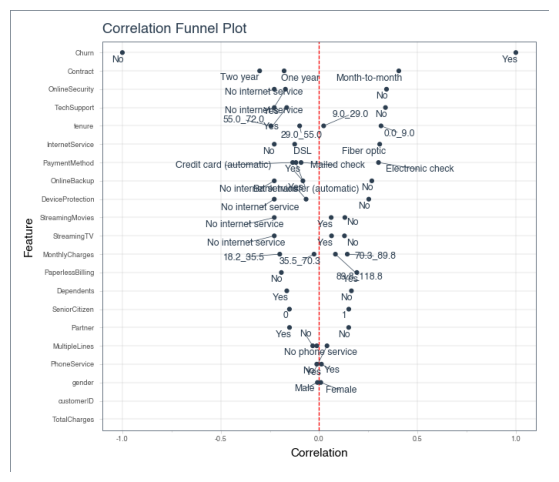

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [8]:
matplotlib_from_base64(exploratory_agent.get_artifacts()['generate_correlation_funnel']['plot_image'])

In [9]:
plotly_from_dict(exploratory_agent.get_artifacts()['generate_correlation_funnel']['plotly_figure'])

![Correlation Funnel](../img/ds_agents/correlation_funnel.jpg)

#### Example 5: Sweetviz Tool

In [4]:
exploratory_agent.invoke_agent(
    user_instructions="Generate a Sweetviz report for the dataset. Use the Churn feature as the target.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * data_raw rows: 7043
    * Tool: generate_sweetviz_report
    * Using temporary directory: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpc1p3tja9


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev_langchain_latest/lib/python3.10/site-packages/sweetviz/graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


                                             |          | [  0%]   00:00 -> (? left)

Report /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpc1p3tja9/sweetviz_report.html was generated.
    * POST-PROCESSING EDA RESULTS
    * Tool: generate_sweetviz_report


The Sweetviz EDA report has been generated with the Churn feature as the target. The report is saved as [sweetviz_report.html](sandbox:/var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpc1p3tja9/sweetviz_report.html) in a temporary directory. You can download and view it from that link.

In [6]:
exploratory_agent.get_artifacts()['generate_sweetviz_report'].keys()

dict_keys(['report_file', 'report_html'])

In [7]:
open_html_file_in_browser(exploratory_agent.get_artifacts()['generate_sweetviz_report']['report_file'])

![Sweetviz Report](../img/ds_agents/sweetviz_report.jpg)

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)